In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

C:\Users\HyunA\AppData\Local\conda\conda\envs\tutorial\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


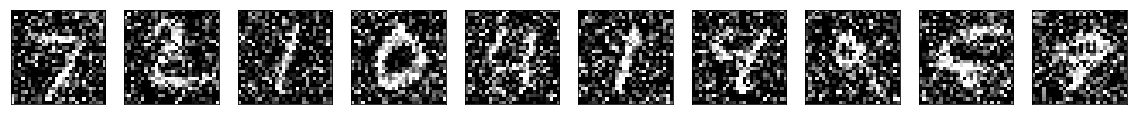

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

#noisy 이미지 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
# 모델 생성하기
from keras.layers import Input,Dense,Conv2D,MaxPool2D,UpSampling2D
from keras.models import Model


input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPool2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# encoder
encoder = Model(input_img,encoded)
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
# 아나콘다 프롬프트 열고 
# activate tutorial
# tensorboard --logdir=/tmp/denosing
# 훈련시마다 텐서보드에 콜백 로그 남기자 

from keras.callbacks import TensorBoard
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/denosing', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100


  128/60000 [..............................] - ETA: 4:44 - loss: 0.6971

  256/60000 [..............................] - ETA: 4:09 - loss: 0.6744

  384/60000 [..............................] - ETA: 3:54 - loss: 0.6504

  512/60000 [..............................] - ETA: 3:48 - loss: 0.6233

  640/60000 [..............................] - ETA: 3:43 - loss: 0.6015

  768/60000 [..............................] - ETA: 3:39 - loss: 0.5854

  896/60000 [..............................] - ETA: 3:38 - loss: 0.5721

 1024/60000 [..............................] - ETA: 3:35 - loss: 0.5608

 1152/60000 [..............................] - ETA: 3:33 - loss: 0.5509

 1280/60000 [..............................] - ETA: 3:30 - loss: 0.5427

 1408/60000 [..............................] - ETA: 3:28 - loss: 0.5353

 1536/60000 [..............................] - ETA: 3:25 - loss: 0.5289

 1664/60000 [..............................] - ETA: 3:24 - loss: 0.5245

 1792/60000 [..............................] - ETA: 3:22 - loss: 0.5213

 1920/60000 [..............................] - ETA: 3:21 - loss: 0.5170

 2048/60000 [>.............................] - ETA: 3:19 - loss: 0.5110

 2176/60000 [>.............................] - ETA: 3:18 - loss: 0.5085

 2304/60000 [>.............................] - ETA: 3:17 - loss: 0.5078

 2432/60000 [>.............................] - ETA: 3:16 - loss: 0.5025

 2560/60000 [>.............................] - ETA: 3:15 - loss: 0.4971

 2688/60000 [>.............................] - ETA: 3:15 - loss: 0.4916

 2816/60000 [>.............................] - ETA: 3:15 - loss: 0.4876

 2944/60000 [>.............................] - ETA: 3:15 - loss: 0.4873

 3072/60000 [>.............................] - ETA: 3:15 - loss: 0.4823

 3200/60000 [>.............................] - ETA: 3:14 - loss: 0.4768

 3328/60000 [>.............................] - ETA: 3:14 - loss: 0.4713

 3456/60000 [>.............................] - ETA: 3:13 - loss: 0.4655

 3584/60000 [>.............................] - ETA: 3:12 - loss: 0.4600

 3712/60000 [>.............................] - ETA: 3:12 - loss: 0.4579

 3840/60000 [>.............................] - ETA: 3:11 - loss: 0.4577

 3968/60000 [>.............................] - ETA: 3:11 - loss: 0.4582

 4096/60000 [=>............................] - ETA: 3:11 - loss: 0.4555

 4224/60000 [=>............................] - ETA: 3:11 - loss: 0.4527

 4352/60000 [=>............................] - ETA: 3:12 - loss: 0.4481

 4480/60000 [=>............................] - ETA: 3:12 - loss: 0.4450

 4608/60000 [=>............................] - ETA: 3:12 - loss: 0.4405

 4736/60000 [=>............................] - ETA: 3:11 - loss: 0.4373

 4864/60000 [=>............................] - ETA: 3:11 - loss: 0.4327

 4992/60000 [=>............................] - ETA: 3:10 - loss: 0.4284

 5120/60000 [=>............................] - ETA: 3:10 - loss: 0.4264

 5248/60000 [=>............................] - ETA: 3:09 - loss: 0.4263

 5376/60000 [=>............................] - ETA: 3:09 - loss: 0.4252

 5504/60000 [=>............................] - ETA: 3:09 - loss: 0.4228

 5632/60000 [=>............................] - ETA: 3:08 - loss: 0.4203

 5760/60000 [=>............................] - ETA: 3:08 - loss: 0.4181

 5888/60000 [=>............................] - ETA: 3:07 - loss: 0.4149

 6016/60000 [==>...........................] - ETA: 3:07 - loss: 0.4119

 6144/60000 [==>...........................] - ETA: 3:06 - loss: 0.4086

 6272/60000 [==>...........................] - ETA: 3:06 - loss: 0.4054

 6400/60000 [==>...........................] - ETA: 3:05 - loss: 0.4028

 6528/60000 [==>...........................] - ETA: 3:05 - loss: 0.4022

 6656/60000 [==>...........................] - ETA: 3:04 - loss: 0.3998

 6784/60000 [==>...........................] - ETA: 3:04 - loss: 0.3970

 6912/60000 [==>...........................] - ETA: 3:03 - loss: 0.3944

 7040/60000 [==>...........................] - ETA: 3:03 - loss: 0.3914

 7168/60000 [==>...........................] - ETA: 3:03 - loss: 0.3886

 7296/60000 [==>...........................] - ETA: 3:02 - loss: 0.3860

 7424/60000 [==>...........................] - ETA: 3:02 - loss: 0.3844

 7552/60000 [==>...........................] - ETA: 3:01 - loss: 0.3822

 7680/60000 [==>...........................] - ETA: 3:01 - loss: 0.3811

 7808/60000 [==>...........................] - ETA: 3:01 - loss: 0.3794

 7936/60000 [==>...........................] - ETA: 3:00 - loss: 0.3775

 8064/60000 [===>..........................] - ETA: 3:00 - loss: 0.3754

 8192/60000 [===>..........................] - ETA: 3:00 - loss: 0.3739

 8320/60000 [===>..........................] - ETA: 3:00 - loss: 0.3721

 8448/60000 [===>..........................] - ETA: 3:00 - loss: 0.3705

 8576/60000 [===>..........................] - ETA: 2:59 - loss: 0.3685

 8704/60000 [===>..........................] - ETA: 2:59 - loss: 0.3664

 8832/60000 [===>..........................] - ETA: 2:59 - loss: 0.3649

 8960/60000 [===>..........................] - ETA: 2:58 - loss: 0.3643

 9088/60000 [===>..........................] - ETA: 2:58 - loss: 0.3627

 9216/60000 [===>..........................] - ETA: 2:57 - loss: 0.3608

 9344/60000 [===>..........................] - ETA: 2:56 - loss: 0.3589

 9472/60000 [===>..........................] - ETA: 2:56 - loss: 0.3570

 9600/60000 [===>..........................] - ETA: 2:56 - loss: 0.3557

 9728/60000 [===>..........................] - ETA: 2:55 - loss: 0.3539

 9856/60000 [===>..........................] - ETA: 2:55 - loss: 0.3528

 9984/60000 [===>..........................] - ETA: 2:55 - loss: 0.3511

10112/60000 [====>.........................] - ETA: 2:55 - loss: 0.3499

10240/60000 [====>.........................] - ETA: 2:54 - loss: 0.3482

10368/60000 [====>.........................] - ETA: 2:54 - loss: 0.3467

10496/60000 [====>.........................] - ETA: 2:54 - loss: 0.3451

10624/60000 [====>.........................] - ETA: 2:53 - loss: 0.3439

10752/60000 [====>.........................] - ETA: 2:52 - loss: 0.3425

10880/60000 [====>.........................] - ETA: 2:52 - loss: 0.3416

11008/60000 [====>.........................] - ETA: 2:51 - loss: 0.3401

11136/60000 [====>.........................] - ETA: 2:51 - loss: 0.3387

11264/60000 [====>.........................] - ETA: 2:50 - loss: 0.3372

11392/60000 [====>.........................] - ETA: 2:50 - loss: 0.3361

11520/60000 [====>.........................] - ETA: 2:49 - loss: 0.3348

11648/60000 [====>.........................] - ETA: 2:49 - loss: 0.3337

11776/60000 [====>.........................] - ETA: 2:48 - loss: 0.3324

11904/60000 [====>.........................] - ETA: 2:48 - loss: 0.3313

12032/60000 [=====>........................] - ETA: 2:47 - loss: 0.3300

12160/60000 [=====>........................] - ETA: 2:46 - loss: 0.3287

12288/60000 [=====>........................] - ETA: 2:46 - loss: 0.3275

12416/60000 [=====>........................] - ETA: 2:46 - loss: 0.3264

12544/60000 [=====>........................] - ETA: 2:45 - loss: 0.3252

12672/60000 [=====>........................] - ETA: 2:45 - loss: 0.3241

12800/60000 [=====>........................] - ETA: 2:45 - loss: 0.3230

12928/60000 [=====>........................] - ETA: 2:44 - loss: 0.3221

13056/60000 [=====>........................] - ETA: 2:44 - loss: 0.3210

13184/60000 [=====>........................] - ETA: 2:43 - loss: 0.3200

13312/60000 [=====>........................] - ETA: 2:43 - loss: 0.3188

13440/60000 [=====>........................] - ETA: 2:42 - loss: 0.3178

13568/60000 [=====>........................] - ETA: 2:42 - loss: 0.3166

13696/60000 [=====>........................] - ETA: 2:41 - loss: 0.3155

13824/60000 [=====>........................] - ETA: 2:41 - loss: 0.3145

13952/60000 [=====>........................] - ETA: 2:41 - loss: 0.3136

14080/60000 [======>.......................] - ETA: 2:40 - loss: 0.3126

14208/60000 [======>.......................] - ETA: 2:40 - loss: 0.3117

14336/60000 [======>.......................] - ETA: 2:39 - loss: 0.3107

14464/60000 [======>.......................] - ETA: 2:39 - loss: 0.3097

14592/60000 [======>.......................] - ETA: 2:38 - loss: 0.3087

14720/60000 [======>.......................] - ETA: 2:38 - loss: 0.3076

14848/60000 [======>.......................] - ETA: 2:37 - loss: 0.3066

14976/60000 [======>.......................] - ETA: 2:37 - loss: 0.3058

15104/60000 [======>.......................] - ETA: 2:36 - loss: 0.3049

15232/60000 [======>.......................] - ETA: 2:36 - loss: 0.3040

15360/60000 [======>.......................] - ETA: 2:35 - loss: 0.3031

15488/60000 [======>.......................] - ETA: 2:35 - loss: 0.3022

15616/60000 [======>.......................] - ETA: 2:34 - loss: 0.3012

15744/60000 [======>.......................] - ETA: 2:34 - loss: 0.3003

15872/60000 [======>.......................] - ETA: 2:33 - loss: 0.2994

16000/60000 [=======>......................] - ETA: 2:33 - loss: 0.2985

16128/60000 [=======>......................] - ETA: 2:33 - loss: 0.2977

16256/60000 [=======>......................] - ETA: 2:32 - loss: 0.2969

16384/60000 [=======>......................] - ETA: 2:32 - loss: 0.2961

16512/60000 [=======>......................] - ETA: 2:31 - loss: 0.2953

16640/60000 [=======>......................] - ETA: 2:31 - loss: 0.2943

16768/60000 [=======>......................] - ETA: 2:30 - loss: 0.2935

16896/60000 [=======>......................] - ETA: 2:30 - loss: 0.2927

17024/60000 [=======>......................] - ETA: 2:29 - loss: 0.2919

17152/60000 [=======>......................] - ETA: 2:29 - loss: 0.2911

17280/60000 [=======>......................] - ETA: 2:28 - loss: 0.2904

17408/60000 [=======>......................] - ETA: 2:28 - loss: 0.2895

17536/60000 [=======>......................] - ETA: 2:28 - loss: 0.2888

17664/60000 [=======>......................] - ETA: 2:27 - loss: 0.2880

17792/60000 [=======>......................] - ETA: 2:27 - loss: 0.2873

17920/60000 [=======>......................] - ETA: 2:26 - loss: 0.2866

18048/60000 [========>.....................] - ETA: 2:26 - loss: 0.2860

18176/60000 [========>.....................] - ETA: 2:25 - loss: 0.2853

18304/60000 [========>.....................] - ETA: 2:25 - loss: 0.2846

18432/60000 [========>.....................] - ETA: 2:24 - loss: 0.2838

18560/60000 [========>.....................] - ETA: 2:24 - loss: 0.2831

18688/60000 [========>.....................] - ETA: 2:24 - loss: 0.2824

18816/60000 [========>.....................] - ETA: 2:23 - loss: 0.2817

18944/60000 [========>.....................] - ETA: 2:23 - loss: 0.2810

19072/60000 [========>.....................] - ETA: 2:22 - loss: 0.2802

19200/60000 [========>.....................] - ETA: 2:22 - loss: 0.2796

19328/60000 [========>.....................] - ETA: 2:21 - loss: 0.2789

19456/60000 [========>.....................] - ETA: 2:21 - loss: 0.2783

19584/60000 [========>.....................] - ETA: 2:20 - loss: 0.2777

19712/60000 [========>.....................] - ETA: 2:20 - loss: 0.2770

19840/60000 [========>.....................] - ETA: 2:19 - loss: 0.2764

19968/60000 [========>.....................] - ETA: 2:19 - loss: 0.2758

20096/60000 [=========>....................] - ETA: 2:18 - loss: 0.2752

20224/60000 [=========>....................] - ETA: 2:18 - loss: 0.2746

20352/60000 [=========>....................] - ETA: 2:18 - loss: 0.2739

20480/60000 [=========>....................] - ETA: 2:17 - loss: 0.2734

20608/60000 [=========>....................] - ETA: 2:17 - loss: 0.2728

20736/60000 [=========>....................] - ETA: 2:16 - loss: 0.2722

20864/60000 [=========>....................] - ETA: 2:16 - loss: 0.2716

20992/60000 [=========>....................] - ETA: 2:15 - loss: 0.2710

21120/60000 [=========>....................] - ETA: 2:15 - loss: 0.2703

21248/60000 [=========>....................] - ETA: 2:14 - loss: 0.2697

21376/60000 [=========>....................] - ETA: 2:14 - loss: 0.2691

21504/60000 [=========>....................] - ETA: 2:13 - loss: 0.2685

21632/60000 [=========>....................] - ETA: 2:13 - loss: 0.2679

21760/60000 [=========>....................] - ETA: 2:13 - loss: 0.2674

21888/60000 [=========>....................] - ETA: 2:12 - loss: 0.2670

22016/60000 [==========>...................] - ETA: 2:12 - loss: 0.2664

22144/60000 [==========>...................] - ETA: 2:11 - loss: 0.2659

22272/60000 [==========>...................] - ETA: 2:11 - loss: 0.2653

22400/60000 [==========>...................] - ETA: 2:10 - loss: 0.2647

22528/60000 [==========>...................] - ETA: 2:10 - loss: 0.2642

22656/60000 [==========>...................] - ETA: 2:09 - loss: 0.2637

22784/60000 [==========>...................] - ETA: 2:09 - loss: 0.2632

22912/60000 [==========>...................] - ETA: 2:08 - loss: 0.2627

23040/60000 [==========>...................] - ETA: 2:08 - loss: 0.2621

23168/60000 [==========>...................] - ETA: 2:08 - loss: 0.2616

23296/60000 [==========>...................] - ETA: 2:07 - loss: 0.2612

23424/60000 [==========>...................] - ETA: 2:07 - loss: 0.2607

23552/60000 [==========>...................] - ETA: 2:06 - loss: 0.2602

23680/60000 [==========>...................] - ETA: 2:06 - loss: 0.2597

23808/60000 [==========>...................] - ETA: 2:05 - loss: 0.2591

23936/60000 [==========>...................] - ETA: 2:05 - loss: 0.2586

24064/60000 [===========>..................] - ETA: 2:05 - loss: 0.2580

24192/60000 [===========>..................] - ETA: 2:04 - loss: 0.2575

24320/60000 [===========>..................] - ETA: 2:04 - loss: 0.2569

24448/60000 [===========>..................] - ETA: 2:03 - loss: 0.2564

24576/60000 [===========>..................] - ETA: 2:03 - loss: 0.2559

24704/60000 [===========>..................] - ETA: 2:02 - loss: 0.2554

24832/60000 [===========>..................] - ETA: 2:02 - loss: 0.2549

24960/60000 [===========>..................] - ETA: 2:01 - loss: 0.2545

25088/60000 [===========>..................] - ETA: 2:01 - loss: 0.2541

25216/60000 [===========>..................] - ETA: 2:01 - loss: 0.2537

25344/60000 [===========>..................] - ETA: 2:00 - loss: 0.2532

25472/60000 [===========>..................] - ETA: 2:00 - loss: 0.2528

25600/60000 [===========>..................] - ETA: 1:59 - loss: 0.2523

25728/60000 [===========>..................] - ETA: 1:59 - loss: 0.2518

25856/60000 [===========>..................] - ETA: 1:58 - loss: 0.2513

25984/60000 [===========>..................] - ETA: 1:58 - loss: 0.2508

26112/60000 [============>.................] - ETA: 1:58 - loss: 0.2503

26240/60000 [============>.................] - ETA: 1:57 - loss: 0.2499

26368/60000 [============>.................] - ETA: 1:57 - loss: 0.2494

26496/60000 [============>.................] - ETA: 1:56 - loss: 0.2490

26624/60000 [============>.................] - ETA: 1:56 - loss: 0.2486

26752/60000 [============>.................] - ETA: 1:55 - loss: 0.2483

26880/60000 [============>.................] - ETA: 1:55 - loss: 0.2479

27008/60000 [============>.................] - ETA: 1:54 - loss: 0.2475

27136/60000 [============>.................] - ETA: 1:54 - loss: 0.2470

27264/60000 [============>.................] - ETA: 1:54 - loss: 0.2466

27392/60000 [============>.................] - ETA: 1:53 - loss: 0.2461

27520/60000 [============>.................] - ETA: 1:53 - loss: 0.2457

27648/60000 [============>.................] - ETA: 1:52 - loss: 0.2453

27776/60000 [============>.................] - ETA: 1:52 - loss: 0.2449

27904/60000 [============>.................] - ETA: 1:51 - loss: 0.2444

28032/60000 [=============>................] - ETA: 1:51 - loss: 0.2440

28160/60000 [=============>................] - ETA: 1:50 - loss: 0.2436

28288/60000 [=============>................] - ETA: 1:50 - loss: 0.2432

28416/60000 [=============>................] - ETA: 1:50 - loss: 0.2428

28544/60000 [=============>................] - ETA: 1:49 - loss: 0.2424

28672/60000 [=============>................] - ETA: 1:49 - loss: 0.2420

28800/60000 [=============>................] - ETA: 1:48 - loss: 0.2416

28928/60000 [=============>................] - ETA: 1:48 - loss: 0.2412

29056/60000 [=============>................] - ETA: 1:47 - loss: 0.2408

29184/60000 [=============>................] - ETA: 1:47 - loss: 0.2405

29312/60000 [=============>................] - ETA: 1:47 - loss: 0.2401

29440/60000 [=============>................] - ETA: 1:46 - loss: 0.2397

29568/60000 [=============>................] - ETA: 1:46 - loss: 0.2394

29696/60000 [=============>................] - ETA: 1:45 - loss: 0.2390

29824/60000 [=============>................] - ETA: 1:45 - loss: 0.2386

29952/60000 [=============>................] - ETA: 1:44 - loss: 0.2382

30080/60000 [==============>...............] - ETA: 1:44 - loss: 0.2379

30208/60000 [==============>...............] - ETA: 1:43 - loss: 0.2375

30336/60000 [==============>...............] - ETA: 1:43 - loss: 0.2372

30464/60000 [==============>...............] - ETA: 1:43 - loss: 0.2368

30592/60000 [==============>...............] - ETA: 1:42 - loss: 0.2365

30720/60000 [==============>...............] - ETA: 1:42 - loss: 0.2361

30848/60000 [==============>...............] - ETA: 1:41 - loss: 0.2358

30976/60000 [==============>...............] - ETA: 1:41 - loss: 0.2355

31104/60000 [==============>...............] - ETA: 1:40 - loss: 0.2351

31232/60000 [==============>...............] - ETA: 1:40 - loss: 0.2348

31360/60000 [==============>...............] - ETA: 1:39 - loss: 0.2344

31488/60000 [==============>...............] - ETA: 1:39 - loss: 0.2340

31616/60000 [==============>...............] - ETA: 1:39 - loss: 0.2337

31744/60000 [==============>...............] - ETA: 1:38 - loss: 0.2334

31872/60000 [==============>...............] - ETA: 1:38 - loss: 0.2331

32000/60000 [===============>..............] - ETA: 1:37 - loss: 0.2327

32128/60000 [===============>..............] - ETA: 1:37 - loss: 0.2324

32256/60000 [===============>..............] - ETA: 1:37 - loss: 0.2320

32384/60000 [===============>..............] - ETA: 1:36 - loss: 0.2317

32512/60000 [===============>..............] - ETA: 1:36 - loss: 0.2314

32640/60000 [===============>..............] - ETA: 1:35 - loss: 0.2311

32768/60000 [===============>..............] - ETA: 1:35 - loss: 0.2308

32896/60000 [===============>..............] - ETA: 1:35 - loss: 0.2304

33024/60000 [===============>..............] - ETA: 1:34 - loss: 0.2301

33152/60000 [===============>..............] - ETA: 1:34 - loss: 0.2298

33280/60000 [===============>..............] - ETA: 1:34 - loss: 0.2295

33408/60000 [===============>..............] - ETA: 1:33 - loss: 0.2292

33536/60000 [===============>..............] - ETA: 1:33 - loss: 0.2288

33664/60000 [===============>..............] - ETA: 1:32 - loss: 0.2286

33792/60000 [===============>..............] - ETA: 1:32 - loss: 0.2282

33920/60000 [===============>..............] - ETA: 1:32 - loss: 0.2280

34048/60000 [================>.............] - ETA: 1:31 - loss: 0.2277

34176/60000 [================>.............] - ETA: 1:31 - loss: 0.2274

34304/60000 [================>.............] - ETA: 1:30 - loss: 0.2271

34432/60000 [================>.............] - ETA: 1:30 - loss: 0.2268

34560/60000 [================>.............] - ETA: 1:30 - loss: 0.2265

34688/60000 [================>.............] - ETA: 1:29 - loss: 0.2262

34816/60000 [================>.............] - ETA: 1:29 - loss: 0.2259

34944/60000 [================>.............] - ETA: 1:28 - loss: 0.2256

35072/60000 [================>.............] - ETA: 1:28 - loss: 0.2254

35200/60000 [================>.............] - ETA: 1:27 - loss: 0.2251

35328/60000 [================>.............] - ETA: 1:27 - loss: 0.2248

35456/60000 [================>.............] - ETA: 1:26 - loss: 0.2245

35584/60000 [================>.............] - ETA: 1:26 - loss: 0.2243

35712/60000 [================>.............] - ETA: 1:25 - loss: 0.2240

35840/60000 [================>.............] - ETA: 1:25 - loss: 0.2237

35968/60000 [================>.............] - ETA: 1:24 - loss: 0.2234

36096/60000 [=================>............] - ETA: 1:24 - loss: 0.2231

36224/60000 [=================>............] - ETA: 1:24 - loss: 0.2228

36352/60000 [=================>............] - ETA: 1:23 - loss: 0.2225

36480/60000 [=================>............] - ETA: 1:23 - loss: 0.2223

36608/60000 [=================>............] - ETA: 1:22 - loss: 0.2220

36736/60000 [=================>............] - ETA: 1:22 - loss: 0.2218

36864/60000 [=================>............] - ETA: 1:21 - loss: 0.2215

36992/60000 [=================>............] - ETA: 1:21 - loss: 0.2213

37120/60000 [=================>............] - ETA: 1:20 - loss: 0.2210

37248/60000 [=================>............] - ETA: 1:20 - loss: 0.2207

37376/60000 [=================>............] - ETA: 1:19 - loss: 0.2205

37504/60000 [=================>............] - ETA: 1:19 - loss: 0.2202

37632/60000 [=================>............] - ETA: 1:18 - loss: 0.2199

37760/60000 [=================>............] - ETA: 1:18 - loss: 0.2197

37888/60000 [=================>............] - ETA: 1:18 - loss: 0.2194

38016/60000 [==================>...........] - ETA: 1:17 - loss: 0.2191

38144/60000 [==================>...........] - ETA: 1:17 - loss: 0.2189

38272/60000 [==================>...........] - ETA: 1:16 - loss: 0.2186

38400/60000 [==================>...........] - ETA: 1:16 - loss: 0.2184

38528/60000 [==================>...........] - ETA: 1:15 - loss: 0.2181

38656/60000 [==================>...........] - ETA: 1:15 - loss: 0.2179

38784/60000 [==================>...........] - ETA: 1:14 - loss: 0.2177

38912/60000 [==================>...........] - ETA: 1:14 - loss: 0.2174

39040/60000 [==================>...........] - ETA: 1:13 - loss: 0.2172

39168/60000 [==================>...........] - ETA: 1:13 - loss: 0.2169

39296/60000 [==================>...........] - ETA: 1:12 - loss: 0.2166

39424/60000 [==================>...........] - ETA: 1:12 - loss: 0.2164

39552/60000 [==================>...........] - ETA: 1:12 - loss: 0.2162

39680/60000 [==================>...........] - ETA: 1:11 - loss: 0.2160

39808/60000 [==================>...........] - ETA: 1:11 - loss: 0.2159

39936/60000 [==================>...........] - ETA: 1:10 - loss: 0.2156

40064/60000 [===================>..........] - ETA: 1:10 - loss: 0.2154

40192/60000 [===================>..........] - ETA: 1:09 - loss: 0.2152

40320/60000 [===================>..........] - ETA: 1:09 - loss: 0.2149

40448/60000 [===================>..........] - ETA: 1:08 - loss: 0.2147

40576/60000 [===================>..........] - ETA: 1:08 - loss: 0.2144

40704/60000 [===================>..........] - ETA: 1:07 - loss: 0.2142

40832/60000 [===================>..........] - ETA: 1:07 - loss: 0.2139

40960/60000 [===================>..........] - ETA: 1:07 - loss: 0.2137

41088/60000 [===================>..........] - ETA: 1:06 - loss: 0.2135

41216/60000 [===================>..........] - ETA: 1:06 - loss: 0.2133

41344/60000 [===================>..........] - ETA: 1:05 - loss: 0.2131

41472/60000 [===================>..........] - ETA: 1:05 - loss: 0.2129

41600/60000 [===================>..........] - ETA: 1:04 - loss: 0.2126

41728/60000 [===================>..........] - ETA: 1:04 - loss: 0.2124

41856/60000 [===================>..........] - ETA: 1:03 - loss: 0.2122

41984/60000 [===================>..........] - ETA: 1:03 - loss: 0.2119

42112/60000 [====================>.........] - ETA: 1:02 - loss: 0.2117

42240/60000 [====================>.........] - ETA: 1:02 - loss: 0.2115

42368/60000 [====================>.........] - ETA: 1:02 - loss: 0.2113

42496/60000 [====================>.........] - ETA: 1:01 - loss: 0.2110

42624/60000 [====================>.........] - ETA: 1:01 - loss: 0.2108

42752/60000 [====================>.........] - ETA: 1:00 - loss: 0.2106

42880/60000 [====================>.........] - ETA: 1:00 - loss: 0.2104

43008/60000 [====================>.........] - ETA: 59s - loss: 0.2102 

43136/60000 [====================>.........] - ETA: 59s - loss: 0.2099

43264/60000 [====================>.........] - ETA: 58s - loss: 0.2097

43392/60000 [====================>.........] - ETA: 58s - loss: 0.2095

43520/60000 [====================>.........] - ETA: 57s - loss: 0.2093

43648/60000 [====================>.........] - ETA: 57s - loss: 0.2091

43776/60000 [====================>.........] - ETA: 57s - loss: 0.2089

43904/60000 [====================>.........] - ETA: 56s - loss: 0.2087

44032/60000 [=====================>........] - ETA: 56s - loss: 0.2085

44160/60000 [=====================>........] - ETA: 55s - loss: 0.2083

44288/60000 [=====================>........] - ETA: 55s - loss: 0.2080

44416/60000 [=====================>........] - ETA: 54s - loss: 0.2078

44544/60000 [=====================>........] - ETA: 54s - loss: 0.2076

44672/60000 [=====================>........] - ETA: 53s - loss: 0.2074

44800/60000 [=====================>........] - ETA: 53s - loss: 0.2072

44928/60000 [=====================>........] - ETA: 52s - loss: 0.2071

45056/60000 [=====================>........] - ETA: 52s - loss: 0.2069

45184/60000 [=====================>........] - ETA: 52s - loss: 0.2066

45312/60000 [=====================>........] - ETA: 51s - loss: 0.2064

45440/60000 [=====================>........] - ETA: 51s - loss: 0.2063

45568/60000 [=====================>........] - ETA: 50s - loss: 0.2061

45696/60000 [=====================>........] - ETA: 50s - loss: 0.2059

45824/60000 [=====================>........] - ETA: 49s - loss: 0.2057

45952/60000 [=====================>........] - ETA: 49s - loss: 0.2055

46080/60000 [======================>.......] - ETA: 48s - loss: 0.2053

46208/60000 [======================>.......] - ETA: 48s - loss: 0.2052

46336/60000 [======================>.......] - ETA: 48s - loss: 0.2050

46464/60000 [======================>.......] - ETA: 47s - loss: 0.2048

46592/60000 [======================>.......] - ETA: 47s - loss: 0.2046

46720/60000 [======================>.......] - ETA: 46s - loss: 0.2044

46848/60000 [======================>.......] - ETA: 46s - loss: 0.2042

46976/60000 [======================>.......] - ETA: 45s - loss: 0.2040

47104/60000 [======================>.......] - ETA: 45s - loss: 0.2038

47232/60000 [======================>.......] - ETA: 44s - loss: 0.2036

47360/60000 [======================>.......] - ETA: 44s - loss: 0.2035

47488/60000 [======================>.......] - ETA: 43s - loss: 0.2033

47616/60000 [======================>.......] - ETA: 43s - loss: 0.2031

47744/60000 [======================>.......] - ETA: 43s - loss: 0.2029

47872/60000 [======================>.......] - ETA: 42s - loss: 0.2028

48000/60000 [=======================>......] - ETA: 42s - loss: 0.2026

48128/60000 [=======================>......] - ETA: 41s - loss: 0.2024

48256/60000 [=======================>......] - ETA: 41s - loss: 0.2022

48384/60000 [=======================>......] - ETA: 40s - loss: 0.2021

48512/60000 [=======================>......] - ETA: 40s - loss: 0.2019

48640/60000 [=======================>......] - ETA: 39s - loss: 0.2017

48768/60000 [=======================>......] - ETA: 39s - loss: 0.2015

48896/60000 [=======================>......] - ETA: 39s - loss: 0.2014

49024/60000 [=======================>......] - ETA: 38s - loss: 0.2012

49152/60000 [=======================>......] - ETA: 38s - loss: 0.2010

49280/60000 [=======================>......] - ETA: 37s - loss: 0.2008

49408/60000 [=======================>......] - ETA: 37s - loss: 0.2006

49536/60000 [=======================>......] - ETA: 36s - loss: 0.2004

49664/60000 [=======================>......] - ETA: 36s - loss: 0.2003

49792/60000 [=======================>......] - ETA: 35s - loss: 0.2001

49920/60000 [=======================>......] - ETA: 35s - loss: 0.1999

50048/60000 [========================>.....] - ETA: 34s - loss: 0.1997

50176/60000 [========================>.....] - ETA: 34s - loss: 0.1996

50304/60000 [========================>.....] - ETA: 34s - loss: 0.1994

50432/60000 [========================>.....] - ETA: 33s - loss: 0.1992

50560/60000 [========================>.....] - ETA: 33s - loss: 0.1991

50688/60000 [========================>.....] - ETA: 32s - loss: 0.1989

50816/60000 [========================>.....] - ETA: 32s - loss: 0.1987

50944/60000 [========================>.....] - ETA: 31s - loss: 0.1986

51072/60000 [========================>.....] - ETA: 31s - loss: 0.1984

51200/60000 [========================>.....] - ETA: 30s - loss: 0.1983

51328/60000 [========================>.....] - ETA: 30s - loss: 0.1981

51456/60000 [========================>.....] - ETA: 30s - loss: 0.1980

51584/60000 [========================>.....] - ETA: 29s - loss: 0.1978

51712/60000 [========================>.....] - ETA: 29s - loss: 0.1976

51840/60000 [========================>.....] - ETA: 28s - loss: 0.1975

51968/60000 [========================>.....] - ETA: 28s - loss: 0.1973

52096/60000 [=========================>....] - ETA: 27s - loss: 0.1972

52224/60000 [=========================>....] - ETA: 27s - loss: 0.1970

52352/60000 [=========================>....] - ETA: 26s - loss: 0.1968

52480/60000 [=========================>....] - ETA: 26s - loss: 0.1967

52608/60000 [=========================>....] - ETA: 25s - loss: 0.1965

52736/60000 [=========================>....] - ETA: 25s - loss: 0.1964

52864/60000 [=========================>....] - ETA: 25s - loss: 0.1962

52992/60000 [=========================>....] - ETA: 24s - loss: 0.1961

53120/60000 [=========================>....] - ETA: 24s - loss: 0.1959

53248/60000 [=========================>....] - ETA: 23s - loss: 0.1958

53376/60000 [=========================>....] - ETA: 23s - loss: 0.1956

53504/60000 [=========================>....] - ETA: 22s - loss: 0.1955

53632/60000 [=========================>....] - ETA: 22s - loss: 0.1953

53760/60000 [=========================>....] - ETA: 21s - loss: 0.1952

53888/60000 [=========================>....] - ETA: 21s - loss: 0.1950

54016/60000 [==========================>...] - ETA: 21s - loss: 0.1949

54144/60000 [==========================>...] - ETA: 20s - loss: 0.1948

54272/60000 [==========================>...] - ETA: 20s - loss: 0.1947

54400/60000 [==========================>...] - ETA: 19s - loss: 0.1945

54528/60000 [==========================>...] - ETA: 19s - loss: 0.1943

54656/60000 [==========================>...] - ETA: 18s - loss: 0.1942

54784/60000 [==========================>...] - ETA: 18s - loss: 0.1940

54912/60000 [==========================>...] - ETA: 17s - loss: 0.1938

55040/60000 [==========================>...] - ETA: 17s - loss: 0.1937

55168/60000 [==========================>...] - ETA: 17s - loss: 0.1935

55296/60000 [==========================>...] - ETA: 16s - loss: 0.1934

55424/60000 [==========================>...] - ETA: 16s - loss: 0.1932

55552/60000 [==========================>...] - ETA: 15s - loss: 0.1931

55680/60000 [==========================>...] - ETA: 15s - loss: 0.1930

55808/60000 [==========================>...] - ETA: 14s - loss: 0.1929

55936/60000 [==========================>...] - ETA: 14s - loss: 0.1927

56064/60000 [===========================>..] - ETA: 13s - loss: 0.1926

56192/60000 [===========================>..] - ETA: 13s - loss: 0.1925

56320/60000 [===========================>..] - ETA: 12s - loss: 0.1923

56448/60000 [===========================>..] - ETA: 12s - loss: 0.1922

56576/60000 [===========================>..] - ETA: 12s - loss: 0.1920

56704/60000 [===========================>..] - ETA: 11s - loss: 0.1919

56832/60000 [===========================>..] - ETA: 11s - loss: 0.1918

56960/60000 [===========================>..] - ETA: 10s - loss: 0.1916

57088/60000 [===========================>..] - ETA: 10s - loss: 0.1915

57216/60000 [===========================>..] - ETA: 9s - loss: 0.1914 

57344/60000 [===========================>..] - ETA: 9s - loss: 0.1912

57472/60000 [===========================>..] - ETA: 8s - loss: 0.1911

57600/60000 [===========================>..] - ETA: 8s - loss: 0.1910

57728/60000 [===========================>..] - ETA: 7s - loss: 0.1908

57856/60000 [===========================>..] - ETA: 7s - loss: 0.1907

57984/60000 [===========================>..] - ETA: 7s - loss: 0.1905

58112/60000 [============================>.] - ETA: 6s - loss: 0.1904

58240/60000 [============================>.] - ETA: 6s - loss: 0.1903

58368/60000 [============================>.] - ETA: 5s - loss: 0.1902

58496/60000 [============================>.] - ETA: 5s - loss: 0.1900

58624/60000 [============================>.] - ETA: 4s - loss: 0.1899

58752/60000 [============================>.] - ETA: 4s - loss: 0.1897

58880/60000 [============================>.] - ETA: 3s - loss: 0.1896

59008/60000 [============================>.] - ETA: 3s - loss: 0.1895

59136/60000 [============================>.] - ETA: 3s - loss: 0.1894

59264/60000 [============================>.] - ETA: 2s - loss: 0.1892

59392/60000 [============================>.] - ETA: 2s - loss: 0.1891

59520/60000 [============================>.] - ETA: 1s - loss: 0.1890

59648/60000 [============================>.] - ETA: 1s - loss: 0.1889

59776/60000 [============================>.] - ETA: 0s - loss: 0.1887

59904/60000 [============================>.] - ETA: 0s - loss: 0.1886

60000/60000 [==============================] - 221s 4ms/step - loss: 0.1885 - val_loss: 0.1262


Epoch 2/100


  128/60000 [..............................] - ETA: 3:14 - loss: 0.1285

  256/60000 [..............................] - ETA: 3:11 - loss: 0.1302

  384/60000 [..............................] - ETA: 3:10 - loss: 0.1331

  512/60000 [..............................] - ETA: 3:11 - loss: 0.1349

  640/60000 [..............................] - ETA: 3:10 - loss: 0.1354

  768/60000 [..............................] - ETA: 3:10 - loss: 0.1334

  896/60000 [..............................] - ETA: 3:09 - loss: 0.1327

 1024/60000 [..............................] - ETA: 3:08 - loss: 0.1320

 1152/60000 [..............................] - ETA: 3:08 - loss: 0.1314

 1280/60000 [..............................] - ETA: 3:08 - loss: 0.1316

 1408/60000 [..............................] - ETA: 3:07 - loss: 0.1315

 1536/60000 [..............................] - ETA: 3:07 - loss: 0.1316

 1664/60000 [..............................] - ETA: 3:07 - loss: 0.1312

 1792/60000 [..............................] - ETA: 3:06 - loss: 0.1313

 1920/60000 [..............................] - ETA: 3:06 - loss: 0.1314

 2048/60000 [>.............................] - ETA: 3:06 - loss: 0.1312

 2176/60000 [>.............................] - ETA: 3:05 - loss: 0.1306

 2304/60000 [>.............................] - ETA: 3:04 - loss: 0.1305

 2432/60000 [>.............................] - ETA: 3:04 - loss: 0.1304

 2560/60000 [>.............................] - ETA: 3:04 - loss: 0.1301

 2688/60000 [>.............................] - ETA: 3:03 - loss: 0.1303

 2816/60000 [>.............................] - ETA: 3:03 - loss: 0.1301

 2944/60000 [>.............................] - ETA: 3:02 - loss: 0.1302

 3072/60000 [>.............................] - ETA: 3:02 - loss: 0.1300

 3200/60000 [>.............................] - ETA: 3:02 - loss: 0.1301

 3328/60000 [>.............................] - ETA: 3:01 - loss: 0.1302

 3456/60000 [>.............................] - ETA: 3:01 - loss: 0.1302

 3584/60000 [>.............................] - ETA: 3:00 - loss: 0.1300

 3712/60000 [>.............................] - ETA: 3:00 - loss: 0.1297

 3840/60000 [>.............................] - ETA: 2:59 - loss: 0.1297

 3968/60000 [>.............................] - ETA: 2:59 - loss: 0.1296

 4096/60000 [=>............................] - ETA: 2:59 - loss: 0.1295

 4224/60000 [=>............................] - ETA: 2:58 - loss: 0.1293

 4352/60000 [=>............................] - ETA: 2:58 - loss: 0.1292

 4480/60000 [=>............................] - ETA: 2:57 - loss: 0.1290

 4608/60000 [=>............................] - ETA: 2:57 - loss: 0.1290

 4736/60000 [=>............................] - ETA: 2:57 - loss: 0.1290

 4864/60000 [=>............................] - ETA: 2:57 - loss: 0.1290

 4992/60000 [=>............................] - ETA: 2:57 - loss: 0.1289

 5120/60000 [=>............................] - ETA: 2:57 - loss: 0.1289

 5248/60000 [=>............................] - ETA: 2:56 - loss: 0.1289

 5376/60000 [=>............................] - ETA: 2:56 - loss: 0.1288

 5504/60000 [=>............................] - ETA: 2:56 - loss: 0.1288

 5632/60000 [=>............................] - ETA: 2:56 - loss: 0.1287

 5760/60000 [=>............................] - ETA: 2:55 - loss: 0.1287

 5888/60000 [=>............................] - ETA: 2:55 - loss: 0.1287

 6016/60000 [==>...........................] - ETA: 2:55 - loss: 0.1287

 6144/60000 [==>...........................] - ETA: 2:56 - loss: 0.1287

 6272/60000 [==>...........................] - ETA: 2:56 - loss: 0.1286

 6400/60000 [==>...........................] - ETA: 2:56 - loss: 0.1285

 6528/60000 [==>...........................] - ETA: 2:55 - loss: 0.1284

 6656/60000 [==>...........................] - ETA: 2:55 - loss: 0.1285

 6784/60000 [==>...........................] - ETA: 2:55 - loss: 0.1285

 6912/60000 [==>...........................] - ETA: 2:54 - loss: 0.1286

 7040/60000 [==>...........................] - ETA: 2:54 - loss: 0.1285

 7168/60000 [==>...........................] - ETA: 2:53 - loss: 0.1283

 7296/60000 [==>...........................] - ETA: 2:53 - loss: 0.1282

 7424/60000 [==>...........................] - ETA: 2:53 - loss: 0.1281

 7552/60000 [==>...........................] - ETA: 2:53 - loss: 0.1280

 7680/60000 [==>...........................] - ETA: 2:52 - loss: 0.1279

 7808/60000 [==>...........................] - ETA: 2:52 - loss: 0.1278

 7936/60000 [==>...........................] - ETA: 2:51 - loss: 0.1277

 8064/60000 [===>..........................] - ETA: 2:51 - loss: 0.1277

 8192/60000 [===>..........................] - ETA: 2:51 - loss: 0.1277

 8320/60000 [===>..........................] - ETA: 2:50 - loss: 0.1278

 8448/60000 [===>..........................] - ETA: 2:50 - loss: 0.1278

 8576/60000 [===>..........................] - ETA: 2:49 - loss: 0.1278

 8704/60000 [===>..........................] - ETA: 2:49 - loss: 0.1278

 8832/60000 [===>..........................] - ETA: 2:49 - loss: 0.1278

 8960/60000 [===>..........................] - ETA: 2:49 - loss: 0.1278

 9088/60000 [===>..........................] - ETA: 2:49 - loss: 0.1277

 9216/60000 [===>..........................] - ETA: 2:48 - loss: 0.1277

 9344/60000 [===>..........................] - ETA: 2:48 - loss: 0.1277

 9472/60000 [===>..........................] - ETA: 2:48 - loss: 0.1276

 9600/60000 [===>..........................] - ETA: 2:47 - loss: 0.1276

 9728/60000 [===>..........................] - ETA: 2:47 - loss: 0.1274

 9856/60000 [===>..........................] - ETA: 2:46 - loss: 0.1273

 9984/60000 [===>..........................] - ETA: 2:46 - loss: 0.1272

10112/60000 [====>.........................] - ETA: 2:46 - loss: 0.1272

10240/60000 [====>.........................] - ETA: 2:45 - loss: 0.1272

10368/60000 [====>.........................] - ETA: 2:45 - loss: 0.1272

10496/60000 [====>.........................] - ETA: 2:44 - loss: 0.1272

10624/60000 [====>.........................] - ETA: 2:44 - loss: 0.1272

10752/60000 [====>.........................] - ETA: 2:43 - loss: 0.1272

10880/60000 [====>.........................] - ETA: 2:43 - loss: 0.1271

11008/60000 [====>.........................] - ETA: 2:42 - loss: 0.1271

11136/60000 [====>.........................] - ETA: 2:42 - loss: 0.1270

11264/60000 [====>.........................] - ETA: 2:41 - loss: 0.1269

11392/60000 [====>.........................] - ETA: 2:41 - loss: 0.1269

11520/60000 [====>.........................] - ETA: 2:40 - loss: 0.1269

11648/60000 [====>.........................] - ETA: 2:40 - loss: 0.1268

11776/60000 [====>.........................] - ETA: 2:40 - loss: 0.1269

11904/60000 [====>.........................] - ETA: 2:39 - loss: 0.1269

12032/60000 [=====>........................] - ETA: 2:39 - loss: 0.1268

12160/60000 [=====>........................] - ETA: 2:39 - loss: 0.1267

12288/60000 [=====>........................] - ETA: 2:38 - loss: 0.1267

12416/60000 [=====>........................] - ETA: 2:38 - loss: 0.1267

12544/60000 [=====>........................] - ETA: 2:37 - loss: 0.1267

12672/60000 [=====>........................] - ETA: 2:37 - loss: 0.1267

12800/60000 [=====>........................] - ETA: 2:37 - loss: 0.1266

12928/60000 [=====>........................] - ETA: 2:36 - loss: 0.1266

13056/60000 [=====>........................] - ETA: 2:36 - loss: 0.1266

13184/60000 [=====>........................] - ETA: 2:35 - loss: 0.1266

13312/60000 [=====>........................] - ETA: 2:35 - loss: 0.1266

13440/60000 [=====>........................] - ETA: 2:34 - loss: 0.1266

13568/60000 [=====>........................] - ETA: 2:34 - loss: 0.1266

13696/60000 [=====>........................] - ETA: 2:34 - loss: 0.1265

13824/60000 [=====>........................] - ETA: 2:33 - loss: 0.1265

13952/60000 [=====>........................] - ETA: 2:33 - loss: 0.1265

14080/60000 [======>.......................] - ETA: 2:33 - loss: 0.1265

14208/60000 [======>.......................] - ETA: 2:32 - loss: 0.1264

14336/60000 [======>.......................] - ETA: 2:32 - loss: 0.1264

14464/60000 [======>.......................] - ETA: 2:32 - loss: 0.1263

14592/60000 [======>.......................] - ETA: 2:31 - loss: 0.1263

14720/60000 [======>.......................] - ETA: 2:31 - loss: 0.1263

14848/60000 [======>.......................] - ETA: 2:30 - loss: 0.1263

14976/60000 [======>.......................] - ETA: 2:30 - loss: 0.1264

15104/60000 [======>.......................] - ETA: 2:30 - loss: 0.1264

15232/60000 [======>.......................] - ETA: 2:29 - loss: 0.1263

15360/60000 [======>.......................] - ETA: 2:29 - loss: 0.1263

15488/60000 [======>.......................] - ETA: 2:29 - loss: 0.1263

15616/60000 [======>.......................] - ETA: 2:29 - loss: 0.1262

15744/60000 [======>.......................] - ETA: 2:29 - loss: 0.1262

15872/60000 [======>.......................] - ETA: 2:28 - loss: 0.1262

16000/60000 [=======>......................] - ETA: 2:28 - loss: 0.1262

16128/60000 [=======>......................] - ETA: 2:28 - loss: 0.1262

16256/60000 [=======>......................] - ETA: 2:27 - loss: 0.1262

16384/60000 [=======>......................] - ETA: 2:27 - loss: 0.1262

16512/60000 [=======>......................] - ETA: 2:26 - loss: 0.1262

16640/60000 [=======>......................] - ETA: 2:26 - loss: 0.1261

16768/60000 [=======>......................] - ETA: 2:25 - loss: 0.1261

16896/60000 [=======>......................] - ETA: 2:25 - loss: 0.1261

17024/60000 [=======>......................] - ETA: 2:24 - loss: 0.1261

17152/60000 [=======>......................] - ETA: 2:24 - loss: 0.1261

17280/60000 [=======>......................] - ETA: 2:23 - loss: 0.1261

17408/60000 [=======>......................] - ETA: 2:23 - loss: 0.1261

17536/60000 [=======>......................] - ETA: 2:22 - loss: 0.1261

17664/60000 [=======>......................] - ETA: 2:22 - loss: 0.1261

17792/60000 [=======>......................] - ETA: 2:21 - loss: 0.1261

17920/60000 [=======>......................] - ETA: 2:21 - loss: 0.1260

18048/60000 [========>.....................] - ETA: 2:20 - loss: 0.1260

18176/60000 [========>.....................] - ETA: 2:20 - loss: 0.1260

18304/60000 [========>.....................] - ETA: 2:19 - loss: 0.1259

18432/60000 [========>.....................] - ETA: 2:19 - loss: 0.1259

18560/60000 [========>.....................] - ETA: 2:19 - loss: 0.1258

18688/60000 [========>.....................] - ETA: 2:18 - loss: 0.1257

18816/60000 [========>.....................] - ETA: 2:18 - loss: 0.1257

18944/60000 [========>.....................] - ETA: 2:17 - loss: 0.1257

19072/60000 [========>.....................] - ETA: 2:17 - loss: 0.1258

19200/60000 [========>.....................] - ETA: 2:16 - loss: 0.1258

19328/60000 [========>.....................] - ETA: 2:16 - loss: 0.1257

19456/60000 [========>.....................] - ETA: 2:16 - loss: 0.1257

19584/60000 [========>.....................] - ETA: 2:15 - loss: 0.1257

19712/60000 [========>.....................] - ETA: 2:15 - loss: 0.1257

19840/60000 [========>.....................] - ETA: 2:14 - loss: 0.1257

19968/60000 [========>.....................] - ETA: 2:14 - loss: 0.1256

20096/60000 [=========>....................] - ETA: 2:13 - loss: 0.1256

20224/60000 [=========>....................] - ETA: 2:13 - loss: 0.1256

20352/60000 [=========>....................] - ETA: 2:13 - loss: 0.1256

20480/60000 [=========>....................] - ETA: 2:12 - loss: 0.1256

20608/60000 [=========>....................] - ETA: 2:12 - loss: 0.1256

20736/60000 [=========>....................] - ETA: 2:11 - loss: 0.1256

20864/60000 [=========>....................] - ETA: 2:11 - loss: 0.1255

20992/60000 [=========>....................] - ETA: 2:11 - loss: 0.1254

21120/60000 [=========>....................] - ETA: 2:10 - loss: 0.1254

21248/60000 [=========>....................] - ETA: 2:10 - loss: 0.1254

21376/60000 [=========>....................] - ETA: 2:09 - loss: 0.1254

21504/60000 [=========>....................] - ETA: 2:09 - loss: 0.1253

21632/60000 [=========>....................] - ETA: 2:08 - loss: 0.1253

21760/60000 [=========>....................] - ETA: 2:08 - loss: 0.1253

21888/60000 [=========>....................] - ETA: 2:07 - loss: 0.1253

22016/60000 [==========>...................] - ETA: 2:07 - loss: 0.1253

22144/60000 [==========>...................] - ETA: 2:06 - loss: 0.1254

22272/60000 [==========>...................] - ETA: 2:06 - loss: 0.1254

22400/60000 [==========>...................] - ETA: 2:06 - loss: 0.1254

22528/60000 [==========>...................] - ETA: 2:05 - loss: 0.1254

22656/60000 [==========>...................] - ETA: 2:05 - loss: 0.1253

22784/60000 [==========>...................] - ETA: 2:04 - loss: 0.1253

22912/60000 [==========>...................] - ETA: 2:04 - loss: 0.1252

23040/60000 [==========>...................] - ETA: 2:03 - loss: 0.1252

23168/60000 [==========>...................] - ETA: 2:03 - loss: 0.1251

23296/60000 [==========>...................] - ETA: 2:03 - loss: 0.1251

23424/60000 [==========>...................] - ETA: 2:02 - loss: 0.1251

23552/60000 [==========>...................] - ETA: 2:02 - loss: 0.1251

23680/60000 [==========>...................] - ETA: 2:01 - loss: 0.1250

23808/60000 [==========>...................] - ETA: 2:01 - loss: 0.1251

23936/60000 [==========>...................] - ETA: 2:00 - loss: 0.1251

24064/60000 [===========>..................] - ETA: 2:00 - loss: 0.1251

24192/60000 [===========>..................] - ETA: 1:59 - loss: 0.1251

24320/60000 [===========>..................] - ETA: 1:59 - loss: 0.1251

24448/60000 [===========>..................] - ETA: 1:58 - loss: 0.1250

24576/60000 [===========>..................] - ETA: 1:58 - loss: 0.1250

24704/60000 [===========>..................] - ETA: 1:58 - loss: 0.1250

24832/60000 [===========>..................] - ETA: 1:57 - loss: 0.1249

24960/60000 [===========>..................] - ETA: 1:57 - loss: 0.1249

25088/60000 [===========>..................] - ETA: 1:56 - loss: 0.1249

25216/60000 [===========>..................] - ETA: 1:56 - loss: 0.1249

25344/60000 [===========>..................] - ETA: 1:55 - loss: 0.1249

25472/60000 [===========>..................] - ETA: 1:55 - loss: 0.1249

25600/60000 [===========>..................] - ETA: 1:54 - loss: 0.1249

25728/60000 [===========>..................] - ETA: 1:54 - loss: 0.1249

25856/60000 [===========>..................] - ETA: 1:54 - loss: 0.1249

25984/60000 [===========>..................] - ETA: 1:53 - loss: 0.1249

26112/60000 [============>.................] - ETA: 1:53 - loss: 0.1248

26240/60000 [============>.................] - ETA: 1:52 - loss: 0.1248

26368/60000 [============>.................] - ETA: 1:52 - loss: 0.1247

26496/60000 [============>.................] - ETA: 1:51 - loss: 0.1247

26624/60000 [============>.................] - ETA: 1:51 - loss: 0.1247

26752/60000 [============>.................] - ETA: 1:50 - loss: 0.1247

26880/60000 [============>.................] - ETA: 1:50 - loss: 0.1246

27008/60000 [============>.................] - ETA: 1:50 - loss: 0.1246

27136/60000 [============>.................] - ETA: 1:49 - loss: 0.1246

27264/60000 [============>.................] - ETA: 1:49 - loss: 0.1246

27392/60000 [============>.................] - ETA: 1:48 - loss: 0.1246

27520/60000 [============>.................] - ETA: 1:48 - loss: 0.1246

27648/60000 [============>.................] - ETA: 1:47 - loss: 0.1245

27776/60000 [============>.................] - ETA: 1:47 - loss: 0.1245

27904/60000 [============>.................] - ETA: 1:46 - loss: 0.1245

28032/60000 [=============>................] - ETA: 1:46 - loss: 0.1245

28160/60000 [=============>................] - ETA: 1:46 - loss: 0.1245

28288/60000 [=============>................] - ETA: 1:45 - loss: 0.1244

28416/60000 [=============>................] - ETA: 1:45 - loss: 0.1244

28544/60000 [=============>................] - ETA: 1:44 - loss: 0.1244

28672/60000 [=============>................] - ETA: 1:44 - loss: 0.1244

28800/60000 [=============>................] - ETA: 1:43 - loss: 0.1244

28928/60000 [=============>................] - ETA: 1:43 - loss: 0.1243

29056/60000 [=============>................] - ETA: 1:42 - loss: 0.1244

29184/60000 [=============>................] - ETA: 1:42 - loss: 0.1243

29312/60000 [=============>................] - ETA: 1:42 - loss: 0.1243

29440/60000 [=============>................] - ETA: 1:41 - loss: 0.1243

29568/60000 [=============>................] - ETA: 1:41 - loss: 0.1243

29696/60000 [=============>................] - ETA: 1:40 - loss: 0.1243

29824/60000 [=============>................] - ETA: 1:40 - loss: 0.1243

29952/60000 [=============>................] - ETA: 1:39 - loss: 0.1243

30080/60000 [==============>...............] - ETA: 1:39 - loss: 0.1243

30208/60000 [==============>...............] - ETA: 1:38 - loss: 0.1243

30336/60000 [==============>...............] - ETA: 1:38 - loss: 0.1243

30464/60000 [==============>...............] - ETA: 1:38 - loss: 0.1242

30592/60000 [==============>...............] - ETA: 1:37 - loss: 0.1242

30720/60000 [==============>...............] - ETA: 1:37 - loss: 0.1242

30848/60000 [==============>...............] - ETA: 1:36 - loss: 0.1242

30976/60000 [==============>...............] - ETA: 1:36 - loss: 0.1241

31104/60000 [==============>...............] - ETA: 1:35 - loss: 0.1241

31232/60000 [==============>...............] - ETA: 1:35 - loss: 0.1241

31360/60000 [==============>...............] - ETA: 1:34 - loss: 0.1241

31488/60000 [==============>...............] - ETA: 1:34 - loss: 0.1241

31616/60000 [==============>...............] - ETA: 1:34 - loss: 0.1241

31744/60000 [==============>...............] - ETA: 1:33 - loss: 0.1240

31872/60000 [==============>...............] - ETA: 1:33 - loss: 0.1240

32000/60000 [===============>..............] - ETA: 1:32 - loss: 0.1240

32128/60000 [===============>..............] - ETA: 1:32 - loss: 0.1239

32256/60000 [===============>..............] - ETA: 1:31 - loss: 0.1239

32384/60000 [===============>..............] - ETA: 1:31 - loss: 0.1239

32512/60000 [===============>..............] - ETA: 1:31 - loss: 0.1238

32640/60000 [===============>..............] - ETA: 1:30 - loss: 0.1238

32768/60000 [===============>..............] - ETA: 1:30 - loss: 0.1238

32896/60000 [===============>..............] - ETA: 1:29 - loss: 0.1238

33024/60000 [===============>..............] - ETA: 1:29 - loss: 0.1238

33152/60000 [===============>..............] - ETA: 1:28 - loss: 0.1238

33280/60000 [===============>..............] - ETA: 1:28 - loss: 0.1238

33408/60000 [===============>..............] - ETA: 1:27 - loss: 0.1238

33536/60000 [===============>..............] - ETA: 1:27 - loss: 0.1237

33664/60000 [===============>..............] - ETA: 1:27 - loss: 0.1237

33792/60000 [===============>..............] - ETA: 1:26 - loss: 0.1237

33920/60000 [===============>..............] - ETA: 1:26 - loss: 0.1237

34048/60000 [================>.............] - ETA: 1:25 - loss: 0.1237

34176/60000 [================>.............] - ETA: 1:25 - loss: 0.1237

34304/60000 [================>.............] - ETA: 1:24 - loss: 0.1237

34432/60000 [================>.............] - ETA: 1:24 - loss: 0.1236

34560/60000 [================>.............] - ETA: 1:24 - loss: 0.1236

34688/60000 [================>.............] - ETA: 1:23 - loss: 0.1236

34816/60000 [================>.............] - ETA: 1:23 - loss: 0.1236

34944/60000 [================>.............] - ETA: 1:22 - loss: 0.1235

35072/60000 [================>.............] - ETA: 1:22 - loss: 0.1235

35200/60000 [================>.............] - ETA: 1:21 - loss: 0.1235

35328/60000 [================>.............] - ETA: 1:21 - loss: 0.1235

35456/60000 [================>.............] - ETA: 1:20 - loss: 0.1235

35584/60000 [================>.............] - ETA: 1:20 - loss: 0.1235

35712/60000 [================>.............] - ETA: 1:20 - loss: 0.1235

35840/60000 [================>.............] - ETA: 1:19 - loss: 0.1235

35968/60000 [================>.............] - ETA: 1:19 - loss: 0.1235

36096/60000 [=================>............] - ETA: 1:18 - loss: 0.1235

36224/60000 [=================>............] - ETA: 1:18 - loss: 0.1235

36352/60000 [=================>............] - ETA: 1:17 - loss: 0.1235

36480/60000 [=================>............] - ETA: 1:17 - loss: 0.1234

36608/60000 [=================>............] - ETA: 1:17 - loss: 0.1234

36736/60000 [=================>............] - ETA: 1:16 - loss: 0.1234

36864/60000 [=================>............] - ETA: 1:16 - loss: 0.1234

36992/60000 [=================>............] - ETA: 1:15 - loss: 0.1233

37120/60000 [=================>............] - ETA: 1:15 - loss: 0.1233

37248/60000 [=================>............] - ETA: 1:15 - loss: 0.1233

37376/60000 [=================>............] - ETA: 1:14 - loss: 0.1233

37504/60000 [=================>............] - ETA: 1:14 - loss: 0.1233

37632/60000 [=================>............] - ETA: 1:13 - loss: 0.1232

37760/60000 [=================>............] - ETA: 1:13 - loss: 0.1232

37888/60000 [=================>............] - ETA: 1:12 - loss: 0.1232

38016/60000 [==================>...........] - ETA: 1:12 - loss: 0.1233

38144/60000 [==================>...........] - ETA: 1:12 - loss: 0.1232

38272/60000 [==================>...........] - ETA: 1:11 - loss: 0.1232

38400/60000 [==================>...........] - ETA: 1:11 - loss: 0.1232

38528/60000 [==================>...........] - ETA: 1:10 - loss: 0.1232

38656/60000 [==================>...........] - ETA: 1:10 - loss: 0.1232

38784/60000 [==================>...........] - ETA: 1:09 - loss: 0.1232

38912/60000 [==================>...........] - ETA: 1:09 - loss: 0.1232

39040/60000 [==================>...........] - ETA: 1:09 - loss: 0.1231

39168/60000 [==================>...........] - ETA: 1:08 - loss: 0.1231

39296/60000 [==================>...........] - ETA: 1:08 - loss: 0.1231

39424/60000 [==================>...........] - ETA: 1:07 - loss: 0.1231

39552/60000 [==================>...........] - ETA: 1:07 - loss: 0.1231

39680/60000 [==================>...........] - ETA: 1:06 - loss: 0.1230

39808/60000 [==================>...........] - ETA: 1:06 - loss: 0.1230

39936/60000 [==================>...........] - ETA: 1:06 - loss: 0.1230

40064/60000 [===================>..........] - ETA: 1:05 - loss: 0.1230

40192/60000 [===================>..........] - ETA: 1:05 - loss: 0.1230

40320/60000 [===================>..........] - ETA: 1:04 - loss: 0.1230

40448/60000 [===================>..........] - ETA: 1:04 - loss: 0.1230

40576/60000 [===================>..........] - ETA: 1:03 - loss: 0.1230

40704/60000 [===================>..........] - ETA: 1:03 - loss: 0.1230

40832/60000 [===================>..........] - ETA: 1:03 - loss: 0.1230

40960/60000 [===================>..........] - ETA: 1:02 - loss: 0.1230

41088/60000 [===================>..........] - ETA: 1:02 - loss: 0.1230

41216/60000 [===================>..........] - ETA: 1:01 - loss: 0.1229

41344/60000 [===================>..........] - ETA: 1:01 - loss: 0.1229

41472/60000 [===================>..........] - ETA: 1:00 - loss: 0.1229

41600/60000 [===================>..........] - ETA: 1:00 - loss: 0.1229

41728/60000 [===================>..........] - ETA: 1:00 - loss: 0.1229

41856/60000 [===================>..........] - ETA: 59s - loss: 0.1229 

41984/60000 [===================>..........] - ETA: 59s - loss: 0.1229

42112/60000 [====================>.........] - ETA: 58s - loss: 0.1229

42240/60000 [====================>.........] - ETA: 58s - loss: 0.1229

42368/60000 [====================>.........] - ETA: 58s - loss: 0.1229

42496/60000 [====================>.........] - ETA: 57s - loss: 0.1228

42624/60000 [====================>.........] - ETA: 57s - loss: 0.1228

42752/60000 [====================>.........] - ETA: 56s - loss: 0.1228

42880/60000 [====================>.........] - ETA: 56s - loss: 0.1228

43008/60000 [====================>.........] - ETA: 55s - loss: 0.1228

43136/60000 [====================>.........] - ETA: 55s - loss: 0.1228

43264/60000 [====================>.........] - ETA: 55s - loss: 0.1228

43392/60000 [====================>.........] - ETA: 54s - loss: 0.1228

43520/60000 [====================>.........] - ETA: 54s - loss: 0.1227

43648/60000 [====================>.........] - ETA: 53s - loss: 0.1227

43776/60000 [====================>.........] - ETA: 53s - loss: 0.1227

43904/60000 [====================>.........] - ETA: 52s - loss: 0.1227

44032/60000 [=====================>........] - ETA: 52s - loss: 0.1227

44160/60000 [=====================>........] - ETA: 52s - loss: 0.1227

44288/60000 [=====================>........] - ETA: 51s - loss: 0.1227

44416/60000 [=====================>........] - ETA: 51s - loss: 0.1227

44544/60000 [=====================>........] - ETA: 50s - loss: 0.1226

44672/60000 [=====================>........] - ETA: 50s - loss: 0.1226

44800/60000 [=====================>........] - ETA: 49s - loss: 0.1226

44928/60000 [=====================>........] - ETA: 49s - loss: 0.1226

45056/60000 [=====================>........] - ETA: 49s - loss: 0.1226

45184/60000 [=====================>........] - ETA: 48s - loss: 0.1226

45312/60000 [=====================>........] - ETA: 48s - loss: 0.1226

45440/60000 [=====================>........] - ETA: 47s - loss: 0.1226

45568/60000 [=====================>........] - ETA: 47s - loss: 0.1226

45696/60000 [=====================>........] - ETA: 46s - loss: 0.1226

45824/60000 [=====================>........] - ETA: 46s - loss: 0.1226

45952/60000 [=====================>........] - ETA: 46s - loss: 0.1225

46080/60000 [======================>.......] - ETA: 45s - loss: 0.1225

46208/60000 [======================>.......] - ETA: 45s - loss: 0.1225

46336/60000 [======================>.......] - ETA: 44s - loss: 0.1225

46464/60000 [======================>.......] - ETA: 44s - loss: 0.1225

46592/60000 [======================>.......] - ETA: 43s - loss: 0.1225

46720/60000 [======================>.......] - ETA: 43s - loss: 0.1225

46848/60000 [======================>.......] - ETA: 43s - loss: 0.1225

46976/60000 [======================>.......] - ETA: 42s - loss: 0.1225

47104/60000 [======================>.......] - ETA: 42s - loss: 0.1224

47232/60000 [======================>.......] - ETA: 41s - loss: 0.1224

47360/60000 [======================>.......] - ETA: 41s - loss: 0.1224

47488/60000 [======================>.......] - ETA: 41s - loss: 0.1224

47616/60000 [======================>.......] - ETA: 40s - loss: 0.1224

47744/60000 [======================>.......] - ETA: 40s - loss: 0.1224

47872/60000 [======================>.......] - ETA: 39s - loss: 0.1223

48000/60000 [=======================>......] - ETA: 39s - loss: 0.1223

48128/60000 [=======================>......] - ETA: 38s - loss: 0.1223

48256/60000 [=======================>......] - ETA: 38s - loss: 0.1223

48384/60000 [=======================>......] - ETA: 38s - loss: 0.1223

48512/60000 [=======================>......] - ETA: 37s - loss: 0.1223

48640/60000 [=======================>......] - ETA: 37s - loss: 0.1223

48768/60000 [=======================>......] - ETA: 36s - loss: 0.1222

48896/60000 [=======================>......] - ETA: 36s - loss: 0.1222

49024/60000 [=======================>......] - ETA: 36s - loss: 0.1222

49152/60000 [=======================>......] - ETA: 35s - loss: 0.1222

49280/60000 [=======================>......] - ETA: 35s - loss: 0.1222

49408/60000 [=======================>......] - ETA: 34s - loss: 0.1222

49536/60000 [=======================>......] - ETA: 34s - loss: 0.1222

49664/60000 [=======================>......] - ETA: 33s - loss: 0.1221

49792/60000 [=======================>......] - ETA: 33s - loss: 0.1221

49920/60000 [=======================>......] - ETA: 33s - loss: 0.1221

50048/60000 [========================>.....] - ETA: 32s - loss: 0.1221

50176/60000 [========================>.....] - ETA: 32s - loss: 0.1221

50304/60000 [========================>.....] - ETA: 31s - loss: 0.1221

50432/60000 [========================>.....] - ETA: 31s - loss: 0.1221

50560/60000 [========================>.....] - ETA: 30s - loss: 0.1221

50688/60000 [========================>.....] - ETA: 30s - loss: 0.1221

50816/60000 [========================>.....] - ETA: 30s - loss: 0.1220

50944/60000 [========================>.....] - ETA: 29s - loss: 0.1220

51072/60000 [========================>.....] - ETA: 29s - loss: 0.1220

51200/60000 [========================>.....] - ETA: 28s - loss: 0.1220

51328/60000 [========================>.....] - ETA: 28s - loss: 0.1220

51456/60000 [========================>.....] - ETA: 27s - loss: 0.1220

51584/60000 [========================>.....] - ETA: 27s - loss: 0.1220

51712/60000 [========================>.....] - ETA: 27s - loss: 0.1219

51840/60000 [========================>.....] - ETA: 26s - loss: 0.1219

51968/60000 [========================>.....] - ETA: 26s - loss: 0.1219

52096/60000 [=========================>....] - ETA: 25s - loss: 0.1219

52224/60000 [=========================>....] - ETA: 25s - loss: 0.1219

52352/60000 [=========================>....] - ETA: 25s - loss: 0.1219

52480/60000 [=========================>....] - ETA: 24s - loss: 0.1219

52608/60000 [=========================>....] - ETA: 24s - loss: 0.1218

52736/60000 [=========================>....] - ETA: 23s - loss: 0.1218

52864/60000 [=========================>....] - ETA: 23s - loss: 0.1218

52992/60000 [=========================>....] - ETA: 22s - loss: 0.1218

53120/60000 [=========================>....] - ETA: 22s - loss: 0.1218

53248/60000 [=========================>....] - ETA: 22s - loss: 0.1218

53376/60000 [=========================>....] - ETA: 21s - loss: 0.1218

53504/60000 [=========================>....] - ETA: 21s - loss: 0.1218

53632/60000 [=========================>....] - ETA: 20s - loss: 0.1218

53760/60000 [=========================>....] - ETA: 20s - loss: 0.1218

53888/60000 [=========================>....] - ETA: 20s - loss: 0.1218

54016/60000 [==========================>...] - ETA: 19s - loss: 0.1218

54144/60000 [==========================>...] - ETA: 19s - loss: 0.1217

54272/60000 [==========================>...] - ETA: 18s - loss: 0.1217

54400/60000 [==========================>...] - ETA: 18s - loss: 0.1217

54528/60000 [==========================>...] - ETA: 17s - loss: 0.1217

54656/60000 [==========================>...] - ETA: 17s - loss: 0.1217

54784/60000 [==========================>...] - ETA: 17s - loss: 0.1217

54912/60000 [==========================>...] - ETA: 16s - loss: 0.1216

55040/60000 [==========================>...] - ETA: 16s - loss: 0.1216

55168/60000 [==========================>...] - ETA: 15s - loss: 0.1216

55296/60000 [==========================>...] - ETA: 15s - loss: 0.1216

55424/60000 [==========================>...] - ETA: 14s - loss: 0.1216

55552/60000 [==========================>...] - ETA: 14s - loss: 0.1216

55680/60000 [==========================>...] - ETA: 14s - loss: 0.1216

55808/60000 [==========================>...] - ETA: 13s - loss: 0.1215

55936/60000 [==========================>...] - ETA: 13s - loss: 0.1215

56064/60000 [===========================>..] - ETA: 12s - loss: 0.1215

56192/60000 [===========================>..] - ETA: 12s - loss: 0.1215

56320/60000 [===========================>..] - ETA: 12s - loss: 0.1215

56448/60000 [===========================>..] - ETA: 11s - loss: 0.1215

56576/60000 [===========================>..] - ETA: 11s - loss: 0.1214

56704/60000 [===========================>..] - ETA: 10s - loss: 0.1214

56832/60000 [===========================>..] - ETA: 10s - loss: 0.1214

56960/60000 [===========================>..] - ETA: 9s - loss: 0.1214 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.1214

57216/60000 [===========================>..] - ETA: 9s - loss: 0.1214

57344/60000 [===========================>..] - ETA: 8s - loss: 0.1214

57472/60000 [===========================>..] - ETA: 8s - loss: 0.1214

57600/60000 [===========================>..] - ETA: 7s - loss: 0.1214

57728/60000 [===========================>..] - ETA: 7s - loss: 0.1214

57856/60000 [===========================>..] - ETA: 7s - loss: 0.1214

57984/60000 [===========================>..] - ETA: 6s - loss: 0.1214

58112/60000 [============================>.] - ETA: 6s - loss: 0.1214

58240/60000 [============================>.] - ETA: 5s - loss: 0.1213

58368/60000 [============================>.] - ETA: 5s - loss: 0.1213

58496/60000 [============================>.] - ETA: 4s - loss: 0.1213

58624/60000 [============================>.] - ETA: 4s - loss: 0.1213

58752/60000 [============================>.] - ETA: 4s - loss: 0.1213

58880/60000 [============================>.] - ETA: 3s - loss: 0.1213

59008/60000 [============================>.] - ETA: 3s - loss: 0.1213

59136/60000 [============================>.] - ETA: 2s - loss: 0.1213

59264/60000 [============================>.] - ETA: 2s - loss: 0.1213

59392/60000 [============================>.] - ETA: 1s - loss: 0.1212

59520/60000 [============================>.] - ETA: 1s - loss: 0.1212

59648/60000 [============================>.] - ETA: 1s - loss: 0.1212

59776/60000 [============================>.] - ETA: 0s - loss: 0.1212

59904/60000 [============================>.] - ETA: 0s - loss: 0.1212

60000/60000 [==============================] - 206s 3ms/step - loss: 0.1212 - val_loss: 0.1121


Epoch 3/100


  128/60000 [..............................] - ETA: 3:58 - loss: 0.1161

  256/60000 [..............................] - ETA: 3:47 - loss: 0.1152

  384/60000 [..............................] - ETA: 3:43 - loss: 0.1154

  512/60000 [..............................] - ETA: 3:41 - loss: 0.1153

  640/60000 [..............................] - ETA: 3:38 - loss: 0.1159

  768/60000 [..............................] - ETA: 3:36 - loss: 0.1174

  896/60000 [..............................] - ETA: 3:34 - loss: 0.1169

 1024/60000 [..............................] - ETA: 3:32 - loss: 0.1168

 1152/60000 [..............................] - ETA: 3:31 - loss: 0.1167

 1280/60000 [..............................] - ETA: 3:29 - loss: 0.1165

 1408/60000 [..............................] - ETA: 3:26 - loss: 0.1162

 1536/60000 [..............................] - ETA: 3:24 - loss: 0.1156

 1664/60000 [..............................] - ETA: 3:22 - loss: 0.1154

 1792/60000 [..............................] - ETA: 3:20 - loss: 0.1154

 1920/60000 [..............................] - ETA: 3:19 - loss: 0.1155

 2048/60000 [>.............................] - ETA: 3:17 - loss: 0.1159

 2176/60000 [>.............................] - ETA: 3:17 - loss: 0.1160

 2304/60000 [>.............................] - ETA: 3:16 - loss: 0.1164

 2432/60000 [>.............................] - ETA: 3:14 - loss: 0.1164

 2560/60000 [>.............................] - ETA: 3:13 - loss: 0.1164

 2688/60000 [>.............................] - ETA: 3:12 - loss: 0.1161

 2816/60000 [>.............................] - ETA: 3:12 - loss: 0.1161

 2944/60000 [>.............................] - ETA: 3:11 - loss: 0.1161

 3072/60000 [>.............................] - ETA: 3:10 - loss: 0.1161

 3200/60000 [>.............................] - ETA: 3:09 - loss: 0.1161

 3328/60000 [>.............................] - ETA: 3:09 - loss: 0.1161

 3456/60000 [>.............................] - ETA: 3:08 - loss: 0.1163

 3584/60000 [>.............................] - ETA: 3:07 - loss: 0.1162

 3712/60000 [>.............................] - ETA: 3:07 - loss: 0.1163

 3840/60000 [>.............................] - ETA: 3:06 - loss: 0.1164

 3968/60000 [>.............................] - ETA: 3:05 - loss: 0.1164

 4096/60000 [=>............................] - ETA: 3:04 - loss: 0.1164

 4224/60000 [=>............................] - ETA: 3:04 - loss: 0.1163

 4352/60000 [=>............................] - ETA: 3:03 - loss: 0.1162

 4480/60000 [=>............................] - ETA: 3:03 - loss: 0.1162

 4608/60000 [=>............................] - ETA: 3:02 - loss: 0.1162

 4736/60000 [=>............................] - ETA: 3:01 - loss: 0.1161

 4864/60000 [=>............................] - ETA: 3:01 - loss: 0.1159

 4992/60000 [=>............................] - ETA: 3:00 - loss: 0.1158

 5120/60000 [=>............................] - ETA: 3:00 - loss: 0.1158

 5248/60000 [=>............................] - ETA: 2:59 - loss: 0.1158

 5376/60000 [=>............................] - ETA: 2:59 - loss: 0.1158

 5504/60000 [=>............................] - ETA: 2:58 - loss: 0.1157

 5632/60000 [=>............................] - ETA: 2:58 - loss: 0.1156

 5760/60000 [=>............................] - ETA: 2:57 - loss: 0.1155

 5888/60000 [=>............................] - ETA: 2:57 - loss: 0.1155

 6016/60000 [==>...........................] - ETA: 2:56 - loss: 0.1155

 6144/60000 [==>...........................] - ETA: 2:55 - loss: 0.1156

 6272/60000 [==>...........................] - ETA: 2:55 - loss: 0.1157

 6400/60000 [==>...........................] - ETA: 2:54 - loss: 0.1157

 6528/60000 [==>...........................] - ETA: 2:54 - loss: 0.1157

 6656/60000 [==>...........................] - ETA: 2:53 - loss: 0.1157

 6784/60000 [==>...........................] - ETA: 2:53 - loss: 0.1157

 6912/60000 [==>...........................] - ETA: 2:52 - loss: 0.1157

 7040/60000 [==>...........................] - ETA: 2:52 - loss: 0.1158

 7168/60000 [==>...........................] - ETA: 2:51 - loss: 0.1157

 7296/60000 [==>...........................] - ETA: 2:51 - loss: 0.1156

 7424/60000 [==>...........................] - ETA: 2:50 - loss: 0.1155

 7552/60000 [==>...........................] - ETA: 2:50 - loss: 0.1154

 7680/60000 [==>...........................] - ETA: 2:49 - loss: 0.1154

 7808/60000 [==>...........................] - ETA: 2:49 - loss: 0.1154

 7936/60000 [==>...........................] - ETA: 2:48 - loss: 0.1155

 8064/60000 [===>..........................] - ETA: 2:48 - loss: 0.1155

 8192/60000 [===>..........................] - ETA: 2:48 - loss: 0.1155

 8320/60000 [===>..........................] - ETA: 2:47 - loss: 0.1154

 8448/60000 [===>..........................] - ETA: 2:47 - loss: 0.1154

 8576/60000 [===>..........................] - ETA: 2:46 - loss: 0.1154

 8704/60000 [===>..........................] - ETA: 2:46 - loss: 0.1154

 8832/60000 [===>..........................] - ETA: 2:45 - loss: 0.1153

 8960/60000 [===>..........................] - ETA: 2:45 - loss: 0.1152

 9088/60000 [===>..........................] - ETA: 2:44 - loss: 0.1152

 9216/60000 [===>..........................] - ETA: 2:44 - loss: 0.1152

 9344/60000 [===>..........................] - ETA: 2:43 - loss: 0.1153

 9472/60000 [===>..........................] - ETA: 2:43 - loss: 0.1153

 9600/60000 [===>..........................] - ETA: 2:42 - loss: 0.1153

 9728/60000 [===>..........................] - ETA: 2:42 - loss: 0.1153

 9856/60000 [===>..........................] - ETA: 2:41 - loss: 0.1153

 9984/60000 [===>..........................] - ETA: 2:41 - loss: 0.1153

10112/60000 [====>.........................] - ETA: 2:41 - loss: 0.1153

10240/60000 [====>.........................] - ETA: 2:40 - loss: 0.1152

10368/60000 [====>.........................] - ETA: 2:40 - loss: 0.1152

10496/60000 [====>.........................] - ETA: 2:39 - loss: 0.1152

10624/60000 [====>.........................] - ETA: 2:39 - loss: 0.1153

10752/60000 [====>.........................] - ETA: 2:38 - loss: 0.1152

10880/60000 [====>.........................] - ETA: 2:38 - loss: 0.1152

11008/60000 [====>.........................] - ETA: 2:37 - loss: 0.1152

11136/60000 [====>.........................] - ETA: 2:37 - loss: 0.1152

11264/60000 [====>.........................] - ETA: 2:37 - loss: 0.1152

11392/60000 [====>.........................] - ETA: 2:36 - loss: 0.1151

11520/60000 [====>.........................] - ETA: 2:36 - loss: 0.1151

11648/60000 [====>.........................] - ETA: 2:35 - loss: 0.1151

11776/60000 [====>.........................] - ETA: 2:35 - loss: 0.1151

11904/60000 [====>.........................] - ETA: 2:34 - loss: 0.1151

12032/60000 [=====>........................] - ETA: 2:34 - loss: 0.1151

12160/60000 [=====>........................] - ETA: 2:33 - loss: 0.1151

12288/60000 [=====>........................] - ETA: 2:33 - loss: 0.1150

12416/60000 [=====>........................] - ETA: 2:33 - loss: 0.1150

12544/60000 [=====>........................] - ETA: 2:32 - loss: 0.1150

12672/60000 [=====>........................] - ETA: 2:32 - loss: 0.1150

12800/60000 [=====>........................] - ETA: 2:31 - loss: 0.1150

12928/60000 [=====>........................] - ETA: 2:31 - loss: 0.1149

13056/60000 [=====>........................] - ETA: 2:30 - loss: 0.1149

13184/60000 [=====>........................] - ETA: 2:30 - loss: 0.1149

13312/60000 [=====>........................] - ETA: 2:30 - loss: 0.1148

13440/60000 [=====>........................] - ETA: 2:29 - loss: 0.1148

13568/60000 [=====>........................] - ETA: 2:29 - loss: 0.1148

13696/60000 [=====>........................] - ETA: 2:28 - loss: 0.1148

13824/60000 [=====>........................] - ETA: 2:28 - loss: 0.1148

13952/60000 [=====>........................] - ETA: 2:28 - loss: 0.1149

14080/60000 [======>.......................] - ETA: 2:27 - loss: 0.1148

14208/60000 [======>.......................] - ETA: 2:27 - loss: 0.1149

14336/60000 [======>.......................] - ETA: 2:26 - loss: 0.1149

14464/60000 [======>.......................] - ETA: 2:26 - loss: 0.1149

14592/60000 [======>.......................] - ETA: 2:25 - loss: 0.1149

14720/60000 [======>.......................] - ETA: 2:25 - loss: 0.1149

14848/60000 [======>.......................] - ETA: 2:25 - loss: 0.1149

14976/60000 [======>.......................] - ETA: 2:24 - loss: 0.1149

15104/60000 [======>.......................] - ETA: 2:24 - loss: 0.1150

15232/60000 [======>.......................] - ETA: 2:23 - loss: 0.1149

15360/60000 [======>.......................] - ETA: 2:23 - loss: 0.1149

15488/60000 [======>.......................] - ETA: 2:23 - loss: 0.1149

15616/60000 [======>.......................] - ETA: 2:22 - loss: 0.1148

15744/60000 [======>.......................] - ETA: 2:22 - loss: 0.1148

15872/60000 [======>.......................] - ETA: 2:21 - loss: 0.1148

16000/60000 [=======>......................] - ETA: 2:21 - loss: 0.1148

16128/60000 [=======>......................] - ETA: 2:21 - loss: 0.1148

16256/60000 [=======>......................] - ETA: 2:20 - loss: 0.1148

16384/60000 [=======>......................] - ETA: 2:20 - loss: 0.1148

16512/60000 [=======>......................] - ETA: 2:20 - loss: 0.1147

16640/60000 [=======>......................] - ETA: 2:19 - loss: 0.1147

16768/60000 [=======>......................] - ETA: 2:19 - loss: 0.1147

16896/60000 [=======>......................] - ETA: 2:18 - loss: 0.1147

17024/60000 [=======>......................] - ETA: 2:18 - loss: 0.1148

17152/60000 [=======>......................] - ETA: 2:18 - loss: 0.1148

17280/60000 [=======>......................] - ETA: 2:17 - loss: 0.1148

17408/60000 [=======>......................] - ETA: 2:17 - loss: 0.1148

17536/60000 [=======>......................] - ETA: 2:16 - loss: 0.1148

17664/60000 [=======>......................] - ETA: 2:16 - loss: 0.1148

17792/60000 [=======>......................] - ETA: 2:15 - loss: 0.1148

17920/60000 [=======>......................] - ETA: 2:15 - loss: 0.1147

18048/60000 [========>.....................] - ETA: 2:15 - loss: 0.1148

18176/60000 [========>.....................] - ETA: 2:14 - loss: 0.1148

18304/60000 [========>.....................] - ETA: 2:14 - loss: 0.1148

18432/60000 [========>.....................] - ETA: 2:13 - loss: 0.1148

18560/60000 [========>.....................] - ETA: 2:13 - loss: 0.1148

18688/60000 [========>.....................] - ETA: 2:12 - loss: 0.1147

18816/60000 [========>.....................] - ETA: 2:12 - loss: 0.1148

18944/60000 [========>.....................] - ETA: 2:12 - loss: 0.1148

19072/60000 [========>.....................] - ETA: 2:11 - loss: 0.1147

19200/60000 [========>.....................] - ETA: 2:11 - loss: 0.1147

19328/60000 [========>.....................] - ETA: 2:10 - loss: 0.1146

19456/60000 [========>.....................] - ETA: 2:10 - loss: 0.1146

19584/60000 [========>.....................] - ETA: 2:10 - loss: 0.1146

19712/60000 [========>.....................] - ETA: 2:09 - loss: 0.1146

19840/60000 [========>.....................] - ETA: 2:09 - loss: 0.1145

19968/60000 [========>.....................] - ETA: 2:08 - loss: 0.1145

20096/60000 [=========>....................] - ETA: 2:08 - loss: 0.1145

20224/60000 [=========>....................] - ETA: 2:07 - loss: 0.1145

20352/60000 [=========>....................] - ETA: 2:07 - loss: 0.1144

20480/60000 [=========>....................] - ETA: 2:07 - loss: 0.1144

20608/60000 [=========>....................] - ETA: 2:06 - loss: 0.1144

20736/60000 [=========>....................] - ETA: 2:06 - loss: 0.1144

20864/60000 [=========>....................] - ETA: 2:05 - loss: 0.1144

20992/60000 [=========>....................] - ETA: 2:05 - loss: 0.1144

21120/60000 [=========>....................] - ETA: 2:05 - loss: 0.1144

21248/60000 [=========>....................] - ETA: 2:04 - loss: 0.1144

21376/60000 [=========>....................] - ETA: 2:04 - loss: 0.1144

21504/60000 [=========>....................] - ETA: 2:03 - loss: 0.1144

21632/60000 [=========>....................] - ETA: 2:03 - loss: 0.1144

21760/60000 [=========>....................] - ETA: 2:02 - loss: 0.1144

21888/60000 [=========>....................] - ETA: 2:02 - loss: 0.1144

22016/60000 [==========>...................] - ETA: 2:02 - loss: 0.1144

22144/60000 [==========>...................] - ETA: 2:01 - loss: 0.1144

22272/60000 [==========>...................] - ETA: 2:01 - loss: 0.1145

22400/60000 [==========>...................] - ETA: 2:00 - loss: 0.1144

22528/60000 [==========>...................] - ETA: 2:00 - loss: 0.1144

22656/60000 [==========>...................] - ETA: 2:00 - loss: 0.1144

22784/60000 [==========>...................] - ETA: 1:59 - loss: 0.1144

22912/60000 [==========>...................] - ETA: 1:59 - loss: 0.1144

23040/60000 [==========>...................] - ETA: 1:58 - loss: 0.1143

23168/60000 [==========>...................] - ETA: 1:58 - loss: 0.1143

23296/60000 [==========>...................] - ETA: 1:57 - loss: 0.1143

23424/60000 [==========>...................] - ETA: 1:57 - loss: 0.1143

23552/60000 [==========>...................] - ETA: 1:57 - loss: 0.1143

23680/60000 [==========>...................] - ETA: 1:56 - loss: 0.1143

23808/60000 [==========>...................] - ETA: 1:56 - loss: 0.1143

23936/60000 [==========>...................] - ETA: 1:55 - loss: 0.1143

24064/60000 [===========>..................] - ETA: 1:55 - loss: 0.1143

24192/60000 [===========>..................] - ETA: 1:55 - loss: 0.1144

24320/60000 [===========>..................] - ETA: 1:54 - loss: 0.1144

24448/60000 [===========>..................] - ETA: 1:54 - loss: 0.1144

24576/60000 [===========>..................] - ETA: 1:53 - loss: 0.1144

24704/60000 [===========>..................] - ETA: 1:53 - loss: 0.1144

24832/60000 [===========>..................] - ETA: 1:52 - loss: 0.1143

24960/60000 [===========>..................] - ETA: 1:52 - loss: 0.1143

25088/60000 [===========>..................] - ETA: 1:52 - loss: 0.1143

25216/60000 [===========>..................] - ETA: 1:51 - loss: 0.1143

25344/60000 [===========>..................] - ETA: 1:51 - loss: 0.1143

25472/60000 [===========>..................] - ETA: 1:50 - loss: 0.1143

25600/60000 [===========>..................] - ETA: 1:50 - loss: 0.1143

25728/60000 [===========>..................] - ETA: 1:50 - loss: 0.1143

25856/60000 [===========>..................] - ETA: 1:49 - loss: 0.1143

25984/60000 [===========>..................] - ETA: 1:49 - loss: 0.1143

26112/60000 [============>.................] - ETA: 1:48 - loss: 0.1143

26240/60000 [============>.................] - ETA: 1:48 - loss: 0.1143

26368/60000 [============>.................] - ETA: 1:47 - loss: 0.1142

26496/60000 [============>.................] - ETA: 1:47 - loss: 0.1142

26624/60000 [============>.................] - ETA: 1:47 - loss: 0.1142

26752/60000 [============>.................] - ETA: 1:46 - loss: 0.1142

26880/60000 [============>.................] - ETA: 1:46 - loss: 0.1142

27008/60000 [============>.................] - ETA: 1:45 - loss: 0.1142

27136/60000 [============>.................] - ETA: 1:45 - loss: 0.1142

27264/60000 [============>.................] - ETA: 1:44 - loss: 0.1142

27392/60000 [============>.................] - ETA: 1:44 - loss: 0.1142

27520/60000 [============>.................] - ETA: 1:44 - loss: 0.1142

27648/60000 [============>.................] - ETA: 1:43 - loss: 0.1142

27776/60000 [============>.................] - ETA: 1:43 - loss: 0.1142

27904/60000 [============>.................] - ETA: 1:42 - loss: 0.1142

28032/60000 [=============>................] - ETA: 1:42 - loss: 0.1142

28160/60000 [=============>................] - ETA: 1:42 - loss: 0.1142

28288/60000 [=============>................] - ETA: 1:41 - loss: 0.1142

28416/60000 [=============>................] - ETA: 1:41 - loss: 0.1141

28544/60000 [=============>................] - ETA: 1:40 - loss: 0.1141

28672/60000 [=============>................] - ETA: 1:40 - loss: 0.1141

28800/60000 [=============>................] - ETA: 1:39 - loss: 0.1141

28928/60000 [=============>................] - ETA: 1:39 - loss: 0.1141

29056/60000 [=============>................] - ETA: 1:39 - loss: 0.1141

29184/60000 [=============>................] - ETA: 1:38 - loss: 0.1141

29312/60000 [=============>................] - ETA: 1:38 - loss: 0.1141

29440/60000 [=============>................] - ETA: 1:37 - loss: 0.1141

29568/60000 [=============>................] - ETA: 1:37 - loss: 0.1141

29696/60000 [=============>................] - ETA: 1:37 - loss: 0.1141

29824/60000 [=============>................] - ETA: 1:36 - loss: 0.1141

29952/60000 [=============>................] - ETA: 1:36 - loss: 0.1140

30080/60000 [==============>...............] - ETA: 1:35 - loss: 0.1140

30208/60000 [==============>...............] - ETA: 1:35 - loss: 0.1140

30336/60000 [==============>...............] - ETA: 1:34 - loss: 0.1140

30464/60000 [==============>...............] - ETA: 1:34 - loss: 0.1140

30592/60000 [==============>...............] - ETA: 1:34 - loss: 0.1140

30720/60000 [==============>...............] - ETA: 1:33 - loss: 0.1141

30848/60000 [==============>...............] - ETA: 1:33 - loss: 0.1141

30976/60000 [==============>...............] - ETA: 1:32 - loss: 0.1141

31104/60000 [==============>...............] - ETA: 1:32 - loss: 0.1140

31232/60000 [==============>...............] - ETA: 1:32 - loss: 0.1140

31360/60000 [==============>...............] - ETA: 1:31 - loss: 0.1140

31488/60000 [==============>...............] - ETA: 1:31 - loss: 0.1140

31616/60000 [==============>...............] - ETA: 1:30 - loss: 0.1140

31744/60000 [==============>...............] - ETA: 1:30 - loss: 0.1140

31872/60000 [==============>...............] - ETA: 1:30 - loss: 0.1140

32000/60000 [===============>..............] - ETA: 1:29 - loss: 0.1140

32128/60000 [===============>..............] - ETA: 1:29 - loss: 0.1139

32256/60000 [===============>..............] - ETA: 1:28 - loss: 0.1139

32384/60000 [===============>..............] - ETA: 1:28 - loss: 0.1139

32512/60000 [===============>..............] - ETA: 1:27 - loss: 0.1139

32640/60000 [===============>..............] - ETA: 1:27 - loss: 0.1139

32768/60000 [===============>..............] - ETA: 1:27 - loss: 0.1139

32896/60000 [===============>..............] - ETA: 1:26 - loss: 0.1139

33024/60000 [===============>..............] - ETA: 1:26 - loss: 0.1139

33152/60000 [===============>..............] - ETA: 1:25 - loss: 0.1139

33280/60000 [===============>..............] - ETA: 1:25 - loss: 0.1139

33408/60000 [===============>..............] - ETA: 1:25 - loss: 0.1139

33536/60000 [===============>..............] - ETA: 1:24 - loss: 0.1139

33664/60000 [===============>..............] - ETA: 1:24 - loss: 0.1139

33792/60000 [===============>..............] - ETA: 1:23 - loss: 0.1139

33920/60000 [===============>..............] - ETA: 1:23 - loss: 0.1139

34048/60000 [================>.............] - ETA: 1:23 - loss: 0.1139

34176/60000 [================>.............] - ETA: 1:22 - loss: 0.1139

34304/60000 [================>.............] - ETA: 1:22 - loss: 0.1139

34432/60000 [================>.............] - ETA: 1:21 - loss: 0.1139

34560/60000 [================>.............] - ETA: 1:21 - loss: 0.1139

34688/60000 [================>.............] - ETA: 1:20 - loss: 0.1139

34816/60000 [================>.............] - ETA: 1:20 - loss: 0.1138

34944/60000 [================>.............] - ETA: 1:20 - loss: 0.1139

35072/60000 [================>.............] - ETA: 1:19 - loss: 0.1139

35200/60000 [================>.............] - ETA: 1:19 - loss: 0.1138

35328/60000 [================>.............] - ETA: 1:18 - loss: 0.1138

35456/60000 [================>.............] - ETA: 1:18 - loss: 0.1138

35584/60000 [================>.............] - ETA: 1:18 - loss: 0.1138

35712/60000 [================>.............] - ETA: 1:17 - loss: 0.1138

35840/60000 [================>.............] - ETA: 1:17 - loss: 0.1138

35968/60000 [================>.............] - ETA: 1:16 - loss: 0.1138

36096/60000 [=================>............] - ETA: 1:16 - loss: 0.1138

36224/60000 [=================>............] - ETA: 1:16 - loss: 0.1138

36352/60000 [=================>............] - ETA: 1:15 - loss: 0.1138

36480/60000 [=================>............] - ETA: 1:15 - loss: 0.1138

36608/60000 [=================>............] - ETA: 1:14 - loss: 0.1138

36736/60000 [=================>............] - ETA: 1:14 - loss: 0.1138

36864/60000 [=================>............] - ETA: 1:13 - loss: 0.1138

36992/60000 [=================>............] - ETA: 1:13 - loss: 0.1138

37120/60000 [=================>............] - ETA: 1:13 - loss: 0.1138

37248/60000 [=================>............] - ETA: 1:12 - loss: 0.1138

37376/60000 [=================>............] - ETA: 1:12 - loss: 0.1138

37504/60000 [=================>............] - ETA: 1:11 - loss: 0.1138

37632/60000 [=================>............] - ETA: 1:11 - loss: 0.1138

37760/60000 [=================>............] - ETA: 1:11 - loss: 0.1138

37888/60000 [=================>............] - ETA: 1:10 - loss: 0.1138

38016/60000 [==================>...........] - ETA: 1:10 - loss: 0.1138

38144/60000 [==================>...........] - ETA: 1:09 - loss: 0.1138

38272/60000 [==================>...........] - ETA: 1:09 - loss: 0.1138

38400/60000 [==================>...........] - ETA: 1:09 - loss: 0.1137

38528/60000 [==================>...........] - ETA: 1:08 - loss: 0.1137

38656/60000 [==================>...........] - ETA: 1:08 - loss: 0.1137

38784/60000 [==================>...........] - ETA: 1:07 - loss: 0.1137

38912/60000 [==================>...........] - ETA: 1:07 - loss: 0.1137

39040/60000 [==================>...........] - ETA: 1:06 - loss: 0.1137

39168/60000 [==================>...........] - ETA: 1:06 - loss: 0.1137

39296/60000 [==================>...........] - ETA: 1:06 - loss: 0.1137

39424/60000 [==================>...........] - ETA: 1:05 - loss: 0.1137

39552/60000 [==================>...........] - ETA: 1:05 - loss: 0.1137

39680/60000 [==================>...........] - ETA: 1:04 - loss: 0.1137

39808/60000 [==================>...........] - ETA: 1:04 - loss: 0.1137

39936/60000 [==================>...........] - ETA: 1:04 - loss: 0.1137

40064/60000 [===================>..........] - ETA: 1:03 - loss: 0.1137

40192/60000 [===================>..........] - ETA: 1:03 - loss: 0.1136

40320/60000 [===================>..........] - ETA: 1:02 - loss: 0.1136

40448/60000 [===================>..........] - ETA: 1:02 - loss: 0.1136

40576/60000 [===================>..........] - ETA: 1:02 - loss: 0.1136

40704/60000 [===================>..........] - ETA: 1:01 - loss: 0.1136

40832/60000 [===================>..........] - ETA: 1:01 - loss: 0.1136

40960/60000 [===================>..........] - ETA: 1:00 - loss: 0.1136

41088/60000 [===================>..........] - ETA: 1:00 - loss: 0.1136

41216/60000 [===================>..........] - ETA: 1:00 - loss: 0.1136

41344/60000 [===================>..........] - ETA: 59s - loss: 0.1136 

41472/60000 [===================>..........] - ETA: 59s - loss: 0.1136

41600/60000 [===================>..........] - ETA: 58s - loss: 0.1136

41728/60000 [===================>..........] - ETA: 58s - loss: 0.1136

41856/60000 [===================>..........] - ETA: 57s - loss: 0.1136

41984/60000 [===================>..........] - ETA: 57s - loss: 0.1136

42112/60000 [====================>.........] - ETA: 57s - loss: 0.1136

42240/60000 [====================>.........] - ETA: 56s - loss: 0.1136

42368/60000 [====================>.........] - ETA: 56s - loss: 0.1136

42496/60000 [====================>.........] - ETA: 55s - loss: 0.1136

42624/60000 [====================>.........] - ETA: 55s - loss: 0.1136

42752/60000 [====================>.........] - ETA: 55s - loss: 0.1135

42880/60000 [====================>.........] - ETA: 54s - loss: 0.1135

43008/60000 [====================>.........] - ETA: 54s - loss: 0.1135

43136/60000 [====================>.........] - ETA: 53s - loss: 0.1135

43264/60000 [====================>.........] - ETA: 53s - loss: 0.1135

43392/60000 [====================>.........] - ETA: 53s - loss: 0.1136

43520/60000 [====================>.........] - ETA: 52s - loss: 0.1136

43648/60000 [====================>.........] - ETA: 52s - loss: 0.1135

43776/60000 [====================>.........] - ETA: 51s - loss: 0.1135

43904/60000 [====================>.........] - ETA: 51s - loss: 0.1135

44032/60000 [=====================>........] - ETA: 51s - loss: 0.1135

44160/60000 [=====================>........] - ETA: 50s - loss: 0.1135

44288/60000 [=====================>........] - ETA: 50s - loss: 0.1135

44416/60000 [=====================>........] - ETA: 49s - loss: 0.1135

44544/60000 [=====================>........] - ETA: 49s - loss: 0.1135

44672/60000 [=====================>........] - ETA: 48s - loss: 0.1135

44800/60000 [=====================>........] - ETA: 48s - loss: 0.1135

44928/60000 [=====================>........] - ETA: 48s - loss: 0.1134

45056/60000 [=====================>........] - ETA: 47s - loss: 0.1134

45184/60000 [=====================>........] - ETA: 47s - loss: 0.1134

45312/60000 [=====================>........] - ETA: 46s - loss: 0.1134

45440/60000 [=====================>........] - ETA: 46s - loss: 0.1134

45568/60000 [=====================>........] - ETA: 46s - loss: 0.1134

45696/60000 [=====================>........] - ETA: 45s - loss: 0.1134

45824/60000 [=====================>........] - ETA: 45s - loss: 0.1134

45952/60000 [=====================>........] - ETA: 44s - loss: 0.1134

46080/60000 [======================>.......] - ETA: 44s - loss: 0.1134

46208/60000 [======================>.......] - ETA: 44s - loss: 0.1134

46336/60000 [======================>.......] - ETA: 43s - loss: 0.1133

46464/60000 [======================>.......] - ETA: 43s - loss: 0.1133

46592/60000 [======================>.......] - ETA: 42s - loss: 0.1133

46720/60000 [======================>.......] - ETA: 42s - loss: 0.1133

46848/60000 [======================>.......] - ETA: 42s - loss: 0.1133

46976/60000 [======================>.......] - ETA: 41s - loss: 0.1133

47104/60000 [======================>.......] - ETA: 41s - loss: 0.1133

47232/60000 [======================>.......] - ETA: 40s - loss: 0.1133

47360/60000 [======================>.......] - ETA: 40s - loss: 0.1133

47488/60000 [======================>.......] - ETA: 39s - loss: 0.1133

47616/60000 [======================>.......] - ETA: 39s - loss: 0.1133

47744/60000 [======================>.......] - ETA: 39s - loss: 0.1133

47872/60000 [======================>.......] - ETA: 38s - loss: 0.1133

48000/60000 [=======================>......] - ETA: 38s - loss: 0.1133

48128/60000 [=======================>......] - ETA: 37s - loss: 0.1133

48256/60000 [=======================>......] - ETA: 37s - loss: 0.1133

48384/60000 [=======================>......] - ETA: 37s - loss: 0.1133

48512/60000 [=======================>......] - ETA: 36s - loss: 0.1133

48640/60000 [=======================>......] - ETA: 36s - loss: 0.1133

48768/60000 [=======================>......] - ETA: 35s - loss: 0.1133

48896/60000 [=======================>......] - ETA: 35s - loss: 0.1132

49024/60000 [=======================>......] - ETA: 35s - loss: 0.1132

49152/60000 [=======================>......] - ETA: 34s - loss: 0.1132

49280/60000 [=======================>......] - ETA: 34s - loss: 0.1132

49408/60000 [=======================>......] - ETA: 33s - loss: 0.1132

49536/60000 [=======================>......] - ETA: 33s - loss: 0.1132

49664/60000 [=======================>......] - ETA: 33s - loss: 0.1132

49792/60000 [=======================>......] - ETA: 32s - loss: 0.1132

49920/60000 [=======================>......] - ETA: 32s - loss: 0.1132

50048/60000 [========================>.....] - ETA: 31s - loss: 0.1132

50176/60000 [========================>.....] - ETA: 31s - loss: 0.1132

50304/60000 [========================>.....] - ETA: 30s - loss: 0.1132

50432/60000 [========================>.....] - ETA: 30s - loss: 0.1132

50560/60000 [========================>.....] - ETA: 30s - loss: 0.1132

50688/60000 [========================>.....] - ETA: 29s - loss: 0.1132

50816/60000 [========================>.....] - ETA: 29s - loss: 0.1132

50944/60000 [========================>.....] - ETA: 28s - loss: 0.1132

51072/60000 [========================>.....] - ETA: 28s - loss: 0.1132

51200/60000 [========================>.....] - ETA: 28s - loss: 0.1132

51328/60000 [========================>.....] - ETA: 27s - loss: 0.1131

51456/60000 [========================>.....] - ETA: 27s - loss: 0.1131

51584/60000 [========================>.....] - ETA: 26s - loss: 0.1131

51712/60000 [========================>.....] - ETA: 26s - loss: 0.1132

51840/60000 [========================>.....] - ETA: 26s - loss: 0.1132

51968/60000 [========================>.....] - ETA: 25s - loss: 0.1132

52096/60000 [=========================>....] - ETA: 25s - loss: 0.1132

52224/60000 [=========================>....] - ETA: 24s - loss: 0.1131

52352/60000 [=========================>....] - ETA: 24s - loss: 0.1131

52480/60000 [=========================>....] - ETA: 24s - loss: 0.1131

52608/60000 [=========================>....] - ETA: 23s - loss: 0.1131

52736/60000 [=========================>....] - ETA: 23s - loss: 0.1131

52864/60000 [=========================>....] - ETA: 22s - loss: 0.1131

52992/60000 [=========================>....] - ETA: 22s - loss: 0.1131

53120/60000 [=========================>....] - ETA: 21s - loss: 0.1131

53248/60000 [=========================>....] - ETA: 21s - loss: 0.1131

53376/60000 [=========================>....] - ETA: 21s - loss: 0.1131

53504/60000 [=========================>....] - ETA: 20s - loss: 0.1131

53632/60000 [=========================>....] - ETA: 20s - loss: 0.1131

53760/60000 [=========================>....] - ETA: 19s - loss: 0.1131

53888/60000 [=========================>....] - ETA: 19s - loss: 0.1131

54016/60000 [==========================>...] - ETA: 19s - loss: 0.1131

54144/60000 [==========================>...] - ETA: 18s - loss: 0.1131

54272/60000 [==========================>...] - ETA: 18s - loss: 0.1130

54400/60000 [==========================>...] - ETA: 17s - loss: 0.1130

54528/60000 [==========================>...] - ETA: 17s - loss: 0.1130

54656/60000 [==========================>...] - ETA: 17s - loss: 0.1130

54784/60000 [==========================>...] - ETA: 16s - loss: 0.1130

54912/60000 [==========================>...] - ETA: 16s - loss: 0.1130

55040/60000 [==========================>...] - ETA: 15s - loss: 0.1130

55168/60000 [==========================>...] - ETA: 15s - loss: 0.1130

55296/60000 [==========================>...] - ETA: 15s - loss: 0.1130

55424/60000 [==========================>...] - ETA: 14s - loss: 0.1130

55552/60000 [==========================>...] - ETA: 14s - loss: 0.1130

55680/60000 [==========================>...] - ETA: 13s - loss: 0.1130

55808/60000 [==========================>...] - ETA: 13s - loss: 0.1130

55936/60000 [==========================>...] - ETA: 13s - loss: 0.1130

56064/60000 [===========================>..] - ETA: 12s - loss: 0.1130

56192/60000 [===========================>..] - ETA: 12s - loss: 0.1130

56320/60000 [===========================>..] - ETA: 11s - loss: 0.1130

56448/60000 [===========================>..] - ETA: 11s - loss: 0.1130

56576/60000 [===========================>..] - ETA: 10s - loss: 0.1129

56704/60000 [===========================>..] - ETA: 10s - loss: 0.1129

56832/60000 [===========================>..] - ETA: 10s - loss: 0.1129

56960/60000 [===========================>..] - ETA: 9s - loss: 0.1129 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.1129

57216/60000 [===========================>..] - ETA: 8s - loss: 0.1129

57344/60000 [===========================>..] - ETA: 8s - loss: 0.1129

57472/60000 [===========================>..] - ETA: 8s - loss: 0.1129

57600/60000 [===========================>..] - ETA: 7s - loss: 0.1129

57728/60000 [===========================>..] - ETA: 7s - loss: 0.1129

57856/60000 [===========================>..] - ETA: 6s - loss: 0.1129

57984/60000 [===========================>..] - ETA: 6s - loss: 0.1129

58112/60000 [============================>.] - ETA: 6s - loss: 0.1128

58240/60000 [============================>.] - ETA: 5s - loss: 0.1128

58368/60000 [============================>.] - ETA: 5s - loss: 0.1128

58496/60000 [============================>.] - ETA: 4s - loss: 0.1128

58624/60000 [============================>.] - ETA: 4s - loss: 0.1128

58752/60000 [============================>.] - ETA: 4s - loss: 0.1128

58880/60000 [============================>.] - ETA: 3s - loss: 0.1128

59008/60000 [============================>.] - ETA: 3s - loss: 0.1128

59136/60000 [============================>.] - ETA: 2s - loss: 0.1128

59264/60000 [============================>.] - ETA: 2s - loss: 0.1128

59392/60000 [============================>.] - ETA: 1s - loss: 0.1128

59520/60000 [============================>.] - ETA: 1s - loss: 0.1128

59648/60000 [============================>.] - ETA: 1s - loss: 0.1128

59776/60000 [============================>.] - ETA: 0s - loss: 0.1128

59904/60000 [============================>.] - ETA: 0s - loss: 0.1128

60000/60000 [==============================] - 203s 3ms/step - loss: 0.1128 - val_loss: 0.1089


Epoch 4/100


  128/60000 [..............................] - ETA: 3:18 - loss: 0.1065

  256/60000 [..............................] - ETA: 3:11 - loss: 0.1082

  384/60000 [..............................] - ETA: 3:11 - loss: 0.1099

  512/60000 [..............................] - ETA: 3:11 - loss: 0.1102

  640/60000 [..............................] - ETA: 3:09 - loss: 0.1095

  768/60000 [..............................] - ETA: 3:08 - loss: 0.1082

  896/60000 [..............................] - ETA: 3:07 - loss: 0.1090

 1024/60000 [..............................] - ETA: 3:07 - loss: 0.1086

 1152/60000 [..............................] - ETA: 3:10 - loss: 0.1081

 1280/60000 [..............................] - ETA: 3:11 - loss: 0.1080

 1408/60000 [..............................] - ETA: 3:11 - loss: 0.1076

 1536/60000 [..............................] - ETA: 3:12 - loss: 0.1078

 1664/60000 [..............................] - ETA: 3:11 - loss: 0.1074

 1792/60000 [..............................] - ETA: 3:10 - loss: 0.1075

 1920/60000 [..............................] - ETA: 3:09 - loss: 0.1073

 2048/60000 [>.............................] - ETA: 3:09 - loss: 0.1074

 2176/60000 [>.............................] - ETA: 3:09 - loss: 0.1072

 2304/60000 [>.............................] - ETA: 3:08 - loss: 0.1072

 2432/60000 [>.............................] - ETA: 3:08 - loss: 0.1073

 2560/60000 [>.............................] - ETA: 3:07 - loss: 0.1075

 2688/60000 [>.............................] - ETA: 3:07 - loss: 0.1079

 2816/60000 [>.............................] - ETA: 3:06 - loss: 0.1082

 2944/60000 [>.............................] - ETA: 3:05 - loss: 0.1084

 3072/60000 [>.............................] - ETA: 3:04 - loss: 0.1085

 3200/60000 [>.............................] - ETA: 3:04 - loss: 0.1084

 3328/60000 [>.............................] - ETA: 3:03 - loss: 0.1085

 3456/60000 [>.............................] - ETA: 3:03 - loss: 0.1084

 3584/60000 [>.............................] - ETA: 3:03 - loss: 0.1085

 3712/60000 [>.............................] - ETA: 3:02 - loss: 0.1087

 3840/60000 [>.............................] - ETA: 3:01 - loss: 0.1089

 3968/60000 [>.............................] - ETA: 3:01 - loss: 0.1090

 4096/60000 [=>............................] - ETA: 3:00 - loss: 0.1088

 4224/60000 [=>............................] - ETA: 3:00 - loss: 0.1088

 4352/60000 [=>............................] - ETA: 2:59 - loss: 0.1088

 4480/60000 [=>............................] - ETA: 2:59 - loss: 0.1088

 4608/60000 [=>............................] - ETA: 2:58 - loss: 0.1089

 4736/60000 [=>............................] - ETA: 2:57 - loss: 0.1089

 4864/60000 [=>............................] - ETA: 2:57 - loss: 0.1089

 4992/60000 [=>............................] - ETA: 2:56 - loss: 0.1089

 5120/60000 [=>............................] - ETA: 2:56 - loss: 0.1091

 5248/60000 [=>............................] - ETA: 2:55 - loss: 0.1091

 5376/60000 [=>............................] - ETA: 2:55 - loss: 0.1091

 5504/60000 [=>............................] - ETA: 2:54 - loss: 0.1090

 5632/60000 [=>............................] - ETA: 2:54 - loss: 0.1091

 5760/60000 [=>............................] - ETA: 2:53 - loss: 0.1090

 5888/60000 [=>............................] - ETA: 2:53 - loss: 0.1090

 6016/60000 [==>...........................] - ETA: 2:52 - loss: 0.1089

 6144/60000 [==>...........................] - ETA: 2:52 - loss: 0.1089

 6272/60000 [==>...........................] - ETA: 2:52 - loss: 0.1089

 6400/60000 [==>...........................] - ETA: 2:51 - loss: 0.1089

 6528/60000 [==>...........................] - ETA: 2:51 - loss: 0.1090

 6656/60000 [==>...........................] - ETA: 2:51 - loss: 0.1092

 6784/60000 [==>...........................] - ETA: 2:51 - loss: 0.1093

 6912/60000 [==>...........................] - ETA: 2:50 - loss: 0.1093

 7040/60000 [==>...........................] - ETA: 2:50 - loss: 0.1093

 7168/60000 [==>...........................] - ETA: 2:50 - loss: 0.1093

 7296/60000 [==>...........................] - ETA: 2:49 - loss: 0.1093

 7424/60000 [==>...........................] - ETA: 2:49 - loss: 0.1093

 7552/60000 [==>...........................] - ETA: 2:48 - loss: 0.1093

 7680/60000 [==>...........................] - ETA: 2:49 - loss: 0.1092

 7808/60000 [==>...........................] - ETA: 2:48 - loss: 0.1093

 7936/60000 [==>...........................] - ETA: 2:48 - loss: 0.1092

 8064/60000 [===>..........................] - ETA: 2:47 - loss: 0.1092

 8192/60000 [===>..........................] - ETA: 2:47 - loss: 0.1093

 8320/60000 [===>..........................] - ETA: 2:46 - loss: 0.1093

 8448/60000 [===>..........................] - ETA: 2:46 - loss: 0.1093

 8576/60000 [===>..........................] - ETA: 2:45 - loss: 0.1093

 8704/60000 [===>..........................] - ETA: 2:45 - loss: 0.1093

 8832/60000 [===>..........................] - ETA: 2:44 - loss: 0.1094

 8960/60000 [===>..........................] - ETA: 2:44 - loss: 0.1094

 9088/60000 [===>..........................] - ETA: 2:44 - loss: 0.1095

 9216/60000 [===>..........................] - ETA: 2:43 - loss: 0.1095

 9344/60000 [===>..........................] - ETA: 2:43 - loss: 0.1095

 9472/60000 [===>..........................] - ETA: 2:42 - loss: 0.1095

 9600/60000 [===>..........................] - ETA: 2:42 - loss: 0.1095

 9728/60000 [===>..........................] - ETA: 2:41 - loss: 0.1095

 9856/60000 [===>..........................] - ETA: 2:41 - loss: 0.1095

 9984/60000 [===>..........................] - ETA: 2:41 - loss: 0.1095

10112/60000 [====>.........................] - ETA: 2:40 - loss: 0.1095

10240/60000 [====>.........................] - ETA: 2:40 - loss: 0.1095

10368/60000 [====>.........................] - ETA: 2:40 - loss: 0.1095

10496/60000 [====>.........................] - ETA: 2:39 - loss: 0.1096

10624/60000 [====>.........................] - ETA: 2:39 - loss: 0.1096

10752/60000 [====>.........................] - ETA: 2:39 - loss: 0.1095

10880/60000 [====>.........................] - ETA: 2:38 - loss: 0.1095

11008/60000 [====>.........................] - ETA: 2:38 - loss: 0.1095

11136/60000 [====>.........................] - ETA: 2:37 - loss: 0.1095

11264/60000 [====>.........................] - ETA: 2:37 - loss: 0.1096

11392/60000 [====>.........................] - ETA: 2:36 - loss: 0.1095

11520/60000 [====>.........................] - ETA: 2:36 - loss: 0.1095

11648/60000 [====>.........................] - ETA: 2:35 - loss: 0.1095

11776/60000 [====>.........................] - ETA: 2:35 - loss: 0.1095

11904/60000 [====>.........................] - ETA: 2:35 - loss: 0.1095

12032/60000 [=====>........................] - ETA: 2:34 - loss: 0.1095

12160/60000 [=====>........................] - ETA: 2:34 - loss: 0.1096

12288/60000 [=====>........................] - ETA: 2:34 - loss: 0.1096

12416/60000 [=====>........................] - ETA: 2:33 - loss: 0.1096

12544/60000 [=====>........................] - ETA: 2:33 - loss: 0.1096

12672/60000 [=====>........................] - ETA: 2:32 - loss: 0.1096

12800/60000 [=====>........................] - ETA: 2:32 - loss: 0.1097

12928/60000 [=====>........................] - ETA: 2:32 - loss: 0.1097

13056/60000 [=====>........................] - ETA: 2:31 - loss: 0.1096

13184/60000 [=====>........................] - ETA: 2:31 - loss: 0.1096

13312/60000 [=====>........................] - ETA: 2:30 - loss: 0.1096

13440/60000 [=====>........................] - ETA: 2:30 - loss: 0.1096

13568/60000 [=====>........................] - ETA: 2:29 - loss: 0.1096

13696/60000 [=====>........................] - ETA: 2:29 - loss: 0.1097

13824/60000 [=====>........................] - ETA: 2:29 - loss: 0.1097

13952/60000 [=====>........................] - ETA: 2:28 - loss: 0.1097

14080/60000 [======>.......................] - ETA: 2:28 - loss: 0.1098

14208/60000 [======>.......................] - ETA: 2:27 - loss: 0.1098

14336/60000 [======>.......................] - ETA: 2:27 - loss: 0.1098

14464/60000 [======>.......................] - ETA: 2:26 - loss: 0.1098

14592/60000 [======>.......................] - ETA: 2:26 - loss: 0.1097

14720/60000 [======>.......................] - ETA: 2:26 - loss: 0.1097

14848/60000 [======>.......................] - ETA: 2:26 - loss: 0.1097

14976/60000 [======>.......................] - ETA: 2:25 - loss: 0.1097

15104/60000 [======>.......................] - ETA: 2:25 - loss: 0.1097

15232/60000 [======>.......................] - ETA: 2:24 - loss: 0.1096

15360/60000 [======>.......................] - ETA: 2:24 - loss: 0.1096

15488/60000 [======>.......................] - ETA: 2:24 - loss: 0.1096

15616/60000 [======>.......................] - ETA: 2:23 - loss: 0.1096

15744/60000 [======>.......................] - ETA: 2:23 - loss: 0.1095

15872/60000 [======>.......................] - ETA: 2:23 - loss: 0.1095

16000/60000 [=======>......................] - ETA: 2:22 - loss: 0.1095

16128/60000 [=======>......................] - ETA: 2:22 - loss: 0.1095

16256/60000 [=======>......................] - ETA: 2:21 - loss: 0.1095

16384/60000 [=======>......................] - ETA: 2:21 - loss: 0.1095

16512/60000 [=======>......................] - ETA: 2:21 - loss: 0.1096

16640/60000 [=======>......................] - ETA: 2:20 - loss: 0.1096

16768/60000 [=======>......................] - ETA: 2:20 - loss: 0.1097

16896/60000 [=======>......................] - ETA: 2:19 - loss: 0.1097

17024/60000 [=======>......................] - ETA: 2:19 - loss: 0.1096

17152/60000 [=======>......................] - ETA: 2:19 - loss: 0.1096

17280/60000 [=======>......................] - ETA: 2:18 - loss: 0.1096

17408/60000 [=======>......................] - ETA: 2:18 - loss: 0.1096

17536/60000 [=======>......................] - ETA: 2:17 - loss: 0.1095

17664/60000 [=======>......................] - ETA: 2:17 - loss: 0.1095

17792/60000 [=======>......................] - ETA: 2:16 - loss: 0.1095

17920/60000 [=======>......................] - ETA: 2:16 - loss: 0.1095

18048/60000 [========>.....................] - ETA: 2:15 - loss: 0.1095

18176/60000 [========>.....................] - ETA: 2:15 - loss: 0.1095

18304/60000 [========>.....................] - ETA: 2:15 - loss: 0.1095

18432/60000 [========>.....................] - ETA: 2:14 - loss: 0.1095

18560/60000 [========>.....................] - ETA: 2:14 - loss: 0.1096

18688/60000 [========>.....................] - ETA: 2:14 - loss: 0.1096

18816/60000 [========>.....................] - ETA: 2:13 - loss: 0.1096

18944/60000 [========>.....................] - ETA: 2:13 - loss: 0.1097

19072/60000 [========>.....................] - ETA: 2:12 - loss: 0.1097

19200/60000 [========>.....................] - ETA: 2:12 - loss: 0.1096

19328/60000 [========>.....................] - ETA: 2:12 - loss: 0.1097

19456/60000 [========>.....................] - ETA: 2:11 - loss: 0.1096

19584/60000 [========>.....................] - ETA: 2:11 - loss: 0.1096

19712/60000 [========>.....................] - ETA: 2:11 - loss: 0.1096

19840/60000 [========>.....................] - ETA: 2:10 - loss: 0.1096

19968/60000 [========>.....................] - ETA: 2:10 - loss: 0.1096

20096/60000 [=========>....................] - ETA: 2:09 - loss: 0.1095

20224/60000 [=========>....................] - ETA: 2:09 - loss: 0.1095

20352/60000 [=========>....................] - ETA: 2:08 - loss: 0.1095

20480/60000 [=========>....................] - ETA: 2:08 - loss: 0.1095

20608/60000 [=========>....................] - ETA: 2:08 - loss: 0.1095

20736/60000 [=========>....................] - ETA: 2:07 - loss: 0.1095

20864/60000 [=========>....................] - ETA: 2:07 - loss: 0.1095

20992/60000 [=========>....................] - ETA: 2:06 - loss: 0.1095

21120/60000 [=========>....................] - ETA: 2:06 - loss: 0.1095

21248/60000 [=========>....................] - ETA: 2:06 - loss: 0.1095

21376/60000 [=========>....................] - ETA: 2:05 - loss: 0.1095

21504/60000 [=========>....................] - ETA: 2:05 - loss: 0.1095

21632/60000 [=========>....................] - ETA: 2:04 - loss: 0.1095

21760/60000 [=========>....................] - ETA: 2:04 - loss: 0.1095

21888/60000 [=========>....................] - ETA: 2:03 - loss: 0.1095

22016/60000 [==========>...................] - ETA: 2:03 - loss: 0.1095

22144/60000 [==========>...................] - ETA: 2:03 - loss: 0.1096

22272/60000 [==========>...................] - ETA: 2:02 - loss: 0.1096

22400/60000 [==========>...................] - ETA: 2:02 - loss: 0.1096

22528/60000 [==========>...................] - ETA: 2:01 - loss: 0.1096

22656/60000 [==========>...................] - ETA: 2:01 - loss: 0.1096

22784/60000 [==========>...................] - ETA: 2:00 - loss: 0.1096

22912/60000 [==========>...................] - ETA: 2:00 - loss: 0.1096

23040/60000 [==========>...................] - ETA: 2:00 - loss: 0.1096

23168/60000 [==========>...................] - ETA: 1:59 - loss: 0.1096

23296/60000 [==========>...................] - ETA: 1:59 - loss: 0.1096

23424/60000 [==========>...................] - ETA: 1:58 - loss: 0.1096

23552/60000 [==========>...................] - ETA: 1:58 - loss: 0.1096

23680/60000 [==========>...................] - ETA: 1:58 - loss: 0.1096

23808/60000 [==========>...................] - ETA: 1:57 - loss: 0.1096

23936/60000 [==========>...................] - ETA: 1:57 - loss: 0.1096

24064/60000 [===========>..................] - ETA: 1:57 - loss: 0.1096

24192/60000 [===========>..................] - ETA: 1:56 - loss: 0.1096

24320/60000 [===========>..................] - ETA: 1:56 - loss: 0.1096

24448/60000 [===========>..................] - ETA: 1:55 - loss: 0.1096

24576/60000 [===========>..................] - ETA: 1:55 - loss: 0.1096

24704/60000 [===========>..................] - ETA: 1:54 - loss: 0.1095

24832/60000 [===========>..................] - ETA: 1:54 - loss: 0.1095

24960/60000 [===========>..................] - ETA: 1:54 - loss: 0.1095

25088/60000 [===========>..................] - ETA: 1:53 - loss: 0.1095

25216/60000 [===========>..................] - ETA: 1:53 - loss: 0.1095

25344/60000 [===========>..................] - ETA: 1:52 - loss: 0.1095

25472/60000 [===========>..................] - ETA: 1:52 - loss: 0.1095

25600/60000 [===========>..................] - ETA: 1:51 - loss: 0.1095

25728/60000 [===========>..................] - ETA: 1:51 - loss: 0.1096

25856/60000 [===========>..................] - ETA: 1:51 - loss: 0.1096

25984/60000 [===========>..................] - ETA: 1:50 - loss: 0.1096

26112/60000 [============>.................] - ETA: 1:50 - loss: 0.1096

26240/60000 [============>.................] - ETA: 1:49 - loss: 0.1095

26368/60000 [============>.................] - ETA: 1:49 - loss: 0.1095

26496/60000 [============>.................] - ETA: 1:49 - loss: 0.1095

26624/60000 [============>.................] - ETA: 1:48 - loss: 0.1095

26752/60000 [============>.................] - ETA: 1:48 - loss: 0.1095

26880/60000 [============>.................] - ETA: 1:47 - loss: 0.1095

27008/60000 [============>.................] - ETA: 1:47 - loss: 0.1095

27136/60000 [============>.................] - ETA: 1:46 - loss: 0.1095

27264/60000 [============>.................] - ETA: 1:46 - loss: 0.1096

27392/60000 [============>.................] - ETA: 1:46 - loss: 0.1096

27520/60000 [============>.................] - ETA: 1:45 - loss: 0.1096

27648/60000 [============>.................] - ETA: 1:45 - loss: 0.1096

27776/60000 [============>.................] - ETA: 1:44 - loss: 0.1096

27904/60000 [============>.................] - ETA: 1:44 - loss: 0.1096

28032/60000 [=============>................] - ETA: 1:44 - loss: 0.1096

28160/60000 [=============>................] - ETA: 1:43 - loss: 0.1096

28288/60000 [=============>................] - ETA: 1:43 - loss: 0.1096

28416/60000 [=============>................] - ETA: 1:42 - loss: 0.1096

28544/60000 [=============>................] - ETA: 1:42 - loss: 0.1096

28672/60000 [=============>................] - ETA: 1:41 - loss: 0.1096

28800/60000 [=============>................] - ETA: 1:41 - loss: 0.1095

28928/60000 [=============>................] - ETA: 1:41 - loss: 0.1095

29056/60000 [=============>................] - ETA: 1:40 - loss: 0.1095

29184/60000 [=============>................] - ETA: 1:40 - loss: 0.1095

29312/60000 [=============>................] - ETA: 1:40 - loss: 0.1095

29440/60000 [=============>................] - ETA: 1:39 - loss: 0.1095

29568/60000 [=============>................] - ETA: 1:39 - loss: 0.1095

29696/60000 [=============>................] - ETA: 1:38 - loss: 0.1095

29824/60000 [=============>................] - ETA: 1:38 - loss: 0.1095

29952/60000 [=============>................] - ETA: 1:37 - loss: 0.1095

30080/60000 [==============>...............] - ETA: 1:37 - loss: 0.1095

30208/60000 [==============>...............] - ETA: 1:37 - loss: 0.1095

30336/60000 [==============>...............] - ETA: 1:36 - loss: 0.1095

30464/60000 [==============>...............] - ETA: 1:36 - loss: 0.1095

30592/60000 [==============>...............] - ETA: 1:35 - loss: 0.1095

30720/60000 [==============>...............] - ETA: 1:35 - loss: 0.1095

30848/60000 [==============>...............] - ETA: 1:35 - loss: 0.1095

30976/60000 [==============>...............] - ETA: 1:34 - loss: 0.1095

31104/60000 [==============>...............] - ETA: 1:34 - loss: 0.1096

31232/60000 [==============>...............] - ETA: 1:34 - loss: 0.1095

31360/60000 [==============>...............] - ETA: 1:33 - loss: 0.1095

31488/60000 [==============>...............] - ETA: 1:33 - loss: 0.1095

31616/60000 [==============>...............] - ETA: 1:33 - loss: 0.1095

31744/60000 [==============>...............] - ETA: 1:33 - loss: 0.1095

31872/60000 [==============>...............] - ETA: 1:32 - loss: 0.1095

32000/60000 [===============>..............] - ETA: 1:32 - loss: 0.1094

32128/60000 [===============>..............] - ETA: 1:32 - loss: 0.1094

32256/60000 [===============>..............] - ETA: 1:32 - loss: 0.1094

32384/60000 [===============>..............] - ETA: 1:31 - loss: 0.1094

32512/60000 [===============>..............] - ETA: 1:31 - loss: 0.1094

32640/60000 [===============>..............] - ETA: 1:31 - loss: 0.1094

32768/60000 [===============>..............] - ETA: 1:30 - loss: 0.1094

32896/60000 [===============>..............] - ETA: 1:30 - loss: 0.1094

33024/60000 [===============>..............] - ETA: 1:29 - loss: 0.1094

33152/60000 [===============>..............] - ETA: 1:29 - loss: 0.1094

33280/60000 [===============>..............] - ETA: 1:29 - loss: 0.1094

33408/60000 [===============>..............] - ETA: 1:28 - loss: 0.1094

33536/60000 [===============>..............] - ETA: 1:28 - loss: 0.1094

33664/60000 [===============>..............] - ETA: 1:27 - loss: 0.1094

33792/60000 [===============>..............] - ETA: 1:27 - loss: 0.1094

33920/60000 [===============>..............] - ETA: 1:27 - loss: 0.1094

34048/60000 [================>.............] - ETA: 1:26 - loss: 0.1094

34176/60000 [================>.............] - ETA: 1:26 - loss: 0.1094

34304/60000 [================>.............] - ETA: 1:25 - loss: 0.1094

34432/60000 [================>.............] - ETA: 1:25 - loss: 0.1094

34560/60000 [================>.............] - ETA: 1:25 - loss: 0.1094

34688/60000 [================>.............] - ETA: 1:24 - loss: 0.1094

34816/60000 [================>.............] - ETA: 1:24 - loss: 0.1094

34944/60000 [================>.............] - ETA: 1:23 - loss: 0.1093

35072/60000 [================>.............] - ETA: 1:23 - loss: 0.1093

35200/60000 [================>.............] - ETA: 1:22 - loss: 0.1093

35328/60000 [================>.............] - ETA: 1:22 - loss: 0.1093

35456/60000 [================>.............] - ETA: 1:21 - loss: 0.1093

35584/60000 [================>.............] - ETA: 1:21 - loss: 0.1093

35712/60000 [================>.............] - ETA: 1:21 - loss: 0.1093

35840/60000 [================>.............] - ETA: 1:20 - loss: 0.1093

35968/60000 [================>.............] - ETA: 1:20 - loss: 0.1093

36096/60000 [=================>............] - ETA: 1:19 - loss: 0.1093

36224/60000 [=================>............] - ETA: 1:19 - loss: 0.1093

36352/60000 [=================>............] - ETA: 1:18 - loss: 0.1093

36480/60000 [=================>............] - ETA: 1:18 - loss: 0.1093

36608/60000 [=================>............] - ETA: 1:17 - loss: 0.1093

36736/60000 [=================>............] - ETA: 1:17 - loss: 0.1093

36864/60000 [=================>............] - ETA: 1:17 - loss: 0.1093

36992/60000 [=================>............] - ETA: 1:16 - loss: 0.1093

37120/60000 [=================>............] - ETA: 1:16 - loss: 0.1093

37248/60000 [=================>............] - ETA: 1:15 - loss: 0.1093

37376/60000 [=================>............] - ETA: 1:15 - loss: 0.1093

37504/60000 [=================>............] - ETA: 1:15 - loss: 0.1093

37632/60000 [=================>............] - ETA: 1:14 - loss: 0.1093

37760/60000 [=================>............] - ETA: 1:14 - loss: 0.1093

37888/60000 [=================>............] - ETA: 1:14 - loss: 0.1093

38016/60000 [==================>...........] - ETA: 1:13 - loss: 0.1093

38144/60000 [==================>...........] - ETA: 1:13 - loss: 0.1092

38272/60000 [==================>...........] - ETA: 1:12 - loss: 0.1092

38400/60000 [==================>...........] - ETA: 1:12 - loss: 0.1092

38528/60000 [==================>...........] - ETA: 1:11 - loss: 0.1092

38656/60000 [==================>...........] - ETA: 1:11 - loss: 0.1092

38784/60000 [==================>...........] - ETA: 1:11 - loss: 0.1092

38912/60000 [==================>...........] - ETA: 1:10 - loss: 0.1092

39040/60000 [==================>...........] - ETA: 1:10 - loss: 0.1092

39168/60000 [==================>...........] - ETA: 1:10 - loss: 0.1092

39296/60000 [==================>...........] - ETA: 1:09 - loss: 0.1092

39424/60000 [==================>...........] - ETA: 1:09 - loss: 0.1092

39552/60000 [==================>...........] - ETA: 1:08 - loss: 0.1092

39680/60000 [==================>...........] - ETA: 1:08 - loss: 0.1092

39808/60000 [==================>...........] - ETA: 1:07 - loss: 0.1092

39936/60000 [==================>...........] - ETA: 1:07 - loss: 0.1092

40064/60000 [===================>..........] - ETA: 1:06 - loss: 0.1092

40192/60000 [===================>..........] - ETA: 1:06 - loss: 0.1092

40320/60000 [===================>..........] - ETA: 1:06 - loss: 0.1092

40448/60000 [===================>..........] - ETA: 1:05 - loss: 0.1092

40576/60000 [===================>..........] - ETA: 1:05 - loss: 0.1091

40704/60000 [===================>..........] - ETA: 1:04 - loss: 0.1092

40832/60000 [===================>..........] - ETA: 1:04 - loss: 0.1092

40960/60000 [===================>..........] - ETA: 1:04 - loss: 0.1092

41088/60000 [===================>..........] - ETA: 1:03 - loss: 0.1091

41216/60000 [===================>..........] - ETA: 1:03 - loss: 0.1091

41344/60000 [===================>..........] - ETA: 1:02 - loss: 0.1091

41472/60000 [===================>..........] - ETA: 1:02 - loss: 0.1091

41600/60000 [===================>..........] - ETA: 1:01 - loss: 0.1091

41728/60000 [===================>..........] - ETA: 1:01 - loss: 0.1091

41856/60000 [===================>..........] - ETA: 1:01 - loss: 0.1091

41984/60000 [===================>..........] - ETA: 1:00 - loss: 0.1091

42112/60000 [====================>.........] - ETA: 1:00 - loss: 0.1091

42240/60000 [====================>.........] - ETA: 59s - loss: 0.1091 

42368/60000 [====================>.........] - ETA: 59s - loss: 0.1091

42496/60000 [====================>.........] - ETA: 59s - loss: 0.1091

42624/60000 [====================>.........] - ETA: 58s - loss: 0.1091

42752/60000 [====================>.........] - ETA: 58s - loss: 0.1091

42880/60000 [====================>.........] - ETA: 57s - loss: 0.1091

43008/60000 [====================>.........] - ETA: 57s - loss: 0.1091

43136/60000 [====================>.........] - ETA: 56s - loss: 0.1091

43264/60000 [====================>.........] - ETA: 56s - loss: 0.1091

43392/60000 [====================>.........] - ETA: 56s - loss: 0.1091

43520/60000 [====================>.........] - ETA: 55s - loss: 0.1091

43648/60000 [====================>.........] - ETA: 55s - loss: 0.1091

43776/60000 [====================>.........] - ETA: 54s - loss: 0.1091

43904/60000 [====================>.........] - ETA: 54s - loss: 0.1091

44032/60000 [=====================>........] - ETA: 53s - loss: 0.1091

44160/60000 [=====================>........] - ETA: 53s - loss: 0.1091

44288/60000 [=====================>........] - ETA: 53s - loss: 0.1091

44416/60000 [=====================>........] - ETA: 52s - loss: 0.1091

44544/60000 [=====================>........] - ETA: 52s - loss: 0.1091

44672/60000 [=====================>........] - ETA: 51s - loss: 0.1091

44800/60000 [=====================>........] - ETA: 51s - loss: 0.1091

44928/60000 [=====================>........] - ETA: 50s - loss: 0.1091

45056/60000 [=====================>........] - ETA: 50s - loss: 0.1091

45184/60000 [=====================>........] - ETA: 50s - loss: 0.1091

45312/60000 [=====================>........] - ETA: 49s - loss: 0.1091

45440/60000 [=====================>........] - ETA: 49s - loss: 0.1091

45568/60000 [=====================>........] - ETA: 48s - loss: 0.1091

45696/60000 [=====================>........] - ETA: 48s - loss: 0.1091

45824/60000 [=====================>........] - ETA: 47s - loss: 0.1091

45952/60000 [=====================>........] - ETA: 47s - loss: 0.1091

46080/60000 [======================>.......] - ETA: 46s - loss: 0.1091

46208/60000 [======================>.......] - ETA: 46s - loss: 0.1091

46336/60000 [======================>.......] - ETA: 46s - loss: 0.1091

46464/60000 [======================>.......] - ETA: 45s - loss: 0.1091

46592/60000 [======================>.......] - ETA: 45s - loss: 0.1091

46720/60000 [======================>.......] - ETA: 44s - loss: 0.1091

46848/60000 [======================>.......] - ETA: 44s - loss: 0.1091

46976/60000 [======================>.......] - ETA: 43s - loss: 0.1090

47104/60000 [======================>.......] - ETA: 43s - loss: 0.1090

47232/60000 [======================>.......] - ETA: 43s - loss: 0.1090

47360/60000 [======================>.......] - ETA: 42s - loss: 0.1090

47488/60000 [======================>.......] - ETA: 42s - loss: 0.1090

47616/60000 [======================>.......] - ETA: 41s - loss: 0.1090

47744/60000 [======================>.......] - ETA: 41s - loss: 0.1090

47872/60000 [======================>.......] - ETA: 40s - loss: 0.1090

48000/60000 [=======================>......] - ETA: 40s - loss: 0.1090

48128/60000 [=======================>......] - ETA: 39s - loss: 0.1090

48256/60000 [=======================>......] - ETA: 39s - loss: 0.1090

48384/60000 [=======================>......] - ETA: 39s - loss: 0.1090

48512/60000 [=======================>......] - ETA: 38s - loss: 0.1090

48640/60000 [=======================>......] - ETA: 38s - loss: 0.1090

48768/60000 [=======================>......] - ETA: 37s - loss: 0.1090

48896/60000 [=======================>......] - ETA: 37s - loss: 0.1090

49024/60000 [=======================>......] - ETA: 36s - loss: 0.1090

49152/60000 [=======================>......] - ETA: 36s - loss: 0.1090

49280/60000 [=======================>......] - ETA: 36s - loss: 0.1090

49408/60000 [=======================>......] - ETA: 35s - loss: 0.1090

49536/60000 [=======================>......] - ETA: 35s - loss: 0.1090

49664/60000 [=======================>......] - ETA: 34s - loss: 0.1090

49792/60000 [=======================>......] - ETA: 34s - loss: 0.1090

49920/60000 [=======================>......] - ETA: 33s - loss: 0.1090

50048/60000 [========================>.....] - ETA: 33s - loss: 0.1090

50176/60000 [========================>.....] - ETA: 33s - loss: 0.1090

50304/60000 [========================>.....] - ETA: 32s - loss: 0.1089

50432/60000 [========================>.....] - ETA: 32s - loss: 0.1089

50560/60000 [========================>.....] - ETA: 31s - loss: 0.1089

50688/60000 [========================>.....] - ETA: 31s - loss: 0.1089

50816/60000 [========================>.....] - ETA: 30s - loss: 0.1089

50944/60000 [========================>.....] - ETA: 30s - loss: 0.1089

51072/60000 [========================>.....] - ETA: 29s - loss: 0.1089

51200/60000 [========================>.....] - ETA: 29s - loss: 0.1089

51328/60000 [========================>.....] - ETA: 29s - loss: 0.1089

51456/60000 [========================>.....] - ETA: 28s - loss: 0.1089

51584/60000 [========================>.....] - ETA: 28s - loss: 0.1089

51712/60000 [========================>.....] - ETA: 27s - loss: 0.1089

51840/60000 [========================>.....] - ETA: 27s - loss: 0.1089

51968/60000 [========================>.....] - ETA: 26s - loss: 0.1089

52096/60000 [=========================>....] - ETA: 26s - loss: 0.1089

52224/60000 [=========================>....] - ETA: 26s - loss: 0.1089

52352/60000 [=========================>....] - ETA: 25s - loss: 0.1089

52480/60000 [=========================>....] - ETA: 25s - loss: 0.1089

52608/60000 [=========================>....] - ETA: 24s - loss: 0.1089

52736/60000 [=========================>....] - ETA: 24s - loss: 0.1089

52864/60000 [=========================>....] - ETA: 23s - loss: 0.1089

52992/60000 [=========================>....] - ETA: 23s - loss: 0.1089

53120/60000 [=========================>....] - ETA: 23s - loss: 0.1089

53248/60000 [=========================>....] - ETA: 22s - loss: 0.1089

53376/60000 [=========================>....] - ETA: 22s - loss: 0.1089

53504/60000 [=========================>....] - ETA: 21s - loss: 0.1089

53632/60000 [=========================>....] - ETA: 21s - loss: 0.1089

53760/60000 [=========================>....] - ETA: 20s - loss: 0.1089

53888/60000 [=========================>....] - ETA: 20s - loss: 0.1089

54016/60000 [==========================>...] - ETA: 20s - loss: 0.1088

54144/60000 [==========================>...] - ETA: 19s - loss: 0.1088

54272/60000 [==========================>...] - ETA: 19s - loss: 0.1088

54400/60000 [==========================>...] - ETA: 18s - loss: 0.1088

54528/60000 [==========================>...] - ETA: 18s - loss: 0.1088

54656/60000 [==========================>...] - ETA: 17s - loss: 0.1088

54784/60000 [==========================>...] - ETA: 17s - loss: 0.1088

54912/60000 [==========================>...] - ETA: 17s - loss: 0.1088

55040/60000 [==========================>...] - ETA: 16s - loss: 0.1088

55168/60000 [==========================>...] - ETA: 16s - loss: 0.1088

55296/60000 [==========================>...] - ETA: 15s - loss: 0.1088

55424/60000 [==========================>...] - ETA: 15s - loss: 0.1088

55552/60000 [==========================>...] - ETA: 14s - loss: 0.1088

55680/60000 [==========================>...] - ETA: 14s - loss: 0.1088

55808/60000 [==========================>...] - ETA: 14s - loss: 0.1088

55936/60000 [==========================>...] - ETA: 13s - loss: 0.1088

56064/60000 [===========================>..] - ETA: 13s - loss: 0.1088

56192/60000 [===========================>..] - ETA: 12s - loss: 0.1088

56320/60000 [===========================>..] - ETA: 12s - loss: 0.1087

56448/60000 [===========================>..] - ETA: 11s - loss: 0.1087

56576/60000 [===========================>..] - ETA: 11s - loss: 0.1087

56704/60000 [===========================>..] - ETA: 11s - loss: 0.1087

56832/60000 [===========================>..] - ETA: 10s - loss: 0.1087

56960/60000 [===========================>..] - ETA: 10s - loss: 0.1087

57088/60000 [===========================>..] - ETA: 9s - loss: 0.1087 

57216/60000 [===========================>..] - ETA: 9s - loss: 0.1087

57344/60000 [===========================>..] - ETA: 8s - loss: 0.1087

57472/60000 [===========================>..] - ETA: 8s - loss: 0.1087

57600/60000 [===========================>..] - ETA: 8s - loss: 0.1088

57728/60000 [===========================>..] - ETA: 7s - loss: 0.1087

57856/60000 [===========================>..] - ETA: 7s - loss: 0.1088

57984/60000 [===========================>..] - ETA: 6s - loss: 0.1087

58112/60000 [============================>.] - ETA: 6s - loss: 0.1087

58240/60000 [============================>.] - ETA: 5s - loss: 0.1087

58368/60000 [============================>.] - ETA: 5s - loss: 0.1087

58496/60000 [============================>.] - ETA: 5s - loss: 0.1087

58624/60000 [============================>.] - ETA: 4s - loss: 0.1087

58752/60000 [============================>.] - ETA: 4s - loss: 0.1087

58880/60000 [============================>.] - ETA: 3s - loss: 0.1087

59008/60000 [============================>.] - ETA: 3s - loss: 0.1087

59136/60000 [============================>.] - ETA: 2s - loss: 0.1087

59264/60000 [============================>.] - ETA: 2s - loss: 0.1087

59392/60000 [============================>.] - ETA: 2s - loss: 0.1087

59520/60000 [============================>.] - ETA: 1s - loss: 0.1087

59648/60000 [============================>.] - ETA: 1s - loss: 0.1087

59776/60000 [============================>.] - ETA: 0s - loss: 0.1087

59904/60000 [============================>.] - ETA: 0s - loss: 0.1087

60000/60000 [==============================] - 209s 3ms/step - loss: 0.1087 - val_loss: 0.1059


Epoch 5/100


  128/60000 [..............................] - ETA: 3:07 - loss: 0.1061

  256/60000 [..............................] - ETA: 3:07 - loss: 0.1080

  384/60000 [..............................] - ETA: 3:07 - loss: 0.1091

  512/60000 [..............................] - ETA: 3:07 - loss: 0.1093

  640/60000 [..............................] - ETA: 3:06 - loss: 0.1088

  768/60000 [..............................] - ETA: 3:05 - loss: 0.1090

  896/60000 [..............................] - ETA: 3:05 - loss: 0.1087

 1024/60000 [..............................] - ETA: 3:04 - loss: 0.1088

 1152/60000 [..............................] - ETA: 3:04 - loss: 0.1086

 1280/60000 [..............................] - ETA: 3:05 - loss: 0.1088

 1408/60000 [..............................] - ETA: 3:06 - loss: 0.1084

 1536/60000 [..............................] - ETA: 3:08 - loss: 0.1085

 1664/60000 [..............................] - ETA: 3:07 - loss: 0.1083

 1792/60000 [..............................] - ETA: 3:06 - loss: 0.1084

 1920/60000 [..............................] - ETA: 3:06 - loss: 0.1081

 2048/60000 [>.............................] - ETA: 3:05 - loss: 0.1078

 2176/60000 [>.............................] - ETA: 3:04 - loss: 0.1075

 2304/60000 [>.............................] - ETA: 3:03 - loss: 0.1075

 2432/60000 [>.............................] - ETA: 3:03 - loss: 0.1075

 2560/60000 [>.............................] - ETA: 3:02 - loss: 0.1074

 2688/60000 [>.............................] - ETA: 3:01 - loss: 0.1073

 2816/60000 [>.............................] - ETA: 3:01 - loss: 0.1074

 2944/60000 [>.............................] - ETA: 3:01 - loss: 0.1073

 3072/60000 [>.............................] - ETA: 3:00 - loss: 0.1072

 3200/60000 [>.............................] - ETA: 3:00 - loss: 0.1073

 3328/60000 [>.............................] - ETA: 2:59 - loss: 0.1073

 3456/60000 [>.............................] - ETA: 2:59 - loss: 0.1075

 3584/60000 [>.............................] - ETA: 2:58 - loss: 0.1076

 3712/60000 [>.............................] - ETA: 2:58 - loss: 0.1075

 3840/60000 [>.............................] - ETA: 2:57 - loss: 0.1074

 3968/60000 [>.............................] - ETA: 2:57 - loss: 0.1074

 4096/60000 [=>............................] - ETA: 2:56 - loss: 0.1073

 4224/60000 [=>............................] - ETA: 2:56 - loss: 0.1074

 4352/60000 [=>............................] - ETA: 2:55 - loss: 0.1074

 4480/60000 [=>............................] - ETA: 2:55 - loss: 0.1073

 4608/60000 [=>............................] - ETA: 2:54 - loss: 0.1073

 4736/60000 [=>............................] - ETA: 2:54 - loss: 0.1072

 4864/60000 [=>............................] - ETA: 2:54 - loss: 0.1072

 4992/60000 [=>............................] - ETA: 2:54 - loss: 0.1073

 5120/60000 [=>............................] - ETA: 2:54 - loss: 0.1072

 5248/60000 [=>............................] - ETA: 2:54 - loss: 0.1073

 5376/60000 [=>............................] - ETA: 2:53 - loss: 0.1073

 5504/60000 [=>............................] - ETA: 2:53 - loss: 0.1072

 5632/60000 [=>............................] - ETA: 2:52 - loss: 0.1072

 5760/60000 [=>............................] - ETA: 2:52 - loss: 0.1071

 5888/60000 [=>............................] - ETA: 2:51 - loss: 0.1072

 6016/60000 [==>...........................] - ETA: 2:51 - loss: 0.1072

 6144/60000 [==>...........................] - ETA: 2:51 - loss: 0.1074

 6272/60000 [==>...........................] - ETA: 2:50 - loss: 0.1073

 6400/60000 [==>...........................] - ETA: 2:50 - loss: 0.1073

 6528/60000 [==>...........................] - ETA: 2:49 - loss: 0.1072

 6656/60000 [==>...........................] - ETA: 2:49 - loss: 0.1072

 6784/60000 [==>...........................] - ETA: 2:49 - loss: 0.1072

 6912/60000 [==>...........................] - ETA: 2:48 - loss: 0.1072

 7040/60000 [==>...........................] - ETA: 2:48 - loss: 0.1071

 7168/60000 [==>...........................] - ETA: 2:48 - loss: 0.1072

 7296/60000 [==>...........................] - ETA: 2:47 - loss: 0.1072

 7424/60000 [==>...........................] - ETA: 2:47 - loss: 0.1073

 7552/60000 [==>...........................] - ETA: 2:46 - loss: 0.1073

 7680/60000 [==>...........................] - ETA: 2:46 - loss: 0.1074

 7808/60000 [==>...........................] - ETA: 2:45 - loss: 0.1074

 7936/60000 [==>...........................] - ETA: 2:45 - loss: 0.1075

 8064/60000 [===>..........................] - ETA: 2:44 - loss: 0.1075

 8192/60000 [===>..........................] - ETA: 2:44 - loss: 0.1075

 8320/60000 [===>..........................] - ETA: 2:43 - loss: 0.1075

 8448/60000 [===>..........................] - ETA: 2:43 - loss: 0.1075

 8576/60000 [===>..........................] - ETA: 2:43 - loss: 0.1075

 8704/60000 [===>..........................] - ETA: 2:42 - loss: 0.1075

 8832/60000 [===>..........................] - ETA: 2:42 - loss: 0.1075

 8960/60000 [===>..........................] - ETA: 2:42 - loss: 0.1075

 9088/60000 [===>..........................] - ETA: 2:42 - loss: 0.1075

 9216/60000 [===>..........................] - ETA: 2:41 - loss: 0.1075

 9344/60000 [===>..........................] - ETA: 2:41 - loss: 0.1075

 9472/60000 [===>..........................] - ETA: 2:40 - loss: 0.1075

 9600/60000 [===>..........................] - ETA: 2:40 - loss: 0.1075

 9728/60000 [===>..........................] - ETA: 2:40 - loss: 0.1075

 9856/60000 [===>..........................] - ETA: 2:40 - loss: 0.1074

 9984/60000 [===>..........................] - ETA: 2:39 - loss: 0.1074

10112/60000 [====>.........................] - ETA: 2:39 - loss: 0.1074

10240/60000 [====>.........................] - ETA: 2:38 - loss: 0.1074

10368/60000 [====>.........................] - ETA: 2:38 - loss: 0.1073

10496/60000 [====>.........................] - ETA: 2:38 - loss: 0.1073

10624/60000 [====>.........................] - ETA: 2:37 - loss: 0.1074

10752/60000 [====>.........................] - ETA: 2:37 - loss: 0.1074

10880/60000 [====>.........................] - ETA: 2:36 - loss: 0.1074

11008/60000 [====>.........................] - ETA: 2:36 - loss: 0.1075

11136/60000 [====>.........................] - ETA: 2:36 - loss: 0.1074

11264/60000 [====>.........................] - ETA: 2:35 - loss: 0.1075

11392/60000 [====>.........................] - ETA: 2:35 - loss: 0.1075

11520/60000 [====>.........................] - ETA: 2:35 - loss: 0.1075

11648/60000 [====>.........................] - ETA: 2:34 - loss: 0.1075

11776/60000 [====>.........................] - ETA: 2:34 - loss: 0.1074

11904/60000 [====>.........................] - ETA: 2:33 - loss: 0.1074

12032/60000 [=====>........................] - ETA: 2:33 - loss: 0.1074

12160/60000 [=====>........................] - ETA: 2:33 - loss: 0.1074

12288/60000 [=====>........................] - ETA: 2:32 - loss: 0.1074

12416/60000 [=====>........................] - ETA: 2:32 - loss: 0.1074

12544/60000 [=====>........................] - ETA: 2:31 - loss: 0.1074

12672/60000 [=====>........................] - ETA: 2:31 - loss: 0.1074

12800/60000 [=====>........................] - ETA: 2:30 - loss: 0.1074

12928/60000 [=====>........................] - ETA: 2:30 - loss: 0.1074

13056/60000 [=====>........................] - ETA: 2:30 - loss: 0.1074

13184/60000 [=====>........................] - ETA: 2:29 - loss: 0.1073

13312/60000 [=====>........................] - ETA: 2:29 - loss: 0.1074

13440/60000 [=====>........................] - ETA: 2:28 - loss: 0.1074

13568/60000 [=====>........................] - ETA: 2:28 - loss: 0.1073

13696/60000 [=====>........................] - ETA: 2:27 - loss: 0.1073

13824/60000 [=====>........................] - ETA: 2:27 - loss: 0.1072

13952/60000 [=====>........................] - ETA: 2:27 - loss: 0.1072

14080/60000 [======>.......................] - ETA: 2:26 - loss: 0.1072

14208/60000 [======>.......................] - ETA: 2:26 - loss: 0.1072

14336/60000 [======>.......................] - ETA: 2:25 - loss: 0.1072

14464/60000 [======>.......................] - ETA: 2:25 - loss: 0.1072

14592/60000 [======>.......................] - ETA: 2:25 - loss: 0.1073

14720/60000 [======>.......................] - ETA: 2:24 - loss: 0.1073

14848/60000 [======>.......................] - ETA: 2:24 - loss: 0.1073

14976/60000 [======>.......................] - ETA: 2:23 - loss: 0.1073

15104/60000 [======>.......................] - ETA: 2:23 - loss: 0.1073

15232/60000 [======>.......................] - ETA: 2:23 - loss: 0.1073

15360/60000 [======>.......................] - ETA: 2:22 - loss: 0.1073

15488/60000 [======>.......................] - ETA: 2:22 - loss: 0.1074

15616/60000 [======>.......................] - ETA: 2:21 - loss: 0.1074

15744/60000 [======>.......................] - ETA: 2:21 - loss: 0.1073

15872/60000 [======>.......................] - ETA: 2:21 - loss: 0.1073

16000/60000 [=======>......................] - ETA: 2:20 - loss: 0.1073

16128/60000 [=======>......................] - ETA: 2:20 - loss: 0.1073

16256/60000 [=======>......................] - ETA: 2:20 - loss: 0.1072

16384/60000 [=======>......................] - ETA: 2:19 - loss: 0.1073

16512/60000 [=======>......................] - ETA: 2:19 - loss: 0.1073

16640/60000 [=======>......................] - ETA: 2:18 - loss: 0.1073

16768/60000 [=======>......................] - ETA: 2:18 - loss: 0.1073

16896/60000 [=======>......................] - ETA: 2:18 - loss: 0.1073

17024/60000 [=======>......................] - ETA: 2:17 - loss: 0.1073

17152/60000 [=======>......................] - ETA: 2:17 - loss: 0.1073

17280/60000 [=======>......................] - ETA: 2:17 - loss: 0.1073

17408/60000 [=======>......................] - ETA: 2:16 - loss: 0.1073

17536/60000 [=======>......................] - ETA: 2:16 - loss: 0.1073

17664/60000 [=======>......................] - ETA: 2:15 - loss: 0.1073

17792/60000 [=======>......................] - ETA: 2:15 - loss: 0.1073

17920/60000 [=======>......................] - ETA: 2:14 - loss: 0.1073

18048/60000 [========>.....................] - ETA: 2:14 - loss: 0.1073

18176/60000 [========>.....................] - ETA: 2:14 - loss: 0.1072

18304/60000 [========>.....................] - ETA: 2:13 - loss: 0.1072

18432/60000 [========>.....................] - ETA: 2:13 - loss: 0.1072

18560/60000 [========>.....................] - ETA: 2:12 - loss: 0.1072

18688/60000 [========>.....................] - ETA: 2:12 - loss: 0.1072

18816/60000 [========>.....................] - ETA: 2:12 - loss: 0.1072

18944/60000 [========>.....................] - ETA: 2:11 - loss: 0.1072

19072/60000 [========>.....................] - ETA: 2:11 - loss: 0.1072

19200/60000 [========>.....................] - ETA: 2:10 - loss: 0.1072

19328/60000 [========>.....................] - ETA: 2:10 - loss: 0.1072

19456/60000 [========>.....................] - ETA: 2:10 - loss: 0.1072

19584/60000 [========>.....................] - ETA: 2:09 - loss: 0.1071

19712/60000 [========>.....................] - ETA: 2:09 - loss: 0.1071

19840/60000 [========>.....................] - ETA: 2:08 - loss: 0.1071

19968/60000 [========>.....................] - ETA: 2:08 - loss: 0.1071

20096/60000 [=========>....................] - ETA: 2:08 - loss: 0.1070

20224/60000 [=========>....................] - ETA: 2:07 - loss: 0.1070

20352/60000 [=========>....................] - ETA: 2:07 - loss: 0.1070

20480/60000 [=========>....................] - ETA: 2:06 - loss: 0.1070

20608/60000 [=========>....................] - ETA: 2:06 - loss: 0.1070

20736/60000 [=========>....................] - ETA: 2:05 - loss: 0.1070

20864/60000 [=========>....................] - ETA: 2:05 - loss: 0.1070

20992/60000 [=========>....................] - ETA: 2:05 - loss: 0.1070

21120/60000 [=========>....................] - ETA: 2:04 - loss: 0.1071

21248/60000 [=========>....................] - ETA: 2:04 - loss: 0.1071

21376/60000 [=========>....................] - ETA: 2:03 - loss: 0.1071

21504/60000 [=========>....................] - ETA: 2:03 - loss: 0.1071

21632/60000 [=========>....................] - ETA: 2:03 - loss: 0.1071

21760/60000 [=========>....................] - ETA: 2:02 - loss: 0.1071

21888/60000 [=========>....................] - ETA: 2:02 - loss: 0.1071

22016/60000 [==========>...................] - ETA: 2:01 - loss: 0.1071

22144/60000 [==========>...................] - ETA: 2:01 - loss: 0.1071

22272/60000 [==========>...................] - ETA: 2:01 - loss: 0.1071

22400/60000 [==========>...................] - ETA: 2:00 - loss: 0.1071

22528/60000 [==========>...................] - ETA: 2:00 - loss: 0.1070

22656/60000 [==========>...................] - ETA: 1:59 - loss: 0.1070

22784/60000 [==========>...................] - ETA: 1:59 - loss: 0.1070

22912/60000 [==========>...................] - ETA: 1:58 - loss: 0.1070

23040/60000 [==========>...................] - ETA: 1:58 - loss: 0.1070

23168/60000 [==========>...................] - ETA: 1:58 - loss: 0.1071

23296/60000 [==========>...................] - ETA: 1:57 - loss: 0.1071

23424/60000 [==========>...................] - ETA: 1:57 - loss: 0.1071

23552/60000 [==========>...................] - ETA: 1:56 - loss: 0.1071

23680/60000 [==========>...................] - ETA: 1:56 - loss: 0.1072

23808/60000 [==========>...................] - ETA: 1:55 - loss: 0.1071

23936/60000 [==========>...................] - ETA: 1:55 - loss: 0.1072

24064/60000 [===========>..................] - ETA: 1:55 - loss: 0.1071

24192/60000 [===========>..................] - ETA: 1:54 - loss: 0.1071

24320/60000 [===========>..................] - ETA: 1:54 - loss: 0.1071

24448/60000 [===========>..................] - ETA: 1:54 - loss: 0.1071

24576/60000 [===========>..................] - ETA: 1:53 - loss: 0.1071

24704/60000 [===========>..................] - ETA: 1:53 - loss: 0.1071

24832/60000 [===========>..................] - ETA: 1:52 - loss: 0.1071

24960/60000 [===========>..................] - ETA: 1:52 - loss: 0.1070

25088/60000 [===========>..................] - ETA: 1:52 - loss: 0.1070

25216/60000 [===========>..................] - ETA: 1:51 - loss: 0.1070

25344/60000 [===========>..................] - ETA: 1:51 - loss: 0.1070

25472/60000 [===========>..................] - ETA: 1:50 - loss: 0.1070

25600/60000 [===========>..................] - ETA: 1:50 - loss: 0.1070

25728/60000 [===========>..................] - ETA: 1:49 - loss: 0.1070

25856/60000 [===========>..................] - ETA: 1:49 - loss: 0.1070

25984/60000 [===========>..................] - ETA: 1:49 - loss: 0.1070

26112/60000 [============>.................] - ETA: 1:48 - loss: 0.1070

26240/60000 [============>.................] - ETA: 1:48 - loss: 0.1070

26368/60000 [============>.................] - ETA: 1:47 - loss: 0.1070

26496/60000 [============>.................] - ETA: 1:47 - loss: 0.1070

26624/60000 [============>.................] - ETA: 1:47 - loss: 0.1070

26752/60000 [============>.................] - ETA: 1:46 - loss: 0.1070

26880/60000 [============>.................] - ETA: 1:46 - loss: 0.1070

27008/60000 [============>.................] - ETA: 1:45 - loss: 0.1070

27136/60000 [============>.................] - ETA: 1:45 - loss: 0.1070

27264/60000 [============>.................] - ETA: 1:45 - loss: 0.1070

27392/60000 [============>.................] - ETA: 1:44 - loss: 0.1070

27520/60000 [============>.................] - ETA: 1:44 - loss: 0.1070

27648/60000 [============>.................] - ETA: 1:43 - loss: 0.1070

27776/60000 [============>.................] - ETA: 1:43 - loss: 0.1069

27904/60000 [============>.................] - ETA: 1:43 - loss: 0.1069

28032/60000 [=============>................] - ETA: 1:42 - loss: 0.1069

28160/60000 [=============>................] - ETA: 1:42 - loss: 0.1070

28288/60000 [=============>................] - ETA: 1:41 - loss: 0.1070

28416/60000 [=============>................] - ETA: 1:41 - loss: 0.1070

28544/60000 [=============>................] - ETA: 1:41 - loss: 0.1070

28672/60000 [=============>................] - ETA: 1:40 - loss: 0.1070

28800/60000 [=============>................] - ETA: 1:40 - loss: 0.1070

28928/60000 [=============>................] - ETA: 1:39 - loss: 0.1070

29056/60000 [=============>................] - ETA: 1:39 - loss: 0.1069

29184/60000 [=============>................] - ETA: 1:39 - loss: 0.1069

29312/60000 [=============>................] - ETA: 1:38 - loss: 0.1070

29440/60000 [=============>................] - ETA: 1:38 - loss: 0.1069

29568/60000 [=============>................] - ETA: 1:37 - loss: 0.1069

29696/60000 [=============>................] - ETA: 1:37 - loss: 0.1069

29824/60000 [=============>................] - ETA: 1:36 - loss: 0.1069

29952/60000 [=============>................] - ETA: 1:36 - loss: 0.1069

30080/60000 [==============>...............] - ETA: 1:36 - loss: 0.1069

30208/60000 [==============>...............] - ETA: 1:35 - loss: 0.1069

30336/60000 [==============>...............] - ETA: 1:35 - loss: 0.1069

30464/60000 [==============>...............] - ETA: 1:34 - loss: 0.1069

30592/60000 [==============>...............] - ETA: 1:34 - loss: 0.1069

30720/60000 [==============>...............] - ETA: 1:33 - loss: 0.1069

30848/60000 [==============>...............] - ETA: 1:33 - loss: 0.1069

30976/60000 [==============>...............] - ETA: 1:33 - loss: 0.1069

31104/60000 [==============>...............] - ETA: 1:32 - loss: 0.1069

31232/60000 [==============>...............] - ETA: 1:32 - loss: 0.1069

31360/60000 [==============>...............] - ETA: 1:31 - loss: 0.1069

31488/60000 [==============>...............] - ETA: 1:31 - loss: 0.1069

31616/60000 [==============>...............] - ETA: 1:31 - loss: 0.1069

31744/60000 [==============>...............] - ETA: 1:30 - loss: 0.1069

31872/60000 [==============>...............] - ETA: 1:30 - loss: 0.1069

32000/60000 [===============>..............] - ETA: 1:29 - loss: 0.1069

32128/60000 [===============>..............] - ETA: 1:29 - loss: 0.1069

32256/60000 [===============>..............] - ETA: 1:28 - loss: 0.1069

32384/60000 [===============>..............] - ETA: 1:28 - loss: 0.1069

32512/60000 [===============>..............] - ETA: 1:28 - loss: 0.1069

32640/60000 [===============>..............] - ETA: 1:27 - loss: 0.1069

32768/60000 [===============>..............] - ETA: 1:27 - loss: 0.1069

32896/60000 [===============>..............] - ETA: 1:26 - loss: 0.1069

33024/60000 [===============>..............] - ETA: 1:26 - loss: 0.1069

33152/60000 [===============>..............] - ETA: 1:26 - loss: 0.1069

33280/60000 [===============>..............] - ETA: 1:25 - loss: 0.1069

33408/60000 [===============>..............] - ETA: 1:25 - loss: 0.1069

33536/60000 [===============>..............] - ETA: 1:24 - loss: 0.1069

33664/60000 [===============>..............] - ETA: 1:24 - loss: 0.1069

33792/60000 [===============>..............] - ETA: 1:24 - loss: 0.1069

33920/60000 [===============>..............] - ETA: 1:23 - loss: 0.1069

34048/60000 [================>.............] - ETA: 1:23 - loss: 0.1069

34176/60000 [================>.............] - ETA: 1:22 - loss: 0.1069

34304/60000 [================>.............] - ETA: 1:22 - loss: 0.1069

34432/60000 [================>.............] - ETA: 1:22 - loss: 0.1069

34560/60000 [================>.............] - ETA: 1:21 - loss: 0.1069

34688/60000 [================>.............] - ETA: 1:21 - loss: 0.1068

34816/60000 [================>.............] - ETA: 1:20 - loss: 0.1068

34944/60000 [================>.............] - ETA: 1:20 - loss: 0.1068

35072/60000 [================>.............] - ETA: 1:19 - loss: 0.1068

35200/60000 [================>.............] - ETA: 1:19 - loss: 0.1068

35328/60000 [================>.............] - ETA: 1:19 - loss: 0.1068

35456/60000 [================>.............] - ETA: 1:18 - loss: 0.1068

35584/60000 [================>.............] - ETA: 1:18 - loss: 0.1068

35712/60000 [================>.............] - ETA: 1:17 - loss: 0.1068

35840/60000 [================>.............] - ETA: 1:17 - loss: 0.1068

35968/60000 [================>.............] - ETA: 1:17 - loss: 0.1068

36096/60000 [=================>............] - ETA: 1:16 - loss: 0.1068

36224/60000 [=================>............] - ETA: 1:16 - loss: 0.1068

36352/60000 [=================>............] - ETA: 1:15 - loss: 0.1068

36480/60000 [=================>............] - ETA: 1:15 - loss: 0.1068

36608/60000 [=================>............] - ETA: 1:14 - loss: 0.1068

36736/60000 [=================>............] - ETA: 1:14 - loss: 0.1068

36864/60000 [=================>............] - ETA: 1:14 - loss: 0.1068

36992/60000 [=================>............] - ETA: 1:13 - loss: 0.1068

37120/60000 [=================>............] - ETA: 1:13 - loss: 0.1068

37248/60000 [=================>............] - ETA: 1:12 - loss: 0.1068

37376/60000 [=================>............] - ETA: 1:12 - loss: 0.1068

37504/60000 [=================>............] - ETA: 1:12 - loss: 0.1068

37632/60000 [=================>............] - ETA: 1:11 - loss: 0.1068

37760/60000 [=================>............] - ETA: 1:11 - loss: 0.1067

37888/60000 [=================>............] - ETA: 1:10 - loss: 0.1067

38016/60000 [==================>...........] - ETA: 1:10 - loss: 0.1067

38144/60000 [==================>...........] - ETA: 1:10 - loss: 0.1067

38272/60000 [==================>...........] - ETA: 1:09 - loss: 0.1067

38400/60000 [==================>...........] - ETA: 1:09 - loss: 0.1067

38528/60000 [==================>...........] - ETA: 1:08 - loss: 0.1067

38656/60000 [==================>...........] - ETA: 1:08 - loss: 0.1067

38784/60000 [==================>...........] - ETA: 1:07 - loss: 0.1067

38912/60000 [==================>...........] - ETA: 1:07 - loss: 0.1067

39040/60000 [==================>...........] - ETA: 1:07 - loss: 0.1067

39168/60000 [==================>...........] - ETA: 1:06 - loss: 0.1067

39296/60000 [==================>...........] - ETA: 1:06 - loss: 0.1067

39424/60000 [==================>...........] - ETA: 1:05 - loss: 0.1067

39552/60000 [==================>...........] - ETA: 1:05 - loss: 0.1067

39680/60000 [==================>...........] - ETA: 1:05 - loss: 0.1066

39808/60000 [==================>...........] - ETA: 1:04 - loss: 0.1066

39936/60000 [==================>...........] - ETA: 1:04 - loss: 0.1066

40064/60000 [===================>..........] - ETA: 1:03 - loss: 0.1066

40192/60000 [===================>..........] - ETA: 1:03 - loss: 0.1066

40320/60000 [===================>..........] - ETA: 1:03 - loss: 0.1066

40448/60000 [===================>..........] - ETA: 1:02 - loss: 0.1066

40576/60000 [===================>..........] - ETA: 1:02 - loss: 0.1066

40704/60000 [===================>..........] - ETA: 1:01 - loss: 0.1066

40832/60000 [===================>..........] - ETA: 1:01 - loss: 0.1066

40960/60000 [===================>..........] - ETA: 1:01 - loss: 0.1066

41088/60000 [===================>..........] - ETA: 1:00 - loss: 0.1066

41216/60000 [===================>..........] - ETA: 1:00 - loss: 0.1066

41344/60000 [===================>..........] - ETA: 1:00 - loss: 0.1066

41472/60000 [===================>..........] - ETA: 59s - loss: 0.1066 

41600/60000 [===================>..........] - ETA: 59s - loss: 0.1066

41728/60000 [===================>..........] - ETA: 58s - loss: 0.1066

41856/60000 [===================>..........] - ETA: 58s - loss: 0.1066

41984/60000 [===================>..........] - ETA: 58s - loss: 0.1066

42112/60000 [====================>.........] - ETA: 57s - loss: 0.1066

42240/60000 [====================>.........] - ETA: 57s - loss: 0.1066

42368/60000 [====================>.........] - ETA: 56s - loss: 0.1066

42496/60000 [====================>.........] - ETA: 56s - loss: 0.1066

42624/60000 [====================>.........] - ETA: 55s - loss: 0.1066

42752/60000 [====================>.........] - ETA: 55s - loss: 0.1066

42880/60000 [====================>.........] - ETA: 55s - loss: 0.1066

43008/60000 [====================>.........] - ETA: 54s - loss: 0.1066

43136/60000 [====================>.........] - ETA: 54s - loss: 0.1066

43264/60000 [====================>.........] - ETA: 53s - loss: 0.1066

43392/60000 [====================>.........] - ETA: 53s - loss: 0.1066

43520/60000 [====================>.........] - ETA: 53s - loss: 0.1066

43648/60000 [====================>.........] - ETA: 52s - loss: 0.1066

43776/60000 [====================>.........] - ETA: 52s - loss: 0.1066

43904/60000 [====================>.........] - ETA: 51s - loss: 0.1066

44032/60000 [=====================>........] - ETA: 51s - loss: 0.1066

44160/60000 [=====================>........] - ETA: 51s - loss: 0.1066

44288/60000 [=====================>........] - ETA: 50s - loss: 0.1066

44416/60000 [=====================>........] - ETA: 50s - loss: 0.1066

44544/60000 [=====================>........] - ETA: 49s - loss: 0.1066

44672/60000 [=====================>........] - ETA: 49s - loss: 0.1066

44800/60000 [=====================>........] - ETA: 49s - loss: 0.1065

44928/60000 [=====================>........] - ETA: 48s - loss: 0.1066

45056/60000 [=====================>........] - ETA: 48s - loss: 0.1065

45184/60000 [=====================>........] - ETA: 47s - loss: 0.1066

45312/60000 [=====================>........] - ETA: 47s - loss: 0.1066

45440/60000 [=====================>........] - ETA: 46s - loss: 0.1066

45568/60000 [=====================>........] - ETA: 46s - loss: 0.1066

45696/60000 [=====================>........] - ETA: 46s - loss: 0.1066

45824/60000 [=====================>........] - ETA: 45s - loss: 0.1066

45952/60000 [=====================>........] - ETA: 45s - loss: 0.1066

46080/60000 [======================>.......] - ETA: 44s - loss: 0.1066

46208/60000 [======================>.......] - ETA: 44s - loss: 0.1066

46336/60000 [======================>.......] - ETA: 44s - loss: 0.1066

46464/60000 [======================>.......] - ETA: 43s - loss: 0.1066

46592/60000 [======================>.......] - ETA: 43s - loss: 0.1066

46720/60000 [======================>.......] - ETA: 42s - loss: 0.1066

46848/60000 [======================>.......] - ETA: 42s - loss: 0.1066

46976/60000 [======================>.......] - ETA: 41s - loss: 0.1066

47104/60000 [======================>.......] - ETA: 41s - loss: 0.1066

47232/60000 [======================>.......] - ETA: 41s - loss: 0.1066

47360/60000 [======================>.......] - ETA: 40s - loss: 0.1065

47488/60000 [======================>.......] - ETA: 40s - loss: 0.1065

47616/60000 [======================>.......] - ETA: 39s - loss: 0.1065

47744/60000 [======================>.......] - ETA: 39s - loss: 0.1065

47872/60000 [======================>.......] - ETA: 39s - loss: 0.1065

48000/60000 [=======================>......] - ETA: 38s - loss: 0.1065

48128/60000 [=======================>......] - ETA: 38s - loss: 0.1065

48256/60000 [=======================>......] - ETA: 37s - loss: 0.1065

48384/60000 [=======================>......] - ETA: 37s - loss: 0.1065

48512/60000 [=======================>......] - ETA: 37s - loss: 0.1065

48640/60000 [=======================>......] - ETA: 36s - loss: 0.1065

48768/60000 [=======================>......] - ETA: 36s - loss: 0.1065

48896/60000 [=======================>......] - ETA: 35s - loss: 0.1065

49024/60000 [=======================>......] - ETA: 35s - loss: 0.1065

49152/60000 [=======================>......] - ETA: 34s - loss: 0.1065

49280/60000 [=======================>......] - ETA: 34s - loss: 0.1065

49408/60000 [=======================>......] - ETA: 34s - loss: 0.1065

49536/60000 [=======================>......] - ETA: 33s - loss: 0.1065

49664/60000 [=======================>......] - ETA: 33s - loss: 0.1065

49792/60000 [=======================>......] - ETA: 32s - loss: 0.1065

49920/60000 [=======================>......] - ETA: 32s - loss: 0.1065

50048/60000 [========================>.....] - ETA: 32s - loss: 0.1064

50176/60000 [========================>.....] - ETA: 31s - loss: 0.1064

50304/60000 [========================>.....] - ETA: 31s - loss: 0.1064

50432/60000 [========================>.....] - ETA: 30s - loss: 0.1064

50560/60000 [========================>.....] - ETA: 30s - loss: 0.1064

50688/60000 [========================>.....] - ETA: 30s - loss: 0.1064

50816/60000 [========================>.....] - ETA: 29s - loss: 0.1064

50944/60000 [========================>.....] - ETA: 29s - loss: 0.1064

51072/60000 [========================>.....] - ETA: 28s - loss: 0.1064

51200/60000 [========================>.....] - ETA: 28s - loss: 0.1064

51328/60000 [========================>.....] - ETA: 27s - loss: 0.1064

51456/60000 [========================>.....] - ETA: 27s - loss: 0.1064

51584/60000 [========================>.....] - ETA: 27s - loss: 0.1064

51712/60000 [========================>.....] - ETA: 26s - loss: 0.1064

51840/60000 [========================>.....] - ETA: 26s - loss: 0.1064

51968/60000 [========================>.....] - ETA: 25s - loss: 0.1064

52096/60000 [=========================>....] - ETA: 25s - loss: 0.1064

52224/60000 [=========================>....] - ETA: 25s - loss: 0.1064

52352/60000 [=========================>....] - ETA: 24s - loss: 0.1064

52480/60000 [=========================>....] - ETA: 24s - loss: 0.1064

52608/60000 [=========================>....] - ETA: 23s - loss: 0.1064

52736/60000 [=========================>....] - ETA: 23s - loss: 0.1064

52864/60000 [=========================>....] - ETA: 23s - loss: 0.1064

52992/60000 [=========================>....] - ETA: 22s - loss: 0.1064

53120/60000 [=========================>....] - ETA: 22s - loss: 0.1064

53248/60000 [=========================>....] - ETA: 21s - loss: 0.1064

53376/60000 [=========================>....] - ETA: 21s - loss: 0.1064

53504/60000 [=========================>....] - ETA: 20s - loss: 0.1064

53632/60000 [=========================>....] - ETA: 20s - loss: 0.1064

53760/60000 [=========================>....] - ETA: 20s - loss: 0.1064

53888/60000 [=========================>....] - ETA: 19s - loss: 0.1064

54016/60000 [==========================>...] - ETA: 19s - loss: 0.1064

54144/60000 [==========================>...] - ETA: 18s - loss: 0.1064

54272/60000 [==========================>...] - ETA: 18s - loss: 0.1064

54400/60000 [==========================>...] - ETA: 18s - loss: 0.1064

54528/60000 [==========================>...] - ETA: 17s - loss: 0.1064

54656/60000 [==========================>...] - ETA: 17s - loss: 0.1064

54784/60000 [==========================>...] - ETA: 16s - loss: 0.1064

54912/60000 [==========================>...] - ETA: 16s - loss: 0.1064

55040/60000 [==========================>...] - ETA: 15s - loss: 0.1064

55168/60000 [==========================>...] - ETA: 15s - loss: 0.1064

55296/60000 [==========================>...] - ETA: 15s - loss: 0.1064

55424/60000 [==========================>...] - ETA: 14s - loss: 0.1064

55552/60000 [==========================>...] - ETA: 14s - loss: 0.1064

55680/60000 [==========================>...] - ETA: 13s - loss: 0.1064

55808/60000 [==========================>...] - ETA: 13s - loss: 0.1064

55936/60000 [==========================>...] - ETA: 13s - loss: 0.1064

56064/60000 [===========================>..] - ETA: 12s - loss: 0.1064

56192/60000 [===========================>..] - ETA: 12s - loss: 0.1064

56320/60000 [===========================>..] - ETA: 11s - loss: 0.1064

56448/60000 [===========================>..] - ETA: 11s - loss: 0.1064

56576/60000 [===========================>..] - ETA: 11s - loss: 0.1064

56704/60000 [===========================>..] - ETA: 10s - loss: 0.1064

56832/60000 [===========================>..] - ETA: 10s - loss: 0.1064

56960/60000 [===========================>..] - ETA: 9s - loss: 0.1064 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.1064

57216/60000 [===========================>..] - ETA: 8s - loss: 0.1064

57344/60000 [===========================>..] - ETA: 8s - loss: 0.1064

57472/60000 [===========================>..] - ETA: 8s - loss: 0.1064

57600/60000 [===========================>..] - ETA: 7s - loss: 0.1064

57728/60000 [===========================>..] - ETA: 7s - loss: 0.1064

57856/60000 [===========================>..] - ETA: 6s - loss: 0.1064

57984/60000 [===========================>..] - ETA: 6s - loss: 0.1064

58112/60000 [============================>.] - ETA: 6s - loss: 0.1064

58240/60000 [============================>.] - ETA: 5s - loss: 0.1064

58368/60000 [============================>.] - ETA: 5s - loss: 0.1064

58496/60000 [============================>.] - ETA: 4s - loss: 0.1064

58624/60000 [============================>.] - ETA: 4s - loss: 0.1064

58752/60000 [============================>.] - ETA: 4s - loss: 0.1064

58880/60000 [============================>.] - ETA: 3s - loss: 0.1064

59008/60000 [============================>.] - ETA: 3s - loss: 0.1064

59136/60000 [============================>.] - ETA: 2s - loss: 0.1064

59264/60000 [============================>.] - ETA: 2s - loss: 0.1064

59392/60000 [============================>.] - ETA: 1s - loss: 0.1064

59520/60000 [============================>.] - ETA: 1s - loss: 0.1064

59648/60000 [============================>.] - ETA: 1s - loss: 0.1064

59776/60000 [============================>.] - ETA: 0s - loss: 0.1064

59904/60000 [============================>.] - ETA: 0s - loss: 0.1064

60000/60000 [==============================] - 203s 3ms/step - loss: 0.1064 - val_loss: 0.1062


Epoch 6/100


  128/60000 [..............................] - ETA: 3:41 - loss: 0.1051

  256/60000 [..............................] - ETA: 3:37 - loss: 0.1054

  384/60000 [..............................] - ETA: 3:38 - loss: 0.1072

  512/60000 [..............................] - ETA: 3:38 - loss: 0.1062

  640/60000 [..............................] - ETA: 3:38 - loss: 0.1066

  768/60000 [..............................] - ETA: 3:38 - loss: 0.1064

  896/60000 [..............................] - ETA: 3:38 - loss: 0.1064

 1024/60000 [..............................] - ETA: 3:36 - loss: 0.1055

 1152/60000 [..............................] - ETA: 3:35 - loss: 0.1055

 1280/60000 [..............................] - ETA: 3:34 - loss: 0.1055

 1408/60000 [..............................] - ETA: 3:35 - loss: 0.1058

 1536/60000 [..............................] - ETA: 3:34 - loss: 0.1057

 1664/60000 [..............................] - ETA: 3:33 - loss: 0.1059

 1792/60000 [..............................] - ETA: 3:34 - loss: 0.1058

 1920/60000 [..............................] - ETA: 3:33 - loss: 0.1060

 2048/60000 [>.............................] - ETA: 3:32 - loss: 0.1060

 2176/60000 [>.............................] - ETA: 3:32 - loss: 0.1061

 2304/60000 [>.............................] - ETA: 3:32 - loss: 0.1060

 2432/60000 [>.............................] - ETA: 3:30 - loss: 0.1061

 2560/60000 [>.............................] - ETA: 3:28 - loss: 0.1061

 2688/60000 [>.............................] - ETA: 3:28 - loss: 0.1063

 2816/60000 [>.............................] - ETA: 3:27 - loss: 0.1061

 2944/60000 [>.............................] - ETA: 3:25 - loss: 0.1062

 3072/60000 [>.............................] - ETA: 3:25 - loss: 0.1063

 3200/60000 [>.............................] - ETA: 3:23 - loss: 0.1062

 3328/60000 [>.............................] - ETA: 3:22 - loss: 0.1061

 3456/60000 [>.............................] - ETA: 3:21 - loss: 0.1061

 3584/60000 [>.............................] - ETA: 3:19 - loss: 0.1060

 3712/60000 [>.............................] - ETA: 3:18 - loss: 0.1058

 3840/60000 [>.............................] - ETA: 3:18 - loss: 0.1058

 3968/60000 [>.............................] - ETA: 3:17 - loss: 0.1056

 4096/60000 [=>............................] - ETA: 3:16 - loss: 0.1055

 4224/60000 [=>............................] - ETA: 3:16 - loss: 0.1055

 4352/60000 [=>............................] - ETA: 3:15 - loss: 0.1054

 4480/60000 [=>............................] - ETA: 3:14 - loss: 0.1055

 4608/60000 [=>............................] - ETA: 3:14 - loss: 0.1055

 4736/60000 [=>............................] - ETA: 3:13 - loss: 0.1055

 4864/60000 [=>............................] - ETA: 3:12 - loss: 0.1054

 4992/60000 [=>............................] - ETA: 3:12 - loss: 0.1055

 5120/60000 [=>............................] - ETA: 3:12 - loss: 0.1055

 5248/60000 [=>............................] - ETA: 3:11 - loss: 0.1055

 5376/60000 [=>............................] - ETA: 3:11 - loss: 0.1056

 5504/60000 [=>............................] - ETA: 3:10 - loss: 0.1056

 5632/60000 [=>............................] - ETA: 3:10 - loss: 0.1056

 5760/60000 [=>............................] - ETA: 3:10 - loss: 0.1056

 5888/60000 [=>............................] - ETA: 3:10 - loss: 0.1056

 6016/60000 [==>...........................] - ETA: 3:09 - loss: 0.1055

 6144/60000 [==>...........................] - ETA: 3:09 - loss: 0.1054

 6272/60000 [==>...........................] - ETA: 3:08 - loss: 0.1055

 6400/60000 [==>...........................] - ETA: 3:08 - loss: 0.1054

 6528/60000 [==>...........................] - ETA: 3:07 - loss: 0.1053

 6656/60000 [==>...........................] - ETA: 3:06 - loss: 0.1053

 6784/60000 [==>...........................] - ETA: 3:06 - loss: 0.1053

 6912/60000 [==>...........................] - ETA: 3:05 - loss: 0.1053

 7040/60000 [==>...........................] - ETA: 3:05 - loss: 0.1054

 7168/60000 [==>...........................] - ETA: 3:05 - loss: 0.1054

 7296/60000 [==>...........................] - ETA: 3:04 - loss: 0.1054

 7424/60000 [==>...........................] - ETA: 3:03 - loss: 0.1055

 7552/60000 [==>...........................] - ETA: 3:03 - loss: 0.1055

 7680/60000 [==>...........................] - ETA: 3:02 - loss: 0.1055

 7808/60000 [==>...........................] - ETA: 3:01 - loss: 0.1055

 7936/60000 [==>...........................] - ETA: 3:01 - loss: 0.1055

 8064/60000 [===>..........................] - ETA: 3:00 - loss: 0.1055

 8192/60000 [===>..........................] - ETA: 3:00 - loss: 0.1055

 8320/60000 [===>..........................] - ETA: 2:59 - loss: 0.1055

 8448/60000 [===>..........................] - ETA: 2:59 - loss: 0.1055

 8576/60000 [===>..........................] - ETA: 2:58 - loss: 0.1056

 8704/60000 [===>..........................] - ETA: 2:57 - loss: 0.1056

 8832/60000 [===>..........................] - ETA: 2:57 - loss: 0.1056

 8960/60000 [===>..........................] - ETA: 2:56 - loss: 0.1056

 9088/60000 [===>..........................] - ETA: 2:55 - loss: 0.1056

 9216/60000 [===>..........................] - ETA: 2:55 - loss: 0.1056

 9344/60000 [===>..........................] - ETA: 2:54 - loss: 0.1057

 9472/60000 [===>..........................] - ETA: 2:54 - loss: 0.1056

 9600/60000 [===>..........................] - ETA: 2:53 - loss: 0.1056

 9728/60000 [===>..........................] - ETA: 2:52 - loss: 0.1056

 9856/60000 [===>..........................] - ETA: 2:52 - loss: 0.1057

 9984/60000 [===>..........................] - ETA: 2:51 - loss: 0.1057

10112/60000 [====>.........................] - ETA: 2:51 - loss: 0.1057

10240/60000 [====>.........................] - ETA: 2:50 - loss: 0.1056

10368/60000 [====>.........................] - ETA: 2:50 - loss: 0.1056

10496/60000 [====>.........................] - ETA: 2:49 - loss: 0.1056

10624/60000 [====>.........................] - ETA: 2:49 - loss: 0.1056

10752/60000 [====>.........................] - ETA: 2:48 - loss: 0.1057

10880/60000 [====>.........................] - ETA: 2:48 - loss: 0.1057

11008/60000 [====>.........................] - ETA: 2:47 - loss: 0.1057

11136/60000 [====>.........................] - ETA: 2:46 - loss: 0.1057

11264/60000 [====>.........................] - ETA: 2:46 - loss: 0.1057

11392/60000 [====>.........................] - ETA: 2:45 - loss: 0.1057

11520/60000 [====>.........................] - ETA: 2:45 - loss: 0.1057

11648/60000 [====>.........................] - ETA: 2:44 - loss: 0.1058

11776/60000 [====>.........................] - ETA: 2:44 - loss: 0.1058

11904/60000 [====>.........................] - ETA: 2:43 - loss: 0.1057

12032/60000 [=====>........................] - ETA: 2:43 - loss: 0.1057

12160/60000 [=====>........................] - ETA: 2:42 - loss: 0.1057

12288/60000 [=====>........................] - ETA: 2:42 - loss: 0.1057

12416/60000 [=====>........................] - ETA: 2:41 - loss: 0.1057

12544/60000 [=====>........................] - ETA: 2:40 - loss: 0.1057

12672/60000 [=====>........................] - ETA: 2:40 - loss: 0.1057

12800/60000 [=====>........................] - ETA: 2:39 - loss: 0.1057

12928/60000 [=====>........................] - ETA: 2:39 - loss: 0.1057

13056/60000 [=====>........................] - ETA: 2:38 - loss: 0.1057

13184/60000 [=====>........................] - ETA: 2:38 - loss: 0.1057

13312/60000 [=====>........................] - ETA: 2:37 - loss: 0.1057

13440/60000 [=====>........................] - ETA: 2:37 - loss: 0.1057

13568/60000 [=====>........................] - ETA: 2:36 - loss: 0.1057

13696/60000 [=====>........................] - ETA: 2:36 - loss: 0.1057

13824/60000 [=====>........................] - ETA: 2:36 - loss: 0.1057

13952/60000 [=====>........................] - ETA: 2:35 - loss: 0.1057

14080/60000 [======>.......................] - ETA: 2:35 - loss: 0.1056

14208/60000 [======>.......................] - ETA: 2:34 - loss: 0.1056

14336/60000 [======>.......................] - ETA: 2:34 - loss: 0.1056

14464/60000 [======>.......................] - ETA: 2:34 - loss: 0.1056

14592/60000 [======>.......................] - ETA: 2:33 - loss: 0.1056

14720/60000 [======>.......................] - ETA: 2:33 - loss: 0.1056

14848/60000 [======>.......................] - ETA: 2:33 - loss: 0.1056

14976/60000 [======>.......................] - ETA: 2:32 - loss: 0.1056

15104/60000 [======>.......................] - ETA: 2:32 - loss: 0.1056

15232/60000 [======>.......................] - ETA: 2:31 - loss: 0.1055

15360/60000 [======>.......................] - ETA: 2:31 - loss: 0.1056

15488/60000 [======>.......................] - ETA: 2:30 - loss: 0.1056

15616/60000 [======>.......................] - ETA: 2:30 - loss: 0.1056

15744/60000 [======>.......................] - ETA: 2:29 - loss: 0.1056

15872/60000 [======>.......................] - ETA: 2:29 - loss: 0.1055

16000/60000 [=======>......................] - ETA: 2:28 - loss: 0.1055

16128/60000 [=======>......................] - ETA: 2:28 - loss: 0.1055

16256/60000 [=======>......................] - ETA: 2:27 - loss: 0.1056

16384/60000 [=======>......................] - ETA: 2:27 - loss: 0.1056

16512/60000 [=======>......................] - ETA: 2:26 - loss: 0.1056

16640/60000 [=======>......................] - ETA: 2:26 - loss: 0.1057

16768/60000 [=======>......................] - ETA: 2:25 - loss: 0.1056

16896/60000 [=======>......................] - ETA: 2:25 - loss: 0.1056

17024/60000 [=======>......................] - ETA: 2:24 - loss: 0.1056

17152/60000 [=======>......................] - ETA: 2:24 - loss: 0.1056

17280/60000 [=======>......................] - ETA: 2:23 - loss: 0.1056

17408/60000 [=======>......................] - ETA: 2:23 - loss: 0.1056

17536/60000 [=======>......................] - ETA: 2:22 - loss: 0.1056

17664/60000 [=======>......................] - ETA: 2:22 - loss: 0.1056

17792/60000 [=======>......................] - ETA: 2:21 - loss: 0.1056

17920/60000 [=======>......................] - ETA: 2:21 - loss: 0.1056

18048/60000 [========>.....................] - ETA: 2:20 - loss: 0.1055

18176/60000 [========>.....................] - ETA: 2:20 - loss: 0.1055

18304/60000 [========>.....................] - ETA: 2:19 - loss: 0.1055

18432/60000 [========>.....................] - ETA: 2:19 - loss: 0.1055

18560/60000 [========>.....................] - ETA: 2:18 - loss: 0.1055

18688/60000 [========>.....................] - ETA: 2:18 - loss: 0.1056

18816/60000 [========>.....................] - ETA: 2:17 - loss: 0.1056

18944/60000 [========>.....................] - ETA: 2:17 - loss: 0.1055

19072/60000 [========>.....................] - ETA: 2:16 - loss: 0.1055

19200/60000 [========>.....................] - ETA: 2:16 - loss: 0.1055

19328/60000 [========>.....................] - ETA: 2:15 - loss: 0.1055

19456/60000 [========>.....................] - ETA: 2:15 - loss: 0.1055

19584/60000 [========>.....................] - ETA: 2:14 - loss: 0.1055

19712/60000 [========>.....................] - ETA: 2:14 - loss: 0.1054

19840/60000 [========>.....................] - ETA: 2:13 - loss: 0.1054

19968/60000 [========>.....................] - ETA: 2:13 - loss: 0.1054

20096/60000 [=========>....................] - ETA: 2:12 - loss: 0.1054

20224/60000 [=========>....................] - ETA: 2:12 - loss: 0.1055

20352/60000 [=========>....................] - ETA: 2:11 - loss: 0.1054

20480/60000 [=========>....................] - ETA: 2:11 - loss: 0.1055

20608/60000 [=========>....................] - ETA: 2:11 - loss: 0.1055

20736/60000 [=========>....................] - ETA: 2:10 - loss: 0.1054

20864/60000 [=========>....................] - ETA: 2:10 - loss: 0.1054

20992/60000 [=========>....................] - ETA: 2:09 - loss: 0.1054

21120/60000 [=========>....................] - ETA: 2:09 - loss: 0.1054

21248/60000 [=========>....................] - ETA: 2:08 - loss: 0.1054

21376/60000 [=========>....................] - ETA: 2:08 - loss: 0.1054

21504/60000 [=========>....................] - ETA: 2:07 - loss: 0.1054

21632/60000 [=========>....................] - ETA: 2:07 - loss: 0.1054

21760/60000 [=========>....................] - ETA: 2:06 - loss: 0.1054

21888/60000 [=========>....................] - ETA: 2:06 - loss: 0.1054

22016/60000 [==========>...................] - ETA: 2:05 - loss: 0.1054

22144/60000 [==========>...................] - ETA: 2:05 - loss: 0.1054

22272/60000 [==========>...................] - ETA: 2:05 - loss: 0.1054

22400/60000 [==========>...................] - ETA: 2:04 - loss: 0.1054

22528/60000 [==========>...................] - ETA: 2:04 - loss: 0.1054

22656/60000 [==========>...................] - ETA: 2:03 - loss: 0.1054

22784/60000 [==========>...................] - ETA: 2:03 - loss: 0.1054

22912/60000 [==========>...................] - ETA: 2:02 - loss: 0.1055

23040/60000 [==========>...................] - ETA: 2:02 - loss: 0.1055

23168/60000 [==========>...................] - ETA: 2:01 - loss: 0.1055

23296/60000 [==========>...................] - ETA: 2:01 - loss: 0.1055

23424/60000 [==========>...................] - ETA: 2:00 - loss: 0.1055

23552/60000 [==========>...................] - ETA: 2:00 - loss: 0.1055

23680/60000 [==========>...................] - ETA: 1:59 - loss: 0.1055

23808/60000 [==========>...................] - ETA: 1:59 - loss: 0.1055

23936/60000 [==========>...................] - ETA: 1:59 - loss: 0.1055

24064/60000 [===========>..................] - ETA: 1:58 - loss: 0.1055

24192/60000 [===========>..................] - ETA: 1:58 - loss: 0.1055

24320/60000 [===========>..................] - ETA: 1:57 - loss: 0.1055

24448/60000 [===========>..................] - ETA: 1:57 - loss: 0.1055

24576/60000 [===========>..................] - ETA: 1:56 - loss: 0.1054

24704/60000 [===========>..................] - ETA: 1:56 - loss: 0.1054

24832/60000 [===========>..................] - ETA: 1:55 - loss: 0.1054

24960/60000 [===========>..................] - ETA: 1:55 - loss: 0.1054

25088/60000 [===========>..................] - ETA: 1:54 - loss: 0.1054

25216/60000 [===========>..................] - ETA: 1:54 - loss: 0.1054

25344/60000 [===========>..................] - ETA: 1:54 - loss: 0.1054

25472/60000 [===========>..................] - ETA: 1:53 - loss: 0.1054

25600/60000 [===========>..................] - ETA: 1:53 - loss: 0.1054

25728/60000 [===========>..................] - ETA: 1:52 - loss: 0.1054

25856/60000 [===========>..................] - ETA: 1:52 - loss: 0.1054

25984/60000 [===========>..................] - ETA: 1:51 - loss: 0.1054

26112/60000 [============>.................] - ETA: 1:51 - loss: 0.1054

26240/60000 [============>.................] - ETA: 1:51 - loss: 0.1054

26368/60000 [============>.................] - ETA: 1:50 - loss: 0.1054

26496/60000 [============>.................] - ETA: 1:50 - loss: 0.1054

26624/60000 [============>.................] - ETA: 1:49 - loss: 0.1054

26752/60000 [============>.................] - ETA: 1:49 - loss: 0.1054

26880/60000 [============>.................] - ETA: 1:48 - loss: 0.1053

27008/60000 [============>.................] - ETA: 1:48 - loss: 0.1053

27136/60000 [============>.................] - ETA: 1:47 - loss: 0.1053

27264/60000 [============>.................] - ETA: 1:47 - loss: 0.1053

27392/60000 [============>.................] - ETA: 1:47 - loss: 0.1053

27520/60000 [============>.................] - ETA: 1:46 - loss: 0.1053

27648/60000 [============>.................] - ETA: 1:46 - loss: 0.1053

27776/60000 [============>.................] - ETA: 1:45 - loss: 0.1054

27904/60000 [============>.................] - ETA: 1:45 - loss: 0.1054

28032/60000 [=============>................] - ETA: 1:44 - loss: 0.1054

28160/60000 [=============>................] - ETA: 1:44 - loss: 0.1054

28288/60000 [=============>................] - ETA: 1:43 - loss: 0.1054

28416/60000 [=============>................] - ETA: 1:43 - loss: 0.1054

28544/60000 [=============>................] - ETA: 1:43 - loss: 0.1054

28672/60000 [=============>................] - ETA: 1:42 - loss: 0.1053

28800/60000 [=============>................] - ETA: 1:42 - loss: 0.1053

28928/60000 [=============>................] - ETA: 1:41 - loss: 0.1054

29056/60000 [=============>................] - ETA: 1:41 - loss: 0.1054

29184/60000 [=============>................] - ETA: 1:40 - loss: 0.1054

29312/60000 [=============>................] - ETA: 1:40 - loss: 0.1054

29440/60000 [=============>................] - ETA: 1:40 - loss: 0.1053

29568/60000 [=============>................] - ETA: 1:39 - loss: 0.1053

29696/60000 [=============>................] - ETA: 1:39 - loss: 0.1053

29824/60000 [=============>................] - ETA: 1:38 - loss: 0.1053

29952/60000 [=============>................] - ETA: 1:38 - loss: 0.1053

30080/60000 [==============>...............] - ETA: 1:37 - loss: 0.1053

30208/60000 [==============>...............] - ETA: 1:37 - loss: 0.1053

30336/60000 [==============>...............] - ETA: 1:37 - loss: 0.1053

30464/60000 [==============>...............] - ETA: 1:36 - loss: 0.1053

30592/60000 [==============>...............] - ETA: 1:36 - loss: 0.1053

30720/60000 [==============>...............] - ETA: 1:35 - loss: 0.1053

30848/60000 [==============>...............] - ETA: 1:35 - loss: 0.1052

30976/60000 [==============>...............] - ETA: 1:34 - loss: 0.1052

31104/60000 [==============>...............] - ETA: 1:34 - loss: 0.1052

31232/60000 [==============>...............] - ETA: 1:33 - loss: 0.1052

31360/60000 [==============>...............] - ETA: 1:33 - loss: 0.1052

31488/60000 [==============>...............] - ETA: 1:33 - loss: 0.1052

31616/60000 [==============>...............] - ETA: 1:32 - loss: 0.1052

31744/60000 [==============>...............] - ETA: 1:32 - loss: 0.1052

31872/60000 [==============>...............] - ETA: 1:31 - loss: 0.1052

32000/60000 [===============>..............] - ETA: 1:31 - loss: 0.1052

32128/60000 [===============>..............] - ETA: 1:30 - loss: 0.1052

32256/60000 [===============>..............] - ETA: 1:30 - loss: 0.1052

32384/60000 [===============>..............] - ETA: 1:30 - loss: 0.1052

32512/60000 [===============>..............] - ETA: 1:29 - loss: 0.1052

32640/60000 [===============>..............] - ETA: 1:29 - loss: 0.1052

32768/60000 [===============>..............] - ETA: 1:28 - loss: 0.1052

32896/60000 [===============>..............] - ETA: 1:28 - loss: 0.1052

33024/60000 [===============>..............] - ETA: 1:27 - loss: 0.1052

33152/60000 [===============>..............] - ETA: 1:27 - loss: 0.1052

33280/60000 [===============>..............] - ETA: 1:27 - loss: 0.1052

33408/60000 [===============>..............] - ETA: 1:26 - loss: 0.1052

33536/60000 [===============>..............] - ETA: 1:26 - loss: 0.1052

33664/60000 [===============>..............] - ETA: 1:25 - loss: 0.1052

33792/60000 [===============>..............] - ETA: 1:25 - loss: 0.1052

33920/60000 [===============>..............] - ETA: 1:24 - loss: 0.1052

34048/60000 [================>.............] - ETA: 1:24 - loss: 0.1052

34176/60000 [================>.............] - ETA: 1:24 - loss: 0.1052

34304/60000 [================>.............] - ETA: 1:23 - loss: 0.1052

34432/60000 [================>.............] - ETA: 1:23 - loss: 0.1052

34560/60000 [================>.............] - ETA: 1:22 - loss: 0.1052

34688/60000 [================>.............] - ETA: 1:22 - loss: 0.1052

34816/60000 [================>.............] - ETA: 1:21 - loss: 0.1052

34944/60000 [================>.............] - ETA: 1:21 - loss: 0.1051

35072/60000 [================>.............] - ETA: 1:21 - loss: 0.1052

35200/60000 [================>.............] - ETA: 1:20 - loss: 0.1052

35328/60000 [================>.............] - ETA: 1:20 - loss: 0.1052

35456/60000 [================>.............] - ETA: 1:19 - loss: 0.1051

35584/60000 [================>.............] - ETA: 1:19 - loss: 0.1051

35712/60000 [================>.............] - ETA: 1:18 - loss: 0.1051

35840/60000 [================>.............] - ETA: 1:18 - loss: 0.1051

35968/60000 [================>.............] - ETA: 1:18 - loss: 0.1051

36096/60000 [=================>............] - ETA: 1:17 - loss: 0.1051

36224/60000 [=================>............] - ETA: 1:17 - loss: 0.1051

36352/60000 [=================>............] - ETA: 1:16 - loss: 0.1051

36480/60000 [=================>............] - ETA: 1:16 - loss: 0.1052

36608/60000 [=================>............] - ETA: 1:15 - loss: 0.1051

36736/60000 [=================>............] - ETA: 1:15 - loss: 0.1051

36864/60000 [=================>............] - ETA: 1:15 - loss: 0.1051

36992/60000 [=================>............] - ETA: 1:14 - loss: 0.1051

37120/60000 [=================>............] - ETA: 1:14 - loss: 0.1051

37248/60000 [=================>............] - ETA: 1:13 - loss: 0.1051

37376/60000 [=================>............] - ETA: 1:13 - loss: 0.1051

37504/60000 [=================>............] - ETA: 1:13 - loss: 0.1051

37632/60000 [=================>............] - ETA: 1:12 - loss: 0.1051

37760/60000 [=================>............] - ETA: 1:12 - loss: 0.1051

37888/60000 [=================>............] - ETA: 1:11 - loss: 0.1051

38016/60000 [==================>...........] - ETA: 1:11 - loss: 0.1051

38144/60000 [==================>...........] - ETA: 1:10 - loss: 0.1051

38272/60000 [==================>...........] - ETA: 1:10 - loss: 0.1051

38400/60000 [==================>...........] - ETA: 1:10 - loss: 0.1051

38528/60000 [==================>...........] - ETA: 1:09 - loss: 0.1051

38656/60000 [==================>...........] - ETA: 1:09 - loss: 0.1051

38784/60000 [==================>...........] - ETA: 1:08 - loss: 0.1052

38912/60000 [==================>...........] - ETA: 1:08 - loss: 0.1052

39040/60000 [==================>...........] - ETA: 1:07 - loss: 0.1052

39168/60000 [==================>...........] - ETA: 1:07 - loss: 0.1052

39296/60000 [==================>...........] - ETA: 1:07 - loss: 0.1052

39424/60000 [==================>...........] - ETA: 1:06 - loss: 0.1052

39552/60000 [==================>...........] - ETA: 1:06 - loss: 0.1052

39680/60000 [==================>...........] - ETA: 1:05 - loss: 0.1052

39808/60000 [==================>...........] - ETA: 1:05 - loss: 0.1052

39936/60000 [==================>...........] - ETA: 1:04 - loss: 0.1051

40064/60000 [===================>..........] - ETA: 1:04 - loss: 0.1051

40192/60000 [===================>..........] - ETA: 1:04 - loss: 0.1051

40320/60000 [===================>..........] - ETA: 1:03 - loss: 0.1051

40448/60000 [===================>..........] - ETA: 1:03 - loss: 0.1051

40576/60000 [===================>..........] - ETA: 1:02 - loss: 0.1051

40704/60000 [===================>..........] - ETA: 1:02 - loss: 0.1051

40832/60000 [===================>..........] - ETA: 1:02 - loss: 0.1051

40960/60000 [===================>..........] - ETA: 1:01 - loss: 0.1051

41088/60000 [===================>..........] - ETA: 1:01 - loss: 0.1051

41216/60000 [===================>..........] - ETA: 1:00 - loss: 0.1051

41344/60000 [===================>..........] - ETA: 1:00 - loss: 0.1051

41472/60000 [===================>..........] - ETA: 59s - loss: 0.1051 

41600/60000 [===================>..........] - ETA: 59s - loss: 0.1051

41728/60000 [===================>..........] - ETA: 59s - loss: 0.1052

41856/60000 [===================>..........] - ETA: 58s - loss: 0.1051

41984/60000 [===================>..........] - ETA: 58s - loss: 0.1051

42112/60000 [====================>.........] - ETA: 57s - loss: 0.1051

42240/60000 [====================>.........] - ETA: 57s - loss: 0.1051

42368/60000 [====================>.........] - ETA: 57s - loss: 0.1051

42496/60000 [====================>.........] - ETA: 56s - loss: 0.1051

42624/60000 [====================>.........] - ETA: 56s - loss: 0.1051

42752/60000 [====================>.........] - ETA: 55s - loss: 0.1051

42880/60000 [====================>.........] - ETA: 55s - loss: 0.1051

43008/60000 [====================>.........] - ETA: 54s - loss: 0.1051

43136/60000 [====================>.........] - ETA: 54s - loss: 0.1051

43264/60000 [====================>.........] - ETA: 54s - loss: 0.1051

43392/60000 [====================>.........] - ETA: 53s - loss: 0.1051

43520/60000 [====================>.........] - ETA: 53s - loss: 0.1051

43648/60000 [====================>.........] - ETA: 52s - loss: 0.1051

43776/60000 [====================>.........] - ETA: 52s - loss: 0.1051

43904/60000 [====================>.........] - ETA: 51s - loss: 0.1050

44032/60000 [=====================>........] - ETA: 51s - loss: 0.1050

44160/60000 [=====================>........] - ETA: 51s - loss: 0.1050

44288/60000 [=====================>........] - ETA: 50s - loss: 0.1050

44416/60000 [=====================>........] - ETA: 50s - loss: 0.1050

44544/60000 [=====================>........] - ETA: 49s - loss: 0.1050

44672/60000 [=====================>........] - ETA: 49s - loss: 0.1050

44800/60000 [=====================>........] - ETA: 49s - loss: 0.1050

44928/60000 [=====================>........] - ETA: 48s - loss: 0.1050

45056/60000 [=====================>........] - ETA: 48s - loss: 0.1050

45184/60000 [=====================>........] - ETA: 47s - loss: 0.1050

45312/60000 [=====================>........] - ETA: 47s - loss: 0.1050

45440/60000 [=====================>........] - ETA: 46s - loss: 0.1050

45568/60000 [=====================>........] - ETA: 46s - loss: 0.1050

45696/60000 [=====================>........] - ETA: 46s - loss: 0.1050

45824/60000 [=====================>........] - ETA: 45s - loss: 0.1050

45952/60000 [=====================>........] - ETA: 45s - loss: 0.1050

46080/60000 [======================>.......] - ETA: 44s - loss: 0.1050

46208/60000 [======================>.......] - ETA: 44s - loss: 0.1050

46336/60000 [======================>.......] - ETA: 44s - loss: 0.1050

46464/60000 [======================>.......] - ETA: 43s - loss: 0.1050

46592/60000 [======================>.......] - ETA: 43s - loss: 0.1050

46720/60000 [======================>.......] - ETA: 42s - loss: 0.1050

46848/60000 [======================>.......] - ETA: 42s - loss: 0.1050

46976/60000 [======================>.......] - ETA: 41s - loss: 0.1050

47104/60000 [======================>.......] - ETA: 41s - loss: 0.1050

47232/60000 [======================>.......] - ETA: 41s - loss: 0.1050

47360/60000 [======================>.......] - ETA: 40s - loss: 0.1050

47488/60000 [======================>.......] - ETA: 40s - loss: 0.1050

47616/60000 [======================>.......] - ETA: 39s - loss: 0.1050

47744/60000 [======================>.......] - ETA: 39s - loss: 0.1050

47872/60000 [======================>.......] - ETA: 39s - loss: 0.1050

48000/60000 [=======================>......] - ETA: 38s - loss: 0.1050

48128/60000 [=======================>......] - ETA: 38s - loss: 0.1050

48256/60000 [=======================>......] - ETA: 37s - loss: 0.1050

48384/60000 [=======================>......] - ETA: 37s - loss: 0.1050

48512/60000 [=======================>......] - ETA: 36s - loss: 0.1050

48640/60000 [=======================>......] - ETA: 36s - loss: 0.1050

48768/60000 [=======================>......] - ETA: 36s - loss: 0.1050

48896/60000 [=======================>......] - ETA: 35s - loss: 0.1050

49024/60000 [=======================>......] - ETA: 35s - loss: 0.1050

49152/60000 [=======================>......] - ETA: 34s - loss: 0.1050

49280/60000 [=======================>......] - ETA: 34s - loss: 0.1050

49408/60000 [=======================>......] - ETA: 34s - loss: 0.1050

49536/60000 [=======================>......] - ETA: 33s - loss: 0.1050

49664/60000 [=======================>......] - ETA: 33s - loss: 0.1050

49792/60000 [=======================>......] - ETA: 32s - loss: 0.1050

49920/60000 [=======================>......] - ETA: 32s - loss: 0.1050

50048/60000 [========================>.....] - ETA: 32s - loss: 0.1050

50176/60000 [========================>.....] - ETA: 31s - loss: 0.1050

50304/60000 [========================>.....] - ETA: 31s - loss: 0.1050

50432/60000 [========================>.....] - ETA: 30s - loss: 0.1050

50560/60000 [========================>.....] - ETA: 30s - loss: 0.1050

50688/60000 [========================>.....] - ETA: 29s - loss: 0.1050

50816/60000 [========================>.....] - ETA: 29s - loss: 0.1050

50944/60000 [========================>.....] - ETA: 29s - loss: 0.1050

51072/60000 [========================>.....] - ETA: 28s - loss: 0.1050

51200/60000 [========================>.....] - ETA: 28s - loss: 0.1050

51328/60000 [========================>.....] - ETA: 27s - loss: 0.1050

51456/60000 [========================>.....] - ETA: 27s - loss: 0.1050

51584/60000 [========================>.....] - ETA: 27s - loss: 0.1050

51712/60000 [========================>.....] - ETA: 26s - loss: 0.1050

51840/60000 [========================>.....] - ETA: 26s - loss: 0.1050

51968/60000 [========================>.....] - ETA: 25s - loss: 0.1050

52096/60000 [=========================>....] - ETA: 25s - loss: 0.1050

52224/60000 [=========================>....] - ETA: 25s - loss: 0.1050

52352/60000 [=========================>....] - ETA: 24s - loss: 0.1050

52480/60000 [=========================>....] - ETA: 24s - loss: 0.1050

52608/60000 [=========================>....] - ETA: 23s - loss: 0.1050

52736/60000 [=========================>....] - ETA: 23s - loss: 0.1050

52864/60000 [=========================>....] - ETA: 22s - loss: 0.1050

52992/60000 [=========================>....] - ETA: 22s - loss: 0.1050

53120/60000 [=========================>....] - ETA: 22s - loss: 0.1050

53248/60000 [=========================>....] - ETA: 21s - loss: 0.1050

53376/60000 [=========================>....] - ETA: 21s - loss: 0.1050

53504/60000 [=========================>....] - ETA: 20s - loss: 0.1050

53632/60000 [=========================>....] - ETA: 20s - loss: 0.1050

53760/60000 [=========================>....] - ETA: 20s - loss: 0.1050

53888/60000 [=========================>....] - ETA: 19s - loss: 0.1050

54016/60000 [==========================>...] - ETA: 19s - loss: 0.1050

54144/60000 [==========================>...] - ETA: 18s - loss: 0.1050

54272/60000 [==========================>...] - ETA: 18s - loss: 0.1050

54400/60000 [==========================>...] - ETA: 17s - loss: 0.1050

54528/60000 [==========================>...] - ETA: 17s - loss: 0.1050

54656/60000 [==========================>...] - ETA: 17s - loss: 0.1050

54784/60000 [==========================>...] - ETA: 16s - loss: 0.1050

54912/60000 [==========================>...] - ETA: 16s - loss: 0.1050

55040/60000 [==========================>...] - ETA: 15s - loss: 0.1050

55168/60000 [==========================>...] - ETA: 15s - loss: 0.1050

55296/60000 [==========================>...] - ETA: 15s - loss: 0.1050

55424/60000 [==========================>...] - ETA: 14s - loss: 0.1050

55552/60000 [==========================>...] - ETA: 14s - loss: 0.1050

55680/60000 [==========================>...] - ETA: 13s - loss: 0.1050

55808/60000 [==========================>...] - ETA: 13s - loss: 0.1050

55936/60000 [==========================>...] - ETA: 13s - loss: 0.1050

56064/60000 [===========================>..] - ETA: 12s - loss: 0.1050

56192/60000 [===========================>..] - ETA: 12s - loss: 0.1050

56320/60000 [===========================>..] - ETA: 11s - loss: 0.1050

56448/60000 [===========================>..] - ETA: 11s - loss: 0.1050

56576/60000 [===========================>..] - ETA: 10s - loss: 0.1050

56704/60000 [===========================>..] - ETA: 10s - loss: 0.1050

56832/60000 [===========================>..] - ETA: 10s - loss: 0.1050

56960/60000 [===========================>..] - ETA: 9s - loss: 0.1050 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.1050

57216/60000 [===========================>..] - ETA: 8s - loss: 0.1050

57344/60000 [===========================>..] - ETA: 8s - loss: 0.1050

57472/60000 [===========================>..] - ETA: 8s - loss: 0.1050

57600/60000 [===========================>..] - ETA: 7s - loss: 0.1050

57728/60000 [===========================>..] - ETA: 7s - loss: 0.1050

57856/60000 [===========================>..] - ETA: 6s - loss: 0.1050

57984/60000 [===========================>..] - ETA: 6s - loss: 0.1050

58112/60000 [============================>.] - ETA: 6s - loss: 0.1050

58240/60000 [============================>.] - ETA: 5s - loss: 0.1050

58368/60000 [============================>.] - ETA: 5s - loss: 0.1050

58496/60000 [============================>.] - ETA: 4s - loss: 0.1050

58624/60000 [============================>.] - ETA: 4s - loss: 0.1050

58752/60000 [============================>.] - ETA: 4s - loss: 0.1050

58880/60000 [============================>.] - ETA: 3s - loss: 0.1050

59008/60000 [============================>.] - ETA: 3s - loss: 0.1050

59136/60000 [============================>.] - ETA: 2s - loss: 0.1050

59264/60000 [============================>.] - ETA: 2s - loss: 0.1050

59392/60000 [============================>.] - ETA: 1s - loss: 0.1050

59520/60000 [============================>.] - ETA: 1s - loss: 0.1050

59648/60000 [============================>.] - ETA: 1s - loss: 0.1050

59776/60000 [============================>.] - ETA: 0s - loss: 0.1050

59904/60000 [============================>.] - ETA: 0s - loss: 0.1050

60000/60000 [==============================] - 202s 3ms/step - loss: 0.1050 - val_loss: 0.1056


Epoch 7/100


  128/60000 [..............................] - ETA: 3:06 - loss: 0.1037

  256/60000 [..............................] - ETA: 3:07 - loss: 0.1037

  384/60000 [..............................] - ETA: 3:06 - loss: 0.1034

  512/60000 [..............................] - ETA: 3:07 - loss: 0.1031

  640/60000 [..............................] - ETA: 3:06 - loss: 0.1033

  768/60000 [..............................] - ETA: 3:05 - loss: 0.1035

  896/60000 [..............................] - ETA: 3:04 - loss: 0.1036

 1024/60000 [..............................] - ETA: 3:05 - loss: 0.1033

 1152/60000 [..............................] - ETA: 3:04 - loss: 0.1037

 1280/60000 [..............................] - ETA: 3:03 - loss: 0.1036

 1408/60000 [..............................] - ETA: 3:03 - loss: 0.1037

 1536/60000 [..............................] - ETA: 3:03 - loss: 0.1041

 1664/60000 [..............................] - ETA: 3:02 - loss: 0.1040

 1792/60000 [..............................] - ETA: 3:02 - loss: 0.1040

 1920/60000 [..............................] - ETA: 3:02 - loss: 0.1038

 2048/60000 [>.............................] - ETA: 3:02 - loss: 0.1037

 2176/60000 [>.............................] - ETA: 3:01 - loss: 0.1036

 2304/60000 [>.............................] - ETA: 3:01 - loss: 0.1034

 2432/60000 [>.............................] - ETA: 3:01 - loss: 0.1036

 2560/60000 [>.............................] - ETA: 3:00 - loss: 0.1033

 2688/60000 [>.............................] - ETA: 3:00 - loss: 0.1032

 2816/60000 [>.............................] - ETA: 2:59 - loss: 0.1031

 2944/60000 [>.............................] - ETA: 2:59 - loss: 0.1031

 3072/60000 [>.............................] - ETA: 2:59 - loss: 0.1029

 3200/60000 [>.............................] - ETA: 2:58 - loss: 0.1030

 3328/60000 [>.............................] - ETA: 2:58 - loss: 0.1029

 3456/60000 [>.............................] - ETA: 2:57 - loss: 0.1031

 3584/60000 [>.............................] - ETA: 2:57 - loss: 0.1032

 3712/60000 [>.............................] - ETA: 2:56 - loss: 0.1033

 3840/60000 [>.............................] - ETA: 2:56 - loss: 0.1034

 3968/60000 [>.............................] - ETA: 2:55 - loss: 0.1034

 4096/60000 [=>............................] - ETA: 2:55 - loss: 0.1035

 4224/60000 [=>............................] - ETA: 2:55 - loss: 0.1036

 4352/60000 [=>............................] - ETA: 2:54 - loss: 0.1037

 4480/60000 [=>............................] - ETA: 2:54 - loss: 0.1037

 4608/60000 [=>............................] - ETA: 2:54 - loss: 0.1037

 4736/60000 [=>............................] - ETA: 2:53 - loss: 0.1037

 4864/60000 [=>............................] - ETA: 2:53 - loss: 0.1037

 4992/60000 [=>............................] - ETA: 2:53 - loss: 0.1037

 5120/60000 [=>............................] - ETA: 2:52 - loss: 0.1037

 5248/60000 [=>............................] - ETA: 2:52 - loss: 0.1037

 5376/60000 [=>............................] - ETA: 2:51 - loss: 0.1037

 5504/60000 [=>............................] - ETA: 2:51 - loss: 0.1035

 5632/60000 [=>............................] - ETA: 2:50 - loss: 0.1035

 5760/60000 [=>............................] - ETA: 2:50 - loss: 0.1036

 5888/60000 [=>............................] - ETA: 2:50 - loss: 0.1035

 6016/60000 [==>...........................] - ETA: 2:49 - loss: 0.1035

 6144/60000 [==>...........................] - ETA: 2:49 - loss: 0.1035

 6272/60000 [==>...........................] - ETA: 2:49 - loss: 0.1035

 6400/60000 [==>...........................] - ETA: 2:48 - loss: 0.1036

 6528/60000 [==>...........................] - ETA: 2:48 - loss: 0.1036

 6656/60000 [==>...........................] - ETA: 2:47 - loss: 0.1038

 6784/60000 [==>...........................] - ETA: 2:47 - loss: 0.1038

 6912/60000 [==>...........................] - ETA: 2:46 - loss: 0.1038

 7040/60000 [==>...........................] - ETA: 2:46 - loss: 0.1039

 7168/60000 [==>...........................] - ETA: 2:46 - loss: 0.1038

 7296/60000 [==>...........................] - ETA: 2:45 - loss: 0.1039

 7424/60000 [==>...........................] - ETA: 2:45 - loss: 0.1039

 7552/60000 [==>...........................] - ETA: 2:44 - loss: 0.1038

 7680/60000 [==>...........................] - ETA: 2:44 - loss: 0.1038

 7808/60000 [==>...........................] - ETA: 2:44 - loss: 0.1038

 7936/60000 [==>...........................] - ETA: 2:43 - loss: 0.1038

 8064/60000 [===>..........................] - ETA: 2:43 - loss: 0.1038

 8192/60000 [===>..........................] - ETA: 2:42 - loss: 0.1038

 8320/60000 [===>..........................] - ETA: 2:42 - loss: 0.1038

 8448/60000 [===>..........................] - ETA: 2:42 - loss: 0.1039

 8576/60000 [===>..........................] - ETA: 2:41 - loss: 0.1039

 8704/60000 [===>..........................] - ETA: 2:41 - loss: 0.1040

 8832/60000 [===>..........................] - ETA: 2:41 - loss: 0.1041

 8960/60000 [===>..........................] - ETA: 2:40 - loss: 0.1041

 9088/60000 [===>..........................] - ETA: 2:40 - loss: 0.1041

 9216/60000 [===>..........................] - ETA: 2:39 - loss: 0.1041

 9344/60000 [===>..........................] - ETA: 2:39 - loss: 0.1042

 9472/60000 [===>..........................] - ETA: 2:38 - loss: 0.1041

 9600/60000 [===>..........................] - ETA: 2:38 - loss: 0.1041

 9728/60000 [===>..........................] - ETA: 2:38 - loss: 0.1041

 9856/60000 [===>..........................] - ETA: 2:37 - loss: 0.1040

 9984/60000 [===>..........................] - ETA: 2:37 - loss: 0.1041

10112/60000 [====>.........................] - ETA: 2:37 - loss: 0.1041

10240/60000 [====>.........................] - ETA: 2:36 - loss: 0.1042

10368/60000 [====>.........................] - ETA: 2:36 - loss: 0.1042

10496/60000 [====>.........................] - ETA: 2:35 - loss: 0.1041

10624/60000 [====>.........................] - ETA: 2:35 - loss: 0.1041

10752/60000 [====>.........................] - ETA: 2:34 - loss: 0.1042

10880/60000 [====>.........................] - ETA: 2:34 - loss: 0.1042

11008/60000 [====>.........................] - ETA: 2:34 - loss: 0.1042

11136/60000 [====>.........................] - ETA: 2:33 - loss: 0.1042

11264/60000 [====>.........................] - ETA: 2:33 - loss: 0.1043

11392/60000 [====>.........................] - ETA: 2:32 - loss: 0.1043

11520/60000 [====>.........................] - ETA: 2:32 - loss: 0.1043

11648/60000 [====>.........................] - ETA: 2:32 - loss: 0.1043

11776/60000 [====>.........................] - ETA: 2:31 - loss: 0.1043

11904/60000 [====>.........................] - ETA: 2:31 - loss: 0.1043

12032/60000 [=====>........................] - ETA: 2:30 - loss: 0.1043

12160/60000 [=====>........................] - ETA: 2:30 - loss: 0.1044

12288/60000 [=====>........................] - ETA: 2:30 - loss: 0.1044

12416/60000 [=====>........................] - ETA: 2:29 - loss: 0.1045

12544/60000 [=====>........................] - ETA: 2:29 - loss: 0.1044

12672/60000 [=====>........................] - ETA: 2:28 - loss: 0.1044

12800/60000 [=====>........................] - ETA: 2:28 - loss: 0.1044

12928/60000 [=====>........................] - ETA: 2:28 - loss: 0.1044

13056/60000 [=====>........................] - ETA: 2:27 - loss: 0.1043

13184/60000 [=====>........................] - ETA: 2:27 - loss: 0.1043

13312/60000 [=====>........................] - ETA: 2:26 - loss: 0.1043

13440/60000 [=====>........................] - ETA: 2:26 - loss: 0.1044

13568/60000 [=====>........................] - ETA: 2:26 - loss: 0.1044

13696/60000 [=====>........................] - ETA: 2:25 - loss: 0.1044

13824/60000 [=====>........................] - ETA: 2:25 - loss: 0.1044

13952/60000 [=====>........................] - ETA: 2:24 - loss: 0.1044

14080/60000 [======>.......................] - ETA: 2:24 - loss: 0.1044

14208/60000 [======>.......................] - ETA: 2:24 - loss: 0.1044

14336/60000 [======>.......................] - ETA: 2:23 - loss: 0.1044

14464/60000 [======>.......................] - ETA: 2:23 - loss: 0.1044

14592/60000 [======>.......................] - ETA: 2:22 - loss: 0.1044

14720/60000 [======>.......................] - ETA: 2:22 - loss: 0.1044

14848/60000 [======>.......................] - ETA: 2:22 - loss: 0.1044

14976/60000 [======>.......................] - ETA: 2:21 - loss: 0.1044

15104/60000 [======>.......................] - ETA: 2:21 - loss: 0.1044

15232/60000 [======>.......................] - ETA: 2:20 - loss: 0.1044

15360/60000 [======>.......................] - ETA: 2:20 - loss: 0.1044

15488/60000 [======>.......................] - ETA: 2:20 - loss: 0.1044

15616/60000 [======>.......................] - ETA: 2:19 - loss: 0.1044

15744/60000 [======>.......................] - ETA: 2:19 - loss: 0.1044

15872/60000 [======>.......................] - ETA: 2:18 - loss: 0.1044

16000/60000 [=======>......................] - ETA: 2:18 - loss: 0.1044

16128/60000 [=======>......................] - ETA: 2:18 - loss: 0.1044

16256/60000 [=======>......................] - ETA: 2:17 - loss: 0.1044

16384/60000 [=======>......................] - ETA: 2:17 - loss: 0.1044

16512/60000 [=======>......................] - ETA: 2:16 - loss: 0.1044

16640/60000 [=======>......................] - ETA: 2:16 - loss: 0.1044

16768/60000 [=======>......................] - ETA: 2:16 - loss: 0.1045

16896/60000 [=======>......................] - ETA: 2:15 - loss: 0.1044

17024/60000 [=======>......................] - ETA: 2:15 - loss: 0.1044

17152/60000 [=======>......................] - ETA: 2:14 - loss: 0.1044

17280/60000 [=======>......................] - ETA: 2:14 - loss: 0.1044

17408/60000 [=======>......................] - ETA: 2:14 - loss: 0.1044

17536/60000 [=======>......................] - ETA: 2:13 - loss: 0.1044

17664/60000 [=======>......................] - ETA: 2:13 - loss: 0.1044

17792/60000 [=======>......................] - ETA: 2:12 - loss: 0.1044

17920/60000 [=======>......................] - ETA: 2:12 - loss: 0.1044

18048/60000 [========>.....................] - ETA: 2:12 - loss: 0.1043

18176/60000 [========>.....................] - ETA: 2:11 - loss: 0.1043

18304/60000 [========>.....................] - ETA: 2:11 - loss: 0.1043

18432/60000 [========>.....................] - ETA: 2:10 - loss: 0.1043

18560/60000 [========>.....................] - ETA: 2:10 - loss: 0.1043

18688/60000 [========>.....................] - ETA: 2:10 - loss: 0.1043

18816/60000 [========>.....................] - ETA: 2:09 - loss: 0.1043

18944/60000 [========>.....................] - ETA: 2:09 - loss: 0.1043

19072/60000 [========>.....................] - ETA: 2:08 - loss: 0.1043

19200/60000 [========>.....................] - ETA: 2:08 - loss: 0.1044

19328/60000 [========>.....................] - ETA: 2:07 - loss: 0.1044

19456/60000 [========>.....................] - ETA: 2:07 - loss: 0.1044

19584/60000 [========>.....................] - ETA: 2:07 - loss: 0.1044

19712/60000 [========>.....................] - ETA: 2:06 - loss: 0.1044

19840/60000 [========>.....................] - ETA: 2:06 - loss: 0.1044

19968/60000 [========>.....................] - ETA: 2:05 - loss: 0.1044

20096/60000 [=========>....................] - ETA: 2:05 - loss: 0.1045

20224/60000 [=========>....................] - ETA: 2:05 - loss: 0.1044

20352/60000 [=========>....................] - ETA: 2:04 - loss: 0.1045

20480/60000 [=========>....................] - ETA: 2:04 - loss: 0.1045

20608/60000 [=========>....................] - ETA: 2:04 - loss: 0.1045

20736/60000 [=========>....................] - ETA: 2:03 - loss: 0.1045

20864/60000 [=========>....................] - ETA: 2:03 - loss: 0.1045

20992/60000 [=========>....................] - ETA: 2:02 - loss: 0.1045

21120/60000 [=========>....................] - ETA: 2:02 - loss: 0.1044

21248/60000 [=========>....................] - ETA: 2:02 - loss: 0.1044

21376/60000 [=========>....................] - ETA: 2:01 - loss: 0.1044

21504/60000 [=========>....................] - ETA: 2:01 - loss: 0.1044

21632/60000 [=========>....................] - ETA: 2:00 - loss: 0.1044

21760/60000 [=========>....................] - ETA: 2:00 - loss: 0.1044

21888/60000 [=========>....................] - ETA: 2:00 - loss: 0.1044

22016/60000 [==========>...................] - ETA: 1:59 - loss: 0.1044

22144/60000 [==========>...................] - ETA: 1:59 - loss: 0.1044

22272/60000 [==========>...................] - ETA: 1:58 - loss: 0.1044

22400/60000 [==========>...................] - ETA: 1:58 - loss: 0.1044

22528/60000 [==========>...................] - ETA: 1:58 - loss: 0.1045

22656/60000 [==========>...................] - ETA: 1:57 - loss: 0.1044

22784/60000 [==========>...................] - ETA: 1:57 - loss: 0.1044

22912/60000 [==========>...................] - ETA: 1:56 - loss: 0.1044

23040/60000 [==========>...................] - ETA: 1:56 - loss: 0.1044

23168/60000 [==========>...................] - ETA: 1:55 - loss: 0.1044

23296/60000 [==========>...................] - ETA: 1:55 - loss: 0.1044

23424/60000 [==========>...................] - ETA: 1:55 - loss: 0.1043

23552/60000 [==========>...................] - ETA: 1:54 - loss: 0.1043

23680/60000 [==========>...................] - ETA: 1:54 - loss: 0.1043

23808/60000 [==========>...................] - ETA: 1:53 - loss: 0.1043

23936/60000 [==========>...................] - ETA: 1:53 - loss: 0.1043

24064/60000 [===========>..................] - ETA: 1:53 - loss: 0.1043

24192/60000 [===========>..................] - ETA: 1:52 - loss: 0.1042

24320/60000 [===========>..................] - ETA: 1:52 - loss: 0.1043

24448/60000 [===========>..................] - ETA: 1:51 - loss: 0.1042

24576/60000 [===========>..................] - ETA: 1:51 - loss: 0.1042

24704/60000 [===========>..................] - ETA: 1:51 - loss: 0.1042

24832/60000 [===========>..................] - ETA: 1:50 - loss: 0.1042

24960/60000 [===========>..................] - ETA: 1:50 - loss: 0.1042

25088/60000 [===========>..................] - ETA: 1:49 - loss: 0.1042

25216/60000 [===========>..................] - ETA: 1:49 - loss: 0.1042

25344/60000 [===========>..................] - ETA: 1:49 - loss: 0.1042

25472/60000 [===========>..................] - ETA: 1:48 - loss: 0.1042

25600/60000 [===========>..................] - ETA: 1:48 - loss: 0.1042

25728/60000 [===========>..................] - ETA: 1:47 - loss: 0.1042

25856/60000 [===========>..................] - ETA: 1:47 - loss: 0.1042

25984/60000 [===========>..................] - ETA: 1:47 - loss: 0.1042

26112/60000 [============>.................] - ETA: 1:46 - loss: 0.1043

26240/60000 [============>.................] - ETA: 1:46 - loss: 0.1043

26368/60000 [============>.................] - ETA: 1:45 - loss: 0.1043

26496/60000 [============>.................] - ETA: 1:45 - loss: 0.1043

26624/60000 [============>.................] - ETA: 1:45 - loss: 0.1043

26752/60000 [============>.................] - ETA: 1:44 - loss: 0.1043

26880/60000 [============>.................] - ETA: 1:44 - loss: 0.1043

27008/60000 [============>.................] - ETA: 1:43 - loss: 0.1043

27136/60000 [============>.................] - ETA: 1:43 - loss: 0.1043

27264/60000 [============>.................] - ETA: 1:43 - loss: 0.1043

27392/60000 [============>.................] - ETA: 1:42 - loss: 0.1042

27520/60000 [============>.................] - ETA: 1:42 - loss: 0.1042

27648/60000 [============>.................] - ETA: 1:41 - loss: 0.1043

27776/60000 [============>.................] - ETA: 1:41 - loss: 0.1043

27904/60000 [============>.................] - ETA: 1:41 - loss: 0.1042

28032/60000 [=============>................] - ETA: 1:40 - loss: 0.1042

28160/60000 [=============>................] - ETA: 1:40 - loss: 0.1042

28288/60000 [=============>................] - ETA: 1:39 - loss: 0.1042

28416/60000 [=============>................] - ETA: 1:39 - loss: 0.1042

28544/60000 [=============>................] - ETA: 1:39 - loss: 0.1042

28672/60000 [=============>................] - ETA: 1:39 - loss: 0.1042

28800/60000 [=============>................] - ETA: 1:38 - loss: 0.1042

28928/60000 [=============>................] - ETA: 1:38 - loss: 0.1042

29056/60000 [=============>................] - ETA: 1:38 - loss: 0.1042

29184/60000 [=============>................] - ETA: 1:37 - loss: 0.1042

29312/60000 [=============>................] - ETA: 1:37 - loss: 0.1042

29440/60000 [=============>................] - ETA: 1:36 - loss: 0.1042

29568/60000 [=============>................] - ETA: 1:36 - loss: 0.1042

29696/60000 [=============>................] - ETA: 1:36 - loss: 0.1041

29824/60000 [=============>................] - ETA: 1:35 - loss: 0.1041

29952/60000 [=============>................] - ETA: 1:35 - loss: 0.1042

30080/60000 [==============>...............] - ETA: 1:34 - loss: 0.1042

30208/60000 [==============>...............] - ETA: 1:34 - loss: 0.1042

30336/60000 [==============>...............] - ETA: 1:33 - loss: 0.1042

30464/60000 [==============>...............] - ETA: 1:33 - loss: 0.1042

30592/60000 [==============>...............] - ETA: 1:33 - loss: 0.1042

30720/60000 [==============>...............] - ETA: 1:32 - loss: 0.1042

30848/60000 [==============>...............] - ETA: 1:32 - loss: 0.1042

30976/60000 [==============>...............] - ETA: 1:31 - loss: 0.1042

31104/60000 [==============>...............] - ETA: 1:31 - loss: 0.1042

31232/60000 [==============>...............] - ETA: 1:31 - loss: 0.1042

31360/60000 [==============>...............] - ETA: 1:30 - loss: 0.1042

31488/60000 [==============>...............] - ETA: 1:30 - loss: 0.1042

31616/60000 [==============>...............] - ETA: 1:29 - loss: 0.1042

31744/60000 [==============>...............] - ETA: 1:29 - loss: 0.1042

31872/60000 [==============>...............] - ETA: 1:29 - loss: 0.1042

32000/60000 [===============>..............] - ETA: 1:28 - loss: 0.1042

32128/60000 [===============>..............] - ETA: 1:28 - loss: 0.1042

32256/60000 [===============>..............] - ETA: 1:27 - loss: 0.1042

32384/60000 [===============>..............] - ETA: 1:27 - loss: 0.1042

32512/60000 [===============>..............] - ETA: 1:27 - loss: 0.1042

32640/60000 [===============>..............] - ETA: 1:26 - loss: 0.1042

32768/60000 [===============>..............] - ETA: 1:26 - loss: 0.1042

32896/60000 [===============>..............] - ETA: 1:25 - loss: 0.1042

33024/60000 [===============>..............] - ETA: 1:25 - loss: 0.1042

33152/60000 [===============>..............] - ETA: 1:25 - loss: 0.1042

33280/60000 [===============>..............] - ETA: 1:24 - loss: 0.1042

33408/60000 [===============>..............] - ETA: 1:24 - loss: 0.1042

33536/60000 [===============>..............] - ETA: 1:23 - loss: 0.1042

33664/60000 [===============>..............] - ETA: 1:23 - loss: 0.1042

33792/60000 [===============>..............] - ETA: 1:23 - loss: 0.1042

33920/60000 [===============>..............] - ETA: 1:22 - loss: 0.1042

34048/60000 [================>.............] - ETA: 1:22 - loss: 0.1042

34176/60000 [================>.............] - ETA: 1:22 - loss: 0.1042

34304/60000 [================>.............] - ETA: 1:21 - loss: 0.1042

34432/60000 [================>.............] - ETA: 1:21 - loss: 0.1042

34560/60000 [================>.............] - ETA: 1:20 - loss: 0.1042

34688/60000 [================>.............] - ETA: 1:20 - loss: 0.1042

34816/60000 [================>.............] - ETA: 1:20 - loss: 0.1042

34944/60000 [================>.............] - ETA: 1:19 - loss: 0.1042

35072/60000 [================>.............] - ETA: 1:19 - loss: 0.1042

35200/60000 [================>.............] - ETA: 1:19 - loss: 0.1042

35328/60000 [================>.............] - ETA: 1:18 - loss: 0.1041

35456/60000 [================>.............] - ETA: 1:18 - loss: 0.1041

35584/60000 [================>.............] - ETA: 1:17 - loss: 0.1041

35712/60000 [================>.............] - ETA: 1:17 - loss: 0.1041

35840/60000 [================>.............] - ETA: 1:17 - loss: 0.1041

35968/60000 [================>.............] - ETA: 1:16 - loss: 0.1041

36096/60000 [=================>............] - ETA: 1:16 - loss: 0.1041

36224/60000 [=================>............] - ETA: 1:16 - loss: 0.1041

36352/60000 [=================>............] - ETA: 1:15 - loss: 0.1041

36480/60000 [=================>............] - ETA: 1:15 - loss: 0.1041

36608/60000 [=================>............] - ETA: 1:14 - loss: 0.1041

36736/60000 [=================>............] - ETA: 1:14 - loss: 0.1041

36864/60000 [=================>............] - ETA: 1:14 - loss: 0.1041

36992/60000 [=================>............] - ETA: 1:13 - loss: 0.1041

37120/60000 [=================>............] - ETA: 1:13 - loss: 0.1041

37248/60000 [=================>............] - ETA: 1:12 - loss: 0.1041

37376/60000 [=================>............] - ETA: 1:12 - loss: 0.1041

37504/60000 [=================>............] - ETA: 1:12 - loss: 0.1041

37632/60000 [=================>............] - ETA: 1:11 - loss: 0.1041

37760/60000 [=================>............] - ETA: 1:11 - loss: 0.1041

37888/60000 [=================>............] - ETA: 1:10 - loss: 0.1041

38016/60000 [==================>...........] - ETA: 1:10 - loss: 0.1041

38144/60000 [==================>...........] - ETA: 1:09 - loss: 0.1041

38272/60000 [==================>...........] - ETA: 1:09 - loss: 0.1041

38400/60000 [==================>...........] - ETA: 1:09 - loss: 0.1041

38528/60000 [==================>...........] - ETA: 1:08 - loss: 0.1041

38656/60000 [==================>...........] - ETA: 1:08 - loss: 0.1041

38784/60000 [==================>...........] - ETA: 1:07 - loss: 0.1041

38912/60000 [==================>...........] - ETA: 1:07 - loss: 0.1041

39040/60000 [==================>...........] - ETA: 1:07 - loss: 0.1041

39168/60000 [==================>...........] - ETA: 1:06 - loss: 0.1041

39296/60000 [==================>...........] - ETA: 1:06 - loss: 0.1041

39424/60000 [==================>...........] - ETA: 1:05 - loss: 0.1041

39552/60000 [==================>...........] - ETA: 1:05 - loss: 0.1041

39680/60000 [==================>...........] - ETA: 1:05 - loss: 0.1041

39808/60000 [==================>...........] - ETA: 1:04 - loss: 0.1041

39936/60000 [==================>...........] - ETA: 1:04 - loss: 0.1041

40064/60000 [===================>..........] - ETA: 1:03 - loss: 0.1041

40192/60000 [===================>..........] - ETA: 1:03 - loss: 0.1041

40320/60000 [===================>..........] - ETA: 1:02 - loss: 0.1041

40448/60000 [===================>..........] - ETA: 1:02 - loss: 0.1040

40576/60000 [===================>..........] - ETA: 1:02 - loss: 0.1040

40704/60000 [===================>..........] - ETA: 1:01 - loss: 0.1040

40832/60000 [===================>..........] - ETA: 1:01 - loss: 0.1040

40960/60000 [===================>..........] - ETA: 1:00 - loss: 0.1040

41088/60000 [===================>..........] - ETA: 1:00 - loss: 0.1040

41216/60000 [===================>..........] - ETA: 1:00 - loss: 0.1040

41344/60000 [===================>..........] - ETA: 59s - loss: 0.1040 

41472/60000 [===================>..........] - ETA: 59s - loss: 0.1040

41600/60000 [===================>..........] - ETA: 58s - loss: 0.1040

41728/60000 [===================>..........] - ETA: 58s - loss: 0.1040

41856/60000 [===================>..........] - ETA: 58s - loss: 0.1040

41984/60000 [===================>..........] - ETA: 57s - loss: 0.1040

42112/60000 [====================>.........] - ETA: 57s - loss: 0.1040

42240/60000 [====================>.........] - ETA: 56s - loss: 0.1040

42368/60000 [====================>.........] - ETA: 56s - loss: 0.1040

42496/60000 [====================>.........] - ETA: 55s - loss: 0.1041

42624/60000 [====================>.........] - ETA: 55s - loss: 0.1041

42752/60000 [====================>.........] - ETA: 55s - loss: 0.1040

42880/60000 [====================>.........] - ETA: 54s - loss: 0.1040

43008/60000 [====================>.........] - ETA: 54s - loss: 0.1040

43136/60000 [====================>.........] - ETA: 53s - loss: 0.1040

43264/60000 [====================>.........] - ETA: 53s - loss: 0.1040

43392/60000 [====================>.........] - ETA: 53s - loss: 0.1040

43520/60000 [====================>.........] - ETA: 52s - loss: 0.1040

43648/60000 [====================>.........] - ETA: 52s - loss: 0.1040

43776/60000 [====================>.........] - ETA: 51s - loss: 0.1040

43904/60000 [====================>.........] - ETA: 51s - loss: 0.1040

44032/60000 [=====================>........] - ETA: 51s - loss: 0.1040

44160/60000 [=====================>........] - ETA: 50s - loss: 0.1040

44288/60000 [=====================>........] - ETA: 50s - loss: 0.1040

44416/60000 [=====================>........] - ETA: 49s - loss: 0.1040

44544/60000 [=====================>........] - ETA: 49s - loss: 0.1040

44672/60000 [=====================>........] - ETA: 48s - loss: 0.1039

44800/60000 [=====================>........] - ETA: 48s - loss: 0.1039

44928/60000 [=====================>........] - ETA: 48s - loss: 0.1040

45056/60000 [=====================>........] - ETA: 47s - loss: 0.1040

45184/60000 [=====================>........] - ETA: 47s - loss: 0.1039

45312/60000 [=====================>........] - ETA: 46s - loss: 0.1039

45440/60000 [=====================>........] - ETA: 46s - loss: 0.1039

45568/60000 [=====================>........] - ETA: 46s - loss: 0.1039

45696/60000 [=====================>........] - ETA: 45s - loss: 0.1039

45824/60000 [=====================>........] - ETA: 45s - loss: 0.1039

45952/60000 [=====================>........] - ETA: 44s - loss: 0.1039

46080/60000 [======================>.......] - ETA: 44s - loss: 0.1039

46208/60000 [======================>.......] - ETA: 44s - loss: 0.1039

46336/60000 [======================>.......] - ETA: 43s - loss: 0.1039

46464/60000 [======================>.......] - ETA: 43s - loss: 0.1039

46592/60000 [======================>.......] - ETA: 42s - loss: 0.1039

46720/60000 [======================>.......] - ETA: 42s - loss: 0.1039

46848/60000 [======================>.......] - ETA: 41s - loss: 0.1039

46976/60000 [======================>.......] - ETA: 41s - loss: 0.1039

47104/60000 [======================>.......] - ETA: 41s - loss: 0.1039

47232/60000 [======================>.......] - ETA: 40s - loss: 0.1039

47360/60000 [======================>.......] - ETA: 40s - loss: 0.1039

47488/60000 [======================>.......] - ETA: 39s - loss: 0.1039

47616/60000 [======================>.......] - ETA: 39s - loss: 0.1039

47744/60000 [======================>.......] - ETA: 39s - loss: 0.1039

47872/60000 [======================>.......] - ETA: 38s - loss: 0.1039

48000/60000 [=======================>......] - ETA: 38s - loss: 0.1039

48128/60000 [=======================>......] - ETA: 37s - loss: 0.1038

48256/60000 [=======================>......] - ETA: 37s - loss: 0.1038

48384/60000 [=======================>......] - ETA: 37s - loss: 0.1038

48512/60000 [=======================>......] - ETA: 36s - loss: 0.1038

48640/60000 [=======================>......] - ETA: 36s - loss: 0.1038

48768/60000 [=======================>......] - ETA: 35s - loss: 0.1038

48896/60000 [=======================>......] - ETA: 35s - loss: 0.1038

49024/60000 [=======================>......] - ETA: 34s - loss: 0.1038

49152/60000 [=======================>......] - ETA: 34s - loss: 0.1038

49280/60000 [=======================>......] - ETA: 34s - loss: 0.1038

49408/60000 [=======================>......] - ETA: 33s - loss: 0.1038

49536/60000 [=======================>......] - ETA: 33s - loss: 0.1038

49664/60000 [=======================>......] - ETA: 32s - loss: 0.1039

49792/60000 [=======================>......] - ETA: 32s - loss: 0.1039

49920/60000 [=======================>......] - ETA: 32s - loss: 0.1039

50048/60000 [========================>.....] - ETA: 31s - loss: 0.1039

50176/60000 [========================>.....] - ETA: 31s - loss: 0.1039

50304/60000 [========================>.....] - ETA: 30s - loss: 0.1039

50432/60000 [========================>.....] - ETA: 30s - loss: 0.1038

50560/60000 [========================>.....] - ETA: 30s - loss: 0.1038

50688/60000 [========================>.....] - ETA: 29s - loss: 0.1039

50816/60000 [========================>.....] - ETA: 29s - loss: 0.1039

50944/60000 [========================>.....] - ETA: 28s - loss: 0.1038

51072/60000 [========================>.....] - ETA: 28s - loss: 0.1039

51200/60000 [========================>.....] - ETA: 28s - loss: 0.1039

51328/60000 [========================>.....] - ETA: 27s - loss: 0.1039

51456/60000 [========================>.....] - ETA: 27s - loss: 0.1039

51584/60000 [========================>.....] - ETA: 26s - loss: 0.1039

51712/60000 [========================>.....] - ETA: 26s - loss: 0.1039

51840/60000 [========================>.....] - ETA: 25s - loss: 0.1039

51968/60000 [========================>.....] - ETA: 25s - loss: 0.1039

52096/60000 [=========================>....] - ETA: 25s - loss: 0.1039

52224/60000 [=========================>....] - ETA: 24s - loss: 0.1039

52352/60000 [=========================>....] - ETA: 24s - loss: 0.1039

52480/60000 [=========================>....] - ETA: 23s - loss: 0.1039

52608/60000 [=========================>....] - ETA: 23s - loss: 0.1039

52736/60000 [=========================>....] - ETA: 23s - loss: 0.1039

52864/60000 [=========================>....] - ETA: 22s - loss: 0.1039

52992/60000 [=========================>....] - ETA: 22s - loss: 0.1039

53120/60000 [=========================>....] - ETA: 21s - loss: 0.1039

53248/60000 [=========================>....] - ETA: 21s - loss: 0.1039

53376/60000 [=========================>....] - ETA: 21s - loss: 0.1039

53504/60000 [=========================>....] - ETA: 20s - loss: 0.1039

53632/60000 [=========================>....] - ETA: 20s - loss: 0.1039

53760/60000 [=========================>....] - ETA: 19s - loss: 0.1039

53888/60000 [=========================>....] - ETA: 19s - loss: 0.1039

54016/60000 [==========================>...] - ETA: 19s - loss: 0.1039

54144/60000 [==========================>...] - ETA: 18s - loss: 0.1039

54272/60000 [==========================>...] - ETA: 18s - loss: 0.1039

54400/60000 [==========================>...] - ETA: 17s - loss: 0.1039

54528/60000 [==========================>...] - ETA: 17s - loss: 0.1039

54656/60000 [==========================>...] - ETA: 17s - loss: 0.1039

54784/60000 [==========================>...] - ETA: 16s - loss: 0.1039

54912/60000 [==========================>...] - ETA: 16s - loss: 0.1039

55040/60000 [==========================>...] - ETA: 15s - loss: 0.1039

55168/60000 [==========================>...] - ETA: 15s - loss: 0.1039

55296/60000 [==========================>...] - ETA: 14s - loss: 0.1039

55424/60000 [==========================>...] - ETA: 14s - loss: 0.1039

55552/60000 [==========================>...] - ETA: 14s - loss: 0.1039

55680/60000 [==========================>...] - ETA: 13s - loss: 0.1039

55808/60000 [==========================>...] - ETA: 13s - loss: 0.1039

55936/60000 [==========================>...] - ETA: 12s - loss: 0.1038

56064/60000 [===========================>..] - ETA: 12s - loss: 0.1038

56192/60000 [===========================>..] - ETA: 12s - loss: 0.1038

56320/60000 [===========================>..] - ETA: 11s - loss: 0.1038

56448/60000 [===========================>..] - ETA: 11s - loss: 0.1038

56576/60000 [===========================>..] - ETA: 10s - loss: 0.1038

56704/60000 [===========================>..] - ETA: 10s - loss: 0.1038

56832/60000 [===========================>..] - ETA: 10s - loss: 0.1038

56960/60000 [===========================>..] - ETA: 9s - loss: 0.1038 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.1038

57216/60000 [===========================>..] - ETA: 8s - loss: 0.1038

57344/60000 [===========================>..] - ETA: 8s - loss: 0.1038

57472/60000 [===========================>..] - ETA: 8s - loss: 0.1038

57600/60000 [===========================>..] - ETA: 7s - loss: 0.1038

57728/60000 [===========================>..] - ETA: 7s - loss: 0.1038

57856/60000 [===========================>..] - ETA: 6s - loss: 0.1038

57984/60000 [===========================>..] - ETA: 6s - loss: 0.1038

58112/60000 [============================>.] - ETA: 6s - loss: 0.1038

58240/60000 [============================>.] - ETA: 5s - loss: 0.1038

58368/60000 [============================>.] - ETA: 5s - loss: 0.1038

58496/60000 [============================>.] - ETA: 4s - loss: 0.1038

58624/60000 [============================>.] - ETA: 4s - loss: 0.1038

58752/60000 [============================>.] - ETA: 3s - loss: 0.1038

58880/60000 [============================>.] - ETA: 3s - loss: 0.1038

59008/60000 [============================>.] - ETA: 3s - loss: 0.1038

59136/60000 [============================>.] - ETA: 2s - loss: 0.1038

59264/60000 [============================>.] - ETA: 2s - loss: 0.1038

59392/60000 [============================>.] - ETA: 1s - loss: 0.1038

59520/60000 [============================>.] - ETA: 1s - loss: 0.1038

59648/60000 [============================>.] - ETA: 1s - loss: 0.1038

59776/60000 [============================>.] - ETA: 0s - loss: 0.1038

59904/60000 [============================>.] - ETA: 0s - loss: 0.1038

60000/60000 [==============================] - 200s 3ms/step - loss: 0.1038 - val_loss: 0.1029


Epoch 8/100


  128/60000 [..............................] - ETA: 3:04 - loss: 0.1062

  256/60000 [..............................] - ETA: 3:05 - loss: 0.1054

  384/60000 [..............................] - ETA: 3:04 - loss: 0.1058

  512/60000 [..............................] - ETA: 3:06 - loss: 0.1053

  640/60000 [..............................] - ETA: 3:06 - loss: 0.1048

  768/60000 [..............................] - ETA: 3:04 - loss: 0.1045

  896/60000 [..............................] - ETA: 3:05 - loss: 0.1047

 1024/60000 [..............................] - ETA: 3:04 - loss: 0.1040

 1152/60000 [..............................] - ETA: 3:04 - loss: 0.1040

 1280/60000 [..............................] - ETA: 3:03 - loss: 0.1043

 1408/60000 [..............................] - ETA: 3:03 - loss: 0.1042

 1536/60000 [..............................] - ETA: 3:03 - loss: 0.1042

 1664/60000 [..............................] - ETA: 3:03 - loss: 0.1046

 1792/60000 [..............................] - ETA: 3:02 - loss: 0.1047

 1920/60000 [..............................] - ETA: 3:02 - loss: 0.1047

 2048/60000 [>.............................] - ETA: 3:01 - loss: 0.1047

 2176/60000 [>.............................] - ETA: 3:01 - loss: 0.1046

 2304/60000 [>.............................] - ETA: 3:00 - loss: 0.1046

 2432/60000 [>.............................] - ETA: 3:00 - loss: 0.1046

 2560/60000 [>.............................] - ETA: 2:59 - loss: 0.1046

 2688/60000 [>.............................] - ETA: 2:59 - loss: 0.1046

 2816/60000 [>.............................] - ETA: 2:59 - loss: 0.1047

 2944/60000 [>.............................] - ETA: 2:58 - loss: 0.1046

 3072/60000 [>.............................] - ETA: 2:58 - loss: 0.1046

 3200/60000 [>.............................] - ETA: 2:57 - loss: 0.1047

 3328/60000 [>.............................] - ETA: 2:57 - loss: 0.1045

 3456/60000 [>.............................] - ETA: 2:57 - loss: 0.1045

 3584/60000 [>.............................] - ETA: 2:56 - loss: 0.1045

 3712/60000 [>.............................] - ETA: 2:56 - loss: 0.1042

 3840/60000 [>.............................] - ETA: 2:56 - loss: 0.1043

 3968/60000 [>.............................] - ETA: 2:55 - loss: 0.1043

 4096/60000 [=>............................] - ETA: 2:55 - loss: 0.1043

 4224/60000 [=>............................] - ETA: 2:54 - loss: 0.1042

 4352/60000 [=>............................] - ETA: 2:54 - loss: 0.1041

 4480/60000 [=>............................] - ETA: 2:53 - loss: 0.1039

 4608/60000 [=>............................] - ETA: 2:53 - loss: 0.1038

 4736/60000 [=>............................] - ETA: 2:52 - loss: 0.1038

 4864/60000 [=>............................] - ETA: 2:52 - loss: 0.1038

 4992/60000 [=>............................] - ETA: 2:52 - loss: 0.1037

 5120/60000 [=>............................] - ETA: 2:51 - loss: 0.1036

 5248/60000 [=>............................] - ETA: 2:51 - loss: 0.1036

 5376/60000 [=>............................] - ETA: 2:51 - loss: 0.1036

 5504/60000 [=>............................] - ETA: 2:50 - loss: 0.1036

 5632/60000 [=>............................] - ETA: 2:50 - loss: 0.1037

 5760/60000 [=>............................] - ETA: 2:49 - loss: 0.1037

 5888/60000 [=>............................] - ETA: 2:49 - loss: 0.1037

 6016/60000 [==>...........................] - ETA: 2:49 - loss: 0.1038

 6144/60000 [==>...........................] - ETA: 2:48 - loss: 0.1037

 6272/60000 [==>...........................] - ETA: 2:48 - loss: 0.1037

 6400/60000 [==>...........................] - ETA: 2:47 - loss: 0.1038

 6528/60000 [==>...........................] - ETA: 2:47 - loss: 0.1039

 6656/60000 [==>...........................] - ETA: 2:47 - loss: 0.1038

 6784/60000 [==>...........................] - ETA: 2:46 - loss: 0.1038

 6912/60000 [==>...........................] - ETA: 2:46 - loss: 0.1039

 7040/60000 [==>...........................] - ETA: 2:45 - loss: 0.1039

 7168/60000 [==>...........................] - ETA: 2:45 - loss: 0.1038

 7296/60000 [==>...........................] - ETA: 2:44 - loss: 0.1038

 7424/60000 [==>...........................] - ETA: 2:44 - loss: 0.1037

 7552/60000 [==>...........................] - ETA: 2:44 - loss: 0.1037

 7680/60000 [==>...........................] - ETA: 2:43 - loss: 0.1037

 7808/60000 [==>...........................] - ETA: 2:43 - loss: 0.1037

 7936/60000 [==>...........................] - ETA: 2:43 - loss: 0.1037

 8064/60000 [===>..........................] - ETA: 2:42 - loss: 0.1036

 8192/60000 [===>..........................] - ETA: 2:42 - loss: 0.1036

 8320/60000 [===>..........................] - ETA: 2:41 - loss: 0.1037

 8448/60000 [===>..........................] - ETA: 2:41 - loss: 0.1037

 8576/60000 [===>..........................] - ETA: 2:40 - loss: 0.1037

 8704/60000 [===>..........................] - ETA: 2:40 - loss: 0.1037

 8832/60000 [===>..........................] - ETA: 2:40 - loss: 0.1037

 8960/60000 [===>..........................] - ETA: 2:39 - loss: 0.1037

 9088/60000 [===>..........................] - ETA: 2:39 - loss: 0.1037

 9216/60000 [===>..........................] - ETA: 2:38 - loss: 0.1037

 9344/60000 [===>..........................] - ETA: 2:38 - loss: 0.1037

 9472/60000 [===>..........................] - ETA: 2:38 - loss: 0.1036

 9600/60000 [===>..........................] - ETA: 2:37 - loss: 0.1036

 9728/60000 [===>..........................] - ETA: 2:37 - loss: 0.1036

 9856/60000 [===>..........................] - ETA: 2:36 - loss: 0.1035

 9984/60000 [===>..........................] - ETA: 2:36 - loss: 0.1035

10112/60000 [====>.........................] - ETA: 2:35 - loss: 0.1035

10240/60000 [====>.........................] - ETA: 2:35 - loss: 0.1035

10368/60000 [====>.........................] - ETA: 2:35 - loss: 0.1034

10496/60000 [====>.........................] - ETA: 2:34 - loss: 0.1034

10624/60000 [====>.........................] - ETA: 2:34 - loss: 0.1035

10752/60000 [====>.........................] - ETA: 2:33 - loss: 0.1034

10880/60000 [====>.........................] - ETA: 2:33 - loss: 0.1034

11008/60000 [====>.........................] - ETA: 2:33 - loss: 0.1034

11136/60000 [====>.........................] - ETA: 2:32 - loss: 0.1034

11264/60000 [====>.........................] - ETA: 2:32 - loss: 0.1034

11392/60000 [====>.........................] - ETA: 2:31 - loss: 0.1034

11520/60000 [====>.........................] - ETA: 2:31 - loss: 0.1034

11648/60000 [====>.........................] - ETA: 2:31 - loss: 0.1034

11776/60000 [====>.........................] - ETA: 2:30 - loss: 0.1034

11904/60000 [====>.........................] - ETA: 2:30 - loss: 0.1034

12032/60000 [=====>........................] - ETA: 2:29 - loss: 0.1033

12160/60000 [=====>........................] - ETA: 2:29 - loss: 0.1033

12288/60000 [=====>........................] - ETA: 2:29 - loss: 0.1033

12416/60000 [=====>........................] - ETA: 2:28 - loss: 0.1033

12544/60000 [=====>........................] - ETA: 2:28 - loss: 0.1033

12672/60000 [=====>........................] - ETA: 2:27 - loss: 0.1034

12800/60000 [=====>........................] - ETA: 2:27 - loss: 0.1034

12928/60000 [=====>........................] - ETA: 2:27 - loss: 0.1033

13056/60000 [=====>........................] - ETA: 2:26 - loss: 0.1033

13184/60000 [=====>........................] - ETA: 2:26 - loss: 0.1034

13312/60000 [=====>........................] - ETA: 2:25 - loss: 0.1034

13440/60000 [=====>........................] - ETA: 2:25 - loss: 0.1034

13568/60000 [=====>........................] - ETA: 2:25 - loss: 0.1034

13696/60000 [=====>........................] - ETA: 2:24 - loss: 0.1034

13824/60000 [=====>........................] - ETA: 2:24 - loss: 0.1034

13952/60000 [=====>........................] - ETA: 2:24 - loss: 0.1034

14080/60000 [======>.......................] - ETA: 2:23 - loss: 0.1034

14208/60000 [======>.......................] - ETA: 2:23 - loss: 0.1034

14336/60000 [======>.......................] - ETA: 2:22 - loss: 0.1034

14464/60000 [======>.......................] - ETA: 2:22 - loss: 0.1034

14592/60000 [======>.......................] - ETA: 2:21 - loss: 0.1033

14720/60000 [======>.......................] - ETA: 2:21 - loss: 0.1033

14848/60000 [======>.......................] - ETA: 2:21 - loss: 0.1033

14976/60000 [======>.......................] - ETA: 2:20 - loss: 0.1033

15104/60000 [======>.......................] - ETA: 2:20 - loss: 0.1033

15232/60000 [======>.......................] - ETA: 2:20 - loss: 0.1033

15360/60000 [======>.......................] - ETA: 2:19 - loss: 0.1033

15488/60000 [======>.......................] - ETA: 2:19 - loss: 0.1033

15616/60000 [======>.......................] - ETA: 2:18 - loss: 0.1033

15744/60000 [======>.......................] - ETA: 2:18 - loss: 0.1033

15872/60000 [======>.......................] - ETA: 2:18 - loss: 0.1033

16000/60000 [=======>......................] - ETA: 2:17 - loss: 0.1033

16128/60000 [=======>......................] - ETA: 2:17 - loss: 0.1033

16256/60000 [=======>......................] - ETA: 2:16 - loss: 0.1032

16384/60000 [=======>......................] - ETA: 2:16 - loss: 0.1032

16512/60000 [=======>......................] - ETA: 2:16 - loss: 0.1032

16640/60000 [=======>......................] - ETA: 2:15 - loss: 0.1032

16768/60000 [=======>......................] - ETA: 2:15 - loss: 0.1032

16896/60000 [=======>......................] - ETA: 2:14 - loss: 0.1033

17024/60000 [=======>......................] - ETA: 2:14 - loss: 0.1033

17152/60000 [=======>......................] - ETA: 2:14 - loss: 0.1033

17280/60000 [=======>......................] - ETA: 2:13 - loss: 0.1033

17408/60000 [=======>......................] - ETA: 2:13 - loss: 0.1033

17536/60000 [=======>......................] - ETA: 2:12 - loss: 0.1033

17664/60000 [=======>......................] - ETA: 2:12 - loss: 0.1033

17792/60000 [=======>......................] - ETA: 2:11 - loss: 0.1033

17920/60000 [=======>......................] - ETA: 2:11 - loss: 0.1033

18048/60000 [========>.....................] - ETA: 2:11 - loss: 0.1033

18176/60000 [========>.....................] - ETA: 2:10 - loss: 0.1033

18304/60000 [========>.....................] - ETA: 2:10 - loss: 0.1033

18432/60000 [========>.....................] - ETA: 2:10 - loss: 0.1034

18560/60000 [========>.....................] - ETA: 2:09 - loss: 0.1033

18688/60000 [========>.....................] - ETA: 2:09 - loss: 0.1034

18816/60000 [========>.....................] - ETA: 2:08 - loss: 0.1034

18944/60000 [========>.....................] - ETA: 2:08 - loss: 0.1034

19072/60000 [========>.....................] - ETA: 2:08 - loss: 0.1034

19200/60000 [========>.....................] - ETA: 2:07 - loss: 0.1034

19328/60000 [========>.....................] - ETA: 2:07 - loss: 0.1033

19456/60000 [========>.....................] - ETA: 2:07 - loss: 0.1033

19584/60000 [========>.....................] - ETA: 2:06 - loss: 0.1033

19712/60000 [========>.....................] - ETA: 2:06 - loss: 0.1033

19840/60000 [========>.....................] - ETA: 2:05 - loss: 0.1033

19968/60000 [========>.....................] - ETA: 2:05 - loss: 0.1033

20096/60000 [=========>....................] - ETA: 2:05 - loss: 0.1033

20224/60000 [=========>....................] - ETA: 2:04 - loss: 0.1034

20352/60000 [=========>....................] - ETA: 2:04 - loss: 0.1034

20480/60000 [=========>....................] - ETA: 2:03 - loss: 0.1034

20608/60000 [=========>....................] - ETA: 2:03 - loss: 0.1033

20736/60000 [=========>....................] - ETA: 2:03 - loss: 0.1033

20864/60000 [=========>....................] - ETA: 2:02 - loss: 0.1034

20992/60000 [=========>....................] - ETA: 2:02 - loss: 0.1034

21120/60000 [=========>....................] - ETA: 2:01 - loss: 0.1034

21248/60000 [=========>....................] - ETA: 2:01 - loss: 0.1033

21376/60000 [=========>....................] - ETA: 2:01 - loss: 0.1034

21504/60000 [=========>....................] - ETA: 2:00 - loss: 0.1034

21632/60000 [=========>....................] - ETA: 2:00 - loss: 0.1034

21760/60000 [=========>....................] - ETA: 1:59 - loss: 0.1034

21888/60000 [=========>....................] - ETA: 1:59 - loss: 0.1034

22016/60000 [==========>...................] - ETA: 1:59 - loss: 0.1034

22144/60000 [==========>...................] - ETA: 1:58 - loss: 0.1034

22272/60000 [==========>...................] - ETA: 1:58 - loss: 0.1034

22400/60000 [==========>...................] - ETA: 1:57 - loss: 0.1034

22528/60000 [==========>...................] - ETA: 1:57 - loss: 0.1034

22656/60000 [==========>...................] - ETA: 1:57 - loss: 0.1034

22784/60000 [==========>...................] - ETA: 1:56 - loss: 0.1034

22912/60000 [==========>...................] - ETA: 1:56 - loss: 0.1034

23040/60000 [==========>...................] - ETA: 1:55 - loss: 0.1034

23168/60000 [==========>...................] - ETA: 1:55 - loss: 0.1034

23296/60000 [==========>...................] - ETA: 1:55 - loss: 0.1034

23424/60000 [==========>...................] - ETA: 1:54 - loss: 0.1034

23552/60000 [==========>...................] - ETA: 1:54 - loss: 0.1034

23680/60000 [==========>...................] - ETA: 1:53 - loss: 0.1034

23808/60000 [==========>...................] - ETA: 1:53 - loss: 0.1034

23936/60000 [==========>...................] - ETA: 1:53 - loss: 0.1034

24064/60000 [===========>..................] - ETA: 1:52 - loss: 0.1034

24192/60000 [===========>..................] - ETA: 1:52 - loss: 0.1034

24320/60000 [===========>..................] - ETA: 1:51 - loss: 0.1034

24448/60000 [===========>..................] - ETA: 1:51 - loss: 0.1034

24576/60000 [===========>..................] - ETA: 1:51 - loss: 0.1034

24704/60000 [===========>..................] - ETA: 1:50 - loss: 0.1034

24832/60000 [===========>..................] - ETA: 1:50 - loss: 0.1034

24960/60000 [===========>..................] - ETA: 1:49 - loss: 0.1034

25088/60000 [===========>..................] - ETA: 1:49 - loss: 0.1034

25216/60000 [===========>..................] - ETA: 1:49 - loss: 0.1034

25344/60000 [===========>..................] - ETA: 1:48 - loss: 0.1034

25472/60000 [===========>..................] - ETA: 1:48 - loss: 0.1034

25600/60000 [===========>..................] - ETA: 1:47 - loss: 0.1035

25728/60000 [===========>..................] - ETA: 1:47 - loss: 0.1035

25856/60000 [===========>..................] - ETA: 1:47 - loss: 0.1035

25984/60000 [===========>..................] - ETA: 1:46 - loss: 0.1035

26112/60000 [============>.................] - ETA: 1:46 - loss: 0.1035

26240/60000 [============>.................] - ETA: 1:45 - loss: 0.1035

26368/60000 [============>.................] - ETA: 1:45 - loss: 0.1035

26496/60000 [============>.................] - ETA: 1:45 - loss: 0.1035

26624/60000 [============>.................] - ETA: 1:44 - loss: 0.1035

26752/60000 [============>.................] - ETA: 1:44 - loss: 0.1035

26880/60000 [============>.................] - ETA: 1:43 - loss: 0.1035

27008/60000 [============>.................] - ETA: 1:43 - loss: 0.1036

27136/60000 [============>.................] - ETA: 1:43 - loss: 0.1035

27264/60000 [============>.................] - ETA: 1:42 - loss: 0.1035

27392/60000 [============>.................] - ETA: 1:42 - loss: 0.1035

27520/60000 [============>.................] - ETA: 1:41 - loss: 0.1035

27648/60000 [============>.................] - ETA: 1:41 - loss: 0.1035

27776/60000 [============>.................] - ETA: 1:41 - loss: 0.1035

27904/60000 [============>.................] - ETA: 1:40 - loss: 0.1035

28032/60000 [=============>................] - ETA: 1:40 - loss: 0.1035

28160/60000 [=============>................] - ETA: 1:39 - loss: 0.1035

28288/60000 [=============>................] - ETA: 1:39 - loss: 0.1035

28416/60000 [=============>................] - ETA: 1:39 - loss: 0.1035

28544/60000 [=============>................] - ETA: 1:38 - loss: 0.1035

28672/60000 [=============>................] - ETA: 1:38 - loss: 0.1036

28800/60000 [=============>................] - ETA: 1:37 - loss: 0.1036

28928/60000 [=============>................] - ETA: 1:37 - loss: 0.1036

29056/60000 [=============>................] - ETA: 1:37 - loss: 0.1036

29184/60000 [=============>................] - ETA: 1:36 - loss: 0.1036

29312/60000 [=============>................] - ETA: 1:36 - loss: 0.1036

29440/60000 [=============>................] - ETA: 1:35 - loss: 0.1036

29568/60000 [=============>................] - ETA: 1:35 - loss: 0.1036

29696/60000 [=============>................] - ETA: 1:35 - loss: 0.1036

29824/60000 [=============>................] - ETA: 1:34 - loss: 0.1036

29952/60000 [=============>................] - ETA: 1:34 - loss: 0.1036

30080/60000 [==============>...............] - ETA: 1:33 - loss: 0.1036

30208/60000 [==============>...............] - ETA: 1:33 - loss: 0.1036

30336/60000 [==============>...............] - ETA: 1:33 - loss: 0.1036

30464/60000 [==============>...............] - ETA: 1:32 - loss: 0.1036

30592/60000 [==============>...............] - ETA: 1:32 - loss: 0.1036

30720/60000 [==============>...............] - ETA: 1:31 - loss: 0.1036

30848/60000 [==============>...............] - ETA: 1:31 - loss: 0.1036

30976/60000 [==============>...............] - ETA: 1:31 - loss: 0.1036

31104/60000 [==============>...............] - ETA: 1:30 - loss: 0.1035

31232/60000 [==============>...............] - ETA: 1:30 - loss: 0.1035

31360/60000 [==============>...............] - ETA: 1:29 - loss: 0.1035

31488/60000 [==============>...............] - ETA: 1:29 - loss: 0.1035

31616/60000 [==============>...............] - ETA: 1:29 - loss: 0.1035

31744/60000 [==============>...............] - ETA: 1:28 - loss: 0.1035

31872/60000 [==============>...............] - ETA: 1:28 - loss: 0.1035

32000/60000 [===============>..............] - ETA: 1:27 - loss: 0.1035

32128/60000 [===============>..............] - ETA: 1:27 - loss: 0.1035

32256/60000 [===============>..............] - ETA: 1:27 - loss: 0.1035

32384/60000 [===============>..............] - ETA: 1:26 - loss: 0.1035

32512/60000 [===============>..............] - ETA: 1:26 - loss: 0.1035

32640/60000 [===============>..............] - ETA: 1:25 - loss: 0.1034

32768/60000 [===============>..............] - ETA: 1:25 - loss: 0.1034

32896/60000 [===============>..............] - ETA: 1:25 - loss: 0.1034

33024/60000 [===============>..............] - ETA: 1:24 - loss: 0.1034

33152/60000 [===============>..............] - ETA: 1:24 - loss: 0.1034

33280/60000 [===============>..............] - ETA: 1:23 - loss: 0.1034

33408/60000 [===============>..............] - ETA: 1:23 - loss: 0.1034

33536/60000 [===============>..............] - ETA: 1:23 - loss: 0.1034

33664/60000 [===============>..............] - ETA: 1:22 - loss: 0.1034

33792/60000 [===============>..............] - ETA: 1:22 - loss: 0.1034

33920/60000 [===============>..............] - ETA: 1:21 - loss: 0.1034

34048/60000 [================>.............] - ETA: 1:21 - loss: 0.1034

34176/60000 [================>.............] - ETA: 1:21 - loss: 0.1034

34304/60000 [================>.............] - ETA: 1:20 - loss: 0.1034

34432/60000 [================>.............] - ETA: 1:20 - loss: 0.1034

34560/60000 [================>.............] - ETA: 1:19 - loss: 0.1034

34688/60000 [================>.............] - ETA: 1:19 - loss: 0.1034

34816/60000 [================>.............] - ETA: 1:19 - loss: 0.1034

34944/60000 [================>.............] - ETA: 1:18 - loss: 0.1034

35072/60000 [================>.............] - ETA: 1:18 - loss: 0.1034

35200/60000 [================>.............] - ETA: 1:17 - loss: 0.1034

35328/60000 [================>.............] - ETA: 1:17 - loss: 0.1034

35456/60000 [================>.............] - ETA: 1:17 - loss: 0.1034

35584/60000 [================>.............] - ETA: 1:16 - loss: 0.1034

35712/60000 [================>.............] - ETA: 1:16 - loss: 0.1034

35840/60000 [================>.............] - ETA: 1:15 - loss: 0.1034

35968/60000 [================>.............] - ETA: 1:15 - loss: 0.1034

36096/60000 [=================>............] - ETA: 1:15 - loss: 0.1034

36224/60000 [=================>............] - ETA: 1:14 - loss: 0.1034

36352/60000 [=================>............] - ETA: 1:14 - loss: 0.1034

36480/60000 [=================>............] - ETA: 1:13 - loss: 0.1034

36608/60000 [=================>............] - ETA: 1:13 - loss: 0.1034

36736/60000 [=================>............] - ETA: 1:13 - loss: 0.1034

36864/60000 [=================>............] - ETA: 1:12 - loss: 0.1034

36992/60000 [=================>............] - ETA: 1:12 - loss: 0.1034

37120/60000 [=================>............] - ETA: 1:11 - loss: 0.1034

37248/60000 [=================>............] - ETA: 1:11 - loss: 0.1034

37376/60000 [=================>............] - ETA: 1:11 - loss: 0.1034

37504/60000 [=================>............] - ETA: 1:10 - loss: 0.1034

37632/60000 [=================>............] - ETA: 1:10 - loss: 0.1034

37760/60000 [=================>............] - ETA: 1:09 - loss: 0.1034

37888/60000 [=================>............] - ETA: 1:09 - loss: 0.1034

38016/60000 [==================>...........] - ETA: 1:09 - loss: 0.1033

38144/60000 [==================>...........] - ETA: 1:08 - loss: 0.1033

38272/60000 [==================>...........] - ETA: 1:08 - loss: 0.1033

38400/60000 [==================>...........] - ETA: 1:07 - loss: 0.1033

38528/60000 [==================>...........] - ETA: 1:07 - loss: 0.1033

38656/60000 [==================>...........] - ETA: 1:07 - loss: 0.1033

38784/60000 [==================>...........] - ETA: 1:06 - loss: 0.1033

38912/60000 [==================>...........] - ETA: 1:06 - loss: 0.1033

39040/60000 [==================>...........] - ETA: 1:05 - loss: 0.1033

39168/60000 [==================>...........] - ETA: 1:05 - loss: 0.1033

39296/60000 [==================>...........] - ETA: 1:04 - loss: 0.1033

39424/60000 [==================>...........] - ETA: 1:04 - loss: 0.1034

39552/60000 [==================>...........] - ETA: 1:04 - loss: 0.1034

39680/60000 [==================>...........] - ETA: 1:03 - loss: 0.1034

39808/60000 [==================>...........] - ETA: 1:03 - loss: 0.1034

39936/60000 [==================>...........] - ETA: 1:02 - loss: 0.1034

40064/60000 [===================>..........] - ETA: 1:02 - loss: 0.1034

40192/60000 [===================>..........] - ETA: 1:02 - loss: 0.1034

40320/60000 [===================>..........] - ETA: 1:01 - loss: 0.1034

40448/60000 [===================>..........] - ETA: 1:01 - loss: 0.1034

40576/60000 [===================>..........] - ETA: 1:00 - loss: 0.1034

40704/60000 [===================>..........] - ETA: 1:00 - loss: 0.1034

40832/60000 [===================>..........] - ETA: 1:00 - loss: 0.1034

40960/60000 [===================>..........] - ETA: 59s - loss: 0.1033 

41088/60000 [===================>..........] - ETA: 59s - loss: 0.1033

41216/60000 [===================>..........] - ETA: 59s - loss: 0.1033

41344/60000 [===================>..........] - ETA: 58s - loss: 0.1033

41472/60000 [===================>..........] - ETA: 58s - loss: 0.1033

41600/60000 [===================>..........] - ETA: 57s - loss: 0.1033

41728/60000 [===================>..........] - ETA: 57s - loss: 0.1033

41856/60000 [===================>..........] - ETA: 57s - loss: 0.1033

41984/60000 [===================>..........] - ETA: 56s - loss: 0.1033

42112/60000 [====================>.........] - ETA: 56s - loss: 0.1033

42240/60000 [====================>.........] - ETA: 55s - loss: 0.1033

42368/60000 [====================>.........] - ETA: 55s - loss: 0.1033

42496/60000 [====================>.........] - ETA: 55s - loss: 0.1033

42624/60000 [====================>.........] - ETA: 54s - loss: 0.1033

42752/60000 [====================>.........] - ETA: 54s - loss: 0.1033

42880/60000 [====================>.........] - ETA: 54s - loss: 0.1033

43008/60000 [====================>.........] - ETA: 53s - loss: 0.1033

43136/60000 [====================>.........] - ETA: 53s - loss: 0.1033

43264/60000 [====================>.........] - ETA: 52s - loss: 0.1033

43392/60000 [====================>.........] - ETA: 52s - loss: 0.1033

43520/60000 [====================>.........] - ETA: 52s - loss: 0.1033

43648/60000 [====================>.........] - ETA: 51s - loss: 0.1033

43776/60000 [====================>.........] - ETA: 51s - loss: 0.1033

43904/60000 [====================>.........] - ETA: 50s - loss: 0.1032

44032/60000 [=====================>........] - ETA: 50s - loss: 0.1033

44160/60000 [=====================>........] - ETA: 50s - loss: 0.1033

44288/60000 [=====================>........] - ETA: 49s - loss: 0.1033

44416/60000 [=====================>........] - ETA: 49s - loss: 0.1033

44544/60000 [=====================>........] - ETA: 48s - loss: 0.1033

44672/60000 [=====================>........] - ETA: 48s - loss: 0.1033

44800/60000 [=====================>........] - ETA: 48s - loss: 0.1033

44928/60000 [=====================>........] - ETA: 47s - loss: 0.1033

45056/60000 [=====================>........] - ETA: 47s - loss: 0.1033

45184/60000 [=====================>........] - ETA: 46s - loss: 0.1033

45312/60000 [=====================>........] - ETA: 46s - loss: 0.1033

45440/60000 [=====================>........] - ETA: 46s - loss: 0.1033

45568/60000 [=====================>........] - ETA: 45s - loss: 0.1033

45696/60000 [=====================>........] - ETA: 45s - loss: 0.1033

45824/60000 [=====================>........] - ETA: 44s - loss: 0.1032

45952/60000 [=====================>........] - ETA: 44s - loss: 0.1032

46080/60000 [======================>.......] - ETA: 44s - loss: 0.1032

46208/60000 [======================>.......] - ETA: 43s - loss: 0.1032

46336/60000 [======================>.......] - ETA: 43s - loss: 0.1032

46464/60000 [======================>.......] - ETA: 42s - loss: 0.1032

46592/60000 [======================>.......] - ETA: 42s - loss: 0.1032

46720/60000 [======================>.......] - ETA: 42s - loss: 0.1032

46848/60000 [======================>.......] - ETA: 41s - loss: 0.1032

46976/60000 [======================>.......] - ETA: 41s - loss: 0.1032

47104/60000 [======================>.......] - ETA: 41s - loss: 0.1032

47232/60000 [======================>.......] - ETA: 40s - loss: 0.1032

47360/60000 [======================>.......] - ETA: 40s - loss: 0.1032

47488/60000 [======================>.......] - ETA: 39s - loss: 0.1032

47616/60000 [======================>.......] - ETA: 39s - loss: 0.1032

47744/60000 [======================>.......] - ETA: 39s - loss: 0.1032

47872/60000 [======================>.......] - ETA: 38s - loss: 0.1032

48000/60000 [=======================>......] - ETA: 38s - loss: 0.1032

48128/60000 [=======================>......] - ETA: 37s - loss: 0.1032

48256/60000 [=======================>......] - ETA: 37s - loss: 0.1032

48384/60000 [=======================>......] - ETA: 37s - loss: 0.1032

48512/60000 [=======================>......] - ETA: 36s - loss: 0.1032

48640/60000 [=======================>......] - ETA: 36s - loss: 0.1032

48768/60000 [=======================>......] - ETA: 35s - loss: 0.1031

48896/60000 [=======================>......] - ETA: 35s - loss: 0.1032

49024/60000 [=======================>......] - ETA: 35s - loss: 0.1032

49152/60000 [=======================>......] - ETA: 34s - loss: 0.1032

49280/60000 [=======================>......] - ETA: 34s - loss: 0.1032

49408/60000 [=======================>......] - ETA: 33s - loss: 0.1032

49536/60000 [=======================>......] - ETA: 33s - loss: 0.1032

49664/60000 [=======================>......] - ETA: 32s - loss: 0.1032

49792/60000 [=======================>......] - ETA: 32s - loss: 0.1032

49920/60000 [=======================>......] - ETA: 32s - loss: 0.1032

50048/60000 [========================>.....] - ETA: 31s - loss: 0.1032

50176/60000 [========================>.....] - ETA: 31s - loss: 0.1031

50304/60000 [========================>.....] - ETA: 30s - loss: 0.1031

50432/60000 [========================>.....] - ETA: 30s - loss: 0.1031

50560/60000 [========================>.....] - ETA: 30s - loss: 0.1031

50688/60000 [========================>.....] - ETA: 29s - loss: 0.1031

50816/60000 [========================>.....] - ETA: 29s - loss: 0.1031

50944/60000 [========================>.....] - ETA: 28s - loss: 0.1031

51072/60000 [========================>.....] - ETA: 28s - loss: 0.1031

51200/60000 [========================>.....] - ETA: 28s - loss: 0.1031

51328/60000 [========================>.....] - ETA: 27s - loss: 0.1031

51456/60000 [========================>.....] - ETA: 27s - loss: 0.1031

51584/60000 [========================>.....] - ETA: 26s - loss: 0.1031

51712/60000 [========================>.....] - ETA: 26s - loss: 0.1031

51840/60000 [========================>.....] - ETA: 26s - loss: 0.1031

51968/60000 [========================>.....] - ETA: 25s - loss: 0.1031

52096/60000 [=========================>....] - ETA: 25s - loss: 0.1031

52224/60000 [=========================>....] - ETA: 24s - loss: 0.1031

52352/60000 [=========================>....] - ETA: 24s - loss: 0.1031

52480/60000 [=========================>....] - ETA: 24s - loss: 0.1031

52608/60000 [=========================>....] - ETA: 23s - loss: 0.1031

52736/60000 [=========================>....] - ETA: 23s - loss: 0.1031

52864/60000 [=========================>....] - ETA: 22s - loss: 0.1031

52992/60000 [=========================>....] - ETA: 22s - loss: 0.1031

53120/60000 [=========================>....] - ETA: 22s - loss: 0.1031

53248/60000 [=========================>....] - ETA: 21s - loss: 0.1031

53376/60000 [=========================>....] - ETA: 21s - loss: 0.1031

53504/60000 [=========================>....] - ETA: 20s - loss: 0.1031

53632/60000 [=========================>....] - ETA: 20s - loss: 0.1031

53760/60000 [=========================>....] - ETA: 20s - loss: 0.1031

53888/60000 [=========================>....] - ETA: 19s - loss: 0.1031

54016/60000 [==========================>...] - ETA: 19s - loss: 0.1031

54144/60000 [==========================>...] - ETA: 18s - loss: 0.1031

54272/60000 [==========================>...] - ETA: 18s - loss: 0.1031

54400/60000 [==========================>...] - ETA: 17s - loss: 0.1031

54528/60000 [==========================>...] - ETA: 17s - loss: 0.1030

54656/60000 [==========================>...] - ETA: 17s - loss: 0.1030

54784/60000 [==========================>...] - ETA: 16s - loss: 0.1030

54912/60000 [==========================>...] - ETA: 16s - loss: 0.1030

55040/60000 [==========================>...] - ETA: 15s - loss: 0.1030

55168/60000 [==========================>...] - ETA: 15s - loss: 0.1030

55296/60000 [==========================>...] - ETA: 15s - loss: 0.1030

55424/60000 [==========================>...] - ETA: 14s - loss: 0.1031

55552/60000 [==========================>...] - ETA: 14s - loss: 0.1031

55680/60000 [==========================>...] - ETA: 13s - loss: 0.1031

55808/60000 [==========================>...] - ETA: 13s - loss: 0.1031

55936/60000 [==========================>...] - ETA: 13s - loss: 0.1030

56064/60000 [===========================>..] - ETA: 12s - loss: 0.1031

56192/60000 [===========================>..] - ETA: 12s - loss: 0.1030

56320/60000 [===========================>..] - ETA: 11s - loss: 0.1030

56448/60000 [===========================>..] - ETA: 11s - loss: 0.1030

56576/60000 [===========================>..] - ETA: 11s - loss: 0.1030

56704/60000 [===========================>..] - ETA: 10s - loss: 0.1030

56832/60000 [===========================>..] - ETA: 10s - loss: 0.1030

56960/60000 [===========================>..] - ETA: 9s - loss: 0.1030 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.1030

57216/60000 [===========================>..] - ETA: 8s - loss: 0.1030

57344/60000 [===========================>..] - ETA: 8s - loss: 0.1030

57472/60000 [===========================>..] - ETA: 8s - loss: 0.1030

57600/60000 [===========================>..] - ETA: 7s - loss: 0.1030

57728/60000 [===========================>..] - ETA: 7s - loss: 0.1030

57856/60000 [===========================>..] - ETA: 6s - loss: 0.1030

57984/60000 [===========================>..] - ETA: 6s - loss: 0.1030

58112/60000 [============================>.] - ETA: 6s - loss: 0.1030

58240/60000 [============================>.] - ETA: 5s - loss: 0.1030

58368/60000 [============================>.] - ETA: 5s - loss: 0.1030

58496/60000 [============================>.] - ETA: 4s - loss: 0.1030

58624/60000 [============================>.] - ETA: 4s - loss: 0.1030

58752/60000 [============================>.] - ETA: 4s - loss: 0.1030

58880/60000 [============================>.] - ETA: 3s - loss: 0.1030

59008/60000 [============================>.] - ETA: 3s - loss: 0.1030

59136/60000 [============================>.] - ETA: 2s - loss: 0.1030

59264/60000 [============================>.] - ETA: 2s - loss: 0.1030

59392/60000 [============================>.] - ETA: 1s - loss: 0.1030

59520/60000 [============================>.] - ETA: 1s - loss: 0.1030

59648/60000 [============================>.] - ETA: 1s - loss: 0.1030

59776/60000 [============================>.] - ETA: 0s - loss: 0.1030

59904/60000 [============================>.] - ETA: 0s - loss: 0.1030

60000/60000 [==============================] - 203s 3ms/step - loss: 0.1030 - val_loss: 0.1002


Epoch 9/100


  128/60000 [..............................] - ETA: 3:23 - loss: 0.1003

  256/60000 [..............................] - ETA: 3:22 - loss: 0.1002

  384/60000 [..............................] - ETA: 3:20 - loss: 0.1001

  512/60000 [..............................] - ETA: 3:18 - loss: 0.1009

  640/60000 [..............................] - ETA: 3:19 - loss: 0.1020

  768/60000 [..............................] - ETA: 3:21 - loss: 0.1015

  896/60000 [..............................] - ETA: 3:19 - loss: 0.1013

 1024/60000 [..............................] - ETA: 3:18 - loss: 0.1017

 1152/60000 [..............................] - ETA: 3:18 - loss: 0.1018

 1280/60000 [..............................] - ETA: 3:18 - loss: 0.1019

 1408/60000 [..............................] - ETA: 3:18 - loss: 0.1023

 1536/60000 [..............................] - ETA: 3:17 - loss: 0.1023

 1664/60000 [..............................] - ETA: 3:16 - loss: 0.1025

 1792/60000 [..............................] - ETA: 3:15 - loss: 0.1027

 1920/60000 [..............................] - ETA: 3:16 - loss: 0.1028

 2048/60000 [>.............................] - ETA: 3:17 - loss: 0.1030

 2176/60000 [>.............................] - ETA: 3:16 - loss: 0.1030

 2304/60000 [>.............................] - ETA: 3:15 - loss: 0.1030

 2432/60000 [>.............................] - ETA: 3:15 - loss: 0.1032

 2560/60000 [>.............................] - ETA: 3:13 - loss: 0.1031

 2688/60000 [>.............................] - ETA: 3:13 - loss: 0.1030

 2816/60000 [>.............................] - ETA: 3:12 - loss: 0.1031

 2944/60000 [>.............................] - ETA: 3:11 - loss: 0.1030

 3072/60000 [>.............................] - ETA: 3:11 - loss: 0.1032

 3200/60000 [>.............................] - ETA: 3:11 - loss: 0.1030

 3328/60000 [>.............................] - ETA: 3:10 - loss: 0.1028

 3456/60000 [>.............................] - ETA: 3:09 - loss: 0.1028

 3584/60000 [>.............................] - ETA: 3:08 - loss: 0.1029

 3712/60000 [>.............................] - ETA: 3:07 - loss: 0.1028

 3840/60000 [>.............................] - ETA: 3:09 - loss: 0.1027

 3968/60000 [>.............................] - ETA: 3:09 - loss: 0.1027

 4096/60000 [=>............................] - ETA: 3:09 - loss: 0.1026

 4224/60000 [=>............................] - ETA: 3:08 - loss: 0.1027

 4352/60000 [=>............................] - ETA: 3:08 - loss: 0.1026

 4480/60000 [=>............................] - ETA: 3:08 - loss: 0.1026

 4608/60000 [=>............................] - ETA: 3:08 - loss: 0.1026

 4736/60000 [=>............................] - ETA: 3:08 - loss: 0.1026

 4864/60000 [=>............................] - ETA: 3:08 - loss: 0.1026

 4992/60000 [=>............................] - ETA: 3:08 - loss: 0.1025

 5120/60000 [=>............................] - ETA: 3:08 - loss: 0.1025

 5248/60000 [=>............................] - ETA: 3:08 - loss: 0.1025

 5376/60000 [=>............................] - ETA: 3:08 - loss: 0.1025

 5504/60000 [=>............................] - ETA: 3:07 - loss: 0.1025

 5632/60000 [=>............................] - ETA: 3:07 - loss: 0.1025

 5760/60000 [=>............................] - ETA: 3:07 - loss: 0.1025

 5888/60000 [=>............................] - ETA: 3:07 - loss: 0.1025

 6016/60000 [==>...........................] - ETA: 3:06 - loss: 0.1025

 6144/60000 [==>...........................] - ETA: 3:06 - loss: 0.1025

 6272/60000 [==>...........................] - ETA: 3:06 - loss: 0.1025

 6400/60000 [==>...........................] - ETA: 3:06 - loss: 0.1026

 6528/60000 [==>...........................] - ETA: 3:06 - loss: 0.1027

 6656/60000 [==>...........................] - ETA: 3:05 - loss: 0.1027

 6784/60000 [==>...........................] - ETA: 3:06 - loss: 0.1026

 6912/60000 [==>...........................] - ETA: 3:07 - loss: 0.1026

 7040/60000 [==>...........................] - ETA: 3:06 - loss: 0.1026

 7168/60000 [==>...........................] - ETA: 3:06 - loss: 0.1026

 7296/60000 [==>...........................] - ETA: 3:05 - loss: 0.1026

 7424/60000 [==>...........................] - ETA: 3:04 - loss: 0.1027

 7552/60000 [==>...........................] - ETA: 3:04 - loss: 0.1027

 7680/60000 [==>...........................] - ETA: 3:03 - loss: 0.1028

 7808/60000 [==>...........................] - ETA: 3:02 - loss: 0.1028

 7936/60000 [==>...........................] - ETA: 3:02 - loss: 0.1028

 8064/60000 [===>..........................] - ETA: 3:01 - loss: 0.1027

 8192/60000 [===>..........................] - ETA: 3:00 - loss: 0.1027

 8320/60000 [===>..........................] - ETA: 3:00 - loss: 0.1027

 8448/60000 [===>..........................] - ETA: 2:59 - loss: 0.1027

 8576/60000 [===>..........................] - ETA: 2:58 - loss: 0.1027

 8704/60000 [===>..........................] - ETA: 2:58 - loss: 0.1027

 8832/60000 [===>..........................] - ETA: 2:57 - loss: 0.1027

 8960/60000 [===>..........................] - ETA: 2:56 - loss: 0.1027

 9088/60000 [===>..........................] - ETA: 2:56 - loss: 0.1026

 9216/60000 [===>..........................] - ETA: 2:56 - loss: 0.1026

 9344/60000 [===>..........................] - ETA: 2:55 - loss: 0.1026

 9472/60000 [===>..........................] - ETA: 2:54 - loss: 0.1026

 9600/60000 [===>..........................] - ETA: 2:54 - loss: 0.1026

 9728/60000 [===>..........................] - ETA: 2:53 - loss: 0.1027

 9856/60000 [===>..........................] - ETA: 2:53 - loss: 0.1027

 9984/60000 [===>..........................] - ETA: 2:52 - loss: 0.1027

10112/60000 [====>.........................] - ETA: 2:51 - loss: 0.1027

10240/60000 [====>.........................] - ETA: 2:51 - loss: 0.1026

10368/60000 [====>.........................] - ETA: 2:50 - loss: 0.1026

10496/60000 [====>.........................] - ETA: 2:50 - loss: 0.1026

10624/60000 [====>.........................] - ETA: 2:49 - loss: 0.1026

10752/60000 [====>.........................] - ETA: 2:48 - loss: 0.1026

10880/60000 [====>.........................] - ETA: 2:48 - loss: 0.1026

11008/60000 [====>.........................] - ETA: 2:47 - loss: 0.1026

11136/60000 [====>.........................] - ETA: 2:47 - loss: 0.1026

11264/60000 [====>.........................] - ETA: 2:46 - loss: 0.1026

11392/60000 [====>.........................] - ETA: 2:46 - loss: 0.1026

11520/60000 [====>.........................] - ETA: 2:45 - loss: 0.1026

11648/60000 [====>.........................] - ETA: 2:45 - loss: 0.1026

11776/60000 [====>.........................] - ETA: 2:44 - loss: 0.1025

11904/60000 [====>.........................] - ETA: 2:44 - loss: 0.1025

12032/60000 [=====>........................] - ETA: 2:43 - loss: 0.1025

12160/60000 [=====>........................] - ETA: 2:43 - loss: 0.1025

12288/60000 [=====>........................] - ETA: 2:42 - loss: 0.1025

12416/60000 [=====>........................] - ETA: 2:43 - loss: 0.1024

12544/60000 [=====>........................] - ETA: 2:43 - loss: 0.1024

12672/60000 [=====>........................] - ETA: 2:42 - loss: 0.1024

12800/60000 [=====>........................] - ETA: 2:42 - loss: 0.1024

12928/60000 [=====>........................] - ETA: 2:41 - loss: 0.1024

13056/60000 [=====>........................] - ETA: 2:41 - loss: 0.1025

13184/60000 [=====>........................] - ETA: 2:40 - loss: 0.1025

13312/60000 [=====>........................] - ETA: 2:40 - loss: 0.1025

13440/60000 [=====>........................] - ETA: 2:39 - loss: 0.1025

13568/60000 [=====>........................] - ETA: 2:39 - loss: 0.1025

13696/60000 [=====>........................] - ETA: 2:38 - loss: 0.1024

13824/60000 [=====>........................] - ETA: 2:38 - loss: 0.1025

13952/60000 [=====>........................] - ETA: 2:37 - loss: 0.1025

14080/60000 [======>.......................] - ETA: 2:37 - loss: 0.1025

14208/60000 [======>.......................] - ETA: 2:36 - loss: 0.1025

14336/60000 [======>.......................] - ETA: 2:36 - loss: 0.1025

14464/60000 [======>.......................] - ETA: 2:35 - loss: 0.1025

14592/60000 [======>.......................] - ETA: 2:35 - loss: 0.1025

14720/60000 [======>.......................] - ETA: 2:34 - loss: 0.1025

14848/60000 [======>.......................] - ETA: 2:34 - loss: 0.1025

14976/60000 [======>.......................] - ETA: 2:33 - loss: 0.1025

15104/60000 [======>.......................] - ETA: 2:33 - loss: 0.1026

15232/60000 [======>.......................] - ETA: 2:32 - loss: 0.1026

15360/60000 [======>.......................] - ETA: 2:32 - loss: 0.1026

15488/60000 [======>.......................] - ETA: 2:31 - loss: 0.1026

15616/60000 [======>.......................] - ETA: 2:31 - loss: 0.1025

15744/60000 [======>.......................] - ETA: 2:30 - loss: 0.1026

15872/60000 [======>.......................] - ETA: 2:30 - loss: 0.1025

16000/60000 [=======>......................] - ETA: 2:29 - loss: 0.1025

16128/60000 [=======>......................] - ETA: 2:29 - loss: 0.1025

16256/60000 [=======>......................] - ETA: 2:28 - loss: 0.1025

16384/60000 [=======>......................] - ETA: 2:28 - loss: 0.1026

16512/60000 [=======>......................] - ETA: 2:27 - loss: 0.1025

16640/60000 [=======>......................] - ETA: 2:27 - loss: 0.1025

16768/60000 [=======>......................] - ETA: 2:26 - loss: 0.1025

16896/60000 [=======>......................] - ETA: 2:26 - loss: 0.1025

17024/60000 [=======>......................] - ETA: 2:25 - loss: 0.1025

17152/60000 [=======>......................] - ETA: 2:25 - loss: 0.1025

17280/60000 [=======>......................] - ETA: 2:24 - loss: 0.1025

17408/60000 [=======>......................] - ETA: 2:24 - loss: 0.1025

17536/60000 [=======>......................] - ETA: 2:23 - loss: 0.1025

17664/60000 [=======>......................] - ETA: 2:23 - loss: 0.1025

17792/60000 [=======>......................] - ETA: 2:22 - loss: 0.1024

17920/60000 [=======>......................] - ETA: 2:22 - loss: 0.1024

18048/60000 [========>.....................] - ETA: 2:21 - loss: 0.1024

18176/60000 [========>.....................] - ETA: 2:21 - loss: 0.1024

18304/60000 [========>.....................] - ETA: 2:20 - loss: 0.1024

18432/60000 [========>.....................] - ETA: 2:20 - loss: 0.1024

18560/60000 [========>.....................] - ETA: 2:19 - loss: 0.1024

18688/60000 [========>.....................] - ETA: 2:19 - loss: 0.1025

18816/60000 [========>.....................] - ETA: 2:18 - loss: 0.1024

18944/60000 [========>.....................] - ETA: 2:18 - loss: 0.1024

19072/60000 [========>.....................] - ETA: 2:17 - loss: 0.1024

19200/60000 [========>.....................] - ETA: 2:17 - loss: 0.1024

19328/60000 [========>.....................] - ETA: 2:16 - loss: 0.1024

19456/60000 [========>.....................] - ETA: 2:16 - loss: 0.1024

19584/60000 [========>.....................] - ETA: 2:15 - loss: 0.1024

19712/60000 [========>.....................] - ETA: 2:15 - loss: 0.1024

19840/60000 [========>.....................] - ETA: 2:14 - loss: 0.1024

19968/60000 [========>.....................] - ETA: 2:14 - loss: 0.1024

20096/60000 [=========>....................] - ETA: 2:13 - loss: 0.1024

20224/60000 [=========>....................] - ETA: 2:13 - loss: 0.1024

20352/60000 [=========>....................] - ETA: 2:13 - loss: 0.1025

20480/60000 [=========>....................] - ETA: 2:12 - loss: 0.1025

20608/60000 [=========>....................] - ETA: 2:12 - loss: 0.1025

20736/60000 [=========>....................] - ETA: 2:11 - loss: 0.1025

20864/60000 [=========>....................] - ETA: 2:11 - loss: 0.1025

20992/60000 [=========>....................] - ETA: 2:10 - loss: 0.1025

21120/60000 [=========>....................] - ETA: 2:10 - loss: 0.1025

21248/60000 [=========>....................] - ETA: 2:09 - loss: 0.1025

21376/60000 [=========>....................] - ETA: 2:09 - loss: 0.1024

21504/60000 [=========>....................] - ETA: 2:10 - loss: 0.1024

21632/60000 [=========>....................] - ETA: 2:10 - loss: 0.1024

21760/60000 [=========>....................] - ETA: 2:10 - loss: 0.1024

21888/60000 [=========>....................] - ETA: 2:09 - loss: 0.1024

22016/60000 [==========>...................] - ETA: 2:09 - loss: 0.1024

22144/60000 [==========>...................] - ETA: 2:09 - loss: 0.1024

22272/60000 [==========>...................] - ETA: 2:08 - loss: 0.1024

22400/60000 [==========>...................] - ETA: 2:08 - loss: 0.1024

22528/60000 [==========>...................] - ETA: 2:07 - loss: 0.1024

22656/60000 [==========>...................] - ETA: 2:07 - loss: 0.1024

22784/60000 [==========>...................] - ETA: 2:07 - loss: 0.1024

22912/60000 [==========>...................] - ETA: 2:07 - loss: 0.1024

23040/60000 [==========>...................] - ETA: 2:06 - loss: 0.1024

23168/60000 [==========>...................] - ETA: 2:06 - loss: 0.1024

23296/60000 [==========>...................] - ETA: 2:05 - loss: 0.1024

23424/60000 [==========>...................] - ETA: 2:05 - loss: 0.1024

23552/60000 [==========>...................] - ETA: 2:04 - loss: 0.1024

23680/60000 [==========>...................] - ETA: 2:04 - loss: 0.1024

23808/60000 [==========>...................] - ETA: 2:03 - loss: 0.1024

23936/60000 [==========>...................] - ETA: 2:03 - loss: 0.1024

24064/60000 [===========>..................] - ETA: 2:03 - loss: 0.1024

24192/60000 [===========>..................] - ETA: 2:02 - loss: 0.1023

24320/60000 [===========>..................] - ETA: 2:02 - loss: 0.1023

24448/60000 [===========>..................] - ETA: 2:01 - loss: 0.1023

24576/60000 [===========>..................] - ETA: 2:01 - loss: 0.1023

24704/60000 [===========>..................] - ETA: 2:00 - loss: 0.1023

24832/60000 [===========>..................] - ETA: 2:00 - loss: 0.1023

24960/60000 [===========>..................] - ETA: 1:59 - loss: 0.1023

25088/60000 [===========>..................] - ETA: 1:59 - loss: 0.1023

25216/60000 [===========>..................] - ETA: 1:58 - loss: 0.1023

25344/60000 [===========>..................] - ETA: 1:58 - loss: 0.1023

25472/60000 [===========>..................] - ETA: 1:57 - loss: 0.1024

25600/60000 [===========>..................] - ETA: 1:57 - loss: 0.1024

25728/60000 [===========>..................] - ETA: 1:56 - loss: 0.1024

25856/60000 [===========>..................] - ETA: 1:56 - loss: 0.1024

25984/60000 [===========>..................] - ETA: 1:55 - loss: 0.1024

26112/60000 [============>.................] - ETA: 1:55 - loss: 0.1024

26240/60000 [============>.................] - ETA: 1:55 - loss: 0.1024

26368/60000 [============>.................] - ETA: 1:54 - loss: 0.1024

26496/60000 [============>.................] - ETA: 1:54 - loss: 0.1024

26624/60000 [============>.................] - ETA: 1:53 - loss: 0.1024

26752/60000 [============>.................] - ETA: 1:53 - loss: 0.1024

26880/60000 [============>.................] - ETA: 1:52 - loss: 0.1024

27008/60000 [============>.................] - ETA: 1:52 - loss: 0.1024

27136/60000 [============>.................] - ETA: 1:51 - loss: 0.1024

27264/60000 [============>.................] - ETA: 1:51 - loss: 0.1024

27392/60000 [============>.................] - ETA: 1:50 - loss: 0.1024

27520/60000 [============>.................] - ETA: 1:50 - loss: 0.1024

27648/60000 [============>.................] - ETA: 1:49 - loss: 0.1024

27776/60000 [============>.................] - ETA: 1:49 - loss: 0.1024

27904/60000 [============>.................] - ETA: 1:48 - loss: 0.1024

28032/60000 [=============>................] - ETA: 1:48 - loss: 0.1024

28160/60000 [=============>................] - ETA: 1:48 - loss: 0.1024

28288/60000 [=============>................] - ETA: 1:47 - loss: 0.1024

28416/60000 [=============>................] - ETA: 1:47 - loss: 0.1024

28544/60000 [=============>................] - ETA: 1:46 - loss: 0.1024

28672/60000 [=============>................] - ETA: 1:46 - loss: 0.1024

28800/60000 [=============>................] - ETA: 1:45 - loss: 0.1024

28928/60000 [=============>................] - ETA: 1:45 - loss: 0.1024

29056/60000 [=============>................] - ETA: 1:44 - loss: 0.1024

29184/60000 [=============>................] - ETA: 1:44 - loss: 0.1024

29312/60000 [=============>................] - ETA: 1:43 - loss: 0.1024

29440/60000 [=============>................] - ETA: 1:43 - loss: 0.1024

29568/60000 [=============>................] - ETA: 1:42 - loss: 0.1024

29696/60000 [=============>................] - ETA: 1:42 - loss: 0.1024

29824/60000 [=============>................] - ETA: 1:42 - loss: 0.1024

29952/60000 [=============>................] - ETA: 1:41 - loss: 0.1024

30080/60000 [==============>...............] - ETA: 1:41 - loss: 0.1024

30208/60000 [==============>...............] - ETA: 1:40 - loss: 0.1024

30336/60000 [==============>...............] - ETA: 1:40 - loss: 0.1024

30464/60000 [==============>...............] - ETA: 1:39 - loss: 0.1024

30592/60000 [==============>...............] - ETA: 1:39 - loss: 0.1024

30720/60000 [==============>...............] - ETA: 1:38 - loss: 0.1024

30848/60000 [==============>...............] - ETA: 1:38 - loss: 0.1024

30976/60000 [==============>...............] - ETA: 1:37 - loss: 0.1024

31104/60000 [==============>...............] - ETA: 1:37 - loss: 0.1024

31232/60000 [==============>...............] - ETA: 1:37 - loss: 0.1024

31360/60000 [==============>...............] - ETA: 1:36 - loss: 0.1024

31488/60000 [==============>...............] - ETA: 1:36 - loss: 0.1024

31616/60000 [==============>...............] - ETA: 1:35 - loss: 0.1024

31744/60000 [==============>...............] - ETA: 1:35 - loss: 0.1024

31872/60000 [==============>...............] - ETA: 1:35 - loss: 0.1024

32000/60000 [===============>..............] - ETA: 1:34 - loss: 0.1024

32128/60000 [===============>..............] - ETA: 1:34 - loss: 0.1024

32256/60000 [===============>..............] - ETA: 1:33 - loss: 0.1024

32384/60000 [===============>..............] - ETA: 1:33 - loss: 0.1024

32512/60000 [===============>..............] - ETA: 1:32 - loss: 0.1024

32640/60000 [===============>..............] - ETA: 1:32 - loss: 0.1024

32768/60000 [===============>..............] - ETA: 1:31 - loss: 0.1024

32896/60000 [===============>..............] - ETA: 1:31 - loss: 0.1024

33024/60000 [===============>..............] - ETA: 1:30 - loss: 0.1024

33152/60000 [===============>..............] - ETA: 1:30 - loss: 0.1025

33280/60000 [===============>..............] - ETA: 1:30 - loss: 0.1024

33408/60000 [===============>..............] - ETA: 1:29 - loss: 0.1024

33536/60000 [===============>..............] - ETA: 1:29 - loss: 0.1024

33664/60000 [===============>..............] - ETA: 1:28 - loss: 0.1025

33792/60000 [===============>..............] - ETA: 1:28 - loss: 0.1025

33920/60000 [===============>..............] - ETA: 1:27 - loss: 0.1025

34048/60000 [================>.............] - ETA: 1:27 - loss: 0.1025

34176/60000 [================>.............] - ETA: 1:26 - loss: 0.1025

34304/60000 [================>.............] - ETA: 1:26 - loss: 0.1025

34432/60000 [================>.............] - ETA: 1:25 - loss: 0.1025

34560/60000 [================>.............] - ETA: 1:25 - loss: 0.1025

34688/60000 [================>.............] - ETA: 1:25 - loss: 0.1025

34816/60000 [================>.............] - ETA: 1:24 - loss: 0.1025

34944/60000 [================>.............] - ETA: 1:24 - loss: 0.1025

35072/60000 [================>.............] - ETA: 1:23 - loss: 0.1024

35200/60000 [================>.............] - ETA: 1:23 - loss: 0.1024

35328/60000 [================>.............] - ETA: 1:22 - loss: 0.1024

35456/60000 [================>.............] - ETA: 1:22 - loss: 0.1024

35584/60000 [================>.............] - ETA: 1:21 - loss: 0.1024

35712/60000 [================>.............] - ETA: 1:21 - loss: 0.1024

35840/60000 [================>.............] - ETA: 1:21 - loss: 0.1024

35968/60000 [================>.............] - ETA: 1:20 - loss: 0.1024

36096/60000 [=================>............] - ETA: 1:20 - loss: 0.1024

36224/60000 [=================>............] - ETA: 1:19 - loss: 0.1024

36352/60000 [=================>............] - ETA: 1:19 - loss: 0.1024

36480/60000 [=================>............] - ETA: 1:18 - loss: 0.1024

36608/60000 [=================>............] - ETA: 1:18 - loss: 0.1024

36736/60000 [=================>............] - ETA: 1:17 - loss: 0.1024

36864/60000 [=================>............] - ETA: 1:17 - loss: 0.1024

36992/60000 [=================>............] - ETA: 1:17 - loss: 0.1024

37120/60000 [=================>............] - ETA: 1:16 - loss: 0.1024

37248/60000 [=================>............] - ETA: 1:16 - loss: 0.1024

37376/60000 [=================>............] - ETA: 1:15 - loss: 0.1024

37504/60000 [=================>............] - ETA: 1:15 - loss: 0.1024

37632/60000 [=================>............] - ETA: 1:14 - loss: 0.1024

37760/60000 [=================>............] - ETA: 1:14 - loss: 0.1024

37888/60000 [=================>............] - ETA: 1:13 - loss: 0.1024

38016/60000 [==================>...........] - ETA: 1:13 - loss: 0.1024

38144/60000 [==================>...........] - ETA: 1:13 - loss: 0.1024

38272/60000 [==================>...........] - ETA: 1:12 - loss: 0.1024

38400/60000 [==================>...........] - ETA: 1:12 - loss: 0.1024

38528/60000 [==================>...........] - ETA: 1:11 - loss: 0.1024

38656/60000 [==================>...........] - ETA: 1:11 - loss: 0.1024

38784/60000 [==================>...........] - ETA: 1:10 - loss: 0.1024

38912/60000 [==================>...........] - ETA: 1:10 - loss: 0.1024

39040/60000 [==================>...........] - ETA: 1:09 - loss: 0.1024

39168/60000 [==================>...........] - ETA: 1:09 - loss: 0.1024

39296/60000 [==================>...........] - ETA: 1:09 - loss: 0.1024

39424/60000 [==================>...........] - ETA: 1:08 - loss: 0.1024

39552/60000 [==================>...........] - ETA: 1:08 - loss: 0.1024

39680/60000 [==================>...........] - ETA: 1:07 - loss: 0.1024

39808/60000 [==================>...........] - ETA: 1:07 - loss: 0.1024

39936/60000 [==================>...........] - ETA: 1:06 - loss: 0.1024

40064/60000 [===================>..........] - ETA: 1:06 - loss: 0.1024

40192/60000 [===================>..........] - ETA: 1:06 - loss: 0.1024

40320/60000 [===================>..........] - ETA: 1:05 - loss: 0.1024

40448/60000 [===================>..........] - ETA: 1:05 - loss: 0.1024

40576/60000 [===================>..........] - ETA: 1:04 - loss: 0.1024

40704/60000 [===================>..........] - ETA: 1:04 - loss: 0.1024

40832/60000 [===================>..........] - ETA: 1:03 - loss: 0.1024

40960/60000 [===================>..........] - ETA: 1:03 - loss: 0.1024

41088/60000 [===================>..........] - ETA: 1:03 - loss: 0.1024

41216/60000 [===================>..........] - ETA: 1:02 - loss: 0.1024

41344/60000 [===================>..........] - ETA: 1:02 - loss: 0.1024

41472/60000 [===================>..........] - ETA: 1:01 - loss: 0.1024

41600/60000 [===================>..........] - ETA: 1:01 - loss: 0.1024

41728/60000 [===================>..........] - ETA: 1:00 - loss: 0.1024

41856/60000 [===================>..........] - ETA: 1:00 - loss: 0.1024

41984/60000 [===================>..........] - ETA: 59s - loss: 0.1024 

42112/60000 [====================>.........] - ETA: 59s - loss: 0.1023

42240/60000 [====================>.........] - ETA: 59s - loss: 0.1023

42368/60000 [====================>.........] - ETA: 58s - loss: 0.1023

42496/60000 [====================>.........] - ETA: 58s - loss: 0.1023

42624/60000 [====================>.........] - ETA: 57s - loss: 0.1023

42752/60000 [====================>.........] - ETA: 57s - loss: 0.1023

42880/60000 [====================>.........] - ETA: 57s - loss: 0.1024

43008/60000 [====================>.........] - ETA: 56s - loss: 0.1024

43136/60000 [====================>.........] - ETA: 56s - loss: 0.1024

43264/60000 [====================>.........] - ETA: 55s - loss: 0.1024

43392/60000 [====================>.........] - ETA: 55s - loss: 0.1024

43520/60000 [====================>.........] - ETA: 54s - loss: 0.1024

43648/60000 [====================>.........] - ETA: 54s - loss: 0.1024

43776/60000 [====================>.........] - ETA: 53s - loss: 0.1024

43904/60000 [====================>.........] - ETA: 53s - loss: 0.1024

44032/60000 [=====================>........] - ETA: 53s - loss: 0.1024

44160/60000 [=====================>........] - ETA: 52s - loss: 0.1024

44288/60000 [=====================>........] - ETA: 52s - loss: 0.1024

44416/60000 [=====================>........] - ETA: 51s - loss: 0.1023

44544/60000 [=====================>........] - ETA: 51s - loss: 0.1023

44672/60000 [=====================>........] - ETA: 50s - loss: 0.1024

44800/60000 [=====================>........] - ETA: 50s - loss: 0.1024

44928/60000 [=====================>........] - ETA: 50s - loss: 0.1024

45056/60000 [=====================>........] - ETA: 49s - loss: 0.1024

45184/60000 [=====================>........] - ETA: 49s - loss: 0.1024

45312/60000 [=====================>........] - ETA: 48s - loss: 0.1024

45440/60000 [=====================>........] - ETA: 48s - loss: 0.1024

45568/60000 [=====================>........] - ETA: 47s - loss: 0.1024

45696/60000 [=====================>........] - ETA: 47s - loss: 0.1024

45824/60000 [=====================>........] - ETA: 47s - loss: 0.1024

45952/60000 [=====================>........] - ETA: 46s - loss: 0.1024

46080/60000 [======================>.......] - ETA: 46s - loss: 0.1024

46208/60000 [======================>.......] - ETA: 45s - loss: 0.1024

46336/60000 [======================>.......] - ETA: 45s - loss: 0.1024

46464/60000 [======================>.......] - ETA: 44s - loss: 0.1024

46592/60000 [======================>.......] - ETA: 44s - loss: 0.1024

46720/60000 [======================>.......] - ETA: 44s - loss: 0.1024

46848/60000 [======================>.......] - ETA: 43s - loss: 0.1024

46976/60000 [======================>.......] - ETA: 43s - loss: 0.1024

47104/60000 [======================>.......] - ETA: 42s - loss: 0.1024

47232/60000 [======================>.......] - ETA: 42s - loss: 0.1024

47360/60000 [======================>.......] - ETA: 41s - loss: 0.1024

47488/60000 [======================>.......] - ETA: 41s - loss: 0.1024

47616/60000 [======================>.......] - ETA: 41s - loss: 0.1024

47744/60000 [======================>.......] - ETA: 40s - loss: 0.1024

47872/60000 [======================>.......] - ETA: 40s - loss: 0.1024

48000/60000 [=======================>......] - ETA: 39s - loss: 0.1024

48128/60000 [=======================>......] - ETA: 39s - loss: 0.1024

48256/60000 [=======================>......] - ETA: 38s - loss: 0.1024

48384/60000 [=======================>......] - ETA: 38s - loss: 0.1024

48512/60000 [=======================>......] - ETA: 38s - loss: 0.1024

48640/60000 [=======================>......] - ETA: 37s - loss: 0.1024

48768/60000 [=======================>......] - ETA: 37s - loss: 0.1024

48896/60000 [=======================>......] - ETA: 36s - loss: 0.1024

49024/60000 [=======================>......] - ETA: 36s - loss: 0.1024

49152/60000 [=======================>......] - ETA: 35s - loss: 0.1024

49280/60000 [=======================>......] - ETA: 35s - loss: 0.1024

49408/60000 [=======================>......] - ETA: 35s - loss: 0.1024

49536/60000 [=======================>......] - ETA: 34s - loss: 0.1024

49664/60000 [=======================>......] - ETA: 34s - loss: 0.1024

49792/60000 [=======================>......] - ETA: 33s - loss: 0.1023

49920/60000 [=======================>......] - ETA: 33s - loss: 0.1024

50048/60000 [========================>.....] - ETA: 32s - loss: 0.1023

50176/60000 [========================>.....] - ETA: 32s - loss: 0.1023

50304/60000 [========================>.....] - ETA: 32s - loss: 0.1023

50432/60000 [========================>.....] - ETA: 31s - loss: 0.1023

50560/60000 [========================>.....] - ETA: 31s - loss: 0.1023

50688/60000 [========================>.....] - ETA: 30s - loss: 0.1023

50816/60000 [========================>.....] - ETA: 30s - loss: 0.1023

50944/60000 [========================>.....] - ETA: 29s - loss: 0.1023

51072/60000 [========================>.....] - ETA: 29s - loss: 0.1023

51200/60000 [========================>.....] - ETA: 29s - loss: 0.1023

51328/60000 [========================>.....] - ETA: 28s - loss: 0.1023

51456/60000 [========================>.....] - ETA: 28s - loss: 0.1023

51584/60000 [========================>.....] - ETA: 27s - loss: 0.1023

51712/60000 [========================>.....] - ETA: 27s - loss: 0.1023

51840/60000 [========================>.....] - ETA: 26s - loss: 0.1023

51968/60000 [========================>.....] - ETA: 26s - loss: 0.1023

52096/60000 [=========================>....] - ETA: 26s - loss: 0.1023

52224/60000 [=========================>....] - ETA: 25s - loss: 0.1023

52352/60000 [=========================>....] - ETA: 25s - loss: 0.1023

52480/60000 [=========================>....] - ETA: 24s - loss: 0.1023

52608/60000 [=========================>....] - ETA: 24s - loss: 0.1023

52736/60000 [=========================>....] - ETA: 23s - loss: 0.1023

52864/60000 [=========================>....] - ETA: 23s - loss: 0.1023

52992/60000 [=========================>....] - ETA: 23s - loss: 0.1023

53120/60000 [=========================>....] - ETA: 22s - loss: 0.1023

53248/60000 [=========================>....] - ETA: 22s - loss: 0.1023

53376/60000 [=========================>....] - ETA: 21s - loss: 0.1023

53504/60000 [=========================>....] - ETA: 21s - loss: 0.1023

53632/60000 [=========================>....] - ETA: 21s - loss: 0.1023

53760/60000 [=========================>....] - ETA: 20s - loss: 0.1023

53888/60000 [=========================>....] - ETA: 20s - loss: 0.1023

54016/60000 [==========================>...] - ETA: 19s - loss: 0.1024

54144/60000 [==========================>...] - ETA: 19s - loss: 0.1024

54272/60000 [==========================>...] - ETA: 18s - loss: 0.1024

54400/60000 [==========================>...] - ETA: 18s - loss: 0.1024

54528/60000 [==========================>...] - ETA: 18s - loss: 0.1024

54656/60000 [==========================>...] - ETA: 17s - loss: 0.1024

54784/60000 [==========================>...] - ETA: 17s - loss: 0.1024

54912/60000 [==========================>...] - ETA: 16s - loss: 0.1024

55040/60000 [==========================>...] - ETA: 16s - loss: 0.1024

55168/60000 [==========================>...] - ETA: 15s - loss: 0.1024

55296/60000 [==========================>...] - ETA: 15s - loss: 0.1024

55424/60000 [==========================>...] - ETA: 15s - loss: 0.1024

55552/60000 [==========================>...] - ETA: 14s - loss: 0.1023

55680/60000 [==========================>...] - ETA: 14s - loss: 0.1023

55808/60000 [==========================>...] - ETA: 13s - loss: 0.1023

55936/60000 [==========================>...] - ETA: 13s - loss: 0.1023

56064/60000 [===========================>..] - ETA: 12s - loss: 0.1023

56192/60000 [===========================>..] - ETA: 12s - loss: 0.1023

56320/60000 [===========================>..] - ETA: 12s - loss: 0.1023

56448/60000 [===========================>..] - ETA: 11s - loss: 0.1023

56576/60000 [===========================>..] - ETA: 11s - loss: 0.1023

56704/60000 [===========================>..] - ETA: 10s - loss: 0.1023

56832/60000 [===========================>..] - ETA: 10s - loss: 0.1023

56960/60000 [===========================>..] - ETA: 10s - loss: 0.1023

57088/60000 [===========================>..] - ETA: 9s - loss: 0.1023 

57216/60000 [===========================>..] - ETA: 9s - loss: 0.1023

57344/60000 [===========================>..] - ETA: 8s - loss: 0.1023

57472/60000 [===========================>..] - ETA: 8s - loss: 0.1023

57600/60000 [===========================>..] - ETA: 7s - loss: 0.1023

57728/60000 [===========================>..] - ETA: 7s - loss: 0.1023

57856/60000 [===========================>..] - ETA: 7s - loss: 0.1023

57984/60000 [===========================>..] - ETA: 6s - loss: 0.1023

58112/60000 [============================>.] - ETA: 6s - loss: 0.1023

58240/60000 [============================>.] - ETA: 5s - loss: 0.1023

58368/60000 [============================>.] - ETA: 5s - loss: 0.1023

58496/60000 [============================>.] - ETA: 4s - loss: 0.1023

58624/60000 [============================>.] - ETA: 4s - loss: 0.1023

58752/60000 [============================>.] - ETA: 4s - loss: 0.1023

58880/60000 [============================>.] - ETA: 3s - loss: 0.1023

59008/60000 [============================>.] - ETA: 3s - loss: 0.1023

59136/60000 [============================>.] - ETA: 2s - loss: 0.1023

59264/60000 [============================>.] - ETA: 2s - loss: 0.1023

59392/60000 [============================>.] - ETA: 1s - loss: 0.1023

59520/60000 [============================>.] - ETA: 1s - loss: 0.1023

59648/60000 [============================>.] - ETA: 1s - loss: 0.1023

59776/60000 [============================>.] - ETA: 0s - loss: 0.1023

59904/60000 [============================>.] - ETA: 0s - loss: 0.1023

60000/60000 [==============================] - 206s 3ms/step - loss: 0.1023 - val_loss: 0.1004


Epoch 10/100


  128/60000 [..............................] - ETA: 3:13 - loss: 0.1035

  256/60000 [..............................] - ETA: 3:10 - loss: 0.1030

  384/60000 [..............................] - ETA: 3:09 - loss: 0.1024

  512/60000 [..............................] - ETA: 3:08 - loss: 0.1027

  640/60000 [..............................] - ETA: 3:07 - loss: 0.1027

  768/60000 [..............................] - ETA: 3:06 - loss: 0.1023

  896/60000 [..............................] - ETA: 3:06 - loss: 0.1023

 1024/60000 [..............................] - ETA: 3:05 - loss: 0.1015

 1152/60000 [..............................] - ETA: 3:05 - loss: 0.1018

 1280/60000 [..............................] - ETA: 3:04 - loss: 0.1020

 1408/60000 [..............................] - ETA: 3:04 - loss: 0.1018

 1536/60000 [..............................] - ETA: 3:03 - loss: 0.1021

 1664/60000 [..............................] - ETA: 3:03 - loss: 0.1020

 1792/60000 [..............................] - ETA: 3:02 - loss: 0.1020

 1920/60000 [..............................] - ETA: 3:02 - loss: 0.1020

 2048/60000 [>.............................] - ETA: 3:01 - loss: 0.1022

 2176/60000 [>.............................] - ETA: 3:01 - loss: 0.1025

 2304/60000 [>.............................] - ETA: 3:01 - loss: 0.1023

 2432/60000 [>.............................] - ETA: 3:01 - loss: 0.1024

 2560/60000 [>.............................] - ETA: 3:01 - loss: 0.1022

 2688/60000 [>.............................] - ETA: 3:01 - loss: 0.1022

 2816/60000 [>.............................] - ETA: 3:00 - loss: 0.1023

 2944/60000 [>.............................] - ETA: 2:59 - loss: 0.1020

 3072/60000 [>.............................] - ETA: 2:59 - loss: 0.1019

 3200/60000 [>.............................] - ETA: 2:59 - loss: 0.1019

 3328/60000 [>.............................] - ETA: 2:59 - loss: 0.1018

 3456/60000 [>.............................] - ETA: 2:58 - loss: 0.1018

 3584/60000 [>.............................] - ETA: 2:58 - loss: 0.1017

 3712/60000 [>.............................] - ETA: 2:57 - loss: 0.1017

 3840/60000 [>.............................] - ETA: 2:57 - loss: 0.1017

 3968/60000 [>.............................] - ETA: 2:57 - loss: 0.1017

 4096/60000 [=>............................] - ETA: 2:57 - loss: 0.1016

 4224/60000 [=>............................] - ETA: 2:56 - loss: 0.1015

 4352/60000 [=>............................] - ETA: 2:56 - loss: 0.1015

 4480/60000 [=>............................] - ETA: 2:56 - loss: 0.1014

 4608/60000 [=>............................] - ETA: 2:55 - loss: 0.1014

 4736/60000 [=>............................] - ETA: 2:55 - loss: 0.1014

 4864/60000 [=>............................] - ETA: 2:55 - loss: 0.1014

 4992/60000 [=>............................] - ETA: 2:55 - loss: 0.1014

 5120/60000 [=>............................] - ETA: 2:54 - loss: 0.1015

 5248/60000 [=>............................] - ETA: 2:54 - loss: 0.1015

 5376/60000 [=>............................] - ETA: 2:53 - loss: 0.1015

 5504/60000 [=>............................] - ETA: 2:55 - loss: 0.1016

 5632/60000 [=>............................] - ETA: 2:56 - loss: 0.1017

 5760/60000 [=>............................] - ETA: 2:56 - loss: 0.1017

 5888/60000 [=>............................] - ETA: 2:55 - loss: 0.1016

 6016/60000 [==>...........................] - ETA: 2:55 - loss: 0.1017

 6144/60000 [==>...........................] - ETA: 2:54 - loss: 0.1017

 6272/60000 [==>...........................] - ETA: 2:54 - loss: 0.1017

 6400/60000 [==>...........................] - ETA: 2:53 - loss: 0.1016

 6528/60000 [==>...........................] - ETA: 2:53 - loss: 0.1016

 6656/60000 [==>...........................] - ETA: 2:52 - loss: 0.1015

 6784/60000 [==>...........................] - ETA: 2:52 - loss: 0.1015

 6912/60000 [==>...........................] - ETA: 2:51 - loss: 0.1015

 7040/60000 [==>...........................] - ETA: 2:51 - loss: 0.1015

 7168/60000 [==>...........................] - ETA: 2:51 - loss: 0.1015

 7296/60000 [==>...........................] - ETA: 2:50 - loss: 0.1015

 7424/60000 [==>...........................] - ETA: 2:49 - loss: 0.1015

 7552/60000 [==>...........................] - ETA: 2:49 - loss: 0.1015

 7680/60000 [==>...........................] - ETA: 2:49 - loss: 0.1015

 7808/60000 [==>...........................] - ETA: 2:48 - loss: 0.1015

 7936/60000 [==>...........................] - ETA: 2:48 - loss: 0.1015

 8064/60000 [===>..........................] - ETA: 2:47 - loss: 0.1015

 8192/60000 [===>..........................] - ETA: 2:47 - loss: 0.1015

 8320/60000 [===>..........................] - ETA: 2:46 - loss: 0.1015

 8448/60000 [===>..........................] - ETA: 2:46 - loss: 0.1015

 8576/60000 [===>..........................] - ETA: 2:45 - loss: 0.1014

 8704/60000 [===>..........................] - ETA: 2:45 - loss: 0.1014

 8832/60000 [===>..........................] - ETA: 2:44 - loss: 0.1014

 8960/60000 [===>..........................] - ETA: 2:44 - loss: 0.1014

 9088/60000 [===>..........................] - ETA: 2:43 - loss: 0.1015

 9216/60000 [===>..........................] - ETA: 2:43 - loss: 0.1014

 9344/60000 [===>..........................] - ETA: 2:42 - loss: 0.1014

 9472/60000 [===>..........................] - ETA: 2:42 - loss: 0.1014

 9600/60000 [===>..........................] - ETA: 2:41 - loss: 0.1014

 9728/60000 [===>..........................] - ETA: 2:41 - loss: 0.1014

 9856/60000 [===>..........................] - ETA: 2:41 - loss: 0.1013

 9984/60000 [===>..........................] - ETA: 2:40 - loss: 0.1013

10112/60000 [====>.........................] - ETA: 2:40 - loss: 0.1013

10240/60000 [====>.........................] - ETA: 2:39 - loss: 0.1012

10368/60000 [====>.........................] - ETA: 2:39 - loss: 0.1013

10496/60000 [====>.........................] - ETA: 2:38 - loss: 0.1013

10624/60000 [====>.........................] - ETA: 2:38 - loss: 0.1013

10752/60000 [====>.........................] - ETA: 2:38 - loss: 0.1013

10880/60000 [====>.........................] - ETA: 2:37 - loss: 0.1013

11008/60000 [====>.........................] - ETA: 2:37 - loss: 0.1013

11136/60000 [====>.........................] - ETA: 2:36 - loss: 0.1013

11264/60000 [====>.........................] - ETA: 2:36 - loss: 0.1013

11392/60000 [====>.........................] - ETA: 2:35 - loss: 0.1013

11520/60000 [====>.........................] - ETA: 2:35 - loss: 0.1013

11648/60000 [====>.........................] - ETA: 2:34 - loss: 0.1014

11776/60000 [====>.........................] - ETA: 2:34 - loss: 0.1014

11904/60000 [====>.........................] - ETA: 2:34 - loss: 0.1014

12032/60000 [=====>........................] - ETA: 2:33 - loss: 0.1014

12160/60000 [=====>........................] - ETA: 2:33 - loss: 0.1015

12288/60000 [=====>........................] - ETA: 2:32 - loss: 0.1015

12416/60000 [=====>........................] - ETA: 2:32 - loss: 0.1015

12544/60000 [=====>........................] - ETA: 2:31 - loss: 0.1015

12672/60000 [=====>........................] - ETA: 2:31 - loss: 0.1016

12800/60000 [=====>........................] - ETA: 2:31 - loss: 0.1015

12928/60000 [=====>........................] - ETA: 2:30 - loss: 0.1016

13056/60000 [=====>........................] - ETA: 2:30 - loss: 0.1016

13184/60000 [=====>........................] - ETA: 2:29 - loss: 0.1016

13312/60000 [=====>........................] - ETA: 2:29 - loss: 0.1016

13440/60000 [=====>........................] - ETA: 2:28 - loss: 0.1016

13568/60000 [=====>........................] - ETA: 2:28 - loss: 0.1016

13696/60000 [=====>........................] - ETA: 2:28 - loss: 0.1016

13824/60000 [=====>........................] - ETA: 2:27 - loss: 0.1017

13952/60000 [=====>........................] - ETA: 2:27 - loss: 0.1016

14080/60000 [======>.......................] - ETA: 2:26 - loss: 0.1016

14208/60000 [======>.......................] - ETA: 2:26 - loss: 0.1015

14336/60000 [======>.......................] - ETA: 2:26 - loss: 0.1015

14464/60000 [======>.......................] - ETA: 2:25 - loss: 0.1015

14592/60000 [======>.......................] - ETA: 2:25 - loss: 0.1015

14720/60000 [======>.......................] - ETA: 2:24 - loss: 0.1015

14848/60000 [======>.......................] - ETA: 2:24 - loss: 0.1015

14976/60000 [======>.......................] - ETA: 2:23 - loss: 0.1015

15104/60000 [======>.......................] - ETA: 2:23 - loss: 0.1015

15232/60000 [======>.......................] - ETA: 2:23 - loss: 0.1015

15360/60000 [======>.......................] - ETA: 2:22 - loss: 0.1015

15488/60000 [======>.......................] - ETA: 2:22 - loss: 0.1015

15616/60000 [======>.......................] - ETA: 2:21 - loss: 0.1015

15744/60000 [======>.......................] - ETA: 2:21 - loss: 0.1015

15872/60000 [======>.......................] - ETA: 2:21 - loss: 0.1015

16000/60000 [=======>......................] - ETA: 2:20 - loss: 0.1015

16128/60000 [=======>......................] - ETA: 2:20 - loss: 0.1015

16256/60000 [=======>......................] - ETA: 2:19 - loss: 0.1015

16384/60000 [=======>......................] - ETA: 2:19 - loss: 0.1015

16512/60000 [=======>......................] - ETA: 2:18 - loss: 0.1015

16640/60000 [=======>......................] - ETA: 2:18 - loss: 0.1015

16768/60000 [=======>......................] - ETA: 2:18 - loss: 0.1015

16896/60000 [=======>......................] - ETA: 2:17 - loss: 0.1015

17024/60000 [=======>......................] - ETA: 2:17 - loss: 0.1015

17152/60000 [=======>......................] - ETA: 2:17 - loss: 0.1015

17280/60000 [=======>......................] - ETA: 2:16 - loss: 0.1015

17408/60000 [=======>......................] - ETA: 2:16 - loss: 0.1015

17536/60000 [=======>......................] - ETA: 2:15 - loss: 0.1015

17664/60000 [=======>......................] - ETA: 2:15 - loss: 0.1015

17792/60000 [=======>......................] - ETA: 2:15 - loss: 0.1015

17920/60000 [=======>......................] - ETA: 2:15 - loss: 0.1015

18048/60000 [========>.....................] - ETA: 2:14 - loss: 0.1015

18176/60000 [========>.....................] - ETA: 2:14 - loss: 0.1015

18304/60000 [========>.....................] - ETA: 2:14 - loss: 0.1015

18432/60000 [========>.....................] - ETA: 2:14 - loss: 0.1015

18560/60000 [========>.....................] - ETA: 2:14 - loss: 0.1015

18688/60000 [========>.....................] - ETA: 2:14 - loss: 0.1015

18816/60000 [========>.....................] - ETA: 2:14 - loss: 0.1015

18944/60000 [========>.....................] - ETA: 2:13 - loss: 0.1015

19072/60000 [========>.....................] - ETA: 2:13 - loss: 0.1015

19200/60000 [========>.....................] - ETA: 2:13 - loss: 0.1015

19328/60000 [========>.....................] - ETA: 2:12 - loss: 0.1016

19456/60000 [========>.....................] - ETA: 2:12 - loss: 0.1016

19584/60000 [========>.....................] - ETA: 2:11 - loss: 0.1016

19712/60000 [========>.....................] - ETA: 2:11 - loss: 0.1016

19840/60000 [========>.....................] - ETA: 2:10 - loss: 0.1015

19968/60000 [========>.....................] - ETA: 2:10 - loss: 0.1015

20096/60000 [=========>....................] - ETA: 2:10 - loss: 0.1015

20224/60000 [=========>....................] - ETA: 2:09 - loss: 0.1015

20352/60000 [=========>....................] - ETA: 2:09 - loss: 0.1015

20480/60000 [=========>....................] - ETA: 2:08 - loss: 0.1015

20608/60000 [=========>....................] - ETA: 2:08 - loss: 0.1015

20736/60000 [=========>....................] - ETA: 2:07 - loss: 0.1015

20864/60000 [=========>....................] - ETA: 2:07 - loss: 0.1015

20992/60000 [=========>....................] - ETA: 2:07 - loss: 0.1015

21120/60000 [=========>....................] - ETA: 2:06 - loss: 0.1015

21248/60000 [=========>....................] - ETA: 2:06 - loss: 0.1015

21376/60000 [=========>....................] - ETA: 2:05 - loss: 0.1015

21504/60000 [=========>....................] - ETA: 2:05 - loss: 0.1015

21632/60000 [=========>....................] - ETA: 2:04 - loss: 0.1015

21760/60000 [=========>....................] - ETA: 2:04 - loss: 0.1016

21888/60000 [=========>....................] - ETA: 2:04 - loss: 0.1016

22016/60000 [==========>...................] - ETA: 2:03 - loss: 0.1016

22144/60000 [==========>...................] - ETA: 2:03 - loss: 0.1016

22272/60000 [==========>...................] - ETA: 2:02 - loss: 0.1015

22400/60000 [==========>...................] - ETA: 2:02 - loss: 0.1015

22528/60000 [==========>...................] - ETA: 2:01 - loss: 0.1015

22656/60000 [==========>...................] - ETA: 2:01 - loss: 0.1016

22784/60000 [==========>...................] - ETA: 2:00 - loss: 0.1016

22912/60000 [==========>...................] - ETA: 2:00 - loss: 0.1016

23040/60000 [==========>...................] - ETA: 2:00 - loss: 0.1016

23168/60000 [==========>...................] - ETA: 1:59 - loss: 0.1015

23296/60000 [==========>...................] - ETA: 1:59 - loss: 0.1015

23424/60000 [==========>...................] - ETA: 1:58 - loss: 0.1015

23552/60000 [==========>...................] - ETA: 1:58 - loss: 0.1015

23680/60000 [==========>...................] - ETA: 1:58 - loss: 0.1016

23808/60000 [==========>...................] - ETA: 1:57 - loss: 0.1016

23936/60000 [==========>...................] - ETA: 1:57 - loss: 0.1016

24064/60000 [===========>..................] - ETA: 1:56 - loss: 0.1016

24192/60000 [===========>..................] - ETA: 1:56 - loss: 0.1016

24320/60000 [===========>..................] - ETA: 1:55 - loss: 0.1015

24448/60000 [===========>..................] - ETA: 1:55 - loss: 0.1016

24576/60000 [===========>..................] - ETA: 1:55 - loss: 0.1015

24704/60000 [===========>..................] - ETA: 1:54 - loss: 0.1016

24832/60000 [===========>..................] - ETA: 1:54 - loss: 0.1015

24960/60000 [===========>..................] - ETA: 1:53 - loss: 0.1015

25088/60000 [===========>..................] - ETA: 1:53 - loss: 0.1015

25216/60000 [===========>..................] - ETA: 1:52 - loss: 0.1015

25344/60000 [===========>..................] - ETA: 1:52 - loss: 0.1015

25472/60000 [===========>..................] - ETA: 1:52 - loss: 0.1015

25600/60000 [===========>..................] - ETA: 1:51 - loss: 0.1015

25728/60000 [===========>..................] - ETA: 1:51 - loss: 0.1015

25856/60000 [===========>..................] - ETA: 1:50 - loss: 0.1015

25984/60000 [===========>..................] - ETA: 1:50 - loss: 0.1015

26112/60000 [============>.................] - ETA: 1:50 - loss: 0.1015

26240/60000 [============>.................] - ETA: 1:49 - loss: 0.1015

26368/60000 [============>.................] - ETA: 1:49 - loss: 0.1015

26496/60000 [============>.................] - ETA: 1:48 - loss: 0.1015

26624/60000 [============>.................] - ETA: 1:48 - loss: 0.1015

26752/60000 [============>.................] - ETA: 1:48 - loss: 0.1015

26880/60000 [============>.................] - ETA: 1:47 - loss: 0.1015

27008/60000 [============>.................] - ETA: 1:47 - loss: 0.1015

27136/60000 [============>.................] - ETA: 1:46 - loss: 0.1015

27264/60000 [============>.................] - ETA: 1:46 - loss: 0.1015

27392/60000 [============>.................] - ETA: 1:46 - loss: 0.1015

27520/60000 [============>.................] - ETA: 1:45 - loss: 0.1015

27648/60000 [============>.................] - ETA: 1:45 - loss: 0.1015

27776/60000 [============>.................] - ETA: 1:44 - loss: 0.1014

27904/60000 [============>.................] - ETA: 1:44 - loss: 0.1014

28032/60000 [=============>................] - ETA: 1:44 - loss: 0.1015

28160/60000 [=============>................] - ETA: 1:43 - loss: 0.1015

28288/60000 [=============>................] - ETA: 1:43 - loss: 0.1015

28416/60000 [=============>................] - ETA: 1:43 - loss: 0.1015

28544/60000 [=============>................] - ETA: 1:42 - loss: 0.1015

28672/60000 [=============>................] - ETA: 1:42 - loss: 0.1015

28800/60000 [=============>................] - ETA: 1:43 - loss: 0.1015

28928/60000 [=============>................] - ETA: 1:43 - loss: 0.1015

29056/60000 [=============>................] - ETA: 1:43 - loss: 0.1015

29184/60000 [=============>................] - ETA: 1:43 - loss: 0.1015

29312/60000 [=============>................] - ETA: 1:42 - loss: 0.1015

29440/60000 [=============>................] - ETA: 1:42 - loss: 0.1015

29568/60000 [=============>................] - ETA: 1:42 - loss: 0.1015

29696/60000 [=============>................] - ETA: 1:41 - loss: 0.1014

29824/60000 [=============>................] - ETA: 1:41 - loss: 0.1014

29952/60000 [=============>................] - ETA: 1:40 - loss: 0.1014

30080/60000 [==============>...............] - ETA: 1:40 - loss: 0.1014

30208/60000 [==============>...............] - ETA: 1:39 - loss: 0.1014

30336/60000 [==============>...............] - ETA: 1:39 - loss: 0.1014

30464/60000 [==============>...............] - ETA: 1:38 - loss: 0.1014

30592/60000 [==============>...............] - ETA: 1:38 - loss: 0.1014

30720/60000 [==============>...............] - ETA: 1:38 - loss: 0.1014

30848/60000 [==============>...............] - ETA: 1:37 - loss: 0.1014

30976/60000 [==============>...............] - ETA: 1:37 - loss: 0.1014

31104/60000 [==============>...............] - ETA: 1:36 - loss: 0.1014

31232/60000 [==============>...............] - ETA: 1:36 - loss: 0.1014

31360/60000 [==============>...............] - ETA: 1:35 - loss: 0.1014

31488/60000 [==============>...............] - ETA: 1:35 - loss: 0.1014

31616/60000 [==============>...............] - ETA: 1:35 - loss: 0.1014

31744/60000 [==============>...............] - ETA: 1:34 - loss: 0.1014

31872/60000 [==============>...............] - ETA: 1:34 - loss: 0.1014

32000/60000 [===============>..............] - ETA: 1:33 - loss: 0.1014

32128/60000 [===============>..............] - ETA: 1:33 - loss: 0.1014

32256/60000 [===============>..............] - ETA: 1:32 - loss: 0.1014

32384/60000 [===============>..............] - ETA: 1:32 - loss: 0.1014

32512/60000 [===============>..............] - ETA: 1:32 - loss: 0.1014

32640/60000 [===============>..............] - ETA: 1:31 - loss: 0.1014

32768/60000 [===============>..............] - ETA: 1:31 - loss: 0.1014

32896/60000 [===============>..............] - ETA: 1:30 - loss: 0.1014

33024/60000 [===============>..............] - ETA: 1:30 - loss: 0.1014

33152/60000 [===============>..............] - ETA: 1:30 - loss: 0.1014

33280/60000 [===============>..............] - ETA: 1:29 - loss: 0.1014

33408/60000 [===============>..............] - ETA: 1:29 - loss: 0.1014

33536/60000 [===============>..............] - ETA: 1:29 - loss: 0.1014

33664/60000 [===============>..............] - ETA: 1:29 - loss: 0.1014

33792/60000 [===============>..............] - ETA: 1:28 - loss: 0.1014

33920/60000 [===============>..............] - ETA: 1:28 - loss: 0.1014

34048/60000 [================>.............] - ETA: 1:27 - loss: 0.1014

34176/60000 [================>.............] - ETA: 1:27 - loss: 0.1014

34304/60000 [================>.............] - ETA: 1:27 - loss: 0.1014

34432/60000 [================>.............] - ETA: 1:26 - loss: 0.1014

34560/60000 [================>.............] - ETA: 1:26 - loss: 0.1014

34688/60000 [================>.............] - ETA: 1:25 - loss: 0.1014

34816/60000 [================>.............] - ETA: 1:25 - loss: 0.1014

34944/60000 [================>.............] - ETA: 1:24 - loss: 0.1014

35072/60000 [================>.............] - ETA: 1:24 - loss: 0.1014

35200/60000 [================>.............] - ETA: 1:24 - loss: 0.1015

35328/60000 [================>.............] - ETA: 1:23 - loss: 0.1015

35456/60000 [================>.............] - ETA: 1:23 - loss: 0.1015

35584/60000 [================>.............] - ETA: 1:23 - loss: 0.1015

35712/60000 [================>.............] - ETA: 1:22 - loss: 0.1015

35840/60000 [================>.............] - ETA: 1:22 - loss: 0.1015

35968/60000 [================>.............] - ETA: 1:21 - loss: 0.1015

36096/60000 [=================>............] - ETA: 1:21 - loss: 0.1015

36224/60000 [=================>............] - ETA: 1:20 - loss: 0.1015

36352/60000 [=================>............] - ETA: 1:20 - loss: 0.1015

36480/60000 [=================>............] - ETA: 1:20 - loss: 0.1015

36608/60000 [=================>............] - ETA: 1:19 - loss: 0.1015

36736/60000 [=================>............] - ETA: 1:19 - loss: 0.1015

36864/60000 [=================>............] - ETA: 1:19 - loss: 0.1015

36992/60000 [=================>............] - ETA: 1:18 - loss: 0.1015

37120/60000 [=================>............] - ETA: 1:18 - loss: 0.1015

37248/60000 [=================>............] - ETA: 1:17 - loss: 0.1015

37376/60000 [=================>............] - ETA: 1:17 - loss: 0.1015

37504/60000 [=================>............] - ETA: 1:17 - loss: 0.1015

37632/60000 [=================>............] - ETA: 1:16 - loss: 0.1015

37760/60000 [=================>............] - ETA: 1:16 - loss: 0.1015

37888/60000 [=================>............] - ETA: 1:15 - loss: 0.1015

38016/60000 [==================>...........] - ETA: 1:15 - loss: 0.1015

38144/60000 [==================>...........] - ETA: 1:14 - loss: 0.1015

38272/60000 [==================>...........] - ETA: 1:14 - loss: 0.1015

38400/60000 [==================>...........] - ETA: 1:14 - loss: 0.1015

38528/60000 [==================>...........] - ETA: 1:13 - loss: 0.1015

38656/60000 [==================>...........] - ETA: 1:13 - loss: 0.1015

38784/60000 [==================>...........] - ETA: 1:12 - loss: 0.1015

38912/60000 [==================>...........] - ETA: 1:12 - loss: 0.1015

39040/60000 [==================>...........] - ETA: 1:11 - loss: 0.1015

39168/60000 [==================>...........] - ETA: 1:11 - loss: 0.1015

39296/60000 [==================>...........] - ETA: 1:10 - loss: 0.1015

39424/60000 [==================>...........] - ETA: 1:10 - loss: 0.1015

39552/60000 [==================>...........] - ETA: 1:10 - loss: 0.1015

39680/60000 [==================>...........] - ETA: 1:09 - loss: 0.1015

39808/60000 [==================>...........] - ETA: 1:09 - loss: 0.1015

39936/60000 [==================>...........] - ETA: 1:08 - loss: 0.1015

40064/60000 [===================>..........] - ETA: 1:08 - loss: 0.1015

40192/60000 [===================>..........] - ETA: 1:08 - loss: 0.1015

40320/60000 [===================>..........] - ETA: 1:07 - loss: 0.1015

40448/60000 [===================>..........] - ETA: 1:07 - loss: 0.1015

40576/60000 [===================>..........] - ETA: 1:06 - loss: 0.1015

40704/60000 [===================>..........] - ETA: 1:06 - loss: 0.1015

40832/60000 [===================>..........] - ETA: 1:05 - loss: 0.1015

40960/60000 [===================>..........] - ETA: 1:05 - loss: 0.1015

41088/60000 [===================>..........] - ETA: 1:04 - loss: 0.1015

41216/60000 [===================>..........] - ETA: 1:04 - loss: 0.1015

41344/60000 [===================>..........] - ETA: 1:04 - loss: 0.1015

41472/60000 [===================>..........] - ETA: 1:04 - loss: 0.1015

41600/60000 [===================>..........] - ETA: 1:03 - loss: 0.1015

41728/60000 [===================>..........] - ETA: 1:03 - loss: 0.1015

41856/60000 [===================>..........] - ETA: 1:03 - loss: 0.1015

41984/60000 [===================>..........] - ETA: 1:03 - loss: 0.1015

42112/60000 [====================>.........] - ETA: 1:02 - loss: 0.1015

42240/60000 [====================>.........] - ETA: 1:02 - loss: 0.1015

42368/60000 [====================>.........] - ETA: 1:02 - loss: 0.1015

42496/60000 [====================>.........] - ETA: 1:01 - loss: 0.1015

42624/60000 [====================>.........] - ETA: 1:01 - loss: 0.1015

42752/60000 [====================>.........] - ETA: 1:00 - loss: 0.1015

42880/60000 [====================>.........] - ETA: 1:00 - loss: 0.1015

43008/60000 [====================>.........] - ETA: 1:00 - loss: 0.1015

43136/60000 [====================>.........] - ETA: 59s - loss: 0.1015 

43264/60000 [====================>.........] - ETA: 59s - loss: 0.1015

43392/60000 [====================>.........] - ETA: 58s - loss: 0.1015

43520/60000 [====================>.........] - ETA: 58s - loss: 0.1015

43648/60000 [====================>.........] - ETA: 57s - loss: 0.1015

43776/60000 [====================>.........] - ETA: 57s - loss: 0.1015

43904/60000 [====================>.........] - ETA: 57s - loss: 0.1015

44032/60000 [=====================>........] - ETA: 56s - loss: 0.1015

44160/60000 [=====================>........] - ETA: 56s - loss: 0.1015

44288/60000 [=====================>........] - ETA: 55s - loss: 0.1015

44416/60000 [=====================>........] - ETA: 55s - loss: 0.1015

44544/60000 [=====================>........] - ETA: 54s - loss: 0.1015

44672/60000 [=====================>........] - ETA: 54s - loss: 0.1015

44800/60000 [=====================>........] - ETA: 53s - loss: 0.1015

44928/60000 [=====================>........] - ETA: 53s - loss: 0.1015

45056/60000 [=====================>........] - ETA: 53s - loss: 0.1015

45184/60000 [=====================>........] - ETA: 52s - loss: 0.1015

45312/60000 [=====================>........] - ETA: 52s - loss: 0.1015

45440/60000 [=====================>........] - ETA: 51s - loss: 0.1015

45568/60000 [=====================>........] - ETA: 51s - loss: 0.1015

45696/60000 [=====================>........] - ETA: 51s - loss: 0.1015

45824/60000 [=====================>........] - ETA: 50s - loss: 0.1015

45952/60000 [=====================>........] - ETA: 50s - loss: 0.1015

46080/60000 [======================>.......] - ETA: 49s - loss: 0.1015

46208/60000 [======================>.......] - ETA: 49s - loss: 0.1015

46336/60000 [======================>.......] - ETA: 48s - loss: 0.1015

46464/60000 [======================>.......] - ETA: 48s - loss: 0.1015

46592/60000 [======================>.......] - ETA: 47s - loss: 0.1015

46720/60000 [======================>.......] - ETA: 47s - loss: 0.1015

46848/60000 [======================>.......] - ETA: 46s - loss: 0.1015

46976/60000 [======================>.......] - ETA: 46s - loss: 0.1015

47104/60000 [======================>.......] - ETA: 45s - loss: 0.1015

47232/60000 [======================>.......] - ETA: 45s - loss: 0.1015

47360/60000 [======================>.......] - ETA: 45s - loss: 0.1015

47488/60000 [======================>.......] - ETA: 44s - loss: 0.1015

47616/60000 [======================>.......] - ETA: 44s - loss: 0.1015

47744/60000 [======================>.......] - ETA: 43s - loss: 0.1015

47872/60000 [======================>.......] - ETA: 43s - loss: 0.1015

48000/60000 [=======================>......] - ETA: 42s - loss: 0.1015

48128/60000 [=======================>......] - ETA: 42s - loss: 0.1015

48256/60000 [=======================>......] - ETA: 41s - loss: 0.1015

48384/60000 [=======================>......] - ETA: 41s - loss: 0.1015

48512/60000 [=======================>......] - ETA: 41s - loss: 0.1015

48640/60000 [=======================>......] - ETA: 40s - loss: 0.1015

48768/60000 [=======================>......] - ETA: 40s - loss: 0.1015

48896/60000 [=======================>......] - ETA: 39s - loss: 0.1015

49024/60000 [=======================>......] - ETA: 39s - loss: 0.1015

49152/60000 [=======================>......] - ETA: 38s - loss: 0.1015

49280/60000 [=======================>......] - ETA: 38s - loss: 0.1015

49408/60000 [=======================>......] - ETA: 37s - loss: 0.1015

49536/60000 [=======================>......] - ETA: 37s - loss: 0.1015

49664/60000 [=======================>......] - ETA: 36s - loss: 0.1015

49792/60000 [=======================>......] - ETA: 36s - loss: 0.1015

49920/60000 [=======================>......] - ETA: 35s - loss: 0.1015

50048/60000 [========================>.....] - ETA: 35s - loss: 0.1015

50176/60000 [========================>.....] - ETA: 35s - loss: 0.1015

50304/60000 [========================>.....] - ETA: 34s - loss: 0.1015

50432/60000 [========================>.....] - ETA: 34s - loss: 0.1015

50560/60000 [========================>.....] - ETA: 33s - loss: 0.1015

50688/60000 [========================>.....] - ETA: 33s - loss: 0.1015

50816/60000 [========================>.....] - ETA: 32s - loss: 0.1015

50944/60000 [========================>.....] - ETA: 32s - loss: 0.1015

51072/60000 [========================>.....] - ETA: 31s - loss: 0.1015

51200/60000 [========================>.....] - ETA: 31s - loss: 0.1015

51328/60000 [========================>.....] - ETA: 30s - loss: 0.1015

51456/60000 [========================>.....] - ETA: 30s - loss: 0.1015

51584/60000 [========================>.....] - ETA: 29s - loss: 0.1015

51712/60000 [========================>.....] - ETA: 29s - loss: 0.1015

51840/60000 [========================>.....] - ETA: 29s - loss: 0.1015

51968/60000 [========================>.....] - ETA: 28s - loss: 0.1015

52096/60000 [=========================>....] - ETA: 28s - loss: 0.1015

52224/60000 [=========================>....] - ETA: 27s - loss: 0.1015

52352/60000 [=========================>....] - ETA: 27s - loss: 0.1015

52480/60000 [=========================>....] - ETA: 26s - loss: 0.1015

52608/60000 [=========================>....] - ETA: 26s - loss: 0.1015

52736/60000 [=========================>....] - ETA: 25s - loss: 0.1015

52864/60000 [=========================>....] - ETA: 25s - loss: 0.1015

52992/60000 [=========================>....] - ETA: 24s - loss: 0.1015

53120/60000 [=========================>....] - ETA: 24s - loss: 0.1015

53248/60000 [=========================>....] - ETA: 24s - loss: 0.1015

53376/60000 [=========================>....] - ETA: 23s - loss: 0.1015

53504/60000 [=========================>....] - ETA: 23s - loss: 0.1015

53632/60000 [=========================>....] - ETA: 22s - loss: 0.1015

53760/60000 [=========================>....] - ETA: 22s - loss: 0.1015

53888/60000 [=========================>....] - ETA: 21s - loss: 0.1015

54016/60000 [==========================>...] - ETA: 21s - loss: 0.1015

54144/60000 [==========================>...] - ETA: 20s - loss: 0.1015

54272/60000 [==========================>...] - ETA: 20s - loss: 0.1015

54400/60000 [==========================>...] - ETA: 19s - loss: 0.1015

54528/60000 [==========================>...] - ETA: 19s - loss: 0.1015

54656/60000 [==========================>...] - ETA: 18s - loss: 0.1015

54784/60000 [==========================>...] - ETA: 18s - loss: 0.1015

54912/60000 [==========================>...] - ETA: 18s - loss: 0.1015

55040/60000 [==========================>...] - ETA: 17s - loss: 0.1015

55168/60000 [==========================>...] - ETA: 17s - loss: 0.1015

55296/60000 [==========================>...] - ETA: 16s - loss: 0.1015

55424/60000 [==========================>...] - ETA: 16s - loss: 0.1015

55552/60000 [==========================>...] - ETA: 15s - loss: 0.1015

55680/60000 [==========================>...] - ETA: 15s - loss: 0.1015

55808/60000 [==========================>...] - ETA: 14s - loss: 0.1015

55936/60000 [==========================>...] - ETA: 14s - loss: 0.1015

56064/60000 [===========================>..] - ETA: 13s - loss: 0.1015

56192/60000 [===========================>..] - ETA: 13s - loss: 0.1015

56320/60000 [===========================>..] - ETA: 13s - loss: 0.1015

56448/60000 [===========================>..] - ETA: 12s - loss: 0.1015

56576/60000 [===========================>..] - ETA: 12s - loss: 0.1015

56704/60000 [===========================>..] - ETA: 11s - loss: 0.1015

56832/60000 [===========================>..] - ETA: 11s - loss: 0.1015

56960/60000 [===========================>..] - ETA: 10s - loss: 0.1015

57088/60000 [===========================>..] - ETA: 10s - loss: 0.1015

57216/60000 [===========================>..] - ETA: 9s - loss: 0.1015 

57344/60000 [===========================>..] - ETA: 9s - loss: 0.1015

57472/60000 [===========================>..] - ETA: 8s - loss: 0.1015

57600/60000 [===========================>..] - ETA: 8s - loss: 0.1015

57728/60000 [===========================>..] - ETA: 8s - loss: 0.1015

57856/60000 [===========================>..] - ETA: 7s - loss: 0.1015

57984/60000 [===========================>..] - ETA: 7s - loss: 0.1015

58112/60000 [============================>.] - ETA: 6s - loss: 0.1015

58240/60000 [============================>.] - ETA: 6s - loss: 0.1015

58368/60000 [============================>.] - ETA: 5s - loss: 0.1015

58496/60000 [============================>.] - ETA: 5s - loss: 0.1015

58624/60000 [============================>.] - ETA: 4s - loss: 0.1015

58752/60000 [============================>.] - ETA: 4s - loss: 0.1015

58880/60000 [============================>.] - ETA: 3s - loss: 0.1015

59008/60000 [============================>.] - ETA: 3s - loss: 0.1015

59136/60000 [============================>.] - ETA: 3s - loss: 0.1015

59264/60000 [============================>.] - ETA: 2s - loss: 0.1015

59392/60000 [============================>.] - ETA: 2s - loss: 0.1015

59520/60000 [============================>.] - ETA: 1s - loss: 0.1015

59648/60000 [============================>.] - ETA: 1s - loss: 0.1015

59776/60000 [============================>.] - ETA: 0s - loss: 0.1015

59904/60000 [============================>.] - ETA: 0s - loss: 0.1015

60000/60000 [==============================] - 224s 4ms/step - loss: 0.1015 - val_loss: 0.1008


Epoch 11/100


  128/60000 [..............................] - ETA: 3:06 - loss: 0.1012

  256/60000 [..............................] - ETA: 3:11 - loss: 0.1015

  384/60000 [..............................] - ETA: 3:13 - loss: 0.1013

  512/60000 [..............................] - ETA: 3:11 - loss: 0.1028

  640/60000 [..............................] - ETA: 3:10 - loss: 0.1019

  768/60000 [..............................] - ETA: 3:09 - loss: 0.1034

  896/60000 [..............................] - ETA: 3:10 - loss: 0.1033

 1024/60000 [..............................] - ETA: 3:14 - loss: 0.1037

 1152/60000 [..............................] - ETA: 3:18 - loss: 0.1034

 1280/60000 [..............................] - ETA: 3:20 - loss: 0.1034

 1408/60000 [..............................] - ETA: 3:25 - loss: 0.1033

 1536/60000 [..............................] - ETA: 3:24 - loss: 0.1030

 1664/60000 [..............................] - ETA: 3:25 - loss: 0.1026

 1792/60000 [..............................] - ETA: 3:24 - loss: 0.1024

 1920/60000 [..............................] - ETA: 3:22 - loss: 0.1023

 2048/60000 [>.............................] - ETA: 3:21 - loss: 0.1022

 2176/60000 [>.............................] - ETA: 3:25 - loss: 0.1019

 2304/60000 [>.............................] - ETA: 3:23 - loss: 0.1021

 2432/60000 [>.............................] - ETA: 3:22 - loss: 0.1021

 2560/60000 [>.............................] - ETA: 3:22 - loss: 0.1022

 2688/60000 [>.............................] - ETA: 3:21 - loss: 0.1022

 2816/60000 [>.............................] - ETA: 3:20 - loss: 0.1021

 2944/60000 [>.............................] - ETA: 3:19 - loss: 0.1019

 3072/60000 [>.............................] - ETA: 3:18 - loss: 0.1019

 3200/60000 [>.............................] - ETA: 3:17 - loss: 0.1020

 3328/60000 [>.............................] - ETA: 3:16 - loss: 0.1020

 3456/60000 [>.............................] - ETA: 3:16 - loss: 0.1021

 3584/60000 [>.............................] - ETA: 3:15 - loss: 0.1022

 3712/60000 [>.............................] - ETA: 3:14 - loss: 0.1020

 3840/60000 [>.............................] - ETA: 3:13 - loss: 0.1021

 3968/60000 [>.............................] - ETA: 3:12 - loss: 0.1021

 4096/60000 [=>............................] - ETA: 3:13 - loss: 0.1020

 4224/60000 [=>............................] - ETA: 3:13 - loss: 0.1019

 4352/60000 [=>............................] - ETA: 3:13 - loss: 0.1019

 4480/60000 [=>............................] - ETA: 3:13 - loss: 0.1019

 4608/60000 [=>............................] - ETA: 3:13 - loss: 0.1018

 4736/60000 [=>............................] - ETA: 3:13 - loss: 0.1018

 4864/60000 [=>............................] - ETA: 3:12 - loss: 0.1017

 4992/60000 [=>............................] - ETA: 3:11 - loss: 0.1017

 5120/60000 [=>............................] - ETA: 3:11 - loss: 0.1018

 5248/60000 [=>............................] - ETA: 3:10 - loss: 0.1018

 5376/60000 [=>............................] - ETA: 3:10 - loss: 0.1018

 5504/60000 [=>............................] - ETA: 3:09 - loss: 0.1018

 5632/60000 [=>............................] - ETA: 3:10 - loss: 0.1018

 5760/60000 [=>............................] - ETA: 3:10 - loss: 0.1017

 5888/60000 [=>............................] - ETA: 3:09 - loss: 0.1016

 6016/60000 [==>...........................] - ETA: 3:09 - loss: 0.1016

 6144/60000 [==>...........................] - ETA: 3:08 - loss: 0.1015

 6272/60000 [==>...........................] - ETA: 3:08 - loss: 0.1015

 6400/60000 [==>...........................] - ETA: 3:07 - loss: 0.1015

 6528/60000 [==>...........................] - ETA: 3:07 - loss: 0.1015

 6656/60000 [==>...........................] - ETA: 3:06 - loss: 0.1015

 6784/60000 [==>...........................] - ETA: 3:06 - loss: 0.1014

 6912/60000 [==>...........................] - ETA: 3:05 - loss: 0.1014

 7040/60000 [==>...........................] - ETA: 3:05 - loss: 0.1014

 7168/60000 [==>...........................] - ETA: 3:04 - loss: 0.1014

 7296/60000 [==>...........................] - ETA: 3:04 - loss: 0.1015

 7424/60000 [==>...........................] - ETA: 3:03 - loss: 0.1015

 7552/60000 [==>...........................] - ETA: 3:03 - loss: 0.1015

 7680/60000 [==>...........................] - ETA: 3:03 - loss: 0.1014

 7808/60000 [==>...........................] - ETA: 3:03 - loss: 0.1014

 7936/60000 [==>...........................] - ETA: 3:03 - loss: 0.1015

 8064/60000 [===>..........................] - ETA: 3:03 - loss: 0.1014

 8192/60000 [===>..........................] - ETA: 3:03 - loss: 0.1014

 8320/60000 [===>..........................] - ETA: 3:02 - loss: 0.1014

 8448/60000 [===>..........................] - ETA: 3:02 - loss: 0.1014

 8576/60000 [===>..........................] - ETA: 3:01 - loss: 0.1014

 8704/60000 [===>..........................] - ETA: 3:01 - loss: 0.1014

 8832/60000 [===>..........................] - ETA: 3:00 - loss: 0.1013

 8960/60000 [===>..........................] - ETA: 3:00 - loss: 0.1013

 9088/60000 [===>..........................] - ETA: 3:01 - loss: 0.1013

 9216/60000 [===>..........................] - ETA: 3:00 - loss: 0.1013

 9344/60000 [===>..........................] - ETA: 3:00 - loss: 0.1013

 9472/60000 [===>..........................] - ETA: 3:00 - loss: 0.1012

 9600/60000 [===>..........................] - ETA: 2:59 - loss: 0.1013

 9728/60000 [===>..........................] - ETA: 2:58 - loss: 0.1013

 9856/60000 [===>..........................] - ETA: 2:58 - loss: 0.1013

 9984/60000 [===>..........................] - ETA: 2:57 - loss: 0.1013

10112/60000 [====>.........................] - ETA: 2:56 - loss: 0.1012

10240/60000 [====>.........................] - ETA: 2:56 - loss: 0.1012

10368/60000 [====>.........................] - ETA: 2:56 - loss: 0.1012

10496/60000 [====>.........................] - ETA: 2:55 - loss: 0.1012

10624/60000 [====>.........................] - ETA: 2:55 - loss: 0.1011

10752/60000 [====>.........................] - ETA: 2:54 - loss: 0.1011

10880/60000 [====>.........................] - ETA: 2:54 - loss: 0.1011

11008/60000 [====>.........................] - ETA: 2:54 - loss: 0.1011

11136/60000 [====>.........................] - ETA: 2:54 - loss: 0.1011

11264/60000 [====>.........................] - ETA: 2:53 - loss: 0.1011

11392/60000 [====>.........................] - ETA: 2:53 - loss: 0.1012

11520/60000 [====>.........................] - ETA: 2:52 - loss: 0.1011

11648/60000 [====>.........................] - ETA: 2:52 - loss: 0.1011

11776/60000 [====>.........................] - ETA: 2:51 - loss: 0.1011

11904/60000 [====>.........................] - ETA: 2:51 - loss: 0.1011

12032/60000 [=====>........................] - ETA: 2:50 - loss: 0.1011

12160/60000 [=====>........................] - ETA: 2:50 - loss: 0.1011

12288/60000 [=====>........................] - ETA: 2:49 - loss: 0.1011

12416/60000 [=====>........................] - ETA: 2:49 - loss: 0.1011

12544/60000 [=====>........................] - ETA: 2:49 - loss: 0.1011

12672/60000 [=====>........................] - ETA: 2:48 - loss: 0.1010

12800/60000 [=====>........................] - ETA: 2:48 - loss: 0.1010

12928/60000 [=====>........................] - ETA: 2:47 - loss: 0.1010

13056/60000 [=====>........................] - ETA: 2:47 - loss: 0.1010

13184/60000 [=====>........................] - ETA: 2:46 - loss: 0.1010

13312/60000 [=====>........................] - ETA: 2:45 - loss: 0.1010

13440/60000 [=====>........................] - ETA: 2:45 - loss: 0.1010

13568/60000 [=====>........................] - ETA: 2:44 - loss: 0.1010

13696/60000 [=====>........................] - ETA: 2:44 - loss: 0.1010

13824/60000 [=====>........................] - ETA: 2:44 - loss: 0.1010

13952/60000 [=====>........................] - ETA: 2:43 - loss: 0.1010

14080/60000 [======>.......................] - ETA: 2:42 - loss: 0.1010

14208/60000 [======>.......................] - ETA: 2:42 - loss: 0.1010

14336/60000 [======>.......................] - ETA: 2:42 - loss: 0.1010

14464/60000 [======>.......................] - ETA: 2:41 - loss: 0.1010

14592/60000 [======>.......................] - ETA: 2:41 - loss: 0.1010

14720/60000 [======>.......................] - ETA: 2:40 - loss: 0.1010

14848/60000 [======>.......................] - ETA: 2:40 - loss: 0.1010

14976/60000 [======>.......................] - ETA: 2:39 - loss: 0.1011

15104/60000 [======>.......................] - ETA: 2:39 - loss: 0.1011

15232/60000 [======>.......................] - ETA: 2:38 - loss: 0.1011

15360/60000 [======>.......................] - ETA: 2:38 - loss: 0.1010

15488/60000 [======>.......................] - ETA: 2:37 - loss: 0.1011

15616/60000 [======>.......................] - ETA: 2:37 - loss: 0.1011

15744/60000 [======>.......................] - ETA: 2:37 - loss: 0.1011

15872/60000 [======>.......................] - ETA: 2:36 - loss: 0.1011

16000/60000 [=======>......................] - ETA: 2:36 - loss: 0.1011

16128/60000 [=======>......................] - ETA: 2:35 - loss: 0.1011

16256/60000 [=======>......................] - ETA: 2:34 - loss: 0.1011

16384/60000 [=======>......................] - ETA: 2:34 - loss: 0.1011

16512/60000 [=======>......................] - ETA: 2:33 - loss: 0.1011

16640/60000 [=======>......................] - ETA: 2:33 - loss: 0.1011

16768/60000 [=======>......................] - ETA: 2:32 - loss: 0.1011

16896/60000 [=======>......................] - ETA: 2:32 - loss: 0.1011

17024/60000 [=======>......................] - ETA: 2:31 - loss: 0.1011

17152/60000 [=======>......................] - ETA: 2:31 - loss: 0.1011

17280/60000 [=======>......................] - ETA: 2:30 - loss: 0.1011

17408/60000 [=======>......................] - ETA: 2:30 - loss: 0.1012

17536/60000 [=======>......................] - ETA: 2:29 - loss: 0.1012

17664/60000 [=======>......................] - ETA: 2:28 - loss: 0.1012

17792/60000 [=======>......................] - ETA: 2:28 - loss: 0.1012

17920/60000 [=======>......................] - ETA: 2:27 - loss: 0.1012

18048/60000 [========>.....................] - ETA: 2:27 - loss: 0.1012

18176/60000 [========>.....................] - ETA: 2:26 - loss: 0.1012

18304/60000 [========>.....................] - ETA: 2:26 - loss: 0.1012

18432/60000 [========>.....................] - ETA: 2:25 - loss: 0.1012

18560/60000 [========>.....................] - ETA: 2:25 - loss: 0.1012

18688/60000 [========>.....................] - ETA: 2:24 - loss: 0.1012

18816/60000 [========>.....................] - ETA: 2:24 - loss: 0.1012

18944/60000 [========>.....................] - ETA: 2:23 - loss: 0.1012

19072/60000 [========>.....................] - ETA: 2:23 - loss: 0.1012

19200/60000 [========>.....................] - ETA: 2:22 - loss: 0.1012

19328/60000 [========>.....................] - ETA: 2:22 - loss: 0.1012

19456/60000 [========>.....................] - ETA: 2:21 - loss: 0.1012

19584/60000 [========>.....................] - ETA: 2:21 - loss: 0.1012

19712/60000 [========>.....................] - ETA: 2:21 - loss: 0.1012

19840/60000 [========>.....................] - ETA: 2:20 - loss: 0.1012

19968/60000 [========>.....................] - ETA: 2:20 - loss: 0.1012

20096/60000 [=========>....................] - ETA: 2:19 - loss: 0.1012

20224/60000 [=========>....................] - ETA: 2:19 - loss: 0.1012

20352/60000 [=========>....................] - ETA: 2:19 - loss: 0.1012

20480/60000 [=========>....................] - ETA: 2:19 - loss: 0.1012

20608/60000 [=========>....................] - ETA: 2:18 - loss: 0.1012

20736/60000 [=========>....................] - ETA: 2:18 - loss: 0.1012

20864/60000 [=========>....................] - ETA: 2:18 - loss: 0.1012

20992/60000 [=========>....................] - ETA: 2:18 - loss: 0.1012

21120/60000 [=========>....................] - ETA: 2:17 - loss: 0.1012

21248/60000 [=========>....................] - ETA: 2:17 - loss: 0.1011

21376/60000 [=========>....................] - ETA: 2:17 - loss: 0.1011

21504/60000 [=========>....................] - ETA: 2:16 - loss: 0.1012

21632/60000 [=========>....................] - ETA: 2:16 - loss: 0.1012

21760/60000 [=========>....................] - ETA: 2:16 - loss: 0.1012

21888/60000 [=========>....................] - ETA: 2:15 - loss: 0.1012

22016/60000 [==========>...................] - ETA: 2:15 - loss: 0.1012

22144/60000 [==========>...................] - ETA: 2:15 - loss: 0.1012

22272/60000 [==========>...................] - ETA: 2:14 - loss: 0.1012

22400/60000 [==========>...................] - ETA: 2:14 - loss: 0.1012

22528/60000 [==========>...................] - ETA: 2:13 - loss: 0.1012

22656/60000 [==========>...................] - ETA: 2:13 - loss: 0.1012

22784/60000 [==========>...................] - ETA: 2:12 - loss: 0.1012

22912/60000 [==========>...................] - ETA: 2:11 - loss: 0.1012

23040/60000 [==========>...................] - ETA: 2:11 - loss: 0.1012

23168/60000 [==========>...................] - ETA: 2:11 - loss: 0.1012

23296/60000 [==========>...................] - ETA: 2:10 - loss: 0.1012

23424/60000 [==========>...................] - ETA: 2:09 - loss: 0.1011

23552/60000 [==========>...................] - ETA: 2:09 - loss: 0.1011

23680/60000 [==========>...................] - ETA: 2:09 - loss: 0.1011

23808/60000 [==========>...................] - ETA: 2:09 - loss: 0.1011

23936/60000 [==========>...................] - ETA: 2:08 - loss: 0.1011

24064/60000 [===========>..................] - ETA: 2:08 - loss: 0.1011

24192/60000 [===========>..................] - ETA: 2:07 - loss: 0.1011

24320/60000 [===========>..................] - ETA: 2:07 - loss: 0.1011

24448/60000 [===========>..................] - ETA: 2:06 - loss: 0.1011

24576/60000 [===========>..................] - ETA: 2:06 - loss: 0.1011

24704/60000 [===========>..................] - ETA: 2:05 - loss: 0.1011

24832/60000 [===========>..................] - ETA: 2:05 - loss: 0.1011

24960/60000 [===========>..................] - ETA: 2:04 - loss: 0.1011

25088/60000 [===========>..................] - ETA: 2:04 - loss: 0.1012

25216/60000 [===========>..................] - ETA: 2:04 - loss: 0.1012

25344/60000 [===========>..................] - ETA: 2:03 - loss: 0.1012

25472/60000 [===========>..................] - ETA: 2:03 - loss: 0.1012

25600/60000 [===========>..................] - ETA: 2:03 - loss: 0.1012

25728/60000 [===========>..................] - ETA: 2:02 - loss: 0.1012

25856/60000 [===========>..................] - ETA: 2:02 - loss: 0.1012

25984/60000 [===========>..................] - ETA: 2:01 - loss: 0.1012

26112/60000 [============>.................] - ETA: 2:01 - loss: 0.1012

26240/60000 [============>.................] - ETA: 2:00 - loss: 0.1012

26368/60000 [============>.................] - ETA: 2:00 - loss: 0.1012

26496/60000 [============>.................] - ETA: 1:59 - loss: 0.1012

26624/60000 [============>.................] - ETA: 1:59 - loss: 0.1012

26752/60000 [============>.................] - ETA: 1:58 - loss: 0.1012

26880/60000 [============>.................] - ETA: 1:58 - loss: 0.1012

27008/60000 [============>.................] - ETA: 1:58 - loss: 0.1012

27136/60000 [============>.................] - ETA: 1:57 - loss: 0.1012

27264/60000 [============>.................] - ETA: 1:57 - loss: 0.1012

27392/60000 [============>.................] - ETA: 1:56 - loss: 0.1012

27520/60000 [============>.................] - ETA: 1:56 - loss: 0.1012

27648/60000 [============>.................] - ETA: 1:55 - loss: 0.1012

27776/60000 [============>.................] - ETA: 1:55 - loss: 0.1012

27904/60000 [============>.................] - ETA: 1:54 - loss: 0.1012

28032/60000 [=============>................] - ETA: 1:54 - loss: 0.1012

28160/60000 [=============>................] - ETA: 1:53 - loss: 0.1012

28288/60000 [=============>................] - ETA: 1:53 - loss: 0.1012

28416/60000 [=============>................] - ETA: 1:52 - loss: 0.1012

28544/60000 [=============>................] - ETA: 1:52 - loss: 0.1012

28672/60000 [=============>................] - ETA: 1:52 - loss: 0.1012

28800/60000 [=============>................] - ETA: 1:51 - loss: 0.1012

28928/60000 [=============>................] - ETA: 1:51 - loss: 0.1012

29056/60000 [=============>................] - ETA: 1:50 - loss: 0.1012

29184/60000 [=============>................] - ETA: 1:50 - loss: 0.1012

29312/60000 [=============>................] - ETA: 1:49 - loss: 0.1012

29440/60000 [=============>................] - ETA: 1:49 - loss: 0.1012

29568/60000 [=============>................] - ETA: 1:48 - loss: 0.1012

29696/60000 [=============>................] - ETA: 1:48 - loss: 0.1012

29824/60000 [=============>................] - ETA: 1:48 - loss: 0.1012

29952/60000 [=============>................] - ETA: 1:47 - loss: 0.1011

30080/60000 [==============>...............] - ETA: 1:47 - loss: 0.1011

30208/60000 [==============>...............] - ETA: 1:46 - loss: 0.1011

30336/60000 [==============>...............] - ETA: 1:46 - loss: 0.1011

30464/60000 [==============>...............] - ETA: 1:45 - loss: 0.1011

30592/60000 [==============>...............] - ETA: 1:45 - loss: 0.1011

30720/60000 [==============>...............] - ETA: 1:44 - loss: 0.1011

30848/60000 [==============>...............] - ETA: 1:44 - loss: 0.1011

30976/60000 [==============>...............] - ETA: 1:44 - loss: 0.1011

31104/60000 [==============>...............] - ETA: 1:43 - loss: 0.1011

31232/60000 [==============>...............] - ETA: 1:43 - loss: 0.1011

31360/60000 [==============>...............] - ETA: 1:43 - loss: 0.1011

31488/60000 [==============>...............] - ETA: 1:42 - loss: 0.1012

31616/60000 [==============>...............] - ETA: 1:42 - loss: 0.1011

31744/60000 [==============>...............] - ETA: 1:41 - loss: 0.1011

31872/60000 [==============>...............] - ETA: 1:41 - loss: 0.1011

32000/60000 [===============>..............] - ETA: 1:40 - loss: 0.1011

32128/60000 [===============>..............] - ETA: 1:40 - loss: 0.1011

32256/60000 [===============>..............] - ETA: 1:39 - loss: 0.1011

32384/60000 [===============>..............] - ETA: 1:38 - loss: 0.1011

32512/60000 [===============>..............] - ETA: 1:38 - loss: 0.1011

32640/60000 [===============>..............] - ETA: 1:37 - loss: 0.1011

32768/60000 [===============>..............] - ETA: 1:37 - loss: 0.1011

32896/60000 [===============>..............] - ETA: 1:36 - loss: 0.1011

33024/60000 [===============>..............] - ETA: 1:36 - loss: 0.1011

33152/60000 [===============>..............] - ETA: 1:35 - loss: 0.1011

33280/60000 [===============>..............] - ETA: 1:35 - loss: 0.1011

33408/60000 [===============>..............] - ETA: 1:34 - loss: 0.1011

33536/60000 [===============>..............] - ETA: 1:34 - loss: 0.1011

33664/60000 [===============>..............] - ETA: 1:33 - loss: 0.1011

33792/60000 [===============>..............] - ETA: 1:33 - loss: 0.1010

33920/60000 [===============>..............] - ETA: 1:32 - loss: 0.1010

34048/60000 [================>.............] - ETA: 1:32 - loss: 0.1011

34176/60000 [================>.............] - ETA: 1:31 - loss: 0.1010

34304/60000 [================>.............] - ETA: 1:31 - loss: 0.1010

34432/60000 [================>.............] - ETA: 1:31 - loss: 0.1010

34560/60000 [================>.............] - ETA: 1:30 - loss: 0.1010

34688/60000 [================>.............] - ETA: 1:29 - loss: 0.1010

34816/60000 [================>.............] - ETA: 1:29 - loss: 0.1010

34944/60000 [================>.............] - ETA: 1:29 - loss: 0.1010

35072/60000 [================>.............] - ETA: 1:28 - loss: 0.1010

35200/60000 [================>.............] - ETA: 1:28 - loss: 0.1010

35328/60000 [================>.............] - ETA: 1:27 - loss: 0.1011

35456/60000 [================>.............] - ETA: 1:27 - loss: 0.1011

35584/60000 [================>.............] - ETA: 1:26 - loss: 0.1011

35712/60000 [================>.............] - ETA: 1:26 - loss: 0.1011

35840/60000 [================>.............] - ETA: 1:25 - loss: 0.1011

35968/60000 [================>.............] - ETA: 1:25 - loss: 0.1011

36096/60000 [=================>............] - ETA: 1:24 - loss: 0.1011

36224/60000 [=================>............] - ETA: 1:24 - loss: 0.1011

36352/60000 [=================>............] - ETA: 1:23 - loss: 0.1011

36480/60000 [=================>............] - ETA: 1:23 - loss: 0.1011

36608/60000 [=================>............] - ETA: 1:22 - loss: 0.1011

36736/60000 [=================>............] - ETA: 1:22 - loss: 0.1011

36864/60000 [=================>............] - ETA: 1:21 - loss: 0.1011

36992/60000 [=================>............] - ETA: 1:21 - loss: 0.1011

37120/60000 [=================>............] - ETA: 1:20 - loss: 0.1011

37248/60000 [=================>............] - ETA: 1:20 - loss: 0.1011

37376/60000 [=================>............] - ETA: 1:19 - loss: 0.1011

37504/60000 [=================>............] - ETA: 1:19 - loss: 0.1011

37632/60000 [=================>............] - ETA: 1:18 - loss: 0.1011

37760/60000 [=================>............] - ETA: 1:18 - loss: 0.1011

37888/60000 [=================>............] - ETA: 1:17 - loss: 0.1011

38016/60000 [==================>...........] - ETA: 1:17 - loss: 0.1011

38144/60000 [==================>...........] - ETA: 1:16 - loss: 0.1011

38272/60000 [==================>...........] - ETA: 1:16 - loss: 0.1011

38400/60000 [==================>...........] - ETA: 1:15 - loss: 0.1011

38528/60000 [==================>...........] - ETA: 1:15 - loss: 0.1011

38656/60000 [==================>...........] - ETA: 1:14 - loss: 0.1011

38784/60000 [==================>...........] - ETA: 1:14 - loss: 0.1011

38912/60000 [==================>...........] - ETA: 1:13 - loss: 0.1011

39040/60000 [==================>...........] - ETA: 1:13 - loss: 0.1011

39168/60000 [==================>...........] - ETA: 1:13 - loss: 0.1011

39296/60000 [==================>...........] - ETA: 1:12 - loss: 0.1011

39424/60000 [==================>...........] - ETA: 1:12 - loss: 0.1011

39552/60000 [==================>...........] - ETA: 1:11 - loss: 0.1011

39680/60000 [==================>...........] - ETA: 1:11 - loss: 0.1011

39808/60000 [==================>...........] - ETA: 1:10 - loss: 0.1011

39936/60000 [==================>...........] - ETA: 1:10 - loss: 0.1011

40064/60000 [===================>..........] - ETA: 1:09 - loss: 0.1011

40192/60000 [===================>..........] - ETA: 1:09 - loss: 0.1011

40320/60000 [===================>..........] - ETA: 1:08 - loss: 0.1011

40448/60000 [===================>..........] - ETA: 1:08 - loss: 0.1011

40576/60000 [===================>..........] - ETA: 1:07 - loss: 0.1011

40704/60000 [===================>..........] - ETA: 1:07 - loss: 0.1011

40832/60000 [===================>..........] - ETA: 1:06 - loss: 0.1011

40960/60000 [===================>..........] - ETA: 1:06 - loss: 0.1011

41088/60000 [===================>..........] - ETA: 1:05 - loss: 0.1011

41216/60000 [===================>..........] - ETA: 1:05 - loss: 0.1011

41344/60000 [===================>..........] - ETA: 1:05 - loss: 0.1011

41472/60000 [===================>..........] - ETA: 1:04 - loss: 0.1011

41600/60000 [===================>..........] - ETA: 1:04 - loss: 0.1011

41728/60000 [===================>..........] - ETA: 1:03 - loss: 0.1011

41856/60000 [===================>..........] - ETA: 1:03 - loss: 0.1011

41984/60000 [===================>..........] - ETA: 1:02 - loss: 0.1011

42112/60000 [====================>.........] - ETA: 1:02 - loss: 0.1011

42240/60000 [====================>.........] - ETA: 1:01 - loss: 0.1011

42368/60000 [====================>.........] - ETA: 1:01 - loss: 0.1011

42496/60000 [====================>.........] - ETA: 1:00 - loss: 0.1011

42624/60000 [====================>.........] - ETA: 1:00 - loss: 0.1011

42752/60000 [====================>.........] - ETA: 59s - loss: 0.1011 

42880/60000 [====================>.........] - ETA: 59s - loss: 0.1011

43008/60000 [====================>.........] - ETA: 59s - loss: 0.1011

43136/60000 [====================>.........] - ETA: 58s - loss: 0.1011

43264/60000 [====================>.........] - ETA: 58s - loss: 0.1011

43392/60000 [====================>.........] - ETA: 57s - loss: 0.1011

43520/60000 [====================>.........] - ETA: 57s - loss: 0.1011

43648/60000 [====================>.........] - ETA: 56s - loss: 0.1011

43776/60000 [====================>.........] - ETA: 56s - loss: 0.1011

43904/60000 [====================>.........] - ETA: 55s - loss: 0.1011

44032/60000 [=====================>........] - ETA: 55s - loss: 0.1011

44160/60000 [=====================>........] - ETA: 54s - loss: 0.1011

44288/60000 [=====================>........] - ETA: 54s - loss: 0.1011

44416/60000 [=====================>........] - ETA: 54s - loss: 0.1011

44544/60000 [=====================>........] - ETA: 53s - loss: 0.1011

44672/60000 [=====================>........] - ETA: 53s - loss: 0.1011

44800/60000 [=====================>........] - ETA: 52s - loss: 0.1011

44928/60000 [=====================>........] - ETA: 52s - loss: 0.1011

45056/60000 [=====================>........] - ETA: 51s - loss: 0.1011

45184/60000 [=====================>........] - ETA: 51s - loss: 0.1011

45312/60000 [=====================>........] - ETA: 50s - loss: 0.1011

45440/60000 [=====================>........] - ETA: 50s - loss: 0.1011

45568/60000 [=====================>........] - ETA: 49s - loss: 0.1011

45696/60000 [=====================>........] - ETA: 49s - loss: 0.1011

45824/60000 [=====================>........] - ETA: 49s - loss: 0.1011

45952/60000 [=====================>........] - ETA: 48s - loss: 0.1011

46080/60000 [======================>.......] - ETA: 48s - loss: 0.1011

46208/60000 [======================>.......] - ETA: 47s - loss: 0.1011

46336/60000 [======================>.......] - ETA: 47s - loss: 0.1011

46464/60000 [======================>.......] - ETA: 46s - loss: 0.1011

46592/60000 [======================>.......] - ETA: 46s - loss: 0.1011

46720/60000 [======================>.......] - ETA: 45s - loss: 0.1011

46848/60000 [======================>.......] - ETA: 45s - loss: 0.1011

46976/60000 [======================>.......] - ETA: 44s - loss: 0.1011

47104/60000 [======================>.......] - ETA: 44s - loss: 0.1011

47232/60000 [======================>.......] - ETA: 44s - loss: 0.1011

47360/60000 [======================>.......] - ETA: 43s - loss: 0.1010

47488/60000 [======================>.......] - ETA: 43s - loss: 0.1011

47616/60000 [======================>.......] - ETA: 42s - loss: 0.1011

47744/60000 [======================>.......] - ETA: 42s - loss: 0.1011

47872/60000 [======================>.......] - ETA: 41s - loss: 0.1011

48000/60000 [=======================>......] - ETA: 41s - loss: 0.1011

48128/60000 [=======================>......] - ETA: 40s - loss: 0.1011

48256/60000 [=======================>......] - ETA: 40s - loss: 0.1011

48384/60000 [=======================>......] - ETA: 40s - loss: 0.1011

48512/60000 [=======================>......] - ETA: 39s - loss: 0.1011

48640/60000 [=======================>......] - ETA: 39s - loss: 0.1011

48768/60000 [=======================>......] - ETA: 38s - loss: 0.1011

48896/60000 [=======================>......] - ETA: 38s - loss: 0.1011

49024/60000 [=======================>......] - ETA: 37s - loss: 0.1011

49152/60000 [=======================>......] - ETA: 37s - loss: 0.1011

49280/60000 [=======================>......] - ETA: 36s - loss: 0.1011

49408/60000 [=======================>......] - ETA: 36s - loss: 0.1011

49536/60000 [=======================>......] - ETA: 36s - loss: 0.1011

49664/60000 [=======================>......] - ETA: 35s - loss: 0.1011

49792/60000 [=======================>......] - ETA: 35s - loss: 0.1011

49920/60000 [=======================>......] - ETA: 34s - loss: 0.1011

50048/60000 [========================>.....] - ETA: 34s - loss: 0.1011

50176/60000 [========================>.....] - ETA: 33s - loss: 0.1011

50304/60000 [========================>.....] - ETA: 33s - loss: 0.1011

50432/60000 [========================>.....] - ETA: 32s - loss: 0.1011

50560/60000 [========================>.....] - ETA: 32s - loss: 0.1011

50688/60000 [========================>.....] - ETA: 31s - loss: 0.1011

50816/60000 [========================>.....] - ETA: 31s - loss: 0.1011

50944/60000 [========================>.....] - ETA: 31s - loss: 0.1011

51072/60000 [========================>.....] - ETA: 30s - loss: 0.1011

51200/60000 [========================>.....] - ETA: 30s - loss: 0.1011

51328/60000 [========================>.....] - ETA: 29s - loss: 0.1011

51456/60000 [========================>.....] - ETA: 29s - loss: 0.1011

51584/60000 [========================>.....] - ETA: 28s - loss: 0.1011

51712/60000 [========================>.....] - ETA: 28s - loss: 0.1011

51840/60000 [========================>.....] - ETA: 27s - loss: 0.1011

51968/60000 [========================>.....] - ETA: 27s - loss: 0.1011

52096/60000 [=========================>....] - ETA: 27s - loss: 0.1011

52224/60000 [=========================>....] - ETA: 26s - loss: 0.1011

52352/60000 [=========================>....] - ETA: 26s - loss: 0.1011

52480/60000 [=========================>....] - ETA: 25s - loss: 0.1011

52608/60000 [=========================>....] - ETA: 25s - loss: 0.1011

52736/60000 [=========================>....] - ETA: 24s - loss: 0.1011

52864/60000 [=========================>....] - ETA: 24s - loss: 0.1011

52992/60000 [=========================>....] - ETA: 23s - loss: 0.1011

53120/60000 [=========================>....] - ETA: 23s - loss: 0.1011

53248/60000 [=========================>....] - ETA: 23s - loss: 0.1011

53376/60000 [=========================>....] - ETA: 22s - loss: 0.1011

53504/60000 [=========================>....] - ETA: 22s - loss: 0.1011

53632/60000 [=========================>....] - ETA: 21s - loss: 0.1011

53760/60000 [=========================>....] - ETA: 21s - loss: 0.1011

53888/60000 [=========================>....] - ETA: 20s - loss: 0.1011

54016/60000 [==========================>...] - ETA: 20s - loss: 0.1011

54144/60000 [==========================>...] - ETA: 20s - loss: 0.1011

54272/60000 [==========================>...] - ETA: 19s - loss: 0.1011

54400/60000 [==========================>...] - ETA: 19s - loss: 0.1011

54528/60000 [==========================>...] - ETA: 18s - loss: 0.1011

54656/60000 [==========================>...] - ETA: 18s - loss: 0.1011

54784/60000 [==========================>...] - ETA: 17s - loss: 0.1011

54912/60000 [==========================>...] - ETA: 17s - loss: 0.1011

55040/60000 [==========================>...] - ETA: 16s - loss: 0.1011

55168/60000 [==========================>...] - ETA: 16s - loss: 0.1011

55296/60000 [==========================>...] - ETA: 16s - loss: 0.1011

55424/60000 [==========================>...] - ETA: 15s - loss: 0.1011

55552/60000 [==========================>...] - ETA: 15s - loss: 0.1011

55680/60000 [==========================>...] - ETA: 14s - loss: 0.1011

55808/60000 [==========================>...] - ETA: 14s - loss: 0.1011

55936/60000 [==========================>...] - ETA: 13s - loss: 0.1011

56064/60000 [===========================>..] - ETA: 13s - loss: 0.1011

56192/60000 [===========================>..] - ETA: 12s - loss: 0.1011

56320/60000 [===========================>..] - ETA: 12s - loss: 0.1011

56448/60000 [===========================>..] - ETA: 12s - loss: 0.1011

56576/60000 [===========================>..] - ETA: 11s - loss: 0.1011

56704/60000 [===========================>..] - ETA: 11s - loss: 0.1011

56832/60000 [===========================>..] - ETA: 10s - loss: 0.1011

56960/60000 [===========================>..] - ETA: 10s - loss: 0.1011

57088/60000 [===========================>..] - ETA: 9s - loss: 0.1011 

57216/60000 [===========================>..] - ETA: 9s - loss: 0.1011

57344/60000 [===========================>..] - ETA: 9s - loss: 0.1011

57472/60000 [===========================>..] - ETA: 8s - loss: 0.1011

57600/60000 [===========================>..] - ETA: 8s - loss: 0.1011

57728/60000 [===========================>..] - ETA: 7s - loss: 0.1011

57856/60000 [===========================>..] - ETA: 7s - loss: 0.1011

57984/60000 [===========================>..] - ETA: 6s - loss: 0.1011

58112/60000 [============================>.] - ETA: 6s - loss: 0.1011

58240/60000 [============================>.] - ETA: 5s - loss: 0.1011

58368/60000 [============================>.] - ETA: 5s - loss: 0.1011

58496/60000 [============================>.] - ETA: 5s - loss: 0.1011

58624/60000 [============================>.] - ETA: 4s - loss: 0.1011

58752/60000 [============================>.] - ETA: 4s - loss: 0.1011

58880/60000 [============================>.] - ETA: 3s - loss: 0.1011

59008/60000 [============================>.] - ETA: 3s - loss: 0.1011

59136/60000 [============================>.] - ETA: 2s - loss: 0.1011

59264/60000 [============================>.] - ETA: 2s - loss: 0.1011

59392/60000 [============================>.] - ETA: 2s - loss: 0.1011

59520/60000 [============================>.] - ETA: 1s - loss: 0.1011

59648/60000 [============================>.] - ETA: 1s - loss: 0.1011

59776/60000 [============================>.] - ETA: 0s - loss: 0.1011

59904/60000 [============================>.] - ETA: 0s - loss: 0.1011

60000/60000 [==============================] - 214s 4ms/step - loss: 0.1011 - val_loss: 0.0993


Epoch 12/100


  128/60000 [..............................] - ETA: 3:02 - loss: 0.1005

  256/60000 [..............................] - ETA: 3:05 - loss: 0.1008

  384/60000 [..............................] - ETA: 3:14 - loss: 0.0999

  512/60000 [..............................] - ETA: 3:18 - loss: 0.1000

  640/60000 [..............................] - ETA: 3:14 - loss: 0.0998

  768/60000 [..............................] - ETA: 3:13 - loss: 0.0997

  896/60000 [..............................] - ETA: 3:11 - loss: 0.0996

 1024/60000 [..............................] - ETA: 3:10 - loss: 0.1003

 1152/60000 [..............................] - ETA: 3:09 - loss: 0.1007

 1280/60000 [..............................] - ETA: 3:08 - loss: 0.1012

 1408/60000 [..............................] - ETA: 3:07 - loss: 0.1012

 1536/60000 [..............................] - ETA: 3:07 - loss: 0.1012

 1664/60000 [..............................] - ETA: 3:06 - loss: 0.1012

 1792/60000 [..............................] - ETA: 3:05 - loss: 0.1013

 1920/60000 [..............................] - ETA: 3:05 - loss: 0.1012

 2048/60000 [>.............................] - ETA: 3:04 - loss: 0.1013

 2176/60000 [>.............................] - ETA: 3:04 - loss: 0.1012

 2304/60000 [>.............................] - ETA: 3:05 - loss: 0.1012

 2432/60000 [>.............................] - ETA: 3:05 - loss: 0.1012

 2560/60000 [>.............................] - ETA: 3:05 - loss: 0.1012

 2688/60000 [>.............................] - ETA: 3:04 - loss: 0.1011

 2816/60000 [>.............................] - ETA: 3:03 - loss: 0.1011

 2944/60000 [>.............................] - ETA: 3:03 - loss: 0.1009

 3072/60000 [>.............................] - ETA: 3:02 - loss: 0.1009

 3200/60000 [>.............................] - ETA: 3:01 - loss: 0.1008

 3328/60000 [>.............................] - ETA: 3:01 - loss: 0.1009

 3456/60000 [>.............................] - ETA: 3:00 - loss: 0.1008

 3584/60000 [>.............................] - ETA: 3:00 - loss: 0.1009

 3712/60000 [>.............................] - ETA: 2:59 - loss: 0.1008

 3840/60000 [>.............................] - ETA: 2:59 - loss: 0.1008

 3968/60000 [>.............................] - ETA: 2:58 - loss: 0.1008

 4096/60000 [=>............................] - ETA: 2:58 - loss: 0.1008

 4224/60000 [=>............................] - ETA: 2:57 - loss: 0.1008

 4352/60000 [=>............................] - ETA: 2:56 - loss: 0.1008

 4480/60000 [=>............................] - ETA: 2:56 - loss: 0.1007

 4608/60000 [=>............................] - ETA: 2:55 - loss: 0.1007

 4736/60000 [=>............................] - ETA: 2:55 - loss: 0.1008

 4864/60000 [=>............................] - ETA: 2:54 - loss: 0.1010

 4992/60000 [=>............................] - ETA: 2:54 - loss: 0.1011

 5120/60000 [=>............................] - ETA: 2:53 - loss: 0.1011

 5248/60000 [=>............................] - ETA: 2:53 - loss: 0.1011

 5376/60000 [=>............................] - ETA: 2:52 - loss: 0.1011

 5504/60000 [=>............................] - ETA: 2:52 - loss: 0.1010

 5632/60000 [=>............................] - ETA: 2:51 - loss: 0.1010

 5760/60000 [=>............................] - ETA: 2:51 - loss: 0.1009

 5888/60000 [=>............................] - ETA: 2:50 - loss: 0.1009

 6016/60000 [==>...........................] - ETA: 2:50 - loss: 0.1009

 6144/60000 [==>...........................] - ETA: 2:50 - loss: 0.1009

 6272/60000 [==>...........................] - ETA: 2:50 - loss: 0.1009

 6400/60000 [==>...........................] - ETA: 2:50 - loss: 0.1008

 6528/60000 [==>...........................] - ETA: 2:49 - loss: 0.1007

 6656/60000 [==>...........................] - ETA: 2:49 - loss: 0.1007

 6784/60000 [==>...........................] - ETA: 2:49 - loss: 0.1007

 6912/60000 [==>...........................] - ETA: 2:48 - loss: 0.1007

 7040/60000 [==>...........................] - ETA: 2:48 - loss: 0.1007

 7168/60000 [==>...........................] - ETA: 2:47 - loss: 0.1007

 7296/60000 [==>...........................] - ETA: 2:47 - loss: 0.1007

 7424/60000 [==>...........................] - ETA: 2:46 - loss: 0.1006

 7552/60000 [==>...........................] - ETA: 2:46 - loss: 0.1006

 7680/60000 [==>...........................] - ETA: 2:45 - loss: 0.1006

 7808/60000 [==>...........................] - ETA: 2:45 - loss: 0.1006

 7936/60000 [==>...........................] - ETA: 2:44 - loss: 0.1007

 8064/60000 [===>..........................] - ETA: 2:44 - loss: 0.1007

 8192/60000 [===>..........................] - ETA: 2:44 - loss: 0.1007

 8320/60000 [===>..........................] - ETA: 2:44 - loss: 0.1007

 8448/60000 [===>..........................] - ETA: 2:44 - loss: 0.1007

 8576/60000 [===>..........................] - ETA: 2:43 - loss: 0.1007

 8704/60000 [===>..........................] - ETA: 2:43 - loss: 0.1006

 8832/60000 [===>..........................] - ETA: 2:42 - loss: 0.1006

 8960/60000 [===>..........................] - ETA: 2:42 - loss: 0.1005

 9088/60000 [===>..........................] - ETA: 2:41 - loss: 0.1006

 9216/60000 [===>..........................] - ETA: 2:41 - loss: 0.1006

 9344/60000 [===>..........................] - ETA: 2:41 - loss: 0.1006

 9472/60000 [===>..........................] - ETA: 2:41 - loss: 0.1006

 9600/60000 [===>..........................] - ETA: 2:40 - loss: 0.1007

 9728/60000 [===>..........................] - ETA: 2:40 - loss: 0.1006

 9856/60000 [===>..........................] - ETA: 2:39 - loss: 0.1006

 9984/60000 [===>..........................] - ETA: 2:39 - loss: 0.1005

10112/60000 [====>.........................] - ETA: 2:38 - loss: 0.1005

10240/60000 [====>.........................] - ETA: 2:38 - loss: 0.1005

10368/60000 [====>.........................] - ETA: 2:37 - loss: 0.1005

10496/60000 [====>.........................] - ETA: 2:37 - loss: 0.1005

10624/60000 [====>.........................] - ETA: 2:37 - loss: 0.1005

10752/60000 [====>.........................] - ETA: 2:36 - loss: 0.1005

10880/60000 [====>.........................] - ETA: 2:36 - loss: 0.1005

11008/60000 [====>.........................] - ETA: 2:35 - loss: 0.1005

11136/60000 [====>.........................] - ETA: 2:35 - loss: 0.1005

11264/60000 [====>.........................] - ETA: 2:34 - loss: 0.1005

11392/60000 [====>.........................] - ETA: 2:34 - loss: 0.1005

11520/60000 [====>.........................] - ETA: 2:34 - loss: 0.1005

11648/60000 [====>.........................] - ETA: 2:34 - loss: 0.1005

11776/60000 [====>.........................] - ETA: 2:33 - loss: 0.1006

11904/60000 [====>.........................] - ETA: 2:33 - loss: 0.1006

12032/60000 [=====>........................] - ETA: 2:32 - loss: 0.1005

12160/60000 [=====>........................] - ETA: 2:32 - loss: 0.1005

12288/60000 [=====>........................] - ETA: 2:32 - loss: 0.1005

12416/60000 [=====>........................] - ETA: 2:32 - loss: 0.1006

12544/60000 [=====>........................] - ETA: 2:31 - loss: 0.1006

12672/60000 [=====>........................] - ETA: 2:31 - loss: 0.1006

12800/60000 [=====>........................] - ETA: 2:30 - loss: 0.1006

12928/60000 [=====>........................] - ETA: 2:30 - loss: 0.1006

13056/60000 [=====>........................] - ETA: 2:29 - loss: 0.1006

13184/60000 [=====>........................] - ETA: 2:29 - loss: 0.1006

13312/60000 [=====>........................] - ETA: 2:29 - loss: 0.1006

13440/60000 [=====>........................] - ETA: 2:28 - loss: 0.1006

13568/60000 [=====>........................] - ETA: 2:28 - loss: 0.1006

13696/60000 [=====>........................] - ETA: 2:27 - loss: 0.1006

13824/60000 [=====>........................] - ETA: 2:27 - loss: 0.1006

13952/60000 [=====>........................] - ETA: 2:26 - loss: 0.1006

14080/60000 [======>.......................] - ETA: 2:26 - loss: 0.1006

14208/60000 [======>.......................] - ETA: 2:25 - loss: 0.1006

14336/60000 [======>.......................] - ETA: 2:25 - loss: 0.1005

14464/60000 [======>.......................] - ETA: 2:25 - loss: 0.1006

14592/60000 [======>.......................] - ETA: 2:24 - loss: 0.1006

14720/60000 [======>.......................] - ETA: 2:24 - loss: 0.1006

14848/60000 [======>.......................] - ETA: 2:23 - loss: 0.1006

14976/60000 [======>.......................] - ETA: 2:23 - loss: 0.1006

15104/60000 [======>.......................] - ETA: 2:22 - loss: 0.1006

15232/60000 [======>.......................] - ETA: 2:22 - loss: 0.1006

15360/60000 [======>.......................] - ETA: 2:22 - loss: 0.1006

15488/60000 [======>.......................] - ETA: 2:21 - loss: 0.1006

15616/60000 [======>.......................] - ETA: 2:21 - loss: 0.1006

15744/60000 [======>.......................] - ETA: 2:20 - loss: 0.1007

15872/60000 [======>.......................] - ETA: 2:20 - loss: 0.1007

16000/60000 [=======>......................] - ETA: 2:19 - loss: 0.1007

16128/60000 [=======>......................] - ETA: 2:19 - loss: 0.1006

16256/60000 [=======>......................] - ETA: 2:19 - loss: 0.1007

16384/60000 [=======>......................] - ETA: 2:18 - loss: 0.1007

16512/60000 [=======>......................] - ETA: 2:18 - loss: 0.1007

16640/60000 [=======>......................] - ETA: 2:17 - loss: 0.1007

16768/60000 [=======>......................] - ETA: 2:17 - loss: 0.1007

16896/60000 [=======>......................] - ETA: 2:16 - loss: 0.1007

17024/60000 [=======>......................] - ETA: 2:16 - loss: 0.1007

17152/60000 [=======>......................] - ETA: 2:16 - loss: 0.1007

17280/60000 [=======>......................] - ETA: 2:15 - loss: 0.1006

17408/60000 [=======>......................] - ETA: 2:15 - loss: 0.1006

17536/60000 [=======>......................] - ETA: 2:14 - loss: 0.1006

17664/60000 [=======>......................] - ETA: 2:14 - loss: 0.1006

17792/60000 [=======>......................] - ETA: 2:13 - loss: 0.1006

17920/60000 [=======>......................] - ETA: 2:13 - loss: 0.1006

18048/60000 [========>.....................] - ETA: 2:13 - loss: 0.1006

18176/60000 [========>.....................] - ETA: 2:12 - loss: 0.1006

18304/60000 [========>.....................] - ETA: 2:12 - loss: 0.1006

18432/60000 [========>.....................] - ETA: 2:11 - loss: 0.1006

18560/60000 [========>.....................] - ETA: 2:11 - loss: 0.1006

18688/60000 [========>.....................] - ETA: 2:10 - loss: 0.1006

18816/60000 [========>.....................] - ETA: 2:10 - loss: 0.1006

18944/60000 [========>.....................] - ETA: 2:10 - loss: 0.1006

19072/60000 [========>.....................] - ETA: 2:09 - loss: 0.1006

19200/60000 [========>.....................] - ETA: 2:09 - loss: 0.1006

19328/60000 [========>.....................] - ETA: 2:08 - loss: 0.1006

19456/60000 [========>.....................] - ETA: 2:08 - loss: 0.1006

19584/60000 [========>.....................] - ETA: 2:08 - loss: 0.1007

19712/60000 [========>.....................] - ETA: 2:07 - loss: 0.1007

19840/60000 [========>.....................] - ETA: 2:07 - loss: 0.1007

19968/60000 [========>.....................] - ETA: 2:06 - loss: 0.1007

20096/60000 [=========>....................] - ETA: 2:06 - loss: 0.1007

20224/60000 [=========>....................] - ETA: 2:05 - loss: 0.1007

20352/60000 [=========>....................] - ETA: 2:05 - loss: 0.1007

20480/60000 [=========>....................] - ETA: 2:05 - loss: 0.1007

20608/60000 [=========>....................] - ETA: 2:04 - loss: 0.1006

20736/60000 [=========>....................] - ETA: 2:04 - loss: 0.1006

20864/60000 [=========>....................] - ETA: 2:03 - loss: 0.1007

20992/60000 [=========>....................] - ETA: 2:03 - loss: 0.1007

21120/60000 [=========>....................] - ETA: 2:02 - loss: 0.1007

21248/60000 [=========>....................] - ETA: 2:02 - loss: 0.1007

21376/60000 [=========>....................] - ETA: 2:02 - loss: 0.1007

21504/60000 [=========>....................] - ETA: 2:01 - loss: 0.1007

21632/60000 [=========>....................] - ETA: 2:01 - loss: 0.1007

21760/60000 [=========>....................] - ETA: 2:00 - loss: 0.1007

21888/60000 [=========>....................] - ETA: 2:00 - loss: 0.1007

22016/60000 [==========>...................] - ETA: 2:00 - loss: 0.1007

22144/60000 [==========>...................] - ETA: 1:59 - loss: 0.1007

22272/60000 [==========>...................] - ETA: 1:59 - loss: 0.1007

22400/60000 [==========>...................] - ETA: 1:58 - loss: 0.1007

22528/60000 [==========>...................] - ETA: 1:58 - loss: 0.1007

22656/60000 [==========>...................] - ETA: 1:58 - loss: 0.1007

22784/60000 [==========>...................] - ETA: 1:57 - loss: 0.1007

22912/60000 [==========>...................] - ETA: 1:57 - loss: 0.1007

23040/60000 [==========>...................] - ETA: 1:56 - loss: 0.1007

23168/60000 [==========>...................] - ETA: 1:56 - loss: 0.1007

23296/60000 [==========>...................] - ETA: 1:55 - loss: 0.1007

23424/60000 [==========>...................] - ETA: 1:55 - loss: 0.1007

23552/60000 [==========>...................] - ETA: 1:55 - loss: 0.1007

23680/60000 [==========>...................] - ETA: 1:54 - loss: 0.1007

23808/60000 [==========>...................] - ETA: 1:54 - loss: 0.1007

23936/60000 [==========>...................] - ETA: 1:53 - loss: 0.1007

24064/60000 [===========>..................] - ETA: 1:53 - loss: 0.1007

24192/60000 [===========>..................] - ETA: 1:53 - loss: 0.1007

24320/60000 [===========>..................] - ETA: 1:52 - loss: 0.1007

24448/60000 [===========>..................] - ETA: 1:52 - loss: 0.1007

24576/60000 [===========>..................] - ETA: 1:51 - loss: 0.1007

24704/60000 [===========>..................] - ETA: 1:51 - loss: 0.1007

24832/60000 [===========>..................] - ETA: 1:51 - loss: 0.1007

24960/60000 [===========>..................] - ETA: 1:50 - loss: 0.1007

25088/60000 [===========>..................] - ETA: 1:50 - loss: 0.1007

25216/60000 [===========>..................] - ETA: 1:49 - loss: 0.1007

25344/60000 [===========>..................] - ETA: 1:49 - loss: 0.1006

25472/60000 [===========>..................] - ETA: 1:49 - loss: 0.1006

25600/60000 [===========>..................] - ETA: 1:48 - loss: 0.1006

25728/60000 [===========>..................] - ETA: 1:48 - loss: 0.1006

25856/60000 [===========>..................] - ETA: 1:47 - loss: 0.1006

25984/60000 [===========>..................] - ETA: 1:47 - loss: 0.1006

26112/60000 [============>.................] - ETA: 1:47 - loss: 0.1006

26240/60000 [============>.................] - ETA: 1:46 - loss: 0.1007

26368/60000 [============>.................] - ETA: 1:46 - loss: 0.1007

26496/60000 [============>.................] - ETA: 1:45 - loss: 0.1007

26624/60000 [============>.................] - ETA: 1:45 - loss: 0.1007

26752/60000 [============>.................] - ETA: 1:44 - loss: 0.1007

26880/60000 [============>.................] - ETA: 1:44 - loss: 0.1007

27008/60000 [============>.................] - ETA: 1:44 - loss: 0.1007

27136/60000 [============>.................] - ETA: 1:43 - loss: 0.1007

27264/60000 [============>.................] - ETA: 1:43 - loss: 0.1007

27392/60000 [============>.................] - ETA: 1:42 - loss: 0.1006

27520/60000 [============>.................] - ETA: 1:42 - loss: 0.1006

27648/60000 [============>.................] - ETA: 1:42 - loss: 0.1006

27776/60000 [============>.................] - ETA: 1:41 - loss: 0.1006

27904/60000 [============>.................] - ETA: 1:41 - loss: 0.1006

28032/60000 [=============>................] - ETA: 1:40 - loss: 0.1006

28160/60000 [=============>................] - ETA: 1:40 - loss: 0.1006

28288/60000 [=============>................] - ETA: 1:40 - loss: 0.1006

28416/60000 [=============>................] - ETA: 1:39 - loss: 0.1006

28544/60000 [=============>................] - ETA: 1:39 - loss: 0.1006

28672/60000 [=============>................] - ETA: 1:38 - loss: 0.1006

28800/60000 [=============>................] - ETA: 1:38 - loss: 0.1006

28928/60000 [=============>................] - ETA: 1:37 - loss: 0.1006

29056/60000 [=============>................] - ETA: 1:37 - loss: 0.1006

29184/60000 [=============>................] - ETA: 1:37 - loss: 0.1006

29312/60000 [=============>................] - ETA: 1:36 - loss: 0.1006

29440/60000 [=============>................] - ETA: 1:36 - loss: 0.1006

29568/60000 [=============>................] - ETA: 1:35 - loss: 0.1006

29696/60000 [=============>................] - ETA: 1:35 - loss: 0.1006

29824/60000 [=============>................] - ETA: 1:35 - loss: 0.1006

29952/60000 [=============>................] - ETA: 1:34 - loss: 0.1006

30080/60000 [==============>...............] - ETA: 1:34 - loss: 0.1006

30208/60000 [==============>...............] - ETA: 1:33 - loss: 0.1007

30336/60000 [==============>...............] - ETA: 1:33 - loss: 0.1007

30464/60000 [==============>...............] - ETA: 1:33 - loss: 0.1007

30592/60000 [==============>...............] - ETA: 1:32 - loss: 0.1007

30720/60000 [==============>...............] - ETA: 1:32 - loss: 0.1007

30848/60000 [==============>...............] - ETA: 1:32 - loss: 0.1007

30976/60000 [==============>...............] - ETA: 1:31 - loss: 0.1007

31104/60000 [==============>...............] - ETA: 1:31 - loss: 0.1007

31232/60000 [==============>...............] - ETA: 1:30 - loss: 0.1007

31360/60000 [==============>...............] - ETA: 1:30 - loss: 0.1007

31488/60000 [==============>...............] - ETA: 1:30 - loss: 0.1007

31616/60000 [==============>...............] - ETA: 1:29 - loss: 0.1007

31744/60000 [==============>...............] - ETA: 1:29 - loss: 0.1007

31872/60000 [==============>...............] - ETA: 1:29 - loss: 0.1007

32000/60000 [===============>..............] - ETA: 1:28 - loss: 0.1007

32128/60000 [===============>..............] - ETA: 1:28 - loss: 0.1007

32256/60000 [===============>..............] - ETA: 1:28 - loss: 0.1007

32384/60000 [===============>..............] - ETA: 1:27 - loss: 0.1007

32512/60000 [===============>..............] - ETA: 1:27 - loss: 0.1007

32640/60000 [===============>..............] - ETA: 1:26 - loss: 0.1007

32768/60000 [===============>..............] - ETA: 1:26 - loss: 0.1007

32896/60000 [===============>..............] - ETA: 1:26 - loss: 0.1007

33024/60000 [===============>..............] - ETA: 1:25 - loss: 0.1007

33152/60000 [===============>..............] - ETA: 1:25 - loss: 0.1007

33280/60000 [===============>..............] - ETA: 1:25 - loss: 0.1007

33408/60000 [===============>..............] - ETA: 1:24 - loss: 0.1007

33536/60000 [===============>..............] - ETA: 1:24 - loss: 0.1007

33664/60000 [===============>..............] - ETA: 1:23 - loss: 0.1007

33792/60000 [===============>..............] - ETA: 1:23 - loss: 0.1007

33920/60000 [===============>..............] - ETA: 1:23 - loss: 0.1007

34048/60000 [================>.............] - ETA: 1:22 - loss: 0.1007

34176/60000 [================>.............] - ETA: 1:22 - loss: 0.1007

34304/60000 [================>.............] - ETA: 1:21 - loss: 0.1008

34432/60000 [================>.............] - ETA: 1:21 - loss: 0.1008

34560/60000 [================>.............] - ETA: 1:21 - loss: 0.1008

34688/60000 [================>.............] - ETA: 1:20 - loss: 0.1008

34816/60000 [================>.............] - ETA: 1:20 - loss: 0.1008

34944/60000 [================>.............] - ETA: 1:19 - loss: 0.1008

35072/60000 [================>.............] - ETA: 1:19 - loss: 0.1008

35200/60000 [================>.............] - ETA: 1:19 - loss: 0.1008

35328/60000 [================>.............] - ETA: 1:18 - loss: 0.1007

35456/60000 [================>.............] - ETA: 1:18 - loss: 0.1007

35584/60000 [================>.............] - ETA: 1:17 - loss: 0.1007

35712/60000 [================>.............] - ETA: 1:17 - loss: 0.1007

35840/60000 [================>.............] - ETA: 1:17 - loss: 0.1007

35968/60000 [================>.............] - ETA: 1:16 - loss: 0.1007

36096/60000 [=================>............] - ETA: 1:16 - loss: 0.1007

36224/60000 [=================>............] - ETA: 1:15 - loss: 0.1007

36352/60000 [=================>............] - ETA: 1:15 - loss: 0.1007

36480/60000 [=================>............] - ETA: 1:15 - loss: 0.1007

36608/60000 [=================>............] - ETA: 1:14 - loss: 0.1007

36736/60000 [=================>............] - ETA: 1:14 - loss: 0.1007

36864/60000 [=================>............] - ETA: 1:13 - loss: 0.1007

36992/60000 [=================>............] - ETA: 1:13 - loss: 0.1007

37120/60000 [=================>............] - ETA: 1:13 - loss: 0.1007

37248/60000 [=================>............] - ETA: 1:12 - loss: 0.1007

37376/60000 [=================>............] - ETA: 1:12 - loss: 0.1007

37504/60000 [=================>............] - ETA: 1:11 - loss: 0.1007

37632/60000 [=================>............] - ETA: 1:11 - loss: 0.1007

37760/60000 [=================>............] - ETA: 1:11 - loss: 0.1007

37888/60000 [=================>............] - ETA: 1:10 - loss: 0.1007

38016/60000 [==================>...........] - ETA: 1:10 - loss: 0.1007

38144/60000 [==================>...........] - ETA: 1:09 - loss: 0.1007

38272/60000 [==================>...........] - ETA: 1:09 - loss: 0.1007

38400/60000 [==================>...........] - ETA: 1:09 - loss: 0.1007

38528/60000 [==================>...........] - ETA: 1:08 - loss: 0.1007

38656/60000 [==================>...........] - ETA: 1:08 - loss: 0.1007

38784/60000 [==================>...........] - ETA: 1:07 - loss: 0.1007

38912/60000 [==================>...........] - ETA: 1:07 - loss: 0.1007

39040/60000 [==================>...........] - ETA: 1:07 - loss: 0.1007

39168/60000 [==================>...........] - ETA: 1:06 - loss: 0.1007

39296/60000 [==================>...........] - ETA: 1:06 - loss: 0.1007

39424/60000 [==================>...........] - ETA: 1:05 - loss: 0.1007

39552/60000 [==================>...........] - ETA: 1:05 - loss: 0.1007

39680/60000 [==================>...........] - ETA: 1:05 - loss: 0.1007

39808/60000 [==================>...........] - ETA: 1:04 - loss: 0.1007

39936/60000 [==================>...........] - ETA: 1:04 - loss: 0.1007

40064/60000 [===================>..........] - ETA: 1:03 - loss: 0.1007

40192/60000 [===================>..........] - ETA: 1:03 - loss: 0.1007

40320/60000 [===================>..........] - ETA: 1:03 - loss: 0.1007

40448/60000 [===================>..........] - ETA: 1:02 - loss: 0.1007

40576/60000 [===================>..........] - ETA: 1:02 - loss: 0.1007

40704/60000 [===================>..........] - ETA: 1:01 - loss: 0.1007

40832/60000 [===================>..........] - ETA: 1:01 - loss: 0.1007

40960/60000 [===================>..........] - ETA: 1:00 - loss: 0.1007

41088/60000 [===================>..........] - ETA: 1:00 - loss: 0.1007

41216/60000 [===================>..........] - ETA: 1:00 - loss: 0.1007

41344/60000 [===================>..........] - ETA: 59s - loss: 0.1007 

41472/60000 [===================>..........] - ETA: 59s - loss: 0.1007

41600/60000 [===================>..........] - ETA: 58s - loss: 0.1007

41728/60000 [===================>..........] - ETA: 58s - loss: 0.1007

41856/60000 [===================>..........] - ETA: 58s - loss: 0.1007

41984/60000 [===================>..........] - ETA: 57s - loss: 0.1007

42112/60000 [====================>.........] - ETA: 57s - loss: 0.1007

42240/60000 [====================>.........] - ETA: 56s - loss: 0.1007

42368/60000 [====================>.........] - ETA: 56s - loss: 0.1007

42496/60000 [====================>.........] - ETA: 56s - loss: 0.1007

42624/60000 [====================>.........] - ETA: 55s - loss: 0.1007

42752/60000 [====================>.........] - ETA: 55s - loss: 0.1007

42880/60000 [====================>.........] - ETA: 54s - loss: 0.1007

43008/60000 [====================>.........] - ETA: 54s - loss: 0.1007

43136/60000 [====================>.........] - ETA: 53s - loss: 0.1007

43264/60000 [====================>.........] - ETA: 53s - loss: 0.1007

43392/60000 [====================>.........] - ETA: 53s - loss: 0.1007

43520/60000 [====================>.........] - ETA: 52s - loss: 0.1007

43648/60000 [====================>.........] - ETA: 52s - loss: 0.1007

43776/60000 [====================>.........] - ETA: 52s - loss: 0.1007

43904/60000 [====================>.........] - ETA: 51s - loss: 0.1007

44032/60000 [=====================>........] - ETA: 51s - loss: 0.1007

44160/60000 [=====================>........] - ETA: 50s - loss: 0.1007

44288/60000 [=====================>........] - ETA: 50s - loss: 0.1007

44416/60000 [=====================>........] - ETA: 50s - loss: 0.1007

44544/60000 [=====================>........] - ETA: 49s - loss: 0.1007

44672/60000 [=====================>........] - ETA: 49s - loss: 0.1007

44800/60000 [=====================>........] - ETA: 48s - loss: 0.1007

44928/60000 [=====================>........] - ETA: 48s - loss: 0.1007

45056/60000 [=====================>........] - ETA: 47s - loss: 0.1007

45184/60000 [=====================>........] - ETA: 47s - loss: 0.1007

45312/60000 [=====================>........] - ETA: 47s - loss: 0.1007

45440/60000 [=====================>........] - ETA: 46s - loss: 0.1007

45568/60000 [=====================>........] - ETA: 46s - loss: 0.1007

45696/60000 [=====================>........] - ETA: 45s - loss: 0.1007

45824/60000 [=====================>........] - ETA: 45s - loss: 0.1007

45952/60000 [=====================>........] - ETA: 45s - loss: 0.1007

46080/60000 [======================>.......] - ETA: 44s - loss: 0.1007

46208/60000 [======================>.......] - ETA: 44s - loss: 0.1007

46336/60000 [======================>.......] - ETA: 43s - loss: 0.1007

46464/60000 [======================>.......] - ETA: 43s - loss: 0.1007

46592/60000 [======================>.......] - ETA: 43s - loss: 0.1007

46720/60000 [======================>.......] - ETA: 42s - loss: 0.1007

46848/60000 [======================>.......] - ETA: 42s - loss: 0.1007

46976/60000 [======================>.......] - ETA: 41s - loss: 0.1007

47104/60000 [======================>.......] - ETA: 41s - loss: 0.1007

47232/60000 [======================>.......] - ETA: 41s - loss: 0.1007

47360/60000 [======================>.......] - ETA: 40s - loss: 0.1007

47488/60000 [======================>.......] - ETA: 40s - loss: 0.1007

47616/60000 [======================>.......] - ETA: 39s - loss: 0.1007

47744/60000 [======================>.......] - ETA: 39s - loss: 0.1007

47872/60000 [======================>.......] - ETA: 38s - loss: 0.1007

48000/60000 [=======================>......] - ETA: 38s - loss: 0.1007

48128/60000 [=======================>......] - ETA: 38s - loss: 0.1007

48256/60000 [=======================>......] - ETA: 37s - loss: 0.1007

48384/60000 [=======================>......] - ETA: 37s - loss: 0.1007

48512/60000 [=======================>......] - ETA: 36s - loss: 0.1007

48640/60000 [=======================>......] - ETA: 36s - loss: 0.1007

48768/60000 [=======================>......] - ETA: 36s - loss: 0.1007

48896/60000 [=======================>......] - ETA: 35s - loss: 0.1007

49024/60000 [=======================>......] - ETA: 35s - loss: 0.1007

49152/60000 [=======================>......] - ETA: 34s - loss: 0.1007

49280/60000 [=======================>......] - ETA: 34s - loss: 0.1007

49408/60000 [=======================>......] - ETA: 34s - loss: 0.1007

49536/60000 [=======================>......] - ETA: 33s - loss: 0.1007

49664/60000 [=======================>......] - ETA: 33s - loss: 0.1007

49792/60000 [=======================>......] - ETA: 32s - loss: 0.1007

49920/60000 [=======================>......] - ETA: 32s - loss: 0.1007

50048/60000 [========================>.....] - ETA: 32s - loss: 0.1007

50176/60000 [========================>.....] - ETA: 31s - loss: 0.1007

50304/60000 [========================>.....] - ETA: 31s - loss: 0.1007

50432/60000 [========================>.....] - ETA: 30s - loss: 0.1007

50560/60000 [========================>.....] - ETA: 30s - loss: 0.1007

50688/60000 [========================>.....] - ETA: 29s - loss: 0.1008

50816/60000 [========================>.....] - ETA: 29s - loss: 0.1007

50944/60000 [========================>.....] - ETA: 29s - loss: 0.1007

51072/60000 [========================>.....] - ETA: 28s - loss: 0.1007

51200/60000 [========================>.....] - ETA: 28s - loss: 0.1007

51328/60000 [========================>.....] - ETA: 27s - loss: 0.1007

51456/60000 [========================>.....] - ETA: 27s - loss: 0.1007

51584/60000 [========================>.....] - ETA: 27s - loss: 0.1007

51712/60000 [========================>.....] - ETA: 26s - loss: 0.1007

51840/60000 [========================>.....] - ETA: 26s - loss: 0.1007

51968/60000 [========================>.....] - ETA: 25s - loss: 0.1007

52096/60000 [=========================>....] - ETA: 25s - loss: 0.1007

52224/60000 [=========================>....] - ETA: 25s - loss: 0.1007

52352/60000 [=========================>....] - ETA: 24s - loss: 0.1007

52480/60000 [=========================>....] - ETA: 24s - loss: 0.1007

52608/60000 [=========================>....] - ETA: 23s - loss: 0.1007

52736/60000 [=========================>....] - ETA: 23s - loss: 0.1007

52864/60000 [=========================>....] - ETA: 22s - loss: 0.1007

52992/60000 [=========================>....] - ETA: 22s - loss: 0.1007

53120/60000 [=========================>....] - ETA: 22s - loss: 0.1007

53248/60000 [=========================>....] - ETA: 21s - loss: 0.1007

53376/60000 [=========================>....] - ETA: 21s - loss: 0.1007

53504/60000 [=========================>....] - ETA: 20s - loss: 0.1007

53632/60000 [=========================>....] - ETA: 20s - loss: 0.1007

53760/60000 [=========================>....] - ETA: 20s - loss: 0.1007

53888/60000 [=========================>....] - ETA: 19s - loss: 0.1007

54016/60000 [==========================>...] - ETA: 19s - loss: 0.1008

54144/60000 [==========================>...] - ETA: 18s - loss: 0.1008

54272/60000 [==========================>...] - ETA: 18s - loss: 0.1008

54400/60000 [==========================>...] - ETA: 18s - loss: 0.1008

54528/60000 [==========================>...] - ETA: 17s - loss: 0.1008

54656/60000 [==========================>...] - ETA: 17s - loss: 0.1008

54784/60000 [==========================>...] - ETA: 16s - loss: 0.1007

54912/60000 [==========================>...] - ETA: 16s - loss: 0.1007

55040/60000 [==========================>...] - ETA: 15s - loss: 0.1007

55168/60000 [==========================>...] - ETA: 15s - loss: 0.1007

55296/60000 [==========================>...] - ETA: 15s - loss: 0.1007

55424/60000 [==========================>...] - ETA: 14s - loss: 0.1007

55552/60000 [==========================>...] - ETA: 14s - loss: 0.1007

55680/60000 [==========================>...] - ETA: 13s - loss: 0.1007

55808/60000 [==========================>...] - ETA: 13s - loss: 0.1007

55936/60000 [==========================>...] - ETA: 13s - loss: 0.1007

56064/60000 [===========================>..] - ETA: 12s - loss: 0.1007

56192/60000 [===========================>..] - ETA: 12s - loss: 0.1007

56320/60000 [===========================>..] - ETA: 11s - loss: 0.1007

56448/60000 [===========================>..] - ETA: 11s - loss: 0.1007

56576/60000 [===========================>..] - ETA: 11s - loss: 0.1007

56704/60000 [===========================>..] - ETA: 10s - loss: 0.1007

56832/60000 [===========================>..] - ETA: 10s - loss: 0.1007

56960/60000 [===========================>..] - ETA: 9s - loss: 0.1007 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.1007

57216/60000 [===========================>..] - ETA: 8s - loss: 0.1007

57344/60000 [===========================>..] - ETA: 8s - loss: 0.1007

57472/60000 [===========================>..] - ETA: 8s - loss: 0.1007

57600/60000 [===========================>..] - ETA: 7s - loss: 0.1007

57728/60000 [===========================>..] - ETA: 7s - loss: 0.1007

57856/60000 [===========================>..] - ETA: 6s - loss: 0.1007

57984/60000 [===========================>..] - ETA: 6s - loss: 0.1007

58112/60000 [============================>.] - ETA: 6s - loss: 0.1007

58240/60000 [============================>.] - ETA: 5s - loss: 0.1007

58368/60000 [============================>.] - ETA: 5s - loss: 0.1007

58496/60000 [============================>.] - ETA: 4s - loss: 0.1007

58624/60000 [============================>.] - ETA: 4s - loss: 0.1007

58752/60000 [============================>.] - ETA: 4s - loss: 0.1007

58880/60000 [============================>.] - ETA: 3s - loss: 0.1007

59008/60000 [============================>.] - ETA: 3s - loss: 0.1007

59136/60000 [============================>.] - ETA: 2s - loss: 0.1007

59264/60000 [============================>.] - ETA: 2s - loss: 0.1007

59392/60000 [============================>.] - ETA: 1s - loss: 0.1007

59520/60000 [============================>.] - ETA: 1s - loss: 0.1007

59648/60000 [============================>.] - ETA: 1s - loss: 0.1007

59776/60000 [============================>.] - ETA: 0s - loss: 0.1007

59904/60000 [============================>.] - ETA: 0s - loss: 0.1007

60000/60000 [==============================] - 203s 3ms/step - loss: 0.1007 - val_loss: 0.1005


Epoch 13/100


  128/60000 [..............................] - ETA: 3:29 - loss: 0.1015

  256/60000 [..............................] - ETA: 3:30 - loss: 0.1003

  384/60000 [..............................] - ETA: 3:21 - loss: 0.1003

  512/60000 [..............................] - ETA: 3:23 - loss: 0.1011

  640/60000 [..............................] - ETA: 3:21 - loss: 0.1014

  768/60000 [..............................] - ETA: 3:18 - loss: 0.1007

  896/60000 [..............................] - ETA: 3:19 - loss: 0.1013

 1024/60000 [..............................] - ETA: 3:18 - loss: 0.1011

 1152/60000 [..............................] - ETA: 3:18 - loss: 0.1010

 1280/60000 [..............................] - ETA: 3:17 - loss: 0.1009

 1408/60000 [..............................] - ETA: 3:17 - loss: 0.1013

 1536/60000 [..............................] - ETA: 3:16 - loss: 0.1012

 1664/60000 [..............................] - ETA: 3:15 - loss: 0.1014

 1792/60000 [..............................] - ETA: 3:14 - loss: 0.1015

 1920/60000 [..............................] - ETA: 3:13 - loss: 0.1016

 2048/60000 [>.............................] - ETA: 3:12 - loss: 0.1016

 2176/60000 [>.............................] - ETA: 3:11 - loss: 0.1016

 2304/60000 [>.............................] - ETA: 3:10 - loss: 0.1017

 2432/60000 [>.............................] - ETA: 3:09 - loss: 0.1015

 2560/60000 [>.............................] - ETA: 3:08 - loss: 0.1014

 2688/60000 [>.............................] - ETA: 3:07 - loss: 0.1015

 2816/60000 [>.............................] - ETA: 3:07 - loss: 0.1013

 2944/60000 [>.............................] - ETA: 3:07 - loss: 0.1013

 3072/60000 [>.............................] - ETA: 3:06 - loss: 0.1012

 3200/60000 [>.............................] - ETA: 3:05 - loss: 0.1012

 3328/60000 [>.............................] - ETA: 3:06 - loss: 0.1012

 3456/60000 [>.............................] - ETA: 3:05 - loss: 0.1012

 3584/60000 [>.............................] - ETA: 3:04 - loss: 0.1011

 3712/60000 [>.............................] - ETA: 3:04 - loss: 0.1011

 3840/60000 [>.............................] - ETA: 3:03 - loss: 0.1011

 3968/60000 [>.............................] - ETA: 3:03 - loss: 0.1011

 4096/60000 [=>............................] - ETA: 3:02 - loss: 0.1010

 4224/60000 [=>............................] - ETA: 3:02 - loss: 0.1011

 4352/60000 [=>............................] - ETA: 3:01 - loss: 0.1012

 4480/60000 [=>............................] - ETA: 3:00 - loss: 0.1012

 4608/60000 [=>............................] - ETA: 3:00 - loss: 0.1011

 4736/60000 [=>............................] - ETA: 2:59 - loss: 0.1012

 4864/60000 [=>............................] - ETA: 2:59 - loss: 0.1011

 4992/60000 [=>............................] - ETA: 2:58 - loss: 0.1010

 5120/60000 [=>............................] - ETA: 2:58 - loss: 0.1010

 5248/60000 [=>............................] - ETA: 2:57 - loss: 0.1010

 5376/60000 [=>............................] - ETA: 2:56 - loss: 0.1010

 5504/60000 [=>............................] - ETA: 2:56 - loss: 0.1010

 5632/60000 [=>............................] - ETA: 2:56 - loss: 0.1010

 5760/60000 [=>............................] - ETA: 2:55 - loss: 0.1010

 5888/60000 [=>............................] - ETA: 2:55 - loss: 0.1011

 6016/60000 [==>...........................] - ETA: 2:54 - loss: 0.1011

 6144/60000 [==>...........................] - ETA: 2:54 - loss: 0.1011

 6272/60000 [==>...........................] - ETA: 2:54 - loss: 0.1010

 6400/60000 [==>...........................] - ETA: 2:54 - loss: 0.1010

 6528/60000 [==>...........................] - ETA: 2:54 - loss: 0.1010

 6656/60000 [==>...........................] - ETA: 2:53 - loss: 0.1010

 6784/60000 [==>...........................] - ETA: 2:53 - loss: 0.1009

 6912/60000 [==>...........................] - ETA: 2:52 - loss: 0.1009

 7040/60000 [==>...........................] - ETA: 2:52 - loss: 0.1009

 7168/60000 [==>...........................] - ETA: 2:51 - loss: 0.1009

 7296/60000 [==>...........................] - ETA: 2:51 - loss: 0.1009

 7424/60000 [==>...........................] - ETA: 2:50 - loss: 0.1009

 7552/60000 [==>...........................] - ETA: 2:49 - loss: 0.1009

 7680/60000 [==>...........................] - ETA: 2:49 - loss: 0.1009

 7808/60000 [==>...........................] - ETA: 2:48 - loss: 0.1009

 7936/60000 [==>...........................] - ETA: 2:48 - loss: 0.1009

 8064/60000 [===>..........................] - ETA: 2:47 - loss: 0.1008

 8192/60000 [===>..........................] - ETA: 2:47 - loss: 0.1008

 8320/60000 [===>..........................] - ETA: 2:47 - loss: 0.1008

 8448/60000 [===>..........................] - ETA: 2:46 - loss: 0.1009

 8576/60000 [===>..........................] - ETA: 2:46 - loss: 0.1009

 8704/60000 [===>..........................] - ETA: 2:45 - loss: 0.1009

 8832/60000 [===>..........................] - ETA: 2:45 - loss: 0.1009

 8960/60000 [===>..........................] - ETA: 2:44 - loss: 0.1008

 9088/60000 [===>..........................] - ETA: 2:44 - loss: 0.1008

 9216/60000 [===>..........................] - ETA: 2:43 - loss: 0.1008

 9344/60000 [===>..........................] - ETA: 2:43 - loss: 0.1008

 9472/60000 [===>..........................] - ETA: 2:42 - loss: 0.1008

 9600/60000 [===>..........................] - ETA: 2:42 - loss: 0.1008

 9728/60000 [===>..........................] - ETA: 2:41 - loss: 0.1007

 9856/60000 [===>..........................] - ETA: 2:41 - loss: 0.1008

 9984/60000 [===>..........................] - ETA: 2:40 - loss: 0.1008

10112/60000 [====>.........................] - ETA: 2:40 - loss: 0.1008

10240/60000 [====>.........................] - ETA: 2:39 - loss: 0.1008

10368/60000 [====>.........................] - ETA: 2:39 - loss: 0.1009

10496/60000 [====>.........................] - ETA: 2:38 - loss: 0.1009

10624/60000 [====>.........................] - ETA: 2:38 - loss: 0.1009

10752/60000 [====>.........................] - ETA: 2:37 - loss: 0.1008

10880/60000 [====>.........................] - ETA: 2:37 - loss: 0.1008

11008/60000 [====>.........................] - ETA: 2:36 - loss: 0.1008

11136/60000 [====>.........................] - ETA: 2:36 - loss: 0.1007

11264/60000 [====>.........................] - ETA: 2:35 - loss: 0.1007

11392/60000 [====>.........................] - ETA: 2:35 - loss: 0.1007

11520/60000 [====>.........................] - ETA: 2:35 - loss: 0.1007

11648/60000 [====>.........................] - ETA: 2:34 - loss: 0.1007

11776/60000 [====>.........................] - ETA: 2:34 - loss: 0.1006

11904/60000 [====>.........................] - ETA: 2:33 - loss: 0.1007

12032/60000 [=====>........................] - ETA: 2:33 - loss: 0.1006

12160/60000 [=====>........................] - ETA: 2:32 - loss: 0.1006

12288/60000 [=====>........................] - ETA: 2:32 - loss: 0.1006

12416/60000 [=====>........................] - ETA: 2:31 - loss: 0.1005

12544/60000 [=====>........................] - ETA: 2:31 - loss: 0.1005

12672/60000 [=====>........................] - ETA: 2:30 - loss: 0.1005

12800/60000 [=====>........................] - ETA: 2:30 - loss: 0.1005

12928/60000 [=====>........................] - ETA: 2:30 - loss: 0.1005

13056/60000 [=====>........................] - ETA: 2:29 - loss: 0.1005

13184/60000 [=====>........................] - ETA: 2:29 - loss: 0.1005

13312/60000 [=====>........................] - ETA: 2:28 - loss: 0.1005

13440/60000 [=====>........................] - ETA: 2:28 - loss: 0.1005

13568/60000 [=====>........................] - ETA: 2:27 - loss: 0.1005

13696/60000 [=====>........................] - ETA: 2:27 - loss: 0.1005

13824/60000 [=====>........................] - ETA: 2:27 - loss: 0.1005

13952/60000 [=====>........................] - ETA: 2:26 - loss: 0.1005

14080/60000 [======>.......................] - ETA: 2:26 - loss: 0.1006

14208/60000 [======>.......................] - ETA: 2:25 - loss: 0.1006

14336/60000 [======>.......................] - ETA: 2:25 - loss: 0.1006

14464/60000 [======>.......................] - ETA: 2:24 - loss: 0.1005

14592/60000 [======>.......................] - ETA: 2:24 - loss: 0.1006

14720/60000 [======>.......................] - ETA: 2:24 - loss: 0.1006

14848/60000 [======>.......................] - ETA: 2:23 - loss: 0.1005

14976/60000 [======>.......................] - ETA: 2:23 - loss: 0.1005

15104/60000 [======>.......................] - ETA: 2:22 - loss: 0.1005

15232/60000 [======>.......................] - ETA: 2:22 - loss: 0.1005

15360/60000 [======>.......................] - ETA: 2:21 - loss: 0.1006

15488/60000 [======>.......................] - ETA: 2:21 - loss: 0.1006

15616/60000 [======>.......................] - ETA: 2:21 - loss: 0.1006

15744/60000 [======>.......................] - ETA: 2:20 - loss: 0.1006

15872/60000 [======>.......................] - ETA: 2:20 - loss: 0.1006

16000/60000 [=======>......................] - ETA: 2:19 - loss: 0.1006

16128/60000 [=======>......................] - ETA: 2:19 - loss: 0.1006

16256/60000 [=======>......................] - ETA: 2:18 - loss: 0.1006

16384/60000 [=======>......................] - ETA: 2:18 - loss: 0.1006

16512/60000 [=======>......................] - ETA: 2:18 - loss: 0.1006

16640/60000 [=======>......................] - ETA: 2:17 - loss: 0.1006

16768/60000 [=======>......................] - ETA: 2:17 - loss: 0.1005

16896/60000 [=======>......................] - ETA: 2:17 - loss: 0.1005

17024/60000 [=======>......................] - ETA: 2:16 - loss: 0.1005

17152/60000 [=======>......................] - ETA: 2:16 - loss: 0.1005

17280/60000 [=======>......................] - ETA: 2:16 - loss: 0.1005

17408/60000 [=======>......................] - ETA: 2:15 - loss: 0.1005

17536/60000 [=======>......................] - ETA: 2:15 - loss: 0.1004

17664/60000 [=======>......................] - ETA: 2:15 - loss: 0.1004

17792/60000 [=======>......................] - ETA: 2:14 - loss: 0.1004

17920/60000 [=======>......................] - ETA: 2:14 - loss: 0.1004

18048/60000 [========>.....................] - ETA: 2:14 - loss: 0.1004

18176/60000 [========>.....................] - ETA: 2:13 - loss: 0.1004

18304/60000 [========>.....................] - ETA: 2:13 - loss: 0.1004

18432/60000 [========>.....................] - ETA: 2:13 - loss: 0.1004

18560/60000 [========>.....................] - ETA: 2:12 - loss: 0.1004

18688/60000 [========>.....................] - ETA: 2:12 - loss: 0.1004

18816/60000 [========>.....................] - ETA: 2:12 - loss: 0.1004

18944/60000 [========>.....................] - ETA: 2:11 - loss: 0.1004

19072/60000 [========>.....................] - ETA: 2:11 - loss: 0.1004

19200/60000 [========>.....................] - ETA: 2:10 - loss: 0.1004

19328/60000 [========>.....................] - ETA: 2:10 - loss: 0.1004

19456/60000 [========>.....................] - ETA: 2:09 - loss: 0.1004

19584/60000 [========>.....................] - ETA: 2:09 - loss: 0.1004

19712/60000 [========>.....................] - ETA: 2:08 - loss: 0.1004

19840/60000 [========>.....................] - ETA: 2:08 - loss: 0.1004

19968/60000 [========>.....................] - ETA: 2:08 - loss: 0.1004

20096/60000 [=========>....................] - ETA: 2:07 - loss: 0.1004

20224/60000 [=========>....................] - ETA: 2:07 - loss: 0.1004

20352/60000 [=========>....................] - ETA: 2:06 - loss: 0.1004

20480/60000 [=========>....................] - ETA: 2:06 - loss: 0.1004

20608/60000 [=========>....................] - ETA: 2:05 - loss: 0.1004

20736/60000 [=========>....................] - ETA: 2:05 - loss: 0.1004

20864/60000 [=========>....................] - ETA: 2:05 - loss: 0.1004

20992/60000 [=========>....................] - ETA: 2:04 - loss: 0.1004

21120/60000 [=========>....................] - ETA: 2:04 - loss: 0.1004

21248/60000 [=========>....................] - ETA: 2:03 - loss: 0.1004

21376/60000 [=========>....................] - ETA: 2:03 - loss: 0.1004

21504/60000 [=========>....................] - ETA: 2:02 - loss: 0.1004

21632/60000 [=========>....................] - ETA: 2:02 - loss: 0.1004

21760/60000 [=========>....................] - ETA: 2:02 - loss: 0.1004

21888/60000 [=========>....................] - ETA: 2:01 - loss: 0.1004

22016/60000 [==========>...................] - ETA: 2:01 - loss: 0.1004

22144/60000 [==========>...................] - ETA: 2:00 - loss: 0.1003

22272/60000 [==========>...................] - ETA: 2:00 - loss: 0.1003

22400/60000 [==========>...................] - ETA: 1:59 - loss: 0.1003

22528/60000 [==========>...................] - ETA: 1:59 - loss: 0.1004

22656/60000 [==========>...................] - ETA: 1:59 - loss: 0.1004

22784/60000 [==========>...................] - ETA: 1:58 - loss: 0.1004

22912/60000 [==========>...................] - ETA: 1:58 - loss: 0.1004

23040/60000 [==========>...................] - ETA: 1:57 - loss: 0.1004

23168/60000 [==========>...................] - ETA: 1:57 - loss: 0.1004

23296/60000 [==========>...................] - ETA: 1:56 - loss: 0.1004

23424/60000 [==========>...................] - ETA: 1:56 - loss: 0.1004

23552/60000 [==========>...................] - ETA: 1:56 - loss: 0.1004

23680/60000 [==========>...................] - ETA: 1:55 - loss: 0.1004

23808/60000 [==========>...................] - ETA: 1:55 - loss: 0.1004

23936/60000 [==========>...................] - ETA: 1:54 - loss: 0.1003

24064/60000 [===========>..................] - ETA: 1:54 - loss: 0.1003

24192/60000 [===========>..................] - ETA: 1:54 - loss: 0.1004

24320/60000 [===========>..................] - ETA: 1:53 - loss: 0.1004

24448/60000 [===========>..................] - ETA: 1:53 - loss: 0.1004

24576/60000 [===========>..................] - ETA: 1:52 - loss: 0.1004

24704/60000 [===========>..................] - ETA: 1:52 - loss: 0.1004

24832/60000 [===========>..................] - ETA: 1:51 - loss: 0.1004

24960/60000 [===========>..................] - ETA: 1:51 - loss: 0.1004

25088/60000 [===========>..................] - ETA: 1:51 - loss: 0.1004

25216/60000 [===========>..................] - ETA: 1:50 - loss: 0.1004

25344/60000 [===========>..................] - ETA: 1:50 - loss: 0.1004

25472/60000 [===========>..................] - ETA: 1:49 - loss: 0.1004

25600/60000 [===========>..................] - ETA: 1:49 - loss: 0.1004

25728/60000 [===========>..................] - ETA: 1:49 - loss: 0.1004

25856/60000 [===========>..................] - ETA: 1:48 - loss: 0.1004

25984/60000 [===========>..................] - ETA: 1:48 - loss: 0.1004

26112/60000 [============>.................] - ETA: 1:47 - loss: 0.1004

26240/60000 [============>.................] - ETA: 1:47 - loss: 0.1004

26368/60000 [============>.................] - ETA: 1:47 - loss: 0.1004

26496/60000 [============>.................] - ETA: 1:46 - loss: 0.1004

26624/60000 [============>.................] - ETA: 1:46 - loss: 0.1004

26752/60000 [============>.................] - ETA: 1:46 - loss: 0.1004

26880/60000 [============>.................] - ETA: 1:45 - loss: 0.1004

27008/60000 [============>.................] - ETA: 1:45 - loss: 0.1004

27136/60000 [============>.................] - ETA: 1:45 - loss: 0.1004

27264/60000 [============>.................] - ETA: 1:44 - loss: 0.1004

27392/60000 [============>.................] - ETA: 1:44 - loss: 0.1004

27520/60000 [============>.................] - ETA: 1:44 - loss: 0.1004

27648/60000 [============>.................] - ETA: 1:43 - loss: 0.1004

27776/60000 [============>.................] - ETA: 1:43 - loss: 0.1004

27904/60000 [============>.................] - ETA: 1:42 - loss: 0.1004

28032/60000 [=============>................] - ETA: 1:42 - loss: 0.1004

28160/60000 [=============>................] - ETA: 1:42 - loss: 0.1004

28288/60000 [=============>................] - ETA: 1:41 - loss: 0.1004

28416/60000 [=============>................] - ETA: 1:41 - loss: 0.1004

28544/60000 [=============>................] - ETA: 1:40 - loss: 0.1004

28672/60000 [=============>................] - ETA: 1:40 - loss: 0.1005

28800/60000 [=============>................] - ETA: 1:39 - loss: 0.1005

28928/60000 [=============>................] - ETA: 1:39 - loss: 0.1004

29056/60000 [=============>................] - ETA: 1:39 - loss: 0.1005

29184/60000 [=============>................] - ETA: 1:38 - loss: 0.1004

29312/60000 [=============>................] - ETA: 1:38 - loss: 0.1004

29440/60000 [=============>................] - ETA: 1:37 - loss: 0.1005

29568/60000 [=============>................] - ETA: 1:37 - loss: 0.1004

29696/60000 [=============>................] - ETA: 1:37 - loss: 0.1004

29824/60000 [=============>................] - ETA: 1:37 - loss: 0.1004

29952/60000 [=============>................] - ETA: 1:36 - loss: 0.1004

30080/60000 [==============>...............] - ETA: 1:36 - loss: 0.1004

30208/60000 [==============>...............] - ETA: 1:35 - loss: 0.1004

30336/60000 [==============>...............] - ETA: 1:35 - loss: 0.1004

30464/60000 [==============>...............] - ETA: 1:35 - loss: 0.1004

30592/60000 [==============>...............] - ETA: 1:35 - loss: 0.1004

30720/60000 [==============>...............] - ETA: 1:34 - loss: 0.1004

30848/60000 [==============>...............] - ETA: 1:34 - loss: 0.1004

30976/60000 [==============>...............] - ETA: 1:34 - loss: 0.1004

31104/60000 [==============>...............] - ETA: 1:34 - loss: 0.1004

31232/60000 [==============>...............] - ETA: 1:33 - loss: 0.1004

31360/60000 [==============>...............] - ETA: 1:33 - loss: 0.1004

31488/60000 [==============>...............] - ETA: 1:33 - loss: 0.1004

31616/60000 [==============>...............] - ETA: 1:33 - loss: 0.1004

31744/60000 [==============>...............] - ETA: 1:32 - loss: 0.1004

31872/60000 [==============>...............] - ETA: 1:32 - loss: 0.1004

32000/60000 [===============>..............] - ETA: 1:31 - loss: 0.1004

32128/60000 [===============>..............] - ETA: 1:31 - loss: 0.1004

32256/60000 [===============>..............] - ETA: 1:31 - loss: 0.1004

32384/60000 [===============>..............] - ETA: 1:30 - loss: 0.1004

32512/60000 [===============>..............] - ETA: 1:30 - loss: 0.1004

32640/60000 [===============>..............] - ETA: 1:29 - loss: 0.1004

32768/60000 [===============>..............] - ETA: 1:29 - loss: 0.1004

32896/60000 [===============>..............] - ETA: 1:29 - loss: 0.1004

33024/60000 [===============>..............] - ETA: 1:28 - loss: 0.1004

33152/60000 [===============>..............] - ETA: 1:28 - loss: 0.1004

33280/60000 [===============>..............] - ETA: 1:27 - loss: 0.1004

33408/60000 [===============>..............] - ETA: 1:27 - loss: 0.1004

33536/60000 [===============>..............] - ETA: 1:27 - loss: 0.1004

33664/60000 [===============>..............] - ETA: 1:26 - loss: 0.1004

33792/60000 [===============>..............] - ETA: 1:26 - loss: 0.1004

33920/60000 [===============>..............] - ETA: 1:26 - loss: 0.1004

34048/60000 [================>.............] - ETA: 1:25 - loss: 0.1004

34176/60000 [================>.............] - ETA: 1:25 - loss: 0.1004

34304/60000 [================>.............] - ETA: 1:25 - loss: 0.1004

34432/60000 [================>.............] - ETA: 1:24 - loss: 0.1004

34560/60000 [================>.............] - ETA: 1:24 - loss: 0.1004

34688/60000 [================>.............] - ETA: 1:24 - loss: 0.1004

34816/60000 [================>.............] - ETA: 1:23 - loss: 0.1004

34944/60000 [================>.............] - ETA: 1:23 - loss: 0.1004

35072/60000 [================>.............] - ETA: 1:22 - loss: 0.1004

35200/60000 [================>.............] - ETA: 1:22 - loss: 0.1004

35328/60000 [================>.............] - ETA: 1:22 - loss: 0.1004

35456/60000 [================>.............] - ETA: 1:21 - loss: 0.1004

35584/60000 [================>.............] - ETA: 1:21 - loss: 0.1003

35712/60000 [================>.............] - ETA: 1:20 - loss: 0.1003

35840/60000 [================>.............] - ETA: 1:20 - loss: 0.1003

35968/60000 [================>.............] - ETA: 1:19 - loss: 0.1003

36096/60000 [=================>............] - ETA: 1:19 - loss: 0.1003

36224/60000 [=================>............] - ETA: 1:18 - loss: 0.1003

36352/60000 [=================>............] - ETA: 1:18 - loss: 0.1003

36480/60000 [=================>............] - ETA: 1:18 - loss: 0.1003

36608/60000 [=================>............] - ETA: 1:17 - loss: 0.1003

36736/60000 [=================>............] - ETA: 1:17 - loss: 0.1003

36864/60000 [=================>............] - ETA: 1:16 - loss: 0.1003

36992/60000 [=================>............] - ETA: 1:16 - loss: 0.1003

37120/60000 [=================>............] - ETA: 1:15 - loss: 0.1003

37248/60000 [=================>............] - ETA: 1:15 - loss: 0.1003

37376/60000 [=================>............] - ETA: 1:15 - loss: 0.1003

37504/60000 [=================>............] - ETA: 1:14 - loss: 0.1003

37632/60000 [=================>............] - ETA: 1:14 - loss: 0.1003

37760/60000 [=================>............] - ETA: 1:13 - loss: 0.1003

37888/60000 [=================>............] - ETA: 1:13 - loss: 0.1003

38016/60000 [==================>...........] - ETA: 1:12 - loss: 0.1003

38144/60000 [==================>...........] - ETA: 1:12 - loss: 0.1003

38272/60000 [==================>...........] - ETA: 1:12 - loss: 0.1003

38400/60000 [==================>...........] - ETA: 1:11 - loss: 0.1003

38528/60000 [==================>...........] - ETA: 1:11 - loss: 0.1003

38656/60000 [==================>...........] - ETA: 1:10 - loss: 0.1003

38784/60000 [==================>...........] - ETA: 1:10 - loss: 0.1003

38912/60000 [==================>...........] - ETA: 1:09 - loss: 0.1003

39040/60000 [==================>...........] - ETA: 1:09 - loss: 0.1003

39168/60000 [==================>...........] - ETA: 1:08 - loss: 0.1003

39296/60000 [==================>...........] - ETA: 1:08 - loss: 0.1003

39424/60000 [==================>...........] - ETA: 1:08 - loss: 0.1004

39552/60000 [==================>...........] - ETA: 1:07 - loss: 0.1004

39680/60000 [==================>...........] - ETA: 1:07 - loss: 0.1004

39808/60000 [==================>...........] - ETA: 1:06 - loss: 0.1003

39936/60000 [==================>...........] - ETA: 1:06 - loss: 0.1003

40064/60000 [===================>..........] - ETA: 1:05 - loss: 0.1003

40192/60000 [===================>..........] - ETA: 1:05 - loss: 0.1003

40320/60000 [===================>..........] - ETA: 1:05 - loss: 0.1003

40448/60000 [===================>..........] - ETA: 1:04 - loss: 0.1003

40576/60000 [===================>..........] - ETA: 1:04 - loss: 0.1003

40704/60000 [===================>..........] - ETA: 1:03 - loss: 0.1003

40832/60000 [===================>..........] - ETA: 1:03 - loss: 0.1003

40960/60000 [===================>..........] - ETA: 1:02 - loss: 0.1003

41088/60000 [===================>..........] - ETA: 1:02 - loss: 0.1003

41216/60000 [===================>..........] - ETA: 1:02 - loss: 0.1003

41344/60000 [===================>..........] - ETA: 1:01 - loss: 0.1003

41472/60000 [===================>..........] - ETA: 1:01 - loss: 0.1003

41600/60000 [===================>..........] - ETA: 1:00 - loss: 0.1003

41728/60000 [===================>..........] - ETA: 1:00 - loss: 0.1003

41856/60000 [===================>..........] - ETA: 1:00 - loss: 0.1003

41984/60000 [===================>..........] - ETA: 59s - loss: 0.1003 

42112/60000 [====================>.........] - ETA: 59s - loss: 0.1004

42240/60000 [====================>.........] - ETA: 58s - loss: 0.1004

42368/60000 [====================>.........] - ETA: 58s - loss: 0.1004

42496/60000 [====================>.........] - ETA: 57s - loss: 0.1004

42624/60000 [====================>.........] - ETA: 57s - loss: 0.1004

42752/60000 [====================>.........] - ETA: 57s - loss: 0.1004

42880/60000 [====================>.........] - ETA: 56s - loss: 0.1003

43008/60000 [====================>.........] - ETA: 56s - loss: 0.1003

43136/60000 [====================>.........] - ETA: 55s - loss: 0.1003

43264/60000 [====================>.........] - ETA: 55s - loss: 0.1004

43392/60000 [====================>.........] - ETA: 54s - loss: 0.1003

43520/60000 [====================>.........] - ETA: 54s - loss: 0.1003

43648/60000 [====================>.........] - ETA: 54s - loss: 0.1003

43776/60000 [====================>.........] - ETA: 53s - loss: 0.1003

43904/60000 [====================>.........] - ETA: 53s - loss: 0.1003

44032/60000 [=====================>........] - ETA: 52s - loss: 0.1003

44160/60000 [=====================>........] - ETA: 52s - loss: 0.1003

44288/60000 [=====================>........] - ETA: 51s - loss: 0.1003

44416/60000 [=====================>........] - ETA: 51s - loss: 0.1003

44544/60000 [=====================>........] - ETA: 51s - loss: 0.1003

44672/60000 [=====================>........] - ETA: 50s - loss: 0.1003

44800/60000 [=====================>........] - ETA: 50s - loss: 0.1003

44928/60000 [=====================>........] - ETA: 49s - loss: 0.1003

45056/60000 [=====================>........] - ETA: 49s - loss: 0.1003

45184/60000 [=====================>........] - ETA: 48s - loss: 0.1003

45312/60000 [=====================>........] - ETA: 48s - loss: 0.1003

45440/60000 [=====================>........] - ETA: 48s - loss: 0.1003

45568/60000 [=====================>........] - ETA: 47s - loss: 0.1004

45696/60000 [=====================>........] - ETA: 47s - loss: 0.1004

45824/60000 [=====================>........] - ETA: 46s - loss: 0.1004

45952/60000 [=====================>........] - ETA: 46s - loss: 0.1004

46080/60000 [======================>.......] - ETA: 45s - loss: 0.1004

46208/60000 [======================>.......] - ETA: 45s - loss: 0.1004

46336/60000 [======================>.......] - ETA: 45s - loss: 0.1004

46464/60000 [======================>.......] - ETA: 44s - loss: 0.1004

46592/60000 [======================>.......] - ETA: 44s - loss: 0.1004

46720/60000 [======================>.......] - ETA: 43s - loss: 0.1003

46848/60000 [======================>.......] - ETA: 43s - loss: 0.1003

46976/60000 [======================>.......] - ETA: 42s - loss: 0.1003

47104/60000 [======================>.......] - ETA: 42s - loss: 0.1004

47232/60000 [======================>.......] - ETA: 42s - loss: 0.1004

47360/60000 [======================>.......] - ETA: 41s - loss: 0.1004

47488/60000 [======================>.......] - ETA: 41s - loss: 0.1004

47616/60000 [======================>.......] - ETA: 40s - loss: 0.1004

47744/60000 [======================>.......] - ETA: 40s - loss: 0.1004

47872/60000 [======================>.......] - ETA: 40s - loss: 0.1004

48000/60000 [=======================>......] - ETA: 39s - loss: 0.1004

48128/60000 [=======================>......] - ETA: 39s - loss: 0.1004

48256/60000 [=======================>......] - ETA: 38s - loss: 0.1004

48384/60000 [=======================>......] - ETA: 38s - loss: 0.1004

48512/60000 [=======================>......] - ETA: 37s - loss: 0.1004

48640/60000 [=======================>......] - ETA: 37s - loss: 0.1004

48768/60000 [=======================>......] - ETA: 37s - loss: 0.1004

48896/60000 [=======================>......] - ETA: 36s - loss: 0.1004

49024/60000 [=======================>......] - ETA: 36s - loss: 0.1004

49152/60000 [=======================>......] - ETA: 35s - loss: 0.1004

49280/60000 [=======================>......] - ETA: 35s - loss: 0.1004

49408/60000 [=======================>......] - ETA: 34s - loss: 0.1004

49536/60000 [=======================>......] - ETA: 34s - loss: 0.1004

49664/60000 [=======================>......] - ETA: 34s - loss: 0.1004

49792/60000 [=======================>......] - ETA: 33s - loss: 0.1004

49920/60000 [=======================>......] - ETA: 33s - loss: 0.1004

50048/60000 [========================>.....] - ETA: 32s - loss: 0.1004

50176/60000 [========================>.....] - ETA: 32s - loss: 0.1004

50304/60000 [========================>.....] - ETA: 31s - loss: 0.1004

50432/60000 [========================>.....] - ETA: 31s - loss: 0.1004

50560/60000 [========================>.....] - ETA: 31s - loss: 0.1004

50688/60000 [========================>.....] - ETA: 30s - loss: 0.1004

50816/60000 [========================>.....] - ETA: 30s - loss: 0.1004

50944/60000 [========================>.....] - ETA: 29s - loss: 0.1004

51072/60000 [========================>.....] - ETA: 29s - loss: 0.1004

51200/60000 [========================>.....] - ETA: 28s - loss: 0.1004

51328/60000 [========================>.....] - ETA: 28s - loss: 0.1004

51456/60000 [========================>.....] - ETA: 28s - loss: 0.1004

51584/60000 [========================>.....] - ETA: 27s - loss: 0.1004

51712/60000 [========================>.....] - ETA: 27s - loss: 0.1004

51840/60000 [========================>.....] - ETA: 26s - loss: 0.1004

51968/60000 [========================>.....] - ETA: 26s - loss: 0.1004

52096/60000 [=========================>....] - ETA: 26s - loss: 0.1004

52224/60000 [=========================>....] - ETA: 25s - loss: 0.1004

52352/60000 [=========================>....] - ETA: 25s - loss: 0.1004

52480/60000 [=========================>....] - ETA: 24s - loss: 0.1004

52608/60000 [=========================>....] - ETA: 24s - loss: 0.1004

52736/60000 [=========================>....] - ETA: 23s - loss: 0.1004

52864/60000 [=========================>....] - ETA: 23s - loss: 0.1004

52992/60000 [=========================>....] - ETA: 23s - loss: 0.1004

53120/60000 [=========================>....] - ETA: 22s - loss: 0.1004

53248/60000 [=========================>....] - ETA: 22s - loss: 0.1004

53376/60000 [=========================>....] - ETA: 21s - loss: 0.1004

53504/60000 [=========================>....] - ETA: 21s - loss: 0.1004

53632/60000 [=========================>....] - ETA: 20s - loss: 0.1004

53760/60000 [=========================>....] - ETA: 20s - loss: 0.1004

53888/60000 [=========================>....] - ETA: 20s - loss: 0.1004

54016/60000 [==========================>...] - ETA: 19s - loss: 0.1004

54144/60000 [==========================>...] - ETA: 19s - loss: 0.1004

54272/60000 [==========================>...] - ETA: 18s - loss: 0.1004

54400/60000 [==========================>...] - ETA: 18s - loss: 0.1004

54528/60000 [==========================>...] - ETA: 17s - loss: 0.1003

54656/60000 [==========================>...] - ETA: 17s - loss: 0.1004

54784/60000 [==========================>...] - ETA: 17s - loss: 0.1004

54912/60000 [==========================>...] - ETA: 16s - loss: 0.1004

55040/60000 [==========================>...] - ETA: 16s - loss: 0.1004

55168/60000 [==========================>...] - ETA: 15s - loss: 0.1004

55296/60000 [==========================>...] - ETA: 15s - loss: 0.1004

55424/60000 [==========================>...] - ETA: 15s - loss: 0.1004

55552/60000 [==========================>...] - ETA: 14s - loss: 0.1004

55680/60000 [==========================>...] - ETA: 14s - loss: 0.1004

55808/60000 [==========================>...] - ETA: 13s - loss: 0.1004

55936/60000 [==========================>...] - ETA: 13s - loss: 0.1004

56064/60000 [===========================>..] - ETA: 12s - loss: 0.1004

56192/60000 [===========================>..] - ETA: 12s - loss: 0.1004

56320/60000 [===========================>..] - ETA: 12s - loss: 0.1004

56448/60000 [===========================>..] - ETA: 11s - loss: 0.1004

56576/60000 [===========================>..] - ETA: 11s - loss: 0.1004

56704/60000 [===========================>..] - ETA: 10s - loss: 0.1003

56832/60000 [===========================>..] - ETA: 10s - loss: 0.1003

56960/60000 [===========================>..] - ETA: 9s - loss: 0.1003 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.1003

57216/60000 [===========================>..] - ETA: 9s - loss: 0.1003

57344/60000 [===========================>..] - ETA: 8s - loss: 0.1003

57472/60000 [===========================>..] - ETA: 8s - loss: 0.1003

57600/60000 [===========================>..] - ETA: 7s - loss: 0.1003

57728/60000 [===========================>..] - ETA: 7s - loss: 0.1003

57856/60000 [===========================>..] - ETA: 7s - loss: 0.1003

57984/60000 [===========================>..] - ETA: 6s - loss: 0.1003

58112/60000 [============================>.] - ETA: 6s - loss: 0.1003

58240/60000 [============================>.] - ETA: 5s - loss: 0.1003

58368/60000 [============================>.] - ETA: 5s - loss: 0.1003

58496/60000 [============================>.] - ETA: 4s - loss: 0.1003

58624/60000 [============================>.] - ETA: 4s - loss: 0.1003

58752/60000 [============================>.] - ETA: 4s - loss: 0.1003

58880/60000 [============================>.] - ETA: 3s - loss: 0.1003

59008/60000 [============================>.] - ETA: 3s - loss: 0.1003

59136/60000 [============================>.] - ETA: 2s - loss: 0.1003

59264/60000 [============================>.] - ETA: 2s - loss: 0.1003

59392/60000 [============================>.] - ETA: 1s - loss: 0.1003

59520/60000 [============================>.] - ETA: 1s - loss: 0.1003

59648/60000 [============================>.] - ETA: 1s - loss: 0.1003

59776/60000 [============================>.] - ETA: 0s - loss: 0.1003

59904/60000 [============================>.] - ETA: 0s - loss: 0.1003

60000/60000 [==============================] - 206s 3ms/step - loss: 0.1003 - val_loss: 0.0991


Epoch 14/100


  128/60000 [..............................] - ETA: 3:10 - loss: 0.0998

  256/60000 [..............................] - ETA: 3:08 - loss: 0.1001

  384/60000 [..............................] - ETA: 3:07 - loss: 0.1003

  512/60000 [..............................] - ETA: 3:07 - loss: 0.1005

  640/60000 [..............................] - ETA: 3:07 - loss: 0.1001

  768/60000 [..............................] - ETA: 3:06 - loss: 0.1000

  896/60000 [..............................] - ETA: 3:06 - loss: 0.0999

 1024/60000 [..............................] - ETA: 3:05 - loss: 0.0999

 1152/60000 [..............................] - ETA: 3:05 - loss: 0.0997

 1280/60000 [..............................] - ETA: 3:04 - loss: 0.1001

 1408/60000 [..............................] - ETA: 3:04 - loss: 0.1003

 1536/60000 [..............................] - ETA: 3:03 - loss: 0.1002

 1664/60000 [..............................] - ETA: 3:03 - loss: 0.1001

 1792/60000 [..............................] - ETA: 3:03 - loss: 0.1002

 1920/60000 [..............................] - ETA: 3:02 - loss: 0.1001

 2048/60000 [>.............................] - ETA: 3:02 - loss: 0.1001

 2176/60000 [>.............................] - ETA: 3:01 - loss: 0.1000

 2304/60000 [>.............................] - ETA: 3:01 - loss: 0.1001

 2432/60000 [>.............................] - ETA: 3:00 - loss: 0.1000

 2560/60000 [>.............................] - ETA: 3:00 - loss: 0.1001

 2688/60000 [>.............................] - ETA: 3:00 - loss: 0.1000

 2816/60000 [>.............................] - ETA: 2:59 - loss: 0.0999

 2944/60000 [>.............................] - ETA: 2:59 - loss: 0.0999

 3072/60000 [>.............................] - ETA: 2:59 - loss: 0.0999

 3200/60000 [>.............................] - ETA: 2:58 - loss: 0.0999

 3328/60000 [>.............................] - ETA: 2:58 - loss: 0.1000

 3456/60000 [>.............................] - ETA: 2:57 - loss: 0.1001

 3584/60000 [>.............................] - ETA: 2:57 - loss: 0.1001

 3712/60000 [>.............................] - ETA: 2:56 - loss: 0.1000

 3840/60000 [>.............................] - ETA: 2:56 - loss: 0.1000

 3968/60000 [>.............................] - ETA: 2:56 - loss: 0.0999

 4096/60000 [=>............................] - ETA: 2:56 - loss: 0.1000

 4224/60000 [=>............................] - ETA: 2:56 - loss: 0.0999

 4352/60000 [=>............................] - ETA: 2:55 - loss: 0.1000

 4480/60000 [=>............................] - ETA: 2:55 - loss: 0.1001

 4608/60000 [=>............................] - ETA: 2:54 - loss: 0.1000

 4736/60000 [=>............................] - ETA: 2:54 - loss: 0.0999

 4864/60000 [=>............................] - ETA: 2:54 - loss: 0.0999

 4992/60000 [=>............................] - ETA: 2:53 - loss: 0.1000

 5120/60000 [=>............................] - ETA: 2:53 - loss: 0.1000

 5248/60000 [=>............................] - ETA: 2:52 - loss: 0.1000

 5376/60000 [=>............................] - ETA: 2:52 - loss: 0.1000

 5504/60000 [=>............................] - ETA: 2:51 - loss: 0.1000

 5632/60000 [=>............................] - ETA: 2:51 - loss: 0.1000

 5760/60000 [=>............................] - ETA: 2:51 - loss: 0.1000

 5888/60000 [=>............................] - ETA: 2:51 - loss: 0.1000

 6016/60000 [==>...........................] - ETA: 2:51 - loss: 0.0999

 6144/60000 [==>...........................] - ETA: 2:51 - loss: 0.0998

 6272/60000 [==>...........................] - ETA: 2:50 - loss: 0.0999

 6400/60000 [==>...........................] - ETA: 2:50 - loss: 0.0998

 6528/60000 [==>...........................] - ETA: 2:49 - loss: 0.0999

 6656/60000 [==>...........................] - ETA: 2:49 - loss: 0.0999

 6784/60000 [==>...........................] - ETA: 2:48 - loss: 0.1000

 6912/60000 [==>...........................] - ETA: 2:48 - loss: 0.0999

 7040/60000 [==>...........................] - ETA: 2:47 - loss: 0.0999

 7168/60000 [==>...........................] - ETA: 2:47 - loss: 0.0998

 7296/60000 [==>...........................] - ETA: 2:46 - loss: 0.0999

 7424/60000 [==>...........................] - ETA: 2:46 - loss: 0.0998

 7552/60000 [==>...........................] - ETA: 2:46 - loss: 0.0999

 7680/60000 [==>...........................] - ETA: 2:45 - loss: 0.0999

 7808/60000 [==>...........................] - ETA: 2:45 - loss: 0.1000

 7936/60000 [==>...........................] - ETA: 2:44 - loss: 0.1000

 8064/60000 [===>..........................] - ETA: 2:44 - loss: 0.1000

 8192/60000 [===>..........................] - ETA: 2:43 - loss: 0.1000

 8320/60000 [===>..........................] - ETA: 2:43 - loss: 0.1001

 8448/60000 [===>..........................] - ETA: 2:43 - loss: 0.1000

 8576/60000 [===>..........................] - ETA: 2:42 - loss: 0.1000

 8704/60000 [===>..........................] - ETA: 2:42 - loss: 0.1000

 8832/60000 [===>..........................] - ETA: 2:41 - loss: 0.1000

 8960/60000 [===>..........................] - ETA: 2:41 - loss: 0.1000

 9088/60000 [===>..........................] - ETA: 2:41 - loss: 0.1000

 9216/60000 [===>..........................] - ETA: 2:41 - loss: 0.1000

 9344/60000 [===>..........................] - ETA: 2:40 - loss: 0.1001

 9472/60000 [===>..........................] - ETA: 2:40 - loss: 0.1001

 9600/60000 [===>..........................] - ETA: 2:39 - loss: 0.1001

 9728/60000 [===>..........................] - ETA: 2:39 - loss: 0.1001

 9856/60000 [===>..........................] - ETA: 2:39 - loss: 0.1000

 9984/60000 [===>..........................] - ETA: 2:38 - loss: 0.1000

10112/60000 [====>.........................] - ETA: 2:38 - loss: 0.1000

10240/60000 [====>.........................] - ETA: 2:37 - loss: 0.1000

10368/60000 [====>.........................] - ETA: 2:37 - loss: 0.1000

10496/60000 [====>.........................] - ETA: 2:37 - loss: 0.1001

10624/60000 [====>.........................] - ETA: 2:36 - loss: 0.1001

10752/60000 [====>.........................] - ETA: 2:36 - loss: 0.1001

10880/60000 [====>.........................] - ETA: 2:36 - loss: 0.1000

11008/60000 [====>.........................] - ETA: 2:35 - loss: 0.1000

11136/60000 [====>.........................] - ETA: 2:35 - loss: 0.1001

11264/60000 [====>.........................] - ETA: 2:34 - loss: 0.1001

11392/60000 [====>.........................] - ETA: 2:34 - loss: 0.1000

11520/60000 [====>.........................] - ETA: 2:33 - loss: 0.1000

11648/60000 [====>.........................] - ETA: 2:33 - loss: 0.1000

11776/60000 [====>.........................] - ETA: 2:33 - loss: 0.1000

11904/60000 [====>.........................] - ETA: 2:32 - loss: 0.1001

12032/60000 [=====>........................] - ETA: 2:32 - loss: 0.1001

12160/60000 [=====>........................] - ETA: 2:31 - loss: 0.1001

12288/60000 [=====>........................] - ETA: 2:31 - loss: 0.1001

12416/60000 [=====>........................] - ETA: 2:30 - loss: 0.1001

12544/60000 [=====>........................] - ETA: 2:30 - loss: 0.1002

12672/60000 [=====>........................] - ETA: 2:29 - loss: 0.1002

12800/60000 [=====>........................] - ETA: 2:29 - loss: 0.1002

12928/60000 [=====>........................] - ETA: 2:29 - loss: 0.1002

13056/60000 [=====>........................] - ETA: 2:28 - loss: 0.1002

13184/60000 [=====>........................] - ETA: 2:28 - loss: 0.1002

13312/60000 [=====>........................] - ETA: 2:27 - loss: 0.1002

13440/60000 [=====>........................] - ETA: 2:27 - loss: 0.1002

13568/60000 [=====>........................] - ETA: 2:27 - loss: 0.1003

13696/60000 [=====>........................] - ETA: 2:26 - loss: 0.1003

13824/60000 [=====>........................] - ETA: 2:26 - loss: 0.1002

13952/60000 [=====>........................] - ETA: 2:25 - loss: 0.1002

14080/60000 [======>.......................] - ETA: 2:25 - loss: 0.1002

14208/60000 [======>.......................] - ETA: 2:24 - loss: 0.1002

14336/60000 [======>.......................] - ETA: 2:24 - loss: 0.1002

14464/60000 [======>.......................] - ETA: 2:24 - loss: 0.1002

14592/60000 [======>.......................] - ETA: 2:23 - loss: 0.1003

14720/60000 [======>.......................] - ETA: 2:23 - loss: 0.1003

14848/60000 [======>.......................] - ETA: 2:22 - loss: 0.1003

14976/60000 [======>.......................] - ETA: 2:22 - loss: 0.1004

15104/60000 [======>.......................] - ETA: 2:21 - loss: 0.1004

15232/60000 [======>.......................] - ETA: 2:21 - loss: 0.1003

15360/60000 [======>.......................] - ETA: 2:21 - loss: 0.1004

15488/60000 [======>.......................] - ETA: 2:20 - loss: 0.1004

15616/60000 [======>.......................] - ETA: 2:20 - loss: 0.1004

15744/60000 [======>.......................] - ETA: 2:19 - loss: 0.1004

15872/60000 [======>.......................] - ETA: 2:19 - loss: 0.1004

16000/60000 [=======>......................] - ETA: 2:19 - loss: 0.1004

16128/60000 [=======>......................] - ETA: 2:18 - loss: 0.1004

16256/60000 [=======>......................] - ETA: 2:18 - loss: 0.1004

16384/60000 [=======>......................] - ETA: 2:17 - loss: 0.1004

16512/60000 [=======>......................] - ETA: 2:17 - loss: 0.1004

16640/60000 [=======>......................] - ETA: 2:17 - loss: 0.1004

16768/60000 [=======>......................] - ETA: 2:16 - loss: 0.1004

16896/60000 [=======>......................] - ETA: 2:16 - loss: 0.1004

17024/60000 [=======>......................] - ETA: 2:15 - loss: 0.1004

17152/60000 [=======>......................] - ETA: 2:15 - loss: 0.1004

17280/60000 [=======>......................] - ETA: 2:14 - loss: 0.1005

17408/60000 [=======>......................] - ETA: 2:14 - loss: 0.1004

17536/60000 [=======>......................] - ETA: 2:14 - loss: 0.1004

17664/60000 [=======>......................] - ETA: 2:13 - loss: 0.1004

17792/60000 [=======>......................] - ETA: 2:13 - loss: 0.1004

17920/60000 [=======>......................] - ETA: 2:12 - loss: 0.1004

18048/60000 [========>.....................] - ETA: 2:12 - loss: 0.1004

18176/60000 [========>.....................] - ETA: 2:12 - loss: 0.1004

18304/60000 [========>.....................] - ETA: 2:11 - loss: 0.1004

18432/60000 [========>.....................] - ETA: 2:11 - loss: 0.1004

18560/60000 [========>.....................] - ETA: 2:10 - loss: 0.1004

18688/60000 [========>.....................] - ETA: 2:10 - loss: 0.1004

18816/60000 [========>.....................] - ETA: 2:10 - loss: 0.1004

18944/60000 [========>.....................] - ETA: 2:09 - loss: 0.1004

19072/60000 [========>.....................] - ETA: 2:09 - loss: 0.1004

19200/60000 [========>.....................] - ETA: 2:08 - loss: 0.1004

19328/60000 [========>.....................] - ETA: 2:08 - loss: 0.1004

19456/60000 [========>.....................] - ETA: 2:08 - loss: 0.1004

19584/60000 [========>.....................] - ETA: 2:07 - loss: 0.1004

19712/60000 [========>.....................] - ETA: 2:07 - loss: 0.1004

19840/60000 [========>.....................] - ETA: 2:06 - loss: 0.1004

19968/60000 [========>.....................] - ETA: 2:06 - loss: 0.1004

20096/60000 [=========>....................] - ETA: 2:06 - loss: 0.1004

20224/60000 [=========>....................] - ETA: 2:05 - loss: 0.1004

20352/60000 [=========>....................] - ETA: 2:05 - loss: 0.1004

20480/60000 [=========>....................] - ETA: 2:04 - loss: 0.1003

20608/60000 [=========>....................] - ETA: 2:04 - loss: 0.1003

20736/60000 [=========>....................] - ETA: 2:04 - loss: 0.1004

20864/60000 [=========>....................] - ETA: 2:03 - loss: 0.1004

20992/60000 [=========>....................] - ETA: 2:03 - loss: 0.1004

21120/60000 [=========>....................] - ETA: 2:03 - loss: 0.1004

21248/60000 [=========>....................] - ETA: 2:02 - loss: 0.1003

21376/60000 [=========>....................] - ETA: 2:02 - loss: 0.1003

21504/60000 [=========>....................] - ETA: 2:01 - loss: 0.1003

21632/60000 [=========>....................] - ETA: 2:01 - loss: 0.1004

21760/60000 [=========>....................] - ETA: 2:01 - loss: 0.1004

21888/60000 [=========>....................] - ETA: 2:00 - loss: 0.1004

22016/60000 [==========>...................] - ETA: 2:00 - loss: 0.1004

22144/60000 [==========>...................] - ETA: 1:59 - loss: 0.1003

22272/60000 [==========>...................] - ETA: 1:59 - loss: 0.1004

22400/60000 [==========>...................] - ETA: 1:59 - loss: 0.1003

22528/60000 [==========>...................] - ETA: 1:58 - loss: 0.1003

22656/60000 [==========>...................] - ETA: 1:58 - loss: 0.1003

22784/60000 [==========>...................] - ETA: 1:57 - loss: 0.1003

22912/60000 [==========>...................] - ETA: 1:57 - loss: 0.1003

23040/60000 [==========>...................] - ETA: 1:57 - loss: 0.1003

23168/60000 [==========>...................] - ETA: 1:56 - loss: 0.1003

23296/60000 [==========>...................] - ETA: 1:56 - loss: 0.1003

23424/60000 [==========>...................] - ETA: 1:55 - loss: 0.1003

23552/60000 [==========>...................] - ETA: 1:55 - loss: 0.1003

23680/60000 [==========>...................] - ETA: 1:55 - loss: 0.1003

23808/60000 [==========>...................] - ETA: 1:54 - loss: 0.1003

23936/60000 [==========>...................] - ETA: 1:54 - loss: 0.1003

24064/60000 [===========>..................] - ETA: 1:53 - loss: 0.1003

24192/60000 [===========>..................] - ETA: 1:53 - loss: 0.1002

24320/60000 [===========>..................] - ETA: 1:53 - loss: 0.1003

24448/60000 [===========>..................] - ETA: 1:52 - loss: 0.1003

24576/60000 [===========>..................] - ETA: 1:52 - loss: 0.1003

24704/60000 [===========>..................] - ETA: 1:51 - loss: 0.1003

24832/60000 [===========>..................] - ETA: 1:51 - loss: 0.1003

24960/60000 [===========>..................] - ETA: 1:51 - loss: 0.1003

25088/60000 [===========>..................] - ETA: 1:50 - loss: 0.1003

25216/60000 [===========>..................] - ETA: 1:50 - loss: 0.1003

25344/60000 [===========>..................] - ETA: 1:49 - loss: 0.1003

25472/60000 [===========>..................] - ETA: 1:49 - loss: 0.1003

25600/60000 [===========>..................] - ETA: 1:49 - loss: 0.1003

25728/60000 [===========>..................] - ETA: 1:48 - loss: 0.1003

25856/60000 [===========>..................] - ETA: 1:48 - loss: 0.1003

25984/60000 [===========>..................] - ETA: 1:47 - loss: 0.1003

26112/60000 [============>.................] - ETA: 1:47 - loss: 0.1003

26240/60000 [============>.................] - ETA: 1:47 - loss: 0.1003

26368/60000 [============>.................] - ETA: 1:46 - loss: 0.1003

26496/60000 [============>.................] - ETA: 1:46 - loss: 0.1003

26624/60000 [============>.................] - ETA: 1:45 - loss: 0.1003

26752/60000 [============>.................] - ETA: 1:45 - loss: 0.1003

26880/60000 [============>.................] - ETA: 1:45 - loss: 0.1003

27008/60000 [============>.................] - ETA: 1:44 - loss: 0.1003

27136/60000 [============>.................] - ETA: 1:44 - loss: 0.1003

27264/60000 [============>.................] - ETA: 1:43 - loss: 0.1003

27392/60000 [============>.................] - ETA: 1:43 - loss: 0.1003

27520/60000 [============>.................] - ETA: 1:43 - loss: 0.1003

27648/60000 [============>.................] - ETA: 1:42 - loss: 0.1003

27776/60000 [============>.................] - ETA: 1:42 - loss: 0.1003

27904/60000 [============>.................] - ETA: 1:41 - loss: 0.1003

28032/60000 [=============>................] - ETA: 1:41 - loss: 0.1002

28160/60000 [=============>................] - ETA: 1:41 - loss: 0.1003

28288/60000 [=============>................] - ETA: 1:40 - loss: 0.1003

28416/60000 [=============>................] - ETA: 1:40 - loss: 0.1003

28544/60000 [=============>................] - ETA: 1:39 - loss: 0.1003

28672/60000 [=============>................] - ETA: 1:39 - loss: 0.1003

28800/60000 [=============>................] - ETA: 1:39 - loss: 0.1003

28928/60000 [=============>................] - ETA: 1:38 - loss: 0.1003

29056/60000 [=============>................] - ETA: 1:38 - loss: 0.1003

29184/60000 [=============>................] - ETA: 1:37 - loss: 0.1003

29312/60000 [=============>................] - ETA: 1:37 - loss: 0.1002

29440/60000 [=============>................] - ETA: 1:37 - loss: 0.1003

29568/60000 [=============>................] - ETA: 1:36 - loss: 0.1003

29696/60000 [=============>................] - ETA: 1:36 - loss: 0.1003

29824/60000 [=============>................] - ETA: 1:35 - loss: 0.1003

29952/60000 [=============>................] - ETA: 1:35 - loss: 0.1003

30080/60000 [==============>...............] - ETA: 1:35 - loss: 0.1003

30208/60000 [==============>...............] - ETA: 1:34 - loss: 0.1002

30336/60000 [==============>...............] - ETA: 1:34 - loss: 0.1002

30464/60000 [==============>...............] - ETA: 1:33 - loss: 0.1002

30592/60000 [==============>...............] - ETA: 1:33 - loss: 0.1002

30720/60000 [==============>...............] - ETA: 1:32 - loss: 0.1002

30848/60000 [==============>...............] - ETA: 1:32 - loss: 0.1002

30976/60000 [==============>...............] - ETA: 1:32 - loss: 0.1002

31104/60000 [==============>...............] - ETA: 1:31 - loss: 0.1002

31232/60000 [==============>...............] - ETA: 1:31 - loss: 0.1002

31360/60000 [==============>...............] - ETA: 1:30 - loss: 0.1002

31488/60000 [==============>...............] - ETA: 1:30 - loss: 0.1002

31616/60000 [==============>...............] - ETA: 1:30 - loss: 0.1002

31744/60000 [==============>...............] - ETA: 1:29 - loss: 0.1002

31872/60000 [==============>...............] - ETA: 1:29 - loss: 0.1002

32000/60000 [===============>..............] - ETA: 1:28 - loss: 0.1002

32128/60000 [===============>..............] - ETA: 1:28 - loss: 0.1002

32256/60000 [===============>..............] - ETA: 1:28 - loss: 0.1002

32384/60000 [===============>..............] - ETA: 1:27 - loss: 0.1002

32512/60000 [===============>..............] - ETA: 1:27 - loss: 0.1002

32640/60000 [===============>..............] - ETA: 1:26 - loss: 0.1002

32768/60000 [===============>..............] - ETA: 1:26 - loss: 0.1002

32896/60000 [===============>..............] - ETA: 1:26 - loss: 0.1002

33024/60000 [===============>..............] - ETA: 1:25 - loss: 0.1002

33152/60000 [===============>..............] - ETA: 1:25 - loss: 0.1002

33280/60000 [===============>..............] - ETA: 1:24 - loss: 0.1002

33408/60000 [===============>..............] - ETA: 1:24 - loss: 0.1002

33536/60000 [===============>..............] - ETA: 1:24 - loss: 0.1002

33664/60000 [===============>..............] - ETA: 1:23 - loss: 0.1002

33792/60000 [===============>..............] - ETA: 1:23 - loss: 0.1002

33920/60000 [===============>..............] - ETA: 1:22 - loss: 0.1002

34048/60000 [================>.............] - ETA: 1:22 - loss: 0.1002

34176/60000 [================>.............] - ETA: 1:22 - loss: 0.1003

34304/60000 [================>.............] - ETA: 1:21 - loss: 0.1003

34432/60000 [================>.............] - ETA: 1:21 - loss: 0.1003

34560/60000 [================>.............] - ETA: 1:20 - loss: 0.1003

34688/60000 [================>.............] - ETA: 1:20 - loss: 0.1003

34816/60000 [================>.............] - ETA: 1:20 - loss: 0.1003

34944/60000 [================>.............] - ETA: 1:19 - loss: 0.1003

35072/60000 [================>.............] - ETA: 1:19 - loss: 0.1003

35200/60000 [================>.............] - ETA: 1:18 - loss: 0.1003

35328/60000 [================>.............] - ETA: 1:18 - loss: 0.1003

35456/60000 [================>.............] - ETA: 1:18 - loss: 0.1002

35584/60000 [================>.............] - ETA: 1:17 - loss: 0.1002

35712/60000 [================>.............] - ETA: 1:17 - loss: 0.1002

35840/60000 [================>.............] - ETA: 1:16 - loss: 0.1002

35968/60000 [================>.............] - ETA: 1:16 - loss: 0.1002

36096/60000 [=================>............] - ETA: 1:16 - loss: 0.1002

36224/60000 [=================>............] - ETA: 1:15 - loss: 0.1002

36352/60000 [=================>............] - ETA: 1:15 - loss: 0.1002

36480/60000 [=================>............] - ETA: 1:14 - loss: 0.1002

36608/60000 [=================>............] - ETA: 1:14 - loss: 0.1002

36736/60000 [=================>............] - ETA: 1:14 - loss: 0.1002

36864/60000 [=================>............] - ETA: 1:13 - loss: 0.1002

36992/60000 [=================>............] - ETA: 1:13 - loss: 0.1002

37120/60000 [=================>............] - ETA: 1:12 - loss: 0.1002

37248/60000 [=================>............] - ETA: 1:12 - loss: 0.1002

37376/60000 [=================>............] - ETA: 1:12 - loss: 0.1001

37504/60000 [=================>............] - ETA: 1:11 - loss: 0.1001

37632/60000 [=================>............] - ETA: 1:11 - loss: 0.1001

37760/60000 [=================>............] - ETA: 1:10 - loss: 0.1001

37888/60000 [=================>............] - ETA: 1:10 - loss: 0.1001

38016/60000 [==================>...........] - ETA: 1:09 - loss: 0.1001

38144/60000 [==================>...........] - ETA: 1:09 - loss: 0.1001

38272/60000 [==================>...........] - ETA: 1:09 - loss: 0.1001

38400/60000 [==================>...........] - ETA: 1:08 - loss: 0.1001

38528/60000 [==================>...........] - ETA: 1:08 - loss: 0.1001

38656/60000 [==================>...........] - ETA: 1:07 - loss: 0.1001

38784/60000 [==================>...........] - ETA: 1:07 - loss: 0.1001

38912/60000 [==================>...........] - ETA: 1:07 - loss: 0.1001

39040/60000 [==================>...........] - ETA: 1:06 - loss: 0.1001

39168/60000 [==================>...........] - ETA: 1:06 - loss: 0.1001

39296/60000 [==================>...........] - ETA: 1:05 - loss: 0.1001

39424/60000 [==================>...........] - ETA: 1:05 - loss: 0.1001

39552/60000 [==================>...........] - ETA: 1:05 - loss: 0.1001

39680/60000 [==================>...........] - ETA: 1:04 - loss: 0.1001

39808/60000 [==================>...........] - ETA: 1:04 - loss: 0.1001

39936/60000 [==================>...........] - ETA: 1:03 - loss: 0.1001

40064/60000 [===================>..........] - ETA: 1:03 - loss: 0.1001

40192/60000 [===================>..........] - ETA: 1:03 - loss: 0.1001

40320/60000 [===================>..........] - ETA: 1:02 - loss: 0.1000

40448/60000 [===================>..........] - ETA: 1:02 - loss: 0.1000

40576/60000 [===================>..........] - ETA: 1:01 - loss: 0.1001

40704/60000 [===================>..........] - ETA: 1:01 - loss: 0.1000

40832/60000 [===================>..........] - ETA: 1:01 - loss: 0.1000

40960/60000 [===================>..........] - ETA: 1:00 - loss: 0.1000

41088/60000 [===================>..........] - ETA: 1:00 - loss: 0.1001

41216/60000 [===================>..........] - ETA: 59s - loss: 0.1000 

41344/60000 [===================>..........] - ETA: 59s - loss: 0.1001

41472/60000 [===================>..........] - ETA: 59s - loss: 0.1000

41600/60000 [===================>..........] - ETA: 58s - loss: 0.1001

41728/60000 [===================>..........] - ETA: 58s - loss: 0.1000

41856/60000 [===================>..........] - ETA: 57s - loss: 0.1000

41984/60000 [===================>..........] - ETA: 57s - loss: 0.1000

42112/60000 [====================>.........] - ETA: 57s - loss: 0.1000

42240/60000 [====================>.........] - ETA: 56s - loss: 0.1000

42368/60000 [====================>.........] - ETA: 56s - loss: 0.1000

42496/60000 [====================>.........] - ETA: 55s - loss: 0.1000

42624/60000 [====================>.........] - ETA: 55s - loss: 0.1000

42752/60000 [====================>.........] - ETA: 55s - loss: 0.1000

42880/60000 [====================>.........] - ETA: 54s - loss: 0.1000

43008/60000 [====================>.........] - ETA: 54s - loss: 0.1000

43136/60000 [====================>.........] - ETA: 53s - loss: 0.1000

43264/60000 [====================>.........] - ETA: 53s - loss: 0.1000

43392/60000 [====================>.........] - ETA: 52s - loss: 0.1000

43520/60000 [====================>.........] - ETA: 52s - loss: 0.1000

43648/60000 [====================>.........] - ETA: 52s - loss: 0.1000

43776/60000 [====================>.........] - ETA: 51s - loss: 0.1000

43904/60000 [====================>.........] - ETA: 51s - loss: 0.1000

44032/60000 [=====================>........] - ETA: 50s - loss: 0.1000

44160/60000 [=====================>........] - ETA: 50s - loss: 0.1000

44288/60000 [=====================>........] - ETA: 50s - loss: 0.1000

44416/60000 [=====================>........] - ETA: 49s - loss: 0.1000

44544/60000 [=====================>........] - ETA: 49s - loss: 0.1000

44672/60000 [=====================>........] - ETA: 48s - loss: 0.1000

44800/60000 [=====================>........] - ETA: 48s - loss: 0.1000

44928/60000 [=====================>........] - ETA: 48s - loss: 0.1000

45056/60000 [=====================>........] - ETA: 47s - loss: 0.1000

45184/60000 [=====================>........] - ETA: 47s - loss: 0.1000

45312/60000 [=====================>........] - ETA: 46s - loss: 0.1000

45440/60000 [=====================>........] - ETA: 46s - loss: 0.1000

45568/60000 [=====================>........] - ETA: 46s - loss: 0.1000

45696/60000 [=====================>........] - ETA: 45s - loss: 0.1000

45824/60000 [=====================>........] - ETA: 45s - loss: 0.1000

45952/60000 [=====================>........] - ETA: 44s - loss: 0.1000

46080/60000 [======================>.......] - ETA: 44s - loss: 0.1000

46208/60000 [======================>.......] - ETA: 44s - loss: 0.1000

46336/60000 [======================>.......] - ETA: 43s - loss: 0.1000

46464/60000 [======================>.......] - ETA: 43s - loss: 0.1000

46592/60000 [======================>.......] - ETA: 42s - loss: 0.1000

46720/60000 [======================>.......] - ETA: 42s - loss: 0.1000

46848/60000 [======================>.......] - ETA: 42s - loss: 0.1000

46976/60000 [======================>.......] - ETA: 41s - loss: 0.1000

47104/60000 [======================>.......] - ETA: 41s - loss: 0.1000

47232/60000 [======================>.......] - ETA: 40s - loss: 0.1000

47360/60000 [======================>.......] - ETA: 40s - loss: 0.1000

47488/60000 [======================>.......] - ETA: 39s - loss: 0.1000

47616/60000 [======================>.......] - ETA: 39s - loss: 0.1000

47744/60000 [======================>.......] - ETA: 39s - loss: 0.1000

47872/60000 [======================>.......] - ETA: 38s - loss: 0.1000

48000/60000 [=======================>......] - ETA: 38s - loss: 0.1000

48128/60000 [=======================>......] - ETA: 37s - loss: 0.1000

48256/60000 [=======================>......] - ETA: 37s - loss: 0.1000

48384/60000 [=======================>......] - ETA: 37s - loss: 0.1000

48512/60000 [=======================>......] - ETA: 36s - loss: 0.1000

48640/60000 [=======================>......] - ETA: 36s - loss: 0.1000

48768/60000 [=======================>......] - ETA: 35s - loss: 0.1000

48896/60000 [=======================>......] - ETA: 35s - loss: 0.1000

49024/60000 [=======================>......] - ETA: 35s - loss: 0.1000

49152/60000 [=======================>......] - ETA: 34s - loss: 0.1000

49280/60000 [=======================>......] - ETA: 34s - loss: 0.1000

49408/60000 [=======================>......] - ETA: 33s - loss: 0.1000

49536/60000 [=======================>......] - ETA: 33s - loss: 0.1000

49664/60000 [=======================>......] - ETA: 33s - loss: 0.1000

49792/60000 [=======================>......] - ETA: 32s - loss: 0.1000

49920/60000 [=======================>......] - ETA: 32s - loss: 0.1000

50048/60000 [========================>.....] - ETA: 31s - loss: 0.1000

50176/60000 [========================>.....] - ETA: 31s - loss: 0.1000

50304/60000 [========================>.....] - ETA: 30s - loss: 0.1000

50432/60000 [========================>.....] - ETA: 30s - loss: 0.1000

50560/60000 [========================>.....] - ETA: 30s - loss: 0.1000

50688/60000 [========================>.....] - ETA: 29s - loss: 0.1000

50816/60000 [========================>.....] - ETA: 29s - loss: 0.1000

50944/60000 [========================>.....] - ETA: 28s - loss: 0.1000

51072/60000 [========================>.....] - ETA: 28s - loss: 0.1000

51200/60000 [========================>.....] - ETA: 28s - loss: 0.1000

51328/60000 [========================>.....] - ETA: 27s - loss: 0.1000

51456/60000 [========================>.....] - ETA: 27s - loss: 0.1000

51584/60000 [========================>.....] - ETA: 26s - loss: 0.1000

51712/60000 [========================>.....] - ETA: 26s - loss: 0.1000

51840/60000 [========================>.....] - ETA: 26s - loss: 0.1000

51968/60000 [========================>.....] - ETA: 25s - loss: 0.1000

52096/60000 [=========================>....] - ETA: 25s - loss: 0.1000

52224/60000 [=========================>....] - ETA: 24s - loss: 0.1000

52352/60000 [=========================>....] - ETA: 24s - loss: 0.1000

52480/60000 [=========================>....] - ETA: 24s - loss: 0.1000

52608/60000 [=========================>....] - ETA: 23s - loss: 0.1000

52736/60000 [=========================>....] - ETA: 23s - loss: 0.1000

52864/60000 [=========================>....] - ETA: 22s - loss: 0.1000

52992/60000 [=========================>....] - ETA: 22s - loss: 0.1000

53120/60000 [=========================>....] - ETA: 22s - loss: 0.1000

53248/60000 [=========================>....] - ETA: 21s - loss: 0.1000

53376/60000 [=========================>....] - ETA: 21s - loss: 0.1000

53504/60000 [=========================>....] - ETA: 20s - loss: 0.1000

53632/60000 [=========================>....] - ETA: 20s - loss: 0.1000

53760/60000 [=========================>....] - ETA: 19s - loss: 0.1000

53888/60000 [=========================>....] - ETA: 19s - loss: 0.1000

54016/60000 [==========================>...] - ETA: 19s - loss: 0.1000

54144/60000 [==========================>...] - ETA: 18s - loss: 0.1000

54272/60000 [==========================>...] - ETA: 18s - loss: 0.1000

54400/60000 [==========================>...] - ETA: 17s - loss: 0.1000

54528/60000 [==========================>...] - ETA: 17s - loss: 0.1000

54656/60000 [==========================>...] - ETA: 17s - loss: 0.0999

54784/60000 [==========================>...] - ETA: 16s - loss: 0.1000

54912/60000 [==========================>...] - ETA: 16s - loss: 0.1000

55040/60000 [==========================>...] - ETA: 15s - loss: 0.1000

55168/60000 [==========================>...] - ETA: 15s - loss: 0.1000

55296/60000 [==========================>...] - ETA: 15s - loss: 0.1000

55424/60000 [==========================>...] - ETA: 14s - loss: 0.1000

55552/60000 [==========================>...] - ETA: 14s - loss: 0.1000

55680/60000 [==========================>...] - ETA: 13s - loss: 0.1000

55808/60000 [==========================>...] - ETA: 13s - loss: 0.1000

55936/60000 [==========================>...] - ETA: 13s - loss: 0.1000

56064/60000 [===========================>..] - ETA: 12s - loss: 0.1000

56192/60000 [===========================>..] - ETA: 12s - loss: 0.1000

56320/60000 [===========================>..] - ETA: 11s - loss: 0.1000

56448/60000 [===========================>..] - ETA: 11s - loss: 0.1000

56576/60000 [===========================>..] - ETA: 10s - loss: 0.1000

56704/60000 [===========================>..] - ETA: 10s - loss: 0.1000

56832/60000 [===========================>..] - ETA: 10s - loss: 0.1000

56960/60000 [===========================>..] - ETA: 9s - loss: 0.1000 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.1000

57216/60000 [===========================>..] - ETA: 8s - loss: 0.1000

57344/60000 [===========================>..] - ETA: 8s - loss: 0.1000

57472/60000 [===========================>..] - ETA: 8s - loss: 0.1000

57600/60000 [===========================>..] - ETA: 7s - loss: 0.1000

57728/60000 [===========================>..] - ETA: 7s - loss: 0.1000

57856/60000 [===========================>..] - ETA: 6s - loss: 0.1000

57984/60000 [===========================>..] - ETA: 6s - loss: 0.1000

58112/60000 [============================>.] - ETA: 6s - loss: 0.1000

58240/60000 [============================>.] - ETA: 5s - loss: 0.1000

58368/60000 [============================>.] - ETA: 5s - loss: 0.1000

58496/60000 [============================>.] - ETA: 4s - loss: 0.1000

58624/60000 [============================>.] - ETA: 4s - loss: 0.1000

58752/60000 [============================>.] - ETA: 3s - loss: 0.1000

58880/60000 [============================>.] - ETA: 3s - loss: 0.1000

59008/60000 [============================>.] - ETA: 3s - loss: 0.1000

59136/60000 [============================>.] - ETA: 2s - loss: 0.1000

59264/60000 [============================>.] - ETA: 2s - loss: 0.1000

59392/60000 [============================>.] - ETA: 1s - loss: 0.1000

59520/60000 [============================>.] - ETA: 1s - loss: 0.1000

59648/60000 [============================>.] - ETA: 1s - loss: 0.0999

59776/60000 [============================>.] - ETA: 0s - loss: 0.0999

59904/60000 [============================>.] - ETA: 0s - loss: 0.1000

60000/60000 [==============================] - 201s 3ms/step - loss: 0.1000 - val_loss: 0.0989


Epoch 15/100


  128/60000 [..............................] - ETA: 3:30 - loss: 0.1014

  256/60000 [..............................] - ETA: 3:35 - loss: 0.1017

  384/60000 [..............................] - ETA: 3:35 - loss: 0.1014

  512/60000 [..............................] - ETA: 3:33 - loss: 0.1002

  640/60000 [..............................] - ETA: 3:34 - loss: 0.1006

  768/60000 [..............................] - ETA: 3:33 - loss: 0.1001

  896/60000 [..............................] - ETA: 3:34 - loss: 0.1000

 1024/60000 [..............................] - ETA: 3:32 - loss: 0.1002

 1152/60000 [..............................] - ETA: 3:32 - loss: 0.1002

 1280/60000 [..............................] - ETA: 3:31 - loss: 0.1004

 1408/60000 [..............................] - ETA: 3:31 - loss: 0.1005

 1536/60000 [..............................] - ETA: 3:30 - loss: 0.1007

 1664/60000 [..............................] - ETA: 3:29 - loss: 0.1011

 1792/60000 [..............................] - ETA: 3:29 - loss: 0.1013

 1920/60000 [..............................] - ETA: 3:29 - loss: 0.1016

 2048/60000 [>.............................] - ETA: 3:29 - loss: 0.1015

 2176/60000 [>.............................] - ETA: 3:28 - loss: 0.1014

 2304/60000 [>.............................] - ETA: 3:28 - loss: 0.1011

 2432/60000 [>.............................] - ETA: 3:27 - loss: 0.1009

 2560/60000 [>.............................] - ETA: 3:27 - loss: 0.1008

 2688/60000 [>.............................] - ETA: 3:26 - loss: 0.1007

 2816/60000 [>.............................] - ETA: 3:24 - loss: 0.1008

 2944/60000 [>.............................] - ETA: 3:23 - loss: 0.1008

 3072/60000 [>.............................] - ETA: 3:22 - loss: 0.1007

 3200/60000 [>.............................] - ETA: 3:21 - loss: 0.1009

 3328/60000 [>.............................] - ETA: 3:19 - loss: 0.1007

 3456/60000 [>.............................] - ETA: 3:18 - loss: 0.1006

 3584/60000 [>.............................] - ETA: 3:17 - loss: 0.1007

 3712/60000 [>.............................] - ETA: 3:16 - loss: 0.1006

 3840/60000 [>.............................] - ETA: 3:15 - loss: 0.1005

 3968/60000 [>.............................] - ETA: 3:14 - loss: 0.1003

 4096/60000 [=>............................] - ETA: 3:13 - loss: 0.1002

 4224/60000 [=>............................] - ETA: 3:12 - loss: 0.1002

 4352/60000 [=>............................] - ETA: 3:11 - loss: 0.1002

 4480/60000 [=>............................] - ETA: 3:10 - loss: 0.1002

 4608/60000 [=>............................] - ETA: 3:10 - loss: 0.1000

 4736/60000 [=>............................] - ETA: 3:09 - loss: 0.0999

 4864/60000 [=>............................] - ETA: 3:08 - loss: 0.0999

 4992/60000 [=>............................] - ETA: 3:07 - loss: 0.0998

 5120/60000 [=>............................] - ETA: 3:06 - loss: 0.0998

 5248/60000 [=>............................] - ETA: 3:06 - loss: 0.0997

 5376/60000 [=>............................] - ETA: 3:05 - loss: 0.0998

 5504/60000 [=>............................] - ETA: 3:04 - loss: 0.0999

 5632/60000 [=>............................] - ETA: 3:04 - loss: 0.0998

 5760/60000 [=>............................] - ETA: 3:03 - loss: 0.0998

 5888/60000 [=>............................] - ETA: 3:02 - loss: 0.0998

 6016/60000 [==>...........................] - ETA: 3:01 - loss: 0.0998

 6144/60000 [==>...........................] - ETA: 3:01 - loss: 0.0998

 6272/60000 [==>...........................] - ETA: 3:00 - loss: 0.0998

 6400/60000 [==>...........................] - ETA: 3:00 - loss: 0.0998

 6528/60000 [==>...........................] - ETA: 2:59 - loss: 0.0998

 6656/60000 [==>...........................] - ETA: 2:58 - loss: 0.0997

 6784/60000 [==>...........................] - ETA: 2:58 - loss: 0.0998

 6912/60000 [==>...........................] - ETA: 2:57 - loss: 0.0998

 7040/60000 [==>...........................] - ETA: 2:57 - loss: 0.0998

 7168/60000 [==>...........................] - ETA: 2:56 - loss: 0.0998

 7296/60000 [==>...........................] - ETA: 2:56 - loss: 0.0998

 7424/60000 [==>...........................] - ETA: 2:55 - loss: 0.0998

 7552/60000 [==>...........................] - ETA: 2:54 - loss: 0.0998

 7680/60000 [==>...........................] - ETA: 2:54 - loss: 0.0998

 7808/60000 [==>...........................] - ETA: 2:53 - loss: 0.0998

 7936/60000 [==>...........................] - ETA: 2:53 - loss: 0.0999

 8064/60000 [===>..........................] - ETA: 2:52 - loss: 0.0998

 8192/60000 [===>..........................] - ETA: 2:52 - loss: 0.0999

 8320/60000 [===>..........................] - ETA: 2:51 - loss: 0.0999

 8448/60000 [===>..........................] - ETA: 2:51 - loss: 0.0998

 8576/60000 [===>..........................] - ETA: 2:50 - loss: 0.0999

 8704/60000 [===>..........................] - ETA: 2:50 - loss: 0.0998

 8832/60000 [===>..........................] - ETA: 2:49 - loss: 0.0999

 8960/60000 [===>..........................] - ETA: 2:49 - loss: 0.0998

 9088/60000 [===>..........................] - ETA: 2:48 - loss: 0.0998

 9216/60000 [===>..........................] - ETA: 2:47 - loss: 0.0998

 9344/60000 [===>..........................] - ETA: 2:47 - loss: 0.0998

 9472/60000 [===>..........................] - ETA: 2:46 - loss: 0.0998

 9600/60000 [===>..........................] - ETA: 2:46 - loss: 0.0998

 9728/60000 [===>..........................] - ETA: 2:45 - loss: 0.0999

 9856/60000 [===>..........................] - ETA: 2:45 - loss: 0.0999

 9984/60000 [===>..........................] - ETA: 2:44 - loss: 0.0999

10112/60000 [====>.........................] - ETA: 2:44 - loss: 0.0999

10240/60000 [====>.........................] - ETA: 2:44 - loss: 0.0999

10368/60000 [====>.........................] - ETA: 2:43 - loss: 0.0999

10496/60000 [====>.........................] - ETA: 2:42 - loss: 0.1000

10624/60000 [====>.........................] - ETA: 2:42 - loss: 0.1000

10752/60000 [====>.........................] - ETA: 2:42 - loss: 0.1000

10880/60000 [====>.........................] - ETA: 2:41 - loss: 0.1000

11008/60000 [====>.........................] - ETA: 2:41 - loss: 0.1000

11136/60000 [====>.........................] - ETA: 2:40 - loss: 0.1001

11264/60000 [====>.........................] - ETA: 2:40 - loss: 0.1000

11392/60000 [====>.........................] - ETA: 2:39 - loss: 0.1000

11520/60000 [====>.........................] - ETA: 2:39 - loss: 0.1000

11648/60000 [====>.........................] - ETA: 2:38 - loss: 0.1000

11776/60000 [====>.........................] - ETA: 2:38 - loss: 0.1000

11904/60000 [====>.........................] - ETA: 2:37 - loss: 0.1000

12032/60000 [=====>........................] - ETA: 2:37 - loss: 0.0999

12160/60000 [=====>........................] - ETA: 2:36 - loss: 0.0999

12288/60000 [=====>........................] - ETA: 2:36 - loss: 0.0999

12416/60000 [=====>........................] - ETA: 2:35 - loss: 0.0998

12544/60000 [=====>........................] - ETA: 2:35 - loss: 0.0998

12672/60000 [=====>........................] - ETA: 2:35 - loss: 0.0998

12800/60000 [=====>........................] - ETA: 2:34 - loss: 0.0998

12928/60000 [=====>........................] - ETA: 2:34 - loss: 0.0998

13056/60000 [=====>........................] - ETA: 2:33 - loss: 0.0997

13184/60000 [=====>........................] - ETA: 2:33 - loss: 0.0997

13312/60000 [=====>........................] - ETA: 2:32 - loss: 0.0998

13440/60000 [=====>........................] - ETA: 2:32 - loss: 0.0998

13568/60000 [=====>........................] - ETA: 2:31 - loss: 0.0998

13696/60000 [=====>........................] - ETA: 2:31 - loss: 0.0998

13824/60000 [=====>........................] - ETA: 2:31 - loss: 0.0998

13952/60000 [=====>........................] - ETA: 2:30 - loss: 0.0998

14080/60000 [======>.......................] - ETA: 2:30 - loss: 0.0998

14208/60000 [======>.......................] - ETA: 2:29 - loss: 0.0999

14336/60000 [======>.......................] - ETA: 2:29 - loss: 0.0999

14464/60000 [======>.......................] - ETA: 2:29 - loss: 0.0999

14592/60000 [======>.......................] - ETA: 2:28 - loss: 0.0999

14720/60000 [======>.......................] - ETA: 2:28 - loss: 0.0998

14848/60000 [======>.......................] - ETA: 2:27 - loss: 0.0998

14976/60000 [======>.......................] - ETA: 2:27 - loss: 0.0998

15104/60000 [======>.......................] - ETA: 2:26 - loss: 0.0998

15232/60000 [======>.......................] - ETA: 2:26 - loss: 0.0998

15360/60000 [======>.......................] - ETA: 2:25 - loss: 0.0998

15488/60000 [======>.......................] - ETA: 2:25 - loss: 0.0998

15616/60000 [======>.......................] - ETA: 2:24 - loss: 0.0998

15744/60000 [======>.......................] - ETA: 2:24 - loss: 0.0998

15872/60000 [======>.......................] - ETA: 2:24 - loss: 0.0998

16000/60000 [=======>......................] - ETA: 2:23 - loss: 0.0998

16128/60000 [=======>......................] - ETA: 2:23 - loss: 0.0998

16256/60000 [=======>......................] - ETA: 2:22 - loss: 0.0998

16384/60000 [=======>......................] - ETA: 2:22 - loss: 0.0998

16512/60000 [=======>......................] - ETA: 2:21 - loss: 0.0998

16640/60000 [=======>......................] - ETA: 2:21 - loss: 0.0998

16768/60000 [=======>......................] - ETA: 2:20 - loss: 0.0998

16896/60000 [=======>......................] - ETA: 2:20 - loss: 0.0998

17024/60000 [=======>......................] - ETA: 2:20 - loss: 0.0998

17152/60000 [=======>......................] - ETA: 2:19 - loss: 0.0998

17280/60000 [=======>......................] - ETA: 2:19 - loss: 0.0998

17408/60000 [=======>......................] - ETA: 2:18 - loss: 0.0998

17536/60000 [=======>......................] - ETA: 2:18 - loss: 0.0998

17664/60000 [=======>......................] - ETA: 2:17 - loss: 0.0998

17792/60000 [=======>......................] - ETA: 2:17 - loss: 0.0998

17920/60000 [=======>......................] - ETA: 2:17 - loss: 0.0998

18048/60000 [========>.....................] - ETA: 2:16 - loss: 0.0998

18176/60000 [========>.....................] - ETA: 2:16 - loss: 0.0998

18304/60000 [========>.....................] - ETA: 2:15 - loss: 0.0998

18432/60000 [========>.....................] - ETA: 2:15 - loss: 0.0998

18560/60000 [========>.....................] - ETA: 2:14 - loss: 0.0998

18688/60000 [========>.....................] - ETA: 2:14 - loss: 0.0998

18816/60000 [========>.....................] - ETA: 2:13 - loss: 0.0998

18944/60000 [========>.....................] - ETA: 2:13 - loss: 0.0998

19072/60000 [========>.....................] - ETA: 2:13 - loss: 0.0998

19200/60000 [========>.....................] - ETA: 2:12 - loss: 0.0997

19328/60000 [========>.....................] - ETA: 2:12 - loss: 0.0997

19456/60000 [========>.....................] - ETA: 2:11 - loss: 0.0997

19584/60000 [========>.....................] - ETA: 2:11 - loss: 0.0997

19712/60000 [========>.....................] - ETA: 2:10 - loss: 0.0997

19840/60000 [========>.....................] - ETA: 2:10 - loss: 0.0997

19968/60000 [========>.....................] - ETA: 2:10 - loss: 0.0997

20096/60000 [=========>....................] - ETA: 2:09 - loss: 0.0997

20224/60000 [=========>....................] - ETA: 2:09 - loss: 0.0997

20352/60000 [=========>....................] - ETA: 2:08 - loss: 0.0997

20480/60000 [=========>....................] - ETA: 2:08 - loss: 0.0997

20608/60000 [=========>....................] - ETA: 2:07 - loss: 0.0997

20736/60000 [=========>....................] - ETA: 2:07 - loss: 0.0997

20864/60000 [=========>....................] - ETA: 2:07 - loss: 0.0997

20992/60000 [=========>....................] - ETA: 2:06 - loss: 0.0997

21120/60000 [=========>....................] - ETA: 2:06 - loss: 0.0997

21248/60000 [=========>....................] - ETA: 2:05 - loss: 0.0997

21376/60000 [=========>....................] - ETA: 2:05 - loss: 0.0997

21504/60000 [=========>....................] - ETA: 2:04 - loss: 0.0997

21632/60000 [=========>....................] - ETA: 2:04 - loss: 0.0997

21760/60000 [=========>....................] - ETA: 2:04 - loss: 0.0997

21888/60000 [=========>....................] - ETA: 2:03 - loss: 0.0997

22016/60000 [==========>...................] - ETA: 2:03 - loss: 0.0997

22144/60000 [==========>...................] - ETA: 2:02 - loss: 0.0997

22272/60000 [==========>...................] - ETA: 2:02 - loss: 0.0997

22400/60000 [==========>...................] - ETA: 2:01 - loss: 0.0998

22528/60000 [==========>...................] - ETA: 2:01 - loss: 0.0998

22656/60000 [==========>...................] - ETA: 2:01 - loss: 0.0998

22784/60000 [==========>...................] - ETA: 2:00 - loss: 0.0998

22912/60000 [==========>...................] - ETA: 2:00 - loss: 0.0998

23040/60000 [==========>...................] - ETA: 1:59 - loss: 0.0998

23168/60000 [==========>...................] - ETA: 1:59 - loss: 0.0998

23296/60000 [==========>...................] - ETA: 1:59 - loss: 0.0998

23424/60000 [==========>...................] - ETA: 1:58 - loss: 0.0997

23552/60000 [==========>...................] - ETA: 1:58 - loss: 0.0998

23680/60000 [==========>...................] - ETA: 1:57 - loss: 0.0997

23808/60000 [==========>...................] - ETA: 1:57 - loss: 0.0997

23936/60000 [==========>...................] - ETA: 1:56 - loss: 0.0997

24064/60000 [===========>..................] - ETA: 1:56 - loss: 0.0997

24192/60000 [===========>..................] - ETA: 1:56 - loss: 0.0997

24320/60000 [===========>..................] - ETA: 1:55 - loss: 0.0997

24448/60000 [===========>..................] - ETA: 1:55 - loss: 0.0997

24576/60000 [===========>..................] - ETA: 1:54 - loss: 0.0997

24704/60000 [===========>..................] - ETA: 1:54 - loss: 0.0997

24832/60000 [===========>..................] - ETA: 1:53 - loss: 0.0997

24960/60000 [===========>..................] - ETA: 1:53 - loss: 0.0997

25088/60000 [===========>..................] - ETA: 1:53 - loss: 0.0997

25216/60000 [===========>..................] - ETA: 1:52 - loss: 0.0997

25344/60000 [===========>..................] - ETA: 1:52 - loss: 0.0997

25472/60000 [===========>..................] - ETA: 1:51 - loss: 0.0997

25600/60000 [===========>..................] - ETA: 1:51 - loss: 0.0997

25728/60000 [===========>..................] - ETA: 1:50 - loss: 0.0997

25856/60000 [===========>..................] - ETA: 1:50 - loss: 0.0997

25984/60000 [===========>..................] - ETA: 1:50 - loss: 0.0997

26112/60000 [============>.................] - ETA: 1:49 - loss: 0.0997

26240/60000 [============>.................] - ETA: 1:49 - loss: 0.0997

26368/60000 [============>.................] - ETA: 1:48 - loss: 0.0997

26496/60000 [============>.................] - ETA: 1:48 - loss: 0.0997

26624/60000 [============>.................] - ETA: 1:48 - loss: 0.0997

26752/60000 [============>.................] - ETA: 1:47 - loss: 0.0997

26880/60000 [============>.................] - ETA: 1:47 - loss: 0.0997

27008/60000 [============>.................] - ETA: 1:47 - loss: 0.0997

27136/60000 [============>.................] - ETA: 1:46 - loss: 0.0997

27264/60000 [============>.................] - ETA: 1:46 - loss: 0.0997

27392/60000 [============>.................] - ETA: 1:46 - loss: 0.0997

27520/60000 [============>.................] - ETA: 1:45 - loss: 0.0997

27648/60000 [============>.................] - ETA: 1:45 - loss: 0.0997

27776/60000 [============>.................] - ETA: 1:45 - loss: 0.0997

27904/60000 [============>.................] - ETA: 1:44 - loss: 0.0997

28032/60000 [=============>................] - ETA: 1:44 - loss: 0.0997

28160/60000 [=============>................] - ETA: 1:44 - loss: 0.0997

28288/60000 [=============>................] - ETA: 1:43 - loss: 0.0997

28416/60000 [=============>................] - ETA: 1:43 - loss: 0.0997

28544/60000 [=============>................] - ETA: 1:42 - loss: 0.0997

28672/60000 [=============>................] - ETA: 1:42 - loss: 0.0997

28800/60000 [=============>................] - ETA: 1:42 - loss: 0.0997

28928/60000 [=============>................] - ETA: 1:41 - loss: 0.0997

29056/60000 [=============>................] - ETA: 1:41 - loss: 0.0997

29184/60000 [=============>................] - ETA: 1:40 - loss: 0.0997

29312/60000 [=============>................] - ETA: 1:40 - loss: 0.0997

29440/60000 [=============>................] - ETA: 1:39 - loss: 0.0997

29568/60000 [=============>................] - ETA: 1:39 - loss: 0.0997

29696/60000 [=============>................] - ETA: 1:39 - loss: 0.0996

29824/60000 [=============>................] - ETA: 1:38 - loss: 0.0997

29952/60000 [=============>................] - ETA: 1:38 - loss: 0.0997

30080/60000 [==============>...............] - ETA: 1:37 - loss: 0.0997

30208/60000 [==============>...............] - ETA: 1:37 - loss: 0.0997

30336/60000 [==============>...............] - ETA: 1:36 - loss: 0.0997

30464/60000 [==============>...............] - ETA: 1:36 - loss: 0.0997

30592/60000 [==============>...............] - ETA: 1:36 - loss: 0.0997

30720/60000 [==============>...............] - ETA: 1:35 - loss: 0.0997

30848/60000 [==============>...............] - ETA: 1:35 - loss: 0.0997

30976/60000 [==============>...............] - ETA: 1:34 - loss: 0.0997

31104/60000 [==============>...............] - ETA: 1:34 - loss: 0.0997

31232/60000 [==============>...............] - ETA: 1:33 - loss: 0.0997

31360/60000 [==============>...............] - ETA: 1:33 - loss: 0.0997

31488/60000 [==============>...............] - ETA: 1:33 - loss: 0.0997

31616/60000 [==============>...............] - ETA: 1:32 - loss: 0.0997

31744/60000 [==============>...............] - ETA: 1:32 - loss: 0.0997

31872/60000 [==============>...............] - ETA: 1:31 - loss: 0.0996

32000/60000 [===============>..............] - ETA: 1:31 - loss: 0.0996

32128/60000 [===============>..............] - ETA: 1:30 - loss: 0.0996

32256/60000 [===============>..............] - ETA: 1:30 - loss: 0.0996

32384/60000 [===============>..............] - ETA: 1:30 - loss: 0.0996

32512/60000 [===============>..............] - ETA: 1:29 - loss: 0.0997

32640/60000 [===============>..............] - ETA: 1:29 - loss: 0.0997

32768/60000 [===============>..............] - ETA: 1:28 - loss: 0.0997

32896/60000 [===============>..............] - ETA: 1:28 - loss: 0.0997

33024/60000 [===============>..............] - ETA: 1:27 - loss: 0.0997

33152/60000 [===============>..............] - ETA: 1:27 - loss: 0.0997

33280/60000 [===============>..............] - ETA: 1:27 - loss: 0.0997

33408/60000 [===============>..............] - ETA: 1:26 - loss: 0.0997

33536/60000 [===============>..............] - ETA: 1:26 - loss: 0.0997

33664/60000 [===============>..............] - ETA: 1:25 - loss: 0.0997

33792/60000 [===============>..............] - ETA: 1:25 - loss: 0.0997

33920/60000 [===============>..............] - ETA: 1:25 - loss: 0.0997

34048/60000 [================>.............] - ETA: 1:24 - loss: 0.0997

34176/60000 [================>.............] - ETA: 1:24 - loss: 0.0997

34304/60000 [================>.............] - ETA: 1:23 - loss: 0.0997

34432/60000 [================>.............] - ETA: 1:23 - loss: 0.0997

34560/60000 [================>.............] - ETA: 1:22 - loss: 0.0997

34688/60000 [================>.............] - ETA: 1:22 - loss: 0.0997

34816/60000 [================>.............] - ETA: 1:22 - loss: 0.0997

34944/60000 [================>.............] - ETA: 1:21 - loss: 0.0997

35072/60000 [================>.............] - ETA: 1:21 - loss: 0.0997

35200/60000 [================>.............] - ETA: 1:20 - loss: 0.0997

35328/60000 [================>.............] - ETA: 1:20 - loss: 0.0997

35456/60000 [================>.............] - ETA: 1:19 - loss: 0.0997

35584/60000 [================>.............] - ETA: 1:19 - loss: 0.0997

35712/60000 [================>.............] - ETA: 1:19 - loss: 0.0997

35840/60000 [================>.............] - ETA: 1:18 - loss: 0.0997

35968/60000 [================>.............] - ETA: 1:18 - loss: 0.0997

36096/60000 [=================>............] - ETA: 1:17 - loss: 0.0997

36224/60000 [=================>............] - ETA: 1:17 - loss: 0.0997

36352/60000 [=================>............] - ETA: 1:16 - loss: 0.0997

36480/60000 [=================>............] - ETA: 1:16 - loss: 0.0997

36608/60000 [=================>............] - ETA: 1:16 - loss: 0.0997

36736/60000 [=================>............] - ETA: 1:15 - loss: 0.0997

36864/60000 [=================>............] - ETA: 1:15 - loss: 0.0997

36992/60000 [=================>............] - ETA: 1:14 - loss: 0.0997

37120/60000 [=================>............] - ETA: 1:14 - loss: 0.0997

37248/60000 [=================>............] - ETA: 1:14 - loss: 0.0997

37376/60000 [=================>............] - ETA: 1:13 - loss: 0.0997

37504/60000 [=================>............] - ETA: 1:13 - loss: 0.0997

37632/60000 [=================>............] - ETA: 1:12 - loss: 0.0997

37760/60000 [=================>............] - ETA: 1:12 - loss: 0.0997

37888/60000 [=================>............] - ETA: 1:11 - loss: 0.0997

38016/60000 [==================>...........] - ETA: 1:11 - loss: 0.0997

38144/60000 [==================>...........] - ETA: 1:11 - loss: 0.0997

38272/60000 [==================>...........] - ETA: 1:10 - loss: 0.0997

38400/60000 [==================>...........] - ETA: 1:10 - loss: 0.0997

38528/60000 [==================>...........] - ETA: 1:09 - loss: 0.0997

38656/60000 [==================>...........] - ETA: 1:09 - loss: 0.0997

38784/60000 [==================>...........] - ETA: 1:08 - loss: 0.0997

38912/60000 [==================>...........] - ETA: 1:08 - loss: 0.0997

39040/60000 [==================>...........] - ETA: 1:08 - loss: 0.0996

39168/60000 [==================>...........] - ETA: 1:07 - loss: 0.0996

39296/60000 [==================>...........] - ETA: 1:07 - loss: 0.0997

39424/60000 [==================>...........] - ETA: 1:06 - loss: 0.0997

39552/60000 [==================>...........] - ETA: 1:06 - loss: 0.0997

39680/60000 [==================>...........] - ETA: 1:06 - loss: 0.0996

39808/60000 [==================>...........] - ETA: 1:05 - loss: 0.0996

39936/60000 [==================>...........] - ETA: 1:05 - loss: 0.0997

40064/60000 [===================>..........] - ETA: 1:04 - loss: 0.0997

40192/60000 [===================>..........] - ETA: 1:04 - loss: 0.0997

40320/60000 [===================>..........] - ETA: 1:03 - loss: 0.0997

40448/60000 [===================>..........] - ETA: 1:03 - loss: 0.0997

40576/60000 [===================>..........] - ETA: 1:03 - loss: 0.0997

40704/60000 [===================>..........] - ETA: 1:02 - loss: 0.0997

40832/60000 [===================>..........] - ETA: 1:02 - loss: 0.0997

40960/60000 [===================>..........] - ETA: 1:01 - loss: 0.0997

41088/60000 [===================>..........] - ETA: 1:01 - loss: 0.0997

41216/60000 [===================>..........] - ETA: 1:01 - loss: 0.0997

41344/60000 [===================>..........] - ETA: 1:00 - loss: 0.0997

41472/60000 [===================>..........] - ETA: 1:00 - loss: 0.0997

41600/60000 [===================>..........] - ETA: 59s - loss: 0.0997 

41728/60000 [===================>..........] - ETA: 59s - loss: 0.0997

41856/60000 [===================>..........] - ETA: 58s - loss: 0.0997

41984/60000 [===================>..........] - ETA: 58s - loss: 0.0997

42112/60000 [====================>.........] - ETA: 58s - loss: 0.0997

42240/60000 [====================>.........] - ETA: 57s - loss: 0.0997

42368/60000 [====================>.........] - ETA: 57s - loss: 0.0997

42496/60000 [====================>.........] - ETA: 56s - loss: 0.0997

42624/60000 [====================>.........] - ETA: 56s - loss: 0.0997

42752/60000 [====================>.........] - ETA: 56s - loss: 0.0997

42880/60000 [====================>.........] - ETA: 55s - loss: 0.0997

43008/60000 [====================>.........] - ETA: 55s - loss: 0.0997

43136/60000 [====================>.........] - ETA: 54s - loss: 0.0997

43264/60000 [====================>.........] - ETA: 54s - loss: 0.0997

43392/60000 [====================>.........] - ETA: 53s - loss: 0.0997

43520/60000 [====================>.........] - ETA: 53s - loss: 0.0997

43648/60000 [====================>.........] - ETA: 53s - loss: 0.0997

43776/60000 [====================>.........] - ETA: 52s - loss: 0.0997

43904/60000 [====================>.........] - ETA: 52s - loss: 0.0996

44032/60000 [=====================>........] - ETA: 51s - loss: 0.0996

44160/60000 [=====================>........] - ETA: 51s - loss: 0.0997

44288/60000 [=====================>........] - ETA: 51s - loss: 0.0996

44416/60000 [=====================>........] - ETA: 50s - loss: 0.0996

44544/60000 [=====================>........] - ETA: 50s - loss: 0.0996

44672/60000 [=====================>........] - ETA: 49s - loss: 0.0996

44800/60000 [=====================>........] - ETA: 49s - loss: 0.0997

44928/60000 [=====================>........] - ETA: 48s - loss: 0.0996

45056/60000 [=====================>........] - ETA: 48s - loss: 0.0996

45184/60000 [=====================>........] - ETA: 48s - loss: 0.0997

45312/60000 [=====================>........] - ETA: 47s - loss: 0.0996

45440/60000 [=====================>........] - ETA: 47s - loss: 0.0996

45568/60000 [=====================>........] - ETA: 47s - loss: 0.0996

45696/60000 [=====================>........] - ETA: 46s - loss: 0.0996

45824/60000 [=====================>........] - ETA: 46s - loss: 0.0996

45952/60000 [=====================>........] - ETA: 45s - loss: 0.0996

46080/60000 [======================>.......] - ETA: 45s - loss: 0.0996

46208/60000 [======================>.......] - ETA: 45s - loss: 0.0996

46336/60000 [======================>.......] - ETA: 44s - loss: 0.0996

46464/60000 [======================>.......] - ETA: 44s - loss: 0.0996

46592/60000 [======================>.......] - ETA: 43s - loss: 0.0996

46720/60000 [======================>.......] - ETA: 43s - loss: 0.0996

46848/60000 [======================>.......] - ETA: 43s - loss: 0.0996

46976/60000 [======================>.......] - ETA: 42s - loss: 0.0996

47104/60000 [======================>.......] - ETA: 42s - loss: 0.0996

47232/60000 [======================>.......] - ETA: 42s - loss: 0.0996

47360/60000 [======================>.......] - ETA: 41s - loss: 0.0996

47488/60000 [======================>.......] - ETA: 41s - loss: 0.0996

47616/60000 [======================>.......] - ETA: 40s - loss: 0.0996

47744/60000 [======================>.......] - ETA: 40s - loss: 0.0996

47872/60000 [======================>.......] - ETA: 39s - loss: 0.0996

48000/60000 [=======================>......] - ETA: 39s - loss: 0.0996

48128/60000 [=======================>......] - ETA: 39s - loss: 0.0996

48256/60000 [=======================>......] - ETA: 38s - loss: 0.0996

48384/60000 [=======================>......] - ETA: 38s - loss: 0.0996

48512/60000 [=======================>......] - ETA: 37s - loss: 0.0996

48640/60000 [=======================>......] - ETA: 37s - loss: 0.0996

48768/60000 [=======================>......] - ETA: 37s - loss: 0.0996

48896/60000 [=======================>......] - ETA: 36s - loss: 0.0996

49024/60000 [=======================>......] - ETA: 36s - loss: 0.0996

49152/60000 [=======================>......] - ETA: 35s - loss: 0.0996

49280/60000 [=======================>......] - ETA: 35s - loss: 0.0996

49408/60000 [=======================>......] - ETA: 35s - loss: 0.0996

49536/60000 [=======================>......] - ETA: 34s - loss: 0.0996

49664/60000 [=======================>......] - ETA: 34s - loss: 0.0996

49792/60000 [=======================>......] - ETA: 33s - loss: 0.0996

49920/60000 [=======================>......] - ETA: 33s - loss: 0.0996

50048/60000 [========================>.....] - ETA: 32s - loss: 0.0996

50176/60000 [========================>.....] - ETA: 32s - loss: 0.0996

50304/60000 [========================>.....] - ETA: 32s - loss: 0.0996

50432/60000 [========================>.....] - ETA: 31s - loss: 0.0996

50560/60000 [========================>.....] - ETA: 31s - loss: 0.0996

50688/60000 [========================>.....] - ETA: 30s - loss: 0.0996

50816/60000 [========================>.....] - ETA: 30s - loss: 0.0996

50944/60000 [========================>.....] - ETA: 29s - loss: 0.0996

51072/60000 [========================>.....] - ETA: 29s - loss: 0.0996

51200/60000 [========================>.....] - ETA: 29s - loss: 0.0996

51328/60000 [========================>.....] - ETA: 28s - loss: 0.0996

51456/60000 [========================>.....] - ETA: 28s - loss: 0.0996

51584/60000 [========================>.....] - ETA: 27s - loss: 0.0996

51712/60000 [========================>.....] - ETA: 27s - loss: 0.0996

51840/60000 [========================>.....] - ETA: 26s - loss: 0.0996

51968/60000 [========================>.....] - ETA: 26s - loss: 0.0996

52096/60000 [=========================>....] - ETA: 26s - loss: 0.0996

52224/60000 [=========================>....] - ETA: 25s - loss: 0.0996

52352/60000 [=========================>....] - ETA: 25s - loss: 0.0996

52480/60000 [=========================>....] - ETA: 24s - loss: 0.0996

52608/60000 [=========================>....] - ETA: 24s - loss: 0.0996

52736/60000 [=========================>....] - ETA: 24s - loss: 0.0996

52864/60000 [=========================>....] - ETA: 23s - loss: 0.0996

52992/60000 [=========================>....] - ETA: 23s - loss: 0.0996

53120/60000 [=========================>....] - ETA: 22s - loss: 0.0996

53248/60000 [=========================>....] - ETA: 22s - loss: 0.0996

53376/60000 [=========================>....] - ETA: 21s - loss: 0.0996

53504/60000 [=========================>....] - ETA: 21s - loss: 0.0996

53632/60000 [=========================>....] - ETA: 21s - loss: 0.0996

53760/60000 [=========================>....] - ETA: 20s - loss: 0.0996

53888/60000 [=========================>....] - ETA: 20s - loss: 0.0996

54016/60000 [==========================>...] - ETA: 19s - loss: 0.0996

54144/60000 [==========================>...] - ETA: 19s - loss: 0.0996

54272/60000 [==========================>...] - ETA: 18s - loss: 0.0996

54400/60000 [==========================>...] - ETA: 18s - loss: 0.0996

54528/60000 [==========================>...] - ETA: 18s - loss: 0.0996

54656/60000 [==========================>...] - ETA: 17s - loss: 0.0996

54784/60000 [==========================>...] - ETA: 17s - loss: 0.0996

54912/60000 [==========================>...] - ETA: 16s - loss: 0.0996

55040/60000 [==========================>...] - ETA: 16s - loss: 0.0996

55168/60000 [==========================>...] - ETA: 15s - loss: 0.0996

55296/60000 [==========================>...] - ETA: 15s - loss: 0.0996

55424/60000 [==========================>...] - ETA: 15s - loss: 0.0996

55552/60000 [==========================>...] - ETA: 14s - loss: 0.0996

55680/60000 [==========================>...] - ETA: 14s - loss: 0.0996

55808/60000 [==========================>...] - ETA: 13s - loss: 0.0996

55936/60000 [==========================>...] - ETA: 13s - loss: 0.0996

56064/60000 [===========================>..] - ETA: 13s - loss: 0.0996

56192/60000 [===========================>..] - ETA: 12s - loss: 0.0996

56320/60000 [===========================>..] - ETA: 12s - loss: 0.0996

56448/60000 [===========================>..] - ETA: 11s - loss: 0.0996

56576/60000 [===========================>..] - ETA: 11s - loss: 0.0996

56704/60000 [===========================>..] - ETA: 10s - loss: 0.0996

56832/60000 [===========================>..] - ETA: 10s - loss: 0.0996

56960/60000 [===========================>..] - ETA: 10s - loss: 0.0996

57088/60000 [===========================>..] - ETA: 9s - loss: 0.0996 

57216/60000 [===========================>..] - ETA: 9s - loss: 0.0996

57344/60000 [===========================>..] - ETA: 8s - loss: 0.0996

57472/60000 [===========================>..] - ETA: 8s - loss: 0.0996

57600/60000 [===========================>..] - ETA: 7s - loss: 0.0996

57728/60000 [===========================>..] - ETA: 7s - loss: 0.0996

57856/60000 [===========================>..] - ETA: 7s - loss: 0.0996

57984/60000 [===========================>..] - ETA: 6s - loss: 0.0996

58112/60000 [============================>.] - ETA: 6s - loss: 0.0996

58240/60000 [============================>.] - ETA: 5s - loss: 0.0996

58368/60000 [============================>.] - ETA: 5s - loss: 0.0996

58496/60000 [============================>.] - ETA: 4s - loss: 0.0996

58624/60000 [============================>.] - ETA: 4s - loss: 0.0996

58752/60000 [============================>.] - ETA: 4s - loss: 0.0996

58880/60000 [============================>.] - ETA: 3s - loss: 0.0996

59008/60000 [============================>.] - ETA: 3s - loss: 0.0996

59136/60000 [============================>.] - ETA: 2s - loss: 0.0996

59264/60000 [============================>.] - ETA: 2s - loss: 0.0996

59392/60000 [============================>.] - ETA: 2s - loss: 0.0996

59520/60000 [============================>.] - ETA: 1s - loss: 0.0996

59648/60000 [============================>.] - ETA: 1s - loss: 0.0996

59776/60000 [============================>.] - ETA: 0s - loss: 0.0996

59904/60000 [============================>.] - ETA: 0s - loss: 0.0996

60000/60000 [==============================] - 208s 3ms/step - loss: 0.0996 - val_loss: 0.0984


Epoch 16/100


  128/60000 [..............................] - ETA: 3:20 - loss: 0.1015

  256/60000 [..............................] - ETA: 3:18 - loss: 0.1009

  384/60000 [..............................] - ETA: 3:16 - loss: 0.0993

  512/60000 [..............................] - ETA: 3:15 - loss: 0.0994

  640/60000 [..............................] - ETA: 3:13 - loss: 0.0993

  768/60000 [..............................] - ETA: 3:12 - loss: 0.0992

  896/60000 [..............................] - ETA: 3:11 - loss: 0.0998

 1024/60000 [..............................] - ETA: 3:10 - loss: 0.1001

 1152/60000 [..............................] - ETA: 3:09 - loss: 0.0999

 1280/60000 [..............................] - ETA: 3:08 - loss: 0.0995

 1408/60000 [..............................] - ETA: 3:07 - loss: 0.0994

 1536/60000 [..............................] - ETA: 3:06 - loss: 0.0995

 1664/60000 [..............................] - ETA: 3:06 - loss: 0.0995

 1792/60000 [..............................] - ETA: 3:05 - loss: 0.0996

 1920/60000 [..............................] - ETA: 3:04 - loss: 0.0996

 2048/60000 [>.............................] - ETA: 3:04 - loss: 0.0997

 2176/60000 [>.............................] - ETA: 3:03 - loss: 0.0998

 2304/60000 [>.............................] - ETA: 3:02 - loss: 0.0996

 2432/60000 [>.............................] - ETA: 3:02 - loss: 0.0996

 2560/60000 [>.............................] - ETA: 3:01 - loss: 0.0997

 2688/60000 [>.............................] - ETA: 3:01 - loss: 0.0997

 2816/60000 [>.............................] - ETA: 3:00 - loss: 0.0995

 2944/60000 [>.............................] - ETA: 3:00 - loss: 0.0995

 3072/60000 [>.............................] - ETA: 3:00 - loss: 0.0996

 3200/60000 [>.............................] - ETA: 2:59 - loss: 0.0996

 3328/60000 [>.............................] - ETA: 2:59 - loss: 0.0996

 3456/60000 [>.............................] - ETA: 2:58 - loss: 0.0997

 3584/60000 [>.............................] - ETA: 2:58 - loss: 0.0996

 3712/60000 [>.............................] - ETA: 2:57 - loss: 0.0996

 3840/60000 [>.............................] - ETA: 2:57 - loss: 0.0995

 3968/60000 [>.............................] - ETA: 2:57 - loss: 0.0995

 4096/60000 [=>............................] - ETA: 2:57 - loss: 0.0994

 4224/60000 [=>............................] - ETA: 2:56 - loss: 0.0993

 4352/60000 [=>............................] - ETA: 2:56 - loss: 0.0993

 4480/60000 [=>............................] - ETA: 2:55 - loss: 0.0993

 4608/60000 [=>............................] - ETA: 2:55 - loss: 0.0993

 4736/60000 [=>............................] - ETA: 2:54 - loss: 0.0992

 4864/60000 [=>............................] - ETA: 2:54 - loss: 0.0992

 4992/60000 [=>............................] - ETA: 2:53 - loss: 0.0992

 5120/60000 [=>............................] - ETA: 2:53 - loss: 0.0992

 5248/60000 [=>............................] - ETA: 2:53 - loss: 0.0992

 5376/60000 [=>............................] - ETA: 2:52 - loss: 0.0992

 5504/60000 [=>............................] - ETA: 2:52 - loss: 0.0992

 5632/60000 [=>............................] - ETA: 2:51 - loss: 0.0992

 5760/60000 [=>............................] - ETA: 2:51 - loss: 0.0992

 5888/60000 [=>............................] - ETA: 2:50 - loss: 0.0992

 6016/60000 [==>...........................] - ETA: 2:50 - loss: 0.0991

 6144/60000 [==>...........................] - ETA: 2:50 - loss: 0.0991

 6272/60000 [==>...........................] - ETA: 2:49 - loss: 0.0990

 6400/60000 [==>...........................] - ETA: 2:49 - loss: 0.0990

 6528/60000 [==>...........................] - ETA: 2:48 - loss: 0.0990

 6656/60000 [==>...........................] - ETA: 2:48 - loss: 0.0989

 6784/60000 [==>...........................] - ETA: 2:48 - loss: 0.0989

 6912/60000 [==>...........................] - ETA: 2:47 - loss: 0.0990

 7040/60000 [==>...........................] - ETA: 2:47 - loss: 0.0990

 7168/60000 [==>...........................] - ETA: 2:46 - loss: 0.0989

 7296/60000 [==>...........................] - ETA: 2:46 - loss: 0.0990

 7424/60000 [==>...........................] - ETA: 2:46 - loss: 0.0990

 7552/60000 [==>...........................] - ETA: 2:45 - loss: 0.0989

 7680/60000 [==>...........................] - ETA: 2:45 - loss: 0.0990

 7808/60000 [==>...........................] - ETA: 2:44 - loss: 0.0990

 7936/60000 [==>...........................] - ETA: 2:44 - loss: 0.0990

 8064/60000 [===>..........................] - ETA: 2:44 - loss: 0.0991

 8192/60000 [===>..........................] - ETA: 2:43 - loss: 0.0991

 8320/60000 [===>..........................] - ETA: 2:43 - loss: 0.0991

 8448/60000 [===>..........................] - ETA: 2:42 - loss: 0.0991

 8576/60000 [===>..........................] - ETA: 2:42 - loss: 0.0991

 8704/60000 [===>..........................] - ETA: 2:41 - loss: 0.0991

 8832/60000 [===>..........................] - ETA: 2:41 - loss: 0.0991

 8960/60000 [===>..........................] - ETA: 2:41 - loss: 0.0992

 9088/60000 [===>..........................] - ETA: 2:40 - loss: 0.0992

 9216/60000 [===>..........................] - ETA: 2:40 - loss: 0.0992

 9344/60000 [===>..........................] - ETA: 2:39 - loss: 0.0992

 9472/60000 [===>..........................] - ETA: 2:39 - loss: 0.0992

 9600/60000 [===>..........................] - ETA: 2:39 - loss: 0.0992

 9728/60000 [===>..........................] - ETA: 2:38 - loss: 0.0992

 9856/60000 [===>..........................] - ETA: 2:38 - loss: 0.0993

 9984/60000 [===>..........................] - ETA: 2:38 - loss: 0.0993

10112/60000 [====>.........................] - ETA: 2:37 - loss: 0.0993

10240/60000 [====>.........................] - ETA: 2:37 - loss: 0.0992

10368/60000 [====>.........................] - ETA: 2:36 - loss: 0.0992

10496/60000 [====>.........................] - ETA: 2:36 - loss: 0.0992

10624/60000 [====>.........................] - ETA: 2:36 - loss: 0.0992

10752/60000 [====>.........................] - ETA: 2:35 - loss: 0.0992

10880/60000 [====>.........................] - ETA: 2:35 - loss: 0.0993

11008/60000 [====>.........................] - ETA: 2:34 - loss: 0.0993

11136/60000 [====>.........................] - ETA: 2:34 - loss: 0.0992

11264/60000 [====>.........................] - ETA: 2:33 - loss: 0.0992

11392/60000 [====>.........................] - ETA: 2:33 - loss: 0.0993

11520/60000 [====>.........................] - ETA: 2:33 - loss: 0.0993

11648/60000 [====>.........................] - ETA: 2:32 - loss: 0.0993

11776/60000 [====>.........................] - ETA: 2:32 - loss: 0.0992

11904/60000 [====>.........................] - ETA: 2:31 - loss: 0.0992

12032/60000 [=====>........................] - ETA: 2:31 - loss: 0.0993

12160/60000 [=====>........................] - ETA: 2:31 - loss: 0.0993

12288/60000 [=====>........................] - ETA: 2:30 - loss: 0.0993

12416/60000 [=====>........................] - ETA: 2:30 - loss: 0.0993

12544/60000 [=====>........................] - ETA: 2:29 - loss: 0.0994

12672/60000 [=====>........................] - ETA: 2:29 - loss: 0.0994

12800/60000 [=====>........................] - ETA: 2:29 - loss: 0.0994

12928/60000 [=====>........................] - ETA: 2:28 - loss: 0.0994

13056/60000 [=====>........................] - ETA: 2:28 - loss: 0.0994

13184/60000 [=====>........................] - ETA: 2:27 - loss: 0.0994

13312/60000 [=====>........................] - ETA: 2:27 - loss: 0.0994

13440/60000 [=====>........................] - ETA: 2:27 - loss: 0.0994

13568/60000 [=====>........................] - ETA: 2:26 - loss: 0.0994

13696/60000 [=====>........................] - ETA: 2:26 - loss: 0.0995

13824/60000 [=====>........................] - ETA: 2:25 - loss: 0.0995

13952/60000 [=====>........................] - ETA: 2:25 - loss: 0.0995

14080/60000 [======>.......................] - ETA: 2:25 - loss: 0.0995

14208/60000 [======>.......................] - ETA: 2:24 - loss: 0.0995

14336/60000 [======>.......................] - ETA: 2:24 - loss: 0.0995

14464/60000 [======>.......................] - ETA: 2:23 - loss: 0.0995

14592/60000 [======>.......................] - ETA: 2:23 - loss: 0.0995

14720/60000 [======>.......................] - ETA: 2:23 - loss: 0.0995

14848/60000 [======>.......................] - ETA: 2:22 - loss: 0.0995

14976/60000 [======>.......................] - ETA: 2:22 - loss: 0.0995

15104/60000 [======>.......................] - ETA: 2:21 - loss: 0.0994

15232/60000 [======>.......................] - ETA: 2:21 - loss: 0.0994

15360/60000 [======>.......................] - ETA: 2:21 - loss: 0.0994

15488/60000 [======>.......................] - ETA: 2:21 - loss: 0.0994

15616/60000 [======>.......................] - ETA: 2:21 - loss: 0.0994

15744/60000 [======>.......................] - ETA: 2:21 - loss: 0.0994

15872/60000 [======>.......................] - ETA: 2:21 - loss: 0.0994

16000/60000 [=======>......................] - ETA: 2:22 - loss: 0.0994

16128/60000 [=======>......................] - ETA: 2:22 - loss: 0.0994

16256/60000 [=======>......................] - ETA: 2:21 - loss: 0.0994

16384/60000 [=======>......................] - ETA: 2:21 - loss: 0.0994

16512/60000 [=======>......................] - ETA: 2:21 - loss: 0.0994

16640/60000 [=======>......................] - ETA: 2:21 - loss: 0.0994

16768/60000 [=======>......................] - ETA: 2:20 - loss: 0.0994

16896/60000 [=======>......................] - ETA: 2:20 - loss: 0.0994

17024/60000 [=======>......................] - ETA: 2:20 - loss: 0.0995

17152/60000 [=======>......................] - ETA: 2:20 - loss: 0.0995

17280/60000 [=======>......................] - ETA: 2:19 - loss: 0.0995

17408/60000 [=======>......................] - ETA: 2:19 - loss: 0.0995

17536/60000 [=======>......................] - ETA: 2:18 - loss: 0.0995

17664/60000 [=======>......................] - ETA: 2:18 - loss: 0.0995

17792/60000 [=======>......................] - ETA: 2:18 - loss: 0.0995

17920/60000 [=======>......................] - ETA: 2:17 - loss: 0.0995

18048/60000 [========>.....................] - ETA: 2:17 - loss: 0.0995

18176/60000 [========>.....................] - ETA: 2:16 - loss: 0.0995

18304/60000 [========>.....................] - ETA: 2:16 - loss: 0.0994

18432/60000 [========>.....................] - ETA: 2:16 - loss: 0.0994

18560/60000 [========>.....................] - ETA: 2:15 - loss: 0.0994

18688/60000 [========>.....................] - ETA: 2:15 - loss: 0.0994

18816/60000 [========>.....................] - ETA: 2:14 - loss: 0.0994

18944/60000 [========>.....................] - ETA: 2:14 - loss: 0.0994

19072/60000 [========>.....................] - ETA: 2:14 - loss: 0.0994

19200/60000 [========>.....................] - ETA: 2:13 - loss: 0.0994

19328/60000 [========>.....................] - ETA: 2:13 - loss: 0.0994

19456/60000 [========>.....................] - ETA: 2:13 - loss: 0.0994

19584/60000 [========>.....................] - ETA: 2:12 - loss: 0.0994

19712/60000 [========>.....................] - ETA: 2:12 - loss: 0.0994

19840/60000 [========>.....................] - ETA: 2:12 - loss: 0.0994

19968/60000 [========>.....................] - ETA: 2:11 - loss: 0.0994

20096/60000 [=========>....................] - ETA: 2:11 - loss: 0.0994

20224/60000 [=========>....................] - ETA: 2:11 - loss: 0.0994

20352/60000 [=========>....................] - ETA: 2:11 - loss: 0.0994

20480/60000 [=========>....................] - ETA: 2:10 - loss: 0.0994

20608/60000 [=========>....................] - ETA: 2:10 - loss: 0.0994

20736/60000 [=========>....................] - ETA: 2:10 - loss: 0.0994

20864/60000 [=========>....................] - ETA: 2:09 - loss: 0.0994

20992/60000 [=========>....................] - ETA: 2:09 - loss: 0.0994

21120/60000 [=========>....................] - ETA: 2:09 - loss: 0.0994

21248/60000 [=========>....................] - ETA: 2:09 - loss: 0.0994

21376/60000 [=========>....................] - ETA: 2:08 - loss: 0.0994

21504/60000 [=========>....................] - ETA: 2:08 - loss: 0.0994

21632/60000 [=========>....................] - ETA: 2:08 - loss: 0.0994

21760/60000 [=========>....................] - ETA: 2:07 - loss: 0.0994

21888/60000 [=========>....................] - ETA: 2:07 - loss: 0.0994

22016/60000 [==========>...................] - ETA: 2:07 - loss: 0.0994

22144/60000 [==========>...................] - ETA: 2:06 - loss: 0.0994

22272/60000 [==========>...................] - ETA: 2:06 - loss: 0.0994

22400/60000 [==========>...................] - ETA: 2:05 - loss: 0.0994

22528/60000 [==========>...................] - ETA: 2:05 - loss: 0.0994

22656/60000 [==========>...................] - ETA: 2:04 - loss: 0.0994

22784/60000 [==========>...................] - ETA: 2:04 - loss: 0.0994

22912/60000 [==========>...................] - ETA: 2:04 - loss: 0.0994

23040/60000 [==========>...................] - ETA: 2:03 - loss: 0.0994

23168/60000 [==========>...................] - ETA: 2:03 - loss: 0.0994

23296/60000 [==========>...................] - ETA: 2:02 - loss: 0.0994

23424/60000 [==========>...................] - ETA: 2:02 - loss: 0.0994

23552/60000 [==========>...................] - ETA: 2:01 - loss: 0.0994

23680/60000 [==========>...................] - ETA: 2:01 - loss: 0.0994

23808/60000 [==========>...................] - ETA: 2:01 - loss: 0.0994

23936/60000 [==========>...................] - ETA: 2:00 - loss: 0.0994

24064/60000 [===========>..................] - ETA: 2:00 - loss: 0.0994

24192/60000 [===========>..................] - ETA: 1:59 - loss: 0.0994

24320/60000 [===========>..................] - ETA: 1:59 - loss: 0.0994

24448/60000 [===========>..................] - ETA: 1:58 - loss: 0.0995

24576/60000 [===========>..................] - ETA: 1:58 - loss: 0.0995

24704/60000 [===========>..................] - ETA: 1:58 - loss: 0.0995

24832/60000 [===========>..................] - ETA: 1:57 - loss: 0.0995

24960/60000 [===========>..................] - ETA: 1:57 - loss: 0.0995

25088/60000 [===========>..................] - ETA: 1:56 - loss: 0.0995

25216/60000 [===========>..................] - ETA: 1:56 - loss: 0.0995

25344/60000 [===========>..................] - ETA: 1:56 - loss: 0.0995

25472/60000 [===========>..................] - ETA: 1:55 - loss: 0.0995

25600/60000 [===========>..................] - ETA: 1:55 - loss: 0.0995

25728/60000 [===========>..................] - ETA: 1:55 - loss: 0.0995

25856/60000 [===========>..................] - ETA: 1:54 - loss: 0.0995

25984/60000 [===========>..................] - ETA: 1:54 - loss: 0.0995

26112/60000 [============>.................] - ETA: 1:54 - loss: 0.0995

26240/60000 [============>.................] - ETA: 1:53 - loss: 0.0994

26368/60000 [============>.................] - ETA: 1:53 - loss: 0.0994

26496/60000 [============>.................] - ETA: 1:52 - loss: 0.0994

26624/60000 [============>.................] - ETA: 1:52 - loss: 0.0994

26752/60000 [============>.................] - ETA: 1:52 - loss: 0.0994

26880/60000 [============>.................] - ETA: 1:51 - loss: 0.0994

27008/60000 [============>.................] - ETA: 1:51 - loss: 0.0994

27136/60000 [============>.................] - ETA: 1:50 - loss: 0.0994

27264/60000 [============>.................] - ETA: 1:50 - loss: 0.0994

27392/60000 [============>.................] - ETA: 1:50 - loss: 0.0994

27520/60000 [============>.................] - ETA: 1:49 - loss: 0.0994

27648/60000 [============>.................] - ETA: 1:49 - loss: 0.0994

27776/60000 [============>.................] - ETA: 1:48 - loss: 0.0994

27904/60000 [============>.................] - ETA: 1:48 - loss: 0.0994

28032/60000 [=============>................] - ETA: 1:47 - loss: 0.0994

28160/60000 [=============>................] - ETA: 1:47 - loss: 0.0994

28288/60000 [=============>................] - ETA: 1:47 - loss: 0.0994

28416/60000 [=============>................] - ETA: 1:46 - loss: 0.0994

28544/60000 [=============>................] - ETA: 1:46 - loss: 0.0994

28672/60000 [=============>................] - ETA: 1:45 - loss: 0.0994

28800/60000 [=============>................] - ETA: 1:45 - loss: 0.0994

28928/60000 [=============>................] - ETA: 1:44 - loss: 0.0994

29056/60000 [=============>................] - ETA: 1:44 - loss: 0.0994

29184/60000 [=============>................] - ETA: 1:43 - loss: 0.0994

29312/60000 [=============>................] - ETA: 1:43 - loss: 0.0994

29440/60000 [=============>................] - ETA: 1:42 - loss: 0.0994

29568/60000 [=============>................] - ETA: 1:42 - loss: 0.0994

29696/60000 [=============>................] - ETA: 1:41 - loss: 0.0994

29824/60000 [=============>................] - ETA: 1:41 - loss: 0.0994

29952/60000 [=============>................] - ETA: 1:41 - loss: 0.0994

30080/60000 [==============>...............] - ETA: 1:40 - loss: 0.0994

30208/60000 [==============>...............] - ETA: 1:40 - loss: 0.0994

30336/60000 [==============>...............] - ETA: 1:39 - loss: 0.0993

30464/60000 [==============>...............] - ETA: 1:39 - loss: 0.0993

30592/60000 [==============>...............] - ETA: 1:38 - loss: 0.0994

30720/60000 [==============>...............] - ETA: 1:38 - loss: 0.0994

30848/60000 [==============>...............] - ETA: 1:38 - loss: 0.0994

30976/60000 [==============>...............] - ETA: 1:37 - loss: 0.0994

31104/60000 [==============>...............] - ETA: 1:37 - loss: 0.0994

31232/60000 [==============>...............] - ETA: 1:36 - loss: 0.0994

31360/60000 [==============>...............] - ETA: 1:36 - loss: 0.0994

31488/60000 [==============>...............] - ETA: 1:36 - loss: 0.0994

31616/60000 [==============>...............] - ETA: 1:35 - loss: 0.0994

31744/60000 [==============>...............] - ETA: 1:35 - loss: 0.0994

31872/60000 [==============>...............] - ETA: 1:34 - loss: 0.0994

32000/60000 [===============>..............] - ETA: 1:34 - loss: 0.0994

32128/60000 [===============>..............] - ETA: 1:34 - loss: 0.0994

32256/60000 [===============>..............] - ETA: 1:33 - loss: 0.0994

32384/60000 [===============>..............] - ETA: 1:33 - loss: 0.0994

32512/60000 [===============>..............] - ETA: 1:32 - loss: 0.0994

32640/60000 [===============>..............] - ETA: 1:32 - loss: 0.0994

32768/60000 [===============>..............] - ETA: 1:31 - loss: 0.0994

32896/60000 [===============>..............] - ETA: 1:31 - loss: 0.0994

33024/60000 [===============>..............] - ETA: 1:31 - loss: 0.0994

33152/60000 [===============>..............] - ETA: 1:30 - loss: 0.0994

33280/60000 [===============>..............] - ETA: 1:30 - loss: 0.0994

33408/60000 [===============>..............] - ETA: 1:29 - loss: 0.0994

33536/60000 [===============>..............] - ETA: 1:29 - loss: 0.0994

33664/60000 [===============>..............] - ETA: 1:28 - loss: 0.0994

33792/60000 [===============>..............] - ETA: 1:28 - loss: 0.0994

33920/60000 [===============>..............] - ETA: 1:28 - loss: 0.0994

34048/60000 [================>.............] - ETA: 1:27 - loss: 0.0994

34176/60000 [================>.............] - ETA: 1:27 - loss: 0.0994

34304/60000 [================>.............] - ETA: 1:26 - loss: 0.0994

34432/60000 [================>.............] - ETA: 1:26 - loss: 0.0994

34560/60000 [================>.............] - ETA: 1:25 - loss: 0.0994

34688/60000 [================>.............] - ETA: 1:25 - loss: 0.0994

34816/60000 [================>.............] - ETA: 1:24 - loss: 0.0994

34944/60000 [================>.............] - ETA: 1:24 - loss: 0.0994

35072/60000 [================>.............] - ETA: 1:23 - loss: 0.0994

35200/60000 [================>.............] - ETA: 1:23 - loss: 0.0994

35328/60000 [================>.............] - ETA: 1:23 - loss: 0.0994

35456/60000 [================>.............] - ETA: 1:22 - loss: 0.0994

35584/60000 [================>.............] - ETA: 1:22 - loss: 0.0994

35712/60000 [================>.............] - ETA: 1:21 - loss: 0.0994

35840/60000 [================>.............] - ETA: 1:21 - loss: 0.0994

35968/60000 [================>.............] - ETA: 1:20 - loss: 0.0994

36096/60000 [=================>............] - ETA: 1:20 - loss: 0.0994

36224/60000 [=================>............] - ETA: 1:19 - loss: 0.0994

36352/60000 [=================>............] - ETA: 1:19 - loss: 0.0994

36480/60000 [=================>............] - ETA: 1:19 - loss: 0.0994

36608/60000 [=================>............] - ETA: 1:18 - loss: 0.0994

36736/60000 [=================>............] - ETA: 1:18 - loss: 0.0994

36864/60000 [=================>............] - ETA: 1:17 - loss: 0.0994

36992/60000 [=================>............] - ETA: 1:17 - loss: 0.0994

37120/60000 [=================>............] - ETA: 1:16 - loss: 0.0995

37248/60000 [=================>............] - ETA: 1:16 - loss: 0.0995

37376/60000 [=================>............] - ETA: 1:15 - loss: 0.0995

37504/60000 [=================>............] - ETA: 1:15 - loss: 0.0995

37632/60000 [=================>............] - ETA: 1:15 - loss: 0.0995

37760/60000 [=================>............] - ETA: 1:14 - loss: 0.0995

37888/60000 [=================>............] - ETA: 1:14 - loss: 0.0995

38016/60000 [==================>...........] - ETA: 1:13 - loss: 0.0995

38144/60000 [==================>...........] - ETA: 1:13 - loss: 0.0995

38272/60000 [==================>...........] - ETA: 1:12 - loss: 0.0995

38400/60000 [==================>...........] - ETA: 1:12 - loss: 0.0995

38528/60000 [==================>...........] - ETA: 1:11 - loss: 0.0995

38656/60000 [==================>...........] - ETA: 1:11 - loss: 0.0995

38784/60000 [==================>...........] - ETA: 1:10 - loss: 0.0995

38912/60000 [==================>...........] - ETA: 1:10 - loss: 0.0995

39040/60000 [==================>...........] - ETA: 1:10 - loss: 0.0995

39168/60000 [==================>...........] - ETA: 1:09 - loss: 0.0995

39296/60000 [==================>...........] - ETA: 1:09 - loss: 0.0995

39424/60000 [==================>...........] - ETA: 1:08 - loss: 0.0995

39552/60000 [==================>...........] - ETA: 1:08 - loss: 0.0995

39680/60000 [==================>...........] - ETA: 1:07 - loss: 0.0995

39808/60000 [==================>...........] - ETA: 1:07 - loss: 0.0995

39936/60000 [==================>...........] - ETA: 1:06 - loss: 0.0995

40064/60000 [===================>..........] - ETA: 1:06 - loss: 0.0995

40192/60000 [===================>..........] - ETA: 1:06 - loss: 0.0995

40320/60000 [===================>..........] - ETA: 1:05 - loss: 0.0995

40448/60000 [===================>..........] - ETA: 1:05 - loss: 0.0995

40576/60000 [===================>..........] - ETA: 1:04 - loss: 0.0995

40704/60000 [===================>..........] - ETA: 1:04 - loss: 0.0995

40832/60000 [===================>..........] - ETA: 1:03 - loss: 0.0995

40960/60000 [===================>..........] - ETA: 1:03 - loss: 0.0995

41088/60000 [===================>..........] - ETA: 1:03 - loss: 0.0995

41216/60000 [===================>..........] - ETA: 1:02 - loss: 0.0995

41344/60000 [===================>..........] - ETA: 1:02 - loss: 0.0995

41472/60000 [===================>..........] - ETA: 1:01 - loss: 0.0995

41600/60000 [===================>..........] - ETA: 1:01 - loss: 0.0995

41728/60000 [===================>..........] - ETA: 1:00 - loss: 0.0995

41856/60000 [===================>..........] - ETA: 1:00 - loss: 0.0995

41984/60000 [===================>..........] - ETA: 59s - loss: 0.0995 

42112/60000 [====================>.........] - ETA: 59s - loss: 0.0995

42240/60000 [====================>.........] - ETA: 59s - loss: 0.0995

42368/60000 [====================>.........] - ETA: 58s - loss: 0.0995

42496/60000 [====================>.........] - ETA: 58s - loss: 0.0995

42624/60000 [====================>.........] - ETA: 57s - loss: 0.0995

42752/60000 [====================>.........] - ETA: 57s - loss: 0.0995

42880/60000 [====================>.........] - ETA: 56s - loss: 0.0995

43008/60000 [====================>.........] - ETA: 56s - loss: 0.0994

43136/60000 [====================>.........] - ETA: 56s - loss: 0.0994

43264/60000 [====================>.........] - ETA: 55s - loss: 0.0994

43392/60000 [====================>.........] - ETA: 55s - loss: 0.0994

43520/60000 [====================>.........] - ETA: 54s - loss: 0.0994

43648/60000 [====================>.........] - ETA: 54s - loss: 0.0994

43776/60000 [====================>.........] - ETA: 53s - loss: 0.0994

43904/60000 [====================>.........] - ETA: 53s - loss: 0.0994

44032/60000 [=====================>........] - ETA: 52s - loss: 0.0994

44160/60000 [=====================>........] - ETA: 52s - loss: 0.0994

44288/60000 [=====================>........] - ETA: 52s - loss: 0.0994

44416/60000 [=====================>........] - ETA: 51s - loss: 0.0994

44544/60000 [=====================>........] - ETA: 51s - loss: 0.0994

44672/60000 [=====================>........] - ETA: 50s - loss: 0.0994

44800/60000 [=====================>........] - ETA: 50s - loss: 0.0994

44928/60000 [=====================>........] - ETA: 49s - loss: 0.0994

45056/60000 [=====================>........] - ETA: 49s - loss: 0.0994

45184/60000 [=====================>........] - ETA: 49s - loss: 0.0994

45312/60000 [=====================>........] - ETA: 48s - loss: 0.0994

45440/60000 [=====================>........] - ETA: 48s - loss: 0.0994

45568/60000 [=====================>........] - ETA: 47s - loss: 0.0994

45696/60000 [=====================>........] - ETA: 47s - loss: 0.0994

45824/60000 [=====================>........] - ETA: 46s - loss: 0.0994

45952/60000 [=====================>........] - ETA: 46s - loss: 0.0994

46080/60000 [======================>.......] - ETA: 46s - loss: 0.0994

46208/60000 [======================>.......] - ETA: 45s - loss: 0.0994

46336/60000 [======================>.......] - ETA: 45s - loss: 0.0994

46464/60000 [======================>.......] - ETA: 44s - loss: 0.0994

46592/60000 [======================>.......] - ETA: 44s - loss: 0.0994

46720/60000 [======================>.......] - ETA: 43s - loss: 0.0994

46848/60000 [======================>.......] - ETA: 43s - loss: 0.0994

46976/60000 [======================>.......] - ETA: 43s - loss: 0.0994

47104/60000 [======================>.......] - ETA: 42s - loss: 0.0994

47232/60000 [======================>.......] - ETA: 42s - loss: 0.0994

47360/60000 [======================>.......] - ETA: 41s - loss: 0.0994

47488/60000 [======================>.......] - ETA: 41s - loss: 0.0994

47616/60000 [======================>.......] - ETA: 40s - loss: 0.0994

47744/60000 [======================>.......] - ETA: 40s - loss: 0.0994

47872/60000 [======================>.......] - ETA: 40s - loss: 0.0994

48000/60000 [=======================>......] - ETA: 39s - loss: 0.0994

48128/60000 [=======================>......] - ETA: 39s - loss: 0.0994

48256/60000 [=======================>......] - ETA: 38s - loss: 0.0994

48384/60000 [=======================>......] - ETA: 38s - loss: 0.0994

48512/60000 [=======================>......] - ETA: 37s - loss: 0.0994

48640/60000 [=======================>......] - ETA: 37s - loss: 0.0994

48768/60000 [=======================>......] - ETA: 37s - loss: 0.0994

48896/60000 [=======================>......] - ETA: 36s - loss: 0.0994

49024/60000 [=======================>......] - ETA: 36s - loss: 0.0994

49152/60000 [=======================>......] - ETA: 35s - loss: 0.0994

49280/60000 [=======================>......] - ETA: 35s - loss: 0.0994

49408/60000 [=======================>......] - ETA: 34s - loss: 0.0994

49536/60000 [=======================>......] - ETA: 34s - loss: 0.0994

49664/60000 [=======================>......] - ETA: 34s - loss: 0.0994

49792/60000 [=======================>......] - ETA: 33s - loss: 0.0994

49920/60000 [=======================>......] - ETA: 33s - loss: 0.0994

50048/60000 [========================>.....] - ETA: 32s - loss: 0.0994

50176/60000 [========================>.....] - ETA: 32s - loss: 0.0994

50304/60000 [========================>.....] - ETA: 31s - loss: 0.0994

50432/60000 [========================>.....] - ETA: 31s - loss: 0.0994

50560/60000 [========================>.....] - ETA: 31s - loss: 0.0994

50688/60000 [========================>.....] - ETA: 30s - loss: 0.0994

50816/60000 [========================>.....] - ETA: 30s - loss: 0.0994

50944/60000 [========================>.....] - ETA: 29s - loss: 0.0994

51072/60000 [========================>.....] - ETA: 29s - loss: 0.0994

51200/60000 [========================>.....] - ETA: 28s - loss: 0.0994

51328/60000 [========================>.....] - ETA: 28s - loss: 0.0994

51456/60000 [========================>.....] - ETA: 28s - loss: 0.0994

51584/60000 [========================>.....] - ETA: 27s - loss: 0.0994

51712/60000 [========================>.....] - ETA: 27s - loss: 0.0994

51840/60000 [========================>.....] - ETA: 26s - loss: 0.0994

51968/60000 [========================>.....] - ETA: 26s - loss: 0.0994

52096/60000 [=========================>....] - ETA: 25s - loss: 0.0994

52224/60000 [=========================>....] - ETA: 25s - loss: 0.0994

52352/60000 [=========================>....] - ETA: 25s - loss: 0.0994

52480/60000 [=========================>....] - ETA: 24s - loss: 0.0994

52608/60000 [=========================>....] - ETA: 24s - loss: 0.0994

52736/60000 [=========================>....] - ETA: 23s - loss: 0.0994

52864/60000 [=========================>....] - ETA: 23s - loss: 0.0994

52992/60000 [=========================>....] - ETA: 23s - loss: 0.0994

53120/60000 [=========================>....] - ETA: 22s - loss: 0.0994

53248/60000 [=========================>....] - ETA: 22s - loss: 0.0994

53376/60000 [=========================>....] - ETA: 21s - loss: 0.0994

53504/60000 [=========================>....] - ETA: 21s - loss: 0.0994

53632/60000 [=========================>....] - ETA: 20s - loss: 0.0994

53760/60000 [=========================>....] - ETA: 20s - loss: 0.0994

53888/60000 [=========================>....] - ETA: 20s - loss: 0.0994

54016/60000 [==========================>...] - ETA: 19s - loss: 0.0994

54144/60000 [==========================>...] - ETA: 19s - loss: 0.0994

54272/60000 [==========================>...] - ETA: 18s - loss: 0.0994

54400/60000 [==========================>...] - ETA: 18s - loss: 0.0994

54528/60000 [==========================>...] - ETA: 17s - loss: 0.0994

54656/60000 [==========================>...] - ETA: 17s - loss: 0.0994

54784/60000 [==========================>...] - ETA: 17s - loss: 0.0994

54912/60000 [==========================>...] - ETA: 16s - loss: 0.0994

55040/60000 [==========================>...] - ETA: 16s - loss: 0.0994

55168/60000 [==========================>...] - ETA: 15s - loss: 0.0994

55296/60000 [==========================>...] - ETA: 15s - loss: 0.0994

55424/60000 [==========================>...] - ETA: 14s - loss: 0.0994

55552/60000 [==========================>...] - ETA: 14s - loss: 0.0994

55680/60000 [==========================>...] - ETA: 14s - loss: 0.0994

55808/60000 [==========================>...] - ETA: 13s - loss: 0.0994

55936/60000 [==========================>...] - ETA: 13s - loss: 0.0994

56064/60000 [===========================>..] - ETA: 12s - loss: 0.0994

56192/60000 [===========================>..] - ETA: 12s - loss: 0.0994

56320/60000 [===========================>..] - ETA: 12s - loss: 0.0994

56448/60000 [===========================>..] - ETA: 11s - loss: 0.0994

56576/60000 [===========================>..] - ETA: 11s - loss: 0.0994

56704/60000 [===========================>..] - ETA: 10s - loss: 0.0994

56832/60000 [===========================>..] - ETA: 10s - loss: 0.0994

56960/60000 [===========================>..] - ETA: 9s - loss: 0.0994 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.0994

57216/60000 [===========================>..] - ETA: 9s - loss: 0.0994

57344/60000 [===========================>..] - ETA: 8s - loss: 0.0994

57472/60000 [===========================>..] - ETA: 8s - loss: 0.0994

57600/60000 [===========================>..] - ETA: 7s - loss: 0.0994

57728/60000 [===========================>..] - ETA: 7s - loss: 0.0994

57856/60000 [===========================>..] - ETA: 7s - loss: 0.0994

57984/60000 [===========================>..] - ETA: 6s - loss: 0.0994

58112/60000 [============================>.] - ETA: 6s - loss: 0.0994

58240/60000 [============================>.] - ETA: 5s - loss: 0.0994

58368/60000 [============================>.] - ETA: 5s - loss: 0.0994

58496/60000 [============================>.] - ETA: 4s - loss: 0.0994

58624/60000 [============================>.] - ETA: 4s - loss: 0.0994

58752/60000 [============================>.] - ETA: 4s - loss: 0.0994

58880/60000 [============================>.] - ETA: 3s - loss: 0.0994

59008/60000 [============================>.] - ETA: 3s - loss: 0.0994

59136/60000 [============================>.] - ETA: 2s - loss: 0.0994

59264/60000 [============================>.] - ETA: 2s - loss: 0.0994

59392/60000 [============================>.] - ETA: 1s - loss: 0.0994

59520/60000 [============================>.] - ETA: 1s - loss: 0.0994

59648/60000 [============================>.] - ETA: 1s - loss: 0.0994

59776/60000 [============================>.] - ETA: 0s - loss: 0.0994

59904/60000 [============================>.] - ETA: 0s - loss: 0.0994

60000/60000 [==============================] - 205s 3ms/step - loss: 0.0994 - val_loss: 0.0981


Epoch 17/100


  128/60000 [..............................] - ETA: 3:18 - loss: 0.1028

  256/60000 [..............................] - ETA: 3:10 - loss: 0.0994

  384/60000 [..............................] - ETA: 3:07 - loss: 0.0998

  512/60000 [..............................] - ETA: 3:08 - loss: 0.0997

  640/60000 [..............................] - ETA: 3:06 - loss: 0.0985

  768/60000 [..............................] - ETA: 3:06 - loss: 0.0982

  896/60000 [..............................] - ETA: 3:06 - loss: 0.0988

 1024/60000 [..............................] - ETA: 3:05 - loss: 0.0987

 1152/60000 [..............................] - ETA: 3:05 - loss: 0.0986

 1280/60000 [..............................] - ETA: 3:05 - loss: 0.0982

 1408/60000 [..............................] - ETA: 3:05 - loss: 0.0986

 1536/60000 [..............................] - ETA: 3:04 - loss: 0.0985

 1664/60000 [..............................] - ETA: 3:05 - loss: 0.0987

 1792/60000 [..............................] - ETA: 3:06 - loss: 0.0990

 1920/60000 [..............................] - ETA: 3:07 - loss: 0.0993

 2048/60000 [>.............................] - ETA: 3:06 - loss: 0.0993

 2176/60000 [>.............................] - ETA: 3:06 - loss: 0.0993

 2304/60000 [>.............................] - ETA: 3:05 - loss: 0.0992

 2432/60000 [>.............................] - ETA: 3:06 - loss: 0.0993

 2560/60000 [>.............................] - ETA: 3:07 - loss: 0.0993

 2688/60000 [>.............................] - ETA: 3:06 - loss: 0.0992

 2816/60000 [>.............................] - ETA: 3:06 - loss: 0.0992

 2944/60000 [>.............................] - ETA: 3:05 - loss: 0.0992

 3072/60000 [>.............................] - ETA: 3:05 - loss: 0.0992

 3200/60000 [>.............................] - ETA: 3:05 - loss: 0.0994

 3328/60000 [>.............................] - ETA: 3:04 - loss: 0.0994

 3456/60000 [>.............................] - ETA: 3:03 - loss: 0.0993

 3584/60000 [>.............................] - ETA: 3:03 - loss: 0.0992

 3712/60000 [>.............................] - ETA: 3:02 - loss: 0.0992

 3840/60000 [>.............................] - ETA: 3:01 - loss: 0.0992

 3968/60000 [>.............................] - ETA: 3:01 - loss: 0.0992

 4096/60000 [=>............................] - ETA: 3:00 - loss: 0.0992

 4224/60000 [=>............................] - ETA: 3:00 - loss: 0.0992

 4352/60000 [=>............................] - ETA: 2:59 - loss: 0.0993

 4480/60000 [=>............................] - ETA: 2:59 - loss: 0.0992

 4608/60000 [=>............................] - ETA: 2:58 - loss: 0.0993

 4736/60000 [=>............................] - ETA: 2:58 - loss: 0.0994

 4864/60000 [=>............................] - ETA: 2:57 - loss: 0.0994

 4992/60000 [=>............................] - ETA: 2:57 - loss: 0.0994

 5120/60000 [=>............................] - ETA: 2:56 - loss: 0.0994

 5248/60000 [=>............................] - ETA: 2:56 - loss: 0.0994

 5376/60000 [=>............................] - ETA: 2:55 - loss: 0.0993

 5504/60000 [=>............................] - ETA: 2:55 - loss: 0.0992

 5632/60000 [=>............................] - ETA: 2:55 - loss: 0.0992

 5760/60000 [=>............................] - ETA: 2:54 - loss: 0.0992

 5888/60000 [=>............................] - ETA: 2:54 - loss: 0.0992

 6016/60000 [==>...........................] - ETA: 2:53 - loss: 0.0992

 6144/60000 [==>...........................] - ETA: 2:53 - loss: 0.0992

 6272/60000 [==>...........................] - ETA: 2:52 - loss: 0.0992

 6400/60000 [==>...........................] - ETA: 2:52 - loss: 0.0992

 6528/60000 [==>...........................] - ETA: 2:52 - loss: 0.0992

 6656/60000 [==>...........................] - ETA: 2:51 - loss: 0.0992

 6784/60000 [==>...........................] - ETA: 2:51 - loss: 0.0991

 6912/60000 [==>...........................] - ETA: 2:50 - loss: 0.0991

 7040/60000 [==>...........................] - ETA: 2:50 - loss: 0.0991

 7168/60000 [==>...........................] - ETA: 2:49 - loss: 0.0992

 7296/60000 [==>...........................] - ETA: 2:49 - loss: 0.0991

 7424/60000 [==>...........................] - ETA: 2:49 - loss: 0.0991

 7552/60000 [==>...........................] - ETA: 2:48 - loss: 0.0991

 7680/60000 [==>...........................] - ETA: 2:48 - loss: 0.0991

 7808/60000 [==>...........................] - ETA: 2:47 - loss: 0.0990

 7936/60000 [==>...........................] - ETA: 2:47 - loss: 0.0991

 8064/60000 [===>..........................] - ETA: 2:47 - loss: 0.0991

 8192/60000 [===>..........................] - ETA: 2:46 - loss: 0.0990

 8320/60000 [===>..........................] - ETA: 2:46 - loss: 0.0990

 8448/60000 [===>..........................] - ETA: 2:46 - loss: 0.0990

 8576/60000 [===>..........................] - ETA: 2:45 - loss: 0.0990

 8704/60000 [===>..........................] - ETA: 2:45 - loss: 0.0990

 8832/60000 [===>..........................] - ETA: 2:45 - loss: 0.0990

 8960/60000 [===>..........................] - ETA: 2:44 - loss: 0.0990

 9088/60000 [===>..........................] - ETA: 2:44 - loss: 0.0990

 9216/60000 [===>..........................] - ETA: 2:43 - loss: 0.0989

 9344/60000 [===>..........................] - ETA: 2:43 - loss: 0.0989

 9472/60000 [===>..........................] - ETA: 2:43 - loss: 0.0988

 9600/60000 [===>..........................] - ETA: 2:42 - loss: 0.0988

 9728/60000 [===>..........................] - ETA: 2:42 - loss: 0.0988

 9856/60000 [===>..........................] - ETA: 2:42 - loss: 0.0988

 9984/60000 [===>..........................] - ETA: 2:41 - loss: 0.0988

10112/60000 [====>.........................] - ETA: 2:41 - loss: 0.0988

10240/60000 [====>.........................] - ETA: 2:40 - loss: 0.0989

10368/60000 [====>.........................] - ETA: 2:40 - loss: 0.0989

10496/60000 [====>.........................] - ETA: 2:39 - loss: 0.0989

10624/60000 [====>.........................] - ETA: 2:39 - loss: 0.0989

10752/60000 [====>.........................] - ETA: 2:39 - loss: 0.0989

10880/60000 [====>.........................] - ETA: 2:38 - loss: 0.0989

11008/60000 [====>.........................] - ETA: 2:38 - loss: 0.0989

11136/60000 [====>.........................] - ETA: 2:37 - loss: 0.0989

11264/60000 [====>.........................] - ETA: 2:37 - loss: 0.0989

11392/60000 [====>.........................] - ETA: 2:36 - loss: 0.0989

11520/60000 [====>.........................] - ETA: 2:36 - loss: 0.0989

11648/60000 [====>.........................] - ETA: 2:36 - loss: 0.0990

11776/60000 [====>.........................] - ETA: 2:35 - loss: 0.0990

11904/60000 [====>.........................] - ETA: 2:35 - loss: 0.0990

12032/60000 [=====>........................] - ETA: 2:34 - loss: 0.0990

12160/60000 [=====>........................] - ETA: 2:34 - loss: 0.0990

12288/60000 [=====>........................] - ETA: 2:33 - loss: 0.0990

12416/60000 [=====>........................] - ETA: 2:33 - loss: 0.0990

12544/60000 [=====>........................] - ETA: 2:32 - loss: 0.0990

12672/60000 [=====>........................] - ETA: 2:32 - loss: 0.0990

12800/60000 [=====>........................] - ETA: 2:32 - loss: 0.0991

12928/60000 [=====>........................] - ETA: 2:31 - loss: 0.0990

13056/60000 [=====>........................] - ETA: 2:31 - loss: 0.0990

13184/60000 [=====>........................] - ETA: 2:30 - loss: 0.0990

13312/60000 [=====>........................] - ETA: 2:30 - loss: 0.0990

13440/60000 [=====>........................] - ETA: 2:29 - loss: 0.0990

13568/60000 [=====>........................] - ETA: 2:29 - loss: 0.0990

13696/60000 [=====>........................] - ETA: 2:28 - loss: 0.0990

13824/60000 [=====>........................] - ETA: 2:28 - loss: 0.0990

13952/60000 [=====>........................] - ETA: 2:28 - loss: 0.0990

14080/60000 [======>.......................] - ETA: 2:27 - loss: 0.0990

14208/60000 [======>.......................] - ETA: 2:27 - loss: 0.0990

14336/60000 [======>.......................] - ETA: 2:26 - loss: 0.0991

14464/60000 [======>.......................] - ETA: 2:26 - loss: 0.0991

14592/60000 [======>.......................] - ETA: 2:25 - loss: 0.0991

14720/60000 [======>.......................] - ETA: 2:25 - loss: 0.0991

14848/60000 [======>.......................] - ETA: 2:24 - loss: 0.0991

14976/60000 [======>.......................] - ETA: 2:24 - loss: 0.0991

15104/60000 [======>.......................] - ETA: 2:24 - loss: 0.0991

15232/60000 [======>.......................] - ETA: 2:23 - loss: 0.0991

15360/60000 [======>.......................] - ETA: 2:23 - loss: 0.0991

15488/60000 [======>.......................] - ETA: 2:22 - loss: 0.0991

15616/60000 [======>.......................] - ETA: 2:22 - loss: 0.0991

15744/60000 [======>.......................] - ETA: 2:21 - loss: 0.0991

15872/60000 [======>.......................] - ETA: 2:21 - loss: 0.0991

16000/60000 [=======>......................] - ETA: 2:21 - loss: 0.0991

16128/60000 [=======>......................] - ETA: 2:20 - loss: 0.0991

16256/60000 [=======>......................] - ETA: 2:20 - loss: 0.0991

16384/60000 [=======>......................] - ETA: 2:19 - loss: 0.0991

16512/60000 [=======>......................] - ETA: 2:19 - loss: 0.0991

16640/60000 [=======>......................] - ETA: 2:18 - loss: 0.0992

16768/60000 [=======>......................] - ETA: 2:18 - loss: 0.0992

16896/60000 [=======>......................] - ETA: 2:17 - loss: 0.0992

17024/60000 [=======>......................] - ETA: 2:17 - loss: 0.0993

17152/60000 [=======>......................] - ETA: 2:17 - loss: 0.0993

17280/60000 [=======>......................] - ETA: 2:16 - loss: 0.0992

17408/60000 [=======>......................] - ETA: 2:16 - loss: 0.0992

17536/60000 [=======>......................] - ETA: 2:15 - loss: 0.0992

17664/60000 [=======>......................] - ETA: 2:15 - loss: 0.0992

17792/60000 [=======>......................] - ETA: 2:15 - loss: 0.0992

17920/60000 [=======>......................] - ETA: 2:14 - loss: 0.0992

18048/60000 [========>.....................] - ETA: 2:14 - loss: 0.0992

18176/60000 [========>.....................] - ETA: 2:13 - loss: 0.0992

18304/60000 [========>.....................] - ETA: 2:13 - loss: 0.0992

18432/60000 [========>.....................] - ETA: 2:12 - loss: 0.0991

18560/60000 [========>.....................] - ETA: 2:12 - loss: 0.0992

18688/60000 [========>.....................] - ETA: 2:12 - loss: 0.0992

18816/60000 [========>.....................] - ETA: 2:11 - loss: 0.0992

18944/60000 [========>.....................] - ETA: 2:11 - loss: 0.0991

19072/60000 [========>.....................] - ETA: 2:10 - loss: 0.0991

19200/60000 [========>.....................] - ETA: 2:10 - loss: 0.0991

19328/60000 [========>.....................] - ETA: 2:09 - loss: 0.0991

19456/60000 [========>.....................] - ETA: 2:09 - loss: 0.0992

19584/60000 [========>.....................] - ETA: 2:09 - loss: 0.0992

19712/60000 [========>.....................] - ETA: 2:08 - loss: 0.0992

19840/60000 [========>.....................] - ETA: 2:08 - loss: 0.0992

19968/60000 [========>.....................] - ETA: 2:07 - loss: 0.0992

20096/60000 [=========>....................] - ETA: 2:07 - loss: 0.0992

20224/60000 [=========>....................] - ETA: 2:06 - loss: 0.0992

20352/60000 [=========>....................] - ETA: 2:06 - loss: 0.0992

20480/60000 [=========>....................] - ETA: 2:06 - loss: 0.0992

20608/60000 [=========>....................] - ETA: 2:05 - loss: 0.0992

20736/60000 [=========>....................] - ETA: 2:05 - loss: 0.0991

20864/60000 [=========>....................] - ETA: 2:04 - loss: 0.0992

20992/60000 [=========>....................] - ETA: 2:04 - loss: 0.0992

21120/60000 [=========>....................] - ETA: 2:03 - loss: 0.0992

21248/60000 [=========>....................] - ETA: 2:03 - loss: 0.0992

21376/60000 [=========>....................] - ETA: 2:03 - loss: 0.0992

21504/60000 [=========>....................] - ETA: 2:02 - loss: 0.0992

21632/60000 [=========>....................] - ETA: 2:02 - loss: 0.0992

21760/60000 [=========>....................] - ETA: 2:01 - loss: 0.0992

21888/60000 [=========>....................] - ETA: 2:01 - loss: 0.0991

22016/60000 [==========>...................] - ETA: 2:01 - loss: 0.0991

22144/60000 [==========>...................] - ETA: 2:00 - loss: 0.0991

22272/60000 [==========>...................] - ETA: 2:00 - loss: 0.0991

22400/60000 [==========>...................] - ETA: 1:59 - loss: 0.0991

22528/60000 [==========>...................] - ETA: 1:59 - loss: 0.0991

22656/60000 [==========>...................] - ETA: 1:59 - loss: 0.0991

22784/60000 [==========>...................] - ETA: 1:58 - loss: 0.0992

22912/60000 [==========>...................] - ETA: 1:58 - loss: 0.0992

23040/60000 [==========>...................] - ETA: 1:57 - loss: 0.0992

23168/60000 [==========>...................] - ETA: 1:57 - loss: 0.0992

23296/60000 [==========>...................] - ETA: 1:56 - loss: 0.0992

23424/60000 [==========>...................] - ETA: 1:56 - loss: 0.0992

23552/60000 [==========>...................] - ETA: 1:56 - loss: 0.0992

23680/60000 [==========>...................] - ETA: 1:55 - loss: 0.0992

23808/60000 [==========>...................] - ETA: 1:55 - loss: 0.0992

23936/60000 [==========>...................] - ETA: 1:54 - loss: 0.0992

24064/60000 [===========>..................] - ETA: 1:54 - loss: 0.0991

24192/60000 [===========>..................] - ETA: 1:54 - loss: 0.0992

24320/60000 [===========>..................] - ETA: 1:53 - loss: 0.0991

24448/60000 [===========>..................] - ETA: 1:53 - loss: 0.0991

24576/60000 [===========>..................] - ETA: 1:52 - loss: 0.0991

24704/60000 [===========>..................] - ETA: 1:52 - loss: 0.0991

24832/60000 [===========>..................] - ETA: 1:51 - loss: 0.0991

24960/60000 [===========>..................] - ETA: 1:51 - loss: 0.0991

25088/60000 [===========>..................] - ETA: 1:51 - loss: 0.0992

25216/60000 [===========>..................] - ETA: 1:50 - loss: 0.0992

25344/60000 [===========>..................] - ETA: 1:50 - loss: 0.0992

25472/60000 [===========>..................] - ETA: 1:49 - loss: 0.0992

25600/60000 [===========>..................] - ETA: 1:49 - loss: 0.0992

25728/60000 [===========>..................] - ETA: 1:49 - loss: 0.0992

25856/60000 [===========>..................] - ETA: 1:48 - loss: 0.0992

25984/60000 [===========>..................] - ETA: 1:48 - loss: 0.0992

26112/60000 [============>.................] - ETA: 1:47 - loss: 0.0992

26240/60000 [============>.................] - ETA: 1:47 - loss: 0.0992

26368/60000 [============>.................] - ETA: 1:47 - loss: 0.0992

26496/60000 [============>.................] - ETA: 1:46 - loss: 0.0992

26624/60000 [============>.................] - ETA: 1:46 - loss: 0.0992

26752/60000 [============>.................] - ETA: 1:45 - loss: 0.0992

26880/60000 [============>.................] - ETA: 1:45 - loss: 0.0992

27008/60000 [============>.................] - ETA: 1:45 - loss: 0.0991

27136/60000 [============>.................] - ETA: 1:44 - loss: 0.0992

27264/60000 [============>.................] - ETA: 1:44 - loss: 0.0992

27392/60000 [============>.................] - ETA: 1:43 - loss: 0.0992

27520/60000 [============>.................] - ETA: 1:43 - loss: 0.0992

27648/60000 [============>.................] - ETA: 1:42 - loss: 0.0992

27776/60000 [============>.................] - ETA: 1:42 - loss: 0.0992

27904/60000 [============>.................] - ETA: 1:42 - loss: 0.0992

28032/60000 [=============>................] - ETA: 1:41 - loss: 0.0992

28160/60000 [=============>................] - ETA: 1:41 - loss: 0.0992

28288/60000 [=============>................] - ETA: 1:40 - loss: 0.0992

28416/60000 [=============>................] - ETA: 1:40 - loss: 0.0992

28544/60000 [=============>................] - ETA: 1:40 - loss: 0.0992

28672/60000 [=============>................] - ETA: 1:39 - loss: 0.0992

28800/60000 [=============>................] - ETA: 1:39 - loss: 0.0992

28928/60000 [=============>................] - ETA: 1:38 - loss: 0.0992

29056/60000 [=============>................] - ETA: 1:38 - loss: 0.0992

29184/60000 [=============>................] - ETA: 1:38 - loss: 0.0992

29312/60000 [=============>................] - ETA: 1:37 - loss: 0.0992

29440/60000 [=============>................] - ETA: 1:37 - loss: 0.0991

29568/60000 [=============>................] - ETA: 1:36 - loss: 0.0991

29696/60000 [=============>................] - ETA: 1:36 - loss: 0.0991

29824/60000 [=============>................] - ETA: 1:35 - loss: 0.0991

29952/60000 [=============>................] - ETA: 1:35 - loss: 0.0991

30080/60000 [==============>...............] - ETA: 1:35 - loss: 0.0991

30208/60000 [==============>...............] - ETA: 1:34 - loss: 0.0991

30336/60000 [==============>...............] - ETA: 1:34 - loss: 0.0991

30464/60000 [==============>...............] - ETA: 1:33 - loss: 0.0991

30592/60000 [==============>...............] - ETA: 1:33 - loss: 0.0991

30720/60000 [==============>...............] - ETA: 1:33 - loss: 0.0991

30848/60000 [==============>...............] - ETA: 1:32 - loss: 0.0991

30976/60000 [==============>...............] - ETA: 1:32 - loss: 0.0991

31104/60000 [==============>...............] - ETA: 1:31 - loss: 0.0991

31232/60000 [==============>...............] - ETA: 1:31 - loss: 0.0991

31360/60000 [==============>...............] - ETA: 1:31 - loss: 0.0991

31488/60000 [==============>...............] - ETA: 1:30 - loss: 0.0991

31616/60000 [==============>...............] - ETA: 1:30 - loss: 0.0991

31744/60000 [==============>...............] - ETA: 1:29 - loss: 0.0991

31872/60000 [==============>...............] - ETA: 1:29 - loss: 0.0991

32000/60000 [===============>..............] - ETA: 1:28 - loss: 0.0991

32128/60000 [===============>..............] - ETA: 1:28 - loss: 0.0991

32256/60000 [===============>..............] - ETA: 1:28 - loss: 0.0991

32384/60000 [===============>..............] - ETA: 1:27 - loss: 0.0991

32512/60000 [===============>..............] - ETA: 1:27 - loss: 0.0991

32640/60000 [===============>..............] - ETA: 1:26 - loss: 0.0991

32768/60000 [===============>..............] - ETA: 1:26 - loss: 0.0991

32896/60000 [===============>..............] - ETA: 1:26 - loss: 0.0991

33024/60000 [===============>..............] - ETA: 1:25 - loss: 0.0991

33152/60000 [===============>..............] - ETA: 1:25 - loss: 0.0991

33280/60000 [===============>..............] - ETA: 1:24 - loss: 0.0991

33408/60000 [===============>..............] - ETA: 1:24 - loss: 0.0991

33536/60000 [===============>..............] - ETA: 1:24 - loss: 0.0991

33664/60000 [===============>..............] - ETA: 1:23 - loss: 0.0991

33792/60000 [===============>..............] - ETA: 1:23 - loss: 0.0991

33920/60000 [===============>..............] - ETA: 1:22 - loss: 0.0991

34048/60000 [================>.............] - ETA: 1:22 - loss: 0.0991

34176/60000 [================>.............] - ETA: 1:21 - loss: 0.0991

34304/60000 [================>.............] - ETA: 1:21 - loss: 0.0991

34432/60000 [================>.............] - ETA: 1:21 - loss: 0.0991

34560/60000 [================>.............] - ETA: 1:20 - loss: 0.0991

34688/60000 [================>.............] - ETA: 1:20 - loss: 0.0991

34816/60000 [================>.............] - ETA: 1:19 - loss: 0.0991

34944/60000 [================>.............] - ETA: 1:19 - loss: 0.0991

35072/60000 [================>.............] - ETA: 1:19 - loss: 0.0991

35200/60000 [================>.............] - ETA: 1:18 - loss: 0.0991

35328/60000 [================>.............] - ETA: 1:18 - loss: 0.0991

35456/60000 [================>.............] - ETA: 1:17 - loss: 0.0991

35584/60000 [================>.............] - ETA: 1:17 - loss: 0.0991

35712/60000 [================>.............] - ETA: 1:17 - loss: 0.0991

35840/60000 [================>.............] - ETA: 1:16 - loss: 0.0991

35968/60000 [================>.............] - ETA: 1:16 - loss: 0.0991

36096/60000 [=================>............] - ETA: 1:15 - loss: 0.0991

36224/60000 [=================>............] - ETA: 1:15 - loss: 0.0991

36352/60000 [=================>............] - ETA: 1:14 - loss: 0.0991

36480/60000 [=================>............] - ETA: 1:14 - loss: 0.0991

36608/60000 [=================>............] - ETA: 1:14 - loss: 0.0991

36736/60000 [=================>............] - ETA: 1:13 - loss: 0.0991

36864/60000 [=================>............] - ETA: 1:13 - loss: 0.0991

36992/60000 [=================>............] - ETA: 1:12 - loss: 0.0991

37120/60000 [=================>............] - ETA: 1:12 - loss: 0.0991

37248/60000 [=================>............] - ETA: 1:12 - loss: 0.0991

37376/60000 [=================>............] - ETA: 1:11 - loss: 0.0991

37504/60000 [=================>............] - ETA: 1:11 - loss: 0.0991

37632/60000 [=================>............] - ETA: 1:10 - loss: 0.0991

37760/60000 [=================>............] - ETA: 1:10 - loss: 0.0991

37888/60000 [=================>............] - ETA: 1:10 - loss: 0.0991

38016/60000 [==================>...........] - ETA: 1:09 - loss: 0.0991

38144/60000 [==================>...........] - ETA: 1:09 - loss: 0.0991

38272/60000 [==================>...........] - ETA: 1:08 - loss: 0.0991

38400/60000 [==================>...........] - ETA: 1:08 - loss: 0.0991

38528/60000 [==================>...........] - ETA: 1:08 - loss: 0.0991

38656/60000 [==================>...........] - ETA: 1:07 - loss: 0.0991

38784/60000 [==================>...........] - ETA: 1:07 - loss: 0.0991

38912/60000 [==================>...........] - ETA: 1:06 - loss: 0.0991

39040/60000 [==================>...........] - ETA: 1:06 - loss: 0.0991

39168/60000 [==================>...........] - ETA: 1:05 - loss: 0.0991

39296/60000 [==================>...........] - ETA: 1:05 - loss: 0.0991

39424/60000 [==================>...........] - ETA: 1:05 - loss: 0.0991

39552/60000 [==================>...........] - ETA: 1:04 - loss: 0.0991

39680/60000 [==================>...........] - ETA: 1:04 - loss: 0.0991

39808/60000 [==================>...........] - ETA: 1:03 - loss: 0.0991

39936/60000 [==================>...........] - ETA: 1:03 - loss: 0.0991

40064/60000 [===================>..........] - ETA: 1:03 - loss: 0.0991

40192/60000 [===================>..........] - ETA: 1:02 - loss: 0.0991

40320/60000 [===================>..........] - ETA: 1:02 - loss: 0.0991

40448/60000 [===================>..........] - ETA: 1:01 - loss: 0.0991

40576/60000 [===================>..........] - ETA: 1:01 - loss: 0.0991

40704/60000 [===================>..........] - ETA: 1:01 - loss: 0.0991

40832/60000 [===================>..........] - ETA: 1:00 - loss: 0.0991

40960/60000 [===================>..........] - ETA: 1:00 - loss: 0.0991

41088/60000 [===================>..........] - ETA: 59s - loss: 0.0991 

41216/60000 [===================>..........] - ETA: 59s - loss: 0.0991

41344/60000 [===================>..........] - ETA: 59s - loss: 0.0991

41472/60000 [===================>..........] - ETA: 58s - loss: 0.0991

41600/60000 [===================>..........] - ETA: 58s - loss: 0.0991

41728/60000 [===================>..........] - ETA: 57s - loss: 0.0991

41856/60000 [===================>..........] - ETA: 57s - loss: 0.0991

41984/60000 [===================>..........] - ETA: 57s - loss: 0.0991

42112/60000 [====================>.........] - ETA: 56s - loss: 0.0991

42240/60000 [====================>.........] - ETA: 56s - loss: 0.0991

42368/60000 [====================>.........] - ETA: 55s - loss: 0.0991

42496/60000 [====================>.........] - ETA: 55s - loss: 0.0991

42624/60000 [====================>.........] - ETA: 55s - loss: 0.0991

42752/60000 [====================>.........] - ETA: 54s - loss: 0.0991

42880/60000 [====================>.........] - ETA: 54s - loss: 0.0991

43008/60000 [====================>.........] - ETA: 53s - loss: 0.0991

43136/60000 [====================>.........] - ETA: 53s - loss: 0.0991

43264/60000 [====================>.........] - ETA: 52s - loss: 0.0991

43392/60000 [====================>.........] - ETA: 52s - loss: 0.0991

43520/60000 [====================>.........] - ETA: 52s - loss: 0.0991

43648/60000 [====================>.........] - ETA: 51s - loss: 0.0991

43776/60000 [====================>.........] - ETA: 51s - loss: 0.0991

43904/60000 [====================>.........] - ETA: 50s - loss: 0.0991

44032/60000 [=====================>........] - ETA: 50s - loss: 0.0991

44160/60000 [=====================>........] - ETA: 50s - loss: 0.0991

44288/60000 [=====================>........] - ETA: 49s - loss: 0.0991

44416/60000 [=====================>........] - ETA: 49s - loss: 0.0991

44544/60000 [=====================>........] - ETA: 48s - loss: 0.0991

44672/60000 [=====================>........] - ETA: 48s - loss: 0.0991

44800/60000 [=====================>........] - ETA: 48s - loss: 0.0991

44928/60000 [=====================>........] - ETA: 47s - loss: 0.0991

45056/60000 [=====================>........] - ETA: 47s - loss: 0.0991

45184/60000 [=====================>........] - ETA: 46s - loss: 0.0991

45312/60000 [=====================>........] - ETA: 46s - loss: 0.0991

45440/60000 [=====================>........] - ETA: 46s - loss: 0.0991

45568/60000 [=====================>........] - ETA: 45s - loss: 0.0991

45696/60000 [=====================>........] - ETA: 45s - loss: 0.0991

45824/60000 [=====================>........] - ETA: 44s - loss: 0.0991

45952/60000 [=====================>........] - ETA: 44s - loss: 0.0991

46080/60000 [======================>.......] - ETA: 44s - loss: 0.0991

46208/60000 [======================>.......] - ETA: 43s - loss: 0.0991

46336/60000 [======================>.......] - ETA: 43s - loss: 0.0991

46464/60000 [======================>.......] - ETA: 42s - loss: 0.0991

46592/60000 [======================>.......] - ETA: 42s - loss: 0.0991

46720/60000 [======================>.......] - ETA: 42s - loss: 0.0991

46848/60000 [======================>.......] - ETA: 41s - loss: 0.0991

46976/60000 [======================>.......] - ETA: 41s - loss: 0.0991

47104/60000 [======================>.......] - ETA: 40s - loss: 0.0991

47232/60000 [======================>.......] - ETA: 40s - loss: 0.0991

47360/60000 [======================>.......] - ETA: 40s - loss: 0.0991

47488/60000 [======================>.......] - ETA: 39s - loss: 0.0991

47616/60000 [======================>.......] - ETA: 39s - loss: 0.0991

47744/60000 [======================>.......] - ETA: 38s - loss: 0.0991

47872/60000 [======================>.......] - ETA: 38s - loss: 0.0991

48000/60000 [=======================>......] - ETA: 38s - loss: 0.0991

48128/60000 [=======================>......] - ETA: 37s - loss: 0.0991

48256/60000 [=======================>......] - ETA: 37s - loss: 0.0991

48384/60000 [=======================>......] - ETA: 36s - loss: 0.0991

48512/60000 [=======================>......] - ETA: 36s - loss: 0.0991

48640/60000 [=======================>......] - ETA: 35s - loss: 0.0991

48768/60000 [=======================>......] - ETA: 35s - loss: 0.0991

48896/60000 [=======================>......] - ETA: 35s - loss: 0.0991

49024/60000 [=======================>......] - ETA: 34s - loss: 0.0991

49152/60000 [=======================>......] - ETA: 34s - loss: 0.0991

49280/60000 [=======================>......] - ETA: 33s - loss: 0.0991

49408/60000 [=======================>......] - ETA: 33s - loss: 0.0991

49536/60000 [=======================>......] - ETA: 33s - loss: 0.0991

49664/60000 [=======================>......] - ETA: 32s - loss: 0.0991

49792/60000 [=======================>......] - ETA: 32s - loss: 0.0991

49920/60000 [=======================>......] - ETA: 31s - loss: 0.0991

50048/60000 [========================>.....] - ETA: 31s - loss: 0.0991

50176/60000 [========================>.....] - ETA: 31s - loss: 0.0991

50304/60000 [========================>.....] - ETA: 30s - loss: 0.0991

50432/60000 [========================>.....] - ETA: 30s - loss: 0.0991

50560/60000 [========================>.....] - ETA: 29s - loss: 0.0991

50688/60000 [========================>.....] - ETA: 29s - loss: 0.0991

50816/60000 [========================>.....] - ETA: 29s - loss: 0.0991

50944/60000 [========================>.....] - ETA: 28s - loss: 0.0991

51072/60000 [========================>.....] - ETA: 28s - loss: 0.0991

51200/60000 [========================>.....] - ETA: 27s - loss: 0.0991

51328/60000 [========================>.....] - ETA: 27s - loss: 0.0991

51456/60000 [========================>.....] - ETA: 27s - loss: 0.0991

51584/60000 [========================>.....] - ETA: 26s - loss: 0.0991

51712/60000 [========================>.....] - ETA: 26s - loss: 0.0991

51840/60000 [========================>.....] - ETA: 25s - loss: 0.0991

51968/60000 [========================>.....] - ETA: 25s - loss: 0.0991

52096/60000 [=========================>....] - ETA: 25s - loss: 0.0991

52224/60000 [=========================>....] - ETA: 24s - loss: 0.0991

52352/60000 [=========================>....] - ETA: 24s - loss: 0.0991

52480/60000 [=========================>....] - ETA: 23s - loss: 0.0991

52608/60000 [=========================>....] - ETA: 23s - loss: 0.0991

52736/60000 [=========================>....] - ETA: 22s - loss: 0.0991

52864/60000 [=========================>....] - ETA: 22s - loss: 0.0991

52992/60000 [=========================>....] - ETA: 22s - loss: 0.0991

53120/60000 [=========================>....] - ETA: 21s - loss: 0.0991

53248/60000 [=========================>....] - ETA: 21s - loss: 0.0991

53376/60000 [=========================>....] - ETA: 20s - loss: 0.0991

53504/60000 [=========================>....] - ETA: 20s - loss: 0.0991

53632/60000 [=========================>....] - ETA: 20s - loss: 0.0991

53760/60000 [=========================>....] - ETA: 19s - loss: 0.0991

53888/60000 [=========================>....] - ETA: 19s - loss: 0.0991

54016/60000 [==========================>...] - ETA: 18s - loss: 0.0991

54144/60000 [==========================>...] - ETA: 18s - loss: 0.0991

54272/60000 [==========================>...] - ETA: 18s - loss: 0.0991

54400/60000 [==========================>...] - ETA: 17s - loss: 0.0991

54528/60000 [==========================>...] - ETA: 17s - loss: 0.0991

54656/60000 [==========================>...] - ETA: 16s - loss: 0.0991

54784/60000 [==========================>...] - ETA: 16s - loss: 0.0991

54912/60000 [==========================>...] - ETA: 16s - loss: 0.0991

55040/60000 [==========================>...] - ETA: 15s - loss: 0.0991

55168/60000 [==========================>...] - ETA: 15s - loss: 0.0991

55296/60000 [==========================>...] - ETA: 14s - loss: 0.0991

55424/60000 [==========================>...] - ETA: 14s - loss: 0.0991

55552/60000 [==========================>...] - ETA: 14s - loss: 0.0991

55680/60000 [==========================>...] - ETA: 13s - loss: 0.0991

55808/60000 [==========================>...] - ETA: 13s - loss: 0.0991

55936/60000 [==========================>...] - ETA: 12s - loss: 0.0991

56064/60000 [===========================>..] - ETA: 12s - loss: 0.0991

56192/60000 [===========================>..] - ETA: 12s - loss: 0.0991

56320/60000 [===========================>..] - ETA: 11s - loss: 0.0991

56448/60000 [===========================>..] - ETA: 11s - loss: 0.0991

56576/60000 [===========================>..] - ETA: 10s - loss: 0.0991

56704/60000 [===========================>..] - ETA: 10s - loss: 0.0991

56832/60000 [===========================>..] - ETA: 10s - loss: 0.0991

56960/60000 [===========================>..] - ETA: 9s - loss: 0.0991 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.0991

57216/60000 [===========================>..] - ETA: 8s - loss: 0.0991

57344/60000 [===========================>..] - ETA: 8s - loss: 0.0991

57472/60000 [===========================>..] - ETA: 7s - loss: 0.0991

57600/60000 [===========================>..] - ETA: 7s - loss: 0.0991

57728/60000 [===========================>..] - ETA: 7s - loss: 0.0991

57856/60000 [===========================>..] - ETA: 6s - loss: 0.0991

57984/60000 [===========================>..] - ETA: 6s - loss: 0.0991

58112/60000 [============================>.] - ETA: 5s - loss: 0.0991

58240/60000 [============================>.] - ETA: 5s - loss: 0.0991

58368/60000 [============================>.] - ETA: 5s - loss: 0.0991

58496/60000 [============================>.] - ETA: 4s - loss: 0.0991

58624/60000 [============================>.] - ETA: 4s - loss: 0.0991

58752/60000 [============================>.] - ETA: 3s - loss: 0.0991

58880/60000 [============================>.] - ETA: 3s - loss: 0.0991

59008/60000 [============================>.] - ETA: 3s - loss: 0.0991

59136/60000 [============================>.] - ETA: 2s - loss: 0.0991

59264/60000 [============================>.] - ETA: 2s - loss: 0.0991

59392/60000 [============================>.] - ETA: 1s - loss: 0.0991

59520/60000 [============================>.] - ETA: 1s - loss: 0.0991

59648/60000 [============================>.] - ETA: 1s - loss: 0.0991

59776/60000 [============================>.] - ETA: 0s - loss: 0.0991

59904/60000 [============================>.] - ETA: 0s - loss: 0.0991

60000/60000 [==============================] - 199s 3ms/step - loss: 0.0991 - val_loss: 0.0982


Epoch 18/100


  128/60000 [..............................] - ETA: 3:17 - loss: 0.1003

  256/60000 [..............................] - ETA: 3:14 - loss: 0.0994

  384/60000 [..............................] - ETA: 3:11 - loss: 0.1001

  512/60000 [..............................] - ETA: 3:10 - loss: 0.1002

  640/60000 [..............................] - ETA: 3:09 - loss: 0.1004

  768/60000 [..............................] - ETA: 3:09 - loss: 0.1001

  896/60000 [..............................] - ETA: 3:08 - loss: 0.1000

 1024/60000 [..............................] - ETA: 3:08 - loss: 0.1001

 1152/60000 [..............................] - ETA: 3:07 - loss: 0.0998

 1280/60000 [..............................] - ETA: 3:08 - loss: 0.0996

 1408/60000 [..............................] - ETA: 3:07 - loss: 0.0994

 1536/60000 [..............................] - ETA: 3:06 - loss: 0.0994

 1664/60000 [..............................] - ETA: 3:06 - loss: 0.0992

 1792/60000 [..............................] - ETA: 3:08 - loss: 0.0994

 1920/60000 [..............................] - ETA: 3:10 - loss: 0.0994

 2048/60000 [>.............................] - ETA: 3:10 - loss: 0.0994

 2176/60000 [>.............................] - ETA: 3:10 - loss: 0.0993

 2304/60000 [>.............................] - ETA: 3:12 - loss: 0.0993

 2432/60000 [>.............................] - ETA: 3:14 - loss: 0.0992

 2560/60000 [>.............................] - ETA: 3:16 - loss: 0.0993

 2688/60000 [>.............................] - ETA: 3:15 - loss: 0.0992

 2816/60000 [>.............................] - ETA: 3:16 - loss: 0.0993

 2944/60000 [>.............................] - ETA: 3:16 - loss: 0.0993

 3072/60000 [>.............................] - ETA: 3:18 - loss: 0.0993

 3200/60000 [>.............................] - ETA: 3:17 - loss: 0.0992

 3328/60000 [>.............................] - ETA: 3:17 - loss: 0.0992

 3456/60000 [>.............................] - ETA: 3:17 - loss: 0.0992

 3584/60000 [>.............................] - ETA: 3:17 - loss: 0.0993

 3712/60000 [>.............................] - ETA: 3:18 - loss: 0.0994

 3840/60000 [>.............................] - ETA: 3:17 - loss: 0.0993

 3968/60000 [>.............................] - ETA: 3:17 - loss: 0.0994

 4096/60000 [=>............................] - ETA: 3:17 - loss: 0.0994

 4224/60000 [=>............................] - ETA: 3:16 - loss: 0.0994

 4352/60000 [=>............................] - ETA: 3:16 - loss: 0.0994

 4480/60000 [=>............................] - ETA: 3:15 - loss: 0.0993

 4608/60000 [=>............................] - ETA: 3:15 - loss: 0.0993

 4736/60000 [=>............................] - ETA: 3:14 - loss: 0.0993

 4864/60000 [=>............................] - ETA: 3:14 - loss: 0.0993

 4992/60000 [=>............................] - ETA: 3:13 - loss: 0.0993

 5120/60000 [=>............................] - ETA: 3:12 - loss: 0.0992

 5248/60000 [=>............................] - ETA: 3:11 - loss: 0.0991

 5376/60000 [=>............................] - ETA: 3:10 - loss: 0.0992

 5504/60000 [=>............................] - ETA: 3:09 - loss: 0.0992

 5632/60000 [=>............................] - ETA: 3:09 - loss: 0.0992

 5760/60000 [=>............................] - ETA: 3:08 - loss: 0.0992

 5888/60000 [=>............................] - ETA: 3:07 - loss: 0.0992

 6016/60000 [==>...........................] - ETA: 3:06 - loss: 0.0992

 6144/60000 [==>...........................] - ETA: 3:05 - loss: 0.0992

 6272/60000 [==>...........................] - ETA: 3:05 - loss: 0.0993

 6400/60000 [==>...........................] - ETA: 3:04 - loss: 0.0993

 6528/60000 [==>...........................] - ETA: 3:03 - loss: 0.0992

 6656/60000 [==>...........................] - ETA: 3:02 - loss: 0.0993

 6784/60000 [==>...........................] - ETA: 3:02 - loss: 0.0993

 6912/60000 [==>...........................] - ETA: 3:02 - loss: 0.0992

 7040/60000 [==>...........................] - ETA: 3:01 - loss: 0.0992

 7168/60000 [==>...........................] - ETA: 3:00 - loss: 0.0992

 7296/60000 [==>...........................] - ETA: 3:00 - loss: 0.0992

 7424/60000 [==>...........................] - ETA: 2:59 - loss: 0.0991

 7552/60000 [==>...........................] - ETA: 2:59 - loss: 0.0990

 7680/60000 [==>...........................] - ETA: 2:58 - loss: 0.0990

 7808/60000 [==>...........................] - ETA: 2:57 - loss: 0.0990

 7936/60000 [==>...........................] - ETA: 2:56 - loss: 0.0990

 8064/60000 [===>..........................] - ETA: 2:56 - loss: 0.0990

 8192/60000 [===>..........................] - ETA: 2:55 - loss: 0.0990

 8320/60000 [===>..........................] - ETA: 2:55 - loss: 0.0990

 8448/60000 [===>..........................] - ETA: 2:54 - loss: 0.0990

 8576/60000 [===>..........................] - ETA: 2:53 - loss: 0.0990

 8704/60000 [===>..........................] - ETA: 2:53 - loss: 0.0991

 8832/60000 [===>..........................] - ETA: 2:52 - loss: 0.0991

 8960/60000 [===>..........................] - ETA: 2:52 - loss: 0.0991

 9088/60000 [===>..........................] - ETA: 2:51 - loss: 0.0991

 9216/60000 [===>..........................] - ETA: 2:51 - loss: 0.0991

 9344/60000 [===>..........................] - ETA: 2:50 - loss: 0.0990

 9472/60000 [===>..........................] - ETA: 2:49 - loss: 0.0990

 9600/60000 [===>..........................] - ETA: 2:49 - loss: 0.0990

 9728/60000 [===>..........................] - ETA: 2:49 - loss: 0.0990

 9856/60000 [===>..........................] - ETA: 2:48 - loss: 0.0990

 9984/60000 [===>..........................] - ETA: 2:48 - loss: 0.0990

10112/60000 [====>.........................] - ETA: 2:47 - loss: 0.0991

10240/60000 [====>.........................] - ETA: 2:47 - loss: 0.0990

10368/60000 [====>.........................] - ETA: 2:46 - loss: 0.0991

10496/60000 [====>.........................] - ETA: 2:46 - loss: 0.0990

10624/60000 [====>.........................] - ETA: 2:45 - loss: 0.0990

10752/60000 [====>.........................] - ETA: 2:45 - loss: 0.0990

10880/60000 [====>.........................] - ETA: 2:44 - loss: 0.0990

11008/60000 [====>.........................] - ETA: 2:44 - loss: 0.0990

11136/60000 [====>.........................] - ETA: 2:43 - loss: 0.0991

11264/60000 [====>.........................] - ETA: 2:43 - loss: 0.0991

11392/60000 [====>.........................] - ETA: 2:42 - loss: 0.0991

11520/60000 [====>.........................] - ETA: 2:42 - loss: 0.0990

11648/60000 [====>.........................] - ETA: 2:41 - loss: 0.0990

11776/60000 [====>.........................] - ETA: 2:40 - loss: 0.0990

11904/60000 [====>.........................] - ETA: 2:40 - loss: 0.0990

12032/60000 [=====>........................] - ETA: 2:39 - loss: 0.0990

12160/60000 [=====>........................] - ETA: 2:39 - loss: 0.0990

12288/60000 [=====>........................] - ETA: 2:38 - loss: 0.0990

12416/60000 [=====>........................] - ETA: 2:38 - loss: 0.0990

12544/60000 [=====>........................] - ETA: 2:37 - loss: 0.0990

12672/60000 [=====>........................] - ETA: 2:37 - loss: 0.0989

12800/60000 [=====>........................] - ETA: 2:36 - loss: 0.0989

12928/60000 [=====>........................] - ETA: 2:36 - loss: 0.0989

13056/60000 [=====>........................] - ETA: 2:36 - loss: 0.0990

13184/60000 [=====>........................] - ETA: 2:35 - loss: 0.0990

13312/60000 [=====>........................] - ETA: 2:35 - loss: 0.0991

13440/60000 [=====>........................] - ETA: 2:34 - loss: 0.0991

13568/60000 [=====>........................] - ETA: 2:34 - loss: 0.0991

13696/60000 [=====>........................] - ETA: 2:33 - loss: 0.0991

13824/60000 [=====>........................] - ETA: 2:33 - loss: 0.0991

13952/60000 [=====>........................] - ETA: 2:32 - loss: 0.0992

14080/60000 [======>.......................] - ETA: 2:32 - loss: 0.0991

14208/60000 [======>.......................] - ETA: 2:31 - loss: 0.0991

14336/60000 [======>.......................] - ETA: 2:31 - loss: 0.0991

14464/60000 [======>.......................] - ETA: 2:30 - loss: 0.0991

14592/60000 [======>.......................] - ETA: 2:30 - loss: 0.0991

14720/60000 [======>.......................] - ETA: 2:29 - loss: 0.0991

14848/60000 [======>.......................] - ETA: 2:29 - loss: 0.0991

14976/60000 [======>.......................] - ETA: 2:28 - loss: 0.0991

15104/60000 [======>.......................] - ETA: 2:28 - loss: 0.0991

15232/60000 [======>.......................] - ETA: 2:27 - loss: 0.0991

15360/60000 [======>.......................] - ETA: 2:27 - loss: 0.0991

15488/60000 [======>.......................] - ETA: 2:26 - loss: 0.0990

15616/60000 [======>.......................] - ETA: 2:26 - loss: 0.0990

15744/60000 [======>.......................] - ETA: 2:26 - loss: 0.0990

15872/60000 [======>.......................] - ETA: 2:25 - loss: 0.0990

16000/60000 [=======>......................] - ETA: 2:25 - loss: 0.0990

16128/60000 [=======>......................] - ETA: 2:24 - loss: 0.0990

16256/60000 [=======>......................] - ETA: 2:24 - loss: 0.0990

16384/60000 [=======>......................] - ETA: 2:24 - loss: 0.0990

16512/60000 [=======>......................] - ETA: 2:23 - loss: 0.0990

16640/60000 [=======>......................] - ETA: 2:23 - loss: 0.0990

16768/60000 [=======>......................] - ETA: 2:22 - loss: 0.0990

16896/60000 [=======>......................] - ETA: 2:22 - loss: 0.0990

17024/60000 [=======>......................] - ETA: 2:22 - loss: 0.0990

17152/60000 [=======>......................] - ETA: 2:21 - loss: 0.0989

17280/60000 [=======>......................] - ETA: 2:21 - loss: 0.0989

17408/60000 [=======>......................] - ETA: 2:21 - loss: 0.0989

17536/60000 [=======>......................] - ETA: 2:20 - loss: 0.0989

17664/60000 [=======>......................] - ETA: 2:20 - loss: 0.0989

17792/60000 [=======>......................] - ETA: 2:20 - loss: 0.0990

17920/60000 [=======>......................] - ETA: 2:19 - loss: 0.0990

18048/60000 [========>.....................] - ETA: 2:19 - loss: 0.0990

18176/60000 [========>.....................] - ETA: 2:18 - loss: 0.0990

18304/60000 [========>.....................] - ETA: 2:18 - loss: 0.0990

18432/60000 [========>.....................] - ETA: 2:18 - loss: 0.0990

18560/60000 [========>.....................] - ETA: 2:17 - loss: 0.0990

18688/60000 [========>.....................] - ETA: 2:17 - loss: 0.0990

18816/60000 [========>.....................] - ETA: 2:16 - loss: 0.0990

18944/60000 [========>.....................] - ETA: 2:16 - loss: 0.0989

19072/60000 [========>.....................] - ETA: 2:16 - loss: 0.0989

19200/60000 [========>.....................] - ETA: 2:15 - loss: 0.0990

19328/60000 [========>.....................] - ETA: 2:15 - loss: 0.0989

19456/60000 [========>.....................] - ETA: 2:14 - loss: 0.0989

19584/60000 [========>.....................] - ETA: 2:14 - loss: 0.0990

19712/60000 [========>.....................] - ETA: 2:14 - loss: 0.0990

19840/60000 [========>.....................] - ETA: 2:13 - loss: 0.0989

19968/60000 [========>.....................] - ETA: 2:13 - loss: 0.0989

20096/60000 [=========>....................] - ETA: 2:12 - loss: 0.0989

20224/60000 [=========>....................] - ETA: 2:12 - loss: 0.0989

20352/60000 [=========>....................] - ETA: 2:11 - loss: 0.0989

20480/60000 [=========>....................] - ETA: 2:11 - loss: 0.0989

20608/60000 [=========>....................] - ETA: 2:11 - loss: 0.0989

20736/60000 [=========>....................] - ETA: 2:10 - loss: 0.0989

20864/60000 [=========>....................] - ETA: 2:10 - loss: 0.0989

20992/60000 [=========>....................] - ETA: 2:09 - loss: 0.0989

21120/60000 [=========>....................] - ETA: 2:09 - loss: 0.0989

21248/60000 [=========>....................] - ETA: 2:08 - loss: 0.0989

21376/60000 [=========>....................] - ETA: 2:08 - loss: 0.0989

21504/60000 [=========>....................] - ETA: 2:08 - loss: 0.0989

21632/60000 [=========>....................] - ETA: 2:07 - loss: 0.0989

21760/60000 [=========>....................] - ETA: 2:07 - loss: 0.0989

21888/60000 [=========>....................] - ETA: 2:06 - loss: 0.0990

22016/60000 [==========>...................] - ETA: 2:06 - loss: 0.0990

22144/60000 [==========>...................] - ETA: 2:05 - loss: 0.0990

22272/60000 [==========>...................] - ETA: 2:05 - loss: 0.0990

22400/60000 [==========>...................] - ETA: 2:04 - loss: 0.0990

22528/60000 [==========>...................] - ETA: 2:04 - loss: 0.0990

22656/60000 [==========>...................] - ETA: 2:04 - loss: 0.0990

22784/60000 [==========>...................] - ETA: 2:03 - loss: 0.0990

22912/60000 [==========>...................] - ETA: 2:03 - loss: 0.0990

23040/60000 [==========>...................] - ETA: 2:02 - loss: 0.0990

23168/60000 [==========>...................] - ETA: 2:02 - loss: 0.0990

23296/60000 [==========>...................] - ETA: 2:01 - loss: 0.0990

23424/60000 [==========>...................] - ETA: 2:01 - loss: 0.0990

23552/60000 [==========>...................] - ETA: 2:00 - loss: 0.0990

23680/60000 [==========>...................] - ETA: 2:00 - loss: 0.0990

23808/60000 [==========>...................] - ETA: 2:00 - loss: 0.0989

23936/60000 [==========>...................] - ETA: 1:59 - loss: 0.0989

24064/60000 [===========>..................] - ETA: 1:59 - loss: 0.0989

24192/60000 [===========>..................] - ETA: 1:58 - loss: 0.0989

24320/60000 [===========>..................] - ETA: 1:58 - loss: 0.0989

24448/60000 [===========>..................] - ETA: 1:57 - loss: 0.0989

24576/60000 [===========>..................] - ETA: 1:57 - loss: 0.0989

24704/60000 [===========>..................] - ETA: 1:57 - loss: 0.0989

24832/60000 [===========>..................] - ETA: 1:56 - loss: 0.0989

24960/60000 [===========>..................] - ETA: 1:56 - loss: 0.0988

25088/60000 [===========>..................] - ETA: 1:55 - loss: 0.0988

25216/60000 [===========>..................] - ETA: 1:55 - loss: 0.0988

25344/60000 [===========>..................] - ETA: 1:55 - loss: 0.0988

25472/60000 [===========>..................] - ETA: 1:54 - loss: 0.0988

25600/60000 [===========>..................] - ETA: 1:54 - loss: 0.0988

25728/60000 [===========>..................] - ETA: 1:53 - loss: 0.0988

25856/60000 [===========>..................] - ETA: 1:53 - loss: 0.0988

25984/60000 [===========>..................] - ETA: 1:52 - loss: 0.0988

26112/60000 [============>.................] - ETA: 1:52 - loss: 0.0988

26240/60000 [============>.................] - ETA: 1:51 - loss: 0.0988

26368/60000 [============>.................] - ETA: 1:51 - loss: 0.0988

26496/60000 [============>.................] - ETA: 1:51 - loss: 0.0988

26624/60000 [============>.................] - ETA: 1:50 - loss: 0.0988

26752/60000 [============>.................] - ETA: 1:50 - loss: 0.0988

26880/60000 [============>.................] - ETA: 1:49 - loss: 0.0988

27008/60000 [============>.................] - ETA: 1:49 - loss: 0.0988

27136/60000 [============>.................] - ETA: 1:48 - loss: 0.0988

27264/60000 [============>.................] - ETA: 1:48 - loss: 0.0988

27392/60000 [============>.................] - ETA: 1:48 - loss: 0.0988

27520/60000 [============>.................] - ETA: 1:47 - loss: 0.0988

27648/60000 [============>.................] - ETA: 1:47 - loss: 0.0987

27776/60000 [============>.................] - ETA: 1:46 - loss: 0.0987

27904/60000 [============>.................] - ETA: 1:46 - loss: 0.0988

28032/60000 [=============>................] - ETA: 1:45 - loss: 0.0988

28160/60000 [=============>................] - ETA: 1:45 - loss: 0.0988

28288/60000 [=============>................] - ETA: 1:45 - loss: 0.0988

28416/60000 [=============>................] - ETA: 1:44 - loss: 0.0988

28544/60000 [=============>................] - ETA: 1:44 - loss: 0.0988

28672/60000 [=============>................] - ETA: 1:43 - loss: 0.0988

28800/60000 [=============>................] - ETA: 1:43 - loss: 0.0988

28928/60000 [=============>................] - ETA: 1:42 - loss: 0.0988

29056/60000 [=============>................] - ETA: 1:42 - loss: 0.0988

29184/60000 [=============>................] - ETA: 1:42 - loss: 0.0988

29312/60000 [=============>................] - ETA: 1:41 - loss: 0.0988

29440/60000 [=============>................] - ETA: 1:41 - loss: 0.0988

29568/60000 [=============>................] - ETA: 1:40 - loss: 0.0988

29696/60000 [=============>................] - ETA: 1:40 - loss: 0.0988

29824/60000 [=============>................] - ETA: 1:39 - loss: 0.0988

29952/60000 [=============>................] - ETA: 1:39 - loss: 0.0988

30080/60000 [==============>...............] - ETA: 1:39 - loss: 0.0988

30208/60000 [==============>...............] - ETA: 1:38 - loss: 0.0988

30336/60000 [==============>...............] - ETA: 1:38 - loss: 0.0988

30464/60000 [==============>...............] - ETA: 1:37 - loss: 0.0988

30592/60000 [==============>...............] - ETA: 1:37 - loss: 0.0988

30720/60000 [==============>...............] - ETA: 1:37 - loss: 0.0988

30848/60000 [==============>...............] - ETA: 1:36 - loss: 0.0988

30976/60000 [==============>...............] - ETA: 1:36 - loss: 0.0988

31104/60000 [==============>...............] - ETA: 1:35 - loss: 0.0988

31232/60000 [==============>...............] - ETA: 1:35 - loss: 0.0988

31360/60000 [==============>...............] - ETA: 1:34 - loss: 0.0988

31488/60000 [==============>...............] - ETA: 1:34 - loss: 0.0988

31616/60000 [==============>...............] - ETA: 1:34 - loss: 0.0988

31744/60000 [==============>...............] - ETA: 1:33 - loss: 0.0988

31872/60000 [==============>...............] - ETA: 1:33 - loss: 0.0988

32000/60000 [===============>..............] - ETA: 1:32 - loss: 0.0988

32128/60000 [===============>..............] - ETA: 1:32 - loss: 0.0988

32256/60000 [===============>..............] - ETA: 1:31 - loss: 0.0988

32384/60000 [===============>..............] - ETA: 1:31 - loss: 0.0988

32512/60000 [===============>..............] - ETA: 1:31 - loss: 0.0988

32640/60000 [===============>..............] - ETA: 1:30 - loss: 0.0988

32768/60000 [===============>..............] - ETA: 1:30 - loss: 0.0988

32896/60000 [===============>..............] - ETA: 1:29 - loss: 0.0988

33024/60000 [===============>..............] - ETA: 1:29 - loss: 0.0988

33152/60000 [===============>..............] - ETA: 1:28 - loss: 0.0988

33280/60000 [===============>..............] - ETA: 1:28 - loss: 0.0988

33408/60000 [===============>..............] - ETA: 1:27 - loss: 0.0988

33536/60000 [===============>..............] - ETA: 1:27 - loss: 0.0988

33664/60000 [===============>..............] - ETA: 1:27 - loss: 0.0988

33792/60000 [===============>..............] - ETA: 1:26 - loss: 0.0988

33920/60000 [===============>..............] - ETA: 1:26 - loss: 0.0988

34048/60000 [================>.............] - ETA: 1:25 - loss: 0.0988

34176/60000 [================>.............] - ETA: 1:25 - loss: 0.0988

34304/60000 [================>.............] - ETA: 1:24 - loss: 0.0988

34432/60000 [================>.............] - ETA: 1:24 - loss: 0.0988

34560/60000 [================>.............] - ETA: 1:24 - loss: 0.0988

34688/60000 [================>.............] - ETA: 1:23 - loss: 0.0988

34816/60000 [================>.............] - ETA: 1:23 - loss: 0.0988

34944/60000 [================>.............] - ETA: 1:22 - loss: 0.0988

35072/60000 [================>.............] - ETA: 1:22 - loss: 0.0988

35200/60000 [================>.............] - ETA: 1:22 - loss: 0.0988

35328/60000 [================>.............] - ETA: 1:21 - loss: 0.0988

35456/60000 [================>.............] - ETA: 1:21 - loss: 0.0988

35584/60000 [================>.............] - ETA: 1:20 - loss: 0.0988

35712/60000 [================>.............] - ETA: 1:20 - loss: 0.0988

35840/60000 [================>.............] - ETA: 1:20 - loss: 0.0988

35968/60000 [================>.............] - ETA: 1:19 - loss: 0.0988

36096/60000 [=================>............] - ETA: 1:19 - loss: 0.0988

36224/60000 [=================>............] - ETA: 1:18 - loss: 0.0988

36352/60000 [=================>............] - ETA: 1:18 - loss: 0.0988

36480/60000 [=================>............] - ETA: 1:17 - loss: 0.0988

36608/60000 [=================>............] - ETA: 1:17 - loss: 0.0988

36736/60000 [=================>............] - ETA: 1:17 - loss: 0.0988

36864/60000 [=================>............] - ETA: 1:16 - loss: 0.0988

36992/60000 [=================>............] - ETA: 1:16 - loss: 0.0988

37120/60000 [=================>............] - ETA: 1:15 - loss: 0.0988

37248/60000 [=================>............] - ETA: 1:15 - loss: 0.0988

37376/60000 [=================>............] - ETA: 1:14 - loss: 0.0988

37504/60000 [=================>............] - ETA: 1:14 - loss: 0.0988

37632/60000 [=================>............] - ETA: 1:14 - loss: 0.0988

37760/60000 [=================>............] - ETA: 1:13 - loss: 0.0988

37888/60000 [=================>............] - ETA: 1:13 - loss: 0.0988

38016/60000 [==================>...........] - ETA: 1:12 - loss: 0.0988

38144/60000 [==================>...........] - ETA: 1:12 - loss: 0.0988

38272/60000 [==================>...........] - ETA: 1:11 - loss: 0.0988

38400/60000 [==================>...........] - ETA: 1:11 - loss: 0.0988

38528/60000 [==================>...........] - ETA: 1:11 - loss: 0.0988

38656/60000 [==================>...........] - ETA: 1:10 - loss: 0.0988

38784/60000 [==================>...........] - ETA: 1:10 - loss: 0.0989

38912/60000 [==================>...........] - ETA: 1:09 - loss: 0.0989

39040/60000 [==================>...........] - ETA: 1:09 - loss: 0.0989

39168/60000 [==================>...........] - ETA: 1:08 - loss: 0.0989

39296/60000 [==================>...........] - ETA: 1:08 - loss: 0.0989

39424/60000 [==================>...........] - ETA: 1:08 - loss: 0.0989

39552/60000 [==================>...........] - ETA: 1:07 - loss: 0.0989

39680/60000 [==================>...........] - ETA: 1:07 - loss: 0.0989

39808/60000 [==================>...........] - ETA: 1:06 - loss: 0.0989

39936/60000 [==================>...........] - ETA: 1:06 - loss: 0.0989

40064/60000 [===================>..........] - ETA: 1:05 - loss: 0.0989

40192/60000 [===================>..........] - ETA: 1:05 - loss: 0.0989

40320/60000 [===================>..........] - ETA: 1:05 - loss: 0.0989

40448/60000 [===================>..........] - ETA: 1:04 - loss: 0.0989

40576/60000 [===================>..........] - ETA: 1:04 - loss: 0.0989

40704/60000 [===================>..........] - ETA: 1:03 - loss: 0.0989

40832/60000 [===================>..........] - ETA: 1:03 - loss: 0.0989

40960/60000 [===================>..........] - ETA: 1:03 - loss: 0.0989

41088/60000 [===================>..........] - ETA: 1:02 - loss: 0.0989

41216/60000 [===================>..........] - ETA: 1:02 - loss: 0.0989

41344/60000 [===================>..........] - ETA: 1:01 - loss: 0.0989

41472/60000 [===================>..........] - ETA: 1:01 - loss: 0.0989

41600/60000 [===================>..........] - ETA: 1:00 - loss: 0.0989

41728/60000 [===================>..........] - ETA: 1:00 - loss: 0.0989

41856/60000 [===================>..........] - ETA: 1:00 - loss: 0.0989

41984/60000 [===================>..........] - ETA: 59s - loss: 0.0989 

42112/60000 [====================>.........] - ETA: 59s - loss: 0.0989

42240/60000 [====================>.........] - ETA: 58s - loss: 0.0989

42368/60000 [====================>.........] - ETA: 58s - loss: 0.0989

42496/60000 [====================>.........] - ETA: 58s - loss: 0.0989

42624/60000 [====================>.........] - ETA: 57s - loss: 0.0989

42752/60000 [====================>.........] - ETA: 57s - loss: 0.0989

42880/60000 [====================>.........] - ETA: 56s - loss: 0.0989

43008/60000 [====================>.........] - ETA: 56s - loss: 0.0989

43136/60000 [====================>.........] - ETA: 56s - loss: 0.0989

43264/60000 [====================>.........] - ETA: 55s - loss: 0.0989

43392/60000 [====================>.........] - ETA: 55s - loss: 0.0989

43520/60000 [====================>.........] - ETA: 54s - loss: 0.0989

43648/60000 [====================>.........] - ETA: 54s - loss: 0.0989

43776/60000 [====================>.........] - ETA: 53s - loss: 0.0989

43904/60000 [====================>.........] - ETA: 53s - loss: 0.0989

44032/60000 [=====================>........] - ETA: 53s - loss: 0.0989

44160/60000 [=====================>........] - ETA: 52s - loss: 0.0989

44288/60000 [=====================>........] - ETA: 52s - loss: 0.0989

44416/60000 [=====================>........] - ETA: 51s - loss: 0.0989

44544/60000 [=====================>........] - ETA: 51s - loss: 0.0989

44672/60000 [=====================>........] - ETA: 50s - loss: 0.0989

44800/60000 [=====================>........] - ETA: 50s - loss: 0.0989

44928/60000 [=====================>........] - ETA: 50s - loss: 0.0989

45056/60000 [=====================>........] - ETA: 49s - loss: 0.0989

45184/60000 [=====================>........] - ETA: 49s - loss: 0.0989

45312/60000 [=====================>........] - ETA: 48s - loss: 0.0989

45440/60000 [=====================>........] - ETA: 48s - loss: 0.0989

45568/60000 [=====================>........] - ETA: 47s - loss: 0.0989

45696/60000 [=====================>........] - ETA: 47s - loss: 0.0989

45824/60000 [=====================>........] - ETA: 47s - loss: 0.0989

45952/60000 [=====================>........] - ETA: 46s - loss: 0.0989

46080/60000 [======================>.......] - ETA: 46s - loss: 0.0989

46208/60000 [======================>.......] - ETA: 45s - loss: 0.0989

46336/60000 [======================>.......] - ETA: 45s - loss: 0.0989

46464/60000 [======================>.......] - ETA: 45s - loss: 0.0989

46592/60000 [======================>.......] - ETA: 44s - loss: 0.0989

46720/60000 [======================>.......] - ETA: 44s - loss: 0.0989

46848/60000 [======================>.......] - ETA: 43s - loss: 0.0989

46976/60000 [======================>.......] - ETA: 43s - loss: 0.0989

47104/60000 [======================>.......] - ETA: 42s - loss: 0.0989

47232/60000 [======================>.......] - ETA: 42s - loss: 0.0989

47360/60000 [======================>.......] - ETA: 42s - loss: 0.0989

47488/60000 [======================>.......] - ETA: 41s - loss: 0.0989

47616/60000 [======================>.......] - ETA: 41s - loss: 0.0989

47744/60000 [======================>.......] - ETA: 40s - loss: 0.0989

47872/60000 [======================>.......] - ETA: 40s - loss: 0.0989

48000/60000 [=======================>......] - ETA: 40s - loss: 0.0989

48128/60000 [=======================>......] - ETA: 39s - loss: 0.0989

48256/60000 [=======================>......] - ETA: 39s - loss: 0.0989

48384/60000 [=======================>......] - ETA: 38s - loss: 0.0989

48512/60000 [=======================>......] - ETA: 38s - loss: 0.0989

48640/60000 [=======================>......] - ETA: 38s - loss: 0.0989

48768/60000 [=======================>......] - ETA: 37s - loss: 0.0989

48896/60000 [=======================>......] - ETA: 37s - loss: 0.0989

49024/60000 [=======================>......] - ETA: 36s - loss: 0.0989

49152/60000 [=======================>......] - ETA: 36s - loss: 0.0989

49280/60000 [=======================>......] - ETA: 35s - loss: 0.0989

49408/60000 [=======================>......] - ETA: 35s - loss: 0.0989

49536/60000 [=======================>......] - ETA: 35s - loss: 0.0989

49664/60000 [=======================>......] - ETA: 34s - loss: 0.0989

49792/60000 [=======================>......] - ETA: 34s - loss: 0.0989

49920/60000 [=======================>......] - ETA: 33s - loss: 0.0989

50048/60000 [========================>.....] - ETA: 33s - loss: 0.0989

50176/60000 [========================>.....] - ETA: 32s - loss: 0.0989

50304/60000 [========================>.....] - ETA: 32s - loss: 0.0989

50432/60000 [========================>.....] - ETA: 32s - loss: 0.0989

50560/60000 [========================>.....] - ETA: 31s - loss: 0.0989

50688/60000 [========================>.....] - ETA: 31s - loss: 0.0989

50816/60000 [========================>.....] - ETA: 30s - loss: 0.0989

50944/60000 [========================>.....] - ETA: 30s - loss: 0.0989

51072/60000 [========================>.....] - ETA: 29s - loss: 0.0989

51200/60000 [========================>.....] - ETA: 29s - loss: 0.0989

51328/60000 [========================>.....] - ETA: 29s - loss: 0.0989

51456/60000 [========================>.....] - ETA: 28s - loss: 0.0989

51584/60000 [========================>.....] - ETA: 28s - loss: 0.0989

51712/60000 [========================>.....] - ETA: 27s - loss: 0.0989

51840/60000 [========================>.....] - ETA: 27s - loss: 0.0989

51968/60000 [========================>.....] - ETA: 26s - loss: 0.0989

52096/60000 [=========================>....] - ETA: 26s - loss: 0.0989

52224/60000 [=========================>....] - ETA: 26s - loss: 0.0989

52352/60000 [=========================>....] - ETA: 25s - loss: 0.0989

52480/60000 [=========================>....] - ETA: 25s - loss: 0.0989

52608/60000 [=========================>....] - ETA: 24s - loss: 0.0989

52736/60000 [=========================>....] - ETA: 24s - loss: 0.0989

52864/60000 [=========================>....] - ETA: 23s - loss: 0.0989

52992/60000 [=========================>....] - ETA: 23s - loss: 0.0989

53120/60000 [=========================>....] - ETA: 23s - loss: 0.0989

53248/60000 [=========================>....] - ETA: 22s - loss: 0.0989

53376/60000 [=========================>....] - ETA: 22s - loss: 0.0989

53504/60000 [=========================>....] - ETA: 21s - loss: 0.0989

53632/60000 [=========================>....] - ETA: 21s - loss: 0.0989

53760/60000 [=========================>....] - ETA: 20s - loss: 0.0989

53888/60000 [=========================>....] - ETA: 20s - loss: 0.0989

54016/60000 [==========================>...] - ETA: 20s - loss: 0.0989

54144/60000 [==========================>...] - ETA: 19s - loss: 0.0989

54272/60000 [==========================>...] - ETA: 19s - loss: 0.0989

54400/60000 [==========================>...] - ETA: 18s - loss: 0.0989

54528/60000 [==========================>...] - ETA: 18s - loss: 0.0989

54656/60000 [==========================>...] - ETA: 18s - loss: 0.0989

54784/60000 [==========================>...] - ETA: 17s - loss: 0.0989

54912/60000 [==========================>...] - ETA: 17s - loss: 0.0989

55040/60000 [==========================>...] - ETA: 16s - loss: 0.0989

55168/60000 [==========================>...] - ETA: 16s - loss: 0.0989

55296/60000 [==========================>...] - ETA: 15s - loss: 0.0989

55424/60000 [==========================>...] - ETA: 15s - loss: 0.0989

55552/60000 [==========================>...] - ETA: 14s - loss: 0.0989

55680/60000 [==========================>...] - ETA: 14s - loss: 0.0989

55808/60000 [==========================>...] - ETA: 14s - loss: 0.0989

55936/60000 [==========================>...] - ETA: 13s - loss: 0.0989

56064/60000 [===========================>..] - ETA: 13s - loss: 0.0989

56192/60000 [===========================>..] - ETA: 12s - loss: 0.0989

56320/60000 [===========================>..] - ETA: 12s - loss: 0.0989

56448/60000 [===========================>..] - ETA: 11s - loss: 0.0989

56576/60000 [===========================>..] - ETA: 11s - loss: 0.0989

56704/60000 [===========================>..] - ETA: 11s - loss: 0.0989

56832/60000 [===========================>..] - ETA: 10s - loss: 0.0989

56960/60000 [===========================>..] - ETA: 10s - loss: 0.0989

57088/60000 [===========================>..] - ETA: 9s - loss: 0.0990 

57216/60000 [===========================>..] - ETA: 9s - loss: 0.0990

57344/60000 [===========================>..] - ETA: 8s - loss: 0.0990

57472/60000 [===========================>..] - ETA: 8s - loss: 0.0990

57600/60000 [===========================>..] - ETA: 8s - loss: 0.0990

57728/60000 [===========================>..] - ETA: 7s - loss: 0.0990

57856/60000 [===========================>..] - ETA: 7s - loss: 0.0989

57984/60000 [===========================>..] - ETA: 6s - loss: 0.0989

58112/60000 [============================>.] - ETA: 6s - loss: 0.0989

58240/60000 [============================>.] - ETA: 5s - loss: 0.0989

58368/60000 [============================>.] - ETA: 5s - loss: 0.0989

58496/60000 [============================>.] - ETA: 5s - loss: 0.0989

58624/60000 [============================>.] - ETA: 4s - loss: 0.0989

58752/60000 [============================>.] - ETA: 4s - loss: 0.0989

58880/60000 [============================>.] - ETA: 3s - loss: 0.0989

59008/60000 [============================>.] - ETA: 3s - loss: 0.0989

59136/60000 [============================>.] - ETA: 2s - loss: 0.0989

59264/60000 [============================>.] - ETA: 2s - loss: 0.0989

59392/60000 [============================>.] - ETA: 2s - loss: 0.0990

59520/60000 [============================>.] - ETA: 1s - loss: 0.0990

59648/60000 [============================>.] - ETA: 1s - loss: 0.0990

59776/60000 [============================>.] - ETA: 0s - loss: 0.0990

59904/60000 [============================>.] - ETA: 0s - loss: 0.0990

60000/60000 [==============================] - 212s 4ms/step - loss: 0.0989 - val_loss: 0.0974


Epoch 19/100


  128/60000 [..............................] - ETA: 3:35 - loss: 0.0990

  256/60000 [..............................] - ETA: 3:29 - loss: 0.0974

  384/60000 [..............................] - ETA: 3:30 - loss: 0.0979

  512/60000 [..............................] - ETA: 3:24 - loss: 0.0972

  640/60000 [..............................] - ETA: 3:20 - loss: 0.0974

  768/60000 [..............................] - ETA: 3:22 - loss: 0.0980

  896/60000 [..............................] - ETA: 3:19 - loss: 0.0980

 1024/60000 [..............................] - ETA: 3:20 - loss: 0.0981

 1152/60000 [..............................] - ETA: 3:21 - loss: 0.0981

 1280/60000 [..............................] - ETA: 3:21 - loss: 0.0983

 1408/60000 [..............................] - ETA: 3:19 - loss: 0.0978

 1536/60000 [..............................] - ETA: 3:17 - loss: 0.0975

 1664/60000 [..............................] - ETA: 3:18 - loss: 0.0978

 1792/60000 [..............................] - ETA: 3:18 - loss: 0.0978

 1920/60000 [..............................] - ETA: 3:17 - loss: 0.0979

 2048/60000 [>.............................] - ETA: 3:15 - loss: 0.0979

 2176/60000 [>.............................] - ETA: 3:14 - loss: 0.0980

 2304/60000 [>.............................] - ETA: 3:13 - loss: 0.0981

 2432/60000 [>.............................] - ETA: 3:12 - loss: 0.0981

 2560/60000 [>.............................] - ETA: 3:11 - loss: 0.0982

 2688/60000 [>.............................] - ETA: 3:10 - loss: 0.0983

 2816/60000 [>.............................] - ETA: 3:09 - loss: 0.0983

 2944/60000 [>.............................] - ETA: 3:08 - loss: 0.0984

 3072/60000 [>.............................] - ETA: 3:07 - loss: 0.0984

 3200/60000 [>.............................] - ETA: 3:07 - loss: 0.0984

 3328/60000 [>.............................] - ETA: 3:06 - loss: 0.0984

 3456/60000 [>.............................] - ETA: 3:05 - loss: 0.0983

 3584/60000 [>.............................] - ETA: 3:06 - loss: 0.0983

 3712/60000 [>.............................] - ETA: 3:05 - loss: 0.0984

 3840/60000 [>.............................] - ETA: 3:05 - loss: 0.0985

 3968/60000 [>.............................] - ETA: 3:05 - loss: 0.0984

 4096/60000 [=>............................] - ETA: 3:05 - loss: 0.0983

 4224/60000 [=>............................] - ETA: 3:04 - loss: 0.0982

 4352/60000 [=>............................] - ETA: 3:03 - loss: 0.0983

 4480/60000 [=>............................] - ETA: 3:03 - loss: 0.0984

 4608/60000 [=>............................] - ETA: 3:03 - loss: 0.0984

 4736/60000 [=>............................] - ETA: 3:02 - loss: 0.0983

 4864/60000 [=>............................] - ETA: 3:02 - loss: 0.0982

 4992/60000 [=>............................] - ETA: 3:01 - loss: 0.0982

 5120/60000 [=>............................] - ETA: 3:01 - loss: 0.0984

 5248/60000 [=>............................] - ETA: 3:00 - loss: 0.0984

 5376/60000 [=>............................] - ETA: 2:59 - loss: 0.0984

 5504/60000 [=>............................] - ETA: 2:59 - loss: 0.0984

 5632/60000 [=>............................] - ETA: 2:58 - loss: 0.0984

 5760/60000 [=>............................] - ETA: 2:58 - loss: 0.0984

 5888/60000 [=>............................] - ETA: 2:57 - loss: 0.0984

 6016/60000 [==>...........................] - ETA: 2:57 - loss: 0.0984

 6144/60000 [==>...........................] - ETA: 2:56 - loss: 0.0984

 6272/60000 [==>...........................] - ETA: 2:56 - loss: 0.0984

 6400/60000 [==>...........................] - ETA: 2:55 - loss: 0.0984

 6528/60000 [==>...........................] - ETA: 2:56 - loss: 0.0985

 6656/60000 [==>...........................] - ETA: 2:55 - loss: 0.0985

 6784/60000 [==>...........................] - ETA: 2:55 - loss: 0.0985

 6912/60000 [==>...........................] - ETA: 2:54 - loss: 0.0985

 7040/60000 [==>...........................] - ETA: 2:53 - loss: 0.0985

 7168/60000 [==>...........................] - ETA: 2:53 - loss: 0.0985

 7296/60000 [==>...........................] - ETA: 2:52 - loss: 0.0985

 7424/60000 [==>...........................] - ETA: 2:52 - loss: 0.0985

 7552/60000 [==>...........................] - ETA: 2:51 - loss: 0.0985

 7680/60000 [==>...........................] - ETA: 2:50 - loss: 0.0985

 7808/60000 [==>...........................] - ETA: 2:50 - loss: 0.0985

 7936/60000 [==>...........................] - ETA: 2:49 - loss: 0.0985

 8064/60000 [===>..........................] - ETA: 2:49 - loss: 0.0985

 8192/60000 [===>..........................] - ETA: 2:48 - loss: 0.0985

 8320/60000 [===>..........................] - ETA: 2:48 - loss: 0.0985

 8448/60000 [===>..........................] - ETA: 2:47 - loss: 0.0985

 8576/60000 [===>..........................] - ETA: 2:47 - loss: 0.0985

 8704/60000 [===>..........................] - ETA: 2:47 - loss: 0.0985

 8832/60000 [===>..........................] - ETA: 2:47 - loss: 0.0985

 8960/60000 [===>..........................] - ETA: 2:46 - loss: 0.0985

 9088/60000 [===>..........................] - ETA: 2:46 - loss: 0.0985

 9216/60000 [===>..........................] - ETA: 2:45 - loss: 0.0985

 9344/60000 [===>..........................] - ETA: 2:45 - loss: 0.0984

 9472/60000 [===>..........................] - ETA: 2:44 - loss: 0.0984

 9600/60000 [===>..........................] - ETA: 2:44 - loss: 0.0985

 9728/60000 [===>..........................] - ETA: 2:43 - loss: 0.0985

 9856/60000 [===>..........................] - ETA: 2:43 - loss: 0.0985

 9984/60000 [===>..........................] - ETA: 2:42 - loss: 0.0985

10112/60000 [====>.........................] - ETA: 2:42 - loss: 0.0985

10240/60000 [====>.........................] - ETA: 2:41 - loss: 0.0986

10368/60000 [====>.........................] - ETA: 2:41 - loss: 0.0985

10496/60000 [====>.........................] - ETA: 2:40 - loss: 0.0986

10624/60000 [====>.........................] - ETA: 2:40 - loss: 0.0986

10752/60000 [====>.........................] - ETA: 2:39 - loss: 0.0986

10880/60000 [====>.........................] - ETA: 2:39 - loss: 0.0986

11008/60000 [====>.........................] - ETA: 2:38 - loss: 0.0986

11136/60000 [====>.........................] - ETA: 2:38 - loss: 0.0986

11264/60000 [====>.........................] - ETA: 2:38 - loss: 0.0986

11392/60000 [====>.........................] - ETA: 2:37 - loss: 0.0986

11520/60000 [====>.........................] - ETA: 2:37 - loss: 0.0986

11648/60000 [====>.........................] - ETA: 2:37 - loss: 0.0986

11776/60000 [====>.........................] - ETA: 2:36 - loss: 0.0986

11904/60000 [====>.........................] - ETA: 2:36 - loss: 0.0986

12032/60000 [=====>........................] - ETA: 2:35 - loss: 0.0986

12160/60000 [=====>........................] - ETA: 2:35 - loss: 0.0986

12288/60000 [=====>........................] - ETA: 2:35 - loss: 0.0987

12416/60000 [=====>........................] - ETA: 2:36 - loss: 0.0987

12544/60000 [=====>........................] - ETA: 2:36 - loss: 0.0987

12672/60000 [=====>........................] - ETA: 2:36 - loss: 0.0987

12800/60000 [=====>........................] - ETA: 2:36 - loss: 0.0987

12928/60000 [=====>........................] - ETA: 2:36 - loss: 0.0987

13056/60000 [=====>........................] - ETA: 2:35 - loss: 0.0987

13184/60000 [=====>........................] - ETA: 2:35 - loss: 0.0988

13312/60000 [=====>........................] - ETA: 2:35 - loss: 0.0988

13440/60000 [=====>........................] - ETA: 2:34 - loss: 0.0988

13568/60000 [=====>........................] - ETA: 2:34 - loss: 0.0988

13696/60000 [=====>........................] - ETA: 2:34 - loss: 0.0988

13824/60000 [=====>........................] - ETA: 2:34 - loss: 0.0988

13952/60000 [=====>........................] - ETA: 2:33 - loss: 0.0988

14080/60000 [======>.......................] - ETA: 2:33 - loss: 0.0988

14208/60000 [======>.......................] - ETA: 2:33 - loss: 0.0988

14336/60000 [======>.......................] - ETA: 2:33 - loss: 0.0988

14464/60000 [======>.......................] - ETA: 2:33 - loss: 0.0988

14592/60000 [======>.......................] - ETA: 2:33 - loss: 0.0988

14720/60000 [======>.......................] - ETA: 2:32 - loss: 0.0988

14848/60000 [======>.......................] - ETA: 2:32 - loss: 0.0988

14976/60000 [======>.......................] - ETA: 2:32 - loss: 0.0988

15104/60000 [======>.......................] - ETA: 2:31 - loss: 0.0988

15232/60000 [======>.......................] - ETA: 2:31 - loss: 0.0988

15360/60000 [======>.......................] - ETA: 2:30 - loss: 0.0988

15488/60000 [======>.......................] - ETA: 2:29 - loss: 0.0988

15616/60000 [======>.......................] - ETA: 2:29 - loss: 0.0988

15744/60000 [======>.......................] - ETA: 2:29 - loss: 0.0988

15872/60000 [======>.......................] - ETA: 2:28 - loss: 0.0988

16000/60000 [=======>......................] - ETA: 2:28 - loss: 0.0988

16128/60000 [=======>......................] - ETA: 2:27 - loss: 0.0988

16256/60000 [=======>......................] - ETA: 2:27 - loss: 0.0987

16384/60000 [=======>......................] - ETA: 2:27 - loss: 0.0987

16512/60000 [=======>......................] - ETA: 2:26 - loss: 0.0987

16640/60000 [=======>......................] - ETA: 2:26 - loss: 0.0987

16768/60000 [=======>......................] - ETA: 2:25 - loss: 0.0987

16896/60000 [=======>......................] - ETA: 2:25 - loss: 0.0987

17024/60000 [=======>......................] - ETA: 2:24 - loss: 0.0987

17152/60000 [=======>......................] - ETA: 2:24 - loss: 0.0987

17280/60000 [=======>......................] - ETA: 2:23 - loss: 0.0987

17408/60000 [=======>......................] - ETA: 2:23 - loss: 0.0987

17536/60000 [=======>......................] - ETA: 2:22 - loss: 0.0987

17664/60000 [=======>......................] - ETA: 2:22 - loss: 0.0987

17792/60000 [=======>......................] - ETA: 2:22 - loss: 0.0988

17920/60000 [=======>......................] - ETA: 2:21 - loss: 0.0988

18048/60000 [========>.....................] - ETA: 2:21 - loss: 0.0988

18176/60000 [========>.....................] - ETA: 2:20 - loss: 0.0988

18304/60000 [========>.....................] - ETA: 2:20 - loss: 0.0988

18432/60000 [========>.....................] - ETA: 2:19 - loss: 0.0988

18560/60000 [========>.....................] - ETA: 2:19 - loss: 0.0988

18688/60000 [========>.....................] - ETA: 2:19 - loss: 0.0988

18816/60000 [========>.....................] - ETA: 2:18 - loss: 0.0988

18944/60000 [========>.....................] - ETA: 2:18 - loss: 0.0988

19072/60000 [========>.....................] - ETA: 2:17 - loss: 0.0988

19200/60000 [========>.....................] - ETA: 2:17 - loss: 0.0988

19328/60000 [========>.....................] - ETA: 2:17 - loss: 0.0988

19456/60000 [========>.....................] - ETA: 2:16 - loss: 0.0988

19584/60000 [========>.....................] - ETA: 2:16 - loss: 0.0988

19712/60000 [========>.....................] - ETA: 2:15 - loss: 0.0988

19840/60000 [========>.....................] - ETA: 2:15 - loss: 0.0988

19968/60000 [========>.....................] - ETA: 2:15 - loss: 0.0988

20096/60000 [=========>....................] - ETA: 2:14 - loss: 0.0988

20224/60000 [=========>....................] - ETA: 2:14 - loss: 0.0988

20352/60000 [=========>....................] - ETA: 2:13 - loss: 0.0988

20480/60000 [=========>....................] - ETA: 2:13 - loss: 0.0988

20608/60000 [=========>....................] - ETA: 2:12 - loss: 0.0988

20736/60000 [=========>....................] - ETA: 2:12 - loss: 0.0988

20864/60000 [=========>....................] - ETA: 2:11 - loss: 0.0988

20992/60000 [=========>....................] - ETA: 2:11 - loss: 0.0988

21120/60000 [=========>....................] - ETA: 2:11 - loss: 0.0988

21248/60000 [=========>....................] - ETA: 2:10 - loss: 0.0988

21376/60000 [=========>....................] - ETA: 2:10 - loss: 0.0988

21504/60000 [=========>....................] - ETA: 2:09 - loss: 0.0988

21632/60000 [=========>....................] - ETA: 2:09 - loss: 0.0988

21760/60000 [=========>....................] - ETA: 2:09 - loss: 0.0988

21888/60000 [=========>....................] - ETA: 2:08 - loss: 0.0988

22016/60000 [==========>...................] - ETA: 2:08 - loss: 0.0988

22144/60000 [==========>...................] - ETA: 2:07 - loss: 0.0988

22272/60000 [==========>...................] - ETA: 2:07 - loss: 0.0988

22400/60000 [==========>...................] - ETA: 2:06 - loss: 0.0988

22528/60000 [==========>...................] - ETA: 2:06 - loss: 0.0988

22656/60000 [==========>...................] - ETA: 2:05 - loss: 0.0988

22784/60000 [==========>...................] - ETA: 2:05 - loss: 0.0988

22912/60000 [==========>...................] - ETA: 2:05 - loss: 0.0988

23040/60000 [==========>...................] - ETA: 2:04 - loss: 0.0988

23168/60000 [==========>...................] - ETA: 2:04 - loss: 0.0988

23296/60000 [==========>...................] - ETA: 2:03 - loss: 0.0988

23424/60000 [==========>...................] - ETA: 2:03 - loss: 0.0988

23552/60000 [==========>...................] - ETA: 2:02 - loss: 0.0988

23680/60000 [==========>...................] - ETA: 2:02 - loss: 0.0988

23808/60000 [==========>...................] - ETA: 2:01 - loss: 0.0988

23936/60000 [==========>...................] - ETA: 2:01 - loss: 0.0988

24064/60000 [===========>..................] - ETA: 2:01 - loss: 0.0988

24192/60000 [===========>..................] - ETA: 2:00 - loss: 0.0988

24320/60000 [===========>..................] - ETA: 2:00 - loss: 0.0988

24448/60000 [===========>..................] - ETA: 1:59 - loss: 0.0988

24576/60000 [===========>..................] - ETA: 1:59 - loss: 0.0988

24704/60000 [===========>..................] - ETA: 1:59 - loss: 0.0988

24832/60000 [===========>..................] - ETA: 1:58 - loss: 0.0988

24960/60000 [===========>..................] - ETA: 1:58 - loss: 0.0988

25088/60000 [===========>..................] - ETA: 1:57 - loss: 0.0988

25216/60000 [===========>..................] - ETA: 1:57 - loss: 0.0988

25344/60000 [===========>..................] - ETA: 1:56 - loss: 0.0988

25472/60000 [===========>..................] - ETA: 1:56 - loss: 0.0988

25600/60000 [===========>..................] - ETA: 1:56 - loss: 0.0988

25728/60000 [===========>..................] - ETA: 1:55 - loss: 0.0988

25856/60000 [===========>..................] - ETA: 1:55 - loss: 0.0988

25984/60000 [===========>..................] - ETA: 1:54 - loss: 0.0988

26112/60000 [============>.................] - ETA: 1:54 - loss: 0.0988

26240/60000 [============>.................] - ETA: 1:53 - loss: 0.0988

26368/60000 [============>.................] - ETA: 1:53 - loss: 0.0988

26496/60000 [============>.................] - ETA: 1:52 - loss: 0.0988

26624/60000 [============>.................] - ETA: 1:52 - loss: 0.0988

26752/60000 [============>.................] - ETA: 1:52 - loss: 0.0988

26880/60000 [============>.................] - ETA: 1:51 - loss: 0.0988

27008/60000 [============>.................] - ETA: 1:51 - loss: 0.0988

27136/60000 [============>.................] - ETA: 1:50 - loss: 0.0988

27264/60000 [============>.................] - ETA: 1:50 - loss: 0.0988

27392/60000 [============>.................] - ETA: 1:49 - loss: 0.0988

27520/60000 [============>.................] - ETA: 1:49 - loss: 0.0988

27648/60000 [============>.................] - ETA: 1:48 - loss: 0.0988

27776/60000 [============>.................] - ETA: 1:48 - loss: 0.0987

27904/60000 [============>.................] - ETA: 1:48 - loss: 0.0988

28032/60000 [=============>................] - ETA: 1:47 - loss: 0.0988

28160/60000 [=============>................] - ETA: 1:47 - loss: 0.0988

28288/60000 [=============>................] - ETA: 1:46 - loss: 0.0988

28416/60000 [=============>................] - ETA: 1:46 - loss: 0.0987

28544/60000 [=============>................] - ETA: 1:45 - loss: 0.0987

28672/60000 [=============>................] - ETA: 1:45 - loss: 0.0987

28800/60000 [=============>................] - ETA: 1:45 - loss: 0.0987

28928/60000 [=============>................] - ETA: 1:44 - loss: 0.0987

29056/60000 [=============>................] - ETA: 1:44 - loss: 0.0987

29184/60000 [=============>................] - ETA: 1:43 - loss: 0.0987

29312/60000 [=============>................] - ETA: 1:43 - loss: 0.0987

29440/60000 [=============>................] - ETA: 1:42 - loss: 0.0987

29568/60000 [=============>................] - ETA: 1:42 - loss: 0.0987

29696/60000 [=============>................] - ETA: 1:41 - loss: 0.0987

29824/60000 [=============>................] - ETA: 1:41 - loss: 0.0987

29952/60000 [=============>................] - ETA: 1:41 - loss: 0.0988

30080/60000 [==============>...............] - ETA: 1:40 - loss: 0.0988

30208/60000 [==============>...............] - ETA: 1:40 - loss: 0.0988

30336/60000 [==============>...............] - ETA: 1:39 - loss: 0.0988

30464/60000 [==============>...............] - ETA: 1:39 - loss: 0.0988

30592/60000 [==============>...............] - ETA: 1:38 - loss: 0.0988

30720/60000 [==============>...............] - ETA: 1:38 - loss: 0.0988

30848/60000 [==============>...............] - ETA: 1:37 - loss: 0.0988

30976/60000 [==============>...............] - ETA: 1:37 - loss: 0.0988

31104/60000 [==============>...............] - ETA: 1:36 - loss: 0.0988

31232/60000 [==============>...............] - ETA: 1:36 - loss: 0.0988

31360/60000 [==============>...............] - ETA: 1:35 - loss: 0.0988

31488/60000 [==============>...............] - ETA: 1:35 - loss: 0.0988

31616/60000 [==============>...............] - ETA: 1:35 - loss: 0.0988

31744/60000 [==============>...............] - ETA: 1:34 - loss: 0.0988

31872/60000 [==============>...............] - ETA: 1:34 - loss: 0.0988

32000/60000 [===============>..............] - ETA: 1:33 - loss: 0.0988

32128/60000 [===============>..............] - ETA: 1:33 - loss: 0.0988

32256/60000 [===============>..............] - ETA: 1:33 - loss: 0.0988

32384/60000 [===============>..............] - ETA: 1:32 - loss: 0.0988

32512/60000 [===============>..............] - ETA: 1:32 - loss: 0.0988

32640/60000 [===============>..............] - ETA: 1:31 - loss: 0.0988

32768/60000 [===============>..............] - ETA: 1:31 - loss: 0.0988

32896/60000 [===============>..............] - ETA: 1:31 - loss: 0.0988

33024/60000 [===============>..............] - ETA: 1:30 - loss: 0.0988

33152/60000 [===============>..............] - ETA: 1:30 - loss: 0.0988

33280/60000 [===============>..............] - ETA: 1:29 - loss: 0.0988

33408/60000 [===============>..............] - ETA: 1:29 - loss: 0.0988

33536/60000 [===============>..............] - ETA: 1:29 - loss: 0.0988

33664/60000 [===============>..............] - ETA: 1:28 - loss: 0.0988

33792/60000 [===============>..............] - ETA: 1:28 - loss: 0.0988

33920/60000 [===============>..............] - ETA: 1:27 - loss: 0.0988

34048/60000 [================>.............] - ETA: 1:27 - loss: 0.0988

34176/60000 [================>.............] - ETA: 1:27 - loss: 0.0988

34304/60000 [================>.............] - ETA: 1:26 - loss: 0.0988

34432/60000 [================>.............] - ETA: 1:26 - loss: 0.0988

34560/60000 [================>.............] - ETA: 1:25 - loss: 0.0988

34688/60000 [================>.............] - ETA: 1:25 - loss: 0.0988

34816/60000 [================>.............] - ETA: 1:25 - loss: 0.0988

34944/60000 [================>.............] - ETA: 1:24 - loss: 0.0988

35072/60000 [================>.............] - ETA: 1:24 - loss: 0.0988

35200/60000 [================>.............] - ETA: 1:23 - loss: 0.0988

35328/60000 [================>.............] - ETA: 1:23 - loss: 0.0988

35456/60000 [================>.............] - ETA: 1:22 - loss: 0.0988

35584/60000 [================>.............] - ETA: 1:22 - loss: 0.0987

35712/60000 [================>.............] - ETA: 1:22 - loss: 0.0988

35840/60000 [================>.............] - ETA: 1:21 - loss: 0.0987

35968/60000 [================>.............] - ETA: 1:21 - loss: 0.0987

36096/60000 [=================>............] - ETA: 1:20 - loss: 0.0987

36224/60000 [=================>............] - ETA: 1:20 - loss: 0.0987

36352/60000 [=================>............] - ETA: 1:19 - loss: 0.0987

36480/60000 [=================>............] - ETA: 1:19 - loss: 0.0987

36608/60000 [=================>............] - ETA: 1:19 - loss: 0.0987

36736/60000 [=================>............] - ETA: 1:18 - loss: 0.0987

36864/60000 [=================>............] - ETA: 1:18 - loss: 0.0987

36992/60000 [=================>............] - ETA: 1:17 - loss: 0.0987

37120/60000 [=================>............] - ETA: 1:17 - loss: 0.0987

37248/60000 [=================>............] - ETA: 1:16 - loss: 0.0987

37376/60000 [=================>............] - ETA: 1:16 - loss: 0.0987

37504/60000 [=================>............] - ETA: 1:15 - loss: 0.0987

37632/60000 [=================>............] - ETA: 1:15 - loss: 0.0987

37760/60000 [=================>............] - ETA: 1:15 - loss: 0.0987

37888/60000 [=================>............] - ETA: 1:14 - loss: 0.0987

38016/60000 [==================>...........] - ETA: 1:14 - loss: 0.0987

38144/60000 [==================>...........] - ETA: 1:13 - loss: 0.0987

38272/60000 [==================>...........] - ETA: 1:13 - loss: 0.0987

38400/60000 [==================>...........] - ETA: 1:12 - loss: 0.0987

38528/60000 [==================>...........] - ETA: 1:12 - loss: 0.0987

38656/60000 [==================>...........] - ETA: 1:11 - loss: 0.0987

38784/60000 [==================>...........] - ETA: 1:11 - loss: 0.0987

38912/60000 [==================>...........] - ETA: 1:11 - loss: 0.0987

39040/60000 [==================>...........] - ETA: 1:10 - loss: 0.0987

39168/60000 [==================>...........] - ETA: 1:10 - loss: 0.0987

39296/60000 [==================>...........] - ETA: 1:09 - loss: 0.0987

39424/60000 [==================>...........] - ETA: 1:09 - loss: 0.0987

39552/60000 [==================>...........] - ETA: 1:08 - loss: 0.0987

39680/60000 [==================>...........] - ETA: 1:08 - loss: 0.0987

39808/60000 [==================>...........] - ETA: 1:08 - loss: 0.0987

39936/60000 [==================>...........] - ETA: 1:07 - loss: 0.0987

40064/60000 [===================>..........] - ETA: 1:07 - loss: 0.0987

40192/60000 [===================>..........] - ETA: 1:06 - loss: 0.0987

40320/60000 [===================>..........] - ETA: 1:06 - loss: 0.0987

40448/60000 [===================>..........] - ETA: 1:05 - loss: 0.0987

40576/60000 [===================>..........] - ETA: 1:05 - loss: 0.0987

40704/60000 [===================>..........] - ETA: 1:05 - loss: 0.0987

40832/60000 [===================>..........] - ETA: 1:04 - loss: 0.0987

40960/60000 [===================>..........] - ETA: 1:04 - loss: 0.0987

41088/60000 [===================>..........] - ETA: 1:03 - loss: 0.0987

41216/60000 [===================>..........] - ETA: 1:03 - loss: 0.0987

41344/60000 [===================>..........] - ETA: 1:02 - loss: 0.0987

41472/60000 [===================>..........] - ETA: 1:02 - loss: 0.0987

41600/60000 [===================>..........] - ETA: 1:02 - loss: 0.0987

41728/60000 [===================>..........] - ETA: 1:01 - loss: 0.0987

41856/60000 [===================>..........] - ETA: 1:01 - loss: 0.0987

41984/60000 [===================>..........] - ETA: 1:00 - loss: 0.0987

42112/60000 [====================>.........] - ETA: 1:00 - loss: 0.0987

42240/60000 [====================>.........] - ETA: 59s - loss: 0.0987 

42368/60000 [====================>.........] - ETA: 59s - loss: 0.0987

42496/60000 [====================>.........] - ETA: 59s - loss: 0.0987

42624/60000 [====================>.........] - ETA: 58s - loss: 0.0987

42752/60000 [====================>.........] - ETA: 58s - loss: 0.0987

42880/60000 [====================>.........] - ETA: 57s - loss: 0.0987

43008/60000 [====================>.........] - ETA: 57s - loss: 0.0987

43136/60000 [====================>.........] - ETA: 56s - loss: 0.0987

43264/60000 [====================>.........] - ETA: 56s - loss: 0.0987

43392/60000 [====================>.........] - ETA: 56s - loss: 0.0987

43520/60000 [====================>.........] - ETA: 55s - loss: 0.0987

43648/60000 [====================>.........] - ETA: 55s - loss: 0.0987

43776/60000 [====================>.........] - ETA: 54s - loss: 0.0987

43904/60000 [====================>.........] - ETA: 54s - loss: 0.0987

44032/60000 [=====================>........] - ETA: 54s - loss: 0.0987

44160/60000 [=====================>........] - ETA: 53s - loss: 0.0987

44288/60000 [=====================>........] - ETA: 53s - loss: 0.0987

44416/60000 [=====================>........] - ETA: 52s - loss: 0.0987

44544/60000 [=====================>........] - ETA: 52s - loss: 0.0987

44672/60000 [=====================>........] - ETA: 51s - loss: 0.0987

44800/60000 [=====================>........] - ETA: 51s - loss: 0.0987

44928/60000 [=====================>........] - ETA: 50s - loss: 0.0987

45056/60000 [=====================>........] - ETA: 50s - loss: 0.0987

45184/60000 [=====================>........] - ETA: 50s - loss: 0.0987

45312/60000 [=====================>........] - ETA: 49s - loss: 0.0987

45440/60000 [=====================>........] - ETA: 49s - loss: 0.0987

45568/60000 [=====================>........] - ETA: 48s - loss: 0.0987

45696/60000 [=====================>........] - ETA: 48s - loss: 0.0987

45824/60000 [=====================>........] - ETA: 47s - loss: 0.0987

45952/60000 [=====================>........] - ETA: 47s - loss: 0.0987

46080/60000 [======================>.......] - ETA: 47s - loss: 0.0987

46208/60000 [======================>.......] - ETA: 46s - loss: 0.0987

46336/60000 [======================>.......] - ETA: 46s - loss: 0.0987

46464/60000 [======================>.......] - ETA: 45s - loss: 0.0987

46592/60000 [======================>.......] - ETA: 45s - loss: 0.0987

46720/60000 [======================>.......] - ETA: 44s - loss: 0.0987

46848/60000 [======================>.......] - ETA: 44s - loss: 0.0987

46976/60000 [======================>.......] - ETA: 44s - loss: 0.0987

47104/60000 [======================>.......] - ETA: 43s - loss: 0.0987

47232/60000 [======================>.......] - ETA: 43s - loss: 0.0987

47360/60000 [======================>.......] - ETA: 42s - loss: 0.0987

47488/60000 [======================>.......] - ETA: 42s - loss: 0.0987

47616/60000 [======================>.......] - ETA: 41s - loss: 0.0987

47744/60000 [======================>.......] - ETA: 41s - loss: 0.0987

47872/60000 [======================>.......] - ETA: 40s - loss: 0.0987

48000/60000 [=======================>......] - ETA: 40s - loss: 0.0987

48128/60000 [=======================>......] - ETA: 40s - loss: 0.0987

48256/60000 [=======================>......] - ETA: 39s - loss: 0.0987

48384/60000 [=======================>......] - ETA: 39s - loss: 0.0987

48512/60000 [=======================>......] - ETA: 38s - loss: 0.0987

48640/60000 [=======================>......] - ETA: 38s - loss: 0.0987

48768/60000 [=======================>......] - ETA: 37s - loss: 0.0986

48896/60000 [=======================>......] - ETA: 37s - loss: 0.0986

49024/60000 [=======================>......] - ETA: 37s - loss: 0.0986

49152/60000 [=======================>......] - ETA: 36s - loss: 0.0986

49280/60000 [=======================>......] - ETA: 36s - loss: 0.0986

49408/60000 [=======================>......] - ETA: 35s - loss: 0.0986

49536/60000 [=======================>......] - ETA: 35s - loss: 0.0986

49664/60000 [=======================>......] - ETA: 34s - loss: 0.0986

49792/60000 [=======================>......] - ETA: 34s - loss: 0.0986

49920/60000 [=======================>......] - ETA: 33s - loss: 0.0986

50048/60000 [========================>.....] - ETA: 33s - loss: 0.0986

50176/60000 [========================>.....] - ETA: 33s - loss: 0.0986

50304/60000 [========================>.....] - ETA: 32s - loss: 0.0986

50432/60000 [========================>.....] - ETA: 32s - loss: 0.0986

50560/60000 [========================>.....] - ETA: 31s - loss: 0.0986

50688/60000 [========================>.....] - ETA: 31s - loss: 0.0986

50816/60000 [========================>.....] - ETA: 30s - loss: 0.0986

50944/60000 [========================>.....] - ETA: 30s - loss: 0.0986

51072/60000 [========================>.....] - ETA: 30s - loss: 0.0986

51200/60000 [========================>.....] - ETA: 29s - loss: 0.0986

51328/60000 [========================>.....] - ETA: 29s - loss: 0.0986

51456/60000 [========================>.....] - ETA: 28s - loss: 0.0986

51584/60000 [========================>.....] - ETA: 28s - loss: 0.0986

51712/60000 [========================>.....] - ETA: 27s - loss: 0.0986

51840/60000 [========================>.....] - ETA: 27s - loss: 0.0986

51968/60000 [========================>.....] - ETA: 27s - loss: 0.0986

52096/60000 [=========================>....] - ETA: 26s - loss: 0.0986

52224/60000 [=========================>....] - ETA: 26s - loss: 0.0986

52352/60000 [=========================>....] - ETA: 25s - loss: 0.0986

52480/60000 [=========================>....] - ETA: 25s - loss: 0.0986

52608/60000 [=========================>....] - ETA: 24s - loss: 0.0986

52736/60000 [=========================>....] - ETA: 24s - loss: 0.0986

52864/60000 [=========================>....] - ETA: 24s - loss: 0.0986

52992/60000 [=========================>....] - ETA: 23s - loss: 0.0986

53120/60000 [=========================>....] - ETA: 23s - loss: 0.0986

53248/60000 [=========================>....] - ETA: 22s - loss: 0.0986

53376/60000 [=========================>....] - ETA: 22s - loss: 0.0986

53504/60000 [=========================>....] - ETA: 21s - loss: 0.0986

53632/60000 [=========================>....] - ETA: 21s - loss: 0.0986

53760/60000 [=========================>....] - ETA: 20s - loss: 0.0986

53888/60000 [=========================>....] - ETA: 20s - loss: 0.0986

54016/60000 [==========================>...] - ETA: 20s - loss: 0.0986

54144/60000 [==========================>...] - ETA: 19s - loss: 0.0986

54272/60000 [==========================>...] - ETA: 19s - loss: 0.0986

54400/60000 [==========================>...] - ETA: 18s - loss: 0.0986

54528/60000 [==========================>...] - ETA: 18s - loss: 0.0986

54656/60000 [==========================>...] - ETA: 17s - loss: 0.0986

54784/60000 [==========================>...] - ETA: 17s - loss: 0.0986

54912/60000 [==========================>...] - ETA: 17s - loss: 0.0986

55040/60000 [==========================>...] - ETA: 16s - loss: 0.0986

55168/60000 [==========================>...] - ETA: 16s - loss: 0.0986

55296/60000 [==========================>...] - ETA: 15s - loss: 0.0986

55424/60000 [==========================>...] - ETA: 15s - loss: 0.0986

55552/60000 [==========================>...] - ETA: 14s - loss: 0.0986

55680/60000 [==========================>...] - ETA: 14s - loss: 0.0986

55808/60000 [==========================>...] - ETA: 14s - loss: 0.0986

55936/60000 [==========================>...] - ETA: 13s - loss: 0.0986

56064/60000 [===========================>..] - ETA: 13s - loss: 0.0986

56192/60000 [===========================>..] - ETA: 12s - loss: 0.0986

56320/60000 [===========================>..] - ETA: 12s - loss: 0.0986

56448/60000 [===========================>..] - ETA: 11s - loss: 0.0986

56576/60000 [===========================>..] - ETA: 11s - loss: 0.0986

56704/60000 [===========================>..] - ETA: 11s - loss: 0.0986

56832/60000 [===========================>..] - ETA: 10s - loss: 0.0986

56960/60000 [===========================>..] - ETA: 10s - loss: 0.0986

57088/60000 [===========================>..] - ETA: 9s - loss: 0.0986 

57216/60000 [===========================>..] - ETA: 9s - loss: 0.0986

57344/60000 [===========================>..] - ETA: 8s - loss: 0.0986

57472/60000 [===========================>..] - ETA: 8s - loss: 0.0986

57600/60000 [===========================>..] - ETA: 8s - loss: 0.0986

57728/60000 [===========================>..] - ETA: 7s - loss: 0.0986

57856/60000 [===========================>..] - ETA: 7s - loss: 0.0986

57984/60000 [===========================>..] - ETA: 6s - loss: 0.0986

58112/60000 [============================>.] - ETA: 6s - loss: 0.0986

58240/60000 [============================>.] - ETA: 5s - loss: 0.0986

58368/60000 [============================>.] - ETA: 5s - loss: 0.0986

58496/60000 [============================>.] - ETA: 5s - loss: 0.0986

58624/60000 [============================>.] - ETA: 4s - loss: 0.0986

58752/60000 [============================>.] - ETA: 4s - loss: 0.0986

58880/60000 [============================>.] - ETA: 3s - loss: 0.0986

59008/60000 [============================>.] - ETA: 3s - loss: 0.0986

59136/60000 [============================>.] - ETA: 2s - loss: 0.0986

59264/60000 [============================>.] - ETA: 2s - loss: 0.0986

59392/60000 [============================>.] - ETA: 2s - loss: 0.0986

59520/60000 [============================>.] - ETA: 1s - loss: 0.0986

59648/60000 [============================>.] - ETA: 1s - loss: 0.0986

59776/60000 [============================>.] - ETA: 0s - loss: 0.0986

59904/60000 [============================>.] - ETA: 0s - loss: 0.0986

60000/60000 [==============================] - 211s 4ms/step - loss: 0.0986 - val_loss: 0.0971


Epoch 20/100


  128/60000 [..............................] - ETA: 4:31 - loss: 0.0963

  256/60000 [..............................] - ETA: 4:01 - loss: 0.0980

  384/60000 [..............................] - ETA: 3:43 - loss: 0.0973

  512/60000 [..............................] - ETA: 3:41 - loss: 0.0979

  640/60000 [..............................] - ETA: 3:39 - loss: 0.0981

  768/60000 [..............................] - ETA: 3:34 - loss: 0.0977

  896/60000 [..............................] - ETA: 3:30 - loss: 0.0970

 1024/60000 [..............................] - ETA: 3:28 - loss: 0.0969

 1152/60000 [..............................] - ETA: 3:27 - loss: 0.0969

 1280/60000 [..............................] - ETA: 3:27 - loss: 0.0969

 1408/60000 [..............................] - ETA: 3:25 - loss: 0.0970

 1536/60000 [..............................] - ETA: 3:23 - loss: 0.0970

 1664/60000 [..............................] - ETA: 3:21 - loss: 0.0974

 1792/60000 [..............................] - ETA: 3:19 - loss: 0.0975

 1920/60000 [..............................] - ETA: 3:18 - loss: 0.0979

 2048/60000 [>.............................] - ETA: 3:16 - loss: 0.0980

 2176/60000 [>.............................] - ETA: 3:15 - loss: 0.0982

 2304/60000 [>.............................] - ETA: 3:13 - loss: 0.0982

 2432/60000 [>.............................] - ETA: 3:12 - loss: 0.0982

 2560/60000 [>.............................] - ETA: 3:11 - loss: 0.0982

 2688/60000 [>.............................] - ETA: 3:10 - loss: 0.0984

 2816/60000 [>.............................] - ETA: 3:09 - loss: 0.0984

 2944/60000 [>.............................] - ETA: 3:08 - loss: 0.0985

 3072/60000 [>.............................] - ETA: 3:09 - loss: 0.0987

 3200/60000 [>.............................] - ETA: 3:08 - loss: 0.0987

 3328/60000 [>.............................] - ETA: 3:07 - loss: 0.0988

 3456/60000 [>.............................] - ETA: 3:06 - loss: 0.0988

 3584/60000 [>.............................] - ETA: 3:06 - loss: 0.0988

 3712/60000 [>.............................] - ETA: 3:05 - loss: 0.0987

 3840/60000 [>.............................] - ETA: 3:04 - loss: 0.0986

 3968/60000 [>.............................] - ETA: 3:03 - loss: 0.0986

 4096/60000 [=>............................] - ETA: 3:03 - loss: 0.0987

 4224/60000 [=>............................] - ETA: 3:02 - loss: 0.0987

 4352/60000 [=>............................] - ETA: 3:02 - loss: 0.0987

 4480/60000 [=>............................] - ETA: 3:01 - loss: 0.0988

 4608/60000 [=>............................] - ETA: 3:01 - loss: 0.0987

 4736/60000 [=>............................] - ETA: 3:00 - loss: 0.0988

 4864/60000 [=>............................] - ETA: 3:00 - loss: 0.0987

 4992/60000 [=>............................] - ETA: 2:59 - loss: 0.0987

 5120/60000 [=>............................] - ETA: 2:58 - loss: 0.0986

 5248/60000 [=>............................] - ETA: 2:58 - loss: 0.0985

 5376/60000 [=>............................] - ETA: 2:57 - loss: 0.0986

 5504/60000 [=>............................] - ETA: 2:57 - loss: 0.0987

 5632/60000 [=>............................] - ETA: 2:56 - loss: 0.0987

 5760/60000 [=>............................] - ETA: 2:56 - loss: 0.0987

 5888/60000 [=>............................] - ETA: 2:56 - loss: 0.0987

 6016/60000 [==>...........................] - ETA: 2:55 - loss: 0.0987

 6144/60000 [==>...........................] - ETA: 2:55 - loss: 0.0986

 6272/60000 [==>...........................] - ETA: 2:55 - loss: 0.0986

 6400/60000 [==>...........................] - ETA: 2:54 - loss: 0.0986

 6528/60000 [==>...........................] - ETA: 2:54 - loss: 0.0986

 6656/60000 [==>...........................] - ETA: 2:54 - loss: 0.0986

 6784/60000 [==>...........................] - ETA: 2:53 - loss: 0.0986

 6912/60000 [==>...........................] - ETA: 2:53 - loss: 0.0986

 7040/60000 [==>...........................] - ETA: 2:52 - loss: 0.0986

 7168/60000 [==>...........................] - ETA: 2:52 - loss: 0.0987

 7296/60000 [==>...........................] - ETA: 2:52 - loss: 0.0987

 7424/60000 [==>...........................] - ETA: 2:51 - loss: 0.0987

 7552/60000 [==>...........................] - ETA: 2:51 - loss: 0.0987

 7680/60000 [==>...........................] - ETA: 2:50 - loss: 0.0986

 7808/60000 [==>...........................] - ETA: 2:50 - loss: 0.0987

 7936/60000 [==>...........................] - ETA: 2:49 - loss: 0.0987

 8064/60000 [===>..........................] - ETA: 2:49 - loss: 0.0987

 8192/60000 [===>..........................] - ETA: 2:48 - loss: 0.0987

 8320/60000 [===>..........................] - ETA: 2:48 - loss: 0.0987

 8448/60000 [===>..........................] - ETA: 2:47 - loss: 0.0987

 8576/60000 [===>..........................] - ETA: 2:47 - loss: 0.0987

 8704/60000 [===>..........................] - ETA: 2:46 - loss: 0.0987

 8832/60000 [===>..........................] - ETA: 2:46 - loss: 0.0987

 8960/60000 [===>..........................] - ETA: 2:45 - loss: 0.0987

 9088/60000 [===>..........................] - ETA: 2:45 - loss: 0.0988

 9216/60000 [===>..........................] - ETA: 2:45 - loss: 0.0988

 9344/60000 [===>..........................] - ETA: 2:45 - loss: 0.0987

 9472/60000 [===>..........................] - ETA: 2:45 - loss: 0.0988

 9600/60000 [===>..........................] - ETA: 2:45 - loss: 0.0988

 9728/60000 [===>..........................] - ETA: 2:45 - loss: 0.0988

 9856/60000 [===>..........................] - ETA: 2:45 - loss: 0.0989

 9984/60000 [===>..........................] - ETA: 2:44 - loss: 0.0989

10112/60000 [====>.........................] - ETA: 2:44 - loss: 0.0988

10240/60000 [====>.........................] - ETA: 2:44 - loss: 0.0989

10368/60000 [====>.........................] - ETA: 2:44 - loss: 0.0988

10496/60000 [====>.........................] - ETA: 2:43 - loss: 0.0988

10624/60000 [====>.........................] - ETA: 2:43 - loss: 0.0987

10752/60000 [====>.........................] - ETA: 2:43 - loss: 0.0987

10880/60000 [====>.........................] - ETA: 2:43 - loss: 0.0987

11008/60000 [====>.........................] - ETA: 2:42 - loss: 0.0987

11136/60000 [====>.........................] - ETA: 2:42 - loss: 0.0986

11264/60000 [====>.........................] - ETA: 2:41 - loss: 0.0986

11392/60000 [====>.........................] - ETA: 2:41 - loss: 0.0986

11520/60000 [====>.........................] - ETA: 2:40 - loss: 0.0986

11648/60000 [====>.........................] - ETA: 2:40 - loss: 0.0986

11776/60000 [====>.........................] - ETA: 2:39 - loss: 0.0986

11904/60000 [====>.........................] - ETA: 2:39 - loss: 0.0986

12032/60000 [=====>........................] - ETA: 2:38 - loss: 0.0986

12160/60000 [=====>........................] - ETA: 2:38 - loss: 0.0986

12288/60000 [=====>........................] - ETA: 2:37 - loss: 0.0986

12416/60000 [=====>........................] - ETA: 2:37 - loss: 0.0987

12544/60000 [=====>........................] - ETA: 2:37 - loss: 0.0987

12672/60000 [=====>........................] - ETA: 2:36 - loss: 0.0986

12800/60000 [=====>........................] - ETA: 2:36 - loss: 0.0986

12928/60000 [=====>........................] - ETA: 2:35 - loss: 0.0986

13056/60000 [=====>........................] - ETA: 2:35 - loss: 0.0986

13184/60000 [=====>........................] - ETA: 2:34 - loss: 0.0986

13312/60000 [=====>........................] - ETA: 2:34 - loss: 0.0986

13440/60000 [=====>........................] - ETA: 2:34 - loss: 0.0986

13568/60000 [=====>........................] - ETA: 2:33 - loss: 0.0986

13696/60000 [=====>........................] - ETA: 2:33 - loss: 0.0986

13824/60000 [=====>........................] - ETA: 2:32 - loss: 0.0985

13952/60000 [=====>........................] - ETA: 2:32 - loss: 0.0986

14080/60000 [======>.......................] - ETA: 2:31 - loss: 0.0985

14208/60000 [======>.......................] - ETA: 2:31 - loss: 0.0985

14336/60000 [======>.......................] - ETA: 2:31 - loss: 0.0985

14464/60000 [======>.......................] - ETA: 2:30 - loss: 0.0986

14592/60000 [======>.......................] - ETA: 2:30 - loss: 0.0986

14720/60000 [======>.......................] - ETA: 2:29 - loss: 0.0986

14848/60000 [======>.......................] - ETA: 2:29 - loss: 0.0986

14976/60000 [======>.......................] - ETA: 2:28 - loss: 0.0986

15104/60000 [======>.......................] - ETA: 2:28 - loss: 0.0986

15232/60000 [======>.......................] - ETA: 2:27 - loss: 0.0986

15360/60000 [======>.......................] - ETA: 2:27 - loss: 0.0986

15488/60000 [======>.......................] - ETA: 2:26 - loss: 0.0986

15616/60000 [======>.......................] - ETA: 2:26 - loss: 0.0986

15744/60000 [======>.......................] - ETA: 2:26 - loss: 0.0986

15872/60000 [======>.......................] - ETA: 2:25 - loss: 0.0986

16000/60000 [=======>......................] - ETA: 2:25 - loss: 0.0986

16128/60000 [=======>......................] - ETA: 2:24 - loss: 0.0987

16256/60000 [=======>......................] - ETA: 2:24 - loss: 0.0987

16384/60000 [=======>......................] - ETA: 2:24 - loss: 0.0986

16512/60000 [=======>......................] - ETA: 2:23 - loss: 0.0987

16640/60000 [=======>......................] - ETA: 2:23 - loss: 0.0986

16768/60000 [=======>......................] - ETA: 2:22 - loss: 0.0987

16896/60000 [=======>......................] - ETA: 2:22 - loss: 0.0987

17024/60000 [=======>......................] - ETA: 2:21 - loss: 0.0986

17152/60000 [=======>......................] - ETA: 2:21 - loss: 0.0986

17280/60000 [=======>......................] - ETA: 2:21 - loss: 0.0986

17408/60000 [=======>......................] - ETA: 2:20 - loss: 0.0986

17536/60000 [=======>......................] - ETA: 2:20 - loss: 0.0986

17664/60000 [=======>......................] - ETA: 2:19 - loss: 0.0986

17792/60000 [=======>......................] - ETA: 2:19 - loss: 0.0986

17920/60000 [=======>......................] - ETA: 2:18 - loss: 0.0986

18048/60000 [========>.....................] - ETA: 2:18 - loss: 0.0986

18176/60000 [========>.....................] - ETA: 2:18 - loss: 0.0987

18304/60000 [========>.....................] - ETA: 2:17 - loss: 0.0987

18432/60000 [========>.....................] - ETA: 2:17 - loss: 0.0987

18560/60000 [========>.....................] - ETA: 2:16 - loss: 0.0987

18688/60000 [========>.....................] - ETA: 2:16 - loss: 0.0987

18816/60000 [========>.....................] - ETA: 2:15 - loss: 0.0987

18944/60000 [========>.....................] - ETA: 2:15 - loss: 0.0987

19072/60000 [========>.....................] - ETA: 2:14 - loss: 0.0987

19200/60000 [========>.....................] - ETA: 2:14 - loss: 0.0987

19328/60000 [========>.....................] - ETA: 2:13 - loss: 0.0987

19456/60000 [========>.....................] - ETA: 2:13 - loss: 0.0987

19584/60000 [========>.....................] - ETA: 2:12 - loss: 0.0987

19712/60000 [========>.....................] - ETA: 2:12 - loss: 0.0987

19840/60000 [========>.....................] - ETA: 2:12 - loss: 0.0987

19968/60000 [========>.....................] - ETA: 2:11 - loss: 0.0987

20096/60000 [=========>....................] - ETA: 2:11 - loss: 0.0987

20224/60000 [=========>....................] - ETA: 2:10 - loss: 0.0987

20352/60000 [=========>....................] - ETA: 2:10 - loss: 0.0987

20480/60000 [=========>....................] - ETA: 2:09 - loss: 0.0987

20608/60000 [=========>....................] - ETA: 2:09 - loss: 0.0987

20736/60000 [=========>....................] - ETA: 2:08 - loss: 0.0987

20864/60000 [=========>....................] - ETA: 2:08 - loss: 0.0987

20992/60000 [=========>....................] - ETA: 2:07 - loss: 0.0987

21120/60000 [=========>....................] - ETA: 2:07 - loss: 0.0987

21248/60000 [=========>....................] - ETA: 2:07 - loss: 0.0987

21376/60000 [=========>....................] - ETA: 2:06 - loss: 0.0987

21504/60000 [=========>....................] - ETA: 2:06 - loss: 0.0987

21632/60000 [=========>....................] - ETA: 2:05 - loss: 0.0987

21760/60000 [=========>....................] - ETA: 2:05 - loss: 0.0987

21888/60000 [=========>....................] - ETA: 2:04 - loss: 0.0987

22016/60000 [==========>...................] - ETA: 2:04 - loss: 0.0987

22144/60000 [==========>...................] - ETA: 2:04 - loss: 0.0987

22272/60000 [==========>...................] - ETA: 2:03 - loss: 0.0987

22400/60000 [==========>...................] - ETA: 2:03 - loss: 0.0987

22528/60000 [==========>...................] - ETA: 2:02 - loss: 0.0987

22656/60000 [==========>...................] - ETA: 2:02 - loss: 0.0987

22784/60000 [==========>...................] - ETA: 2:01 - loss: 0.0987

22912/60000 [==========>...................] - ETA: 2:01 - loss: 0.0987

23040/60000 [==========>...................] - ETA: 2:01 - loss: 0.0987

23168/60000 [==========>...................] - ETA: 2:00 - loss: 0.0986

23296/60000 [==========>...................] - ETA: 2:00 - loss: 0.0987

23424/60000 [==========>...................] - ETA: 1:59 - loss: 0.0986

23552/60000 [==========>...................] - ETA: 1:59 - loss: 0.0986

23680/60000 [==========>...................] - ETA: 1:58 - loss: 0.0986

23808/60000 [==========>...................] - ETA: 1:58 - loss: 0.0986

23936/60000 [==========>...................] - ETA: 1:58 - loss: 0.0986

24064/60000 [===========>..................] - ETA: 1:57 - loss: 0.0986

24192/60000 [===========>..................] - ETA: 1:57 - loss: 0.0986

24320/60000 [===========>..................] - ETA: 1:56 - loss: 0.0986

24448/60000 [===========>..................] - ETA: 1:56 - loss: 0.0986

24576/60000 [===========>..................] - ETA: 1:55 - loss: 0.0986

24704/60000 [===========>..................] - ETA: 1:55 - loss: 0.0986

24832/60000 [===========>..................] - ETA: 1:54 - loss: 0.0985

24960/60000 [===========>..................] - ETA: 1:54 - loss: 0.0985

25088/60000 [===========>..................] - ETA: 1:54 - loss: 0.0985

25216/60000 [===========>..................] - ETA: 1:53 - loss: 0.0985

25344/60000 [===========>..................] - ETA: 1:53 - loss: 0.0985

25472/60000 [===========>..................] - ETA: 1:52 - loss: 0.0985

25600/60000 [===========>..................] - ETA: 1:52 - loss: 0.0985

25728/60000 [===========>..................] - ETA: 1:52 - loss: 0.0985

25856/60000 [===========>..................] - ETA: 1:51 - loss: 0.0985

25984/60000 [===========>..................] - ETA: 1:51 - loss: 0.0985

26112/60000 [============>.................] - ETA: 1:50 - loss: 0.0984

26240/60000 [============>.................] - ETA: 1:50 - loss: 0.0984

26368/60000 [============>.................] - ETA: 1:50 - loss: 0.0984

26496/60000 [============>.................] - ETA: 1:49 - loss: 0.0984

26624/60000 [============>.................] - ETA: 1:49 - loss: 0.0984

26752/60000 [============>.................] - ETA: 1:48 - loss: 0.0984

26880/60000 [============>.................] - ETA: 1:48 - loss: 0.0984

27008/60000 [============>.................] - ETA: 1:47 - loss: 0.0984

27136/60000 [============>.................] - ETA: 1:47 - loss: 0.0984

27264/60000 [============>.................] - ETA: 1:46 - loss: 0.0984

27392/60000 [============>.................] - ETA: 1:46 - loss: 0.0984

27520/60000 [============>.................] - ETA: 1:46 - loss: 0.0984

27648/60000 [============>.................] - ETA: 1:45 - loss: 0.0984

27776/60000 [============>.................] - ETA: 1:45 - loss: 0.0984

27904/60000 [============>.................] - ETA: 1:44 - loss: 0.0984

28032/60000 [=============>................] - ETA: 1:44 - loss: 0.0984

28160/60000 [=============>................] - ETA: 1:43 - loss: 0.0984

28288/60000 [=============>................] - ETA: 1:43 - loss: 0.0984

28416/60000 [=============>................] - ETA: 1:43 - loss: 0.0984

28544/60000 [=============>................] - ETA: 1:42 - loss: 0.0984

28672/60000 [=============>................] - ETA: 1:42 - loss: 0.0984

28800/60000 [=============>................] - ETA: 1:41 - loss: 0.0984

28928/60000 [=============>................] - ETA: 1:41 - loss: 0.0984

29056/60000 [=============>................] - ETA: 1:40 - loss: 0.0984

29184/60000 [=============>................] - ETA: 1:40 - loss: 0.0984

29312/60000 [=============>................] - ETA: 1:40 - loss: 0.0984

29440/60000 [=============>................] - ETA: 1:39 - loss: 0.0984

29568/60000 [=============>................] - ETA: 1:39 - loss: 0.0984

29696/60000 [=============>................] - ETA: 1:38 - loss: 0.0984

29824/60000 [=============>................] - ETA: 1:38 - loss: 0.0984

29952/60000 [=============>................] - ETA: 1:38 - loss: 0.0984

30080/60000 [==============>...............] - ETA: 1:37 - loss: 0.0984

30208/60000 [==============>...............] - ETA: 1:37 - loss: 0.0984

30336/60000 [==============>...............] - ETA: 1:36 - loss: 0.0984

30464/60000 [==============>...............] - ETA: 1:36 - loss: 0.0984

30592/60000 [==============>...............] - ETA: 1:35 - loss: 0.0984

30720/60000 [==============>...............] - ETA: 1:35 - loss: 0.0984

30848/60000 [==============>...............] - ETA: 1:35 - loss: 0.0984

30976/60000 [==============>...............] - ETA: 1:34 - loss: 0.0984

31104/60000 [==============>...............] - ETA: 1:34 - loss: 0.0984

31232/60000 [==============>...............] - ETA: 1:33 - loss: 0.0984

31360/60000 [==============>...............] - ETA: 1:33 - loss: 0.0984

31488/60000 [==============>...............] - ETA: 1:32 - loss: 0.0984

31616/60000 [==============>...............] - ETA: 1:32 - loss: 0.0984

31744/60000 [==============>...............] - ETA: 1:32 - loss: 0.0984

31872/60000 [==============>...............] - ETA: 1:31 - loss: 0.0984

32000/60000 [===============>..............] - ETA: 1:31 - loss: 0.0984

32128/60000 [===============>..............] - ETA: 1:30 - loss: 0.0984

32256/60000 [===============>..............] - ETA: 1:30 - loss: 0.0984

32384/60000 [===============>..............] - ETA: 1:30 - loss: 0.0984

32512/60000 [===============>..............] - ETA: 1:29 - loss: 0.0984

32640/60000 [===============>..............] - ETA: 1:29 - loss: 0.0985

32768/60000 [===============>..............] - ETA: 1:28 - loss: 0.0984

32896/60000 [===============>..............] - ETA: 1:28 - loss: 0.0985

33024/60000 [===============>..............] - ETA: 1:27 - loss: 0.0985

33152/60000 [===============>..............] - ETA: 1:27 - loss: 0.0985

33280/60000 [===============>..............] - ETA: 1:27 - loss: 0.0985

33408/60000 [===============>..............] - ETA: 1:26 - loss: 0.0985

33536/60000 [===============>..............] - ETA: 1:26 - loss: 0.0985

33664/60000 [===============>..............] - ETA: 1:25 - loss: 0.0985

33792/60000 [===============>..............] - ETA: 1:25 - loss: 0.0985

33920/60000 [===============>..............] - ETA: 1:24 - loss: 0.0985

34048/60000 [================>.............] - ETA: 1:24 - loss: 0.0985

34176/60000 [================>.............] - ETA: 1:24 - loss: 0.0985

34304/60000 [================>.............] - ETA: 1:23 - loss: 0.0985

34432/60000 [================>.............] - ETA: 1:23 - loss: 0.0985

34560/60000 [================>.............] - ETA: 1:22 - loss: 0.0985

34688/60000 [================>.............] - ETA: 1:22 - loss: 0.0985

34816/60000 [================>.............] - ETA: 1:22 - loss: 0.0985

34944/60000 [================>.............] - ETA: 1:21 - loss: 0.0985

35072/60000 [================>.............] - ETA: 1:21 - loss: 0.0985

35200/60000 [================>.............] - ETA: 1:21 - loss: 0.0985

35328/60000 [================>.............] - ETA: 1:20 - loss: 0.0985

35456/60000 [================>.............] - ETA: 1:20 - loss: 0.0985

35584/60000 [================>.............] - ETA: 1:19 - loss: 0.0985

35712/60000 [================>.............] - ETA: 1:19 - loss: 0.0985

35840/60000 [================>.............] - ETA: 1:19 - loss: 0.0985

35968/60000 [================>.............] - ETA: 1:18 - loss: 0.0985

36096/60000 [=================>............] - ETA: 1:18 - loss: 0.0985

36224/60000 [=================>............] - ETA: 1:17 - loss: 0.0985

36352/60000 [=================>............] - ETA: 1:17 - loss: 0.0985

36480/60000 [=================>............] - ETA: 1:17 - loss: 0.0985

36608/60000 [=================>............] - ETA: 1:16 - loss: 0.0985

36736/60000 [=================>............] - ETA: 1:16 - loss: 0.0985

36864/60000 [=================>............] - ETA: 1:16 - loss: 0.0985

36992/60000 [=================>............] - ETA: 1:15 - loss: 0.0985

37120/60000 [=================>............] - ETA: 1:15 - loss: 0.0985

37248/60000 [=================>............] - ETA: 1:14 - loss: 0.0985

37376/60000 [=================>............] - ETA: 1:14 - loss: 0.0985

37504/60000 [=================>............] - ETA: 1:13 - loss: 0.0985

37632/60000 [=================>............] - ETA: 1:13 - loss: 0.0985

37760/60000 [=================>............] - ETA: 1:13 - loss: 0.0985

37888/60000 [=================>............] - ETA: 1:12 - loss: 0.0985

38016/60000 [==================>...........] - ETA: 1:12 - loss: 0.0985

38144/60000 [==================>...........] - ETA: 1:11 - loss: 0.0985

38272/60000 [==================>...........] - ETA: 1:11 - loss: 0.0985

38400/60000 [==================>...........] - ETA: 1:11 - loss: 0.0985

38528/60000 [==================>...........] - ETA: 1:10 - loss: 0.0985

38656/60000 [==================>...........] - ETA: 1:10 - loss: 0.0985

38784/60000 [==================>...........] - ETA: 1:09 - loss: 0.0985

38912/60000 [==================>...........] - ETA: 1:09 - loss: 0.0985

39040/60000 [==================>...........] - ETA: 1:08 - loss: 0.0985

39168/60000 [==================>...........] - ETA: 1:08 - loss: 0.0985

39296/60000 [==================>...........] - ETA: 1:08 - loss: 0.0985

39424/60000 [==================>...........] - ETA: 1:07 - loss: 0.0985

39552/60000 [==================>...........] - ETA: 1:07 - loss: 0.0985

39680/60000 [==================>...........] - ETA: 1:06 - loss: 0.0985

39808/60000 [==================>...........] - ETA: 1:06 - loss: 0.0985

39936/60000 [==================>...........] - ETA: 1:05 - loss: 0.0985

40064/60000 [===================>..........] - ETA: 1:05 - loss: 0.0985

40192/60000 [===================>..........] - ETA: 1:05 - loss: 0.0985

40320/60000 [===================>..........] - ETA: 1:04 - loss: 0.0985

40448/60000 [===================>..........] - ETA: 1:04 - loss: 0.0985

40576/60000 [===================>..........] - ETA: 1:03 - loss: 0.0985

40704/60000 [===================>..........] - ETA: 1:03 - loss: 0.0985

40832/60000 [===================>..........] - ETA: 1:02 - loss: 0.0985

40960/60000 [===================>..........] - ETA: 1:02 - loss: 0.0985

41088/60000 [===================>..........] - ETA: 1:02 - loss: 0.0985

41216/60000 [===================>..........] - ETA: 1:01 - loss: 0.0985

41344/60000 [===================>..........] - ETA: 1:01 - loss: 0.0984

41472/60000 [===================>..........] - ETA: 1:00 - loss: 0.0984

41600/60000 [===================>..........] - ETA: 1:00 - loss: 0.0984

41728/60000 [===================>..........] - ETA: 59s - loss: 0.0984 

41856/60000 [===================>..........] - ETA: 59s - loss: 0.0984

41984/60000 [===================>..........] - ETA: 59s - loss: 0.0984

42112/60000 [====================>.........] - ETA: 58s - loss: 0.0984

42240/60000 [====================>.........] - ETA: 58s - loss: 0.0984

42368/60000 [====================>.........] - ETA: 57s - loss: 0.0984

42496/60000 [====================>.........] - ETA: 57s - loss: 0.0984

42624/60000 [====================>.........] - ETA: 57s - loss: 0.0984

42752/60000 [====================>.........] - ETA: 56s - loss: 0.0984

42880/60000 [====================>.........] - ETA: 56s - loss: 0.0984

43008/60000 [====================>.........] - ETA: 55s - loss: 0.0984

43136/60000 [====================>.........] - ETA: 55s - loss: 0.0984

43264/60000 [====================>.........] - ETA: 54s - loss: 0.0984

43392/60000 [====================>.........] - ETA: 54s - loss: 0.0984

43520/60000 [====================>.........] - ETA: 54s - loss: 0.0985

43648/60000 [====================>.........] - ETA: 53s - loss: 0.0985

43776/60000 [====================>.........] - ETA: 53s - loss: 0.0985

43904/60000 [====================>.........] - ETA: 52s - loss: 0.0985

44032/60000 [=====================>........] - ETA: 52s - loss: 0.0985

44160/60000 [=====================>........] - ETA: 52s - loss: 0.0985

44288/60000 [=====================>........] - ETA: 51s - loss: 0.0985

44416/60000 [=====================>........] - ETA: 51s - loss: 0.0985

44544/60000 [=====================>........] - ETA: 50s - loss: 0.0985

44672/60000 [=====================>........] - ETA: 50s - loss: 0.0985

44800/60000 [=====================>........] - ETA: 49s - loss: 0.0985

44928/60000 [=====================>........] - ETA: 49s - loss: 0.0985

45056/60000 [=====================>........] - ETA: 49s - loss: 0.0985

45184/60000 [=====================>........] - ETA: 48s - loss: 0.0985

45312/60000 [=====================>........] - ETA: 48s - loss: 0.0985

45440/60000 [=====================>........] - ETA: 47s - loss: 0.0985

45568/60000 [=====================>........] - ETA: 47s - loss: 0.0985

45696/60000 [=====================>........] - ETA: 46s - loss: 0.0985

45824/60000 [=====================>........] - ETA: 46s - loss: 0.0985

45952/60000 [=====================>........] - ETA: 46s - loss: 0.0985

46080/60000 [======================>.......] - ETA: 45s - loss: 0.0985

46208/60000 [======================>.......] - ETA: 45s - loss: 0.0985

46336/60000 [======================>.......] - ETA: 44s - loss: 0.0985

46464/60000 [======================>.......] - ETA: 44s - loss: 0.0985

46592/60000 [======================>.......] - ETA: 43s - loss: 0.0985

46720/60000 [======================>.......] - ETA: 43s - loss: 0.0985

46848/60000 [======================>.......] - ETA: 43s - loss: 0.0985

46976/60000 [======================>.......] - ETA: 42s - loss: 0.0985

47104/60000 [======================>.......] - ETA: 42s - loss: 0.0985

47232/60000 [======================>.......] - ETA: 41s - loss: 0.0985

47360/60000 [======================>.......] - ETA: 41s - loss: 0.0985

47488/60000 [======================>.......] - ETA: 41s - loss: 0.0985

47616/60000 [======================>.......] - ETA: 40s - loss: 0.0985

47744/60000 [======================>.......] - ETA: 40s - loss: 0.0985

47872/60000 [======================>.......] - ETA: 39s - loss: 0.0985

48000/60000 [=======================>......] - ETA: 39s - loss: 0.0985

48128/60000 [=======================>......] - ETA: 39s - loss: 0.0985

48256/60000 [=======================>......] - ETA: 38s - loss: 0.0985

48384/60000 [=======================>......] - ETA: 38s - loss: 0.0985

48512/60000 [=======================>......] - ETA: 37s - loss: 0.0985

48640/60000 [=======================>......] - ETA: 37s - loss: 0.0985

48768/60000 [=======================>......] - ETA: 36s - loss: 0.0985

48896/60000 [=======================>......] - ETA: 36s - loss: 0.0985

49024/60000 [=======================>......] - ETA: 36s - loss: 0.0985

49152/60000 [=======================>......] - ETA: 35s - loss: 0.0985

49280/60000 [=======================>......] - ETA: 35s - loss: 0.0985

49408/60000 [=======================>......] - ETA: 34s - loss: 0.0985

49536/60000 [=======================>......] - ETA: 34s - loss: 0.0984

49664/60000 [=======================>......] - ETA: 33s - loss: 0.0984

49792/60000 [=======================>......] - ETA: 33s - loss: 0.0984

49920/60000 [=======================>......] - ETA: 33s - loss: 0.0984

50048/60000 [========================>.....] - ETA: 32s - loss: 0.0984

50176/60000 [========================>.....] - ETA: 32s - loss: 0.0984

50304/60000 [========================>.....] - ETA: 31s - loss: 0.0984

50432/60000 [========================>.....] - ETA: 31s - loss: 0.0984

50560/60000 [========================>.....] - ETA: 31s - loss: 0.0984

50688/60000 [========================>.....] - ETA: 30s - loss: 0.0984

50816/60000 [========================>.....] - ETA: 30s - loss: 0.0984

50944/60000 [========================>.....] - ETA: 29s - loss: 0.0984

51072/60000 [========================>.....] - ETA: 29s - loss: 0.0984

51200/60000 [========================>.....] - ETA: 28s - loss: 0.0984

51328/60000 [========================>.....] - ETA: 28s - loss: 0.0984

51456/60000 [========================>.....] - ETA: 28s - loss: 0.0984

51584/60000 [========================>.....] - ETA: 27s - loss: 0.0984

51712/60000 [========================>.....] - ETA: 27s - loss: 0.0984

51840/60000 [========================>.....] - ETA: 26s - loss: 0.0984

51968/60000 [========================>.....] - ETA: 26s - loss: 0.0984

52096/60000 [=========================>....] - ETA: 25s - loss: 0.0984

52224/60000 [=========================>....] - ETA: 25s - loss: 0.0984

52352/60000 [=========================>....] - ETA: 25s - loss: 0.0984

52480/60000 [=========================>....] - ETA: 24s - loss: 0.0984

52608/60000 [=========================>....] - ETA: 24s - loss: 0.0984

52736/60000 [=========================>....] - ETA: 23s - loss: 0.0984

52864/60000 [=========================>....] - ETA: 23s - loss: 0.0984

52992/60000 [=========================>....] - ETA: 23s - loss: 0.0984

53120/60000 [=========================>....] - ETA: 22s - loss: 0.0984

53248/60000 [=========================>....] - ETA: 22s - loss: 0.0984

53376/60000 [=========================>....] - ETA: 21s - loss: 0.0984

53504/60000 [=========================>....] - ETA: 21s - loss: 0.0984

53632/60000 [=========================>....] - ETA: 20s - loss: 0.0984

53760/60000 [=========================>....] - ETA: 20s - loss: 0.0984

53888/60000 [=========================>....] - ETA: 20s - loss: 0.0984

54016/60000 [==========================>...] - ETA: 19s - loss: 0.0984

54144/60000 [==========================>...] - ETA: 19s - loss: 0.0984

54272/60000 [==========================>...] - ETA: 18s - loss: 0.0984

54400/60000 [==========================>...] - ETA: 18s - loss: 0.0984

54528/60000 [==========================>...] - ETA: 17s - loss: 0.0984

54656/60000 [==========================>...] - ETA: 17s - loss: 0.0984

54784/60000 [==========================>...] - ETA: 17s - loss: 0.0984

54912/60000 [==========================>...] - ETA: 16s - loss: 0.0984

55040/60000 [==========================>...] - ETA: 16s - loss: 0.0984

55168/60000 [==========================>...] - ETA: 15s - loss: 0.0984

55296/60000 [==========================>...] - ETA: 15s - loss: 0.0984

55424/60000 [==========================>...] - ETA: 15s - loss: 0.0984

55552/60000 [==========================>...] - ETA: 14s - loss: 0.0984

55680/60000 [==========================>...] - ETA: 14s - loss: 0.0984

55808/60000 [==========================>...] - ETA: 13s - loss: 0.0984

55936/60000 [==========================>...] - ETA: 13s - loss: 0.0984

56064/60000 [===========================>..] - ETA: 12s - loss: 0.0984

56192/60000 [===========================>..] - ETA: 12s - loss: 0.0984

56320/60000 [===========================>..] - ETA: 12s - loss: 0.0984

56448/60000 [===========================>..] - ETA: 11s - loss: 0.0984

56576/60000 [===========================>..] - ETA: 11s - loss: 0.0984

56704/60000 [===========================>..] - ETA: 10s - loss: 0.0984

56832/60000 [===========================>..] - ETA: 10s - loss: 0.0984

56960/60000 [===========================>..] - ETA: 9s - loss: 0.0984 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.0984

57216/60000 [===========================>..] - ETA: 9s - loss: 0.0984

57344/60000 [===========================>..] - ETA: 8s - loss: 0.0984

57472/60000 [===========================>..] - ETA: 8s - loss: 0.0984

57600/60000 [===========================>..] - ETA: 7s - loss: 0.0984

57728/60000 [===========================>..] - ETA: 7s - loss: 0.0984

57856/60000 [===========================>..] - ETA: 7s - loss: 0.0984

57984/60000 [===========================>..] - ETA: 6s - loss: 0.0984

58112/60000 [============================>.] - ETA: 6s - loss: 0.0984

58240/60000 [============================>.] - ETA: 5s - loss: 0.0984

58368/60000 [============================>.] - ETA: 5s - loss: 0.0984

58496/60000 [============================>.] - ETA: 4s - loss: 0.0984

58624/60000 [============================>.] - ETA: 4s - loss: 0.0984

58752/60000 [============================>.] - ETA: 4s - loss: 0.0984

58880/60000 [============================>.] - ETA: 3s - loss: 0.0984

59008/60000 [============================>.] - ETA: 3s - loss: 0.0984

59136/60000 [============================>.] - ETA: 2s - loss: 0.0984

59264/60000 [============================>.] - ETA: 2s - loss: 0.0984

59392/60000 [============================>.] - ETA: 1s - loss: 0.0984

59520/60000 [============================>.] - ETA: 1s - loss: 0.0984

59648/60000 [============================>.] - ETA: 1s - loss: 0.0984

59776/60000 [============================>.] - ETA: 0s - loss: 0.0984

59904/60000 [============================>.] - ETA: 0s - loss: 0.0984

60000/60000 [==============================] - 209s 3ms/step - loss: 0.0984 - val_loss: 0.0978


Epoch 21/100


  128/60000 [..............................] - ETA: 4:45 - loss: 0.0996

  256/60000 [..............................] - ETA: 4:44 - loss: 0.1003

  384/60000 [..............................] - ETA: 4:44 - loss: 0.0991

  512/60000 [..............................] - ETA: 4:55 - loss: 0.0984

  640/60000 [..............................] - ETA: 4:49 - loss: 0.0982

  768/60000 [..............................] - ETA: 4:36 - loss: 0.0982

  896/60000 [..............................] - ETA: 4:27 - loss: 0.0980

 1024/60000 [..............................] - ETA: 4:20 - loss: 0.0978

 1152/60000 [..............................] - ETA: 4:19 - loss: 0.0974

 1280/60000 [..............................] - ETA: 4:19 - loss: 0.0978

 1408/60000 [..............................] - ETA: 4:14 - loss: 0.0980

 1536/60000 [..............................] - ETA: 4:08 - loss: 0.0981

 1664/60000 [..............................] - ETA: 4:02 - loss: 0.0981

 1792/60000 [..............................] - ETA: 3:57 - loss: 0.0978

 1920/60000 [..............................] - ETA: 3:53 - loss: 0.0980

 2048/60000 [>.............................] - ETA: 3:50 - loss: 0.0979

 2176/60000 [>.............................] - ETA: 3:47 - loss: 0.0979

 2304/60000 [>.............................] - ETA: 3:44 - loss: 0.0980

 2432/60000 [>.............................] - ETA: 3:41 - loss: 0.0981

 2560/60000 [>.............................] - ETA: 3:38 - loss: 0.0981

 2688/60000 [>.............................] - ETA: 3:38 - loss: 0.0982

 2816/60000 [>.............................] - ETA: 3:36 - loss: 0.0981

 2944/60000 [>.............................] - ETA: 3:37 - loss: 0.0982

 3072/60000 [>.............................] - ETA: 3:39 - loss: 0.0982

 3200/60000 [>.............................] - ETA: 3:41 - loss: 0.0981

 3328/60000 [>.............................] - ETA: 3:42 - loss: 0.0980

 3456/60000 [>.............................] - ETA: 3:44 - loss: 0.0981

 3584/60000 [>.............................] - ETA: 3:45 - loss: 0.0980

 3712/60000 [>.............................] - ETA: 3:46 - loss: 0.0980

 3840/60000 [>.............................] - ETA: 3:46 - loss: 0.0981

 3968/60000 [>.............................] - ETA: 3:46 - loss: 0.0980

 4096/60000 [=>............................] - ETA: 3:46 - loss: 0.0980

 4224/60000 [=>............................] - ETA: 3:47 - loss: 0.0980

 4352/60000 [=>............................] - ETA: 3:47 - loss: 0.0979

 4480/60000 [=>............................] - ETA: 3:47 - loss: 0.0979

 4608/60000 [=>............................] - ETA: 3:47 - loss: 0.0979

 4736/60000 [=>............................] - ETA: 3:47 - loss: 0.0979

 4864/60000 [=>............................] - ETA: 3:46 - loss: 0.0980

 4992/60000 [=>............................] - ETA: 3:45 - loss: 0.0979

 5120/60000 [=>............................] - ETA: 3:44 - loss: 0.0979

 5248/60000 [=>............................] - ETA: 3:43 - loss: 0.0979

 5376/60000 [=>............................] - ETA: 3:42 - loss: 0.0980

 5504/60000 [=>............................] - ETA: 3:41 - loss: 0.0979

 5632/60000 [=>............................] - ETA: 3:40 - loss: 0.0979

 5760/60000 [=>............................] - ETA: 3:39 - loss: 0.0980

 5888/60000 [=>............................] - ETA: 3:38 - loss: 0.0980

 6016/60000 [==>...........................] - ETA: 3:37 - loss: 0.0980

 6144/60000 [==>...........................] - ETA: 3:36 - loss: 0.0980

 6272/60000 [==>...........................] - ETA: 3:35 - loss: 0.0980

 6400/60000 [==>...........................] - ETA: 3:34 - loss: 0.0980

 6528/60000 [==>...........................] - ETA: 3:33 - loss: 0.0980

 6656/60000 [==>...........................] - ETA: 3:33 - loss: 0.0980

 6784/60000 [==>...........................] - ETA: 3:32 - loss: 0.0980

 6912/60000 [==>...........................] - ETA: 3:31 - loss: 0.0980

 7040/60000 [==>...........................] - ETA: 3:30 - loss: 0.0980

 7168/60000 [==>...........................] - ETA: 3:29 - loss: 0.0980

 7296/60000 [==>...........................] - ETA: 3:28 - loss: 0.0980

 7424/60000 [==>...........................] - ETA: 3:28 - loss: 0.0979

 7552/60000 [==>...........................] - ETA: 3:27 - loss: 0.0979

 7680/60000 [==>...........................] - ETA: 3:26 - loss: 0.0979

 7808/60000 [==>...........................] - ETA: 3:25 - loss: 0.0979

 7936/60000 [==>...........................] - ETA: 3:24 - loss: 0.0979

 8064/60000 [===>..........................] - ETA: 3:23 - loss: 0.0979

 8192/60000 [===>..........................] - ETA: 3:22 - loss: 0.0979

 8320/60000 [===>..........................] - ETA: 3:22 - loss: 0.0980

 8448/60000 [===>..........................] - ETA: 3:21 - loss: 0.0980

 8576/60000 [===>..........................] - ETA: 3:21 - loss: 0.0980

 8704/60000 [===>..........................] - ETA: 3:21 - loss: 0.0981

 8832/60000 [===>..........................] - ETA: 3:21 - loss: 0.0981

 8960/60000 [===>..........................] - ETA: 3:21 - loss: 0.0981

 9088/60000 [===>..........................] - ETA: 3:20 - loss: 0.0981

 9216/60000 [===>..........................] - ETA: 3:19 - loss: 0.0981

 9344/60000 [===>..........................] - ETA: 3:18 - loss: 0.0981

 9472/60000 [===>..........................] - ETA: 3:17 - loss: 0.0982

 9600/60000 [===>..........................] - ETA: 3:16 - loss: 0.0982

 9728/60000 [===>..........................] - ETA: 3:15 - loss: 0.0982

 9856/60000 [===>..........................] - ETA: 3:14 - loss: 0.0982

 9984/60000 [===>..........................] - ETA: 3:13 - loss: 0.0982

10112/60000 [====>.........................] - ETA: 3:12 - loss: 0.0982

10240/60000 [====>.........................] - ETA: 3:11 - loss: 0.0982

10368/60000 [====>.........................] - ETA: 3:10 - loss: 0.0983

10496/60000 [====>.........................] - ETA: 3:09 - loss: 0.0983

10624/60000 [====>.........................] - ETA: 3:09 - loss: 0.0983

10752/60000 [====>.........................] - ETA: 3:08 - loss: 0.0983

10880/60000 [====>.........................] - ETA: 3:07 - loss: 0.0983

11008/60000 [====>.........................] - ETA: 3:06 - loss: 0.0983

11136/60000 [====>.........................] - ETA: 3:06 - loss: 0.0983

11264/60000 [====>.........................] - ETA: 3:05 - loss: 0.0983

11392/60000 [====>.........................] - ETA: 3:04 - loss: 0.0983

11520/60000 [====>.........................] - ETA: 3:03 - loss: 0.0984

11648/60000 [====>.........................] - ETA: 3:03 - loss: 0.0984

11776/60000 [====>.........................] - ETA: 3:03 - loss: 0.0984

11904/60000 [====>.........................] - ETA: 3:02 - loss: 0.0984

12032/60000 [=====>........................] - ETA: 3:02 - loss: 0.0984

12160/60000 [=====>........................] - ETA: 3:01 - loss: 0.0984

12288/60000 [=====>........................] - ETA: 3:01 - loss: 0.0984

12416/60000 [=====>........................] - ETA: 3:00 - loss: 0.0983

12544/60000 [=====>........................] - ETA: 2:59 - loss: 0.0983

12672/60000 [=====>........................] - ETA: 2:59 - loss: 0.0983

12800/60000 [=====>........................] - ETA: 2:59 - loss: 0.0983

12928/60000 [=====>........................] - ETA: 2:58 - loss: 0.0983

13056/60000 [=====>........................] - ETA: 2:58 - loss: 0.0983

13184/60000 [=====>........................] - ETA: 2:57 - loss: 0.0983

13312/60000 [=====>........................] - ETA: 2:57 - loss: 0.0984

13440/60000 [=====>........................] - ETA: 2:56 - loss: 0.0983

13568/60000 [=====>........................] - ETA: 2:55 - loss: 0.0983

13696/60000 [=====>........................] - ETA: 2:55 - loss: 0.0983

13824/60000 [=====>........................] - ETA: 2:54 - loss: 0.0983

13952/60000 [=====>........................] - ETA: 2:53 - loss: 0.0983

14080/60000 [======>.......................] - ETA: 2:52 - loss: 0.0983

14208/60000 [======>.......................] - ETA: 2:52 - loss: 0.0984

14336/60000 [======>.......................] - ETA: 2:51 - loss: 0.0983

14464/60000 [======>.......................] - ETA: 2:50 - loss: 0.0984

14592/60000 [======>.......................] - ETA: 2:50 - loss: 0.0983

14720/60000 [======>.......................] - ETA: 2:49 - loss: 0.0984

14848/60000 [======>.......................] - ETA: 2:48 - loss: 0.0984

14976/60000 [======>.......................] - ETA: 2:48 - loss: 0.0984

15104/60000 [======>.......................] - ETA: 2:47 - loss: 0.0984

15232/60000 [======>.......................] - ETA: 2:47 - loss: 0.0984

15360/60000 [======>.......................] - ETA: 2:46 - loss: 0.0985

15488/60000 [======>.......................] - ETA: 2:46 - loss: 0.0985

15616/60000 [======>.......................] - ETA: 2:46 - loss: 0.0984

15744/60000 [======>.......................] - ETA: 2:45 - loss: 0.0984

15872/60000 [======>.......................] - ETA: 2:45 - loss: 0.0984

16000/60000 [=======>......................] - ETA: 2:44 - loss: 0.0985

16128/60000 [=======>......................] - ETA: 2:43 - loss: 0.0985

16256/60000 [=======>......................] - ETA: 2:43 - loss: 0.0985

16384/60000 [=======>......................] - ETA: 2:42 - loss: 0.0985

16512/60000 [=======>......................] - ETA: 2:41 - loss: 0.0984

16640/60000 [=======>......................] - ETA: 2:41 - loss: 0.0984

16768/60000 [=======>......................] - ETA: 2:40 - loss: 0.0984

16896/60000 [=======>......................] - ETA: 2:39 - loss: 0.0984

17024/60000 [=======>......................] - ETA: 2:39 - loss: 0.0984

17152/60000 [=======>......................] - ETA: 2:38 - loss: 0.0984

17280/60000 [=======>......................] - ETA: 2:37 - loss: 0.0984

17408/60000 [=======>......................] - ETA: 2:37 - loss: 0.0984

17536/60000 [=======>......................] - ETA: 2:36 - loss: 0.0984

17664/60000 [=======>......................] - ETA: 2:36 - loss: 0.0984

17792/60000 [=======>......................] - ETA: 2:35 - loss: 0.0984

17920/60000 [=======>......................] - ETA: 2:34 - loss: 0.0984

18048/60000 [========>.....................] - ETA: 2:34 - loss: 0.0985

18176/60000 [========>.....................] - ETA: 2:33 - loss: 0.0985

18304/60000 [========>.....................] - ETA: 2:33 - loss: 0.0986

18432/60000 [========>.....................] - ETA: 2:32 - loss: 0.0985

18560/60000 [========>.....................] - ETA: 2:31 - loss: 0.0986

18688/60000 [========>.....................] - ETA: 2:31 - loss: 0.0985

18816/60000 [========>.....................] - ETA: 2:30 - loss: 0.0985

18944/60000 [========>.....................] - ETA: 2:30 - loss: 0.0985

19072/60000 [========>.....................] - ETA: 2:29 - loss: 0.0986

19200/60000 [========>.....................] - ETA: 2:28 - loss: 0.0986

19328/60000 [========>.....................] - ETA: 2:28 - loss: 0.0986

19456/60000 [========>.....................] - ETA: 2:27 - loss: 0.0985

19584/60000 [========>.....................] - ETA: 2:27 - loss: 0.0985

19712/60000 [========>.....................] - ETA: 2:26 - loss: 0.0985

19840/60000 [========>.....................] - ETA: 2:26 - loss: 0.0985

19968/60000 [========>.....................] - ETA: 2:25 - loss: 0.0985

20096/60000 [=========>....................] - ETA: 2:25 - loss: 0.0985

20224/60000 [=========>....................] - ETA: 2:24 - loss: 0.0986

20352/60000 [=========>....................] - ETA: 2:23 - loss: 0.0985

20480/60000 [=========>....................] - ETA: 2:23 - loss: 0.0985

20608/60000 [=========>....................] - ETA: 2:23 - loss: 0.0985

20736/60000 [=========>....................] - ETA: 2:22 - loss: 0.0985

20864/60000 [=========>....................] - ETA: 2:22 - loss: 0.0985

20992/60000 [=========>....................] - ETA: 2:21 - loss: 0.0986

21120/60000 [=========>....................] - ETA: 2:21 - loss: 0.0986

21248/60000 [=========>....................] - ETA: 2:20 - loss: 0.0986

21376/60000 [=========>....................] - ETA: 2:20 - loss: 0.0985

21504/60000 [=========>....................] - ETA: 2:19 - loss: 0.0986

21632/60000 [=========>....................] - ETA: 2:18 - loss: 0.0986

21760/60000 [=========>....................] - ETA: 2:18 - loss: 0.0986

21888/60000 [=========>....................] - ETA: 2:17 - loss: 0.0985

22016/60000 [==========>...................] - ETA: 2:17 - loss: 0.0985

22144/60000 [==========>...................] - ETA: 2:16 - loss: 0.0985

22272/60000 [==========>...................] - ETA: 2:16 - loss: 0.0985

22400/60000 [==========>...................] - ETA: 2:15 - loss: 0.0985

22528/60000 [==========>...................] - ETA: 2:15 - loss: 0.0985

22656/60000 [==========>...................] - ETA: 2:14 - loss: 0.0985

22784/60000 [==========>...................] - ETA: 2:13 - loss: 0.0985

22912/60000 [==========>...................] - ETA: 2:13 - loss: 0.0985

23040/60000 [==========>...................] - ETA: 2:12 - loss: 0.0985

23168/60000 [==========>...................] - ETA: 2:12 - loss: 0.0984

23296/60000 [==========>...................] - ETA: 2:11 - loss: 0.0984

23424/60000 [==========>...................] - ETA: 2:11 - loss: 0.0985

23552/60000 [==========>...................] - ETA: 2:10 - loss: 0.0984

23680/60000 [==========>...................] - ETA: 2:10 - loss: 0.0985

23808/60000 [==========>...................] - ETA: 2:09 - loss: 0.0985

23936/60000 [==========>...................] - ETA: 2:09 - loss: 0.0985

24064/60000 [===========>..................] - ETA: 2:08 - loss: 0.0984

24192/60000 [===========>..................] - ETA: 2:08 - loss: 0.0984

24320/60000 [===========>..................] - ETA: 2:07 - loss: 0.0985

24448/60000 [===========>..................] - ETA: 2:06 - loss: 0.0984

24576/60000 [===========>..................] - ETA: 2:06 - loss: 0.0985

24704/60000 [===========>..................] - ETA: 2:06 - loss: 0.0985

24832/60000 [===========>..................] - ETA: 2:05 - loss: 0.0985

24960/60000 [===========>..................] - ETA: 2:04 - loss: 0.0985

25088/60000 [===========>..................] - ETA: 2:04 - loss: 0.0985

25216/60000 [===========>..................] - ETA: 2:03 - loss: 0.0985

25344/60000 [===========>..................] - ETA: 2:03 - loss: 0.0985

25472/60000 [===========>..................] - ETA: 2:02 - loss: 0.0985

25600/60000 [===========>..................] - ETA: 2:02 - loss: 0.0985

25728/60000 [===========>..................] - ETA: 2:01 - loss: 0.0985

25856/60000 [===========>..................] - ETA: 2:01 - loss: 0.0985

25984/60000 [===========>..................] - ETA: 2:00 - loss: 0.0985

26112/60000 [============>.................] - ETA: 2:00 - loss: 0.0985

26240/60000 [============>.................] - ETA: 1:59 - loss: 0.0985

26368/60000 [============>.................] - ETA: 1:59 - loss: 0.0985

26496/60000 [============>.................] - ETA: 1:58 - loss: 0.0985

26624/60000 [============>.................] - ETA: 1:58 - loss: 0.0985

26752/60000 [============>.................] - ETA: 1:57 - loss: 0.0985

26880/60000 [============>.................] - ETA: 1:57 - loss: 0.0985

27008/60000 [============>.................] - ETA: 1:56 - loss: 0.0985

27136/60000 [============>.................] - ETA: 1:56 - loss: 0.0985

27264/60000 [============>.................] - ETA: 1:55 - loss: 0.0985

27392/60000 [============>.................] - ETA: 1:55 - loss: 0.0985

27520/60000 [============>.................] - ETA: 1:54 - loss: 0.0985

27648/60000 [============>.................] - ETA: 1:54 - loss: 0.0985

27776/60000 [============>.................] - ETA: 1:53 - loss: 0.0985

27904/60000 [============>.................] - ETA: 1:53 - loss: 0.0985

28032/60000 [=============>................] - ETA: 1:52 - loss: 0.0985

28160/60000 [=============>................] - ETA: 1:52 - loss: 0.0985

28288/60000 [=============>................] - ETA: 1:51 - loss: 0.0985

28416/60000 [=============>................] - ETA: 1:51 - loss: 0.0985

28544/60000 [=============>................] - ETA: 1:50 - loss: 0.0985

28672/60000 [=============>................] - ETA: 1:50 - loss: 0.0985

28800/60000 [=============>................] - ETA: 1:49 - loss: 0.0985

28928/60000 [=============>................] - ETA: 1:49 - loss: 0.0985

29056/60000 [=============>................] - ETA: 1:48 - loss: 0.0985

29184/60000 [=============>................] - ETA: 1:48 - loss: 0.0985

29312/60000 [=============>................] - ETA: 1:47 - loss: 0.0985

29440/60000 [=============>................] - ETA: 1:47 - loss: 0.0985

29568/60000 [=============>................] - ETA: 1:46 - loss: 0.0985

29696/60000 [=============>................] - ETA: 1:46 - loss: 0.0985

29824/60000 [=============>................] - ETA: 1:45 - loss: 0.0985

29952/60000 [=============>................] - ETA: 1:45 - loss: 0.0985

30080/60000 [==============>...............] - ETA: 1:44 - loss: 0.0984

30208/60000 [==============>...............] - ETA: 1:44 - loss: 0.0984

30336/60000 [==============>...............] - ETA: 1:43 - loss: 0.0984

30464/60000 [==============>...............] - ETA: 1:43 - loss: 0.0984

30592/60000 [==============>...............] - ETA: 1:43 - loss: 0.0984

30720/60000 [==============>...............] - ETA: 1:42 - loss: 0.0984

30848/60000 [==============>...............] - ETA: 1:42 - loss: 0.0985

30976/60000 [==============>...............] - ETA: 1:41 - loss: 0.0984

31104/60000 [==============>...............] - ETA: 1:41 - loss: 0.0984

31232/60000 [==============>...............] - ETA: 1:40 - loss: 0.0984

31360/60000 [==============>...............] - ETA: 1:40 - loss: 0.0984

31488/60000 [==============>...............] - ETA: 1:40 - loss: 0.0984

31616/60000 [==============>...............] - ETA: 1:39 - loss: 0.0984

31744/60000 [==============>...............] - ETA: 1:39 - loss: 0.0984

31872/60000 [==============>...............] - ETA: 1:38 - loss: 0.0984

32000/60000 [===============>..............] - ETA: 1:38 - loss: 0.0984

32128/60000 [===============>..............] - ETA: 1:38 - loss: 0.0984

32256/60000 [===============>..............] - ETA: 1:37 - loss: 0.0984

32384/60000 [===============>..............] - ETA: 1:37 - loss: 0.0984

32512/60000 [===============>..............] - ETA: 1:36 - loss: 0.0984

32640/60000 [===============>..............] - ETA: 1:36 - loss: 0.0984

32768/60000 [===============>..............] - ETA: 1:35 - loss: 0.0984

32896/60000 [===============>..............] - ETA: 1:35 - loss: 0.0984

33024/60000 [===============>..............] - ETA: 1:34 - loss: 0.0984

33152/60000 [===============>..............] - ETA: 1:34 - loss: 0.0984

33280/60000 [===============>..............] - ETA: 1:33 - loss: 0.0984

33408/60000 [===============>..............] - ETA: 1:33 - loss: 0.0984

33536/60000 [===============>..............] - ETA: 1:32 - loss: 0.0984

33664/60000 [===============>..............] - ETA: 1:32 - loss: 0.0984

33792/60000 [===============>..............] - ETA: 1:32 - loss: 0.0984

33920/60000 [===============>..............] - ETA: 1:31 - loss: 0.0984

34048/60000 [================>.............] - ETA: 1:31 - loss: 0.0984

34176/60000 [================>.............] - ETA: 1:30 - loss: 0.0984

34304/60000 [================>.............] - ETA: 1:30 - loss: 0.0984

34432/60000 [================>.............] - ETA: 1:29 - loss: 0.0984

34560/60000 [================>.............] - ETA: 1:29 - loss: 0.0984

34688/60000 [================>.............] - ETA: 1:28 - loss: 0.0984

34816/60000 [================>.............] - ETA: 1:28 - loss: 0.0984

34944/60000 [================>.............] - ETA: 1:28 - loss: 0.0984

35072/60000 [================>.............] - ETA: 1:27 - loss: 0.0984

35200/60000 [================>.............] - ETA: 1:27 - loss: 0.0984

35328/60000 [================>.............] - ETA: 1:26 - loss: 0.0984

35456/60000 [================>.............] - ETA: 1:26 - loss: 0.0984

35584/60000 [================>.............] - ETA: 1:25 - loss: 0.0984

35712/60000 [================>.............] - ETA: 1:25 - loss: 0.0984

35840/60000 [================>.............] - ETA: 1:24 - loss: 0.0984

35968/60000 [================>.............] - ETA: 1:24 - loss: 0.0984

36096/60000 [=================>............] - ETA: 1:23 - loss: 0.0984

36224/60000 [=================>............] - ETA: 1:23 - loss: 0.0984

36352/60000 [=================>............] - ETA: 1:23 - loss: 0.0984

36480/60000 [=================>............] - ETA: 1:22 - loss: 0.0984

36608/60000 [=================>............] - ETA: 1:22 - loss: 0.0984

36736/60000 [=================>............] - ETA: 1:21 - loss: 0.0984

36864/60000 [=================>............] - ETA: 1:21 - loss: 0.0984

36992/60000 [=================>............] - ETA: 1:20 - loss: 0.0984

37120/60000 [=================>............] - ETA: 1:20 - loss: 0.0984

37248/60000 [=================>............] - ETA: 1:19 - loss: 0.0984

37376/60000 [=================>............] - ETA: 1:19 - loss: 0.0984

37504/60000 [=================>............] - ETA: 1:18 - loss: 0.0984

37632/60000 [=================>............] - ETA: 1:18 - loss: 0.0984

37760/60000 [=================>............] - ETA: 1:17 - loss: 0.0984

37888/60000 [=================>............] - ETA: 1:17 - loss: 0.0984

38016/60000 [==================>...........] - ETA: 1:16 - loss: 0.0984

38144/60000 [==================>...........] - ETA: 1:16 - loss: 0.0984

38272/60000 [==================>...........] - ETA: 1:16 - loss: 0.0984

38400/60000 [==================>...........] - ETA: 1:15 - loss: 0.0984

38528/60000 [==================>...........] - ETA: 1:15 - loss: 0.0984

38656/60000 [==================>...........] - ETA: 1:14 - loss: 0.0984

38784/60000 [==================>...........] - ETA: 1:14 - loss: 0.0984

38912/60000 [==================>...........] - ETA: 1:13 - loss: 0.0984

39040/60000 [==================>...........] - ETA: 1:13 - loss: 0.0984

39168/60000 [==================>...........] - ETA: 1:12 - loss: 0.0984

39296/60000 [==================>...........] - ETA: 1:12 - loss: 0.0984

39424/60000 [==================>...........] - ETA: 1:11 - loss: 0.0984

39552/60000 [==================>...........] - ETA: 1:11 - loss: 0.0984

39680/60000 [==================>...........] - ETA: 1:11 - loss: 0.0984

39808/60000 [==================>...........] - ETA: 1:10 - loss: 0.0984

39936/60000 [==================>...........] - ETA: 1:10 - loss: 0.0984

40064/60000 [===================>..........] - ETA: 1:09 - loss: 0.0984

40192/60000 [===================>..........] - ETA: 1:09 - loss: 0.0984

40320/60000 [===================>..........] - ETA: 1:08 - loss: 0.0984

40448/60000 [===================>..........] - ETA: 1:08 - loss: 0.0984

40576/60000 [===================>..........] - ETA: 1:07 - loss: 0.0984

40704/60000 [===================>..........] - ETA: 1:07 - loss: 0.0984

40832/60000 [===================>..........] - ETA: 1:06 - loss: 0.0984

40960/60000 [===================>..........] - ETA: 1:06 - loss: 0.0984

41088/60000 [===================>..........] - ETA: 1:05 - loss: 0.0984

41216/60000 [===================>..........] - ETA: 1:05 - loss: 0.0984

41344/60000 [===================>..........] - ETA: 1:04 - loss: 0.0984

41472/60000 [===================>..........] - ETA: 1:04 - loss: 0.0984

41600/60000 [===================>..........] - ETA: 1:04 - loss: 0.0984

41728/60000 [===================>..........] - ETA: 1:03 - loss: 0.0984

41856/60000 [===================>..........] - ETA: 1:03 - loss: 0.0984

41984/60000 [===================>..........] - ETA: 1:02 - loss: 0.0984

42112/60000 [====================>.........] - ETA: 1:02 - loss: 0.0984

42240/60000 [====================>.........] - ETA: 1:01 - loss: 0.0984

42368/60000 [====================>.........] - ETA: 1:01 - loss: 0.0984

42496/60000 [====================>.........] - ETA: 1:00 - loss: 0.0984

42624/60000 [====================>.........] - ETA: 1:00 - loss: 0.0984

42752/60000 [====================>.........] - ETA: 59s - loss: 0.0984 

42880/60000 [====================>.........] - ETA: 59s - loss: 0.0984

43008/60000 [====================>.........] - ETA: 59s - loss: 0.0984

43136/60000 [====================>.........] - ETA: 58s - loss: 0.0984

43264/60000 [====================>.........] - ETA: 58s - loss: 0.0984

43392/60000 [====================>.........] - ETA: 57s - loss: 0.0984

43520/60000 [====================>.........] - ETA: 57s - loss: 0.0984

43648/60000 [====================>.........] - ETA: 56s - loss: 0.0984

43776/60000 [====================>.........] - ETA: 56s - loss: 0.0984

43904/60000 [====================>.........] - ETA: 55s - loss: 0.0984

44032/60000 [=====================>........] - ETA: 55s - loss: 0.0984

44160/60000 [=====================>........] - ETA: 54s - loss: 0.0984

44288/60000 [=====================>........] - ETA: 54s - loss: 0.0984

44416/60000 [=====================>........] - ETA: 53s - loss: 0.0984

44544/60000 [=====================>........] - ETA: 53s - loss: 0.0984

44672/60000 [=====================>........] - ETA: 53s - loss: 0.0984

44800/60000 [=====================>........] - ETA: 52s - loss: 0.0984

44928/60000 [=====================>........] - ETA: 52s - loss: 0.0984

45056/60000 [=====================>........] - ETA: 51s - loss: 0.0984

45184/60000 [=====================>........] - ETA: 51s - loss: 0.0984

45312/60000 [=====================>........] - ETA: 50s - loss: 0.0984

45440/60000 [=====================>........] - ETA: 50s - loss: 0.0984

45568/60000 [=====================>........] - ETA: 49s - loss: 0.0984

45696/60000 [=====================>........] - ETA: 49s - loss: 0.0984

45824/60000 [=====================>........] - ETA: 48s - loss: 0.0984

45952/60000 [=====================>........] - ETA: 48s - loss: 0.0984

46080/60000 [======================>.......] - ETA: 48s - loss: 0.0984

46208/60000 [======================>.......] - ETA: 47s - loss: 0.0984

46336/60000 [======================>.......] - ETA: 47s - loss: 0.0984

46464/60000 [======================>.......] - ETA: 46s - loss: 0.0984

46592/60000 [======================>.......] - ETA: 46s - loss: 0.0984

46720/60000 [======================>.......] - ETA: 45s - loss: 0.0984

46848/60000 [======================>.......] - ETA: 45s - loss: 0.0984

46976/60000 [======================>.......] - ETA: 44s - loss: 0.0984

47104/60000 [======================>.......] - ETA: 44s - loss: 0.0984

47232/60000 [======================>.......] - ETA: 43s - loss: 0.0984

47360/60000 [======================>.......] - ETA: 43s - loss: 0.0984

47488/60000 [======================>.......] - ETA: 43s - loss: 0.0984

47616/60000 [======================>.......] - ETA: 42s - loss: 0.0984

47744/60000 [======================>.......] - ETA: 42s - loss: 0.0984

47872/60000 [======================>.......] - ETA: 41s - loss: 0.0984

48000/60000 [=======================>......] - ETA: 41s - loss: 0.0984

48128/60000 [=======================>......] - ETA: 40s - loss: 0.0984

48256/60000 [=======================>......] - ETA: 40s - loss: 0.0984

48384/60000 [=======================>......] - ETA: 40s - loss: 0.0984

48512/60000 [=======================>......] - ETA: 39s - loss: 0.0984

48640/60000 [=======================>......] - ETA: 39s - loss: 0.0984

48768/60000 [=======================>......] - ETA: 38s - loss: 0.0984

48896/60000 [=======================>......] - ETA: 38s - loss: 0.0984

49024/60000 [=======================>......] - ETA: 37s - loss: 0.0984

49152/60000 [=======================>......] - ETA: 37s - loss: 0.0984

49280/60000 [=======================>......] - ETA: 36s - loss: 0.0984

49408/60000 [=======================>......] - ETA: 36s - loss: 0.0984

49536/60000 [=======================>......] - ETA: 35s - loss: 0.0984

49664/60000 [=======================>......] - ETA: 35s - loss: 0.0984

49792/60000 [=======================>......] - ETA: 35s - loss: 0.0984

49920/60000 [=======================>......] - ETA: 34s - loss: 0.0984

50048/60000 [========================>.....] - ETA: 34s - loss: 0.0984

50176/60000 [========================>.....] - ETA: 33s - loss: 0.0984

50304/60000 [========================>.....] - ETA: 33s - loss: 0.0984

50432/60000 [========================>.....] - ETA: 32s - loss: 0.0984

50560/60000 [========================>.....] - ETA: 32s - loss: 0.0984

50688/60000 [========================>.....] - ETA: 31s - loss: 0.0984

50816/60000 [========================>.....] - ETA: 31s - loss: 0.0984

50944/60000 [========================>.....] - ETA: 31s - loss: 0.0984

51072/60000 [========================>.....] - ETA: 30s - loss: 0.0984

51200/60000 [========================>.....] - ETA: 30s - loss: 0.0984

51328/60000 [========================>.....] - ETA: 29s - loss: 0.0984

51456/60000 [========================>.....] - ETA: 29s - loss: 0.0984

51584/60000 [========================>.....] - ETA: 28s - loss: 0.0984

51712/60000 [========================>.....] - ETA: 28s - loss: 0.0984

51840/60000 [========================>.....] - ETA: 27s - loss: 0.0984

51968/60000 [========================>.....] - ETA: 27s - loss: 0.0984

52096/60000 [=========================>....] - ETA: 27s - loss: 0.0984

52224/60000 [=========================>....] - ETA: 26s - loss: 0.0984

52352/60000 [=========================>....] - ETA: 26s - loss: 0.0984

52480/60000 [=========================>....] - ETA: 25s - loss: 0.0984

52608/60000 [=========================>....] - ETA: 25s - loss: 0.0984

52736/60000 [=========================>....] - ETA: 24s - loss: 0.0984

52864/60000 [=========================>....] - ETA: 24s - loss: 0.0984

52992/60000 [=========================>....] - ETA: 23s - loss: 0.0984

53120/60000 [=========================>....] - ETA: 23s - loss: 0.0984

53248/60000 [=========================>....] - ETA: 23s - loss: 0.0984

53376/60000 [=========================>....] - ETA: 22s - loss: 0.0984

53504/60000 [=========================>....] - ETA: 22s - loss: 0.0984

53632/60000 [=========================>....] - ETA: 21s - loss: 0.0984

53760/60000 [=========================>....] - ETA: 21s - loss: 0.0984

53888/60000 [=========================>....] - ETA: 20s - loss: 0.0984

54016/60000 [==========================>...] - ETA: 20s - loss: 0.0984

54144/60000 [==========================>...] - ETA: 20s - loss: 0.0984

54272/60000 [==========================>...] - ETA: 19s - loss: 0.0984

54400/60000 [==========================>...] - ETA: 19s - loss: 0.0984

54528/60000 [==========================>...] - ETA: 18s - loss: 0.0984

54656/60000 [==========================>...] - ETA: 18s - loss: 0.0984

54784/60000 [==========================>...] - ETA: 17s - loss: 0.0984

54912/60000 [==========================>...] - ETA: 17s - loss: 0.0984

55040/60000 [==========================>...] - ETA: 16s - loss: 0.0984

55168/60000 [==========================>...] - ETA: 16s - loss: 0.0984

55296/60000 [==========================>...] - ETA: 16s - loss: 0.0984

55424/60000 [==========================>...] - ETA: 15s - loss: 0.0984

55552/60000 [==========================>...] - ETA: 15s - loss: 0.0984

55680/60000 [==========================>...] - ETA: 14s - loss: 0.0984

55808/60000 [==========================>...] - ETA: 14s - loss: 0.0984

55936/60000 [==========================>...] - ETA: 13s - loss: 0.0984

56064/60000 [===========================>..] - ETA: 13s - loss: 0.0984

56192/60000 [===========================>..] - ETA: 12s - loss: 0.0984

56320/60000 [===========================>..] - ETA: 12s - loss: 0.0984

56448/60000 [===========================>..] - ETA: 12s - loss: 0.0984

56576/60000 [===========================>..] - ETA: 11s - loss: 0.0984

56704/60000 [===========================>..] - ETA: 11s - loss: 0.0984

56832/60000 [===========================>..] - ETA: 10s - loss: 0.0984

56960/60000 [===========================>..] - ETA: 10s - loss: 0.0984

57088/60000 [===========================>..] - ETA: 9s - loss: 0.0984 

57216/60000 [===========================>..] - ETA: 9s - loss: 0.0984

57344/60000 [===========================>..] - ETA: 9s - loss: 0.0984

57472/60000 [===========================>..] - ETA: 8s - loss: 0.0984

57600/60000 [===========================>..] - ETA: 8s - loss: 0.0984

57728/60000 [===========================>..] - ETA: 7s - loss: 0.0984

57856/60000 [===========================>..] - ETA: 7s - loss: 0.0984

57984/60000 [===========================>..] - ETA: 6s - loss: 0.0984

58112/60000 [============================>.] - ETA: 6s - loss: 0.0984

58240/60000 [============================>.] - ETA: 5s - loss: 0.0984

58368/60000 [============================>.] - ETA: 5s - loss: 0.0984

58496/60000 [============================>.] - ETA: 5s - loss: 0.0984

58624/60000 [============================>.] - ETA: 4s - loss: 0.0984

58752/60000 [============================>.] - ETA: 4s - loss: 0.0984

58880/60000 [============================>.] - ETA: 3s - loss: 0.0984

59008/60000 [============================>.] - ETA: 3s - loss: 0.0984

59136/60000 [============================>.] - ETA: 2s - loss: 0.0984

59264/60000 [============================>.] - ETA: 2s - loss: 0.0984

59392/60000 [============================>.] - ETA: 2s - loss: 0.0984

59520/60000 [============================>.] - ETA: 1s - loss: 0.0984

59648/60000 [============================>.] - ETA: 1s - loss: 0.0984

59776/60000 [============================>.] - ETA: 0s - loss: 0.0984

59904/60000 [============================>.] - ETA: 0s - loss: 0.0984

60000/60000 [==============================] - 213s 4ms/step - loss: 0.0984 - val_loss: 0.0970


Epoch 22/100


  128/60000 [..............................] - ETA: 3:08 - loss: 0.0948

  256/60000 [..............................] - ETA: 3:03 - loss: 0.0967

  384/60000 [..............................] - ETA: 3:04 - loss: 0.0972

  512/60000 [..............................] - ETA: 3:03 - loss: 0.0970

  640/60000 [..............................] - ETA: 3:04 - loss: 0.0978

  768/60000 [..............................] - ETA: 3:02 - loss: 0.0983

  896/60000 [..............................] - ETA: 3:02 - loss: 0.0984

 1024/60000 [..............................] - ETA: 3:01 - loss: 0.0980

 1152/60000 [..............................] - ETA: 3:00 - loss: 0.0981

 1280/60000 [..............................] - ETA: 3:00 - loss: 0.0980

 1408/60000 [..............................] - ETA: 3:01 - loss: 0.0981

 1536/60000 [..............................] - ETA: 3:01 - loss: 0.0980

 1664/60000 [..............................] - ETA: 3:00 - loss: 0.0980

 1792/60000 [..............................] - ETA: 3:00 - loss: 0.0980

 1920/60000 [..............................] - ETA: 3:00 - loss: 0.0981

 2048/60000 [>.............................] - ETA: 3:00 - loss: 0.0983

 2176/60000 [>.............................] - ETA: 3:01 - loss: 0.0982

 2304/60000 [>.............................] - ETA: 3:01 - loss: 0.0981

 2432/60000 [>.............................] - ETA: 3:01 - loss: 0.0982

 2560/60000 [>.............................] - ETA: 3:02 - loss: 0.0980

 2688/60000 [>.............................] - ETA: 3:01 - loss: 0.0979

 2816/60000 [>.............................] - ETA: 3:01 - loss: 0.0978

 2944/60000 [>.............................] - ETA: 3:00 - loss: 0.0979

 3072/60000 [>.............................] - ETA: 3:00 - loss: 0.0980

 3200/60000 [>.............................] - ETA: 2:59 - loss: 0.0980

 3328/60000 [>.............................] - ETA: 3:00 - loss: 0.0980

 3456/60000 [>.............................] - ETA: 2:59 - loss: 0.0980

 3584/60000 [>.............................] - ETA: 2:59 - loss: 0.0980

 3712/60000 [>.............................] - ETA: 2:58 - loss: 0.0980

 3840/60000 [>.............................] - ETA: 2:58 - loss: 0.0980

 3968/60000 [>.............................] - ETA: 2:57 - loss: 0.0980

 4096/60000 [=>............................] - ETA: 2:57 - loss: 0.0980

 4224/60000 [=>............................] - ETA: 2:56 - loss: 0.0981

 4352/60000 [=>............................] - ETA: 2:56 - loss: 0.0981

 4480/60000 [=>............................] - ETA: 2:55 - loss: 0.0981

 4608/60000 [=>............................] - ETA: 2:55 - loss: 0.0979

 4736/60000 [=>............................] - ETA: 2:54 - loss: 0.0979

 4864/60000 [=>............................] - ETA: 2:54 - loss: 0.0979

 4992/60000 [=>............................] - ETA: 2:53 - loss: 0.0980

 5120/60000 [=>............................] - ETA: 2:53 - loss: 0.0980

 5248/60000 [=>............................] - ETA: 2:53 - loss: 0.0980

 5376/60000 [=>............................] - ETA: 2:52 - loss: 0.0980

 5504/60000 [=>............................] - ETA: 2:52 - loss: 0.0980

 5632/60000 [=>............................] - ETA: 2:52 - loss: 0.0980

 5760/60000 [=>............................] - ETA: 2:52 - loss: 0.0980

 5888/60000 [=>............................] - ETA: 2:51 - loss: 0.0979

 6016/60000 [==>...........................] - ETA: 2:51 - loss: 0.0979

 6144/60000 [==>...........................] - ETA: 2:50 - loss: 0.0979

 6272/60000 [==>...........................] - ETA: 2:50 - loss: 0.0980

 6400/60000 [==>...........................] - ETA: 2:49 - loss: 0.0980

 6528/60000 [==>...........................] - ETA: 2:49 - loss: 0.0980

 6656/60000 [==>...........................] - ETA: 2:48 - loss: 0.0980

 6784/60000 [==>...........................] - ETA: 2:48 - loss: 0.0980

 6912/60000 [==>...........................] - ETA: 2:47 - loss: 0.0980

 7040/60000 [==>...........................] - ETA: 2:47 - loss: 0.0980

 7168/60000 [==>...........................] - ETA: 2:46 - loss: 0.0981

 7296/60000 [==>...........................] - ETA: 2:46 - loss: 0.0981

 7424/60000 [==>...........................] - ETA: 2:45 - loss: 0.0981

 7552/60000 [==>...........................] - ETA: 2:45 - loss: 0.0982

 7680/60000 [==>...........................] - ETA: 2:45 - loss: 0.0982

 7808/60000 [==>...........................] - ETA: 2:44 - loss: 0.0982

 7936/60000 [==>...........................] - ETA: 2:44 - loss: 0.0983

 8064/60000 [===>..........................] - ETA: 2:43 - loss: 0.0984

 8192/60000 [===>..........................] - ETA: 2:43 - loss: 0.0984

 8320/60000 [===>..........................] - ETA: 2:42 - loss: 0.0984

 8448/60000 [===>..........................] - ETA: 2:42 - loss: 0.0984

 8576/60000 [===>..........................] - ETA: 2:41 - loss: 0.0984

 8704/60000 [===>..........................] - ETA: 2:41 - loss: 0.0984

 8832/60000 [===>..........................] - ETA: 2:41 - loss: 0.0983

 8960/60000 [===>..........................] - ETA: 2:40 - loss: 0.0983

 9088/60000 [===>..........................] - ETA: 2:40 - loss: 0.0983

 9216/60000 [===>..........................] - ETA: 2:39 - loss: 0.0984

 9344/60000 [===>..........................] - ETA: 2:39 - loss: 0.0984

 9472/60000 [===>..........................] - ETA: 2:39 - loss: 0.0984

 9600/60000 [===>..........................] - ETA: 2:38 - loss: 0.0984

 9728/60000 [===>..........................] - ETA: 2:38 - loss: 0.0984

 9856/60000 [===>..........................] - ETA: 2:37 - loss: 0.0984

 9984/60000 [===>..........................] - ETA: 2:37 - loss: 0.0984

10112/60000 [====>.........................] - ETA: 2:36 - loss: 0.0984

10240/60000 [====>.........................] - ETA: 2:36 - loss: 0.0984

10368/60000 [====>.........................] - ETA: 2:36 - loss: 0.0984

10496/60000 [====>.........................] - ETA: 2:35 - loss: 0.0983

10624/60000 [====>.........................] - ETA: 2:35 - loss: 0.0983

10752/60000 [====>.........................] - ETA: 2:34 - loss: 0.0983

10880/60000 [====>.........................] - ETA: 2:34 - loss: 0.0983

11008/60000 [====>.........................] - ETA: 2:33 - loss: 0.0983

11136/60000 [====>.........................] - ETA: 2:33 - loss: 0.0983

11264/60000 [====>.........................] - ETA: 2:33 - loss: 0.0983

11392/60000 [====>.........................] - ETA: 2:32 - loss: 0.0983

11520/60000 [====>.........................] - ETA: 2:32 - loss: 0.0983

11648/60000 [====>.........................] - ETA: 2:31 - loss: 0.0983

11776/60000 [====>.........................] - ETA: 2:31 - loss: 0.0983

11904/60000 [====>.........................] - ETA: 2:31 - loss: 0.0983

12032/60000 [=====>........................] - ETA: 2:30 - loss: 0.0983

12160/60000 [=====>........................] - ETA: 2:30 - loss: 0.0983

12288/60000 [=====>........................] - ETA: 2:29 - loss: 0.0983

12416/60000 [=====>........................] - ETA: 2:29 - loss: 0.0983

12544/60000 [=====>........................] - ETA: 2:28 - loss: 0.0983

12672/60000 [=====>........................] - ETA: 2:28 - loss: 0.0983

12800/60000 [=====>........................] - ETA: 2:28 - loss: 0.0983

12928/60000 [=====>........................] - ETA: 2:27 - loss: 0.0983

13056/60000 [=====>........................] - ETA: 2:27 - loss: 0.0983

13184/60000 [=====>........................] - ETA: 2:27 - loss: 0.0983

13312/60000 [=====>........................] - ETA: 2:26 - loss: 0.0983

13440/60000 [=====>........................] - ETA: 2:26 - loss: 0.0983

13568/60000 [=====>........................] - ETA: 2:25 - loss: 0.0983

13696/60000 [=====>........................] - ETA: 2:25 - loss: 0.0983

13824/60000 [=====>........................] - ETA: 2:25 - loss: 0.0983

13952/60000 [=====>........................] - ETA: 2:24 - loss: 0.0983

14080/60000 [======>.......................] - ETA: 2:24 - loss: 0.0983

14208/60000 [======>.......................] - ETA: 2:23 - loss: 0.0983

14336/60000 [======>.......................] - ETA: 2:23 - loss: 0.0983

14464/60000 [======>.......................] - ETA: 2:23 - loss: 0.0983

14592/60000 [======>.......................] - ETA: 2:22 - loss: 0.0983

14720/60000 [======>.......................] - ETA: 2:22 - loss: 0.0983

14848/60000 [======>.......................] - ETA: 2:21 - loss: 0.0983

14976/60000 [======>.......................] - ETA: 2:21 - loss: 0.0983

15104/60000 [======>.......................] - ETA: 2:21 - loss: 0.0983

15232/60000 [======>.......................] - ETA: 2:20 - loss: 0.0983

15360/60000 [======>.......................] - ETA: 2:20 - loss: 0.0983

15488/60000 [======>.......................] - ETA: 2:19 - loss: 0.0983

15616/60000 [======>.......................] - ETA: 2:19 - loss: 0.0983

15744/60000 [======>.......................] - ETA: 2:19 - loss: 0.0983

15872/60000 [======>.......................] - ETA: 2:18 - loss: 0.0983

16000/60000 [=======>......................] - ETA: 2:18 - loss: 0.0983

16128/60000 [=======>......................] - ETA: 2:17 - loss: 0.0983

16256/60000 [=======>......................] - ETA: 2:17 - loss: 0.0983

16384/60000 [=======>......................] - ETA: 2:17 - loss: 0.0983

16512/60000 [=======>......................] - ETA: 2:16 - loss: 0.0983

16640/60000 [=======>......................] - ETA: 2:16 - loss: 0.0983

16768/60000 [=======>......................] - ETA: 2:15 - loss: 0.0983

16896/60000 [=======>......................] - ETA: 2:15 - loss: 0.0982

17024/60000 [=======>......................] - ETA: 2:15 - loss: 0.0983

17152/60000 [=======>......................] - ETA: 2:14 - loss: 0.0982

17280/60000 [=======>......................] - ETA: 2:14 - loss: 0.0983

17408/60000 [=======>......................] - ETA: 2:13 - loss: 0.0983

17536/60000 [=======>......................] - ETA: 2:13 - loss: 0.0983

17664/60000 [=======>......................] - ETA: 2:13 - loss: 0.0983

17792/60000 [=======>......................] - ETA: 2:12 - loss: 0.0983

17920/60000 [=======>......................] - ETA: 2:12 - loss: 0.0983

18048/60000 [========>.....................] - ETA: 2:11 - loss: 0.0983

18176/60000 [========>.....................] - ETA: 2:11 - loss: 0.0983

18304/60000 [========>.....................] - ETA: 2:11 - loss: 0.0983

18432/60000 [========>.....................] - ETA: 2:10 - loss: 0.0983

18560/60000 [========>.....................] - ETA: 2:10 - loss: 0.0983

18688/60000 [========>.....................] - ETA: 2:09 - loss: 0.0983

18816/60000 [========>.....................] - ETA: 2:09 - loss: 0.0983

18944/60000 [========>.....................] - ETA: 2:09 - loss: 0.0983

19072/60000 [========>.....................] - ETA: 2:08 - loss: 0.0983

19200/60000 [========>.....................] - ETA: 2:08 - loss: 0.0983

19328/60000 [========>.....................] - ETA: 2:07 - loss: 0.0983

19456/60000 [========>.....................] - ETA: 2:07 - loss: 0.0983

19584/60000 [========>.....................] - ETA: 2:06 - loss: 0.0983

19712/60000 [========>.....................] - ETA: 2:06 - loss: 0.0983

19840/60000 [========>.....................] - ETA: 2:06 - loss: 0.0983

19968/60000 [========>.....................] - ETA: 2:05 - loss: 0.0983

20096/60000 [=========>....................] - ETA: 2:05 - loss: 0.0983

20224/60000 [=========>....................] - ETA: 2:04 - loss: 0.0983

20352/60000 [=========>....................] - ETA: 2:04 - loss: 0.0983

20480/60000 [=========>....................] - ETA: 2:04 - loss: 0.0983

20608/60000 [=========>....................] - ETA: 2:03 - loss: 0.0983

20736/60000 [=========>....................] - ETA: 2:03 - loss: 0.0983

20864/60000 [=========>....................] - ETA: 2:02 - loss: 0.0983

20992/60000 [=========>....................] - ETA: 2:02 - loss: 0.0983

21120/60000 [=========>....................] - ETA: 2:02 - loss: 0.0983

21248/60000 [=========>....................] - ETA: 2:01 - loss: 0.0983

21376/60000 [=========>....................] - ETA: 2:01 - loss: 0.0983

21504/60000 [=========>....................] - ETA: 2:00 - loss: 0.0983

21632/60000 [=========>....................] - ETA: 2:00 - loss: 0.0983

21760/60000 [=========>....................] - ETA: 1:59 - loss: 0.0983

21888/60000 [=========>....................] - ETA: 1:59 - loss: 0.0983

22016/60000 [==========>...................] - ETA: 1:59 - loss: 0.0983

22144/60000 [==========>...................] - ETA: 1:58 - loss: 0.0983

22272/60000 [==========>...................] - ETA: 1:58 - loss: 0.0983

22400/60000 [==========>...................] - ETA: 1:58 - loss: 0.0983

22528/60000 [==========>...................] - ETA: 1:57 - loss: 0.0982

22656/60000 [==========>...................] - ETA: 1:57 - loss: 0.0983

22784/60000 [==========>...................] - ETA: 1:56 - loss: 0.0982

22912/60000 [==========>...................] - ETA: 1:56 - loss: 0.0982

23040/60000 [==========>...................] - ETA: 1:56 - loss: 0.0982

23168/60000 [==========>...................] - ETA: 1:55 - loss: 0.0982

23296/60000 [==========>...................] - ETA: 1:55 - loss: 0.0982

23424/60000 [==========>...................] - ETA: 1:54 - loss: 0.0982

23552/60000 [==========>...................] - ETA: 1:54 - loss: 0.0982

23680/60000 [==========>...................] - ETA: 1:54 - loss: 0.0982

23808/60000 [==========>...................] - ETA: 1:53 - loss: 0.0982

23936/60000 [==========>...................] - ETA: 1:53 - loss: 0.0982

24064/60000 [===========>..................] - ETA: 1:53 - loss: 0.0982

24192/60000 [===========>..................] - ETA: 1:52 - loss: 0.0982

24320/60000 [===========>..................] - ETA: 1:52 - loss: 0.0982

24448/60000 [===========>..................] - ETA: 1:52 - loss: 0.0982

24576/60000 [===========>..................] - ETA: 1:51 - loss: 0.0982

24704/60000 [===========>..................] - ETA: 1:51 - loss: 0.0982

24832/60000 [===========>..................] - ETA: 1:50 - loss: 0.0982

24960/60000 [===========>..................] - ETA: 1:50 - loss: 0.0982

25088/60000 [===========>..................] - ETA: 1:50 - loss: 0.0982

25216/60000 [===========>..................] - ETA: 1:49 - loss: 0.0982

25344/60000 [===========>..................] - ETA: 1:49 - loss: 0.0982

25472/60000 [===========>..................] - ETA: 1:48 - loss: 0.0982

25600/60000 [===========>..................] - ETA: 1:48 - loss: 0.0982

25728/60000 [===========>..................] - ETA: 1:48 - loss: 0.0982

25856/60000 [===========>..................] - ETA: 1:47 - loss: 0.0982

25984/60000 [===========>..................] - ETA: 1:47 - loss: 0.0982

26112/60000 [============>.................] - ETA: 1:46 - loss: 0.0982

26240/60000 [============>.................] - ETA: 1:46 - loss: 0.0982

26368/60000 [============>.................] - ETA: 1:46 - loss: 0.0982

26496/60000 [============>.................] - ETA: 1:45 - loss: 0.0982

26624/60000 [============>.................] - ETA: 1:45 - loss: 0.0982

26752/60000 [============>.................] - ETA: 1:44 - loss: 0.0982

26880/60000 [============>.................] - ETA: 1:44 - loss: 0.0982

27008/60000 [============>.................] - ETA: 1:44 - loss: 0.0983

27136/60000 [============>.................] - ETA: 1:43 - loss: 0.0982

27264/60000 [============>.................] - ETA: 1:43 - loss: 0.0982

27392/60000 [============>.................] - ETA: 1:42 - loss: 0.0983

27520/60000 [============>.................] - ETA: 1:42 - loss: 0.0983

27648/60000 [============>.................] - ETA: 1:42 - loss: 0.0982

27776/60000 [============>.................] - ETA: 1:41 - loss: 0.0982

27904/60000 [============>.................] - ETA: 1:41 - loss: 0.0982

28032/60000 [=============>................] - ETA: 1:40 - loss: 0.0982

28160/60000 [=============>................] - ETA: 1:40 - loss: 0.0982

28288/60000 [=============>................] - ETA: 1:40 - loss: 0.0982

28416/60000 [=============>................] - ETA: 1:39 - loss: 0.0982

28544/60000 [=============>................] - ETA: 1:39 - loss: 0.0982

28672/60000 [=============>................] - ETA: 1:38 - loss: 0.0982

28800/60000 [=============>................] - ETA: 1:38 - loss: 0.0982

28928/60000 [=============>................] - ETA: 1:38 - loss: 0.0982

29056/60000 [=============>................] - ETA: 1:37 - loss: 0.0982

29184/60000 [=============>................] - ETA: 1:37 - loss: 0.0982

29312/60000 [=============>................] - ETA: 1:36 - loss: 0.0982

29440/60000 [=============>................] - ETA: 1:36 - loss: 0.0982

29568/60000 [=============>................] - ETA: 1:36 - loss: 0.0982

29696/60000 [=============>................] - ETA: 1:36 - loss: 0.0982

29824/60000 [=============>................] - ETA: 1:35 - loss: 0.0982

29952/60000 [=============>................] - ETA: 1:35 - loss: 0.0982

30080/60000 [==============>...............] - ETA: 1:35 - loss: 0.0982

30208/60000 [==============>...............] - ETA: 1:34 - loss: 0.0982

30336/60000 [==============>...............] - ETA: 1:34 - loss: 0.0982

30464/60000 [==============>...............] - ETA: 1:34 - loss: 0.0982

30592/60000 [==============>...............] - ETA: 1:33 - loss: 0.0982

30720/60000 [==============>...............] - ETA: 1:33 - loss: 0.0982

30848/60000 [==============>...............] - ETA: 1:33 - loss: 0.0982

30976/60000 [==============>...............] - ETA: 1:32 - loss: 0.0982

31104/60000 [==============>...............] - ETA: 1:32 - loss: 0.0982

31232/60000 [==============>...............] - ETA: 1:32 - loss: 0.0982

31360/60000 [==============>...............] - ETA: 1:31 - loss: 0.0982

31488/60000 [==============>...............] - ETA: 1:31 - loss: 0.0982

31616/60000 [==============>...............] - ETA: 1:31 - loss: 0.0982

31744/60000 [==============>...............] - ETA: 1:30 - loss: 0.0982

31872/60000 [==============>...............] - ETA: 1:30 - loss: 0.0982

32000/60000 [===============>..............] - ETA: 1:30 - loss: 0.0982

32128/60000 [===============>..............] - ETA: 1:29 - loss: 0.0982

32256/60000 [===============>..............] - ETA: 1:29 - loss: 0.0982

32384/60000 [===============>..............] - ETA: 1:28 - loss: 0.0982

32512/60000 [===============>..............] - ETA: 1:28 - loss: 0.0982

32640/60000 [===============>..............] - ETA: 1:28 - loss: 0.0983

32768/60000 [===============>..............] - ETA: 1:27 - loss: 0.0983

32896/60000 [===============>..............] - ETA: 1:27 - loss: 0.0983

33024/60000 [===============>..............] - ETA: 1:26 - loss: 0.0983

33152/60000 [===============>..............] - ETA: 1:26 - loss: 0.0983

33280/60000 [===============>..............] - ETA: 1:26 - loss: 0.0983

33408/60000 [===============>..............] - ETA: 1:25 - loss: 0.0983

33536/60000 [===============>..............] - ETA: 1:25 - loss: 0.0983

33664/60000 [===============>..............] - ETA: 1:24 - loss: 0.0983

33792/60000 [===============>..............] - ETA: 1:24 - loss: 0.0983

33920/60000 [===============>..............] - ETA: 1:23 - loss: 0.0982

34048/60000 [================>.............] - ETA: 1:23 - loss: 0.0982

34176/60000 [================>.............] - ETA: 1:23 - loss: 0.0982

34304/60000 [================>.............] - ETA: 1:22 - loss: 0.0982

34432/60000 [================>.............] - ETA: 1:22 - loss: 0.0982

34560/60000 [================>.............] - ETA: 1:21 - loss: 0.0982

34688/60000 [================>.............] - ETA: 1:21 - loss: 0.0982

34816/60000 [================>.............] - ETA: 1:21 - loss: 0.0982

34944/60000 [================>.............] - ETA: 1:20 - loss: 0.0982

35072/60000 [================>.............] - ETA: 1:20 - loss: 0.0982

35200/60000 [================>.............] - ETA: 1:19 - loss: 0.0982

35328/60000 [================>.............] - ETA: 1:19 - loss: 0.0982

35456/60000 [================>.............] - ETA: 1:19 - loss: 0.0982

35584/60000 [================>.............] - ETA: 1:18 - loss: 0.0982

35712/60000 [================>.............] - ETA: 1:18 - loss: 0.0982

35840/60000 [================>.............] - ETA: 1:17 - loss: 0.0982

35968/60000 [================>.............] - ETA: 1:17 - loss: 0.0982

36096/60000 [=================>............] - ETA: 1:17 - loss: 0.0982

36224/60000 [=================>............] - ETA: 1:16 - loss: 0.0982

36352/60000 [=================>............] - ETA: 1:16 - loss: 0.0982

36480/60000 [=================>............] - ETA: 1:15 - loss: 0.0982

36608/60000 [=================>............] - ETA: 1:15 - loss: 0.0982

36736/60000 [=================>............] - ETA: 1:15 - loss: 0.0982

36864/60000 [=================>............] - ETA: 1:14 - loss: 0.0982

36992/60000 [=================>............] - ETA: 1:14 - loss: 0.0982

37120/60000 [=================>............] - ETA: 1:13 - loss: 0.0982

37248/60000 [=================>............] - ETA: 1:13 - loss: 0.0982

37376/60000 [=================>............] - ETA: 1:12 - loss: 0.0982

37504/60000 [=================>............] - ETA: 1:12 - loss: 0.0982

37632/60000 [=================>............] - ETA: 1:12 - loss: 0.0982

37760/60000 [=================>............] - ETA: 1:11 - loss: 0.0982

37888/60000 [=================>............] - ETA: 1:11 - loss: 0.0982

38016/60000 [==================>...........] - ETA: 1:10 - loss: 0.0982

38144/60000 [==================>...........] - ETA: 1:10 - loss: 0.0982

38272/60000 [==================>...........] - ETA: 1:10 - loss: 0.0982

38400/60000 [==================>...........] - ETA: 1:09 - loss: 0.0982

38528/60000 [==================>...........] - ETA: 1:09 - loss: 0.0982

38656/60000 [==================>...........] - ETA: 1:08 - loss: 0.0982

38784/60000 [==================>...........] - ETA: 1:08 - loss: 0.0982

38912/60000 [==================>...........] - ETA: 1:07 - loss: 0.0982

39040/60000 [==================>...........] - ETA: 1:07 - loss: 0.0982

39168/60000 [==================>...........] - ETA: 1:07 - loss: 0.0982

39296/60000 [==================>...........] - ETA: 1:06 - loss: 0.0982

39424/60000 [==================>...........] - ETA: 1:06 - loss: 0.0982

39552/60000 [==================>...........] - ETA: 1:05 - loss: 0.0982

39680/60000 [==================>...........] - ETA: 1:05 - loss: 0.0982

39808/60000 [==================>...........] - ETA: 1:05 - loss: 0.0982

39936/60000 [==================>...........] - ETA: 1:04 - loss: 0.0982

40064/60000 [===================>..........] - ETA: 1:04 - loss: 0.0982

40192/60000 [===================>..........] - ETA: 1:03 - loss: 0.0982

40320/60000 [===================>..........] - ETA: 1:03 - loss: 0.0982

40448/60000 [===================>..........] - ETA: 1:03 - loss: 0.0982

40576/60000 [===================>..........] - ETA: 1:02 - loss: 0.0982

40704/60000 [===================>..........] - ETA: 1:02 - loss: 0.0982

40832/60000 [===================>..........] - ETA: 1:01 - loss: 0.0982

40960/60000 [===================>..........] - ETA: 1:01 - loss: 0.0982

41088/60000 [===================>..........] - ETA: 1:01 - loss: 0.0982

41216/60000 [===================>..........] - ETA: 1:00 - loss: 0.0982

41344/60000 [===================>..........] - ETA: 1:00 - loss: 0.0982

41472/60000 [===================>..........] - ETA: 59s - loss: 0.0982 

41600/60000 [===================>..........] - ETA: 59s - loss: 0.0982

41728/60000 [===================>..........] - ETA: 59s - loss: 0.0982

41856/60000 [===================>..........] - ETA: 58s - loss: 0.0982

41984/60000 [===================>..........] - ETA: 58s - loss: 0.0981

42112/60000 [====================>.........] - ETA: 57s - loss: 0.0981

42240/60000 [====================>.........] - ETA: 57s - loss: 0.0981

42368/60000 [====================>.........] - ETA: 56s - loss: 0.0981

42496/60000 [====================>.........] - ETA: 56s - loss: 0.0981

42624/60000 [====================>.........] - ETA: 56s - loss: 0.0981

42752/60000 [====================>.........] - ETA: 55s - loss: 0.0981

42880/60000 [====================>.........] - ETA: 55s - loss: 0.0981

43008/60000 [====================>.........] - ETA: 54s - loss: 0.0981

43136/60000 [====================>.........] - ETA: 54s - loss: 0.0981

43264/60000 [====================>.........] - ETA: 54s - loss: 0.0981

43392/60000 [====================>.........] - ETA: 53s - loss: 0.0981

43520/60000 [====================>.........] - ETA: 53s - loss: 0.0981

43648/60000 [====================>.........] - ETA: 52s - loss: 0.0981

43776/60000 [====================>.........] - ETA: 52s - loss: 0.0981

43904/60000 [====================>.........] - ETA: 51s - loss: 0.0981

44032/60000 [=====================>........] - ETA: 51s - loss: 0.0981

44160/60000 [=====================>........] - ETA: 51s - loss: 0.0981

44288/60000 [=====================>........] - ETA: 50s - loss: 0.0981

44416/60000 [=====================>........] - ETA: 50s - loss: 0.0981

44544/60000 [=====================>........] - ETA: 49s - loss: 0.0981

44672/60000 [=====================>........] - ETA: 49s - loss: 0.0981

44800/60000 [=====================>........] - ETA: 49s - loss: 0.0981

44928/60000 [=====================>........] - ETA: 48s - loss: 0.0981

45056/60000 [=====================>........] - ETA: 48s - loss: 0.0981

45184/60000 [=====================>........] - ETA: 47s - loss: 0.0981

45312/60000 [=====================>........] - ETA: 47s - loss: 0.0981

45440/60000 [=====================>........] - ETA: 47s - loss: 0.0981

45568/60000 [=====================>........] - ETA: 46s - loss: 0.0981

45696/60000 [=====================>........] - ETA: 46s - loss: 0.0981

45824/60000 [=====================>........] - ETA: 45s - loss: 0.0981

45952/60000 [=====================>........] - ETA: 45s - loss: 0.0981

46080/60000 [======================>.......] - ETA: 45s - loss: 0.0981

46208/60000 [======================>.......] - ETA: 44s - loss: 0.0981

46336/60000 [======================>.......] - ETA: 44s - loss: 0.0981

46464/60000 [======================>.......] - ETA: 43s - loss: 0.0981

46592/60000 [======================>.......] - ETA: 43s - loss: 0.0981

46720/60000 [======================>.......] - ETA: 42s - loss: 0.0981

46848/60000 [======================>.......] - ETA: 42s - loss: 0.0981

46976/60000 [======================>.......] - ETA: 42s - loss: 0.0981

47104/60000 [======================>.......] - ETA: 41s - loss: 0.0981

47232/60000 [======================>.......] - ETA: 41s - loss: 0.0981

47360/60000 [======================>.......] - ETA: 40s - loss: 0.0981

47488/60000 [======================>.......] - ETA: 40s - loss: 0.0981

47616/60000 [======================>.......] - ETA: 40s - loss: 0.0981

47744/60000 [======================>.......] - ETA: 39s - loss: 0.0981

47872/60000 [======================>.......] - ETA: 39s - loss: 0.0981

48000/60000 [=======================>......] - ETA: 38s - loss: 0.0981

48128/60000 [=======================>......] - ETA: 38s - loss: 0.0981

48256/60000 [=======================>......] - ETA: 37s - loss: 0.0981

48384/60000 [=======================>......] - ETA: 37s - loss: 0.0981

48512/60000 [=======================>......] - ETA: 37s - loss: 0.0981

48640/60000 [=======================>......] - ETA: 36s - loss: 0.0981

48768/60000 [=======================>......] - ETA: 36s - loss: 0.0981

48896/60000 [=======================>......] - ETA: 35s - loss: 0.0981

49024/60000 [=======================>......] - ETA: 35s - loss: 0.0981

49152/60000 [=======================>......] - ETA: 35s - loss: 0.0981

49280/60000 [=======================>......] - ETA: 34s - loss: 0.0981

49408/60000 [=======================>......] - ETA: 34s - loss: 0.0981

49536/60000 [=======================>......] - ETA: 33s - loss: 0.0981

49664/60000 [=======================>......] - ETA: 33s - loss: 0.0981

49792/60000 [=======================>......] - ETA: 32s - loss: 0.0981

49920/60000 [=======================>......] - ETA: 32s - loss: 0.0981

50048/60000 [========================>.....] - ETA: 32s - loss: 0.0981

50176/60000 [========================>.....] - ETA: 31s - loss: 0.0981

50304/60000 [========================>.....] - ETA: 31s - loss: 0.0981

50432/60000 [========================>.....] - ETA: 30s - loss: 0.0982

50560/60000 [========================>.....] - ETA: 30s - loss: 0.0981

50688/60000 [========================>.....] - ETA: 30s - loss: 0.0981

50816/60000 [========================>.....] - ETA: 29s - loss: 0.0981

50944/60000 [========================>.....] - ETA: 29s - loss: 0.0981

51072/60000 [========================>.....] - ETA: 28s - loss: 0.0982

51200/60000 [========================>.....] - ETA: 28s - loss: 0.0982

51328/60000 [========================>.....] - ETA: 28s - loss: 0.0981

51456/60000 [========================>.....] - ETA: 27s - loss: 0.0981

51584/60000 [========================>.....] - ETA: 27s - loss: 0.0981

51712/60000 [========================>.....] - ETA: 26s - loss: 0.0981

51840/60000 [========================>.....] - ETA: 26s - loss: 0.0981

51968/60000 [========================>.....] - ETA: 26s - loss: 0.0981

52096/60000 [=========================>....] - ETA: 25s - loss: 0.0981

52224/60000 [=========================>....] - ETA: 25s - loss: 0.0981

52352/60000 [=========================>....] - ETA: 24s - loss: 0.0981

52480/60000 [=========================>....] - ETA: 24s - loss: 0.0981

52608/60000 [=========================>....] - ETA: 24s - loss: 0.0981

52736/60000 [=========================>....] - ETA: 23s - loss: 0.0981

52864/60000 [=========================>....] - ETA: 23s - loss: 0.0981

52992/60000 [=========================>....] - ETA: 22s - loss: 0.0981

53120/60000 [=========================>....] - ETA: 22s - loss: 0.0981

53248/60000 [=========================>....] - ETA: 21s - loss: 0.0981

53376/60000 [=========================>....] - ETA: 21s - loss: 0.0981

53504/60000 [=========================>....] - ETA: 21s - loss: 0.0981

53632/60000 [=========================>....] - ETA: 20s - loss: 0.0981

53760/60000 [=========================>....] - ETA: 20s - loss: 0.0981

53888/60000 [=========================>....] - ETA: 19s - loss: 0.0981

54016/60000 [==========================>...] - ETA: 19s - loss: 0.0981

54144/60000 [==========================>...] - ETA: 19s - loss: 0.0981

54272/60000 [==========================>...] - ETA: 18s - loss: 0.0981

54400/60000 [==========================>...] - ETA: 18s - loss: 0.0981

54528/60000 [==========================>...] - ETA: 17s - loss: 0.0981

54656/60000 [==========================>...] - ETA: 17s - loss: 0.0981

54784/60000 [==========================>...] - ETA: 16s - loss: 0.0981

54912/60000 [==========================>...] - ETA: 16s - loss: 0.0981

55040/60000 [==========================>...] - ETA: 16s - loss: 0.0981

55168/60000 [==========================>...] - ETA: 15s - loss: 0.0981

55296/60000 [==========================>...] - ETA: 15s - loss: 0.0981

55424/60000 [==========================>...] - ETA: 14s - loss: 0.0981

55552/60000 [==========================>...] - ETA: 14s - loss: 0.0981

55680/60000 [==========================>...] - ETA: 14s - loss: 0.0981

55808/60000 [==========================>...] - ETA: 13s - loss: 0.0981

55936/60000 [==========================>...] - ETA: 13s - loss: 0.0981

56064/60000 [===========================>..] - ETA: 12s - loss: 0.0981

56192/60000 [===========================>..] - ETA: 12s - loss: 0.0981

56320/60000 [===========================>..] - ETA: 11s - loss: 0.0981

56448/60000 [===========================>..] - ETA: 11s - loss: 0.0981

56576/60000 [===========================>..] - ETA: 11s - loss: 0.0981

56704/60000 [===========================>..] - ETA: 10s - loss: 0.0981

56832/60000 [===========================>..] - ETA: 10s - loss: 0.0981

56960/60000 [===========================>..] - ETA: 9s - loss: 0.0981 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.0981

57216/60000 [===========================>..] - ETA: 9s - loss: 0.0981

57344/60000 [===========================>..] - ETA: 8s - loss: 0.0981

57472/60000 [===========================>..] - ETA: 8s - loss: 0.0981

57600/60000 [===========================>..] - ETA: 7s - loss: 0.0981

57728/60000 [===========================>..] - ETA: 7s - loss: 0.0981

57856/60000 [===========================>..] - ETA: 6s - loss: 0.0981

57984/60000 [===========================>..] - ETA: 6s - loss: 0.0981

58112/60000 [============================>.] - ETA: 6s - loss: 0.0981

58240/60000 [============================>.] - ETA: 5s - loss: 0.0981

58368/60000 [============================>.] - ETA: 5s - loss: 0.0981

58496/60000 [============================>.] - ETA: 4s - loss: 0.0981

58624/60000 [============================>.] - ETA: 4s - loss: 0.0981

58752/60000 [============================>.] - ETA: 4s - loss: 0.0981

58880/60000 [============================>.] - ETA: 3s - loss: 0.0981

59008/60000 [============================>.] - ETA: 3s - loss: 0.0981

59136/60000 [============================>.] - ETA: 2s - loss: 0.0981

59264/60000 [============================>.] - ETA: 2s - loss: 0.0981

59392/60000 [============================>.] - ETA: 1s - loss: 0.0981

59520/60000 [============================>.] - ETA: 1s - loss: 0.0981

59648/60000 [============================>.] - ETA: 1s - loss: 0.0981

59776/60000 [============================>.] - ETA: 0s - loss: 0.0981

59904/60000 [============================>.] - ETA: 0s - loss: 0.0981

60000/60000 [==============================] - 204s 3ms/step - loss: 0.0981 - val_loss: 0.0975


Epoch 23/100


  128/60000 [..............................] - ETA: 3:19 - loss: 0.0988

  256/60000 [..............................] - ETA: 3:25 - loss: 0.0999

  384/60000 [..............................] - ETA: 3:29 - loss: 0.0985

  512/60000 [..............................] - ETA: 3:30 - loss: 0.0983

  640/60000 [..............................] - ETA: 3:28 - loss: 0.0980

  768/60000 [..............................] - ETA: 3:25 - loss: 0.0977

  896/60000 [..............................] - ETA: 3:22 - loss: 0.0979

 1024/60000 [..............................] - ETA: 3:20 - loss: 0.0980

 1152/60000 [..............................] - ETA: 3:20 - loss: 0.0980

 1280/60000 [..............................] - ETA: 3:19 - loss: 0.0979

 1408/60000 [..............................] - ETA: 3:18 - loss: 0.0981

 1536/60000 [..............................] - ETA: 3:15 - loss: 0.0978

 1664/60000 [..............................] - ETA: 3:14 - loss: 0.0975

 1792/60000 [..............................] - ETA: 3:12 - loss: 0.0974

 1920/60000 [..............................] - ETA: 3:12 - loss: 0.0973

 2048/60000 [>.............................] - ETA: 3:11 - loss: 0.0974

 2176/60000 [>.............................] - ETA: 3:10 - loss: 0.0974

 2304/60000 [>.............................] - ETA: 3:09 - loss: 0.0973

 2432/60000 [>.............................] - ETA: 3:08 - loss: 0.0972

 2560/60000 [>.............................] - ETA: 3:07 - loss: 0.0972

 2688/60000 [>.............................] - ETA: 3:06 - loss: 0.0972

 2816/60000 [>.............................] - ETA: 3:05 - loss: 0.0974

 2944/60000 [>.............................] - ETA: 3:05 - loss: 0.0974

 3072/60000 [>.............................] - ETA: 3:04 - loss: 0.0976

 3200/60000 [>.............................] - ETA: 3:03 - loss: 0.0976

 3328/60000 [>.............................] - ETA: 3:03 - loss: 0.0977

 3456/60000 [>.............................] - ETA: 3:02 - loss: 0.0977

 3584/60000 [>.............................] - ETA: 3:02 - loss: 0.0978

 3712/60000 [>.............................] - ETA: 3:02 - loss: 0.0979

 3840/60000 [>.............................] - ETA: 3:01 - loss: 0.0978

 3968/60000 [>.............................] - ETA: 3:01 - loss: 0.0978

 4096/60000 [=>............................] - ETA: 3:01 - loss: 0.0979

 4224/60000 [=>............................] - ETA: 3:01 - loss: 0.0978

 4352/60000 [=>............................] - ETA: 3:01 - loss: 0.0978

 4480/60000 [=>............................] - ETA: 3:01 - loss: 0.0978

 4608/60000 [=>............................] - ETA: 3:00 - loss: 0.0978

 4736/60000 [=>............................] - ETA: 3:00 - loss: 0.0979

 4864/60000 [=>............................] - ETA: 3:00 - loss: 0.0978

 4992/60000 [=>............................] - ETA: 2:59 - loss: 0.0979

 5120/60000 [=>............................] - ETA: 2:59 - loss: 0.0978

 5248/60000 [=>............................] - ETA: 2:58 - loss: 0.0979

 5376/60000 [=>............................] - ETA: 2:58 - loss: 0.0980

 5504/60000 [=>............................] - ETA: 2:58 - loss: 0.0980

 5632/60000 [=>............................] - ETA: 2:58 - loss: 0.0980

 5760/60000 [=>............................] - ETA: 2:57 - loss: 0.0979

 5888/60000 [=>............................] - ETA: 2:57 - loss: 0.0978

 6016/60000 [==>...........................] - ETA: 2:56 - loss: 0.0978

 6144/60000 [==>...........................] - ETA: 2:55 - loss: 0.0978

 6272/60000 [==>...........................] - ETA: 2:55 - loss: 0.0977

 6400/60000 [==>...........................] - ETA: 2:55 - loss: 0.0977

 6528/60000 [==>...........................] - ETA: 2:55 - loss: 0.0977

 6656/60000 [==>...........................] - ETA: 2:54 - loss: 0.0977

 6784/60000 [==>...........................] - ETA: 2:54 - loss: 0.0977

 6912/60000 [==>...........................] - ETA: 2:53 - loss: 0.0977

 7040/60000 [==>...........................] - ETA: 2:53 - loss: 0.0977

 7168/60000 [==>...........................] - ETA: 2:53 - loss: 0.0978

 7296/60000 [==>...........................] - ETA: 2:52 - loss: 0.0978

 7424/60000 [==>...........................] - ETA: 2:51 - loss: 0.0979

 7552/60000 [==>...........................] - ETA: 2:51 - loss: 0.0979

 7680/60000 [==>...........................] - ETA: 2:50 - loss: 0.0978

 7808/60000 [==>...........................] - ETA: 2:50 - loss: 0.0978

 7936/60000 [==>...........................] - ETA: 2:50 - loss: 0.0977

 8064/60000 [===>..........................] - ETA: 2:50 - loss: 0.0978

 8192/60000 [===>..........................] - ETA: 2:49 - loss: 0.0978

 8320/60000 [===>..........................] - ETA: 2:49 - loss: 0.0978

 8448/60000 [===>..........................] - ETA: 2:49 - loss: 0.0978

 8576/60000 [===>..........................] - ETA: 2:49 - loss: 0.0978

 8704/60000 [===>..........................] - ETA: 2:48 - loss: 0.0978

 8832/60000 [===>..........................] - ETA: 2:48 - loss: 0.0977

 8960/60000 [===>..........................] - ETA: 2:47 - loss: 0.0977

 9088/60000 [===>..........................] - ETA: 2:47 - loss: 0.0977

 9216/60000 [===>..........................] - ETA: 2:47 - loss: 0.0977

 9344/60000 [===>..........................] - ETA: 2:46 - loss: 0.0977

 9472/60000 [===>..........................] - ETA: 2:46 - loss: 0.0977

 9600/60000 [===>..........................] - ETA: 2:45 - loss: 0.0977

 9728/60000 [===>..........................] - ETA: 2:45 - loss: 0.0977

 9856/60000 [===>..........................] - ETA: 2:44 - loss: 0.0977

 9984/60000 [===>..........................] - ETA: 2:44 - loss: 0.0978

10112/60000 [====>.........................] - ETA: 2:43 - loss: 0.0978

10240/60000 [====>.........................] - ETA: 2:43 - loss: 0.0978

10368/60000 [====>.........................] - ETA: 2:42 - loss: 0.0978

10496/60000 [====>.........................] - ETA: 2:42 - loss: 0.0979

10624/60000 [====>.........................] - ETA: 2:42 - loss: 0.0979

10752/60000 [====>.........................] - ETA: 2:41 - loss: 0.0979

10880/60000 [====>.........................] - ETA: 2:41 - loss: 0.0979

11008/60000 [====>.........................] - ETA: 2:41 - loss: 0.0979

11136/60000 [====>.........................] - ETA: 2:41 - loss: 0.0979

11264/60000 [====>.........................] - ETA: 2:41 - loss: 0.0978

11392/60000 [====>.........................] - ETA: 2:41 - loss: 0.0978

11520/60000 [====>.........................] - ETA: 2:40 - loss: 0.0978

11648/60000 [====>.........................] - ETA: 2:40 - loss: 0.0978

11776/60000 [====>.........................] - ETA: 2:39 - loss: 0.0979

11904/60000 [====>.........................] - ETA: 2:39 - loss: 0.0979

12032/60000 [=====>........................] - ETA: 2:38 - loss: 0.0978

12160/60000 [=====>........................] - ETA: 2:38 - loss: 0.0979

12288/60000 [=====>........................] - ETA: 2:38 - loss: 0.0978

12416/60000 [=====>........................] - ETA: 2:38 - loss: 0.0978

12544/60000 [=====>........................] - ETA: 2:37 - loss: 0.0978

12672/60000 [=====>........................] - ETA: 2:37 - loss: 0.0978

12800/60000 [=====>........................] - ETA: 2:37 - loss: 0.0978

12928/60000 [=====>........................] - ETA: 2:36 - loss: 0.0978

13056/60000 [=====>........................] - ETA: 2:36 - loss: 0.0978

13184/60000 [=====>........................] - ETA: 2:36 - loss: 0.0978

13312/60000 [=====>........................] - ETA: 2:35 - loss: 0.0978

13440/60000 [=====>........................] - ETA: 2:35 - loss: 0.0978

13568/60000 [=====>........................] - ETA: 2:34 - loss: 0.0978

13696/60000 [=====>........................] - ETA: 2:34 - loss: 0.0978

13824/60000 [=====>........................] - ETA: 2:34 - loss: 0.0978

13952/60000 [=====>........................] - ETA: 2:34 - loss: 0.0978

14080/60000 [======>.......................] - ETA: 2:33 - loss: 0.0978

14208/60000 [======>.......................] - ETA: 2:33 - loss: 0.0978

14336/60000 [======>.......................] - ETA: 2:33 - loss: 0.0978

14464/60000 [======>.......................] - ETA: 2:32 - loss: 0.0978

14592/60000 [======>.......................] - ETA: 2:32 - loss: 0.0978

14720/60000 [======>.......................] - ETA: 2:31 - loss: 0.0978

14848/60000 [======>.......................] - ETA: 2:31 - loss: 0.0978

14976/60000 [======>.......................] - ETA: 2:30 - loss: 0.0978

15104/60000 [======>.......................] - ETA: 2:30 - loss: 0.0978

15232/60000 [======>.......................] - ETA: 2:29 - loss: 0.0978

15360/60000 [======>.......................] - ETA: 2:29 - loss: 0.0978

15488/60000 [======>.......................] - ETA: 2:29 - loss: 0.0979

15616/60000 [======>.......................] - ETA: 2:29 - loss: 0.0979

15744/60000 [======>.......................] - ETA: 2:29 - loss: 0.0979

15872/60000 [======>.......................] - ETA: 2:28 - loss: 0.0979

16000/60000 [=======>......................] - ETA: 2:28 - loss: 0.0979

16128/60000 [=======>......................] - ETA: 2:27 - loss: 0.0980

16256/60000 [=======>......................] - ETA: 2:27 - loss: 0.0980

16384/60000 [=======>......................] - ETA: 2:26 - loss: 0.0980

16512/60000 [=======>......................] - ETA: 2:26 - loss: 0.0980

16640/60000 [=======>......................] - ETA: 2:26 - loss: 0.0980

16768/60000 [=======>......................] - ETA: 2:25 - loss: 0.0980

16896/60000 [=======>......................] - ETA: 2:25 - loss: 0.0980

17024/60000 [=======>......................] - ETA: 2:24 - loss: 0.0980

17152/60000 [=======>......................] - ETA: 2:24 - loss: 0.0980

17280/60000 [=======>......................] - ETA: 2:23 - loss: 0.0980

17408/60000 [=======>......................] - ETA: 2:23 - loss: 0.0980

17536/60000 [=======>......................] - ETA: 2:22 - loss: 0.0980

17664/60000 [=======>......................] - ETA: 2:22 - loss: 0.0980

17792/60000 [=======>......................] - ETA: 2:21 - loss: 0.0980

17920/60000 [=======>......................] - ETA: 2:21 - loss: 0.0980

18048/60000 [========>.....................] - ETA: 2:20 - loss: 0.0980

18176/60000 [========>.....................] - ETA: 2:20 - loss: 0.0980

18304/60000 [========>.....................] - ETA: 2:19 - loss: 0.0981

18432/60000 [========>.....................] - ETA: 2:19 - loss: 0.0981

18560/60000 [========>.....................] - ETA: 2:18 - loss: 0.0981

18688/60000 [========>.....................] - ETA: 2:18 - loss: 0.0981

18816/60000 [========>.....................] - ETA: 2:17 - loss: 0.0981

18944/60000 [========>.....................] - ETA: 2:17 - loss: 0.0981

19072/60000 [========>.....................] - ETA: 2:16 - loss: 0.0981

19200/60000 [========>.....................] - ETA: 2:16 - loss: 0.0981

19328/60000 [========>.....................] - ETA: 2:15 - loss: 0.0981

19456/60000 [========>.....................] - ETA: 2:15 - loss: 0.0981

19584/60000 [========>.....................] - ETA: 2:15 - loss: 0.0981

19712/60000 [========>.....................] - ETA: 2:14 - loss: 0.0981

19840/60000 [========>.....................] - ETA: 2:14 - loss: 0.0981

19968/60000 [========>.....................] - ETA: 2:14 - loss: 0.0981

20096/60000 [=========>....................] - ETA: 2:13 - loss: 0.0981

20224/60000 [=========>....................] - ETA: 2:13 - loss: 0.0981

20352/60000 [=========>....................] - ETA: 2:12 - loss: 0.0981

20480/60000 [=========>....................] - ETA: 2:12 - loss: 0.0981

20608/60000 [=========>....................] - ETA: 2:11 - loss: 0.0981

20736/60000 [=========>....................] - ETA: 2:11 - loss: 0.0981

20864/60000 [=========>....................] - ETA: 2:11 - loss: 0.0981

20992/60000 [=========>....................] - ETA: 2:10 - loss: 0.0981

21120/60000 [=========>....................] - ETA: 2:10 - loss: 0.0981

21248/60000 [=========>....................] - ETA: 2:09 - loss: 0.0981

21376/60000 [=========>....................] - ETA: 2:09 - loss: 0.0981

21504/60000 [=========>....................] - ETA: 2:08 - loss: 0.0981

21632/60000 [=========>....................] - ETA: 2:08 - loss: 0.0981

21760/60000 [=========>....................] - ETA: 2:07 - loss: 0.0981

21888/60000 [=========>....................] - ETA: 2:07 - loss: 0.0981

22016/60000 [==========>...................] - ETA: 2:06 - loss: 0.0981

22144/60000 [==========>...................] - ETA: 2:06 - loss: 0.0981

22272/60000 [==========>...................] - ETA: 2:05 - loss: 0.0981

22400/60000 [==========>...................] - ETA: 2:05 - loss: 0.0981

22528/60000 [==========>...................] - ETA: 2:04 - loss: 0.0981

22656/60000 [==========>...................] - ETA: 2:04 - loss: 0.0981

22784/60000 [==========>...................] - ETA: 2:04 - loss: 0.0981

22912/60000 [==========>...................] - ETA: 2:03 - loss: 0.0981

23040/60000 [==========>...................] - ETA: 2:03 - loss: 0.0981

23168/60000 [==========>...................] - ETA: 2:02 - loss: 0.0980

23296/60000 [==========>...................] - ETA: 2:02 - loss: 0.0981

23424/60000 [==========>...................] - ETA: 2:01 - loss: 0.0980

23552/60000 [==========>...................] - ETA: 2:01 - loss: 0.0981

23680/60000 [==========>...................] - ETA: 2:00 - loss: 0.0981

23808/60000 [==========>...................] - ETA: 2:00 - loss: 0.0981

23936/60000 [==========>...................] - ETA: 1:59 - loss: 0.0981

24064/60000 [===========>..................] - ETA: 1:59 - loss: 0.0981

24192/60000 [===========>..................] - ETA: 1:58 - loss: 0.0981

24320/60000 [===========>..................] - ETA: 1:58 - loss: 0.0981

24448/60000 [===========>..................] - ETA: 1:57 - loss: 0.0981

24576/60000 [===========>..................] - ETA: 1:57 - loss: 0.0981

24704/60000 [===========>..................] - ETA: 1:57 - loss: 0.0981

24832/60000 [===========>..................] - ETA: 1:56 - loss: 0.0981

24960/60000 [===========>..................] - ETA: 1:56 - loss: 0.0981

25088/60000 [===========>..................] - ETA: 1:55 - loss: 0.0981

25216/60000 [===========>..................] - ETA: 1:55 - loss: 0.0981

25344/60000 [===========>..................] - ETA: 1:54 - loss: 0.0981

25472/60000 [===========>..................] - ETA: 1:54 - loss: 0.0981

25600/60000 [===========>..................] - ETA: 1:53 - loss: 0.0981

25728/60000 [===========>..................] - ETA: 1:53 - loss: 0.0981

25856/60000 [===========>..................] - ETA: 1:53 - loss: 0.0981

25984/60000 [===========>..................] - ETA: 1:52 - loss: 0.0980

26112/60000 [============>.................] - ETA: 1:52 - loss: 0.0980

26240/60000 [============>.................] - ETA: 1:51 - loss: 0.0980

26368/60000 [============>.................] - ETA: 1:51 - loss: 0.0981

26496/60000 [============>.................] - ETA: 1:50 - loss: 0.0981

26624/60000 [============>.................] - ETA: 1:50 - loss: 0.0981

26752/60000 [============>.................] - ETA: 1:49 - loss: 0.0981

26880/60000 [============>.................] - ETA: 1:49 - loss: 0.0981

27008/60000 [============>.................] - ETA: 1:48 - loss: 0.0981

27136/60000 [============>.................] - ETA: 1:48 - loss: 0.0981

27264/60000 [============>.................] - ETA: 1:48 - loss: 0.0981

27392/60000 [============>.................] - ETA: 1:47 - loss: 0.0981

27520/60000 [============>.................] - ETA: 1:47 - loss: 0.0981

27648/60000 [============>.................] - ETA: 1:46 - loss: 0.0981

27776/60000 [============>.................] - ETA: 1:46 - loss: 0.0981

27904/60000 [============>.................] - ETA: 1:45 - loss: 0.0981

28032/60000 [=============>................] - ETA: 1:45 - loss: 0.0981

28160/60000 [=============>................] - ETA: 1:44 - loss: 0.0981

28288/60000 [=============>................] - ETA: 1:44 - loss: 0.0981

28416/60000 [=============>................] - ETA: 1:44 - loss: 0.0981

28544/60000 [=============>................] - ETA: 1:43 - loss: 0.0981

28672/60000 [=============>................] - ETA: 1:43 - loss: 0.0981

28800/60000 [=============>................] - ETA: 1:42 - loss: 0.0981

28928/60000 [=============>................] - ETA: 1:42 - loss: 0.0981

29056/60000 [=============>................] - ETA: 1:41 - loss: 0.0980

29184/60000 [=============>................] - ETA: 1:41 - loss: 0.0980

29312/60000 [=============>................] - ETA: 1:41 - loss: 0.0980

29440/60000 [=============>................] - ETA: 1:40 - loss: 0.0980

29568/60000 [=============>................] - ETA: 1:40 - loss: 0.0980

29696/60000 [=============>................] - ETA: 1:39 - loss: 0.0980

29824/60000 [=============>................] - ETA: 1:39 - loss: 0.0980

29952/60000 [=============>................] - ETA: 1:38 - loss: 0.0980

30080/60000 [==============>...............] - ETA: 1:38 - loss: 0.0980

30208/60000 [==============>...............] - ETA: 1:37 - loss: 0.0980

30336/60000 [==============>...............] - ETA: 1:37 - loss: 0.0980

30464/60000 [==============>...............] - ETA: 1:37 - loss: 0.0980

30592/60000 [==============>...............] - ETA: 1:36 - loss: 0.0980

30720/60000 [==============>...............] - ETA: 1:36 - loss: 0.0980

30848/60000 [==============>...............] - ETA: 1:36 - loss: 0.0980

30976/60000 [==============>...............] - ETA: 1:35 - loss: 0.0980

31104/60000 [==============>...............] - ETA: 1:35 - loss: 0.0980

31232/60000 [==============>...............] - ETA: 1:34 - loss: 0.0980

31360/60000 [==============>...............] - ETA: 1:34 - loss: 0.0980

31488/60000 [==============>...............] - ETA: 1:34 - loss: 0.0980

31616/60000 [==============>...............] - ETA: 1:33 - loss: 0.0980

31744/60000 [==============>...............] - ETA: 1:33 - loss: 0.0980

31872/60000 [==============>...............] - ETA: 1:32 - loss: 0.0980

32000/60000 [===============>..............] - ETA: 1:32 - loss: 0.0980

32128/60000 [===============>..............] - ETA: 1:31 - loss: 0.0980

32256/60000 [===============>..............] - ETA: 1:31 - loss: 0.0980

32384/60000 [===============>..............] - ETA: 1:31 - loss: 0.0980

32512/60000 [===============>..............] - ETA: 1:30 - loss: 0.0980

32640/60000 [===============>..............] - ETA: 1:30 - loss: 0.0980

32768/60000 [===============>..............] - ETA: 1:29 - loss: 0.0980

32896/60000 [===============>..............] - ETA: 1:29 - loss: 0.0980

33024/60000 [===============>..............] - ETA: 1:29 - loss: 0.0980

33152/60000 [===============>..............] - ETA: 1:28 - loss: 0.0980

33280/60000 [===============>..............] - ETA: 1:28 - loss: 0.0980

33408/60000 [===============>..............] - ETA: 1:27 - loss: 0.0979

33536/60000 [===============>..............] - ETA: 1:27 - loss: 0.0979

33664/60000 [===============>..............] - ETA: 1:27 - loss: 0.0979

33792/60000 [===============>..............] - ETA: 1:26 - loss: 0.0979

33920/60000 [===============>..............] - ETA: 1:26 - loss: 0.0979

34048/60000 [================>.............] - ETA: 1:25 - loss: 0.0979

34176/60000 [================>.............] - ETA: 1:25 - loss: 0.0979

34304/60000 [================>.............] - ETA: 1:25 - loss: 0.0979

34432/60000 [================>.............] - ETA: 1:24 - loss: 0.0979

34560/60000 [================>.............] - ETA: 1:24 - loss: 0.0979

34688/60000 [================>.............] - ETA: 1:23 - loss: 0.0979

34816/60000 [================>.............] - ETA: 1:23 - loss: 0.0979

34944/60000 [================>.............] - ETA: 1:22 - loss: 0.0979

35072/60000 [================>.............] - ETA: 1:22 - loss: 0.0979

35200/60000 [================>.............] - ETA: 1:22 - loss: 0.0979

35328/60000 [================>.............] - ETA: 1:21 - loss: 0.0979

35456/60000 [================>.............] - ETA: 1:21 - loss: 0.0979

35584/60000 [================>.............] - ETA: 1:20 - loss: 0.0979

35712/60000 [================>.............] - ETA: 1:20 - loss: 0.0979

35840/60000 [================>.............] - ETA: 1:19 - loss: 0.0979

35968/60000 [================>.............] - ETA: 1:19 - loss: 0.0979

36096/60000 [=================>............] - ETA: 1:19 - loss: 0.0979

36224/60000 [=================>............] - ETA: 1:18 - loss: 0.0979

36352/60000 [=================>............] - ETA: 1:18 - loss: 0.0979

36480/60000 [=================>............] - ETA: 1:17 - loss: 0.0979

36608/60000 [=================>............] - ETA: 1:17 - loss: 0.0979

36736/60000 [=================>............] - ETA: 1:16 - loss: 0.0979

36864/60000 [=================>............] - ETA: 1:16 - loss: 0.0979

36992/60000 [=================>............] - ETA: 1:16 - loss: 0.0979

37120/60000 [=================>............] - ETA: 1:15 - loss: 0.0979

37248/60000 [=================>............] - ETA: 1:15 - loss: 0.0979

37376/60000 [=================>............] - ETA: 1:14 - loss: 0.0979

37504/60000 [=================>............] - ETA: 1:14 - loss: 0.0979

37632/60000 [=================>............] - ETA: 1:13 - loss: 0.0979

37760/60000 [=================>............] - ETA: 1:13 - loss: 0.0979

37888/60000 [=================>............] - ETA: 1:13 - loss: 0.0979

38016/60000 [==================>...........] - ETA: 1:12 - loss: 0.0979

38144/60000 [==================>...........] - ETA: 1:12 - loss: 0.0979

38272/60000 [==================>...........] - ETA: 1:11 - loss: 0.0979

38400/60000 [==================>...........] - ETA: 1:11 - loss: 0.0979

38528/60000 [==================>...........] - ETA: 1:11 - loss: 0.0979

38656/60000 [==================>...........] - ETA: 1:10 - loss: 0.0979

38784/60000 [==================>...........] - ETA: 1:10 - loss: 0.0979

38912/60000 [==================>...........] - ETA: 1:09 - loss: 0.0979

39040/60000 [==================>...........] - ETA: 1:09 - loss: 0.0979

39168/60000 [==================>...........] - ETA: 1:08 - loss: 0.0979

39296/60000 [==================>...........] - ETA: 1:08 - loss: 0.0979

39424/60000 [==================>...........] - ETA: 1:08 - loss: 0.0979

39552/60000 [==================>...........] - ETA: 1:07 - loss: 0.0979

39680/60000 [==================>...........] - ETA: 1:07 - loss: 0.0979

39808/60000 [==================>...........] - ETA: 1:06 - loss: 0.0979

39936/60000 [==================>...........] - ETA: 1:06 - loss: 0.0979

40064/60000 [===================>..........] - ETA: 1:05 - loss: 0.0979

40192/60000 [===================>..........] - ETA: 1:05 - loss: 0.0979

40320/60000 [===================>..........] - ETA: 1:05 - loss: 0.0979

40448/60000 [===================>..........] - ETA: 1:04 - loss: 0.0979

40576/60000 [===================>..........] - ETA: 1:04 - loss: 0.0979

40704/60000 [===================>..........] - ETA: 1:03 - loss: 0.0979

40832/60000 [===================>..........] - ETA: 1:03 - loss: 0.0979

40960/60000 [===================>..........] - ETA: 1:02 - loss: 0.0979

41088/60000 [===================>..........] - ETA: 1:02 - loss: 0.0979

41216/60000 [===================>..........] - ETA: 1:02 - loss: 0.0979

41344/60000 [===================>..........] - ETA: 1:01 - loss: 0.0979

41472/60000 [===================>..........] - ETA: 1:01 - loss: 0.0979

41600/60000 [===================>..........] - ETA: 1:00 - loss: 0.0979

41728/60000 [===================>..........] - ETA: 1:00 - loss: 0.0979

41856/60000 [===================>..........] - ETA: 59s - loss: 0.0979 

41984/60000 [===================>..........] - ETA: 59s - loss: 0.0979

42112/60000 [====================>.........] - ETA: 59s - loss: 0.0979

42240/60000 [====================>.........] - ETA: 58s - loss: 0.0979

42368/60000 [====================>.........] - ETA: 58s - loss: 0.0979

42496/60000 [====================>.........] - ETA: 57s - loss: 0.0979

42624/60000 [====================>.........] - ETA: 57s - loss: 0.0979

42752/60000 [====================>.........] - ETA: 56s - loss: 0.0979

42880/60000 [====================>.........] - ETA: 56s - loss: 0.0979

43008/60000 [====================>.........] - ETA: 56s - loss: 0.0979

43136/60000 [====================>.........] - ETA: 55s - loss: 0.0979

43264/60000 [====================>.........] - ETA: 55s - loss: 0.0979

43392/60000 [====================>.........] - ETA: 54s - loss: 0.0979

43520/60000 [====================>.........] - ETA: 54s - loss: 0.0979

43648/60000 [====================>.........] - ETA: 53s - loss: 0.0979

43776/60000 [====================>.........] - ETA: 53s - loss: 0.0979

43904/60000 [====================>.........] - ETA: 53s - loss: 0.0979

44032/60000 [=====================>........] - ETA: 52s - loss: 0.0979

44160/60000 [=====================>........] - ETA: 52s - loss: 0.0979

44288/60000 [=====================>........] - ETA: 51s - loss: 0.0979

44416/60000 [=====================>........] - ETA: 51s - loss: 0.0979

44544/60000 [=====================>........] - ETA: 50s - loss: 0.0979

44672/60000 [=====================>........] - ETA: 50s - loss: 0.0979

44800/60000 [=====================>........] - ETA: 50s - loss: 0.0979

44928/60000 [=====================>........] - ETA: 49s - loss: 0.0979

45056/60000 [=====================>........] - ETA: 49s - loss: 0.0979

45184/60000 [=====================>........] - ETA: 48s - loss: 0.0979

45312/60000 [=====================>........] - ETA: 48s - loss: 0.0979

45440/60000 [=====================>........] - ETA: 47s - loss: 0.0979

45568/60000 [=====================>........] - ETA: 47s - loss: 0.0979

45696/60000 [=====================>........] - ETA: 47s - loss: 0.0979

45824/60000 [=====================>........] - ETA: 46s - loss: 0.0979

45952/60000 [=====================>........] - ETA: 46s - loss: 0.0979

46080/60000 [======================>.......] - ETA: 45s - loss: 0.0979

46208/60000 [======================>.......] - ETA: 45s - loss: 0.0979

46336/60000 [======================>.......] - ETA: 44s - loss: 0.0979

46464/60000 [======================>.......] - ETA: 44s - loss: 0.0979

46592/60000 [======================>.......] - ETA: 44s - loss: 0.0979

46720/60000 [======================>.......] - ETA: 43s - loss: 0.0979

46848/60000 [======================>.......] - ETA: 43s - loss: 0.0979

46976/60000 [======================>.......] - ETA: 42s - loss: 0.0979

47104/60000 [======================>.......] - ETA: 42s - loss: 0.0979

47232/60000 [======================>.......] - ETA: 42s - loss: 0.0979

47360/60000 [======================>.......] - ETA: 41s - loss: 0.0979

47488/60000 [======================>.......] - ETA: 41s - loss: 0.0979

47616/60000 [======================>.......] - ETA: 40s - loss: 0.0979

47744/60000 [======================>.......] - ETA: 40s - loss: 0.0979

47872/60000 [======================>.......] - ETA: 39s - loss: 0.0979

48000/60000 [=======================>......] - ETA: 39s - loss: 0.0979

48128/60000 [=======================>......] - ETA: 39s - loss: 0.0979

48256/60000 [=======================>......] - ETA: 38s - loss: 0.0979

48384/60000 [=======================>......] - ETA: 38s - loss: 0.0979

48512/60000 [=======================>......] - ETA: 37s - loss: 0.0979

48640/60000 [=======================>......] - ETA: 37s - loss: 0.0979

48768/60000 [=======================>......] - ETA: 36s - loss: 0.0979

48896/60000 [=======================>......] - ETA: 36s - loss: 0.0979

49024/60000 [=======================>......] - ETA: 36s - loss: 0.0979

49152/60000 [=======================>......] - ETA: 35s - loss: 0.0979

49280/60000 [=======================>......] - ETA: 35s - loss: 0.0979

49408/60000 [=======================>......] - ETA: 34s - loss: 0.0979

49536/60000 [=======================>......] - ETA: 34s - loss: 0.0979

49664/60000 [=======================>......] - ETA: 33s - loss: 0.0979

49792/60000 [=======================>......] - ETA: 33s - loss: 0.0979

49920/60000 [=======================>......] - ETA: 33s - loss: 0.0979

50048/60000 [========================>.....] - ETA: 32s - loss: 0.0979

50176/60000 [========================>.....] - ETA: 32s - loss: 0.0979

50304/60000 [========================>.....] - ETA: 31s - loss: 0.0979

50432/60000 [========================>.....] - ETA: 31s - loss: 0.0979

50560/60000 [========================>.....] - ETA: 31s - loss: 0.0979

50688/60000 [========================>.....] - ETA: 30s - loss: 0.0979

50816/60000 [========================>.....] - ETA: 30s - loss: 0.0978

50944/60000 [========================>.....] - ETA: 29s - loss: 0.0979

51072/60000 [========================>.....] - ETA: 29s - loss: 0.0979

51200/60000 [========================>.....] - ETA: 28s - loss: 0.0979

51328/60000 [========================>.....] - ETA: 28s - loss: 0.0978

51456/60000 [========================>.....] - ETA: 28s - loss: 0.0978

51584/60000 [========================>.....] - ETA: 27s - loss: 0.0978

51712/60000 [========================>.....] - ETA: 27s - loss: 0.0978

51840/60000 [========================>.....] - ETA: 26s - loss: 0.0978

51968/60000 [========================>.....] - ETA: 26s - loss: 0.0978

52096/60000 [=========================>....] - ETA: 25s - loss: 0.0978

52224/60000 [=========================>....] - ETA: 25s - loss: 0.0978

52352/60000 [=========================>....] - ETA: 25s - loss: 0.0978

52480/60000 [=========================>....] - ETA: 24s - loss: 0.0978

52608/60000 [=========================>....] - ETA: 24s - loss: 0.0978

52736/60000 [=========================>....] - ETA: 23s - loss: 0.0978

52864/60000 [=========================>....] - ETA: 23s - loss: 0.0979

52992/60000 [=========================>....] - ETA: 22s - loss: 0.0979

53120/60000 [=========================>....] - ETA: 22s - loss: 0.0979

53248/60000 [=========================>....] - ETA: 22s - loss: 0.0979

53376/60000 [=========================>....] - ETA: 21s - loss: 0.0978

53504/60000 [=========================>....] - ETA: 21s - loss: 0.0979

53632/60000 [=========================>....] - ETA: 20s - loss: 0.0979

53760/60000 [=========================>....] - ETA: 20s - loss: 0.0979

53888/60000 [=========================>....] - ETA: 20s - loss: 0.0979

54016/60000 [==========================>...] - ETA: 19s - loss: 0.0979

54144/60000 [==========================>...] - ETA: 19s - loss: 0.0979

54272/60000 [==========================>...] - ETA: 18s - loss: 0.0979

54400/60000 [==========================>...] - ETA: 18s - loss: 0.0979

54528/60000 [==========================>...] - ETA: 17s - loss: 0.0979

54656/60000 [==========================>...] - ETA: 17s - loss: 0.0979

54784/60000 [==========================>...] - ETA: 17s - loss: 0.0979

54912/60000 [==========================>...] - ETA: 16s - loss: 0.0979

55040/60000 [==========================>...] - ETA: 16s - loss: 0.0979

55168/60000 [==========================>...] - ETA: 15s - loss: 0.0979

55296/60000 [==========================>...] - ETA: 15s - loss: 0.0979

55424/60000 [==========================>...] - ETA: 14s - loss: 0.0979

55552/60000 [==========================>...] - ETA: 14s - loss: 0.0979

55680/60000 [==========================>...] - ETA: 14s - loss: 0.0979

55808/60000 [==========================>...] - ETA: 13s - loss: 0.0979

55936/60000 [==========================>...] - ETA: 13s - loss: 0.0979

56064/60000 [===========================>..] - ETA: 12s - loss: 0.0979

56192/60000 [===========================>..] - ETA: 12s - loss: 0.0979

56320/60000 [===========================>..] - ETA: 12s - loss: 0.0979

56448/60000 [===========================>..] - ETA: 11s - loss: 0.0979

56576/60000 [===========================>..] - ETA: 11s - loss: 0.0979

56704/60000 [===========================>..] - ETA: 10s - loss: 0.0979

56832/60000 [===========================>..] - ETA: 10s - loss: 0.0979

56960/60000 [===========================>..] - ETA: 9s - loss: 0.0979 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.0979

57216/60000 [===========================>..] - ETA: 9s - loss: 0.0979

57344/60000 [===========================>..] - ETA: 8s - loss: 0.0979

57472/60000 [===========================>..] - ETA: 8s - loss: 0.0979

57600/60000 [===========================>..] - ETA: 7s - loss: 0.0979

57728/60000 [===========================>..] - ETA: 7s - loss: 0.0979

57856/60000 [===========================>..] - ETA: 7s - loss: 0.0979

57984/60000 [===========================>..] - ETA: 6s - loss: 0.0979

58112/60000 [============================>.] - ETA: 6s - loss: 0.0979

58240/60000 [============================>.] - ETA: 5s - loss: 0.0979

58368/60000 [============================>.] - ETA: 5s - loss: 0.0979

58496/60000 [============================>.] - ETA: 4s - loss: 0.0979

58624/60000 [============================>.] - ETA: 4s - loss: 0.0979

58752/60000 [============================>.] - ETA: 4s - loss: 0.0979

58880/60000 [============================>.] - ETA: 3s - loss: 0.0979

59008/60000 [============================>.] - ETA: 3s - loss: 0.0979

59136/60000 [============================>.] - ETA: 2s - loss: 0.0979

59264/60000 [============================>.] - ETA: 2s - loss: 0.0979

59392/60000 [============================>.] - ETA: 1s - loss: 0.0979

59520/60000 [============================>.] - ETA: 1s - loss: 0.0979

59648/60000 [============================>.] - ETA: 1s - loss: 0.0979

59776/60000 [============================>.] - ETA: 0s - loss: 0.0979

59904/60000 [============================>.] - ETA: 0s - loss: 0.0979

60000/60000 [==============================] - 207s 3ms/step - loss: 0.0979 - val_loss: 0.0970


Epoch 24/100


  128/60000 [..............................] - ETA: 3:28 - loss: 0.0962

  256/60000 [..............................] - ETA: 3:34 - loss: 0.0965

  384/60000 [..............................] - ETA: 3:37 - loss: 0.0975

  512/60000 [..............................] - ETA: 3:33 - loss: 0.0981

  640/60000 [..............................] - ETA: 3:28 - loss: 0.0982

  768/60000 [..............................] - ETA: 3:24 - loss: 0.0981

  896/60000 [..............................] - ETA: 3:21 - loss: 0.0979

 1024/60000 [..............................] - ETA: 3:21 - loss: 0.0982

 1152/60000 [..............................] - ETA: 3:19 - loss: 0.0981

 1280/60000 [..............................] - ETA: 3:18 - loss: 0.0982

 1408/60000 [..............................] - ETA: 3:17 - loss: 0.0984

 1536/60000 [..............................] - ETA: 3:16 - loss: 0.0983

 1664/60000 [..............................] - ETA: 3:14 - loss: 0.0980

 1792/60000 [..............................] - ETA: 3:13 - loss: 0.0979

 1920/60000 [..............................] - ETA: 3:12 - loss: 0.0982

 2048/60000 [>.............................] - ETA: 3:12 - loss: 0.0982

 2176/60000 [>.............................] - ETA: 3:11 - loss: 0.0980

 2304/60000 [>.............................] - ETA: 3:11 - loss: 0.0980

 2432/60000 [>.............................] - ETA: 3:10 - loss: 0.0981

 2560/60000 [>.............................] - ETA: 3:09 - loss: 0.0982

 2688/60000 [>.............................] - ETA: 3:09 - loss: 0.0983

 2816/60000 [>.............................] - ETA: 3:08 - loss: 0.0982

 2944/60000 [>.............................] - ETA: 3:07 - loss: 0.0982

 3072/60000 [>.............................] - ETA: 3:07 - loss: 0.0982

 3200/60000 [>.............................] - ETA: 3:06 - loss: 0.0982

 3328/60000 [>.............................] - ETA: 3:05 - loss: 0.0981

 3456/60000 [>.............................] - ETA: 3:04 - loss: 0.0981

 3584/60000 [>.............................] - ETA: 3:04 - loss: 0.0981

 3712/60000 [>.............................] - ETA: 3:03 - loss: 0.0981

 3840/60000 [>.............................] - ETA: 3:03 - loss: 0.0983

 3968/60000 [>.............................] - ETA: 3:03 - loss: 0.0983

 4096/60000 [=>............................] - ETA: 3:02 - loss: 0.0984

 4224/60000 [=>............................] - ETA: 3:01 - loss: 0.0984

 4352/60000 [=>............................] - ETA: 3:01 - loss: 0.0983

 4480/60000 [=>............................] - ETA: 3:00 - loss: 0.0982

 4608/60000 [=>............................] - ETA: 3:00 - loss: 0.0982

 4736/60000 [=>............................] - ETA: 2:59 - loss: 0.0983

 4864/60000 [=>............................] - ETA: 2:59 - loss: 0.0983

 4992/60000 [=>............................] - ETA: 2:58 - loss: 0.0983

 5120/60000 [=>............................] - ETA: 2:58 - loss: 0.0982

 5248/60000 [=>............................] - ETA: 2:57 - loss: 0.0982

 5376/60000 [=>............................] - ETA: 2:57 - loss: 0.0982

 5504/60000 [=>............................] - ETA: 2:57 - loss: 0.0981

 5632/60000 [=>............................] - ETA: 2:56 - loss: 0.0981

 5760/60000 [=>............................] - ETA: 2:56 - loss: 0.0982

 5888/60000 [=>............................] - ETA: 2:55 - loss: 0.0981

 6016/60000 [==>...........................] - ETA: 2:55 - loss: 0.0981

 6144/60000 [==>...........................] - ETA: 2:54 - loss: 0.0981

 6272/60000 [==>...........................] - ETA: 2:54 - loss: 0.0981

 6400/60000 [==>...........................] - ETA: 2:53 - loss: 0.0981

 6528/60000 [==>...........................] - ETA: 2:53 - loss: 0.0981

 6656/60000 [==>...........................] - ETA: 2:53 - loss: 0.0982

 6784/60000 [==>...........................] - ETA: 2:52 - loss: 0.0982

 6912/60000 [==>...........................] - ETA: 2:52 - loss: 0.0982

 7040/60000 [==>...........................] - ETA: 2:51 - loss: 0.0983

 7168/60000 [==>...........................] - ETA: 2:51 - loss: 0.0982

 7296/60000 [==>...........................] - ETA: 2:50 - loss: 0.0982

 7424/60000 [==>...........................] - ETA: 2:50 - loss: 0.0983

 7552/60000 [==>...........................] - ETA: 2:49 - loss: 0.0983

 7680/60000 [==>...........................] - ETA: 2:49 - loss: 0.0983

 7808/60000 [==>...........................] - ETA: 2:48 - loss: 0.0982

 7936/60000 [==>...........................] - ETA: 2:48 - loss: 0.0982

 8064/60000 [===>..........................] - ETA: 2:47 - loss: 0.0982

 8192/60000 [===>..........................] - ETA: 2:47 - loss: 0.0982

 8320/60000 [===>..........................] - ETA: 2:47 - loss: 0.0982

 8448/60000 [===>..........................] - ETA: 2:46 - loss: 0.0982

 8576/60000 [===>..........................] - ETA: 2:46 - loss: 0.0982

 8704/60000 [===>..........................] - ETA: 2:45 - loss: 0.0982

 8832/60000 [===>..........................] - ETA: 2:45 - loss: 0.0982

 8960/60000 [===>..........................] - ETA: 2:44 - loss: 0.0982

 9088/60000 [===>..........................] - ETA: 2:44 - loss: 0.0982

 9216/60000 [===>..........................] - ETA: 2:43 - loss: 0.0982

 9344/60000 [===>..........................] - ETA: 2:43 - loss: 0.0982

 9472/60000 [===>..........................] - ETA: 2:43 - loss: 0.0981

 9600/60000 [===>..........................] - ETA: 2:42 - loss: 0.0981

 9728/60000 [===>..........................] - ETA: 2:42 - loss: 0.0981

 9856/60000 [===>..........................] - ETA: 2:41 - loss: 0.0981

 9984/60000 [===>..........................] - ETA: 2:41 - loss: 0.0980

10112/60000 [====>.........................] - ETA: 2:40 - loss: 0.0981

10240/60000 [====>.........................] - ETA: 2:40 - loss: 0.0980

10368/60000 [====>.........................] - ETA: 2:39 - loss: 0.0980

10496/60000 [====>.........................] - ETA: 2:39 - loss: 0.0980

10624/60000 [====>.........................] - ETA: 2:39 - loss: 0.0980

10752/60000 [====>.........................] - ETA: 2:38 - loss: 0.0980

10880/60000 [====>.........................] - ETA: 2:38 - loss: 0.0980

11008/60000 [====>.........................] - ETA: 2:37 - loss: 0.0980

11136/60000 [====>.........................] - ETA: 2:37 - loss: 0.0980

11264/60000 [====>.........................] - ETA: 2:37 - loss: 0.0980

11392/60000 [====>.........................] - ETA: 2:36 - loss: 0.0980

11520/60000 [====>.........................] - ETA: 2:36 - loss: 0.0980

11648/60000 [====>.........................] - ETA: 2:35 - loss: 0.0980

11776/60000 [====>.........................] - ETA: 2:35 - loss: 0.0980

11904/60000 [====>.........................] - ETA: 2:35 - loss: 0.0980

12032/60000 [=====>........................] - ETA: 2:34 - loss: 0.0980

12160/60000 [=====>........................] - ETA: 2:34 - loss: 0.0980

12288/60000 [=====>........................] - ETA: 2:34 - loss: 0.0980

12416/60000 [=====>........................] - ETA: 2:33 - loss: 0.0980

12544/60000 [=====>........................] - ETA: 2:33 - loss: 0.0980

12672/60000 [=====>........................] - ETA: 2:32 - loss: 0.0980

12800/60000 [=====>........................] - ETA: 2:32 - loss: 0.0980

12928/60000 [=====>........................] - ETA: 2:31 - loss: 0.0980

13056/60000 [=====>........................] - ETA: 2:31 - loss: 0.0979

13184/60000 [=====>........................] - ETA: 2:30 - loss: 0.0979

13312/60000 [=====>........................] - ETA: 2:30 - loss: 0.0979

13440/60000 [=====>........................] - ETA: 2:29 - loss: 0.0979

13568/60000 [=====>........................] - ETA: 2:29 - loss: 0.0979

13696/60000 [=====>........................] - ETA: 2:29 - loss: 0.0979

13824/60000 [=====>........................] - ETA: 2:28 - loss: 0.0978

13952/60000 [=====>........................] - ETA: 2:28 - loss: 0.0978

14080/60000 [======>.......................] - ETA: 2:27 - loss: 0.0979

14208/60000 [======>.......................] - ETA: 2:27 - loss: 0.0979

14336/60000 [======>.......................] - ETA: 2:27 - loss: 0.0979

14464/60000 [======>.......................] - ETA: 2:26 - loss: 0.0979

14592/60000 [======>.......................] - ETA: 2:26 - loss: 0.0979

14720/60000 [======>.......................] - ETA: 2:25 - loss: 0.0979

14848/60000 [======>.......................] - ETA: 2:25 - loss: 0.0978

14976/60000 [======>.......................] - ETA: 2:25 - loss: 0.0978

15104/60000 [======>.......................] - ETA: 2:24 - loss: 0.0978

15232/60000 [======>.......................] - ETA: 2:24 - loss: 0.0978

15360/60000 [======>.......................] - ETA: 2:23 - loss: 0.0978

15488/60000 [======>.......................] - ETA: 2:23 - loss: 0.0978

15616/60000 [======>.......................] - ETA: 2:23 - loss: 0.0978

15744/60000 [======>.......................] - ETA: 2:22 - loss: 0.0978

15872/60000 [======>.......................] - ETA: 2:22 - loss: 0.0978

16000/60000 [=======>......................] - ETA: 2:22 - loss: 0.0978

16128/60000 [=======>......................] - ETA: 2:21 - loss: 0.0978

16256/60000 [=======>......................] - ETA: 2:21 - loss: 0.0978

16384/60000 [=======>......................] - ETA: 2:21 - loss: 0.0978

16512/60000 [=======>......................] - ETA: 2:20 - loss: 0.0978

16640/60000 [=======>......................] - ETA: 2:20 - loss: 0.0978

16768/60000 [=======>......................] - ETA: 2:19 - loss: 0.0978

16896/60000 [=======>......................] - ETA: 2:19 - loss: 0.0978

17024/60000 [=======>......................] - ETA: 2:19 - loss: 0.0978

17152/60000 [=======>......................] - ETA: 2:18 - loss: 0.0978

17280/60000 [=======>......................] - ETA: 2:18 - loss: 0.0978

17408/60000 [=======>......................] - ETA: 2:17 - loss: 0.0978

17536/60000 [=======>......................] - ETA: 2:17 - loss: 0.0978

17664/60000 [=======>......................] - ETA: 2:16 - loss: 0.0978

17792/60000 [=======>......................] - ETA: 2:16 - loss: 0.0978

17920/60000 [=======>......................] - ETA: 2:16 - loss: 0.0978

18048/60000 [========>.....................] - ETA: 2:15 - loss: 0.0978

18176/60000 [========>.....................] - ETA: 2:15 - loss: 0.0978

18304/60000 [========>.....................] - ETA: 2:14 - loss: 0.0977

18432/60000 [========>.....................] - ETA: 2:14 - loss: 0.0978

18560/60000 [========>.....................] - ETA: 2:13 - loss: 0.0978

18688/60000 [========>.....................] - ETA: 2:13 - loss: 0.0978

18816/60000 [========>.....................] - ETA: 2:13 - loss: 0.0978

18944/60000 [========>.....................] - ETA: 2:12 - loss: 0.0978

19072/60000 [========>.....................] - ETA: 2:12 - loss: 0.0978

19200/60000 [========>.....................] - ETA: 2:11 - loss: 0.0978

19328/60000 [========>.....................] - ETA: 2:11 - loss: 0.0978

19456/60000 [========>.....................] - ETA: 2:10 - loss: 0.0978

19584/60000 [========>.....................] - ETA: 2:10 - loss: 0.0978

19712/60000 [========>.....................] - ETA: 2:10 - loss: 0.0978

19840/60000 [========>.....................] - ETA: 2:09 - loss: 0.0978

19968/60000 [========>.....................] - ETA: 2:09 - loss: 0.0978

20096/60000 [=========>....................] - ETA: 2:08 - loss: 0.0978

20224/60000 [=========>....................] - ETA: 2:08 - loss: 0.0978

20352/60000 [=========>....................] - ETA: 2:07 - loss: 0.0978

20480/60000 [=========>....................] - ETA: 2:07 - loss: 0.0978

20608/60000 [=========>....................] - ETA: 2:07 - loss: 0.0978

20736/60000 [=========>....................] - ETA: 2:06 - loss: 0.0978

20864/60000 [=========>....................] - ETA: 2:06 - loss: 0.0978

20992/60000 [=========>....................] - ETA: 2:05 - loss: 0.0978

21120/60000 [=========>....................] - ETA: 2:05 - loss: 0.0978

21248/60000 [=========>....................] - ETA: 2:05 - loss: 0.0977

21376/60000 [=========>....................] - ETA: 2:04 - loss: 0.0977

21504/60000 [=========>....................] - ETA: 2:04 - loss: 0.0977

21632/60000 [=========>....................] - ETA: 2:03 - loss: 0.0978

21760/60000 [=========>....................] - ETA: 2:03 - loss: 0.0978

21888/60000 [=========>....................] - ETA: 2:03 - loss: 0.0977

22016/60000 [==========>...................] - ETA: 2:02 - loss: 0.0977

22144/60000 [==========>...................] - ETA: 2:02 - loss: 0.0977

22272/60000 [==========>...................] - ETA: 2:01 - loss: 0.0977

22400/60000 [==========>...................] - ETA: 2:01 - loss: 0.0977

22528/60000 [==========>...................] - ETA: 2:01 - loss: 0.0977

22656/60000 [==========>...................] - ETA: 2:00 - loss: 0.0977

22784/60000 [==========>...................] - ETA: 2:00 - loss: 0.0977

22912/60000 [==========>...................] - ETA: 1:59 - loss: 0.0977

23040/60000 [==========>...................] - ETA: 1:59 - loss: 0.0977

23168/60000 [==========>...................] - ETA: 1:59 - loss: 0.0977

23296/60000 [==========>...................] - ETA: 1:58 - loss: 0.0977

23424/60000 [==========>...................] - ETA: 1:58 - loss: 0.0977

23552/60000 [==========>...................] - ETA: 1:58 - loss: 0.0977

23680/60000 [==========>...................] - ETA: 1:57 - loss: 0.0977

23808/60000 [==========>...................] - ETA: 1:57 - loss: 0.0977

23936/60000 [==========>...................] - ETA: 1:56 - loss: 0.0977

24064/60000 [===========>..................] - ETA: 1:56 - loss: 0.0977

24192/60000 [===========>..................] - ETA: 1:56 - loss: 0.0977

24320/60000 [===========>..................] - ETA: 1:55 - loss: 0.0977

24448/60000 [===========>..................] - ETA: 1:55 - loss: 0.0977

24576/60000 [===========>..................] - ETA: 1:54 - loss: 0.0977

24704/60000 [===========>..................] - ETA: 1:54 - loss: 0.0977

24832/60000 [===========>..................] - ETA: 1:54 - loss: 0.0977

24960/60000 [===========>..................] - ETA: 1:53 - loss: 0.0977

25088/60000 [===========>..................] - ETA: 1:53 - loss: 0.0977

25216/60000 [===========>..................] - ETA: 1:52 - loss: 0.0977

25344/60000 [===========>..................] - ETA: 1:52 - loss: 0.0977

25472/60000 [===========>..................] - ETA: 1:52 - loss: 0.0977

25600/60000 [===========>..................] - ETA: 1:51 - loss: 0.0977

25728/60000 [===========>..................] - ETA: 1:51 - loss: 0.0977

25856/60000 [===========>..................] - ETA: 1:50 - loss: 0.0976

25984/60000 [===========>..................] - ETA: 1:50 - loss: 0.0976

26112/60000 [============>.................] - ETA: 1:50 - loss: 0.0976

26240/60000 [============>.................] - ETA: 1:49 - loss: 0.0976

26368/60000 [============>.................] - ETA: 1:49 - loss: 0.0977

26496/60000 [============>.................] - ETA: 1:48 - loss: 0.0977

26624/60000 [============>.................] - ETA: 1:48 - loss: 0.0977

26752/60000 [============>.................] - ETA: 1:47 - loss: 0.0977

26880/60000 [============>.................] - ETA: 1:47 - loss: 0.0977

27008/60000 [============>.................] - ETA: 1:47 - loss: 0.0977

27136/60000 [============>.................] - ETA: 1:46 - loss: 0.0977

27264/60000 [============>.................] - ETA: 1:46 - loss: 0.0977

27392/60000 [============>.................] - ETA: 1:45 - loss: 0.0977

27520/60000 [============>.................] - ETA: 1:45 - loss: 0.0977

27648/60000 [============>.................] - ETA: 1:44 - loss: 0.0977

27776/60000 [============>.................] - ETA: 1:44 - loss: 0.0977

27904/60000 [============>.................] - ETA: 1:44 - loss: 0.0977

28032/60000 [=============>................] - ETA: 1:43 - loss: 0.0977

28160/60000 [=============>................] - ETA: 1:43 - loss: 0.0977

28288/60000 [=============>................] - ETA: 1:42 - loss: 0.0977

28416/60000 [=============>................] - ETA: 1:42 - loss: 0.0977

28544/60000 [=============>................] - ETA: 1:41 - loss: 0.0977

28672/60000 [=============>................] - ETA: 1:41 - loss: 0.0977

28800/60000 [=============>................] - ETA: 1:41 - loss: 0.0977

28928/60000 [=============>................] - ETA: 1:40 - loss: 0.0977

29056/60000 [=============>................] - ETA: 1:40 - loss: 0.0977

29184/60000 [=============>................] - ETA: 1:39 - loss: 0.0977

29312/60000 [=============>................] - ETA: 1:39 - loss: 0.0977

29440/60000 [=============>................] - ETA: 1:38 - loss: 0.0977

29568/60000 [=============>................] - ETA: 1:38 - loss: 0.0977

29696/60000 [=============>................] - ETA: 1:38 - loss: 0.0977

29824/60000 [=============>................] - ETA: 1:37 - loss: 0.0977

29952/60000 [=============>................] - ETA: 1:37 - loss: 0.0977

30080/60000 [==============>...............] - ETA: 1:36 - loss: 0.0977

30208/60000 [==============>...............] - ETA: 1:36 - loss: 0.0977

30336/60000 [==============>...............] - ETA: 1:36 - loss: 0.0977

30464/60000 [==============>...............] - ETA: 1:35 - loss: 0.0977

30592/60000 [==============>...............] - ETA: 1:35 - loss: 0.0977

30720/60000 [==============>...............] - ETA: 1:34 - loss: 0.0977

30848/60000 [==============>...............] - ETA: 1:34 - loss: 0.0977

30976/60000 [==============>...............] - ETA: 1:33 - loss: 0.0977

31104/60000 [==============>...............] - ETA: 1:33 - loss: 0.0977

31232/60000 [==============>...............] - ETA: 1:33 - loss: 0.0977

31360/60000 [==============>...............] - ETA: 1:32 - loss: 0.0977

31488/60000 [==============>...............] - ETA: 1:32 - loss: 0.0977

31616/60000 [==============>...............] - ETA: 1:31 - loss: 0.0977

31744/60000 [==============>...............] - ETA: 1:31 - loss: 0.0977

31872/60000 [==============>...............] - ETA: 1:31 - loss: 0.0977

32000/60000 [===============>..............] - ETA: 1:30 - loss: 0.0977

32128/60000 [===============>..............] - ETA: 1:30 - loss: 0.0977

32256/60000 [===============>..............] - ETA: 1:29 - loss: 0.0977

32384/60000 [===============>..............] - ETA: 1:29 - loss: 0.0977

32512/60000 [===============>..............] - ETA: 1:28 - loss: 0.0977

32640/60000 [===============>..............] - ETA: 1:28 - loss: 0.0977

32768/60000 [===============>..............] - ETA: 1:28 - loss: 0.0977

32896/60000 [===============>..............] - ETA: 1:27 - loss: 0.0977

33024/60000 [===============>..............] - ETA: 1:27 - loss: 0.0977

33152/60000 [===============>..............] - ETA: 1:26 - loss: 0.0977

33280/60000 [===============>..............] - ETA: 1:26 - loss: 0.0977

33408/60000 [===============>..............] - ETA: 1:26 - loss: 0.0977

33536/60000 [===============>..............] - ETA: 1:25 - loss: 0.0977

33664/60000 [===============>..............] - ETA: 1:25 - loss: 0.0977

33792/60000 [===============>..............] - ETA: 1:24 - loss: 0.0977

33920/60000 [===============>..............] - ETA: 1:24 - loss: 0.0977

34048/60000 [================>.............] - ETA: 1:23 - loss: 0.0977

34176/60000 [================>.............] - ETA: 1:23 - loss: 0.0977

34304/60000 [================>.............] - ETA: 1:23 - loss: 0.0977

34432/60000 [================>.............] - ETA: 1:22 - loss: 0.0977

34560/60000 [================>.............] - ETA: 1:22 - loss: 0.0978

34688/60000 [================>.............] - ETA: 1:21 - loss: 0.0978

34816/60000 [================>.............] - ETA: 1:21 - loss: 0.0978

34944/60000 [================>.............] - ETA: 1:20 - loss: 0.0978

35072/60000 [================>.............] - ETA: 1:20 - loss: 0.0978

35200/60000 [================>.............] - ETA: 1:20 - loss: 0.0977

35328/60000 [================>.............] - ETA: 1:19 - loss: 0.0977

35456/60000 [================>.............] - ETA: 1:19 - loss: 0.0977

35584/60000 [================>.............] - ETA: 1:18 - loss: 0.0977

35712/60000 [================>.............] - ETA: 1:18 - loss: 0.0977

35840/60000 [================>.............] - ETA: 1:18 - loss: 0.0977

35968/60000 [================>.............] - ETA: 1:17 - loss: 0.0977

36096/60000 [=================>............] - ETA: 1:17 - loss: 0.0977

36224/60000 [=================>............] - ETA: 1:16 - loss: 0.0977

36352/60000 [=================>............] - ETA: 1:16 - loss: 0.0978

36480/60000 [=================>............] - ETA: 1:15 - loss: 0.0978

36608/60000 [=================>............] - ETA: 1:15 - loss: 0.0978

36736/60000 [=================>............] - ETA: 1:15 - loss: 0.0978

36864/60000 [=================>............] - ETA: 1:14 - loss: 0.0977

36992/60000 [=================>............] - ETA: 1:14 - loss: 0.0978

37120/60000 [=================>............] - ETA: 1:13 - loss: 0.0977

37248/60000 [=================>............] - ETA: 1:13 - loss: 0.0977

37376/60000 [=================>............] - ETA: 1:13 - loss: 0.0977

37504/60000 [=================>............] - ETA: 1:12 - loss: 0.0977

37632/60000 [=================>............] - ETA: 1:12 - loss: 0.0977

37760/60000 [=================>............] - ETA: 1:11 - loss: 0.0977

37888/60000 [=================>............] - ETA: 1:11 - loss: 0.0977

38016/60000 [==================>...........] - ETA: 1:10 - loss: 0.0978

38144/60000 [==================>...........] - ETA: 1:10 - loss: 0.0978

38272/60000 [==================>...........] - ETA: 1:10 - loss: 0.0978

38400/60000 [==================>...........] - ETA: 1:09 - loss: 0.0978

38528/60000 [==================>...........] - ETA: 1:09 - loss: 0.0978

38656/60000 [==================>...........] - ETA: 1:08 - loss: 0.0978

38784/60000 [==================>...........] - ETA: 1:08 - loss: 0.0978

38912/60000 [==================>...........] - ETA: 1:08 - loss: 0.0978

39040/60000 [==================>...........] - ETA: 1:07 - loss: 0.0978

39168/60000 [==================>...........] - ETA: 1:07 - loss: 0.0978

39296/60000 [==================>...........] - ETA: 1:06 - loss: 0.0978

39424/60000 [==================>...........] - ETA: 1:06 - loss: 0.0978

39552/60000 [==================>...........] - ETA: 1:05 - loss: 0.0978

39680/60000 [==================>...........] - ETA: 1:05 - loss: 0.0978

39808/60000 [==================>...........] - ETA: 1:05 - loss: 0.0978

39936/60000 [==================>...........] - ETA: 1:04 - loss: 0.0977

40064/60000 [===================>..........] - ETA: 1:04 - loss: 0.0977

40192/60000 [===================>..........] - ETA: 1:03 - loss: 0.0977

40320/60000 [===================>..........] - ETA: 1:03 - loss: 0.0977

40448/60000 [===================>..........] - ETA: 1:03 - loss: 0.0978

40576/60000 [===================>..........] - ETA: 1:02 - loss: 0.0978

40704/60000 [===================>..........] - ETA: 1:02 - loss: 0.0977

40832/60000 [===================>..........] - ETA: 1:01 - loss: 0.0978

40960/60000 [===================>..........] - ETA: 1:01 - loss: 0.0978

41088/60000 [===================>..........] - ETA: 1:00 - loss: 0.0977

41216/60000 [===================>..........] - ETA: 1:00 - loss: 0.0977

41344/60000 [===================>..........] - ETA: 1:00 - loss: 0.0977

41472/60000 [===================>..........] - ETA: 59s - loss: 0.0977 

41600/60000 [===================>..........] - ETA: 59s - loss: 0.0977

41728/60000 [===================>..........] - ETA: 58s - loss: 0.0977

41856/60000 [===================>..........] - ETA: 58s - loss: 0.0977

41984/60000 [===================>..........] - ETA: 58s - loss: 0.0977

42112/60000 [====================>.........] - ETA: 57s - loss: 0.0977

42240/60000 [====================>.........] - ETA: 57s - loss: 0.0977

42368/60000 [====================>.........] - ETA: 56s - loss: 0.0977

42496/60000 [====================>.........] - ETA: 56s - loss: 0.0977

42624/60000 [====================>.........] - ETA: 55s - loss: 0.0977

42752/60000 [====================>.........] - ETA: 55s - loss: 0.0977

42880/60000 [====================>.........] - ETA: 55s - loss: 0.0977

43008/60000 [====================>.........] - ETA: 54s - loss: 0.0977

43136/60000 [====================>.........] - ETA: 54s - loss: 0.0977

43264/60000 [====================>.........] - ETA: 53s - loss: 0.0977

43392/60000 [====================>.........] - ETA: 53s - loss: 0.0977

43520/60000 [====================>.........] - ETA: 53s - loss: 0.0977

43648/60000 [====================>.........] - ETA: 52s - loss: 0.0977

43776/60000 [====================>.........] - ETA: 52s - loss: 0.0977

43904/60000 [====================>.........] - ETA: 51s - loss: 0.0977

44032/60000 [=====================>........] - ETA: 51s - loss: 0.0977

44160/60000 [=====================>........] - ETA: 51s - loss: 0.0977

44288/60000 [=====================>........] - ETA: 50s - loss: 0.0977

44416/60000 [=====================>........] - ETA: 50s - loss: 0.0977

44544/60000 [=====================>........] - ETA: 49s - loss: 0.0977

44672/60000 [=====================>........] - ETA: 49s - loss: 0.0977

44800/60000 [=====================>........] - ETA: 48s - loss: 0.0977

44928/60000 [=====================>........] - ETA: 48s - loss: 0.0977

45056/60000 [=====================>........] - ETA: 48s - loss: 0.0977

45184/60000 [=====================>........] - ETA: 47s - loss: 0.0977

45312/60000 [=====================>........] - ETA: 47s - loss: 0.0977

45440/60000 [=====================>........] - ETA: 46s - loss: 0.0977

45568/60000 [=====================>........] - ETA: 46s - loss: 0.0977

45696/60000 [=====================>........] - ETA: 46s - loss: 0.0977

45824/60000 [=====================>........] - ETA: 45s - loss: 0.0977

45952/60000 [=====================>........] - ETA: 45s - loss: 0.0977

46080/60000 [======================>.......] - ETA: 44s - loss: 0.0977

46208/60000 [======================>.......] - ETA: 44s - loss: 0.0977

46336/60000 [======================>.......] - ETA: 44s - loss: 0.0977

46464/60000 [======================>.......] - ETA: 43s - loss: 0.0978

46592/60000 [======================>.......] - ETA: 43s - loss: 0.0978

46720/60000 [======================>.......] - ETA: 42s - loss: 0.0978

46848/60000 [======================>.......] - ETA: 42s - loss: 0.0978

46976/60000 [======================>.......] - ETA: 41s - loss: 0.0978

47104/60000 [======================>.......] - ETA: 41s - loss: 0.0978

47232/60000 [======================>.......] - ETA: 41s - loss: 0.0977

47360/60000 [======================>.......] - ETA: 40s - loss: 0.0977

47488/60000 [======================>.......] - ETA: 40s - loss: 0.0978

47616/60000 [======================>.......] - ETA: 39s - loss: 0.0978

47744/60000 [======================>.......] - ETA: 39s - loss: 0.0978

47872/60000 [======================>.......] - ETA: 39s - loss: 0.0978

48000/60000 [=======================>......] - ETA: 38s - loss: 0.0978

48128/60000 [=======================>......] - ETA: 38s - loss: 0.0977

48256/60000 [=======================>......] - ETA: 37s - loss: 0.0978

48384/60000 [=======================>......] - ETA: 37s - loss: 0.0978

48512/60000 [=======================>......] - ETA: 37s - loss: 0.0977

48640/60000 [=======================>......] - ETA: 36s - loss: 0.0977

48768/60000 [=======================>......] - ETA: 36s - loss: 0.0977

48896/60000 [=======================>......] - ETA: 35s - loss: 0.0977

49024/60000 [=======================>......] - ETA: 35s - loss: 0.0977

49152/60000 [=======================>......] - ETA: 34s - loss: 0.0977

49280/60000 [=======================>......] - ETA: 34s - loss: 0.0977

49408/60000 [=======================>......] - ETA: 34s - loss: 0.0977

49536/60000 [=======================>......] - ETA: 33s - loss: 0.0977

49664/60000 [=======================>......] - ETA: 33s - loss: 0.0977

49792/60000 [=======================>......] - ETA: 32s - loss: 0.0977

49920/60000 [=======================>......] - ETA: 32s - loss: 0.0977

50048/60000 [========================>.....] - ETA: 32s - loss: 0.0977

50176/60000 [========================>.....] - ETA: 31s - loss: 0.0977

50304/60000 [========================>.....] - ETA: 31s - loss: 0.0977

50432/60000 [========================>.....] - ETA: 30s - loss: 0.0977

50560/60000 [========================>.....] - ETA: 30s - loss: 0.0977

50688/60000 [========================>.....] - ETA: 29s - loss: 0.0977

50816/60000 [========================>.....] - ETA: 29s - loss: 0.0977

50944/60000 [========================>.....] - ETA: 29s - loss: 0.0977

51072/60000 [========================>.....] - ETA: 28s - loss: 0.0977

51200/60000 [========================>.....] - ETA: 28s - loss: 0.0977

51328/60000 [========================>.....] - ETA: 27s - loss: 0.0977

51456/60000 [========================>.....] - ETA: 27s - loss: 0.0977

51584/60000 [========================>.....] - ETA: 27s - loss: 0.0977

51712/60000 [========================>.....] - ETA: 26s - loss: 0.0977

51840/60000 [========================>.....] - ETA: 26s - loss: 0.0977

51968/60000 [========================>.....] - ETA: 25s - loss: 0.0977

52096/60000 [=========================>....] - ETA: 25s - loss: 0.0977

52224/60000 [=========================>....] - ETA: 25s - loss: 0.0977

52352/60000 [=========================>....] - ETA: 24s - loss: 0.0977

52480/60000 [=========================>....] - ETA: 24s - loss: 0.0977

52608/60000 [=========================>....] - ETA: 23s - loss: 0.0977

52736/60000 [=========================>....] - ETA: 23s - loss: 0.0977

52864/60000 [=========================>....] - ETA: 22s - loss: 0.0977

52992/60000 [=========================>....] - ETA: 22s - loss: 0.0977

53120/60000 [=========================>....] - ETA: 22s - loss: 0.0977

53248/60000 [=========================>....] - ETA: 21s - loss: 0.0977

53376/60000 [=========================>....] - ETA: 21s - loss: 0.0977

53504/60000 [=========================>....] - ETA: 20s - loss: 0.0977

53632/60000 [=========================>....] - ETA: 20s - loss: 0.0977

53760/60000 [=========================>....] - ETA: 20s - loss: 0.0977

53888/60000 [=========================>....] - ETA: 19s - loss: 0.0977

54016/60000 [==========================>...] - ETA: 19s - loss: 0.0977

54144/60000 [==========================>...] - ETA: 18s - loss: 0.0977

54272/60000 [==========================>...] - ETA: 18s - loss: 0.0977

54400/60000 [==========================>...] - ETA: 18s - loss: 0.0977

54528/60000 [==========================>...] - ETA: 17s - loss: 0.0977

54656/60000 [==========================>...] - ETA: 17s - loss: 0.0977

54784/60000 [==========================>...] - ETA: 16s - loss: 0.0977

54912/60000 [==========================>...] - ETA: 16s - loss: 0.0977

55040/60000 [==========================>...] - ETA: 15s - loss: 0.0977

55168/60000 [==========================>...] - ETA: 15s - loss: 0.0977

55296/60000 [==========================>...] - ETA: 15s - loss: 0.0977

55424/60000 [==========================>...] - ETA: 14s - loss: 0.0977

55552/60000 [==========================>...] - ETA: 14s - loss: 0.0977

55680/60000 [==========================>...] - ETA: 13s - loss: 0.0977

55808/60000 [==========================>...] - ETA: 13s - loss: 0.0977

55936/60000 [==========================>...] - ETA: 13s - loss: 0.0977

56064/60000 [===========================>..] - ETA: 12s - loss: 0.0977

56192/60000 [===========================>..] - ETA: 12s - loss: 0.0977

56320/60000 [===========================>..] - ETA: 11s - loss: 0.0977

56448/60000 [===========================>..] - ETA: 11s - loss: 0.0977

56576/60000 [===========================>..] - ETA: 11s - loss: 0.0977

56704/60000 [===========================>..] - ETA: 10s - loss: 0.0977

56832/60000 [===========================>..] - ETA: 10s - loss: 0.0977

56960/60000 [===========================>..] - ETA: 9s - loss: 0.0977 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.0977

57216/60000 [===========================>..] - ETA: 8s - loss: 0.0977

57344/60000 [===========================>..] - ETA: 8s - loss: 0.0977

57472/60000 [===========================>..] - ETA: 8s - loss: 0.0977

57600/60000 [===========================>..] - ETA: 7s - loss: 0.0977

57728/60000 [===========================>..] - ETA: 7s - loss: 0.0977

57856/60000 [===========================>..] - ETA: 6s - loss: 0.0977

57984/60000 [===========================>..] - ETA: 6s - loss: 0.0977

58112/60000 [============================>.] - ETA: 6s - loss: 0.0977

58240/60000 [============================>.] - ETA: 5s - loss: 0.0977

58368/60000 [============================>.] - ETA: 5s - loss: 0.0977

58496/60000 [============================>.] - ETA: 4s - loss: 0.0977

58624/60000 [============================>.] - ETA: 4s - loss: 0.0977

58752/60000 [============================>.] - ETA: 4s - loss: 0.0977

58880/60000 [============================>.] - ETA: 3s - loss: 0.0977

59008/60000 [============================>.] - ETA: 3s - loss: 0.0977

59136/60000 [============================>.] - ETA: 2s - loss: 0.0977

59264/60000 [============================>.] - ETA: 2s - loss: 0.0977

59392/60000 [============================>.] - ETA: 1s - loss: 0.0977

59520/60000 [============================>.] - ETA: 1s - loss: 0.0977

59648/60000 [============================>.] - ETA: 1s - loss: 0.0977

59776/60000 [============================>.] - ETA: 0s - loss: 0.0977

59904/60000 [============================>.] - ETA: 0s - loss: 0.0977

60000/60000 [==============================] - 202s 3ms/step - loss: 0.0977 - val_loss: 0.0974


Epoch 25/100


  128/60000 [..............................] - ETA: 3:05 - loss: 0.1024

  256/60000 [..............................] - ETA: 3:06 - loss: 0.1014

  384/60000 [..............................] - ETA: 3:07 - loss: 0.0995

  512/60000 [..............................] - ETA: 3:07 - loss: 0.0985

  640/60000 [..............................] - ETA: 3:06 - loss: 0.0985

  768/60000 [..............................] - ETA: 3:07 - loss: 0.0984

  896/60000 [..............................] - ETA: 3:08 - loss: 0.0982

 1024/60000 [..............................] - ETA: 3:07 - loss: 0.0980

 1152/60000 [..............................] - ETA: 3:06 - loss: 0.0979

 1280/60000 [..............................] - ETA: 3:05 - loss: 0.0981

 1408/60000 [..............................] - ETA: 3:04 - loss: 0.0980

 1536/60000 [..............................] - ETA: 3:04 - loss: 0.0978

 1664/60000 [..............................] - ETA: 3:04 - loss: 0.0975

 1792/60000 [..............................] - ETA: 3:04 - loss: 0.0979

 1920/60000 [..............................] - ETA: 3:03 - loss: 0.0977

 2048/60000 [>.............................] - ETA: 3:03 - loss: 0.0977

 2176/60000 [>.............................] - ETA: 3:03 - loss: 0.0974

 2304/60000 [>.............................] - ETA: 3:03 - loss: 0.0973

 2432/60000 [>.............................] - ETA: 3:02 - loss: 0.0974

 2560/60000 [>.............................] - ETA: 3:02 - loss: 0.0974

 2688/60000 [>.............................] - ETA: 3:01 - loss: 0.0974

 2816/60000 [>.............................] - ETA: 3:01 - loss: 0.0974

 2944/60000 [>.............................] - ETA: 3:01 - loss: 0.0972

 3072/60000 [>.............................] - ETA: 3:00 - loss: 0.0973

 3200/60000 [>.............................] - ETA: 3:00 - loss: 0.0972

 3328/60000 [>.............................] - ETA: 2:59 - loss: 0.0973

 3456/60000 [>.............................] - ETA: 2:59 - loss: 0.0974

 3584/60000 [>.............................] - ETA: 2:59 - loss: 0.0975

 3712/60000 [>.............................] - ETA: 2:58 - loss: 0.0976

 3840/60000 [>.............................] - ETA: 2:58 - loss: 0.0978

 3968/60000 [>.............................] - ETA: 2:58 - loss: 0.0977

 4096/60000 [=>............................] - ETA: 2:57 - loss: 0.0975

 4224/60000 [=>............................] - ETA: 2:57 - loss: 0.0975

 4352/60000 [=>............................] - ETA: 2:56 - loss: 0.0975

 4480/60000 [=>............................] - ETA: 2:56 - loss: 0.0976

 4608/60000 [=>............................] - ETA: 2:56 - loss: 0.0975

 4736/60000 [=>............................] - ETA: 2:56 - loss: 0.0974

 4864/60000 [=>............................] - ETA: 2:55 - loss: 0.0975

 4992/60000 [=>............................] - ETA: 2:55 - loss: 0.0975

 5120/60000 [=>............................] - ETA: 2:55 - loss: 0.0974

 5248/60000 [=>............................] - ETA: 2:55 - loss: 0.0975

 5376/60000 [=>............................] - ETA: 2:54 - loss: 0.0975

 5504/60000 [=>............................] - ETA: 2:54 - loss: 0.0975

 5632/60000 [=>............................] - ETA: 2:54 - loss: 0.0976

 5760/60000 [=>............................] - ETA: 2:54 - loss: 0.0976

 5888/60000 [=>............................] - ETA: 2:53 - loss: 0.0977

 6016/60000 [==>...........................] - ETA: 2:53 - loss: 0.0976

 6144/60000 [==>...........................] - ETA: 2:52 - loss: 0.0976

 6272/60000 [==>...........................] - ETA: 2:52 - loss: 0.0976

 6400/60000 [==>...........................] - ETA: 2:52 - loss: 0.0976

 6528/60000 [==>...........................] - ETA: 2:51 - loss: 0.0976

 6656/60000 [==>...........................] - ETA: 2:51 - loss: 0.0976

 6784/60000 [==>...........................] - ETA: 2:50 - loss: 0.0977

 6912/60000 [==>...........................] - ETA: 2:50 - loss: 0.0977

 7040/60000 [==>...........................] - ETA: 2:49 - loss: 0.0978

 7168/60000 [==>...........................] - ETA: 2:49 - loss: 0.0978

 7296/60000 [==>...........................] - ETA: 2:48 - loss: 0.0978

 7424/60000 [==>...........................] - ETA: 2:48 - loss: 0.0979

 7552/60000 [==>...........................] - ETA: 2:47 - loss: 0.0979

 7680/60000 [==>...........................] - ETA: 2:47 - loss: 0.0978

 7808/60000 [==>...........................] - ETA: 2:46 - loss: 0.0978

 7936/60000 [==>...........................] - ETA: 2:46 - loss: 0.0978

 8064/60000 [===>..........................] - ETA: 2:46 - loss: 0.0978

 8192/60000 [===>..........................] - ETA: 2:45 - loss: 0.0978

 8320/60000 [===>..........................] - ETA: 2:45 - loss: 0.0979

 8448/60000 [===>..........................] - ETA: 2:44 - loss: 0.0979

 8576/60000 [===>..........................] - ETA: 2:44 - loss: 0.0978

 8704/60000 [===>..........................] - ETA: 2:43 - loss: 0.0978

 8832/60000 [===>..........................] - ETA: 2:43 - loss: 0.0978

 8960/60000 [===>..........................] - ETA: 2:42 - loss: 0.0978

 9088/60000 [===>..........................] - ETA: 2:42 - loss: 0.0978

 9216/60000 [===>..........................] - ETA: 2:42 - loss: 0.0978

 9344/60000 [===>..........................] - ETA: 2:41 - loss: 0.0978

 9472/60000 [===>..........................] - ETA: 2:41 - loss: 0.0978

 9600/60000 [===>..........................] - ETA: 2:41 - loss: 0.0978

 9728/60000 [===>..........................] - ETA: 2:40 - loss: 0.0977

 9856/60000 [===>..........................] - ETA: 2:40 - loss: 0.0978

 9984/60000 [===>..........................] - ETA: 2:39 - loss: 0.0978

10112/60000 [====>.........................] - ETA: 2:39 - loss: 0.0978

10240/60000 [====>.........................] - ETA: 2:38 - loss: 0.0979

10368/60000 [====>.........................] - ETA: 2:38 - loss: 0.0979

10496/60000 [====>.........................] - ETA: 2:38 - loss: 0.0979

10624/60000 [====>.........................] - ETA: 2:37 - loss: 0.0979

10752/60000 [====>.........................] - ETA: 2:37 - loss: 0.0979

10880/60000 [====>.........................] - ETA: 2:37 - loss: 0.0978

11008/60000 [====>.........................] - ETA: 2:36 - loss: 0.0978

11136/60000 [====>.........................] - ETA: 2:36 - loss: 0.0978

11264/60000 [====>.........................] - ETA: 2:35 - loss: 0.0978

11392/60000 [====>.........................] - ETA: 2:35 - loss: 0.0978

11520/60000 [====>.........................] - ETA: 2:34 - loss: 0.0978

11648/60000 [====>.........................] - ETA: 2:34 - loss: 0.0978

11776/60000 [====>.........................] - ETA: 2:34 - loss: 0.0979

11904/60000 [====>.........................] - ETA: 2:33 - loss: 0.0978

12032/60000 [=====>........................] - ETA: 2:33 - loss: 0.0979

12160/60000 [=====>........................] - ETA: 2:32 - loss: 0.0979

12288/60000 [=====>........................] - ETA: 2:32 - loss: 0.0979

12416/60000 [=====>........................] - ETA: 2:32 - loss: 0.0979

12544/60000 [=====>........................] - ETA: 2:31 - loss: 0.0979

12672/60000 [=====>........................] - ETA: 2:31 - loss: 0.0979

12800/60000 [=====>........................] - ETA: 2:30 - loss: 0.0979

12928/60000 [=====>........................] - ETA: 2:30 - loss: 0.0979

13056/60000 [=====>........................] - ETA: 2:29 - loss: 0.0979

13184/60000 [=====>........................] - ETA: 2:29 - loss: 0.0980

13312/60000 [=====>........................] - ETA: 2:29 - loss: 0.0980

13440/60000 [=====>........................] - ETA: 2:28 - loss: 0.0980

13568/60000 [=====>........................] - ETA: 2:28 - loss: 0.0980

13696/60000 [=====>........................] - ETA: 2:27 - loss: 0.0980

13824/60000 [=====>........................] - ETA: 2:27 - loss: 0.0980

13952/60000 [=====>........................] - ETA: 2:27 - loss: 0.0979

14080/60000 [======>.......................] - ETA: 2:26 - loss: 0.0979

14208/60000 [======>.......................] - ETA: 2:26 - loss: 0.0979

14336/60000 [======>.......................] - ETA: 2:25 - loss: 0.0979

14464/60000 [======>.......................] - ETA: 2:25 - loss: 0.0979

14592/60000 [======>.......................] - ETA: 2:25 - loss: 0.0980

14720/60000 [======>.......................] - ETA: 2:24 - loss: 0.0980

14848/60000 [======>.......................] - ETA: 2:24 - loss: 0.0980

14976/60000 [======>.......................] - ETA: 2:23 - loss: 0.0980

15104/60000 [======>.......................] - ETA: 2:23 - loss: 0.0980

15232/60000 [======>.......................] - ETA: 2:23 - loss: 0.0980

15360/60000 [======>.......................] - ETA: 2:22 - loss: 0.0979

15488/60000 [======>.......................] - ETA: 2:22 - loss: 0.0979

15616/60000 [======>.......................] - ETA: 2:21 - loss: 0.0979

15744/60000 [======>.......................] - ETA: 2:21 - loss: 0.0979

15872/60000 [======>.......................] - ETA: 2:21 - loss: 0.0979

16000/60000 [=======>......................] - ETA: 2:20 - loss: 0.0979

16128/60000 [=======>......................] - ETA: 2:20 - loss: 0.0980

16256/60000 [=======>......................] - ETA: 2:19 - loss: 0.0980

16384/60000 [=======>......................] - ETA: 2:19 - loss: 0.0979

16512/60000 [=======>......................] - ETA: 2:18 - loss: 0.0980

16640/60000 [=======>......................] - ETA: 2:18 - loss: 0.0980

16768/60000 [=======>......................] - ETA: 2:18 - loss: 0.0980

16896/60000 [=======>......................] - ETA: 2:17 - loss: 0.0980

17024/60000 [=======>......................] - ETA: 2:17 - loss: 0.0980

17152/60000 [=======>......................] - ETA: 2:16 - loss: 0.0980

17280/60000 [=======>......................] - ETA: 2:16 - loss: 0.0980

17408/60000 [=======>......................] - ETA: 2:16 - loss: 0.0980

17536/60000 [=======>......................] - ETA: 2:15 - loss: 0.0979

17664/60000 [=======>......................] - ETA: 2:15 - loss: 0.0979

17792/60000 [=======>......................] - ETA: 2:15 - loss: 0.0979

17920/60000 [=======>......................] - ETA: 2:14 - loss: 0.0979

18048/60000 [========>.....................] - ETA: 2:14 - loss: 0.0979

18176/60000 [========>.....................] - ETA: 2:13 - loss: 0.0979

18304/60000 [========>.....................] - ETA: 2:13 - loss: 0.0979

18432/60000 [========>.....................] - ETA: 2:13 - loss: 0.0979

18560/60000 [========>.....................] - ETA: 2:12 - loss: 0.0979

18688/60000 [========>.....................] - ETA: 2:12 - loss: 0.0979

18816/60000 [========>.....................] - ETA: 2:11 - loss: 0.0979

18944/60000 [========>.....................] - ETA: 2:11 - loss: 0.0979

19072/60000 [========>.....................] - ETA: 2:11 - loss: 0.0979

19200/60000 [========>.....................] - ETA: 2:10 - loss: 0.0979

19328/60000 [========>.....................] - ETA: 2:10 - loss: 0.0980

19456/60000 [========>.....................] - ETA: 2:09 - loss: 0.0980

19584/60000 [========>.....................] - ETA: 2:09 - loss: 0.0979

19712/60000 [========>.....................] - ETA: 2:09 - loss: 0.0979

19840/60000 [========>.....................] - ETA: 2:08 - loss: 0.0979

19968/60000 [========>.....................] - ETA: 2:08 - loss: 0.0980

20096/60000 [=========>....................] - ETA: 2:07 - loss: 0.0980

20224/60000 [=========>....................] - ETA: 2:07 - loss: 0.0980

20352/60000 [=========>....................] - ETA: 2:06 - loss: 0.0980

20480/60000 [=========>....................] - ETA: 2:06 - loss: 0.0980

20608/60000 [=========>....................] - ETA: 2:06 - loss: 0.0980

20736/60000 [=========>....................] - ETA: 2:05 - loss: 0.0980

20864/60000 [=========>....................] - ETA: 2:05 - loss: 0.0980

20992/60000 [=========>....................] - ETA: 2:04 - loss: 0.0980

21120/60000 [=========>....................] - ETA: 2:04 - loss: 0.0980

21248/60000 [=========>....................] - ETA: 2:04 - loss: 0.0979

21376/60000 [=========>....................] - ETA: 2:03 - loss: 0.0980

21504/60000 [=========>....................] - ETA: 2:03 - loss: 0.0980

21632/60000 [=========>....................] - ETA: 2:02 - loss: 0.0980

21760/60000 [=========>....................] - ETA: 2:02 - loss: 0.0979

21888/60000 [=========>....................] - ETA: 2:01 - loss: 0.0979

22016/60000 [==========>...................] - ETA: 2:01 - loss: 0.0979

22144/60000 [==========>...................] - ETA: 2:01 - loss: 0.0979

22272/60000 [==========>...................] - ETA: 2:00 - loss: 0.0979

22400/60000 [==========>...................] - ETA: 2:00 - loss: 0.0979

22528/60000 [==========>...................] - ETA: 1:59 - loss: 0.0979

22656/60000 [==========>...................] - ETA: 1:59 - loss: 0.0979

22784/60000 [==========>...................] - ETA: 1:59 - loss: 0.0979

22912/60000 [==========>...................] - ETA: 1:58 - loss: 0.0979

23040/60000 [==========>...................] - ETA: 1:58 - loss: 0.0979

23168/60000 [==========>...................] - ETA: 1:57 - loss: 0.0979

23296/60000 [==========>...................] - ETA: 1:57 - loss: 0.0979

23424/60000 [==========>...................] - ETA: 1:57 - loss: 0.0979

23552/60000 [==========>...................] - ETA: 1:56 - loss: 0.0978

23680/60000 [==========>...................] - ETA: 1:56 - loss: 0.0978

23808/60000 [==========>...................] - ETA: 1:55 - loss: 0.0978

23936/60000 [==========>...................] - ETA: 1:55 - loss: 0.0978

24064/60000 [===========>..................] - ETA: 1:54 - loss: 0.0978

24192/60000 [===========>..................] - ETA: 1:54 - loss: 0.0978

24320/60000 [===========>..................] - ETA: 1:54 - loss: 0.0978

24448/60000 [===========>..................] - ETA: 1:53 - loss: 0.0979

24576/60000 [===========>..................] - ETA: 1:53 - loss: 0.0979

24704/60000 [===========>..................] - ETA: 1:52 - loss: 0.0979

24832/60000 [===========>..................] - ETA: 1:52 - loss: 0.0979

24960/60000 [===========>..................] - ETA: 1:52 - loss: 0.0979

25088/60000 [===========>..................] - ETA: 1:51 - loss: 0.0979

25216/60000 [===========>..................] - ETA: 1:51 - loss: 0.0979

25344/60000 [===========>..................] - ETA: 1:50 - loss: 0.0979

25472/60000 [===========>..................] - ETA: 1:50 - loss: 0.0979

25600/60000 [===========>..................] - ETA: 1:50 - loss: 0.0979

25728/60000 [===========>..................] - ETA: 1:49 - loss: 0.0979

25856/60000 [===========>..................] - ETA: 1:49 - loss: 0.0979

25984/60000 [===========>..................] - ETA: 1:48 - loss: 0.0979

26112/60000 [============>.................] - ETA: 1:48 - loss: 0.0979

26240/60000 [============>.................] - ETA: 1:47 - loss: 0.0979

26368/60000 [============>.................] - ETA: 1:47 - loss: 0.0979

26496/60000 [============>.................] - ETA: 1:47 - loss: 0.0979

26624/60000 [============>.................] - ETA: 1:46 - loss: 0.0979

26752/60000 [============>.................] - ETA: 1:46 - loss: 0.0979

26880/60000 [============>.................] - ETA: 1:45 - loss: 0.0979

27008/60000 [============>.................] - ETA: 1:45 - loss: 0.0979

27136/60000 [============>.................] - ETA: 1:45 - loss: 0.0979

27264/60000 [============>.................] - ETA: 1:44 - loss: 0.0979

27392/60000 [============>.................] - ETA: 1:44 - loss: 0.0979

27520/60000 [============>.................] - ETA: 1:43 - loss: 0.0979

27648/60000 [============>.................] - ETA: 1:43 - loss: 0.0979

27776/60000 [============>.................] - ETA: 1:43 - loss: 0.0979

27904/60000 [============>.................] - ETA: 1:42 - loss: 0.0979

28032/60000 [=============>................] - ETA: 1:42 - loss: 0.0979

28160/60000 [=============>................] - ETA: 1:41 - loss: 0.0979

28288/60000 [=============>................] - ETA: 1:41 - loss: 0.0979

28416/60000 [=============>................] - ETA: 1:40 - loss: 0.0979

28544/60000 [=============>................] - ETA: 1:40 - loss: 0.0979

28672/60000 [=============>................] - ETA: 1:40 - loss: 0.0979

28800/60000 [=============>................] - ETA: 1:39 - loss: 0.0979

28928/60000 [=============>................] - ETA: 1:39 - loss: 0.0979

29056/60000 [=============>................] - ETA: 1:38 - loss: 0.0979

29184/60000 [=============>................] - ETA: 1:38 - loss: 0.0979

29312/60000 [=============>................] - ETA: 1:38 - loss: 0.0979

29440/60000 [=============>................] - ETA: 1:37 - loss: 0.0979

29568/60000 [=============>................] - ETA: 1:37 - loss: 0.0979

29696/60000 [=============>................] - ETA: 1:36 - loss: 0.0979

29824/60000 [=============>................] - ETA: 1:36 - loss: 0.0979

29952/60000 [=============>................] - ETA: 1:36 - loss: 0.0979

30080/60000 [==============>...............] - ETA: 1:35 - loss: 0.0979

30208/60000 [==============>...............] - ETA: 1:35 - loss: 0.0979

30336/60000 [==============>...............] - ETA: 1:34 - loss: 0.0979

30464/60000 [==============>...............] - ETA: 1:34 - loss: 0.0979

30592/60000 [==============>...............] - ETA: 1:34 - loss: 0.0979

30720/60000 [==============>...............] - ETA: 1:33 - loss: 0.0979

30848/60000 [==============>...............] - ETA: 1:33 - loss: 0.0979

30976/60000 [==============>...............] - ETA: 1:32 - loss: 0.0979

31104/60000 [==============>...............] - ETA: 1:32 - loss: 0.0979

31232/60000 [==============>...............] - ETA: 1:32 - loss: 0.0979

31360/60000 [==============>...............] - ETA: 1:31 - loss: 0.0979

31488/60000 [==============>...............] - ETA: 1:31 - loss: 0.0979

31616/60000 [==============>...............] - ETA: 1:31 - loss: 0.0979

31744/60000 [==============>...............] - ETA: 1:30 - loss: 0.0979

31872/60000 [==============>...............] - ETA: 1:30 - loss: 0.0979

32000/60000 [===============>..............] - ETA: 1:29 - loss: 0.0979

32128/60000 [===============>..............] - ETA: 1:29 - loss: 0.0979

32256/60000 [===============>..............] - ETA: 1:29 - loss: 0.0979

32384/60000 [===============>..............] - ETA: 1:28 - loss: 0.0979

32512/60000 [===============>..............] - ETA: 1:28 - loss: 0.0978

32640/60000 [===============>..............] - ETA: 1:28 - loss: 0.0978

32768/60000 [===============>..............] - ETA: 1:27 - loss: 0.0978

32896/60000 [===============>..............] - ETA: 1:27 - loss: 0.0978

33024/60000 [===============>..............] - ETA: 1:26 - loss: 0.0978

33152/60000 [===============>..............] - ETA: 1:26 - loss: 0.0978

33280/60000 [===============>..............] - ETA: 1:26 - loss: 0.0978

33408/60000 [===============>..............] - ETA: 1:25 - loss: 0.0978

33536/60000 [===============>..............] - ETA: 1:25 - loss: 0.0978

33664/60000 [===============>..............] - ETA: 1:25 - loss: 0.0978

33792/60000 [===============>..............] - ETA: 1:24 - loss: 0.0978

33920/60000 [===============>..............] - ETA: 1:24 - loss: 0.0978

34048/60000 [================>.............] - ETA: 1:23 - loss: 0.0978

34176/60000 [================>.............] - ETA: 1:23 - loss: 0.0978

34304/60000 [================>.............] - ETA: 1:23 - loss: 0.0978

34432/60000 [================>.............] - ETA: 1:22 - loss: 0.0978

34560/60000 [================>.............] - ETA: 1:22 - loss: 0.0978

34688/60000 [================>.............] - ETA: 1:21 - loss: 0.0978

34816/60000 [================>.............] - ETA: 1:21 - loss: 0.0978

34944/60000 [================>.............] - ETA: 1:20 - loss: 0.0978

35072/60000 [================>.............] - ETA: 1:20 - loss: 0.0978

35200/60000 [================>.............] - ETA: 1:20 - loss: 0.0979

35328/60000 [================>.............] - ETA: 1:19 - loss: 0.0979

35456/60000 [================>.............] - ETA: 1:19 - loss: 0.0979

35584/60000 [================>.............] - ETA: 1:18 - loss: 0.0979

35712/60000 [================>.............] - ETA: 1:18 - loss: 0.0979

35840/60000 [================>.............] - ETA: 1:18 - loss: 0.0978

35968/60000 [================>.............] - ETA: 1:17 - loss: 0.0979

36096/60000 [=================>............] - ETA: 1:17 - loss: 0.0978

36224/60000 [=================>............] - ETA: 1:16 - loss: 0.0978

36352/60000 [=================>............] - ETA: 1:16 - loss: 0.0978

36480/60000 [=================>............] - ETA: 1:15 - loss: 0.0978

36608/60000 [=================>............] - ETA: 1:15 - loss: 0.0978

36736/60000 [=================>............] - ETA: 1:15 - loss: 0.0978

36864/60000 [=================>............] - ETA: 1:14 - loss: 0.0978

36992/60000 [=================>............] - ETA: 1:14 - loss: 0.0979

37120/60000 [=================>............] - ETA: 1:13 - loss: 0.0978

37248/60000 [=================>............] - ETA: 1:13 - loss: 0.0978

37376/60000 [=================>............] - ETA: 1:13 - loss: 0.0978

37504/60000 [=================>............] - ETA: 1:12 - loss: 0.0978

37632/60000 [=================>............] - ETA: 1:12 - loss: 0.0978

37760/60000 [=================>............] - ETA: 1:11 - loss: 0.0978

37888/60000 [=================>............] - ETA: 1:11 - loss: 0.0978

38016/60000 [==================>...........] - ETA: 1:10 - loss: 0.0978

38144/60000 [==================>...........] - ETA: 1:10 - loss: 0.0979

38272/60000 [==================>...........] - ETA: 1:10 - loss: 0.0979

38400/60000 [==================>...........] - ETA: 1:09 - loss: 0.0978

38528/60000 [==================>...........] - ETA: 1:09 - loss: 0.0978

38656/60000 [==================>...........] - ETA: 1:08 - loss: 0.0978

38784/60000 [==================>...........] - ETA: 1:08 - loss: 0.0978

38912/60000 [==================>...........] - ETA: 1:08 - loss: 0.0978

39040/60000 [==================>...........] - ETA: 1:07 - loss: 0.0978

39168/60000 [==================>...........] - ETA: 1:07 - loss: 0.0978

39296/60000 [==================>...........] - ETA: 1:06 - loss: 0.0978

39424/60000 [==================>...........] - ETA: 1:06 - loss: 0.0978

39552/60000 [==================>...........] - ETA: 1:05 - loss: 0.0978

39680/60000 [==================>...........] - ETA: 1:05 - loss: 0.0978

39808/60000 [==================>...........] - ETA: 1:05 - loss: 0.0978

39936/60000 [==================>...........] - ETA: 1:04 - loss: 0.0978

40064/60000 [===================>..........] - ETA: 1:04 - loss: 0.0978

40192/60000 [===================>..........] - ETA: 1:03 - loss: 0.0978

40320/60000 [===================>..........] - ETA: 1:03 - loss: 0.0978

40448/60000 [===================>..........] - ETA: 1:03 - loss: 0.0978

40576/60000 [===================>..........] - ETA: 1:02 - loss: 0.0978

40704/60000 [===================>..........] - ETA: 1:02 - loss: 0.0978

40832/60000 [===================>..........] - ETA: 1:01 - loss: 0.0978

40960/60000 [===================>..........] - ETA: 1:01 - loss: 0.0978

41088/60000 [===================>..........] - ETA: 1:00 - loss: 0.0978

41216/60000 [===================>..........] - ETA: 1:00 - loss: 0.0978

41344/60000 [===================>..........] - ETA: 1:00 - loss: 0.0978

41472/60000 [===================>..........] - ETA: 59s - loss: 0.0978 

41600/60000 [===================>..........] - ETA: 59s - loss: 0.0978

41728/60000 [===================>..........] - ETA: 58s - loss: 0.0977

41856/60000 [===================>..........] - ETA: 58s - loss: 0.0977

41984/60000 [===================>..........] - ETA: 58s - loss: 0.0977

42112/60000 [====================>.........] - ETA: 57s - loss: 0.0977

42240/60000 [====================>.........] - ETA: 57s - loss: 0.0977

42368/60000 [====================>.........] - ETA: 56s - loss: 0.0977

42496/60000 [====================>.........] - ETA: 56s - loss: 0.0977

42624/60000 [====================>.........] - ETA: 55s - loss: 0.0977

42752/60000 [====================>.........] - ETA: 55s - loss: 0.0978

42880/60000 [====================>.........] - ETA: 55s - loss: 0.0978

43008/60000 [====================>.........] - ETA: 54s - loss: 0.0978

43136/60000 [====================>.........] - ETA: 54s - loss: 0.0978

43264/60000 [====================>.........] - ETA: 53s - loss: 0.0978

43392/60000 [====================>.........] - ETA: 53s - loss: 0.0977

43520/60000 [====================>.........] - ETA: 53s - loss: 0.0978

43648/60000 [====================>.........] - ETA: 52s - loss: 0.0978

43776/60000 [====================>.........] - ETA: 52s - loss: 0.0978

43904/60000 [====================>.........] - ETA: 51s - loss: 0.0978

44032/60000 [=====================>........] - ETA: 51s - loss: 0.0978

44160/60000 [=====================>........] - ETA: 51s - loss: 0.0977

44288/60000 [=====================>........] - ETA: 50s - loss: 0.0977

44416/60000 [=====================>........] - ETA: 50s - loss: 0.0977

44544/60000 [=====================>........] - ETA: 49s - loss: 0.0977

44672/60000 [=====================>........] - ETA: 49s - loss: 0.0977

44800/60000 [=====================>........] - ETA: 48s - loss: 0.0977

44928/60000 [=====================>........] - ETA: 48s - loss: 0.0977

45056/60000 [=====================>........] - ETA: 48s - loss: 0.0977

45184/60000 [=====================>........] - ETA: 47s - loss: 0.0977

45312/60000 [=====================>........] - ETA: 47s - loss: 0.0977

45440/60000 [=====================>........] - ETA: 46s - loss: 0.0977

45568/60000 [=====================>........] - ETA: 46s - loss: 0.0977

45696/60000 [=====================>........] - ETA: 46s - loss: 0.0977

45824/60000 [=====================>........] - ETA: 45s - loss: 0.0977

45952/60000 [=====================>........] - ETA: 45s - loss: 0.0977

46080/60000 [======================>.......] - ETA: 44s - loss: 0.0977

46208/60000 [======================>.......] - ETA: 44s - loss: 0.0977

46336/60000 [======================>.......] - ETA: 44s - loss: 0.0977

46464/60000 [======================>.......] - ETA: 43s - loss: 0.0977

46592/60000 [======================>.......] - ETA: 43s - loss: 0.0977

46720/60000 [======================>.......] - ETA: 42s - loss: 0.0977

46848/60000 [======================>.......] - ETA: 42s - loss: 0.0977

46976/60000 [======================>.......] - ETA: 41s - loss: 0.0977

47104/60000 [======================>.......] - ETA: 41s - loss: 0.0977

47232/60000 [======================>.......] - ETA: 41s - loss: 0.0977

47360/60000 [======================>.......] - ETA: 40s - loss: 0.0977

47488/60000 [======================>.......] - ETA: 40s - loss: 0.0977

47616/60000 [======================>.......] - ETA: 39s - loss: 0.0977

47744/60000 [======================>.......] - ETA: 39s - loss: 0.0977

47872/60000 [======================>.......] - ETA: 39s - loss: 0.0977

48000/60000 [=======================>......] - ETA: 38s - loss: 0.0977

48128/60000 [=======================>......] - ETA: 38s - loss: 0.0977

48256/60000 [=======================>......] - ETA: 37s - loss: 0.0977

48384/60000 [=======================>......] - ETA: 37s - loss: 0.0977

48512/60000 [=======================>......] - ETA: 37s - loss: 0.0977

48640/60000 [=======================>......] - ETA: 36s - loss: 0.0977

48768/60000 [=======================>......] - ETA: 36s - loss: 0.0977

48896/60000 [=======================>......] - ETA: 35s - loss: 0.0977

49024/60000 [=======================>......] - ETA: 35s - loss: 0.0977

49152/60000 [=======================>......] - ETA: 34s - loss: 0.0977

49280/60000 [=======================>......] - ETA: 34s - loss: 0.0977

49408/60000 [=======================>......] - ETA: 34s - loss: 0.0977

49536/60000 [=======================>......] - ETA: 33s - loss: 0.0977

49664/60000 [=======================>......] - ETA: 33s - loss: 0.0976

49792/60000 [=======================>......] - ETA: 32s - loss: 0.0976

49920/60000 [=======================>......] - ETA: 32s - loss: 0.0976

50048/60000 [========================>.....] - ETA: 32s - loss: 0.0976

50176/60000 [========================>.....] - ETA: 31s - loss: 0.0976

50304/60000 [========================>.....] - ETA: 31s - loss: 0.0976

50432/60000 [========================>.....] - ETA: 30s - loss: 0.0977

50560/60000 [========================>.....] - ETA: 30s - loss: 0.0977

50688/60000 [========================>.....] - ETA: 29s - loss: 0.0977

50816/60000 [========================>.....] - ETA: 29s - loss: 0.0977

50944/60000 [========================>.....] - ETA: 29s - loss: 0.0977

51072/60000 [========================>.....] - ETA: 28s - loss: 0.0977

51200/60000 [========================>.....] - ETA: 28s - loss: 0.0977

51328/60000 [========================>.....] - ETA: 27s - loss: 0.0977

51456/60000 [========================>.....] - ETA: 27s - loss: 0.0977

51584/60000 [========================>.....] - ETA: 27s - loss: 0.0977

51712/60000 [========================>.....] - ETA: 26s - loss: 0.0977

51840/60000 [========================>.....] - ETA: 26s - loss: 0.0977

51968/60000 [========================>.....] - ETA: 25s - loss: 0.0977

52096/60000 [=========================>....] - ETA: 25s - loss: 0.0977

52224/60000 [=========================>....] - ETA: 25s - loss: 0.0976

52352/60000 [=========================>....] - ETA: 24s - loss: 0.0976

52480/60000 [=========================>....] - ETA: 24s - loss: 0.0976

52608/60000 [=========================>....] - ETA: 23s - loss: 0.0976

52736/60000 [=========================>....] - ETA: 23s - loss: 0.0976

52864/60000 [=========================>....] - ETA: 22s - loss: 0.0976

52992/60000 [=========================>....] - ETA: 22s - loss: 0.0976

53120/60000 [=========================>....] - ETA: 22s - loss: 0.0976

53248/60000 [=========================>....] - ETA: 21s - loss: 0.0976

53376/60000 [=========================>....] - ETA: 21s - loss: 0.0976

53504/60000 [=========================>....] - ETA: 20s - loss: 0.0976

53632/60000 [=========================>....] - ETA: 20s - loss: 0.0976

53760/60000 [=========================>....] - ETA: 20s - loss: 0.0976

53888/60000 [=========================>....] - ETA: 19s - loss: 0.0976

54016/60000 [==========================>...] - ETA: 19s - loss: 0.0976

54144/60000 [==========================>...] - ETA: 18s - loss: 0.0976

54272/60000 [==========================>...] - ETA: 18s - loss: 0.0976

54400/60000 [==========================>...] - ETA: 18s - loss: 0.0976

54528/60000 [==========================>...] - ETA: 17s - loss: 0.0976

54656/60000 [==========================>...] - ETA: 17s - loss: 0.0976

54784/60000 [==========================>...] - ETA: 16s - loss: 0.0976

54912/60000 [==========================>...] - ETA: 16s - loss: 0.0976

55040/60000 [==========================>...] - ETA: 15s - loss: 0.0976

55168/60000 [==========================>...] - ETA: 15s - loss: 0.0976

55296/60000 [==========================>...] - ETA: 15s - loss: 0.0976

55424/60000 [==========================>...] - ETA: 14s - loss: 0.0976

55552/60000 [==========================>...] - ETA: 14s - loss: 0.0976

55680/60000 [==========================>...] - ETA: 13s - loss: 0.0976

55808/60000 [==========================>...] - ETA: 13s - loss: 0.0976

55936/60000 [==========================>...] - ETA: 13s - loss: 0.0976

56064/60000 [===========================>..] - ETA: 12s - loss: 0.0976

56192/60000 [===========================>..] - ETA: 12s - loss: 0.0976

56320/60000 [===========================>..] - ETA: 11s - loss: 0.0976

56448/60000 [===========================>..] - ETA: 11s - loss: 0.0976

56576/60000 [===========================>..] - ETA: 11s - loss: 0.0976

56704/60000 [===========================>..] - ETA: 10s - loss: 0.0976

56832/60000 [===========================>..] - ETA: 10s - loss: 0.0976

56960/60000 [===========================>..] - ETA: 9s - loss: 0.0976 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.0976

57216/60000 [===========================>..] - ETA: 8s - loss: 0.0976

57344/60000 [===========================>..] - ETA: 8s - loss: 0.0976

57472/60000 [===========================>..] - ETA: 8s - loss: 0.0976

57600/60000 [===========================>..] - ETA: 7s - loss: 0.0976

57728/60000 [===========================>..] - ETA: 7s - loss: 0.0976

57856/60000 [===========================>..] - ETA: 6s - loss: 0.0976

57984/60000 [===========================>..] - ETA: 6s - loss: 0.0976

58112/60000 [============================>.] - ETA: 6s - loss: 0.0976

58240/60000 [============================>.] - ETA: 5s - loss: 0.0976

58368/60000 [============================>.] - ETA: 5s - loss: 0.0976

58496/60000 [============================>.] - ETA: 4s - loss: 0.0976

58624/60000 [============================>.] - ETA: 4s - loss: 0.0976

58752/60000 [============================>.] - ETA: 4s - loss: 0.0976

58880/60000 [============================>.] - ETA: 3s - loss: 0.0976

59008/60000 [============================>.] - ETA: 3s - loss: 0.0976

59136/60000 [============================>.] - ETA: 2s - loss: 0.0976

59264/60000 [============================>.] - ETA: 2s - loss: 0.0976

59392/60000 [============================>.] - ETA: 1s - loss: 0.0976

59520/60000 [============================>.] - ETA: 1s - loss: 0.0976

59648/60000 [============================>.] - ETA: 1s - loss: 0.0976

59776/60000 [============================>.] - ETA: 0s - loss: 0.0976

59904/60000 [============================>.] - ETA: 0s - loss: 0.0976

60000/60000 [==============================] - 202s 3ms/step - loss: 0.0976 - val_loss: 0.0964


Epoch 26/100


  128/60000 [..............................] - ETA: 3:16 - loss: 0.0932

  256/60000 [..............................] - ETA: 3:12 - loss: 0.0955

  384/60000 [..............................] - ETA: 3:11 - loss: 0.0961

  512/60000 [..............................] - ETA: 3:12 - loss: 0.0953

  640/60000 [..............................] - ETA: 3:12 - loss: 0.0950

  768/60000 [..............................] - ETA: 3:11 - loss: 0.0954

  896/60000 [..............................] - ETA: 3:09 - loss: 0.0956

 1024/60000 [..............................] - ETA: 3:09 - loss: 0.0958

 1152/60000 [..............................] - ETA: 3:08 - loss: 0.0963

 1280/60000 [..............................] - ETA: 3:07 - loss: 0.0968

 1408/60000 [..............................] - ETA: 3:06 - loss: 0.0973

 1536/60000 [..............................] - ETA: 3:05 - loss: 0.0973

 1664/60000 [..............................] - ETA: 3:04 - loss: 0.0973

 1792/60000 [..............................] - ETA: 3:04 - loss: 0.0973

 1920/60000 [..............................] - ETA: 3:03 - loss: 0.0977

 2048/60000 [>.............................] - ETA: 3:03 - loss: 0.0982

 2176/60000 [>.............................] - ETA: 3:03 - loss: 0.0981

 2304/60000 [>.............................] - ETA: 3:02 - loss: 0.0982

 2432/60000 [>.............................] - ETA: 3:02 - loss: 0.0982

 2560/60000 [>.............................] - ETA: 3:02 - loss: 0.0983

 2688/60000 [>.............................] - ETA: 3:01 - loss: 0.0983

 2816/60000 [>.............................] - ETA: 3:01 - loss: 0.0981

 2944/60000 [>.............................] - ETA: 3:01 - loss: 0.0983

 3072/60000 [>.............................] - ETA: 3:00 - loss: 0.0984

 3200/60000 [>.............................] - ETA: 3:00 - loss: 0.0985

 3328/60000 [>.............................] - ETA: 2:59 - loss: 0.0985

 3456/60000 [>.............................] - ETA: 2:59 - loss: 0.0986

 3584/60000 [>.............................] - ETA: 2:58 - loss: 0.0986

 3712/60000 [>.............................] - ETA: 2:58 - loss: 0.0987

 3840/60000 [>.............................] - ETA: 2:58 - loss: 0.0986

 3968/60000 [>.............................] - ETA: 2:58 - loss: 0.0987

 4096/60000 [=>............................] - ETA: 2:58 - loss: 0.0985

 4224/60000 [=>............................] - ETA: 2:57 - loss: 0.0986

 4352/60000 [=>............................] - ETA: 2:57 - loss: 0.0985

 4480/60000 [=>............................] - ETA: 2:56 - loss: 0.0986

 4608/60000 [=>............................] - ETA: 2:56 - loss: 0.0985

 4736/60000 [=>............................] - ETA: 2:56 - loss: 0.0985

 4864/60000 [=>............................] - ETA: 2:55 - loss: 0.0985

 4992/60000 [=>............................] - ETA: 2:55 - loss: 0.0984

 5120/60000 [=>............................] - ETA: 2:54 - loss: 0.0984

 5248/60000 [=>............................] - ETA: 2:54 - loss: 0.0983

 5376/60000 [=>............................] - ETA: 2:54 - loss: 0.0984

 5504/60000 [=>............................] - ETA: 2:53 - loss: 0.0984

 5632/60000 [=>............................] - ETA: 2:53 - loss: 0.0984

 5760/60000 [=>............................] - ETA: 2:52 - loss: 0.0984

 5888/60000 [=>............................] - ETA: 2:52 - loss: 0.0984

 6016/60000 [==>...........................] - ETA: 2:52 - loss: 0.0984

 6144/60000 [==>...........................] - ETA: 2:51 - loss: 0.0983

 6272/60000 [==>...........................] - ETA: 2:51 - loss: 0.0983

 6400/60000 [==>...........................] - ETA: 2:51 - loss: 0.0981

 6528/60000 [==>...........................] - ETA: 2:50 - loss: 0.0982

 6656/60000 [==>...........................] - ETA: 2:50 - loss: 0.0981

 6784/60000 [==>...........................] - ETA: 2:49 - loss: 0.0981

 6912/60000 [==>...........................] - ETA: 2:49 - loss: 0.0981

 7040/60000 [==>...........................] - ETA: 2:49 - loss: 0.0981

 7168/60000 [==>...........................] - ETA: 2:49 - loss: 0.0981

 7296/60000 [==>...........................] - ETA: 2:48 - loss: 0.0981

 7424/60000 [==>...........................] - ETA: 2:48 - loss: 0.0981

 7552/60000 [==>...........................] - ETA: 2:48 - loss: 0.0981

 7680/60000 [==>...........................] - ETA: 2:48 - loss: 0.0981

 7808/60000 [==>...........................] - ETA: 2:47 - loss: 0.0981

 7936/60000 [==>...........................] - ETA: 2:47 - loss: 0.0981

 8064/60000 [===>..........................] - ETA: 2:46 - loss: 0.0980

 8192/60000 [===>..........................] - ETA: 2:46 - loss: 0.0980

 8320/60000 [===>..........................] - ETA: 2:46 - loss: 0.0980

 8448/60000 [===>..........................] - ETA: 2:45 - loss: 0.0980

 8576/60000 [===>..........................] - ETA: 2:45 - loss: 0.0980

 8704/60000 [===>..........................] - ETA: 2:44 - loss: 0.0981

 8832/60000 [===>..........................] - ETA: 2:44 - loss: 0.0980

 8960/60000 [===>..........................] - ETA: 2:43 - loss: 0.0980

 9088/60000 [===>..........................] - ETA: 2:43 - loss: 0.0980

 9216/60000 [===>..........................] - ETA: 2:42 - loss: 0.0981

 9344/60000 [===>..........................] - ETA: 2:42 - loss: 0.0981

 9472/60000 [===>..........................] - ETA: 2:42 - loss: 0.0981

 9600/60000 [===>..........................] - ETA: 2:41 - loss: 0.0980

 9728/60000 [===>..........................] - ETA: 2:41 - loss: 0.0981

 9856/60000 [===>..........................] - ETA: 2:40 - loss: 0.0980

 9984/60000 [===>..........................] - ETA: 2:40 - loss: 0.0981

10112/60000 [====>.........................] - ETA: 2:40 - loss: 0.0981

10240/60000 [====>.........................] - ETA: 2:39 - loss: 0.0981

10368/60000 [====>.........................] - ETA: 2:39 - loss: 0.0980

10496/60000 [====>.........................] - ETA: 2:38 - loss: 0.0981

10624/60000 [====>.........................] - ETA: 2:38 - loss: 0.0981

10752/60000 [====>.........................] - ETA: 2:37 - loss: 0.0981

10880/60000 [====>.........................] - ETA: 2:37 - loss: 0.0981

11008/60000 [====>.........................] - ETA: 2:37 - loss: 0.0981

11136/60000 [====>.........................] - ETA: 2:36 - loss: 0.0981

11264/60000 [====>.........................] - ETA: 2:36 - loss: 0.0981

11392/60000 [====>.........................] - ETA: 2:35 - loss: 0.0981

11520/60000 [====>.........................] - ETA: 2:35 - loss: 0.0981

11648/60000 [====>.........................] - ETA: 2:34 - loss: 0.0980

11776/60000 [====>.........................] - ETA: 2:34 - loss: 0.0980

11904/60000 [====>.........................] - ETA: 2:34 - loss: 0.0980

12032/60000 [=====>........................] - ETA: 2:33 - loss: 0.0980

12160/60000 [=====>........................] - ETA: 2:33 - loss: 0.0980

12288/60000 [=====>........................] - ETA: 2:32 - loss: 0.0980

12416/60000 [=====>........................] - ETA: 2:32 - loss: 0.0980

12544/60000 [=====>........................] - ETA: 2:32 - loss: 0.0980

12672/60000 [=====>........................] - ETA: 2:31 - loss: 0.0980

12800/60000 [=====>........................] - ETA: 2:31 - loss: 0.0980

12928/60000 [=====>........................] - ETA: 2:30 - loss: 0.0981

13056/60000 [=====>........................] - ETA: 2:30 - loss: 0.0980

13184/60000 [=====>........................] - ETA: 2:29 - loss: 0.0980

13312/60000 [=====>........................] - ETA: 2:29 - loss: 0.0980

13440/60000 [=====>........................] - ETA: 2:29 - loss: 0.0980

13568/60000 [=====>........................] - ETA: 2:28 - loss: 0.0981

13696/60000 [=====>........................] - ETA: 2:28 - loss: 0.0981

13824/60000 [=====>........................] - ETA: 2:27 - loss: 0.0981

13952/60000 [=====>........................] - ETA: 2:27 - loss: 0.0981

14080/60000 [======>.......................] - ETA: 2:27 - loss: 0.0981

14208/60000 [======>.......................] - ETA: 2:26 - loss: 0.0981

14336/60000 [======>.......................] - ETA: 2:26 - loss: 0.0980

14464/60000 [======>.......................] - ETA: 2:25 - loss: 0.0980

14592/60000 [======>.......................] - ETA: 2:25 - loss: 0.0980

14720/60000 [======>.......................] - ETA: 2:25 - loss: 0.0980

14848/60000 [======>.......................] - ETA: 2:24 - loss: 0.0980

14976/60000 [======>.......................] - ETA: 2:24 - loss: 0.0980

15104/60000 [======>.......................] - ETA: 2:23 - loss: 0.0980

15232/60000 [======>.......................] - ETA: 2:23 - loss: 0.0980

15360/60000 [======>.......................] - ETA: 2:23 - loss: 0.0980

15488/60000 [======>.......................] - ETA: 2:22 - loss: 0.0979

15616/60000 [======>.......................] - ETA: 2:22 - loss: 0.0979

15744/60000 [======>.......................] - ETA: 2:21 - loss: 0.0979

15872/60000 [======>.......................] - ETA: 2:21 - loss: 0.0979

16000/60000 [=======>......................] - ETA: 2:20 - loss: 0.0979

16128/60000 [=======>......................] - ETA: 2:20 - loss: 0.0979

16256/60000 [=======>......................] - ETA: 2:20 - loss: 0.0979

16384/60000 [=======>......................] - ETA: 2:19 - loss: 0.0979

16512/60000 [=======>......................] - ETA: 2:19 - loss: 0.0979

16640/60000 [=======>......................] - ETA: 2:18 - loss: 0.0978

16768/60000 [=======>......................] - ETA: 2:18 - loss: 0.0978

16896/60000 [=======>......................] - ETA: 2:18 - loss: 0.0978

17024/60000 [=======>......................] - ETA: 2:17 - loss: 0.0977

17152/60000 [=======>......................] - ETA: 2:17 - loss: 0.0977

17280/60000 [=======>......................] - ETA: 2:16 - loss: 0.0977

17408/60000 [=======>......................] - ETA: 2:16 - loss: 0.0977

17536/60000 [=======>......................] - ETA: 2:16 - loss: 0.0977

17664/60000 [=======>......................] - ETA: 2:15 - loss: 0.0977

17792/60000 [=======>......................] - ETA: 2:15 - loss: 0.0977

17920/60000 [=======>......................] - ETA: 2:14 - loss: 0.0977

18048/60000 [========>.....................] - ETA: 2:14 - loss: 0.0977

18176/60000 [========>.....................] - ETA: 2:14 - loss: 0.0977

18304/60000 [========>.....................] - ETA: 2:13 - loss: 0.0978

18432/60000 [========>.....................] - ETA: 2:13 - loss: 0.0978

18560/60000 [========>.....................] - ETA: 2:12 - loss: 0.0978

18688/60000 [========>.....................] - ETA: 2:12 - loss: 0.0978

18816/60000 [========>.....................] - ETA: 2:11 - loss: 0.0978

18944/60000 [========>.....................] - ETA: 2:11 - loss: 0.0978

19072/60000 [========>.....................] - ETA: 2:11 - loss: 0.0978

19200/60000 [========>.....................] - ETA: 2:10 - loss: 0.0978

19328/60000 [========>.....................] - ETA: 2:10 - loss: 0.0978

19456/60000 [========>.....................] - ETA: 2:10 - loss: 0.0978

19584/60000 [========>.....................] - ETA: 2:09 - loss: 0.0978

19712/60000 [========>.....................] - ETA: 2:09 - loss: 0.0978

19840/60000 [========>.....................] - ETA: 2:08 - loss: 0.0977

19968/60000 [========>.....................] - ETA: 2:08 - loss: 0.0977

20096/60000 [=========>....................] - ETA: 2:08 - loss: 0.0977

20224/60000 [=========>....................] - ETA: 2:07 - loss: 0.0977

20352/60000 [=========>....................] - ETA: 2:07 - loss: 0.0977

20480/60000 [=========>....................] - ETA: 2:06 - loss: 0.0977

20608/60000 [=========>....................] - ETA: 2:06 - loss: 0.0978

20736/60000 [=========>....................] - ETA: 2:05 - loss: 0.0977

20864/60000 [=========>....................] - ETA: 2:05 - loss: 0.0977

20992/60000 [=========>....................] - ETA: 2:05 - loss: 0.0977

21120/60000 [=========>....................] - ETA: 2:04 - loss: 0.0977

21248/60000 [=========>....................] - ETA: 2:04 - loss: 0.0977

21376/60000 [=========>....................] - ETA: 2:03 - loss: 0.0977

21504/60000 [=========>....................] - ETA: 2:03 - loss: 0.0977

21632/60000 [=========>....................] - ETA: 2:03 - loss: 0.0977

21760/60000 [=========>....................] - ETA: 2:02 - loss: 0.0977

21888/60000 [=========>....................] - ETA: 2:02 - loss: 0.0977

22016/60000 [==========>...................] - ETA: 2:01 - loss: 0.0977

22144/60000 [==========>...................] - ETA: 2:01 - loss: 0.0977

22272/60000 [==========>...................] - ETA: 2:00 - loss: 0.0977

22400/60000 [==========>...................] - ETA: 2:00 - loss: 0.0977

22528/60000 [==========>...................] - ETA: 2:00 - loss: 0.0977

22656/60000 [==========>...................] - ETA: 1:59 - loss: 0.0978

22784/60000 [==========>...................] - ETA: 1:59 - loss: 0.0978

22912/60000 [==========>...................] - ETA: 1:58 - loss: 0.0978

23040/60000 [==========>...................] - ETA: 1:58 - loss: 0.0977

23168/60000 [==========>...................] - ETA: 1:58 - loss: 0.0977

23296/60000 [==========>...................] - ETA: 1:57 - loss: 0.0977

23424/60000 [==========>...................] - ETA: 1:57 - loss: 0.0977

23552/60000 [==========>...................] - ETA: 1:56 - loss: 0.0977

23680/60000 [==========>...................] - ETA: 1:56 - loss: 0.0977

23808/60000 [==========>...................] - ETA: 1:56 - loss: 0.0977

23936/60000 [==========>...................] - ETA: 1:55 - loss: 0.0977

24064/60000 [===========>..................] - ETA: 1:55 - loss: 0.0977

24192/60000 [===========>..................] - ETA: 1:54 - loss: 0.0977

24320/60000 [===========>..................] - ETA: 1:54 - loss: 0.0977

24448/60000 [===========>..................] - ETA: 1:54 - loss: 0.0977

24576/60000 [===========>..................] - ETA: 1:53 - loss: 0.0977

24704/60000 [===========>..................] - ETA: 1:53 - loss: 0.0977

24832/60000 [===========>..................] - ETA: 1:52 - loss: 0.0977

24960/60000 [===========>..................] - ETA: 1:52 - loss: 0.0977

25088/60000 [===========>..................] - ETA: 1:52 - loss: 0.0977

25216/60000 [===========>..................] - ETA: 1:51 - loss: 0.0977

25344/60000 [===========>..................] - ETA: 1:51 - loss: 0.0976

25472/60000 [===========>..................] - ETA: 1:50 - loss: 0.0976

25600/60000 [===========>..................] - ETA: 1:50 - loss: 0.0977

25728/60000 [===========>..................] - ETA: 1:49 - loss: 0.0977

25856/60000 [===========>..................] - ETA: 1:49 - loss: 0.0977

25984/60000 [===========>..................] - ETA: 1:49 - loss: 0.0977

26112/60000 [============>.................] - ETA: 1:48 - loss: 0.0977

26240/60000 [============>.................] - ETA: 1:48 - loss: 0.0977

26368/60000 [============>.................] - ETA: 1:47 - loss: 0.0976

26496/60000 [============>.................] - ETA: 1:47 - loss: 0.0976

26624/60000 [============>.................] - ETA: 1:47 - loss: 0.0976

26752/60000 [============>.................] - ETA: 1:46 - loss: 0.0976

26880/60000 [============>.................] - ETA: 1:46 - loss: 0.0976

27008/60000 [============>.................] - ETA: 1:45 - loss: 0.0976

27136/60000 [============>.................] - ETA: 1:45 - loss: 0.0976

27264/60000 [============>.................] - ETA: 1:45 - loss: 0.0976

27392/60000 [============>.................] - ETA: 1:44 - loss: 0.0976

27520/60000 [============>.................] - ETA: 1:44 - loss: 0.0976

27648/60000 [============>.................] - ETA: 1:43 - loss: 0.0976

27776/60000 [============>.................] - ETA: 1:43 - loss: 0.0976

27904/60000 [============>.................] - ETA: 1:42 - loss: 0.0976

28032/60000 [=============>................] - ETA: 1:42 - loss: 0.0976

28160/60000 [=============>................] - ETA: 1:42 - loss: 0.0976

28288/60000 [=============>................] - ETA: 1:41 - loss: 0.0976

28416/60000 [=============>................] - ETA: 1:41 - loss: 0.0976

28544/60000 [=============>................] - ETA: 1:40 - loss: 0.0976

28672/60000 [=============>................] - ETA: 1:40 - loss: 0.0976

28800/60000 [=============>................] - ETA: 1:40 - loss: 0.0976

28928/60000 [=============>................] - ETA: 1:39 - loss: 0.0976

29056/60000 [=============>................] - ETA: 1:39 - loss: 0.0976

29184/60000 [=============>................] - ETA: 1:38 - loss: 0.0976

29312/60000 [=============>................] - ETA: 1:38 - loss: 0.0976

29440/60000 [=============>................] - ETA: 1:38 - loss: 0.0976

29568/60000 [=============>................] - ETA: 1:37 - loss: 0.0975

29696/60000 [=============>................] - ETA: 1:37 - loss: 0.0975

29824/60000 [=============>................] - ETA: 1:36 - loss: 0.0975

29952/60000 [=============>................] - ETA: 1:36 - loss: 0.0975

30080/60000 [==============>...............] - ETA: 1:36 - loss: 0.0975

30208/60000 [==============>...............] - ETA: 1:35 - loss: 0.0975

30336/60000 [==============>...............] - ETA: 1:35 - loss: 0.0975

30464/60000 [==============>...............] - ETA: 1:34 - loss: 0.0975

30592/60000 [==============>...............] - ETA: 1:34 - loss: 0.0975

30720/60000 [==============>...............] - ETA: 1:33 - loss: 0.0975

30848/60000 [==============>...............] - ETA: 1:33 - loss: 0.0975

30976/60000 [==============>...............] - ETA: 1:33 - loss: 0.0976

31104/60000 [==============>...............] - ETA: 1:32 - loss: 0.0976

31232/60000 [==============>...............] - ETA: 1:32 - loss: 0.0976

31360/60000 [==============>...............] - ETA: 1:32 - loss: 0.0976

31488/60000 [==============>...............] - ETA: 1:31 - loss: 0.0976

31616/60000 [==============>...............] - ETA: 1:31 - loss: 0.0976

31744/60000 [==============>...............] - ETA: 1:30 - loss: 0.0976

31872/60000 [==============>...............] - ETA: 1:30 - loss: 0.0976

32000/60000 [===============>..............] - ETA: 1:30 - loss: 0.0976

32128/60000 [===============>..............] - ETA: 1:29 - loss: 0.0976

32256/60000 [===============>..............] - ETA: 1:29 - loss: 0.0975

32384/60000 [===============>..............] - ETA: 1:29 - loss: 0.0975

32512/60000 [===============>..............] - ETA: 1:28 - loss: 0.0975

32640/60000 [===============>..............] - ETA: 1:28 - loss: 0.0975

32768/60000 [===============>..............] - ETA: 1:27 - loss: 0.0975

32896/60000 [===============>..............] - ETA: 1:27 - loss: 0.0975

33024/60000 [===============>..............] - ETA: 1:26 - loss: 0.0975

33152/60000 [===============>..............] - ETA: 1:26 - loss: 0.0975

33280/60000 [===============>..............] - ETA: 1:26 - loss: 0.0975

33408/60000 [===============>..............] - ETA: 1:25 - loss: 0.0975

33536/60000 [===============>..............] - ETA: 1:25 - loss: 0.0975

33664/60000 [===============>..............] - ETA: 1:24 - loss: 0.0975

33792/60000 [===============>..............] - ETA: 1:24 - loss: 0.0975

33920/60000 [===============>..............] - ETA: 1:24 - loss: 0.0975

34048/60000 [================>.............] - ETA: 1:23 - loss: 0.0975

34176/60000 [================>.............] - ETA: 1:23 - loss: 0.0975

34304/60000 [================>.............] - ETA: 1:22 - loss: 0.0976

34432/60000 [================>.............] - ETA: 1:22 - loss: 0.0976

34560/60000 [================>.............] - ETA: 1:21 - loss: 0.0976

34688/60000 [================>.............] - ETA: 1:21 - loss: 0.0976

34816/60000 [================>.............] - ETA: 1:21 - loss: 0.0976

34944/60000 [================>.............] - ETA: 1:20 - loss: 0.0976

35072/60000 [================>.............] - ETA: 1:20 - loss: 0.0976

35200/60000 [================>.............] - ETA: 1:19 - loss: 0.0976

35328/60000 [================>.............] - ETA: 1:19 - loss: 0.0976

35456/60000 [================>.............] - ETA: 1:19 - loss: 0.0976

35584/60000 [================>.............] - ETA: 1:18 - loss: 0.0976

35712/60000 [================>.............] - ETA: 1:18 - loss: 0.0976

35840/60000 [================>.............] - ETA: 1:17 - loss: 0.0976

35968/60000 [================>.............] - ETA: 1:17 - loss: 0.0976

36096/60000 [=================>............] - ETA: 1:16 - loss: 0.0976

36224/60000 [=================>............] - ETA: 1:16 - loss: 0.0976

36352/60000 [=================>............] - ETA: 1:16 - loss: 0.0976

36480/60000 [=================>............] - ETA: 1:15 - loss: 0.0976

36608/60000 [=================>............] - ETA: 1:15 - loss: 0.0976

36736/60000 [=================>............] - ETA: 1:14 - loss: 0.0976

36864/60000 [=================>............] - ETA: 1:14 - loss: 0.0976

36992/60000 [=================>............] - ETA: 1:14 - loss: 0.0976

37120/60000 [=================>............] - ETA: 1:13 - loss: 0.0976

37248/60000 [=================>............] - ETA: 1:13 - loss: 0.0976

37376/60000 [=================>............] - ETA: 1:12 - loss: 0.0976

37504/60000 [=================>............] - ETA: 1:12 - loss: 0.0976

37632/60000 [=================>............] - ETA: 1:11 - loss: 0.0976

37760/60000 [=================>............] - ETA: 1:11 - loss: 0.0976

37888/60000 [=================>............] - ETA: 1:11 - loss: 0.0976

38016/60000 [==================>...........] - ETA: 1:10 - loss: 0.0976

38144/60000 [==================>...........] - ETA: 1:10 - loss: 0.0976

38272/60000 [==================>...........] - ETA: 1:09 - loss: 0.0976

38400/60000 [==================>...........] - ETA: 1:09 - loss: 0.0976

38528/60000 [==================>...........] - ETA: 1:09 - loss: 0.0976

38656/60000 [==================>...........] - ETA: 1:08 - loss: 0.0976

38784/60000 [==================>...........] - ETA: 1:08 - loss: 0.0976

38912/60000 [==================>...........] - ETA: 1:07 - loss: 0.0976

39040/60000 [==================>...........] - ETA: 1:07 - loss: 0.0976

39168/60000 [==================>...........] - ETA: 1:07 - loss: 0.0976

39296/60000 [==================>...........] - ETA: 1:06 - loss: 0.0976

39424/60000 [==================>...........] - ETA: 1:06 - loss: 0.0976

39552/60000 [==================>...........] - ETA: 1:05 - loss: 0.0976

39680/60000 [==================>...........] - ETA: 1:05 - loss: 0.0976

39808/60000 [==================>...........] - ETA: 1:05 - loss: 0.0976

39936/60000 [==================>...........] - ETA: 1:04 - loss: 0.0976

40064/60000 [===================>..........] - ETA: 1:04 - loss: 0.0976

40192/60000 [===================>..........] - ETA: 1:03 - loss: 0.0976

40320/60000 [===================>..........] - ETA: 1:03 - loss: 0.0976

40448/60000 [===================>..........] - ETA: 1:02 - loss: 0.0976

40576/60000 [===================>..........] - ETA: 1:02 - loss: 0.0976

40704/60000 [===================>..........] - ETA: 1:02 - loss: 0.0976

40832/60000 [===================>..........] - ETA: 1:01 - loss: 0.0976

40960/60000 [===================>..........] - ETA: 1:01 - loss: 0.0976

41088/60000 [===================>..........] - ETA: 1:00 - loss: 0.0976

41216/60000 [===================>..........] - ETA: 1:00 - loss: 0.0976

41344/60000 [===================>..........] - ETA: 1:00 - loss: 0.0976

41472/60000 [===================>..........] - ETA: 59s - loss: 0.0976 

41600/60000 [===================>..........] - ETA: 59s - loss: 0.0976

41728/60000 [===================>..........] - ETA: 58s - loss: 0.0976

41856/60000 [===================>..........] - ETA: 58s - loss: 0.0976

41984/60000 [===================>..........] - ETA: 58s - loss: 0.0976

42112/60000 [====================>.........] - ETA: 57s - loss: 0.0976

42240/60000 [====================>.........] - ETA: 57s - loss: 0.0976

42368/60000 [====================>.........] - ETA: 56s - loss: 0.0976

42496/60000 [====================>.........] - ETA: 56s - loss: 0.0976

42624/60000 [====================>.........] - ETA: 56s - loss: 0.0976

42752/60000 [====================>.........] - ETA: 55s - loss: 0.0976

42880/60000 [====================>.........] - ETA: 55s - loss: 0.0976

43008/60000 [====================>.........] - ETA: 54s - loss: 0.0976

43136/60000 [====================>.........] - ETA: 54s - loss: 0.0976

43264/60000 [====================>.........] - ETA: 54s - loss: 0.0976

43392/60000 [====================>.........] - ETA: 53s - loss: 0.0976

43520/60000 [====================>.........] - ETA: 53s - loss: 0.0976

43648/60000 [====================>.........] - ETA: 52s - loss: 0.0976

43776/60000 [====================>.........] - ETA: 52s - loss: 0.0976

43904/60000 [====================>.........] - ETA: 51s - loss: 0.0976

44032/60000 [=====================>........] - ETA: 51s - loss: 0.0976

44160/60000 [=====================>........] - ETA: 51s - loss: 0.0976

44288/60000 [=====================>........] - ETA: 50s - loss: 0.0976

44416/60000 [=====================>........] - ETA: 50s - loss: 0.0976

44544/60000 [=====================>........] - ETA: 49s - loss: 0.0976

44672/60000 [=====================>........] - ETA: 49s - loss: 0.0976

44800/60000 [=====================>........] - ETA: 49s - loss: 0.0976

44928/60000 [=====================>........] - ETA: 48s - loss: 0.0976

45056/60000 [=====================>........] - ETA: 48s - loss: 0.0976

45184/60000 [=====================>........] - ETA: 47s - loss: 0.0976

45312/60000 [=====================>........] - ETA: 47s - loss: 0.0976

45440/60000 [=====================>........] - ETA: 46s - loss: 0.0976

45568/60000 [=====================>........] - ETA: 46s - loss: 0.0976

45696/60000 [=====================>........] - ETA: 46s - loss: 0.0976

45824/60000 [=====================>........] - ETA: 45s - loss: 0.0976

45952/60000 [=====================>........] - ETA: 45s - loss: 0.0976

46080/60000 [======================>.......] - ETA: 44s - loss: 0.0976

46208/60000 [======================>.......] - ETA: 44s - loss: 0.0976

46336/60000 [======================>.......] - ETA: 44s - loss: 0.0976

46464/60000 [======================>.......] - ETA: 43s - loss: 0.0976

46592/60000 [======================>.......] - ETA: 43s - loss: 0.0976

46720/60000 [======================>.......] - ETA: 42s - loss: 0.0976

46848/60000 [======================>.......] - ETA: 42s - loss: 0.0976

46976/60000 [======================>.......] - ETA: 42s - loss: 0.0976

47104/60000 [======================>.......] - ETA: 41s - loss: 0.0976

47232/60000 [======================>.......] - ETA: 41s - loss: 0.0976

47360/60000 [======================>.......] - ETA: 40s - loss: 0.0976

47488/60000 [======================>.......] - ETA: 40s - loss: 0.0976

47616/60000 [======================>.......] - ETA: 39s - loss: 0.0976

47744/60000 [======================>.......] - ETA: 39s - loss: 0.0976

47872/60000 [======================>.......] - ETA: 39s - loss: 0.0976

48000/60000 [=======================>......] - ETA: 38s - loss: 0.0976

48128/60000 [=======================>......] - ETA: 38s - loss: 0.0976

48256/60000 [=======================>......] - ETA: 37s - loss: 0.0976

48384/60000 [=======================>......] - ETA: 37s - loss: 0.0976

48512/60000 [=======================>......] - ETA: 37s - loss: 0.0976

48640/60000 [=======================>......] - ETA: 36s - loss: 0.0976

48768/60000 [=======================>......] - ETA: 36s - loss: 0.0976

48896/60000 [=======================>......] - ETA: 35s - loss: 0.0976

49024/60000 [=======================>......] - ETA: 35s - loss: 0.0976

49152/60000 [=======================>......] - ETA: 34s - loss: 0.0976

49280/60000 [=======================>......] - ETA: 34s - loss: 0.0976

49408/60000 [=======================>......] - ETA: 34s - loss: 0.0976

49536/60000 [=======================>......] - ETA: 33s - loss: 0.0976

49664/60000 [=======================>......] - ETA: 33s - loss: 0.0976

49792/60000 [=======================>......] - ETA: 32s - loss: 0.0976

49920/60000 [=======================>......] - ETA: 32s - loss: 0.0976

50048/60000 [========================>.....] - ETA: 32s - loss: 0.0976

50176/60000 [========================>.....] - ETA: 31s - loss: 0.0976

50304/60000 [========================>.....] - ETA: 31s - loss: 0.0976

50432/60000 [========================>.....] - ETA: 30s - loss: 0.0976

50560/60000 [========================>.....] - ETA: 30s - loss: 0.0976

50688/60000 [========================>.....] - ETA: 30s - loss: 0.0976

50816/60000 [========================>.....] - ETA: 29s - loss: 0.0976

50944/60000 [========================>.....] - ETA: 29s - loss: 0.0976

51072/60000 [========================>.....] - ETA: 28s - loss: 0.0976

51200/60000 [========================>.....] - ETA: 28s - loss: 0.0976

51328/60000 [========================>.....] - ETA: 28s - loss: 0.0976

51456/60000 [========================>.....] - ETA: 27s - loss: 0.0976

51584/60000 [========================>.....] - ETA: 27s - loss: 0.0976

51712/60000 [========================>.....] - ETA: 26s - loss: 0.0976

51840/60000 [========================>.....] - ETA: 26s - loss: 0.0976

51968/60000 [========================>.....] - ETA: 25s - loss: 0.0976

52096/60000 [=========================>....] - ETA: 25s - loss: 0.0976

52224/60000 [=========================>....] - ETA: 25s - loss: 0.0976

52352/60000 [=========================>....] - ETA: 24s - loss: 0.0976

52480/60000 [=========================>....] - ETA: 24s - loss: 0.0976

52608/60000 [=========================>....] - ETA: 23s - loss: 0.0976

52736/60000 [=========================>....] - ETA: 23s - loss: 0.0976

52864/60000 [=========================>....] - ETA: 23s - loss: 0.0976

52992/60000 [=========================>....] - ETA: 22s - loss: 0.0976

53120/60000 [=========================>....] - ETA: 22s - loss: 0.0976

53248/60000 [=========================>....] - ETA: 21s - loss: 0.0976

53376/60000 [=========================>....] - ETA: 21s - loss: 0.0976

53504/60000 [=========================>....] - ETA: 20s - loss: 0.0976

53632/60000 [=========================>....] - ETA: 20s - loss: 0.0976

53760/60000 [=========================>....] - ETA: 20s - loss: 0.0976

53888/60000 [=========================>....] - ETA: 19s - loss: 0.0976

54016/60000 [==========================>...] - ETA: 19s - loss: 0.0976

54144/60000 [==========================>...] - ETA: 18s - loss: 0.0976

54272/60000 [==========================>...] - ETA: 18s - loss: 0.0976

54400/60000 [==========================>...] - ETA: 18s - loss: 0.0976

54528/60000 [==========================>...] - ETA: 17s - loss: 0.0976

54656/60000 [==========================>...] - ETA: 17s - loss: 0.0976

54784/60000 [==========================>...] - ETA: 16s - loss: 0.0976

54912/60000 [==========================>...] - ETA: 16s - loss: 0.0976

55040/60000 [==========================>...] - ETA: 16s - loss: 0.0976

55168/60000 [==========================>...] - ETA: 15s - loss: 0.0976

55296/60000 [==========================>...] - ETA: 15s - loss: 0.0976

55424/60000 [==========================>...] - ETA: 14s - loss: 0.0976

55552/60000 [==========================>...] - ETA: 14s - loss: 0.0976

55680/60000 [==========================>...] - ETA: 13s - loss: 0.0976

55808/60000 [==========================>...] - ETA: 13s - loss: 0.0976

55936/60000 [==========================>...] - ETA: 13s - loss: 0.0976

56064/60000 [===========================>..] - ETA: 12s - loss: 0.0976

56192/60000 [===========================>..] - ETA: 12s - loss: 0.0976

56320/60000 [===========================>..] - ETA: 11s - loss: 0.0976

56448/60000 [===========================>..] - ETA: 11s - loss: 0.0976

56576/60000 [===========================>..] - ETA: 11s - loss: 0.0976

56704/60000 [===========================>..] - ETA: 10s - loss: 0.0976

56832/60000 [===========================>..] - ETA: 10s - loss: 0.0976

56960/60000 [===========================>..] - ETA: 9s - loss: 0.0976 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.0976

57216/60000 [===========================>..] - ETA: 8s - loss: 0.0976

57344/60000 [===========================>..] - ETA: 8s - loss: 0.0976

57472/60000 [===========================>..] - ETA: 8s - loss: 0.0976

57600/60000 [===========================>..] - ETA: 7s - loss: 0.0976

57728/60000 [===========================>..] - ETA: 7s - loss: 0.0976

57856/60000 [===========================>..] - ETA: 6s - loss: 0.0976

57984/60000 [===========================>..] - ETA: 6s - loss: 0.0976

58112/60000 [============================>.] - ETA: 6s - loss: 0.0976

58240/60000 [============================>.] - ETA: 5s - loss: 0.0976

58368/60000 [============================>.] - ETA: 5s - loss: 0.0976

58496/60000 [============================>.] - ETA: 4s - loss: 0.0976

58624/60000 [============================>.] - ETA: 4s - loss: 0.0975

58752/60000 [============================>.] - ETA: 4s - loss: 0.0975

58880/60000 [============================>.] - ETA: 3s - loss: 0.0976

59008/60000 [============================>.] - ETA: 3s - loss: 0.0976

59136/60000 [============================>.] - ETA: 2s - loss: 0.0976

59264/60000 [============================>.] - ETA: 2s - loss: 0.0975

59392/60000 [============================>.] - ETA: 1s - loss: 0.0975

59520/60000 [============================>.] - ETA: 1s - loss: 0.0975

59648/60000 [============================>.] - ETA: 1s - loss: 0.0975

59776/60000 [============================>.] - ETA: 0s - loss: 0.0975

59904/60000 [============================>.] - ETA: 0s - loss: 0.0975

60000/60000 [==============================] - 204s 3ms/step - loss: 0.0975 - val_loss: 0.0961


Epoch 27/100


  128/60000 [..............................] - ETA: 3:41 - loss: 0.0942

  256/60000 [..............................] - ETA: 3:37 - loss: 0.0963

  384/60000 [..............................] - ETA: 3:41 - loss: 0.0973

  512/60000 [..............................] - ETA: 3:41 - loss: 0.0977

  640/60000 [..............................] - ETA: 3:39 - loss: 0.0979

  768/60000 [..............................] - ETA: 3:35 - loss: 0.0977

  896/60000 [..............................] - ETA: 3:31 - loss: 0.0974

 1024/60000 [..............................] - ETA: 3:28 - loss: 0.0977

 1152/60000 [..............................] - ETA: 3:28 - loss: 0.0979

 1280/60000 [..............................] - ETA: 3:30 - loss: 0.0978

 1408/60000 [..............................] - ETA: 3:31 - loss: 0.0976

 1536/60000 [..............................] - ETA: 3:32 - loss: 0.0974

 1664/60000 [..............................] - ETA: 3:32 - loss: 0.0974

 1792/60000 [..............................] - ETA: 3:32 - loss: 0.0974

 1920/60000 [..............................] - ETA: 3:31 - loss: 0.0974

 2048/60000 [>.............................] - ETA: 3:30 - loss: 0.0973

 2176/60000 [>.............................] - ETA: 3:30 - loss: 0.0971

 2304/60000 [>.............................] - ETA: 3:29 - loss: 0.0970

 2432/60000 [>.............................] - ETA: 3:29 - loss: 0.0968

 2560/60000 [>.............................] - ETA: 3:28 - loss: 0.0968

 2688/60000 [>.............................] - ETA: 3:28 - loss: 0.0968

 2816/60000 [>.............................] - ETA: 3:28 - loss: 0.0967

 2944/60000 [>.............................] - ETA: 3:27 - loss: 0.0967

 3072/60000 [>.............................] - ETA: 3:27 - loss: 0.0968

 3200/60000 [>.............................] - ETA: 3:26 - loss: 0.0969

 3328/60000 [>.............................] - ETA: 3:26 - loss: 0.0969

 3456/60000 [>.............................] - ETA: 3:26 - loss: 0.0969

 3584/60000 [>.............................] - ETA: 3:26 - loss: 0.0969

 3712/60000 [>.............................] - ETA: 3:25 - loss: 0.0968

 3840/60000 [>.............................] - ETA: 3:24 - loss: 0.0966

 3968/60000 [>.............................] - ETA: 3:23 - loss: 0.0967

 4096/60000 [=>............................] - ETA: 3:22 - loss: 0.0968

 4224/60000 [=>............................] - ETA: 3:20 - loss: 0.0968

 4352/60000 [=>............................] - ETA: 3:19 - loss: 0.0968

 4480/60000 [=>............................] - ETA: 3:18 - loss: 0.0968

 4608/60000 [=>............................] - ETA: 3:17 - loss: 0.0968

 4736/60000 [=>............................] - ETA: 3:16 - loss: 0.0969

 4864/60000 [=>............................] - ETA: 3:15 - loss: 0.0970

 4992/60000 [=>............................] - ETA: 3:14 - loss: 0.0970

 5120/60000 [=>............................] - ETA: 3:13 - loss: 0.0970

 5248/60000 [=>............................] - ETA: 3:12 - loss: 0.0970

 5376/60000 [=>............................] - ETA: 3:12 - loss: 0.0971

 5504/60000 [=>............................] - ETA: 3:11 - loss: 0.0971

 5632/60000 [=>............................] - ETA: 3:10 - loss: 0.0972

 5760/60000 [=>............................] - ETA: 3:09 - loss: 0.0972

 5888/60000 [=>............................] - ETA: 3:08 - loss: 0.0973

 6016/60000 [==>...........................] - ETA: 3:08 - loss: 0.0973

 6144/60000 [==>...........................] - ETA: 3:07 - loss: 0.0974

 6272/60000 [==>...........................] - ETA: 3:06 - loss: 0.0974

 6400/60000 [==>...........................] - ETA: 3:05 - loss: 0.0974

 6528/60000 [==>...........................] - ETA: 3:05 - loss: 0.0974

 6656/60000 [==>...........................] - ETA: 3:04 - loss: 0.0974

 6784/60000 [==>...........................] - ETA: 3:03 - loss: 0.0975

 6912/60000 [==>...........................] - ETA: 3:03 - loss: 0.0976

 7040/60000 [==>...........................] - ETA: 3:02 - loss: 0.0976

 7168/60000 [==>...........................] - ETA: 3:01 - loss: 0.0977

 7296/60000 [==>...........................] - ETA: 3:01 - loss: 0.0977

 7424/60000 [==>...........................] - ETA: 3:00 - loss: 0.0977

 7552/60000 [==>...........................] - ETA: 2:59 - loss: 0.0976

 7680/60000 [==>...........................] - ETA: 2:59 - loss: 0.0976

 7808/60000 [==>...........................] - ETA: 2:58 - loss: 0.0976

 7936/60000 [==>...........................] - ETA: 2:58 - loss: 0.0975

 8064/60000 [===>..........................] - ETA: 2:57 - loss: 0.0976

 8192/60000 [===>..........................] - ETA: 2:57 - loss: 0.0976

 8320/60000 [===>..........................] - ETA: 2:56 - loss: 0.0977

 8448/60000 [===>..........................] - ETA: 2:55 - loss: 0.0976

 8576/60000 [===>..........................] - ETA: 2:55 - loss: 0.0976

 8704/60000 [===>..........................] - ETA: 2:54 - loss: 0.0976

 8832/60000 [===>..........................] - ETA: 2:54 - loss: 0.0976

 8960/60000 [===>..........................] - ETA: 2:53 - loss: 0.0976

 9088/60000 [===>..........................] - ETA: 2:52 - loss: 0.0976

 9216/60000 [===>..........................] - ETA: 2:52 - loss: 0.0976

 9344/60000 [===>..........................] - ETA: 2:51 - loss: 0.0976

 9472/60000 [===>..........................] - ETA: 2:51 - loss: 0.0976

 9600/60000 [===>..........................] - ETA: 2:50 - loss: 0.0976

 9728/60000 [===>..........................] - ETA: 2:50 - loss: 0.0976

 9856/60000 [===>..........................] - ETA: 2:49 - loss: 0.0975

 9984/60000 [===>..........................] - ETA: 2:49 - loss: 0.0975

10112/60000 [====>.........................] - ETA: 2:48 - loss: 0.0976

10240/60000 [====>.........................] - ETA: 2:47 - loss: 0.0976

10368/60000 [====>.........................] - ETA: 2:47 - loss: 0.0976

10496/60000 [====>.........................] - ETA: 2:46 - loss: 0.0976

10624/60000 [====>.........................] - ETA: 2:46 - loss: 0.0976

10752/60000 [====>.........................] - ETA: 2:45 - loss: 0.0976

10880/60000 [====>.........................] - ETA: 2:45 - loss: 0.0976

11008/60000 [====>.........................] - ETA: 2:44 - loss: 0.0976

11136/60000 [====>.........................] - ETA: 2:44 - loss: 0.0975

11264/60000 [====>.........................] - ETA: 2:43 - loss: 0.0975

11392/60000 [====>.........................] - ETA: 2:43 - loss: 0.0975

11520/60000 [====>.........................] - ETA: 2:42 - loss: 0.0975

11648/60000 [====>.........................] - ETA: 2:42 - loss: 0.0975

11776/60000 [====>.........................] - ETA: 2:41 - loss: 0.0975

11904/60000 [====>.........................] - ETA: 2:41 - loss: 0.0975

12032/60000 [=====>........................] - ETA: 2:40 - loss: 0.0975

12160/60000 [=====>........................] - ETA: 2:40 - loss: 0.0975

12288/60000 [=====>........................] - ETA: 2:39 - loss: 0.0975

12416/60000 [=====>........................] - ETA: 2:39 - loss: 0.0975

12544/60000 [=====>........................] - ETA: 2:39 - loss: 0.0975

12672/60000 [=====>........................] - ETA: 2:38 - loss: 0.0974

12800/60000 [=====>........................] - ETA: 2:38 - loss: 0.0974

12928/60000 [=====>........................] - ETA: 2:37 - loss: 0.0974

13056/60000 [=====>........................] - ETA: 2:37 - loss: 0.0974

13184/60000 [=====>........................] - ETA: 2:36 - loss: 0.0974

13312/60000 [=====>........................] - ETA: 2:36 - loss: 0.0974

13440/60000 [=====>........................] - ETA: 2:35 - loss: 0.0974

13568/60000 [=====>........................] - ETA: 2:35 - loss: 0.0974

13696/60000 [=====>........................] - ETA: 2:34 - loss: 0.0973

13824/60000 [=====>........................] - ETA: 2:34 - loss: 0.0973

13952/60000 [=====>........................] - ETA: 2:33 - loss: 0.0973

14080/60000 [======>.......................] - ETA: 2:33 - loss: 0.0973

14208/60000 [======>.......................] - ETA: 2:32 - loss: 0.0974

14336/60000 [======>.......................] - ETA: 2:32 - loss: 0.0974

14464/60000 [======>.......................] - ETA: 2:31 - loss: 0.0973

14592/60000 [======>.......................] - ETA: 2:31 - loss: 0.0973

14720/60000 [======>.......................] - ETA: 2:30 - loss: 0.0973

14848/60000 [======>.......................] - ETA: 2:30 - loss: 0.0973

14976/60000 [======>.......................] - ETA: 2:30 - loss: 0.0973

15104/60000 [======>.......................] - ETA: 2:29 - loss: 0.0973

15232/60000 [======>.......................] - ETA: 2:29 - loss: 0.0973

15360/60000 [======>.......................] - ETA: 2:28 - loss: 0.0973

15488/60000 [======>.......................] - ETA: 2:28 - loss: 0.0972

15616/60000 [======>.......................] - ETA: 2:27 - loss: 0.0972

15744/60000 [======>.......................] - ETA: 2:27 - loss: 0.0972

15872/60000 [======>.......................] - ETA: 2:26 - loss: 0.0972

16000/60000 [=======>......................] - ETA: 2:26 - loss: 0.0973

16128/60000 [=======>......................] - ETA: 2:25 - loss: 0.0973

16256/60000 [=======>......................] - ETA: 2:25 - loss: 0.0973

16384/60000 [=======>......................] - ETA: 2:24 - loss: 0.0973

16512/60000 [=======>......................] - ETA: 2:24 - loss: 0.0974

16640/60000 [=======>......................] - ETA: 2:23 - loss: 0.0974

16768/60000 [=======>......................] - ETA: 2:23 - loss: 0.0974

16896/60000 [=======>......................] - ETA: 2:23 - loss: 0.0974

17024/60000 [=======>......................] - ETA: 2:22 - loss: 0.0974

17152/60000 [=======>......................] - ETA: 2:22 - loss: 0.0974

17280/60000 [=======>......................] - ETA: 2:21 - loss: 0.0974

17408/60000 [=======>......................] - ETA: 2:21 - loss: 0.0974

17536/60000 [=======>......................] - ETA: 2:20 - loss: 0.0974

17664/60000 [=======>......................] - ETA: 2:20 - loss: 0.0974

17792/60000 [=======>......................] - ETA: 2:19 - loss: 0.0974

17920/60000 [=======>......................] - ETA: 2:19 - loss: 0.0974

18048/60000 [========>.....................] - ETA: 2:19 - loss: 0.0974

18176/60000 [========>.....................] - ETA: 2:18 - loss: 0.0974

18304/60000 [========>.....................] - ETA: 2:18 - loss: 0.0974

18432/60000 [========>.....................] - ETA: 2:17 - loss: 0.0975

18560/60000 [========>.....................] - ETA: 2:17 - loss: 0.0975

18688/60000 [========>.....................] - ETA: 2:16 - loss: 0.0975

18816/60000 [========>.....................] - ETA: 2:16 - loss: 0.0975

18944/60000 [========>.....................] - ETA: 2:15 - loss: 0.0975

19072/60000 [========>.....................] - ETA: 2:15 - loss: 0.0975

19200/60000 [========>.....................] - ETA: 2:14 - loss: 0.0975

19328/60000 [========>.....................] - ETA: 2:14 - loss: 0.0975

19456/60000 [========>.....................] - ETA: 2:13 - loss: 0.0975

19584/60000 [========>.....................] - ETA: 2:13 - loss: 0.0975

19712/60000 [========>.....................] - ETA: 2:13 - loss: 0.0975

19840/60000 [========>.....................] - ETA: 2:12 - loss: 0.0975

19968/60000 [========>.....................] - ETA: 2:12 - loss: 0.0975

20096/60000 [=========>....................] - ETA: 2:11 - loss: 0.0975

20224/60000 [=========>....................] - ETA: 2:11 - loss: 0.0974

20352/60000 [=========>....................] - ETA: 2:10 - loss: 0.0974

20480/60000 [=========>....................] - ETA: 2:10 - loss: 0.0974

20608/60000 [=========>....................] - ETA: 2:10 - loss: 0.0974

20736/60000 [=========>....................] - ETA: 2:09 - loss: 0.0974

20864/60000 [=========>....................] - ETA: 2:09 - loss: 0.0974

20992/60000 [=========>....................] - ETA: 2:09 - loss: 0.0974

21120/60000 [=========>....................] - ETA: 2:09 - loss: 0.0974

21248/60000 [=========>....................] - ETA: 2:08 - loss: 0.0975

21376/60000 [=========>....................] - ETA: 2:08 - loss: 0.0975

21504/60000 [=========>....................] - ETA: 2:08 - loss: 0.0975

21632/60000 [=========>....................] - ETA: 2:07 - loss: 0.0975

21760/60000 [=========>....................] - ETA: 2:07 - loss: 0.0975

21888/60000 [=========>....................] - ETA: 2:06 - loss: 0.0975

22016/60000 [==========>...................] - ETA: 2:06 - loss: 0.0975

22144/60000 [==========>...................] - ETA: 2:06 - loss: 0.0975

22272/60000 [==========>...................] - ETA: 2:06 - loss: 0.0975

22400/60000 [==========>...................] - ETA: 2:05 - loss: 0.0975

22528/60000 [==========>...................] - ETA: 2:05 - loss: 0.0975

22656/60000 [==========>...................] - ETA: 2:04 - loss: 0.0975

22784/60000 [==========>...................] - ETA: 2:04 - loss: 0.0975

22912/60000 [==========>...................] - ETA: 2:03 - loss: 0.0975

23040/60000 [==========>...................] - ETA: 2:03 - loss: 0.0975

23168/60000 [==========>...................] - ETA: 2:02 - loss: 0.0975

23296/60000 [==========>...................] - ETA: 2:02 - loss: 0.0975

23424/60000 [==========>...................] - ETA: 2:01 - loss: 0.0975

23552/60000 [==========>...................] - ETA: 2:01 - loss: 0.0975

23680/60000 [==========>...................] - ETA: 2:00 - loss: 0.0975

23808/60000 [==========>...................] - ETA: 2:00 - loss: 0.0975

23936/60000 [==========>...................] - ETA: 1:59 - loss: 0.0975

24064/60000 [===========>..................] - ETA: 1:59 - loss: 0.0975

24192/60000 [===========>..................] - ETA: 1:59 - loss: 0.0975

24320/60000 [===========>..................] - ETA: 1:58 - loss: 0.0975

24448/60000 [===========>..................] - ETA: 1:58 - loss: 0.0975

24576/60000 [===========>..................] - ETA: 1:57 - loss: 0.0975

24704/60000 [===========>..................] - ETA: 1:57 - loss: 0.0975

24832/60000 [===========>..................] - ETA: 1:56 - loss: 0.0975

24960/60000 [===========>..................] - ETA: 1:56 - loss: 0.0975

25088/60000 [===========>..................] - ETA: 1:55 - loss: 0.0974

25216/60000 [===========>..................] - ETA: 1:55 - loss: 0.0974

25344/60000 [===========>..................] - ETA: 1:54 - loss: 0.0974

25472/60000 [===========>..................] - ETA: 1:54 - loss: 0.0974

25600/60000 [===========>..................] - ETA: 1:54 - loss: 0.0974

25728/60000 [===========>..................] - ETA: 1:53 - loss: 0.0974

25856/60000 [===========>..................] - ETA: 1:53 - loss: 0.0974

25984/60000 [===========>..................] - ETA: 1:52 - loss: 0.0974

26112/60000 [============>.................] - ETA: 1:52 - loss: 0.0974

26240/60000 [============>.................] - ETA: 1:51 - loss: 0.0974

26368/60000 [============>.................] - ETA: 1:51 - loss: 0.0974

26496/60000 [============>.................] - ETA: 1:50 - loss: 0.0974

26624/60000 [============>.................] - ETA: 1:50 - loss: 0.0974

26752/60000 [============>.................] - ETA: 1:49 - loss: 0.0974

26880/60000 [============>.................] - ETA: 1:49 - loss: 0.0974

27008/60000 [============>.................] - ETA: 1:49 - loss: 0.0974

27136/60000 [============>.................] - ETA: 1:48 - loss: 0.0974

27264/60000 [============>.................] - ETA: 1:48 - loss: 0.0974

27392/60000 [============>.................] - ETA: 1:47 - loss: 0.0974

27520/60000 [============>.................] - ETA: 1:47 - loss: 0.0973

27648/60000 [============>.................] - ETA: 1:46 - loss: 0.0973

27776/60000 [============>.................] - ETA: 1:46 - loss: 0.0974

27904/60000 [============>.................] - ETA: 1:45 - loss: 0.0974

28032/60000 [=============>................] - ETA: 1:45 - loss: 0.0974

28160/60000 [=============>................] - ETA: 1:45 - loss: 0.0973

28288/60000 [=============>................] - ETA: 1:44 - loss: 0.0973

28416/60000 [=============>................] - ETA: 1:44 - loss: 0.0973

28544/60000 [=============>................] - ETA: 1:43 - loss: 0.0973

28672/60000 [=============>................] - ETA: 1:43 - loss: 0.0973

28800/60000 [=============>................] - ETA: 1:42 - loss: 0.0973

28928/60000 [=============>................] - ETA: 1:42 - loss: 0.0973

29056/60000 [=============>................] - ETA: 1:42 - loss: 0.0973

29184/60000 [=============>................] - ETA: 1:41 - loss: 0.0973

29312/60000 [=============>................] - ETA: 1:41 - loss: 0.0973

29440/60000 [=============>................] - ETA: 1:41 - loss: 0.0973

29568/60000 [=============>................] - ETA: 1:40 - loss: 0.0973

29696/60000 [=============>................] - ETA: 1:40 - loss: 0.0973

29824/60000 [=============>................] - ETA: 1:39 - loss: 0.0974

29952/60000 [=============>................] - ETA: 1:39 - loss: 0.0974

30080/60000 [==============>...............] - ETA: 1:38 - loss: 0.0974

30208/60000 [==============>...............] - ETA: 1:38 - loss: 0.0974

30336/60000 [==============>...............] - ETA: 1:38 - loss: 0.0974

30464/60000 [==============>...............] - ETA: 1:37 - loss: 0.0974

30592/60000 [==============>...............] - ETA: 1:37 - loss: 0.0974

30720/60000 [==============>...............] - ETA: 1:36 - loss: 0.0974

30848/60000 [==============>...............] - ETA: 1:36 - loss: 0.0974

30976/60000 [==============>...............] - ETA: 1:36 - loss: 0.0974

31104/60000 [==============>...............] - ETA: 1:35 - loss: 0.0974

31232/60000 [==============>...............] - ETA: 1:35 - loss: 0.0974

31360/60000 [==============>...............] - ETA: 1:34 - loss: 0.0974

31488/60000 [==============>...............] - ETA: 1:34 - loss: 0.0974

31616/60000 [==============>...............] - ETA: 1:33 - loss: 0.0974

31744/60000 [==============>...............] - ETA: 1:33 - loss: 0.0974

31872/60000 [==============>...............] - ETA: 1:33 - loss: 0.0974

32000/60000 [===============>..............] - ETA: 1:32 - loss: 0.0974

32128/60000 [===============>..............] - ETA: 1:32 - loss: 0.0974

32256/60000 [===============>..............] - ETA: 1:31 - loss: 0.0974

32384/60000 [===============>..............] - ETA: 1:31 - loss: 0.0974

32512/60000 [===============>..............] - ETA: 1:30 - loss: 0.0973

32640/60000 [===============>..............] - ETA: 1:30 - loss: 0.0973

32768/60000 [===============>..............] - ETA: 1:30 - loss: 0.0973

32896/60000 [===============>..............] - ETA: 1:29 - loss: 0.0973

33024/60000 [===============>..............] - ETA: 1:29 - loss: 0.0973

33152/60000 [===============>..............] - ETA: 1:28 - loss: 0.0973

33280/60000 [===============>..............] - ETA: 1:28 - loss: 0.0973

33408/60000 [===============>..............] - ETA: 1:27 - loss: 0.0973

33536/60000 [===============>..............] - ETA: 1:27 - loss: 0.0973

33664/60000 [===============>..............] - ETA: 1:27 - loss: 0.0973

33792/60000 [===============>..............] - ETA: 1:26 - loss: 0.0974

33920/60000 [===============>..............] - ETA: 1:26 - loss: 0.0974

34048/60000 [================>.............] - ETA: 1:25 - loss: 0.0974

34176/60000 [================>.............] - ETA: 1:25 - loss: 0.0974

34304/60000 [================>.............] - ETA: 1:24 - loss: 0.0973

34432/60000 [================>.............] - ETA: 1:24 - loss: 0.0974

34560/60000 [================>.............] - ETA: 1:23 - loss: 0.0974

34688/60000 [================>.............] - ETA: 1:23 - loss: 0.0974

34816/60000 [================>.............] - ETA: 1:23 - loss: 0.0974

34944/60000 [================>.............] - ETA: 1:22 - loss: 0.0974

35072/60000 [================>.............] - ETA: 1:22 - loss: 0.0974

35200/60000 [================>.............] - ETA: 1:21 - loss: 0.0974

35328/60000 [================>.............] - ETA: 1:21 - loss: 0.0974

35456/60000 [================>.............] - ETA: 1:20 - loss: 0.0974

35584/60000 [================>.............] - ETA: 1:20 - loss: 0.0974

35712/60000 [================>.............] - ETA: 1:19 - loss: 0.0974

35840/60000 [================>.............] - ETA: 1:19 - loss: 0.0974

35968/60000 [================>.............] - ETA: 1:19 - loss: 0.0974

36096/60000 [=================>............] - ETA: 1:18 - loss: 0.0974

36224/60000 [=================>............] - ETA: 1:18 - loss: 0.0974

36352/60000 [=================>............] - ETA: 1:17 - loss: 0.0974

36480/60000 [=================>............] - ETA: 1:17 - loss: 0.0974

36608/60000 [=================>............] - ETA: 1:16 - loss: 0.0974

36736/60000 [=================>............] - ETA: 1:16 - loss: 0.0974

36864/60000 [=================>............] - ETA: 1:16 - loss: 0.0974

36992/60000 [=================>............] - ETA: 1:15 - loss: 0.0974

37120/60000 [=================>............] - ETA: 1:15 - loss: 0.0974

37248/60000 [=================>............] - ETA: 1:14 - loss: 0.0974

37376/60000 [=================>............] - ETA: 1:14 - loss: 0.0974

37504/60000 [=================>............] - ETA: 1:13 - loss: 0.0974

37632/60000 [=================>............] - ETA: 1:13 - loss: 0.0974

37760/60000 [=================>............] - ETA: 1:13 - loss: 0.0974

37888/60000 [=================>............] - ETA: 1:12 - loss: 0.0974

38016/60000 [==================>...........] - ETA: 1:12 - loss: 0.0974

38144/60000 [==================>...........] - ETA: 1:11 - loss: 0.0974

38272/60000 [==================>...........] - ETA: 1:11 - loss: 0.0974

38400/60000 [==================>...........] - ETA: 1:10 - loss: 0.0974

38528/60000 [==================>...........] - ETA: 1:10 - loss: 0.0974

38656/60000 [==================>...........] - ETA: 1:10 - loss: 0.0974

38784/60000 [==================>...........] - ETA: 1:09 - loss: 0.0974

38912/60000 [==================>...........] - ETA: 1:09 - loss: 0.0974

39040/60000 [==================>...........] - ETA: 1:08 - loss: 0.0974

39168/60000 [==================>...........] - ETA: 1:08 - loss: 0.0974

39296/60000 [==================>...........] - ETA: 1:07 - loss: 0.0974

39424/60000 [==================>...........] - ETA: 1:07 - loss: 0.0974

39552/60000 [==================>...........] - ETA: 1:07 - loss: 0.0974

39680/60000 [==================>...........] - ETA: 1:06 - loss: 0.0974

39808/60000 [==================>...........] - ETA: 1:06 - loss: 0.0974

39936/60000 [==================>...........] - ETA: 1:05 - loss: 0.0974

40064/60000 [===================>..........] - ETA: 1:05 - loss: 0.0973

40192/60000 [===================>..........] - ETA: 1:04 - loss: 0.0973

40320/60000 [===================>..........] - ETA: 1:04 - loss: 0.0973

40448/60000 [===================>..........] - ETA: 1:04 - loss: 0.0973

40576/60000 [===================>..........] - ETA: 1:03 - loss: 0.0973

40704/60000 [===================>..........] - ETA: 1:03 - loss: 0.0973

40832/60000 [===================>..........] - ETA: 1:02 - loss: 0.0973

40960/60000 [===================>..........] - ETA: 1:02 - loss: 0.0973

41088/60000 [===================>..........] - ETA: 1:01 - loss: 0.0973

41216/60000 [===================>..........] - ETA: 1:01 - loss: 0.0973

41344/60000 [===================>..........] - ETA: 1:01 - loss: 0.0973

41472/60000 [===================>..........] - ETA: 1:00 - loss: 0.0973

41600/60000 [===================>..........] - ETA: 1:00 - loss: 0.0973

41728/60000 [===================>..........] - ETA: 59s - loss: 0.0973 

41856/60000 [===================>..........] - ETA: 59s - loss: 0.0973

41984/60000 [===================>..........] - ETA: 58s - loss: 0.0973

42112/60000 [====================>.........] - ETA: 58s - loss: 0.0973

42240/60000 [====================>.........] - ETA: 58s - loss: 0.0973

42368/60000 [====================>.........] - ETA: 57s - loss: 0.0973

42496/60000 [====================>.........] - ETA: 57s - loss: 0.0973

42624/60000 [====================>.........] - ETA: 56s - loss: 0.0973

42752/60000 [====================>.........] - ETA: 56s - loss: 0.0973

42880/60000 [====================>.........] - ETA: 55s - loss: 0.0973

43008/60000 [====================>.........] - ETA: 55s - loss: 0.0973

43136/60000 [====================>.........] - ETA: 55s - loss: 0.0973

43264/60000 [====================>.........] - ETA: 54s - loss: 0.0973

43392/60000 [====================>.........] - ETA: 54s - loss: 0.0973

43520/60000 [====================>.........] - ETA: 53s - loss: 0.0973

43648/60000 [====================>.........] - ETA: 53s - loss: 0.0973

43776/60000 [====================>.........] - ETA: 52s - loss: 0.0973

43904/60000 [====================>.........] - ETA: 52s - loss: 0.0973

44032/60000 [=====================>........] - ETA: 52s - loss: 0.0973

44160/60000 [=====================>........] - ETA: 51s - loss: 0.0973

44288/60000 [=====================>........] - ETA: 51s - loss: 0.0973

44416/60000 [=====================>........] - ETA: 50s - loss: 0.0973

44544/60000 [=====================>........] - ETA: 50s - loss: 0.0973

44672/60000 [=====================>........] - ETA: 49s - loss: 0.0973

44800/60000 [=====================>........] - ETA: 49s - loss: 0.0973

44928/60000 [=====================>........] - ETA: 49s - loss: 0.0973

45056/60000 [=====================>........] - ETA: 48s - loss: 0.0973

45184/60000 [=====================>........] - ETA: 48s - loss: 0.0973

45312/60000 [=====================>........] - ETA: 47s - loss: 0.0973

45440/60000 [=====================>........] - ETA: 47s - loss: 0.0973

45568/60000 [=====================>........] - ETA: 47s - loss: 0.0973

45696/60000 [=====================>........] - ETA: 46s - loss: 0.0973

45824/60000 [=====================>........] - ETA: 46s - loss: 0.0973

45952/60000 [=====================>........] - ETA: 45s - loss: 0.0973

46080/60000 [======================>.......] - ETA: 45s - loss: 0.0973

46208/60000 [======================>.......] - ETA: 44s - loss: 0.0973

46336/60000 [======================>.......] - ETA: 44s - loss: 0.0974

46464/60000 [======================>.......] - ETA: 44s - loss: 0.0973

46592/60000 [======================>.......] - ETA: 43s - loss: 0.0973

46720/60000 [======================>.......] - ETA: 43s - loss: 0.0973

46848/60000 [======================>.......] - ETA: 42s - loss: 0.0973

46976/60000 [======================>.......] - ETA: 42s - loss: 0.0973

47104/60000 [======================>.......] - ETA: 42s - loss: 0.0973

47232/60000 [======================>.......] - ETA: 41s - loss: 0.0973

47360/60000 [======================>.......] - ETA: 41s - loss: 0.0973

47488/60000 [======================>.......] - ETA: 40s - loss: 0.0973

47616/60000 [======================>.......] - ETA: 40s - loss: 0.0973

47744/60000 [======================>.......] - ETA: 39s - loss: 0.0973

47872/60000 [======================>.......] - ETA: 39s - loss: 0.0973

48000/60000 [=======================>......] - ETA: 39s - loss: 0.0973

48128/60000 [=======================>......] - ETA: 38s - loss: 0.0973

48256/60000 [=======================>......] - ETA: 38s - loss: 0.0973

48384/60000 [=======================>......] - ETA: 37s - loss: 0.0973

48512/60000 [=======================>......] - ETA: 37s - loss: 0.0973

48640/60000 [=======================>......] - ETA: 37s - loss: 0.0973

48768/60000 [=======================>......] - ETA: 36s - loss: 0.0973

48896/60000 [=======================>......] - ETA: 36s - loss: 0.0973

49024/60000 [=======================>......] - ETA: 35s - loss: 0.0973

49152/60000 [=======================>......] - ETA: 35s - loss: 0.0973

49280/60000 [=======================>......] - ETA: 34s - loss: 0.0973

49408/60000 [=======================>......] - ETA: 34s - loss: 0.0973

49536/60000 [=======================>......] - ETA: 34s - loss: 0.0973

49664/60000 [=======================>......] - ETA: 33s - loss: 0.0973

49792/60000 [=======================>......] - ETA: 33s - loss: 0.0973

49920/60000 [=======================>......] - ETA: 32s - loss: 0.0973

50048/60000 [========================>.....] - ETA: 32s - loss: 0.0973

50176/60000 [========================>.....] - ETA: 31s - loss: 0.0973

50304/60000 [========================>.....] - ETA: 31s - loss: 0.0973

50432/60000 [========================>.....] - ETA: 31s - loss: 0.0973

50560/60000 [========================>.....] - ETA: 30s - loss: 0.0973

50688/60000 [========================>.....] - ETA: 30s - loss: 0.0973

50816/60000 [========================>.....] - ETA: 29s - loss: 0.0973

50944/60000 [========================>.....] - ETA: 29s - loss: 0.0973

51072/60000 [========================>.....] - ETA: 29s - loss: 0.0973

51200/60000 [========================>.....] - ETA: 28s - loss: 0.0973

51328/60000 [========================>.....] - ETA: 28s - loss: 0.0973

51456/60000 [========================>.....] - ETA: 27s - loss: 0.0973

51584/60000 [========================>.....] - ETA: 27s - loss: 0.0973

51712/60000 [========================>.....] - ETA: 26s - loss: 0.0973

51840/60000 [========================>.....] - ETA: 26s - loss: 0.0973

51968/60000 [========================>.....] - ETA: 26s - loss: 0.0973

52096/60000 [=========================>....] - ETA: 25s - loss: 0.0973

52224/60000 [=========================>....] - ETA: 25s - loss: 0.0973

52352/60000 [=========================>....] - ETA: 24s - loss: 0.0973

52480/60000 [=========================>....] - ETA: 24s - loss: 0.0973

52608/60000 [=========================>....] - ETA: 23s - loss: 0.0973

52736/60000 [=========================>....] - ETA: 23s - loss: 0.0973

52864/60000 [=========================>....] - ETA: 23s - loss: 0.0973

52992/60000 [=========================>....] - ETA: 22s - loss: 0.0973

53120/60000 [=========================>....] - ETA: 22s - loss: 0.0973

53248/60000 [=========================>....] - ETA: 21s - loss: 0.0973

53376/60000 [=========================>....] - ETA: 21s - loss: 0.0973

53504/60000 [=========================>....] - ETA: 21s - loss: 0.0973

53632/60000 [=========================>....] - ETA: 20s - loss: 0.0973

53760/60000 [=========================>....] - ETA: 20s - loss: 0.0973

53888/60000 [=========================>....] - ETA: 19s - loss: 0.0973

54016/60000 [==========================>...] - ETA: 19s - loss: 0.0973

54144/60000 [==========================>...] - ETA: 18s - loss: 0.0973

54272/60000 [==========================>...] - ETA: 18s - loss: 0.0973

54400/60000 [==========================>...] - ETA: 18s - loss: 0.0973

54528/60000 [==========================>...] - ETA: 17s - loss: 0.0973

54656/60000 [==========================>...] - ETA: 17s - loss: 0.0973

54784/60000 [==========================>...] - ETA: 16s - loss: 0.0973

54912/60000 [==========================>...] - ETA: 16s - loss: 0.0973

55040/60000 [==========================>...] - ETA: 16s - loss: 0.0973

55168/60000 [==========================>...] - ETA: 15s - loss: 0.0973

55296/60000 [==========================>...] - ETA: 15s - loss: 0.0973

55424/60000 [==========================>...] - ETA: 14s - loss: 0.0973

55552/60000 [==========================>...] - ETA: 14s - loss: 0.0974

55680/60000 [==========================>...] - ETA: 13s - loss: 0.0974

55808/60000 [==========================>...] - ETA: 13s - loss: 0.0974

55936/60000 [==========================>...] - ETA: 13s - loss: 0.0974

56064/60000 [===========================>..] - ETA: 12s - loss: 0.0974

56192/60000 [===========================>..] - ETA: 12s - loss: 0.0974

56320/60000 [===========================>..] - ETA: 11s - loss: 0.0973

56448/60000 [===========================>..] - ETA: 11s - loss: 0.0974

56576/60000 [===========================>..] - ETA: 11s - loss: 0.0974

56704/60000 [===========================>..] - ETA: 10s - loss: 0.0974

56832/60000 [===========================>..] - ETA: 10s - loss: 0.0973

56960/60000 [===========================>..] - ETA: 9s - loss: 0.0973 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.0973

57216/60000 [===========================>..] - ETA: 9s - loss: 0.0973

57344/60000 [===========================>..] - ETA: 8s - loss: 0.0973

57472/60000 [===========================>..] - ETA: 8s - loss: 0.0973

57600/60000 [===========================>..] - ETA: 7s - loss: 0.0973

57728/60000 [===========================>..] - ETA: 7s - loss: 0.0973

57856/60000 [===========================>..] - ETA: 6s - loss: 0.0973

57984/60000 [===========================>..] - ETA: 6s - loss: 0.0973

58112/60000 [============================>.] - ETA: 6s - loss: 0.0973

58240/60000 [============================>.] - ETA: 5s - loss: 0.0973

58368/60000 [============================>.] - ETA: 5s - loss: 0.0973

58496/60000 [============================>.] - ETA: 4s - loss: 0.0973

58624/60000 [============================>.] - ETA: 4s - loss: 0.0973

58752/60000 [============================>.] - ETA: 4s - loss: 0.0973

58880/60000 [============================>.] - ETA: 3s - loss: 0.0973

59008/60000 [============================>.] - ETA: 3s - loss: 0.0973

59136/60000 [============================>.] - ETA: 2s - loss: 0.0973

59264/60000 [============================>.] - ETA: 2s - loss: 0.0973

59392/60000 [============================>.] - ETA: 1s - loss: 0.0973

59520/60000 [============================>.] - ETA: 1s - loss: 0.0973

59648/60000 [============================>.] - ETA: 1s - loss: 0.0973

59776/60000 [============================>.] - ETA: 0s - loss: 0.0973

59904/60000 [============================>.] - ETA: 0s - loss: 0.0973

60000/60000 [==============================] - 204s 3ms/step - loss: 0.0973 - val_loss: 0.0985


Epoch 28/100


  128/60000 [..............................] - ETA: 3:08 - loss: 0.1016

  256/60000 [..............................] - ETA: 3:04 - loss: 0.0996

  384/60000 [..............................] - ETA: 3:12 - loss: 0.0992

  512/60000 [..............................] - ETA: 3:09 - loss: 0.0994

  640/60000 [..............................] - ETA: 3:11 - loss: 0.0994

  768/60000 [..............................] - ETA: 3:11 - loss: 0.0989

  896/60000 [..............................] - ETA: 3:10 - loss: 0.0991

 1024/60000 [..............................] - ETA: 3:11 - loss: 0.0989

 1152/60000 [..............................] - ETA: 3:13 - loss: 0.0987

 1280/60000 [..............................] - ETA: 3:14 - loss: 0.0987

 1408/60000 [..............................] - ETA: 3:14 - loss: 0.0985

 1536/60000 [..............................] - ETA: 3:13 - loss: 0.0984

 1664/60000 [..............................] - ETA: 3:13 - loss: 0.0982

 1792/60000 [..............................] - ETA: 3:11 - loss: 0.0981

 1920/60000 [..............................] - ETA: 3:10 - loss: 0.0979

 2048/60000 [>.............................] - ETA: 3:10 - loss: 0.0978

 2176/60000 [>.............................] - ETA: 3:08 - loss: 0.0978

 2304/60000 [>.............................] - ETA: 3:08 - loss: 0.0979

 2432/60000 [>.............................] - ETA: 3:08 - loss: 0.0980

 2560/60000 [>.............................] - ETA: 3:07 - loss: 0.0980

 2688/60000 [>.............................] - ETA: 3:08 - loss: 0.0980

 2816/60000 [>.............................] - ETA: 3:08 - loss: 0.0980

 2944/60000 [>.............................] - ETA: 3:08 - loss: 0.0979

 3072/60000 [>.............................] - ETA: 3:07 - loss: 0.0978

 3200/60000 [>.............................] - ETA: 3:06 - loss: 0.0975

 3328/60000 [>.............................] - ETA: 3:06 - loss: 0.0975

 3456/60000 [>.............................] - ETA: 3:05 - loss: 0.0976

 3584/60000 [>.............................] - ETA: 3:04 - loss: 0.0977

 3712/60000 [>.............................] - ETA: 3:03 - loss: 0.0976

 3840/60000 [>.............................] - ETA: 3:03 - loss: 0.0975

 3968/60000 [>.............................] - ETA: 3:02 - loss: 0.0976

 4096/60000 [=>............................] - ETA: 3:01 - loss: 0.0976

 4224/60000 [=>............................] - ETA: 3:01 - loss: 0.0976

 4352/60000 [=>............................] - ETA: 3:00 - loss: 0.0977

 4480/60000 [=>............................] - ETA: 2:59 - loss: 0.0975

 4608/60000 [=>............................] - ETA: 2:58 - loss: 0.0975

 4736/60000 [=>............................] - ETA: 2:58 - loss: 0.0975

 4864/60000 [=>............................] - ETA: 2:57 - loss: 0.0976

 4992/60000 [=>............................] - ETA: 2:57 - loss: 0.0976

 5120/60000 [=>............................] - ETA: 2:56 - loss: 0.0977

 5248/60000 [=>............................] - ETA: 2:56 - loss: 0.0977

 5376/60000 [=>............................] - ETA: 2:56 - loss: 0.0977

 5504/60000 [=>............................] - ETA: 2:56 - loss: 0.0977

 5632/60000 [=>............................] - ETA: 2:56 - loss: 0.0978

 5760/60000 [=>............................] - ETA: 2:56 - loss: 0.0978

 5888/60000 [=>............................] - ETA: 2:57 - loss: 0.0978

 6016/60000 [==>...........................] - ETA: 2:57 - loss: 0.0978

 6144/60000 [==>...........................] - ETA: 2:57 - loss: 0.0979

 6272/60000 [==>...........................] - ETA: 2:57 - loss: 0.0979

 6400/60000 [==>...........................] - ETA: 2:57 - loss: 0.0979

 6528/60000 [==>...........................] - ETA: 2:56 - loss: 0.0980

 6656/60000 [==>...........................] - ETA: 2:56 - loss: 0.0980

 6784/60000 [==>...........................] - ETA: 2:56 - loss: 0.0980

 6912/60000 [==>...........................] - ETA: 2:55 - loss: 0.0979

 7040/60000 [==>...........................] - ETA: 2:55 - loss: 0.0980

 7168/60000 [==>...........................] - ETA: 2:54 - loss: 0.0980

 7296/60000 [==>...........................] - ETA: 2:53 - loss: 0.0980

 7424/60000 [==>...........................] - ETA: 2:53 - loss: 0.0979

 7552/60000 [==>...........................] - ETA: 2:52 - loss: 0.0979

 7680/60000 [==>...........................] - ETA: 2:52 - loss: 0.0979

 7808/60000 [==>...........................] - ETA: 2:52 - loss: 0.0978

 7936/60000 [==>...........................] - ETA: 2:52 - loss: 0.0978

 8064/60000 [===>..........................] - ETA: 2:51 - loss: 0.0978

 8192/60000 [===>..........................] - ETA: 2:51 - loss: 0.0978

 8320/60000 [===>..........................] - ETA: 2:50 - loss: 0.0978

 8448/60000 [===>..........................] - ETA: 2:50 - loss: 0.0978

 8576/60000 [===>..........................] - ETA: 2:49 - loss: 0.0978

 8704/60000 [===>..........................] - ETA: 2:49 - loss: 0.0978

 8832/60000 [===>..........................] - ETA: 2:48 - loss: 0.0978

 8960/60000 [===>..........................] - ETA: 2:48 - loss: 0.0978

 9088/60000 [===>..........................] - ETA: 2:48 - loss: 0.0978

 9216/60000 [===>..........................] - ETA: 2:47 - loss: 0.0978

 9344/60000 [===>..........................] - ETA: 2:47 - loss: 0.0978

 9472/60000 [===>..........................] - ETA: 2:46 - loss: 0.0978

 9600/60000 [===>..........................] - ETA: 2:45 - loss: 0.0978

 9728/60000 [===>..........................] - ETA: 2:45 - loss: 0.0977

 9856/60000 [===>..........................] - ETA: 2:44 - loss: 0.0978

 9984/60000 [===>..........................] - ETA: 2:44 - loss: 0.0978

10112/60000 [====>.........................] - ETA: 2:43 - loss: 0.0978

10240/60000 [====>.........................] - ETA: 2:43 - loss: 0.0978

10368/60000 [====>.........................] - ETA: 2:42 - loss: 0.0978

10496/60000 [====>.........................] - ETA: 2:42 - loss: 0.0978

10624/60000 [====>.........................] - ETA: 2:42 - loss: 0.0978

10752/60000 [====>.........................] - ETA: 2:42 - loss: 0.0978

10880/60000 [====>.........................] - ETA: 2:41 - loss: 0.0978

11008/60000 [====>.........................] - ETA: 2:41 - loss: 0.0978

11136/60000 [====>.........................] - ETA: 2:41 - loss: 0.0978

11264/60000 [====>.........................] - ETA: 2:41 - loss: 0.0978

11392/60000 [====>.........................] - ETA: 2:40 - loss: 0.0978

11520/60000 [====>.........................] - ETA: 2:39 - loss: 0.0978

11648/60000 [====>.........................] - ETA: 2:39 - loss: 0.0978

11776/60000 [====>.........................] - ETA: 2:38 - loss: 0.0978

11904/60000 [====>.........................] - ETA: 2:38 - loss: 0.0977

12032/60000 [=====>........................] - ETA: 2:37 - loss: 0.0977

12160/60000 [=====>........................] - ETA: 2:37 - loss: 0.0977

12288/60000 [=====>........................] - ETA: 2:36 - loss: 0.0977

12416/60000 [=====>........................] - ETA: 2:36 - loss: 0.0977

12544/60000 [=====>........................] - ETA: 2:35 - loss: 0.0978

12672/60000 [=====>........................] - ETA: 2:35 - loss: 0.0978

12800/60000 [=====>........................] - ETA: 2:34 - loss: 0.0978

12928/60000 [=====>........................] - ETA: 2:34 - loss: 0.0978

13056/60000 [=====>........................] - ETA: 2:34 - loss: 0.0978

13184/60000 [=====>........................] - ETA: 2:34 - loss: 0.0978

13312/60000 [=====>........................] - ETA: 2:33 - loss: 0.0977

13440/60000 [=====>........................] - ETA: 2:33 - loss: 0.0977

13568/60000 [=====>........................] - ETA: 2:32 - loss: 0.0977

13696/60000 [=====>........................] - ETA: 2:32 - loss: 0.0978

13824/60000 [=====>........................] - ETA: 2:31 - loss: 0.0978

13952/60000 [=====>........................] - ETA: 2:31 - loss: 0.0978

14080/60000 [======>.......................] - ETA: 2:30 - loss: 0.0977

14208/60000 [======>.......................] - ETA: 2:30 - loss: 0.0977

14336/60000 [======>.......................] - ETA: 2:30 - loss: 0.0977

14464/60000 [======>.......................] - ETA: 2:29 - loss: 0.0978

14592/60000 [======>.......................] - ETA: 2:29 - loss: 0.0978

14720/60000 [======>.......................] - ETA: 2:28 - loss: 0.0978

14848/60000 [======>.......................] - ETA: 2:28 - loss: 0.0978

14976/60000 [======>.......................] - ETA: 2:27 - loss: 0.0977

15104/60000 [======>.......................] - ETA: 2:27 - loss: 0.0977

15232/60000 [======>.......................] - ETA: 2:26 - loss: 0.0977

15360/60000 [======>.......................] - ETA: 2:26 - loss: 0.0977

15488/60000 [======>.......................] - ETA: 2:25 - loss: 0.0977

15616/60000 [======>.......................] - ETA: 2:25 - loss: 0.0977

15744/60000 [======>.......................] - ETA: 2:24 - loss: 0.0977

15872/60000 [======>.......................] - ETA: 2:24 - loss: 0.0977

16000/60000 [=======>......................] - ETA: 2:23 - loss: 0.0977

16128/60000 [=======>......................] - ETA: 2:23 - loss: 0.0977

16256/60000 [=======>......................] - ETA: 2:22 - loss: 0.0977

16384/60000 [=======>......................] - ETA: 2:22 - loss: 0.0977

16512/60000 [=======>......................] - ETA: 2:21 - loss: 0.0976

16640/60000 [=======>......................] - ETA: 2:21 - loss: 0.0977

16768/60000 [=======>......................] - ETA: 2:20 - loss: 0.0977

16896/60000 [=======>......................] - ETA: 2:20 - loss: 0.0977

17024/60000 [=======>......................] - ETA: 2:20 - loss: 0.0976

17152/60000 [=======>......................] - ETA: 2:19 - loss: 0.0976

17280/60000 [=======>......................] - ETA: 2:19 - loss: 0.0976

17408/60000 [=======>......................] - ETA: 2:18 - loss: 0.0976

17536/60000 [=======>......................] - ETA: 2:18 - loss: 0.0976

17664/60000 [=======>......................] - ETA: 2:17 - loss: 0.0976

17792/60000 [=======>......................] - ETA: 2:17 - loss: 0.0976

17920/60000 [=======>......................] - ETA: 2:16 - loss: 0.0976

18048/60000 [========>.....................] - ETA: 2:16 - loss: 0.0976

18176/60000 [========>.....................] - ETA: 2:15 - loss: 0.0976

18304/60000 [========>.....................] - ETA: 2:15 - loss: 0.0976

18432/60000 [========>.....................] - ETA: 2:15 - loss: 0.0976

18560/60000 [========>.....................] - ETA: 2:14 - loss: 0.0976

18688/60000 [========>.....................] - ETA: 2:14 - loss: 0.0976

18816/60000 [========>.....................] - ETA: 2:13 - loss: 0.0976

18944/60000 [========>.....................] - ETA: 2:13 - loss: 0.0977

19072/60000 [========>.....................] - ETA: 2:12 - loss: 0.0976

19200/60000 [========>.....................] - ETA: 2:12 - loss: 0.0977

19328/60000 [========>.....................] - ETA: 2:11 - loss: 0.0976

19456/60000 [========>.....................] - ETA: 2:11 - loss: 0.0976

19584/60000 [========>.....................] - ETA: 2:11 - loss: 0.0976

19712/60000 [========>.....................] - ETA: 2:10 - loss: 0.0976

19840/60000 [========>.....................] - ETA: 2:10 - loss: 0.0976

19968/60000 [========>.....................] - ETA: 2:09 - loss: 0.0976

20096/60000 [=========>....................] - ETA: 2:09 - loss: 0.0977

20224/60000 [=========>....................] - ETA: 2:08 - loss: 0.0976

20352/60000 [=========>....................] - ETA: 2:08 - loss: 0.0976

20480/60000 [=========>....................] - ETA: 2:08 - loss: 0.0976

20608/60000 [=========>....................] - ETA: 2:07 - loss: 0.0976

20736/60000 [=========>....................] - ETA: 2:07 - loss: 0.0976

20864/60000 [=========>....................] - ETA: 2:06 - loss: 0.0977

20992/60000 [=========>....................] - ETA: 2:06 - loss: 0.0977

21120/60000 [=========>....................] - ETA: 2:05 - loss: 0.0976

21248/60000 [=========>....................] - ETA: 2:05 - loss: 0.0977

21376/60000 [=========>....................] - ETA: 2:05 - loss: 0.0977

21504/60000 [=========>....................] - ETA: 2:04 - loss: 0.0976

21632/60000 [=========>....................] - ETA: 2:04 - loss: 0.0977

21760/60000 [=========>....................] - ETA: 2:03 - loss: 0.0976

21888/60000 [=========>....................] - ETA: 2:03 - loss: 0.0976

22016/60000 [==========>...................] - ETA: 2:02 - loss: 0.0976

22144/60000 [==========>...................] - ETA: 2:02 - loss: 0.0976

22272/60000 [==========>...................] - ETA: 2:01 - loss: 0.0976

22400/60000 [==========>...................] - ETA: 2:01 - loss: 0.0977

22528/60000 [==========>...................] - ETA: 2:00 - loss: 0.0977

22656/60000 [==========>...................] - ETA: 2:00 - loss: 0.0977

22784/60000 [==========>...................] - ETA: 2:00 - loss: 0.0977

22912/60000 [==========>...................] - ETA: 1:59 - loss: 0.0977

23040/60000 [==========>...................] - ETA: 1:59 - loss: 0.0977

23168/60000 [==========>...................] - ETA: 1:58 - loss: 0.0977

23296/60000 [==========>...................] - ETA: 1:58 - loss: 0.0977

23424/60000 [==========>...................] - ETA: 1:58 - loss: 0.0977

23552/60000 [==========>...................] - ETA: 1:57 - loss: 0.0977

23680/60000 [==========>...................] - ETA: 1:57 - loss: 0.0977

23808/60000 [==========>...................] - ETA: 1:56 - loss: 0.0976

23936/60000 [==========>...................] - ETA: 1:56 - loss: 0.0976

24064/60000 [===========>..................] - ETA: 1:55 - loss: 0.0976

24192/60000 [===========>..................] - ETA: 1:55 - loss: 0.0976

24320/60000 [===========>..................] - ETA: 1:54 - loss: 0.0976

24448/60000 [===========>..................] - ETA: 1:54 - loss: 0.0976

24576/60000 [===========>..................] - ETA: 1:54 - loss: 0.0976

24704/60000 [===========>..................] - ETA: 1:53 - loss: 0.0976

24832/60000 [===========>..................] - ETA: 1:53 - loss: 0.0976

24960/60000 [===========>..................] - ETA: 1:52 - loss: 0.0976

25088/60000 [===========>..................] - ETA: 1:52 - loss: 0.0976

25216/60000 [===========>..................] - ETA: 1:51 - loss: 0.0976

25344/60000 [===========>..................] - ETA: 1:51 - loss: 0.0976

25472/60000 [===========>..................] - ETA: 1:51 - loss: 0.0976

25600/60000 [===========>..................] - ETA: 1:50 - loss: 0.0976

25728/60000 [===========>..................] - ETA: 1:50 - loss: 0.0976

25856/60000 [===========>..................] - ETA: 1:49 - loss: 0.0976

25984/60000 [===========>..................] - ETA: 1:49 - loss: 0.0976

26112/60000 [============>.................] - ETA: 1:48 - loss: 0.0976

26240/60000 [============>.................] - ETA: 1:48 - loss: 0.0976

26368/60000 [============>.................] - ETA: 1:48 - loss: 0.0976

26496/60000 [============>.................] - ETA: 1:47 - loss: 0.0976

26624/60000 [============>.................] - ETA: 1:47 - loss: 0.0976

26752/60000 [============>.................] - ETA: 1:46 - loss: 0.0976

26880/60000 [============>.................] - ETA: 1:46 - loss: 0.0976

27008/60000 [============>.................] - ETA: 1:46 - loss: 0.0976

27136/60000 [============>.................] - ETA: 1:45 - loss: 0.0976

27264/60000 [============>.................] - ETA: 1:45 - loss: 0.0976

27392/60000 [============>.................] - ETA: 1:44 - loss: 0.0976

27520/60000 [============>.................] - ETA: 1:44 - loss: 0.0976

27648/60000 [============>.................] - ETA: 1:44 - loss: 0.0976

27776/60000 [============>.................] - ETA: 1:43 - loss: 0.0976

27904/60000 [============>.................] - ETA: 1:43 - loss: 0.0976

28032/60000 [=============>................] - ETA: 1:42 - loss: 0.0976

28160/60000 [=============>................] - ETA: 1:42 - loss: 0.0976

28288/60000 [=============>................] - ETA: 1:41 - loss: 0.0976

28416/60000 [=============>................] - ETA: 1:41 - loss: 0.0976

28544/60000 [=============>................] - ETA: 1:41 - loss: 0.0976

28672/60000 [=============>................] - ETA: 1:40 - loss: 0.0976

28800/60000 [=============>................] - ETA: 1:40 - loss: 0.0976

28928/60000 [=============>................] - ETA: 1:39 - loss: 0.0976

29056/60000 [=============>................] - ETA: 1:39 - loss: 0.0976

29184/60000 [=============>................] - ETA: 1:38 - loss: 0.0976

29312/60000 [=============>................] - ETA: 1:38 - loss: 0.0975

29440/60000 [=============>................] - ETA: 1:38 - loss: 0.0976

29568/60000 [=============>................] - ETA: 1:37 - loss: 0.0975

29696/60000 [=============>................] - ETA: 1:37 - loss: 0.0975

29824/60000 [=============>................] - ETA: 1:36 - loss: 0.0975

29952/60000 [=============>................] - ETA: 1:36 - loss: 0.0975

30080/60000 [==============>...............] - ETA: 1:35 - loss: 0.0975

30208/60000 [==============>...............] - ETA: 1:35 - loss: 0.0975

30336/60000 [==============>...............] - ETA: 1:35 - loss: 0.0975

30464/60000 [==============>...............] - ETA: 1:34 - loss: 0.0975

30592/60000 [==============>...............] - ETA: 1:34 - loss: 0.0975

30720/60000 [==============>...............] - ETA: 1:33 - loss: 0.0975

30848/60000 [==============>...............] - ETA: 1:33 - loss: 0.0975

30976/60000 [==============>...............] - ETA: 1:33 - loss: 0.0975

31104/60000 [==============>...............] - ETA: 1:32 - loss: 0.0975

31232/60000 [==============>...............] - ETA: 1:32 - loss: 0.0975

31360/60000 [==============>...............] - ETA: 1:31 - loss: 0.0975

31488/60000 [==============>...............] - ETA: 1:31 - loss: 0.0975

31616/60000 [==============>...............] - ETA: 1:30 - loss: 0.0975

31744/60000 [==============>...............] - ETA: 1:30 - loss: 0.0975

31872/60000 [==============>...............] - ETA: 1:30 - loss: 0.0975

32000/60000 [===============>..............] - ETA: 1:29 - loss: 0.0975

32128/60000 [===============>..............] - ETA: 1:29 - loss: 0.0975

32256/60000 [===============>..............] - ETA: 1:28 - loss: 0.0975

32384/60000 [===============>..............] - ETA: 1:28 - loss: 0.0975

32512/60000 [===============>..............] - ETA: 1:28 - loss: 0.0975

32640/60000 [===============>..............] - ETA: 1:27 - loss: 0.0975

32768/60000 [===============>..............] - ETA: 1:27 - loss: 0.0975

32896/60000 [===============>..............] - ETA: 1:26 - loss: 0.0975

33024/60000 [===============>..............] - ETA: 1:26 - loss: 0.0975

33152/60000 [===============>..............] - ETA: 1:26 - loss: 0.0975

33280/60000 [===============>..............] - ETA: 1:25 - loss: 0.0975

33408/60000 [===============>..............] - ETA: 1:25 - loss: 0.0975

33536/60000 [===============>..............] - ETA: 1:24 - loss: 0.0975

33664/60000 [===============>..............] - ETA: 1:24 - loss: 0.0975

33792/60000 [===============>..............] - ETA: 1:24 - loss: 0.0975

33920/60000 [===============>..............] - ETA: 1:23 - loss: 0.0975

34048/60000 [================>.............] - ETA: 1:23 - loss: 0.0975

34176/60000 [================>.............] - ETA: 1:22 - loss: 0.0975

34304/60000 [================>.............] - ETA: 1:22 - loss: 0.0975

34432/60000 [================>.............] - ETA: 1:22 - loss: 0.0975

34560/60000 [================>.............] - ETA: 1:21 - loss: 0.0975

34688/60000 [================>.............] - ETA: 1:21 - loss: 0.0975

34816/60000 [================>.............] - ETA: 1:20 - loss: 0.0975

34944/60000 [================>.............] - ETA: 1:20 - loss: 0.0975

35072/60000 [================>.............] - ETA: 1:20 - loss: 0.0975

35200/60000 [================>.............] - ETA: 1:19 - loss: 0.0975

35328/60000 [================>.............] - ETA: 1:19 - loss: 0.0975

35456/60000 [================>.............] - ETA: 1:19 - loss: 0.0975

35584/60000 [================>.............] - ETA: 1:18 - loss: 0.0975

35712/60000 [================>.............] - ETA: 1:18 - loss: 0.0975

35840/60000 [================>.............] - ETA: 1:17 - loss: 0.0975

35968/60000 [================>.............] - ETA: 1:17 - loss: 0.0975

36096/60000 [=================>............] - ETA: 1:17 - loss: 0.0975

36224/60000 [=================>............] - ETA: 1:16 - loss: 0.0975

36352/60000 [=================>............] - ETA: 1:16 - loss: 0.0975

36480/60000 [=================>............] - ETA: 1:16 - loss: 0.0975

36608/60000 [=================>............] - ETA: 1:15 - loss: 0.0975

36736/60000 [=================>............] - ETA: 1:15 - loss: 0.0975

36864/60000 [=================>............] - ETA: 1:14 - loss: 0.0974

36992/60000 [=================>............] - ETA: 1:14 - loss: 0.0974

37120/60000 [=================>............] - ETA: 1:14 - loss: 0.0974

37248/60000 [=================>............] - ETA: 1:13 - loss: 0.0974

37376/60000 [=================>............] - ETA: 1:13 - loss: 0.0974

37504/60000 [=================>............] - ETA: 1:12 - loss: 0.0974

37632/60000 [=================>............] - ETA: 1:12 - loss: 0.0974

37760/60000 [=================>............] - ETA: 1:11 - loss: 0.0974

37888/60000 [=================>............] - ETA: 1:11 - loss: 0.0974

38016/60000 [==================>...........] - ETA: 1:11 - loss: 0.0974

38144/60000 [==================>...........] - ETA: 1:10 - loss: 0.0974

38272/60000 [==================>...........] - ETA: 1:10 - loss: 0.0974

38400/60000 [==================>...........] - ETA: 1:09 - loss: 0.0974

38528/60000 [==================>...........] - ETA: 1:09 - loss: 0.0974

38656/60000 [==================>...........] - ETA: 1:09 - loss: 0.0974

38784/60000 [==================>...........] - ETA: 1:08 - loss: 0.0974

38912/60000 [==================>...........] - ETA: 1:08 - loss: 0.0974

39040/60000 [==================>...........] - ETA: 1:07 - loss: 0.0974

39168/60000 [==================>...........] - ETA: 1:07 - loss: 0.0974

39296/60000 [==================>...........] - ETA: 1:07 - loss: 0.0974

39424/60000 [==================>...........] - ETA: 1:06 - loss: 0.0974

39552/60000 [==================>...........] - ETA: 1:06 - loss: 0.0974

39680/60000 [==================>...........] - ETA: 1:05 - loss: 0.0974

39808/60000 [==================>...........] - ETA: 1:05 - loss: 0.0974

39936/60000 [==================>...........] - ETA: 1:05 - loss: 0.0974

40064/60000 [===================>..........] - ETA: 1:04 - loss: 0.0974

40192/60000 [===================>..........] - ETA: 1:04 - loss: 0.0974

40320/60000 [===================>..........] - ETA: 1:03 - loss: 0.0974

40448/60000 [===================>..........] - ETA: 1:03 - loss: 0.0974

40576/60000 [===================>..........] - ETA: 1:02 - loss: 0.0974

40704/60000 [===================>..........] - ETA: 1:02 - loss: 0.0974

40832/60000 [===================>..........] - ETA: 1:02 - loss: 0.0974

40960/60000 [===================>..........] - ETA: 1:01 - loss: 0.0974

41088/60000 [===================>..........] - ETA: 1:01 - loss: 0.0974

41216/60000 [===================>..........] - ETA: 1:00 - loss: 0.0974

41344/60000 [===================>..........] - ETA: 1:00 - loss: 0.0974

41472/60000 [===================>..........] - ETA: 59s - loss: 0.0974 

41600/60000 [===================>..........] - ETA: 59s - loss: 0.0974

41728/60000 [===================>..........] - ETA: 59s - loss: 0.0974

41856/60000 [===================>..........] - ETA: 58s - loss: 0.0974

41984/60000 [===================>..........] - ETA: 58s - loss: 0.0974

42112/60000 [====================>.........] - ETA: 57s - loss: 0.0974

42240/60000 [====================>.........] - ETA: 57s - loss: 0.0974

42368/60000 [====================>.........] - ETA: 57s - loss: 0.0974

42496/60000 [====================>.........] - ETA: 56s - loss: 0.0974

42624/60000 [====================>.........] - ETA: 56s - loss: 0.0974

42752/60000 [====================>.........] - ETA: 55s - loss: 0.0974

42880/60000 [====================>.........] - ETA: 55s - loss: 0.0974

43008/60000 [====================>.........] - ETA: 54s - loss: 0.0974

43136/60000 [====================>.........] - ETA: 54s - loss: 0.0974

43264/60000 [====================>.........] - ETA: 54s - loss: 0.0974

43392/60000 [====================>.........] - ETA: 53s - loss: 0.0974

43520/60000 [====================>.........] - ETA: 53s - loss: 0.0974

43648/60000 [====================>.........] - ETA: 52s - loss: 0.0974

43776/60000 [====================>.........] - ETA: 52s - loss: 0.0973

43904/60000 [====================>.........] - ETA: 52s - loss: 0.0974

44032/60000 [=====================>........] - ETA: 51s - loss: 0.0974

44160/60000 [=====================>........] - ETA: 51s - loss: 0.0974

44288/60000 [=====================>........] - ETA: 50s - loss: 0.0974

44416/60000 [=====================>........] - ETA: 50s - loss: 0.0974

44544/60000 [=====================>........] - ETA: 50s - loss: 0.0974

44672/60000 [=====================>........] - ETA: 49s - loss: 0.0974

44800/60000 [=====================>........] - ETA: 49s - loss: 0.0974

44928/60000 [=====================>........] - ETA: 48s - loss: 0.0974

45056/60000 [=====================>........] - ETA: 48s - loss: 0.0974

45184/60000 [=====================>........] - ETA: 47s - loss: 0.0974

45312/60000 [=====================>........] - ETA: 47s - loss: 0.0974

45440/60000 [=====================>........] - ETA: 47s - loss: 0.0974

45568/60000 [=====================>........] - ETA: 46s - loss: 0.0973

45696/60000 [=====================>........] - ETA: 46s - loss: 0.0974

45824/60000 [=====================>........] - ETA: 45s - loss: 0.0974

45952/60000 [=====================>........] - ETA: 45s - loss: 0.0974

46080/60000 [======================>.......] - ETA: 45s - loss: 0.0974

46208/60000 [======================>.......] - ETA: 44s - loss: 0.0974

46336/60000 [======================>.......] - ETA: 44s - loss: 0.0973

46464/60000 [======================>.......] - ETA: 43s - loss: 0.0973

46592/60000 [======================>.......] - ETA: 43s - loss: 0.0973

46720/60000 [======================>.......] - ETA: 43s - loss: 0.0973

46848/60000 [======================>.......] - ETA: 42s - loss: 0.0973

46976/60000 [======================>.......] - ETA: 42s - loss: 0.0973

47104/60000 [======================>.......] - ETA: 41s - loss: 0.0973

47232/60000 [======================>.......] - ETA: 41s - loss: 0.0973

47360/60000 [======================>.......] - ETA: 40s - loss: 0.0973

47488/60000 [======================>.......] - ETA: 40s - loss: 0.0973

47616/60000 [======================>.......] - ETA: 40s - loss: 0.0973

47744/60000 [======================>.......] - ETA: 39s - loss: 0.0973

47872/60000 [======================>.......] - ETA: 39s - loss: 0.0973

48000/60000 [=======================>......] - ETA: 38s - loss: 0.0973

48128/60000 [=======================>......] - ETA: 38s - loss: 0.0973

48256/60000 [=======================>......] - ETA: 38s - loss: 0.0973

48384/60000 [=======================>......] - ETA: 37s - loss: 0.0973

48512/60000 [=======================>......] - ETA: 37s - loss: 0.0973

48640/60000 [=======================>......] - ETA: 36s - loss: 0.0973

48768/60000 [=======================>......] - ETA: 36s - loss: 0.0973

48896/60000 [=======================>......] - ETA: 35s - loss: 0.0973

49024/60000 [=======================>......] - ETA: 35s - loss: 0.0973

49152/60000 [=======================>......] - ETA: 35s - loss: 0.0973

49280/60000 [=======================>......] - ETA: 34s - loss: 0.0973

49408/60000 [=======================>......] - ETA: 34s - loss: 0.0973

49536/60000 [=======================>......] - ETA: 33s - loss: 0.0973

49664/60000 [=======================>......] - ETA: 33s - loss: 0.0973

49792/60000 [=======================>......] - ETA: 33s - loss: 0.0973

49920/60000 [=======================>......] - ETA: 32s - loss: 0.0973

50048/60000 [========================>.....] - ETA: 32s - loss: 0.0973

50176/60000 [========================>.....] - ETA: 31s - loss: 0.0973

50304/60000 [========================>.....] - ETA: 31s - loss: 0.0973

50432/60000 [========================>.....] - ETA: 30s - loss: 0.0973

50560/60000 [========================>.....] - ETA: 30s - loss: 0.0973

50688/60000 [========================>.....] - ETA: 30s - loss: 0.0973

50816/60000 [========================>.....] - ETA: 29s - loss: 0.0973

50944/60000 [========================>.....] - ETA: 29s - loss: 0.0973

51072/60000 [========================>.....] - ETA: 28s - loss: 0.0973

51200/60000 [========================>.....] - ETA: 28s - loss: 0.0973

51328/60000 [========================>.....] - ETA: 28s - loss: 0.0973

51456/60000 [========================>.....] - ETA: 27s - loss: 0.0973

51584/60000 [========================>.....] - ETA: 27s - loss: 0.0973

51712/60000 [========================>.....] - ETA: 26s - loss: 0.0973

51840/60000 [========================>.....] - ETA: 26s - loss: 0.0973

51968/60000 [========================>.....] - ETA: 25s - loss: 0.0973

52096/60000 [=========================>....] - ETA: 25s - loss: 0.0973

52224/60000 [=========================>....] - ETA: 25s - loss: 0.0973

52352/60000 [=========================>....] - ETA: 24s - loss: 0.0973

52480/60000 [=========================>....] - ETA: 24s - loss: 0.0973

52608/60000 [=========================>....] - ETA: 23s - loss: 0.0973

52736/60000 [=========================>....] - ETA: 23s - loss: 0.0973

52864/60000 [=========================>....] - ETA: 23s - loss: 0.0973

52992/60000 [=========================>....] - ETA: 22s - loss: 0.0973

53120/60000 [=========================>....] - ETA: 22s - loss: 0.0973

53248/60000 [=========================>....] - ETA: 21s - loss: 0.0973

53376/60000 [=========================>....] - ETA: 21s - loss: 0.0973

53504/60000 [=========================>....] - ETA: 20s - loss: 0.0973

53632/60000 [=========================>....] - ETA: 20s - loss: 0.0973

53760/60000 [=========================>....] - ETA: 20s - loss: 0.0973

53888/60000 [=========================>....] - ETA: 19s - loss: 0.0973

54016/60000 [==========================>...] - ETA: 19s - loss: 0.0973

54144/60000 [==========================>...] - ETA: 18s - loss: 0.0973

54272/60000 [==========================>...] - ETA: 18s - loss: 0.0973

54400/60000 [==========================>...] - ETA: 18s - loss: 0.0973

54528/60000 [==========================>...] - ETA: 17s - loss: 0.0973

54656/60000 [==========================>...] - ETA: 17s - loss: 0.0973

54784/60000 [==========================>...] - ETA: 16s - loss: 0.0973

54912/60000 [==========================>...] - ETA: 16s - loss: 0.0973

55040/60000 [==========================>...] - ETA: 16s - loss: 0.0973

55168/60000 [==========================>...] - ETA: 15s - loss: 0.0973

55296/60000 [==========================>...] - ETA: 15s - loss: 0.0973

55424/60000 [==========================>...] - ETA: 14s - loss: 0.0973

55552/60000 [==========================>...] - ETA: 14s - loss: 0.0973

55680/60000 [==========================>...] - ETA: 13s - loss: 0.0973

55808/60000 [==========================>...] - ETA: 13s - loss: 0.0973

55936/60000 [==========================>...] - ETA: 13s - loss: 0.0973

56064/60000 [===========================>..] - ETA: 12s - loss: 0.0973

56192/60000 [===========================>..] - ETA: 12s - loss: 0.0973

56320/60000 [===========================>..] - ETA: 11s - loss: 0.0973

56448/60000 [===========================>..] - ETA: 11s - loss: 0.0973

56576/60000 [===========================>..] - ETA: 11s - loss: 0.0973

56704/60000 [===========================>..] - ETA: 10s - loss: 0.0973

56832/60000 [===========================>..] - ETA: 10s - loss: 0.0973

56960/60000 [===========================>..] - ETA: 9s - loss: 0.0973 

57088/60000 [===========================>..] - ETA: 9s - loss: 0.0973

57216/60000 [===========================>..] - ETA: 8s - loss: 0.0973

57344/60000 [===========================>..] - ETA: 8s - loss: 0.0973

57472/60000 [===========================>..] - ETA: 8s - loss: 0.0973

57600/60000 [===========================>..] - ETA: 7s - loss: 0.0973

57728/60000 [===========================>..] - ETA: 7s - loss: 0.0973

57856/60000 [===========================>..] - ETA: 6s - loss: 0.0973

57984/60000 [===========================>..] - ETA: 6s - loss: 0.0973

58112/60000 [============================>.] - ETA: 6s - loss: 0.0973

58240/60000 [============================>.] - ETA: 5s - loss: 0.0973

58368/60000 [============================>.] - ETA: 5s - loss: 0.0973

58496/60000 [============================>.] - ETA: 4s - loss: 0.0973

58624/60000 [============================>.] - ETA: 4s - loss: 0.0973

58752/60000 [============================>.] - ETA: 4s - loss: 0.0973

58880/60000 [============================>.] - ETA: 3s - loss: 0.0973

59008/60000 [============================>.] - ETA: 3s - loss: 0.0973

59136/60000 [============================>.] - ETA: 2s - loss: 0.0973

59264/60000 [============================>.] - ETA: 2s - loss: 0.0973

59392/60000 [============================>.] - ETA: 1s - loss: 0.0973

59520/60000 [============================>.] - ETA: 1s - loss: 0.0973

59648/60000 [============================>.] - ETA: 1s - loss: 0.0973

59776/60000 [============================>.] - ETA: 0s - loss: 0.0973

59904/60000 [============================>.] - ETA: 0s - loss: 0.0973

60000/60000 [==============================] - 203s 3ms/step - loss: 0.0973 - val_loss: 0.0962


Epoch 29/100


  128/60000 [..............................] - ETA: 3:11 - loss: 0.0950

  256/60000 [..............................] - ETA: 3:15 - loss: 0.0952

  384/60000 [..............................] - ETA: 3:18 - loss: 0.0953

  512/60000 [..............................] - ETA: 3:17 - loss: 0.0958

  640/60000 [..............................] - ETA: 3:16 - loss: 0.0962

  768/60000 [..............................] - ETA: 3:16 - loss: 0.0967

  896/60000 [..............................] - ETA: 3:16 - loss: 0.0971

 1024/60000 [..............................] - ETA: 3:15 - loss: 0.0977

 1152/60000 [..............................] - ETA: 3:13 - loss: 0.0979

 1280/60000 [..............................] - ETA: 3:13 - loss: 0.0982

 1408/60000 [..............................] - ETA: 3:11 - loss: 0.0981

 1536/60000 [..............................] - ETA: 3:10 - loss: 0.0980

 1664/60000 [..............................] - ETA: 3:10 - loss: 0.0978

 1792/60000 [..............................] - ETA: 3:09 - loss: 0.0974

 1920/60000 [..............................] - ETA: 3:08 - loss: 0.0974

 2048/60000 [>.............................] - ETA: 3:08 - loss: 0.0973

 2176/60000 [>.............................] - ETA: 3:08 - loss: 0.0972

 2304/60000 [>.............................] - ETA: 3:09 - loss: 0.0973

 2432/60000 [>.............................] - ETA: 3:10 - loss: 0.0973

 2560/60000 [>.............................] - ETA: 3:09 - loss: 0.0972

 2688/60000 [>.............................] - ETA: 3:08 - loss: 0.0969

 2816/60000 [>.............................] - ETA: 3:07 - loss: 0.0970

 2944/60000 [>.............................] - ETA: 3:07 - loss: 0.0970

 3072/60000 [>.............................] - ETA: 3:06 - loss: 0.0969

 3200/60000 [>.............................] - ETA: 3:05 - loss: 0.0970

 3328/60000 [>.............................] - ETA: 3:04 - loss: 0.0970

 3456/60000 [>.............................] - ETA: 3:04 - loss: 0.0970

 3584/60000 [>.............................] - ETA: 3:03 - loss: 0.0971

 3712/60000 [>.............................] - ETA: 3:03 - loss: 0.0971

 3840/60000 [>.............................] - ETA: 3:02 - loss: 0.0971

 3968/60000 [>.............................] - ETA: 3:01 - loss: 0.0970

 4096/60000 [=>............................] - ETA: 3:01 - loss: 0.0970

 4224/60000 [=>............................] - ETA: 3:00 - loss: 0.0969

 4352/60000 [=>............................] - ETA: 3:00 - loss: 0.0970

 4480/60000 [=>............................] - ETA: 3:00 - loss: 0.0970

 4608/60000 [=>............................] - ETA: 2:59 - loss: 0.0970

 4736/60000 [=>............................] - ETA: 2:59 - loss: 0.0970

 4864/60000 [=>............................] - ETA: 2:59 - loss: 0.0971

 4992/60000 [=>............................] - ETA: 2:58 - loss: 0.0972

 5120/60000 [=>............................] - ETA: 2:58 - loss: 0.0973

 5248/60000 [=>............................] - ETA: 2:57 - loss: 0.0973

 5376/60000 [=>............................] - ETA: 2:57 - loss: 0.0974

 5504/60000 [=>............................] - ETA: 2:56 - loss: 0.0973

 5632/60000 [=>............................] - ETA: 2:56 - loss: 0.0974

 5760/60000 [=>............................] - ETA: 2:55 - loss: 0.0974

 5888/60000 [=>............................] - ETA: 2:55 - loss: 0.0974

 6016/60000 [==>...........................] - ETA: 2:55 - loss: 0.0975

 6144/60000 [==>...........................] - ETA: 2:55 - loss: 0.0975

 6272/60000 [==>...........................] - ETA: 2:54 - loss: 0.0975

 6400/60000 [==>...........................] - ETA: 2:54 - loss: 0.0975

 6528/60000 [==>...........................] - ETA: 2:53 - loss: 0.0974

 6656/60000 [==>...........................] - ETA: 2:53 - loss: 0.0974

 6784/60000 [==>...........................] - ETA: 2:53 - loss: 0.0974

 6912/60000 [==>...........................] - ETA: 2:53 - loss: 0.0973

 7040/60000 [==>...........................] - ETA: 2:52 - loss: 0.0973

 7168/60000 [==>...........................] - ETA: 2:52 - loss: 0.0973

 7296/60000 [==>...........................] - ETA: 2:51 - loss: 0.0972

 7424/60000 [==>...........................] - ETA: 2:51 - loss: 0.0973

 7552/60000 [==>...........................] - ETA: 2:50 - loss: 0.0974

 7680/60000 [==>...........................] - ETA: 2:50 - loss: 0.0974

 7808/60000 [==>...........................] - ETA: 2:49 - loss: 0.0974

 7936/60000 [==>...........................] - ETA: 2:49 - loss: 0.0973

 8064/60000 [===>..........................] - ETA: 2:48 - loss: 0.0973

 8192/60000 [===>..........................] - ETA: 2:48 - loss: 0.0974

 8320/60000 [===>..........................] - ETA: 2:48 - loss: 0.0974

 8448/60000 [===>..........................] - ETA: 2:48 - loss: 0.0973

 8576/60000 [===>..........................] - ETA: 2:48 - loss: 0.0973

 8704/60000 [===>..........................] - ETA: 2:47 - loss: 0.0974

 8832/60000 [===>..........................] - ETA: 2:47 - loss: 0.0974

 8960/60000 [===>..........................] - ETA: 2:47 - loss: 0.0974

 9088/60000 [===>..........................] - ETA: 2:47 - loss: 0.0974

 9216/60000 [===>..........................] - ETA: 2:46 - loss: 0.0974

 9344/60000 [===>..........................] - ETA: 2:46 - loss: 0.0974

 9472/60000 [===>..........................] - ETA: 2:46 - loss: 0.0973

 9600/60000 [===>..........................] - ETA: 2:45 - loss: 0.0974

 9728/60000 [===>..........................] - ETA: 2:45 - loss: 0.0974

 9856/60000 [===>..........................] - ETA: 2:45 - loss: 0.0974

 9984/60000 [===>..........................] - ETA: 2:45 - loss: 0.0974

10112/60000 [====>.........................] - ETA: 2:44 - loss: 0.0973

10240/60000 [====>.........................] - ETA: 2:44 - loss: 0.0974

10368/60000 [====>.........................] - ETA: 2:44 - loss: 0.0973

10496/60000 [====>.........................] - ETA: 2:43 - loss: 0.0973

10624/60000 [====>.........................] - ETA: 2:42 - loss: 0.0973

10752/60000 [====>.........................] - ETA: 2:42 - loss: 0.0973

10880/60000 [====>.........................] - ETA: 2:41 - loss: 0.0973

11008/60000 [====>.........................] - ETA: 2:41 - loss: 0.0974

11136/60000 [====>.........................] - ETA: 2:40 - loss: 0.0974

11264/60000 [====>.........................] - ETA: 2:40 - loss: 0.0973

11392/60000 [====>.........................] - ETA: 2:40 - loss: 0.0974

11520/60000 [====>.........................] - ETA: 2:39 - loss: 0.0974

11648/60000 [====>.........................] - ETA: 2:39 - loss: 0.0974

11776/60000 [====>.........................] - ETA: 2:38 - loss: 0.0973

11904/60000 [====>.........................] - ETA: 2:38 - loss: 0.0973

12032/60000 [=====>........................] - ETA: 2:37 - loss: 0.0973

12160/60000 [=====>........................] - ETA: 2:36 - loss: 0.0973

12288/60000 [=====>........................] - ETA: 2:36 - loss: 0.0973

12416/60000 [=====>........................] - ETA: 2:36 - loss: 0.0972

12544/60000 [=====>........................] - ETA: 2:35 - loss: 0.0973

12672/60000 [=====>........................] - ETA: 2:35 - loss: 0.0973

12800/60000 [=====>........................] - ETA: 2:35 - loss: 0.0972

12928/60000 [=====>........................] - ETA: 2:34 - loss: 0.0973

13056/60000 [=====>........................] - ETA: 2:34 - loss: 0.0973

13184/60000 [=====>........................] - ETA: 2:34 - loss: 0.0973

13312/60000 [=====>........................] - ETA: 2:33 - loss: 0.0973

13440/60000 [=====>........................] - ETA: 2:33 - loss: 0.0973

13568/60000 [=====>........................] - ETA: 2:33 - loss: 0.0973

13696/60000 [=====>........................] - ETA: 2:32 - loss: 0.0973

13824/60000 [=====>........................] - ETA: 2:32 - loss: 0.0973

13952/60000 [=====>........................] - ETA: 2:31 - loss: 0.0973

14080/60000 [======>.......................] - ETA: 2:31 - loss: 0.0973

14208/60000 [======>.......................] - ETA: 2:30 - loss: 0.0973

14336/60000 [======>.......................] - ETA: 2:30 - loss: 0.0973

14464/60000 [======>.......................] - ETA: 2:29 - loss: 0.0973

14592/60000 [======>.......................] - ETA: 2:29 - loss: 0.0973

14720/60000 [======>.......................] - ETA: 2:28 - loss: 0.0973

14848/60000 [======>.......................] - ETA: 2:28 - loss: 0.0973

14976/60000 [======>.......................] - ETA: 2:28 - loss: 0.0973

15104/60000 [======>.......................] - ETA: 2:27 - loss: 0.0973

15232/60000 [======>.......................] - ETA: 2:27 - loss: 0.0973

15360/60000 [======>.......................] - ETA: 2:26 - loss: 0.0973

15488/60000 [======>.......................] - ETA: 2:26 - loss: 0.0973

15616/60000 [======>.......................] - ETA: 2:25 - loss: 0.0973

15744/60000 [======>.......................] - ETA: 2:25 - loss: 0.0974

15872/60000 [======>.......................] - ETA: 2:24 - loss: 0.0974

16000/60000 [=======>......................] - ETA: 2:24 - loss: 0.0974

16128/60000 [=======>......................] - ETA: 2:23 - loss: 0.0974

16256/60000 [=======>......................] - ETA: 2:23 - loss: 0.0974

16384/60000 [=======>......................] - ETA: 2:22 - loss: 0.0974

16512/60000 [=======>......................] - ETA: 2:22 - loss: 0.0974

16640/60000 [=======>......................] - ETA: 2:22 - loss: 0.0974

16768/60000 [=======>......................] - ETA: 2:21 - loss: 0.0975

16896/60000 [=======>......................] - ETA: 2:21 - loss: 0.0975

17024/60000 [=======>......................] - ETA: 2:20 - loss: 0.0975

17152/60000 [=======>......................] - ETA: 2:20 - loss: 0.0975

17280/60000 [=======>......................] - ETA: 2:19 - loss: 0.0975

17408/60000 [=======>......................] - ETA: 2:19 - loss: 0.0975

17536/60000 [=======>......................] - ETA: 2:18 - loss: 0.0974

17664/60000 [=======>......................] - ETA: 2:18 - loss: 0.0974

17792/60000 [=======>......................] - ETA: 2:17 - loss: 0.0974

17920/60000 [=======>......................] - ETA: 2:17 - loss: 0.0974

18048/60000 [========>.....................] - ETA: 2:16 - loss: 0.0974

18176/60000 [========>.....................] - ETA: 2:16 - loss: 0.0974

18304/60000 [========>.....................] - ETA: 2:16 - loss: 0.0974

18432/60000 [========>.....................] - ETA: 2:15 - loss: 0.0974

18560/60000 [========>.....................] - ETA: 2:15 - loss: 0.0974

18688/60000 [========>.....................] - ETA: 2:14 - loss: 0.0974

18816/60000 [========>.....................] - ETA: 2:14 - loss: 0.0974

18944/60000 [========>.....................] - ETA: 2:13 - loss: 0.0974

19072/60000 [========>.....................] - ETA: 2:13 - loss: 0.0974

19200/60000 [========>.....................] - ETA: 2:12 - loss: 0.0974

19328/60000 [========>.....................] - ETA: 2:12 - loss: 0.0974

19456/60000 [========>.....................] - ETA: 2:12 - loss: 0.0974

19584/60000 [========>.....................] - ETA: 2:11 - loss: 0.0974

19712/60000 [========>.....................] - ETA: 2:11 - loss: 0.0974

19840/60000 [========>.....................] - ETA: 2:10 - loss: 0.0974

19968/60000 [========>.....................] - ETA: 2:10 - loss: 0.0974

20096/60000 [=========>....................] - ETA: 2:09 - loss: 0.0974

20224/60000 [=========>....................] - ETA: 2:09 - loss: 0.0974

20352/60000 [=========>....................] - ETA: 2:09 - loss: 0.0974

20480/60000 [=========>....................] - ETA: 2:08 - loss: 0.0974

20608/60000 [=========>....................] - ETA: 2:08 - loss: 0.0974

20736/60000 [=========>....................] - ETA: 2:07 - loss: 0.0974

20864/60000 [=========>....................] - ETA: 2:07 - loss: 0.0974

20992/60000 [=========>....................] - ETA: 2:06 - loss: 0.0974

21120/60000 [=========>....................] - ETA: 2:06 - loss: 0.0974

21248/60000 [=========>....................] - ETA: 2:06 - loss: 0.0974

21376/60000 [=========>....................] - ETA: 2:05 - loss: 0.0973

21504/60000 [=========>....................] - ETA: 2:05 - loss: 0.0973

21632/60000 [=========>....................] - ETA: 2:04 - loss: 0.0974

21760/60000 [=========>....................] - ETA: 2:04 - loss: 0.0974

21888/60000 [=========>....................] - ETA: 2:04 - loss: 0.0974

22016/60000 [==========>...................] - ETA: 2:03 - loss: 0.0973

22144/60000 [==========>...................] - ETA: 2:03 - loss: 0.0974

22272/60000 [==========>...................] - ETA: 2:02 - loss: 0.0974

22400/60000 [==========>...................] - ETA: 2:02 - loss: 0.0974

22528/60000 [==========>...................] - ETA: 2:01 - loss: 0.0974

22656/60000 [==========>...................] - ETA: 2:01 - loss: 0.0974

22784/60000 [==========>...................] - ETA: 2:01 - loss: 0.0974

22912/60000 [==========>...................] - ETA: 2:00 - loss: 0.0974

23040/60000 [==========>...................] - ETA: 2:00 - loss: 0.0974

23168/60000 [==========>...................] - ETA: 1:59 - loss: 0.0973

23296/60000 [==========>...................] - ETA: 1:59 - loss: 0.0973

23424/60000 [==========>...................] - ETA: 1:58 - loss: 0.0973

23552/60000 [==========>...................] - ETA: 1:58 - loss: 0.0973

23680/60000 [==========>...................] - ETA: 1:58 - loss: 0.0973

23808/60000 [==========>...................] - ETA: 1:57 - loss: 0.0973

23936/60000 [==========>...................] - ETA: 1:57 - loss: 0.0973

24064/60000 [===========>..................] - ETA: 1:56 - loss: 0.0973

24192/60000 [===========>..................] - ETA: 1:56 - loss: 0.0973

24320/60000 [===========>..................] - ETA: 1:56 - loss: 0.0973

24448/60000 [===========>..................] - ETA: 1:55 - loss: 0.0973

24576/60000 [===========>..................] - ETA: 1:55 - loss: 0.0973

24704/60000 [===========>..................] - ETA: 1:54 - loss: 0.0973

24832/60000 [===========>..................] - ETA: 1:54 - loss: 0.0973

24960/60000 [===========>..................] - ETA: 1:54 - loss: 0.0973

25088/60000 [===========>..................] - ETA: 1:53 - loss: 0.0972

25216/60000 [===========>..................] - ETA: 1:53 - loss: 0.0973

25344/60000 [===========>..................] - ETA: 1:52 - loss: 0.0973

25472/60000 [===========>..................] - ETA: 1:52 - loss: 0.0972

25600/60000 [===========>..................] - ETA: 1:52 - loss: 0.0972

25728/60000 [===========>..................] - ETA: 1:51 - loss: 0.0973

25856/60000 [===========>..................] - ETA: 1:51 - loss: 0.0973

25984/60000 [===========>..................] - ETA: 1:50 - loss: 0.0973

26112/60000 [============>.................] - ETA: 1:50 - loss: 0.0972

26240/60000 [============>.................] - ETA: 1:49 - loss: 0.0972

26368/60000 [============>.................] - ETA: 1:49 - loss: 0.0972

26496/60000 [============>.................] - ETA: 1:49 - loss: 0.0973

26624/60000 [============>.................] - ETA: 1:48 - loss: 0.0973

26752/60000 [============>.................] - ETA: 1:48 - loss: 0.0973

26880/60000 [============>.................] - ETA: 1:47 - loss: 0.0973

27008/60000 [============>.................] - ETA: 1:47 - loss: 0.0973

27136/60000 [============>.................] - ETA: 1:46 - loss: 0.0973

27264/60000 [============>.................] - ETA: 1:46 - loss: 0.0973

27392/60000 [============>.................] - ETA: 1:46 - loss: 0.0973

27520/60000 [============>.................] - ETA: 1:45 - loss: 0.0973

27648/60000 [============>.................] - ETA: 1:45 - loss: 0.0973

27776/60000 [============>.................] - ETA: 1:44 - loss: 0.0973

27904/60000 [============>.................] - ETA: 1:44 - loss: 0.0973

28032/60000 [=============>................] - ETA: 1:44 - loss: 0.0973

28160/60000 [=============>................] - ETA: 1:43 - loss: 0.0973

28288/60000 [=============>................] - ETA: 1:43 - loss: 0.0973

28416/60000 [=============>................] - ETA: 1:42 - loss: 0.0973

28544/60000 [=============>................] - ETA: 1:42 - loss: 0.0973

28672/60000 [=============>................] - ETA: 1:42 - loss: 0.0973

28800/60000 [=============>................] - ETA: 1:41 - loss: 0.0973

28928/60000 [=============>................] - ETA: 1:41 - loss: 0.0973

29056/60000 [=============>................] - ETA: 1:40 - loss: 0.0973

29184/60000 [=============>................] - ETA: 1:40 - loss: 0.0973

29312/60000 [=============>................] - ETA: 1:39 - loss: 0.0973

29440/60000 [=============>................] - ETA: 1:39 - loss: 0.0973

29568/60000 [=============>................] - ETA: 1:39 - loss: 0.0973

29696/60000 [=============>................] - ETA: 1:38 - loss: 0.0973

29824/60000 [=============>................] - ETA: 1:38 - loss: 0.0973

29952/60000 [=============>................] - ETA: 1:37 - loss: 0.0973

30080/60000 [==============>...............] - ETA: 1:37 - loss: 0.0973

30208/60000 [==============>...............] - ETA: 1:36 - loss: 0.0973

30336/60000 [==============>...............] - ETA: 1:36 - loss: 0.0973

30464/60000 [==============>...............] - ETA: 1:36 - loss: 0.0973

30592/60000 [==============>...............] - ETA: 1:35 - loss: 0.0973

30720/60000 [==============>...............] - ETA: 1:35 - loss: 0.0973

30848/60000 [==============>...............] - ETA: 1:34 - loss: 0.0973

30976/60000 [==============>...............] - ETA: 1:34 - loss: 0.0973

31104/60000 [==============>...............] - ETA: 1:33 - loss: 0.0973

31232/60000 [==============>...............] - ETA: 1:33 - loss: 0.0973

31360/60000 [==============>...............] - ETA: 1:33 - loss: 0.0973

31488/60000 [==============>...............] - ETA: 1:32 - loss: 0.0973

31616/60000 [==============>...............] - ETA: 1:32 - loss: 0.0973

31744/60000 [==============>...............] - ETA: 1:31 - loss: 0.0973

31872/60000 [==============>...............] - ETA: 1:31 - loss: 0.0973

32000/60000 [===============>..............] - ETA: 1:30 - loss: 0.0973

32128/60000 [===============>..............] - ETA: 1:30 - loss: 0.0973

32256/60000 [===============>..............] - ETA: 1:30 - loss: 0.0973

32384/60000 [===============>..............] - ETA: 1:29 - loss: 0.0973

32512/60000 [===============>..............] - ETA: 1:29 - loss: 0.0973

32640/60000 [===============>..............] - ETA: 1:28 - loss: 0.0973

32768/60000 [===============>..............] - ETA: 1:28 - loss: 0.0973

32896/60000 [===============>..............] - ETA: 1:27 - loss: 0.0973

33024/60000 [===============>..............] - ETA: 1:27 - loss: 0.0973

33152/60000 [===============>..............] - ETA: 1:27 - loss: 0.0973

33280/60000 [===============>..............] - ETA: 1:26 - loss: 0.0973

33408/60000 [===============>..............] - ETA: 1:26 - loss: 0.0973

33536/60000 [===============>..............] - ETA: 1:25 - loss: 0.0973

33664/60000 [===============>..............] - ETA: 1:25 - loss: 0.0973

33792/60000 [===============>..............] - ETA: 1:25 - loss: 0.0973

33920/60000 [===============>..............] - ETA: 1:24 - loss: 0.0973

34048/60000 [================>.............] - ETA: 1:24 - loss: 0.0973

34176/60000 [================>.............] - ETA: 1:23 - loss: 0.0973

34304/60000 [================>.............] - ETA: 1:23 - loss: 0.0973

34432/60000 [================>.............] - ETA: 1:22 - loss: 0.0973

34560/60000 [================>.............] - ETA: 1:22 - loss: 0.0973

34688/60000 [================>.............] - ETA: 1:22 - loss: 0.0973

34816/60000 [================>.............] - ETA: 1:21 - loss: 0.0973

34944/60000 [================>.............] - ETA: 1:21 - loss: 0.0973

35072/60000 [================>.............] - ETA: 1:20 - loss: 0.0973

35200/60000 [================>.............] - ETA: 1:20 - loss: 0.0973

35328/60000 [================>.............] - ETA: 1:20 - loss: 0.0973

35456/60000 [================>.............] - ETA: 1:19 - loss: 0.0973

35584/60000 [================>.............] - ETA: 1:19 - loss: 0.0973

35712/60000 [================>.............] - ETA: 1:18 - loss: 0.0973

35840/60000 [================>.............] - ETA: 1:18 - loss: 0.0973

35968/60000 [================>.............] - ETA: 1:17 - loss: 0.0973

36096/60000 [=================>............] - ETA: 1:17 - loss: 0.0973

36224/60000 [=================>............] - ETA: 1:17 - loss: 0.0973

36352/60000 [=================>............] - ETA: 1:16 - loss: 0.0973

36480/60000 [=================>............] - ETA: 1:16 - loss: 0.0973

36608/60000 [=================>............] - ETA: 1:16 - loss: 0.0973

36736/60000 [=================>............] - ETA: 1:15 - loss: 0.0973

36864/60000 [=================>............] - ETA: 1:15 - loss: 0.0973

36992/60000 [=================>............] - ETA: 1:14 - loss: 0.0973

37120/60000 [=================>............] - ETA: 1:14 - loss: 0.0973

37248/60000 [=================>............] - ETA: 1:14 - loss: 0.0973

37376/60000 [=================>............] - ETA: 1:13 - loss: 0.0973

37504/60000 [=================>............] - ETA: 1:13 - loss: 0.0972

37632/60000 [=================>............] - ETA: 1:13 - loss: 0.0972

37760/60000 [=================>............] - ETA: 1:12 - loss: 0.0972

KeyboardInterrupt: 

In [ ]:
decoded_imgs= autoencoder.predict(x_test_noisy)

# use matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

n = 10 # how many digits we will display
plt.figure(figsize = (20,4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display noisy 
    ax = plt.subplot(2, n,i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()# use matplotlib.pyplot as plt

In [ ]:
# encoder predict
encoder_imags =encoder.predict(x_test_noisy)

## 128 -dimensional encoded representations 

n = 10 
plt.figure(figsize=(20,8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imags[i].reshape(4,4*8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.show()
